<a href="https://colab.research.google.com/github/JNJ25802058/Projects/blob/main/Hotel_Review_Sentiment_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Libraries

In [ ]:
!pip3 install torch torchvision torchaudio
!pip install transformers requests beautifulsoup4 pandas numpy
!pip install deplacy
!pip install wordcloud
!pip install pyabsa

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import re

from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
file_path = '7282_1.csv'
df = pd.read_csv(file_path)
df.head()

address categories      city country   latitude  longitude  \
0  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
1  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
2  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
3  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
4  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   

                 name postalCode province          reviews.date  \
0  Hotel Russo Palace      30126       GA  2013-09-22T00:00:00Z   
1  Hotel Russo Palace      30126       GA  2015-04-03T00:00:00Z   
2  Hotel Russo Palace      30126       GA  2014-05-13T00:00:00Z   
3  Hotel Russo Palace      30126       GA  2013-10-27T00:00:00Z   
4  Hotel Russo Palace      30126       GA  2015-03-05T00:00:00Z   

      reviews.dateAdded  reviews.doRecommend  reviews.id  reviews.rating  \
0  2016-10-24T00:00:25Z                  NaN         NaN             4.0   
1  2016-10-24T00:00:25Z                  NaN         NaN             5.0   
2  2016-10-24T00:00:25Z                  NaN         NaN             5.0   
3  2016-10-24T00:00:25Z                  NaN         NaN             5.0   
4  2016-10-24T00:00:25Z                  NaN         NaN             5.0   

                                        reviews.text  \
0  Pleasant 10 min walk along the sea front to th...   
1  Really lovely hotel. Stayed on the very top fl...   
2  Ett mycket bra hotell. Det som drog ner betyge...   
3  We stayed here for four nights in October. The...   
4  We stayed here for four nights in October. The...   

                        reviews.title reviews.userCity reviews.username  \
0  Good location away from the crouds              NaN      Russ (kent)   
1      Great hotel with Jacuzzi bath!              NaN       A Traveler   
2                         Lugnt l��ge              NaN             Maud   
3          Good location on the Lido.              NaN            Julie   
4              ������ ���������������              NaN         sungchul   

  reviews.userProvince  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

In [ ]:
# Convert Rating on 10 scale to 5 scale
df['reviews.rating'] = df['reviews.rating'].apply(lambda x: math.ceil(x / 2) if x > 5 else x)
print(df['reviews.rating'].describe())

count    35050.000000
mean         3.734785
std          1.321260
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: reviews.rating, dtype: float64


In [ ]:
#print(df.describe())
print(df.isnull().sum(),"")
print("\n")
print((df.notnull().sum()/
       len(df)) * 100)

address                     0
categories                  0
city                        0
country                     0
latitude                   86
longitude                  86
name                        0
postalCode                 55
province                    0
reviews.date              259
reviews.dateAdded           0
reviews.doRecommend     35912
reviews.id              35912
reviews.rating            862
reviews.text               24
reviews.title            1626
reviews.userCity        19649
reviews.username           43
reviews.userProvince    18394
dtype: int64 


address                 100.000000
categories              100.000000
city                    100.000000
country                 100.000000
latitude                 99.760526
longitude                99.760526
name                    100.000000
postalCode               99.846848
province                100.000000
reviews.date             99.278793
reviews.dateAdded       100.000000
reviews.doRecommend       0.0

In [ ]:
# Subsetting the required columns and filtering nulls
df1 = df.dropna(subset=['city','name','postalCode',
          'province','reviews.rating',
          'reviews.text','reviews.title'])


In [ ]:
df1[['city','name','postalCode','province','reviews.rating','reviews.text','reviews.title']]

city                name postalCode province  reviews.rating  \
0        Mableton  Hotel Russo Palace      30126       GA             4.0   
1        Mableton  Hotel Russo Palace      30126       GA             5.0   
2        Mableton  Hotel Russo Palace      30126       GA             5.0   
3        Mableton  Hotel Russo Palace      30126       GA             5.0   
4        Mableton  Hotel Russo Palace      30126       GA             5.0   
...           ...                 ...        ...      ...             ...   
35905  Gatlinburg  Elk Springs Resort      37738       TN             5.0   
35906  Gatlinburg  Elk Springs Resort      37738       TN             5.0   
35907  Gatlinburg  Elk Springs Resort      37738       TN             5.0   
35908  Gatlinburg  Elk Springs Resort      37738       TN             5.0   
35909  Gatlinburg  Elk Springs Resort      37738       TN             5.0   

                                            reviews.text  \
0      Pleasant 10 min walk along the sea front to th...   
1      Really lovely hotel. Stayed on the very top fl...   
2      Ett mycket bra hotell. Det som drog ner betyge...   
3      We stayed here for four nights in October. The...   
4      We stayed here for four nights in October. The...   
...                                                  ...   
35905  We truly enjoyed staying at the Elk Springs re...   
35906  We were here for a 2nd time the last weekend o...   
35907  Best of the Best!!!! My family and I stayed in...   
35908  Amazing Vacation in Beautiful Cabin We stayed ...   
35909  My husband and I stayed at Tree Tops which is ...   

                            reviews.title  
0      Good location away from the crouds  
1          Great hotel with Jacuzzi bath!  
2                             Lugnt l��ge  
3              Good location on the Lido.  
4                  ������ ���������������  
...                                   ...  
35905                        We Loved It!  
35906         Amazing time (both times!!)  
35907         Amazing time (both times!!)  
35908         Amazing time (both times!!)  
35909         Amazing time (both times!!)  

[34094 rows x 7 columns]

In [ ]:
#Percentage of data retained
len(df1) * 100 / len(df)

94.9376253063043

In [ ]:
len(df1)

34094

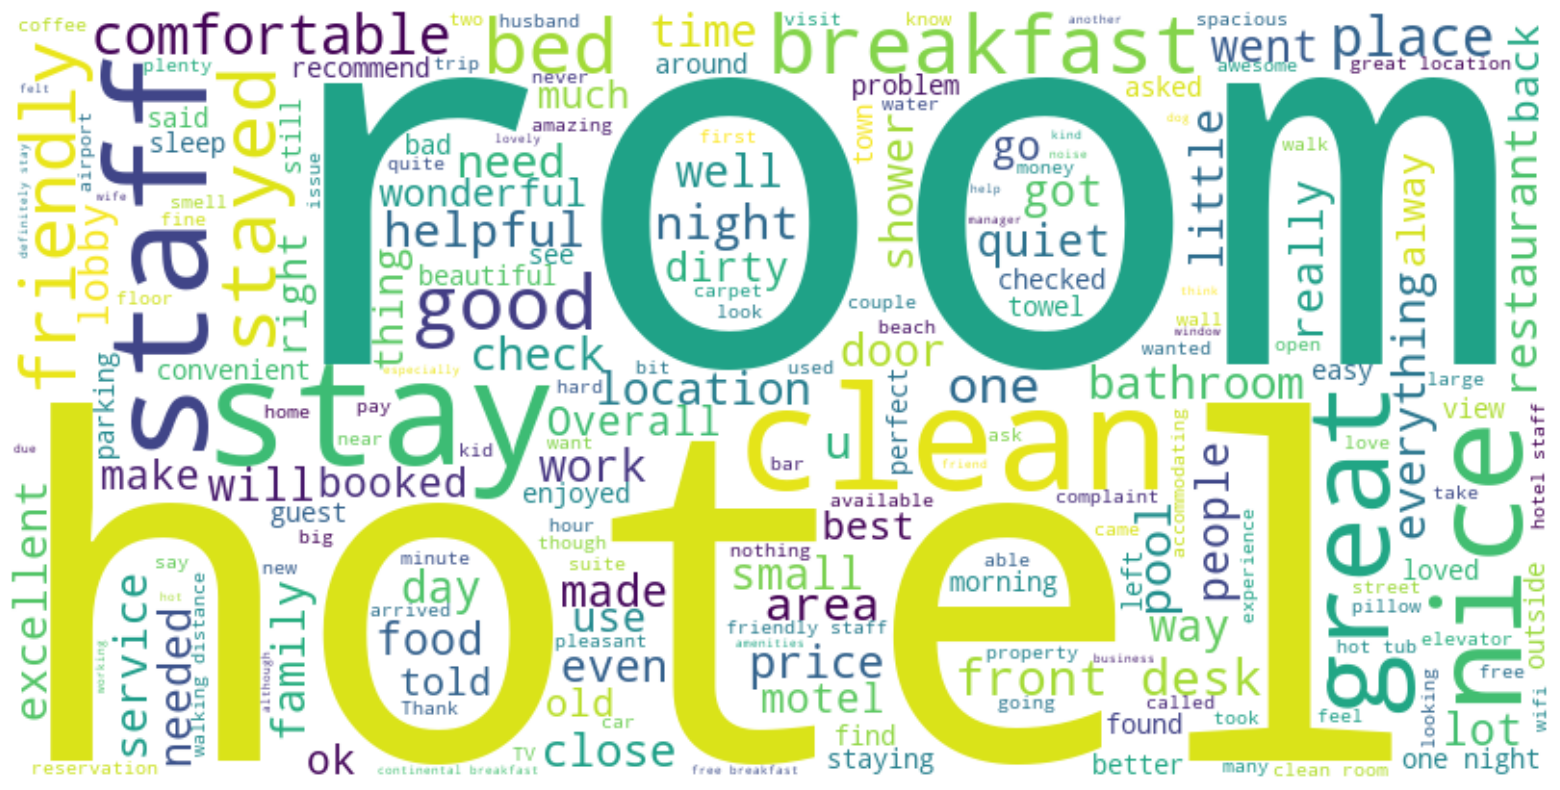

In [ ]:
from wordcloud import WordCloud

# Combine all the review texts into a single string
text = ' '.join(review for review in df1["reviews.text"])

# Generate the word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(20, 10),dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title('Most Common Words in Reviews')
plt.show()


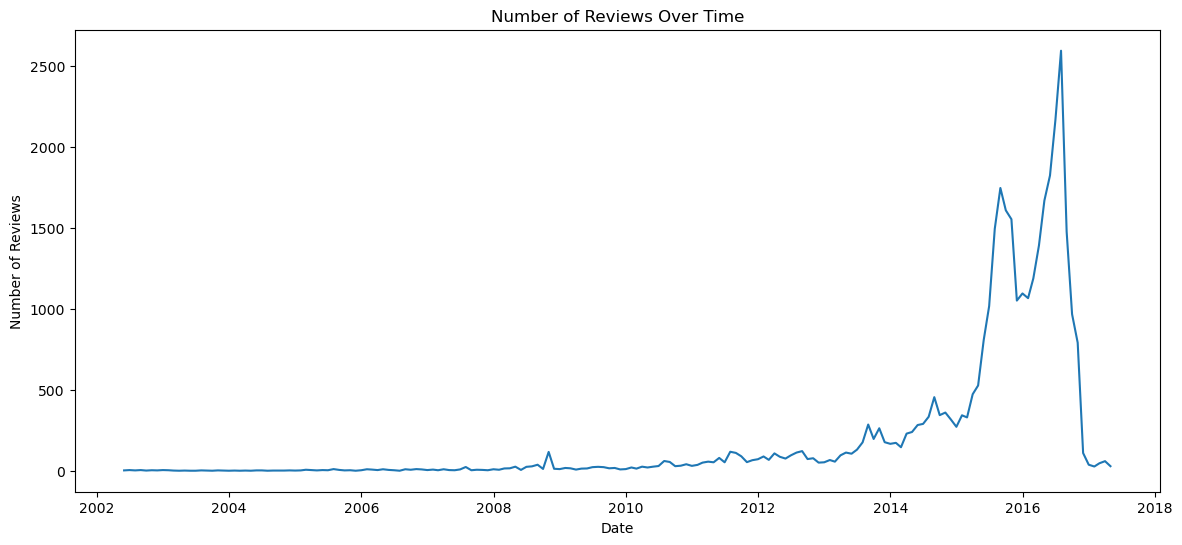

In [ ]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['reviews.date'])

# Create a new DataFrame to count the number of reviews per month
df_time = df.resample('M', on='date').size().reset_index(name='Number of Reviews')

# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Plot the number of reviews over time
sns.lineplot(x='date', y='Number of Reviews', data=df_time)

# Add title and labels
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')

# Show the plot
plt.show()

/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2479054718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['reviews.rating'] = df1['reviews.rating'].astype(int)


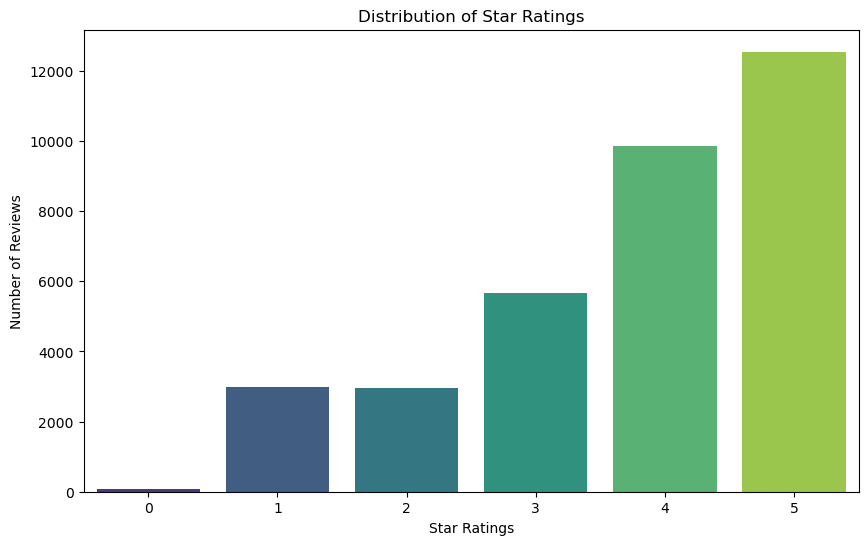

In [ ]:
plt.figure(figsize=(10, 6))

df1['reviews.rating'] = df1['reviews.rating'].astype(int)

sns.countplot(x='reviews.rating', data=df1, palette='viridis')

plt.title('Distribution of Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Number of Reviews')

plt.show()

Creating Labels

In [ ]:
# Label reviews as 'positive' or 'negative'
# Considering 4 or 5 stars as 'positive' and 1 or 2 stars as 'negative'
df1['label'] = df1['reviews.rating'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral'))

# Filter out neutral reviews to focus on 'positive' and 'negative'
df_filtered = df1[df1['label'] != 'neutral']

# Show the distribution of 'positive' and 'negative' labels
label_count = df_filtered['label'].value_counts()
label_count

/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/4189482050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['label'] = df1['reviews.rating'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral'))


label
positive    22400
negative     6040
Name: count, dtype: int64

In [ ]:
# Target Accuracy or Base Case Accuracy using Naive Model
22400 * 100 / (22400 + 6035)

78.77615614559522

In [ ]:
df_filtered['num_words'] = df_filtered['reviews.text'].str.split().apply(len)

# Filter out reviews with more than 99 words
df_filtered = df_filtered[df_filtered['num_words'] <= 99]

df_filtered.drop(columns=['num_words'], inplace=True)

/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3738190450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['num_words'] = df_filtered['reviews.text'].str.split().apply(len)


In [ ]:
label_count = df_filtered['label'].value_counts()
label_count

label
positive    21366
negative     5153
Name: count, dtype: int64

# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_filtered['reviews.text'], df_filtered['label'], test_size=0.2, random_state=42
)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Show the shape of resulting TF-IDF matrices
X_train_tfidf.shape, X_test_tfidf.shape


((21215, 5000), (5304, 5000))

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model on the training data
logistic_model.fit(X_train_tfidf, y_train)

# Predict the labels for the testing data
y_pred = logistic_model.predict(X_test_tfidf)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
class_report = classification_report(y_test, y_pred, target_names=['negative', 'positive'])

print(accuracy, class_report)


0.90026395173454               precision    recall  f1-score   support

    negative       0.82      0.62      0.71      1022
    positive       0.91      0.97      0.94      4282

    accuracy                           0.90      5304
   macro avg       0.87      0.79      0.82      5304
weighted avg       0.90      0.90      0.89      5304



# Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer (BoW model)
count_vectorizer = CountVectorizer(stop_words='english', max_features=5000)

# Fit and transform the training data
X_train_bow = count_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_bow = count_vectorizer.transform(X_test)

# Show the shape of resulting BoW matrices
X_train_bow.shape, X_test_bow.shape


((21215, 5000), (5304, 5000))

In [ ]:
# Initialize a new Logistic Regression model for BoW
logistic_model_bow = LogisticRegression(random_state=42)

# Train the model on the training data using BoW
logistic_model_bow.fit(X_train_bow, y_train)

# Predict the labels for the testing data
y_pred_bow = logistic_model_bow.predict(X_test_bow)

# Calculate the accuracy of the model
accuracy_bow = accuracy_score(y_test, y_pred_bow)

# Generate a classification report
class_report_bow = classification_report(y_test, y_pred_bow, target_names=['negative', 'positive'])

print(accuracy_bow, class_report_bow)


0.9017722473604827               precision    recall  f1-score   support

    negative       0.78      0.68      0.73      1022
    positive       0.93      0.95      0.94      4282

    accuracy                           0.90      5304
   macro avg       0.85      0.82      0.83      5304
weighted avg       0.90      0.90      0.90      5304



/Users/jayjoshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Feature Importance:

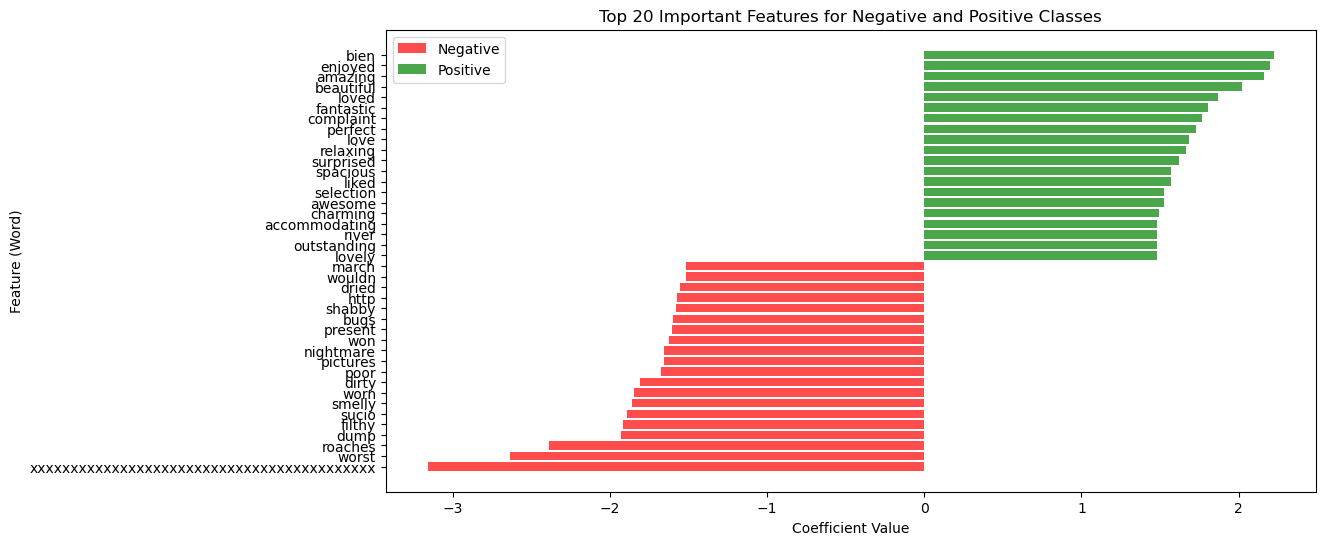

In [ ]:
# Get the feature names (words) from the CountVectorizer
feature_names = np.array(count_vectorizer.get_feature_names_out())

# Get the coefficients from the trained Logistic Regression model
coefficients = logistic_model_bow.coef_.flatten()

# Sort the coefficients and get the indices of the sorted array
sorted_indices = np.argsort(coefficients)

# Get the top 20 important features for negative and positive classes
top_negative_features = feature_names[sorted_indices[:20]]
top_positive_features = feature_names[sorted_indices[-20:]]

# Plotting the top features
plt.figure(figsize=(12, 6))
plt.barh(range(20), coefficients[sorted_indices[:20]], align='center', color='red', alpha=0.7, label='Negative')
plt.barh(range(20, 40), coefficients[sorted_indices[-20:]], align='center', color='green', alpha=0.7, label='Positive')
plt.yticks(range(40), np.concatenate([top_negative_features, top_positive_features]))
plt.xlabel('Coefficient Value')
plt.ylabel('Feature (Word)')
plt.title('Top 20 Important Features for Negative and Positive Classes')
plt.legend()
plt.show()


In [ ]:
# # Calculate the confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred_bow, labels=['negative', 'positive'])

# # Plot the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix')
# plt.show()


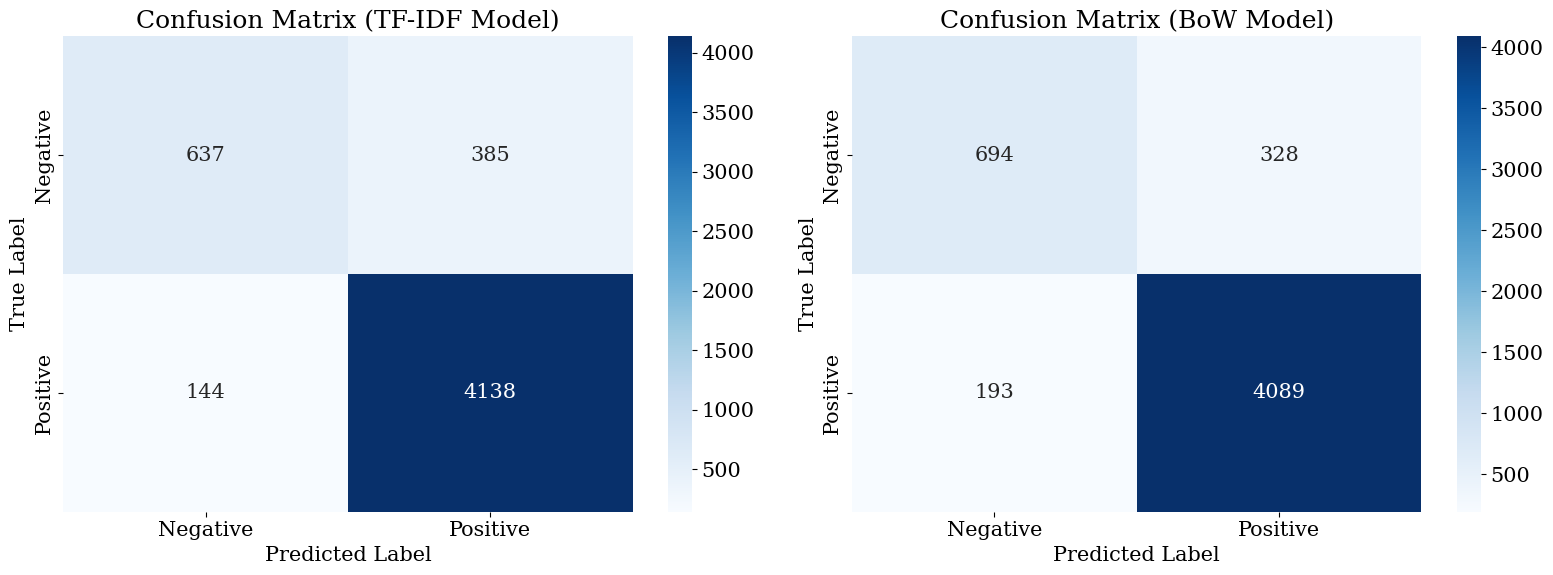

In [ ]:
# Calculate the confusion matrix for the TF-IDF model
conf_matrix_tfidf = confusion_matrix(y_test, y_pred, labels=['negative', 'positive'])

# Calculate the confusion matrix for the BoW model
conf_matrix_bow = confusion_matrix(y_test, y_pred_bow, labels=['negative', 'positive'])

# Initialize the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the confusion matrix for TF-IDF model
sns.heatmap(conf_matrix_tfidf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],
            ax=axes[0])
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_title('Confusion Matrix (TF-IDF Model)')

# Plot the confusion matrix for BoW model
sns.heatmap(conf_matrix_bow, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],
            ax=axes[1])
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title('Confusion Matrix (BoW Model)')

plt.tight_layout()
plt.show()


In [ ]:
# Get the feature names (words) from the TF-IDF and BoW vectorizers
feature_names_tfidf = np.array(tfidf_vectorizer.get_feature_names_out())
feature_names_bow = np.array(count_vectorizer.get_feature_names_out())

# Get the coefficients from the trained Logistic Regression models
coefficients_tfidf = logistic_model.coef_.flatten()
coefficients_bow = logistic_model_bow.coef_.flatten()

# Sort the coefficients and get the indices of the sorted arrays
sorted_indices_tfidf = np.argsort(coefficients_tfidf)
sorted_indices_bow = np.argsort(coefficients_bow)

# Get the top 10 important features for negative and positive classes from both models
top_negative_features_tfidf = feature_names_tfidf[sorted_indices_tfidf[:10]]
top_positive_features_tfidf = feature_names_tfidf[sorted_indices_tfidf[-10:]]
top_negative_features_bow = feature_names_bow[sorted_indices_bow[:10]]
top_positive_features_bow = feature_names_bow[sorted_indices_bow[-10:]]

# Create a DataFrame to hold the top features for comparison
top_features_df = pd.DataFrame({
    'Negative_TFIDF': top_negative_features_tfidf,
    'Positive_TFIDF': top_positive_features_tfidf,
    'Negative_BoW': top_negative_features_bow,
    'Positive_BoW': top_positive_features_bow
})

top_features_df


Negative_TFIDF Positive_TFIDF  \
0                                       dirty      excellent   
1                                       worst        perfect   
2                                        poor      wonderful   
3                                         old          loved   
4                                      filthy      beautiful   
5                                      wouldn          clean   
6                                        worn        enjoyed   
7  xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx    comfortable   
8                                    horrible           nice   
9                                    terrible          great   

                                 Negative_BoW Positive_BoW  
0  xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx     relaxing  
1                                       worst         love  
2                                     roaches      perfect  
3                                        dump    complaint  
4                                      filthy    fantastic  
5                                       sucio        loved  
6                                      smelly    beautiful  
7                                        worn      amazing  
8                                       dirty      enjoyed  
9                                        poor         bien

# Pre Trained BERT (Bidirectional Encoder Representations from Transformers) Model

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

/Users/jayjoshi/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [ ]:
results_df = pd.DataFrame(columns=['Predicted_Rating', 'Actual_Rating', 'Review'])

In [ ]:
for i in tqdm(range(len(X_test)), desc="Processing"):
    tokens = tokenizer.encode(X_test.iloc[i], return_tensors='pt')
    result = model(tokens)
    result.logits
    prediction = int(torch.argmax(result.logits))+1
    predicted_label = lambda x: 'positive' if x >= 3 else 'negative'
    label = predicted_label(prediction)

    results_df.loc[i] = [label, y_test.iloc[i], X_test.iloc[i]]



Processing: 100%|███████████████████████████| 5304/5304 [04:51<00:00, 18.21it/s]


In [ ]:
results_df.head()

Predicted_Rating Actual_Rating  \
0         positive      positive   
1         positive      positive   
2         positive      positive   
3         positive      positive   
4         negative      negative   

                                              Review  
0         4th floor room with two balconies!  Sweet!  
1  Very comfortable. Amazing staff. Convenient lo...  
2  First visit to the hotel and definitely will b...  
3  My husband and I were both very impressed with...  
4  Hotel amenities are really not good. We took e...

In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(results_df['Actual_Rating'],results_df['Predicted_Rating'])

# Generate a classification report
class_report = classification_report(results_df['Actual_Rating'], results_df['Predicted_Rating'], target_names=['negative', 'positive'])

print(accuracy, class_report)

0.898001508295626               precision    recall  f1-score   support

    negative       0.72      0.76      0.74      1022
    positive       0.94      0.93      0.94      4282

    accuracy                           0.90      5304
   macro avg       0.83      0.85      0.84      5304
weighted avg       0.90      0.90      0.90      5304



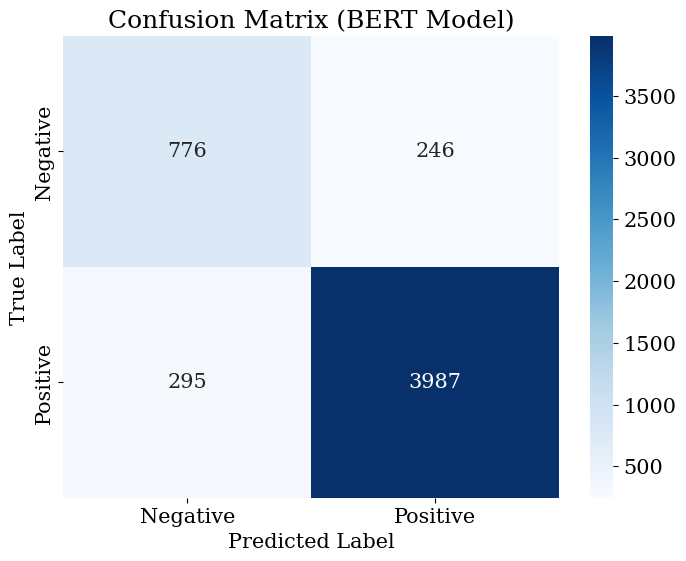

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(results_df['Actual_Rating'], results_df['Predicted_Rating'], labels=['negative', 'positive'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (BERT Model)')
plt.show()

# Aspect Based Sentiment Analysis


## TF IDF

In [ ]:
reviews_tfidf = []

keywords = ['breakfast']

sentences = []

for i in tqdm(range(len(df_filtered["reviews.text"])), desc="Processing"):
    try:
        text = df_filtered["reviews.text"][i]

        sentences = [sentence.strip() for sentence in re.split(r'[.,!]', text)]

        sentences_filtered = [item for item in sentences if item]

        # Extract sentences containing keywords and perform sentiment analysis
        for sentence in sentences_filtered:
            if any(keyword in sentence.lower() for keyword in keywords):
                reviews_tfidf.append(sentence)

    except KeyError:
        continue



Processing: 100%|█████████████████████| 26519/26519 [00:00<00:00, 152104.78it/s]


In [ ]:
# Transform the text using the same TF-IDF vectorizer used for training
given_text_tfidf_3 = tfidf_vectorizer.transform(reviews_tfidf)

# Use the trained Logistic Regression model to predict the label
predicted_label_3 = logistic_model.predict(given_text_tfidf_3)

probabilities = logistic_model.predict_proba(given_text_tfidf_3)
overall_probabilities = probabilities[:, 1] - probabilities[:, 0]
np.mean(overall_probabilities)

0.7630399887524327

In [ ]:
positive_percentage = (np.count_nonzero(predicted_label_3 == 'positive') / len(predicted_label_3)) * 100

print("Overall Rating for Food:", np.mean(overall_probabilities))

Overall Rating for Food: 0.7630399887524327


In [ ]:
# negative_reviews = []

# negative_indices = np.where(predicted_label_3 == 'negative')[0]

# for i in tqdm(range(len(negative_indices)), desc="Processing"):
#     negative_reviews.append(reviews_tfidf[negative_indices[i]])

## NLTK

In [ ]:
# import nltk
# from nltk.sentiment import SentimentIntensityAnalyzer

# # Download nltk resources
# nltk.download('punkt')
# nltk.download('vader_lexicon')

# # Initialize empty list for storing sentiment scores and store reviews
# sentiment_scores = []
# reviews = []

# # Initialize sentiment analyzer
# sia = SentimentIntensityAnalyzer()

# # Keywords to search for
# # keywords = ['breakfast', 'lunch', 'dinner', 'food']
# keywords = ['breakfast', 'Breakfast', 'break fast']

# for i in tqdm(range(len(df_filtered["reviews.text"])), desc="Processing"):
#     try:
#         text = df_filtered["reviews.text"][i]

#         # Tokenize the text into sentences
#         #sentences = nltk.sent_tokenize(text)
#         sentences = [sentence.strip() for sentence in re.split(r'[.,!]', text)]

#         # Extract sentences containing keywords and perform sentiment analysis
#         for sentence in sentences:
#             if any(keyword in sentence.lower() for keyword in keywords):
#                 # Perform sentiment analysis on the sentence
#                 # Get Compound Score of Postive, Negative and Neutral
#                 sentiment_score = sia.polarity_scores(sentence)['compound']
# #                 print(sia.polarity_scores(sentence))
#                 sentiment_scores.append(sentiment_score)
#                 reviews.append(sentence)
#     except KeyError:
#         continue

# print("Overall Rating for Food:", sum(sentiment_scores) / len(sentiment_scores))

[nltk_data] Downloading package punkt to /Users/jayjoshi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jayjoshi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Processing: 100%|██████████████████████| 26519/26519 [00:00<00:00, 59591.80it/s]

Overall Rating for Food: 0.3487818598259262


In [ ]:
# sia.polarity_scores(sentence)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

## PyABSA

In [ ]:
from pyabsa import available_checkpoints
from pyabsa import ATEPCCheckpointManager
checkpoint_map = available_checkpoints#(from_local=False)
aspect_extractor = ATEPCCheckpointManager.get_aspect_extractor(checkpoint='english', auto_device=True)

/bin/sh: nvidia-smi: command not found


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
No CUDA GPU found in your device
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | fa

/Users/jayjoshi/anaconda3/lib/python3.11/multiprocessing/pool.py:268: ResourceWarning: unclosed running multiprocessing pool <multiprocessing.pool.Pool state=RUN pool_size=1>
  _warn(f"unclosed running multiprocessing pool {self!r}",


[2024-04-22 01:58:57] (2.4.1.post1) ********** Available ATEPC model checkpoints for Version:2.4.1.post1 (this version) **********
[2024-04-22 01:58:57] (2.4.1.post1) ********** Available ATEPC model checkpoints for Version:2.4.1.post1 (this version) **********
[2024-04-22 01:58:57] (2.4.1.post1) Downloading checkpoint:english 
[2024-04-22 01:58:57] (2.4.1.post1) Notice: The pretrained model are used for testing, it is recommended to train the model on your own custom datasets
[2024-04-22 01:58:57] (2.4.1.post1) Checkpoint already downloaded, skip
[2024-04-22 01:58:57] (2.4.1.post1) Load aspect extractor from checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43
[2024-04-22 01:58:57] (2.4.1.post1) config: checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43/fast_lcf_atepc.config
[2024-04-22 01:58:57] (2.4.1.post1) state_dict: checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apc

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/Users/jayjoshi/anaconda3/lib/python3.11/site-packages/transformers/convert_slow_tokenizer.py:470: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
breakfast_reviews = []

for i in tqdm(range(len(df_filtered["reviews.text"])), desc="Processing"):
    try:
        review_text = df_filtered["reviews.text"][i]
        if 'breakfast' in review_text.lower():
            breakfast_reviews.append(review_text)
    except KeyError:
        continue

len(breakfast_reviews)

Processing: 100%|█████████████████████| 26519/26519 [00:00<00:00, 422593.60it/s]


4078

In [ ]:
# #%%capture

# breakfast_sentiment = []

# for i in tqdm(range(len(breakfast_reviews)), desc="Processing"):
# #for i in tqdm(range(100), desc="Processing"):
#     breakfast_confidence = 0
#     examples = [breakfast_reviews[i]]

#     try:
#         inference_source = examples
#         atepc_result = aspect_extractor.extract_aspect(inference_source=inference_source,  #
#                                   pred_sentiment=True,)

#         breakfast_index = atepc_result[0]['aspect'].index('breakfast')

#         if atepc_result[0]['sentiment'][breakfast_index] == 'Negative':
#             breakfast_confidence = -atepc_result[0]['confidence'][breakfast_index]
#         else:
#             breakfast_confidence = atepc_result[0]['confidence'][breakfast_index]

#         breakfast_sentiment.append(breakfast_confidence)

#     except KeyError:
#         continue

#     except ValueError:
#         continue

In [ ]:
print("Overall Sentiment for Breakfast:", sum(breakfast_sentiment) / len(breakfast_sentiment))

Overall Sentiment for Breakfast: 0.5561894736842105


# Hotel Specific Review Analysis

## Marriott Hotels v/s Hilton Hotels

## TF-IDF

In [ ]:
# Find occurrences of "Marriott" in the "name" column
marriott_occurrences = df1[df1["name"].str.contains("Marriott")]

# Find occurrences of "Hilton" in the "name" column
hilton_occurrences = df1[df1["name"].str.contains("Hilton")]

In [ ]:
# Transform the text using the same TF-IDF vectorizer used for training
given_text_hilton = tfidf_vectorizer.transform(hilton_occurrences['reviews.text'])

probabilities_hilton = logistic_model.predict_proba(given_text_hilton)
overall_probabilities_hilton = probabilities_hilton[:, 1] - probabilities_hilton[:, 0]

print("Overall Rating for Hilton:", np.mean(overall_probabilities_hilton))

Overall Rating for Hilton: 0.721908297826484


In [ ]:
# Transform the text using the same TF-IDF vectorizer used for training
given_text_marriott = tfidf_vectorizer.transform(marriott_occurrences['reviews.text'])

probabilities_marriott = logistic_model.predict_proba(given_text_marriott)
overall_probabilities_marriott = probabilities_marriott[:, 1] - probabilities_marriott[:, 0]

print("Overall Rating for Marriott:", np.mean(overall_probabilities_marriott))

Overall Rating for Marriott: 0.7271908777157294


## NLTK

In [ ]:
# import nltk
# from nltk.sentiment import SentimentIntensityAnalyzer

# # Download nltk resources if not already downloaded
# nltk.download('punkt')
# nltk.download('vader_lexicon')

# # Initialize empty list to store sentiment scores and store reviews
# sentiment_scores_marriott = []
# sentiment_scores_hilton = []

# # Initialize sentiment analyzer
# sia = SentimentIntensityAnalyzer()

# for i in tqdm(range(len(marriott_occurrences["reviews.text"])), desc="Processing"):
#     try:
#         text = marriott_occurrences.iloc[i]["reviews.text"]
#         sentiment_score = sia.polarity_scores(text)['compound']
#         sentiment_scores_marriott.append(sentiment_score)

#     except KeyError:
#         continue

# for i in tqdm(range(len(hilton_occurrences["reviews.text"])), desc="Processing"):
#     try:
#         text = hilton_occurrences.iloc[i]["reviews.text"]
#         sentiment_score = sia.polarity_scores(text)['compound']
#         sentiment_scores_hilton.append(sentiment_score)

#     except KeyError:
#         continue

[nltk_data] Downloading package punkt to /Users/jayjoshi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jayjoshi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Processing: 100%|███████████████████████████| 962/962 [00:00<00:00, 4221.27it/s]


In [ ]:
# print("Overall Rating for Marriott:", sum(sentiment_scores_marriott) / len(sentiment_scores_marriott))
# print("Overall Rating for Hilton:", sum(sentiment_scores_hilton) / len(sentiment_scores_hilton))

Overall Rating for Marriott: 0.5997305054151629
Overall Rating for Hilton: 0.6297705821205828


In [ ]:
# print("Overall Rating for Marriott:", np.mean(marriott_occurrences["reviews.rating"]))
# print("Overall Rating for Hilton:", np.mean(hilton_occurrences["reviews.rating"]))

Overall Rating for Marriott: 4.28971119133574
Overall Rating for Hilton: 4.222453222453223


## Hilton Hotel's Aspects Rating Compared

In [ ]:
hilton_aspects = pd.DataFrame()

In [ ]:
breakfast_sentiment = []

for i in tqdm(range(len(hilton_occurrences["reviews.text"])), desc="Processing"):
    breakfast_confidence = 0
    examples = [hilton_occurrences.iloc[i]["reviews.text"].lower()]

    try:
        inference_source = examples
        atepc_result = aspect_extractor.extract_aspect(inference_source=inference_source,  #
                                  pred_sentiment=True,)

        breakfast_index = atepc_result[0]['aspect'].index('breakfast')

        if atepc_result[0]['sentiment'][breakfast_index] == 'Negative':
            breakfast_confidence = -atepc_result[0]['confidence'][breakfast_index]
        else:
            breakfast_confidence = atepc_result[0]['confidence'][breakfast_index]

        breakfast_sentiment.append(breakfast_confidence)

    except KeyError:
        continue

    except ValueError:
        continue

Processing:   0%|                               | 1/962 [00:01<22:39,  1.41s/it]

[2024-04-22 12:39:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:15] (2.4.1.post1) Example 0: very nice hotel on the saginaw river . we had a jr <suite:Positive Confidence:0.9608> which was very nice and big , but the view was of the east side dwntwn and the back of some buildings . you probably can ' t get a river view w / hotels . com . i certainly would like go back maybe during the summer time and enjoy the surrounding <area:Positive Confidence:0.9979> and beaches of lake huron .


Processing:   0%|                               | 2/962 [00:02<23:24,  1.46s/it]

[2024-04-22 12:39:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:17] (2.4.1.post1) Example 0: hotel is clean , comfortable and cozy . <wait staff:Positive Confidence:0.9994> is very accommodating . <breakfast:Positive Confidence:0.9993> off the menu was delicious . very friendly hotel , and i stay there a lot when i travel from oklahoma . close enough to walk downtown and eat .


Processing:   0%|                               | 3/962 [00:04<20:54,  1.31s/it]

[2024-04-22 12:39:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:18] (2.4.1.post1) Example 0: best <sleep:Positive Confidence:0.9979> i ' ve had in a very long time ! would stay here again in a heartbeat .


Processing:   0%|▏                              | 4/962 [00:06<25:46,  1.61s/it]

[2024-04-22 12:39:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:20] (2.4.1.post1) Example 0: we live in town but occasionally stay at this hotel for different events . it is an exceptional hotel and provides great <value:Positive Confidence:0.9994> for your money . <rooms:Positive Confidence:0.9994> are always clean , the <beds:Positive Confidence:0.9995> are extremely comfortable , <check - in:Positive Confidence:0.9995> is efficient and <staff:Positive Confidence:0.9995> are friendly . we love this facility .


Processing:   1%|▏                              | 5/962 [00:07<22:35,  1.42s/it]

[2024-04-22 12:39:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:21] (2.4.1.post1) Example 0: great hotel ! very friendly and wonderful <location:Positive Confidence:0.9992> . only downside is that the city is not very nice . run down and empty buildings .


Processing:   1%|▏                              | 6/962 [00:08<20:32,  1.29s/it]

[2024-04-22 12:39:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:22] (2.4.1.post1) Example 0: good and <comfortable:Positive Confidence:0.9995> !


Processing:   1%|▏                              | 7/962 [00:09<19:12,  1.21s/it]

[2024-04-22 12:39:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:23] (2.4.1.post1) Example 0: very loud <ac:Negative Confidence:0.9991> unit


Processing:   1%|▎                              | 8/962 [00:10<18:11,  1.14s/it]

[2024-04-22 12:39:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:24] (2.4.1.post1) Example 0: one problem , the loud drunks running up and down the hall with their screaming and partying , all night long into the morning . the <staff:Positive Confidence:0.9836> responded appropriately , but it makes for a rough next business day not sleeping . they should consider putting guests that aren ' t related to a wedding party block of rooms elsewhere , on a different floor .


Processing:   1%|▎                              | 9/962 [00:11<20:03,  1.26s/it]

[2024-04-22 12:39:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:26] (2.4.1.post1) Example 0: very disappointed in <staff:Negative Confidence:0.992> . if you need to book a <block:Negative Confidence:0.9712> of rooms . . . . don ' t go here ! their staff does not know how to look on a computer to see if the rooms are actually available or not in that block . had to scramble to get wedding guests hotel rooms else where because the staff at doubletree told them that our block was full . week before the wedding , i got a call from hotel saying i still had rooms available and if we were going to fill them or not . very disappointed in their <serv:Negative Confidence:0.997> . . . view moreice . stayed there over the night of our wedding . . . i will say that their <beds:Positive Confidence:0.6378> are very comfortable but no

Processing:   1%|▎                             | 10/962 [00:13<22:13,  1.40s/it]

[2024-04-22 12:39:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:27] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9993> was beautiful and very inviting . <price:Positive Confidence:0.9994> was great and had a wonderful <view:Positive Confidence:0.9994> of the water from the room . it was a suite and perfect for relaxing whether business or vacation ! would recommend this hilton in bay city as a preferred place to kick back .


Processing:   1%|▎                             | 11/962 [00:14<22:08,  1.40s/it]

[2024-04-22 12:39:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:29] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9994> was very friendly , the <rooms:Positive Confidence:0.9995> were clean and comfortable . and , you just can ' t beat the location , beautiful sunsets looking out across the river . clean , safe adjacent park and downtown area for <dining:Neutral Confidence:0.9987> or an evening stroll .


Processing:   1%|▎                             | 12/962 [00:16<22:02,  1.39s/it]

[2024-04-22 12:39:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:30] (2.4.1.post1) Example 0: a very nice hotel , good <service:Positive Confidence:0.9963> , warm chocolate <chip:Positive Confidence:0.9915> , walnut cookies at check - in - - though i wish they had a walnut - free version . my one dislike is how much noise the <heating system:Negative Confidence:0.999> made every time it turned on . it somewhat interfered with my sleep .


Processing:   1%|▍                             | 13/962 [00:17<21:50,  1.38s/it]

[2024-04-22 12:39:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:31] (2.4.1.post1) Example 0: very clean , fresh , friendly , accommodating , comfortable . the <pool:Positive Confidence:0.9994> and <fitness center:Positive Confidence:0.9995> were very pleasant , clean and good <equipment:Positive Confidence:0.9995> . it is located along the river front . it is an easy walk to the downtown restaurants and shops .


Processing:   1%|▍                             | 14/962 [00:18<21:34,  1.37s/it]

[2024-04-22 12:39:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:33] (2.4.1.post1) Example 0: nice hotel and decent <location:Positive Confidence:0.999> for activities . <price:Negative Confidence:0.8943> to high . quality of room does not match the triple normal <prices:Negative Confidence:0.9917> they were charging this weekend . seems to be common practice to change extremely high prices during a local festival . but not right .


Processing:   2%|▍                             | 15/962 [00:20<20:26,  1.29s/it]

[2024-04-22 12:39:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:34] (2.4.1.post1) Example 0: ice machine didn ' t work i had to go out buy ice refrigerator in room didn ' t get cold wasnt very happy i spent that much money on the room and had to buy a cooler and ice !


Processing:   2%|▍                             | 16/962 [00:21<21:14,  1.35s/it]

[2024-04-22 12:39:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:35] (2.4.1.post1) Example 0: fine except we could not get <breakfast:Negative Confidence:0.9782> due to prep for a thanksgiving buffet .


Processing:   2%|▌                             | 17/962 [00:23<22:42,  1.44s/it]

[2024-04-22 12:39:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:37] (2.4.1.post1) Example 0: the double tree hotel in bay city is always our first choice hotel when we are visiting in the tri - county area . the <reservations:Neutral Confidence:0.7672> are easily mad online . the <staff:Positive Confidence:0.9985> are friendly and helpful as we get settled in , during our stay , and checking out . the <rooms:Positive Confidence:0.9993> are pleasant , clean and quiet . the <food:Positive Confidence:0.9994> and service in the main restaurant superior . the <ambiance:Positive Confidence:0.9994> and service in the lounge , fantastic . it is a joy to stay at your hotel every time .


Processing:   2%|▌                             | 18/962 [00:24<21:29,  1.37s/it]

[2024-04-22 12:39:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:38] (2.4.1.post1) Example 0: i have stayed at this doubletree a number of times . <it:Positive Confidence:0.9995> is always clean , and the <employees:Positive Confidence:0.9995> are always friendly and helpful . this includes those at the front desk as well as the restaurant and louge . the location is easily within walking distance ( about two blocks or less ) to the downtown area . i will definitely return here !


Processing:   2%|▌                             | 19/962 [00:25<21:12,  1.35s/it]

[2024-04-22 12:39:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:39] (2.4.1.post1) Example 0: we enjoyed our stay here very much . the <bed:Positive Confidence:0.9989> and pillows were exceptionally comfortable and the <breakfast:Positive Confidence:0.9991> was good . ( if you are going to eat there be sure to grab a 5 off coupon in the lobby . ) good restaurants are within walking distance as well . however , the <air conditioner:Negative Confidence:0.9982> was very loud . i ended up stacking all the extra pillow in front of it to reduce the noise .


Processing:   2%|▌                             | 20/962 [00:26<19:39,  1.25s/it]

[2024-04-22 12:39:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:40] (2.4.1.post1) Example 0: perfect stay ! the restaurant was amazing , <food:Positive Confidence:0.9995> awesome .


Processing:   2%|▋                             | 21/962 [00:27<18:31,  1.18s/it]

[2024-04-22 12:39:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:42] (2.4.1.post1) Example 0: great <place:Positive Confidence:0.9995> , great stay !


Processing:   2%|▋                             | 22/962 [00:28<17:52,  1.14s/it]

[2024-04-22 12:39:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:43] (2.4.1.post1) Example 0: nice hotel but pricey for the area given it doesn ' t include breakfast . we usually stay at hotels with breakfast included because of the convenience with small children . although doubletree has a restaurant , breakfast is not cost effective with small children .


Processing:   2%|▋                             | 23/962 [00:30<20:48,  1.33s/it]

[2024-04-22 12:39:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:44] (2.4.1.post1) Example 0: when we arrived <pool:Negative Confidence:0.9975> was closed due to an accident , that makes me wonder - - we never used the pool after that . the brochurers for sept . had already been thrown away and oct - dec . in its place . so we had no idea what there was to do in this town . i couldn ' t get connected to internet wirelessly nor through cable . so i couldn ' t look things up and i could not send my work via internet at all during my stay . the <breakfast:Negative Confidence:0.9976> in the restaurant was about the worst i have ever had , and the <price:Negative Confidence:0.9971> made it even harder to swallow . just gross - we had the buffet . we chose bay city only because my husband wanted to book a nice hotel which now

Processing:   2%|▋                             | 24/962 [00:31<20:52,  1.34s/it]

[2024-04-22 12:39:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:46] (2.4.1.post1) Example 0: everyone here went above and beyond to make sure that my sisters wedding weekend was perfect . our <room:Positive Confidence:0.9994> was beautiful and spacious . the <bed:Positive Confidence:0.9994> was comfortable . loved all the windows in our room ( corner suite ) . would definitely stay here again while in town ! !


Processing:   3%|▊                             | 25/962 [00:33<20:56,  1.34s/it]

[2024-04-22 12:39:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:47] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.999> was very friendly and helpful . our <room:Positive Confidence:0.9993> was in clean and had everything we needed . hotel is in a great location within walking distance of many things to do . one down side was the <power:Negative Confidence:0.9901> went it the first morning there , we called the front desk and they said it was a city wide outage and had it up and running within 30 minutes .


Processing:   3%|▊                             | 26/962 [00:34<21:03,  1.35s/it]

[2024-04-22 12:39:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:48] (2.4.1.post1) Example 0: beautiful hotel with a wonderful <view:Positive Confidence:0.9991> over looking the lake and a comfortable <patio area:Positive Confidence:0.9994> to take in a wonderful view . the <staff:Positive Confidence:0.9987> made the stay even more worth the trip .


Processing:   3%|▊                             | 27/962 [00:36<24:05,  1.55s/it]

[2024-04-22 12:39:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:50] (2.4.1.post1) Example 0: nice arrival with warm <cookies:Positive Confidence:0.9988> awaiting us , clean <room:Positive Confidence:0.9978> , big <bathroom:Positive Confidence:0.9984> , great <shower head:Positive Confidence:0.9993> . bathroom was clean , <pool:Positive Confidence:0.9991> was good , <hot tub:Positive Confidence:0.9993> was good , and the <bed:Positive Confidence:0.9991> were comfortable . the hotel is close to many places to eat and so that was nice . it was a good weekend get away .


Processing:   3%|▊                             | 28/962 [00:38<24:48,  1.59s/it]

[2024-04-22 12:39:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:52] (2.4.1.post1) Example 0: we traveled to bay city for the first time for a wedding of an employee . of course we reserved a <room:Neutral Confidence:0.745> from the block reserved for the wedding guests . the wedding reception was also held at the hotel . everything was beautiful and the <food:Positive Confidence:0.999> excellent . the room was very nice and comfortable . the <cookie:Positive Confidence:0.9992> was a delicious surprise .


Processing:   3%|▉                             | 29/962 [00:39<23:03,  1.48s/it]

[2024-04-22 12:39:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:53] (2.4.1.post1) Example 0: this is a wonderful <place:Positive Confidence:0.9987> to stay should your travels bring you to the saginaw area . the hotel is kept extremely clean and i did not experience anything that was dirty during my two night stay there . the <room:Positive Confidence:0.9995> is well furnished and a good size . i also give this hotel credit as i received a hilton honors upgrade to . . . more


Processing:   3%|▉                             | 30/962 [00:41<23:13,  1.50s/it]

[2024-04-22 12:39:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:55] (2.4.1.post1) Example 0: enjoyed our one night <stay:Positive Confidence:0.9967> . walked downtown for <dinner:Neutral Confidence:0.9989> and enjoyed sitting out by the river . <staff:Positive Confidence:0.9995> very pleasant . <room:Positive Confidence:0.9995> quiet .


Processing:   3%|▉                             | 31/962 [00:42<21:53,  1.41s/it]

[2024-04-22 12:39:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:56] (2.4.1.post1) Example 0: great hotel , great <view:Positive Confidence:0.9972> . lousy <weather:Negative Confidence:0.9057> , but the hotel can ' t do anything about that . i would definitely stay there again .


Processing:   3%|▉                             | 32/962 [00:43<20:43,  1.34s/it]

[2024-04-22 12:39:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:57] (2.4.1.post1) Example 0: great complete , hotel . very conveniently located in downtown with a beautiful <location:Positive Confidence:0.9994> on river . nice walk along river . reasonable <cost:Positive Confidence:0.7628> , good restaurant .


Processing:   3%|█                             | 33/962 [00:44<20:22,  1.32s/it]

[2024-04-22 12:39:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:39:58] (2.4.1.post1) Example 0: the <ac:Negative Confidence:0.9992> was extremely loud . had to shut it off .


Processing:   4%|█                             | 34/962 [00:46<20:06,  1.30s/it]

[2024-04-22 12:40:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:00] (2.4.1.post1) Example 0: the front <desk clerk:Positive Confidence:0.9994> was wonderful , shanteran kappen . i have dealt with her in the past as well , <she:Positive Confidence:0.9994> is the kindest , professional gal to deal with . she went out of her way to accommodate me . she could not have been any sweeter . you should be proud to have her as one of your team members . a great representation of your brand !


Processing:   4%|█                             | 35/962 [00:47<20:15,  1.31s/it]

[2024-04-22 12:40:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:01] (2.4.1.post1) Example 0: nice <place:Positive Confidence:0.9992> . nice <facilities:Positive Confidence:0.9993> . <cookies:Positive Confidence:0.9992> are good .


Processing:   4%|█                             | 36/962 [00:48<19:46,  1.28s/it]

[2024-04-22 12:40:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:02] (2.4.1.post1) Example 0: the <grounds:Positive Confidence:0.9995> are beautiful . i ' m not reviewing anymore because i should be able to fill in a couple of requests for the review w / o red <bars:Negative Confidence:0.9297> saying i need to say more


Processing:   4%|█▏                            | 37/962 [00:49<19:24,  1.26s/it]

[2024-04-22 12:40:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:04] (2.4.1.post1) Example 0: great <stay:Positive Confidence:0.9994> - just wish they had a free breakfast


Processing:   4%|█▏                            | 38/962 [00:51<20:54,  1.36s/it]

[2024-04-22 12:40:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:05] (2.4.1.post1) Example 0: this is a great hotel in a beautiful waterfront <location:Positive Confidence:0.9994> on the river . it ' s within easy walking distance of many nice restaurants in the downtown area . the restaurant bar within the hotel has a menu with a lot of good options as well and it makes for a nice <lunch spot:Positive Confidence:0.9995> . they even have outdoor dining if the weather is right . their <service:Positive Confidence:0.9988> was great too and the cookie upon arrival is always a nice treat . we ' ll definitely stay there again !


Processing:   4%|█▏                            | 39/962 [00:52<20:21,  1.32s/it]

[2024-04-22 12:40:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:06] (2.4.1.post1) Example 0: the hotel <staff:Positive Confidence:0.9992> went above and beyond to make my stay very enjoyable . . . . for a busy meeting professional like myself , it is so importat to be able to be flexible and adapt when necessary . excellent value when is comes to gormet dishes offereed by the doubletree ' s chef . our <food:Positive Confidence:0.9948> was exceptional . . . . if you are ever in the area , i reccommend the butternut . . . more


Processing:   4%|█▏                            | 40/962 [00:53<19:12,  1.25s/it]

[2024-04-22 12:40:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:07] (2.4.1.post1) Example 0: right on the harbor with benches to watch the sun set and boats go by . quite a few small restaurants and bars near by but not much else . hotel was very clean and the <beds:Positive Confidence:0.9993> were actually comfortable !


Processing:   4%|█▎                            | 41/962 [00:55<19:46,  1.29s/it]

[2024-04-22 12:40:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:09] (2.4.1.post1) Example 0: stayed at this hotel for an anniversary and was very surprised at how comfortable the <beds:Positive Confidence:0.9995> and pillows were . the <staff:Positive Confidence:0.9993> were great the <cleaning ladies:Positive Confidence:0.9995> were very thorough . will stay here again .


Processing:   4%|█▎                            | 42/962 [00:56<20:57,  1.37s/it]

[2024-04-22 12:40:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:10] (2.4.1.post1) Example 0: i love the <location:Positive Confidence:0.9993> of this hotel . direct on the river in bay city . great <food:Positive Confidence:0.999> and <accommodations:Positive Confidence:0.995> . i have always stayed for a conference , but would bring my family to stay . the <staff:Positive Confidence:0.9994> is helpful and go above and beyond in helping you .


Processing:   4%|█▎                            | 43/962 [00:58<21:25,  1.40s/it]

[2024-04-22 12:40:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:12] (2.4.1.post1) Example 0: the hotel is so well kept that it looks brand new ! the facilities - gym , <pool:Neutral Confidence:0.614> and <spa:Neutral Confidence:0.6498> - in the lower floor are really nice <rooms:Positive Confidence:0.9977> are very clean and spacious . <breakfast:Positive Confidence:0.996> is generous ! if you are on your way up north michigan , i highly recommend a stop in grand rapids in this hotel


Processing:   5%|█▎                            | 44/962 [01:00<25:03,  1.64s/it]

[2024-04-22 12:40:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:14] (2.4.1.post1) Example 0: they were very welcoming . <they:Positive Confidence:0.9982> had plenty of free , convenient parking even though it was in downtown bay city - - right on the river . the facilities were great . the <lobbies:Positive Confidence:0.9987> were nice and they had a lot of tourist information if you ' re looking for things to do in the area . in my <room:Positive Confidence:0.9981> , they had a beautiful local magazine listing activities in the area as well as vignettes of local restaurants - - a great magazine . they also gave me a freshly baked chocolate chip cookie with walnuts at check - in . nice touch . the <people:Positive Confidence:0.999> at the front desk were very helpful . the <breakfast:Positive Confidence:0.9989> buffet 

Processing:   5%|█▍                            | 45/962 [01:01<22:30,  1.47s/it]

[2024-04-22 12:40:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:15] (2.4.1.post1) Example 0: staff were friendly , accommodating and polite . hotel <staff:Positive Confidence:0.9928> could not have been nicer . i think i caught the restaurant staff at an awkward time , but they were accommodating as well . no problems whatsoever . quiet . clean . accessible .


Processing:   5%|█▍                            | 46/962 [01:02<21:29,  1.41s/it]

[2024-04-22 12:40:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:16] (2.4.1.post1) Example 0: very clean , <bed:Positive Confidence:0.9989> comfy close to downtown , right on river . <meal:Positive Confidence:0.9987> in restaurant also very good . p . s . - - the warm chocolate cookies were very good given at check - in .


Processing:   5%|█▍                            | 47/962 [01:04<21:59,  1.44s/it]

[2024-04-22 12:40:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:18] (2.4.1.post1) Example 0: we stayed here for a wedding . the room rate was very reasonable and the <staff:Positive Confidence:0.9992> was very accommodating and friendly . the hotel <decor:Positive Confidence:0.9994> was stylish and in good condition . <food:Positive Confidence:0.9993> was good for the event and in the restaurant . <check in:Positive Confidence:0.9994> was speedy and without a hitch , even though we had 3 rooms on different credit cards . i appreciated how helpful everyone was . it was a great experience .


Processing:   5%|█▍                            | 48/962 [01:05<20:10,  1.32s/it]

[2024-04-22 12:40:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:19] (2.4.1.post1) Example 0: great <location:Positive Confidence:0.9994> near downtown . walking distance to nice restaurants and bars


Processing:   5%|█▌                            | 49/962 [01:06<22:06,  1.45s/it]

[2024-04-22 12:40:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:21] (2.4.1.post1) Example 0: nicely located with good river <views:Positive Confidence:0.9976> and short walk to parks , shops and eateries in the setting of cleanliness and friendly <staff:Positive Confidence:0.9964> . however , for the <price:Neutral Confidence:0.9905> and similarly equipped hotels , it is surprising and disappointing that they do not offer complimentary <breakfast:Negative Confidence:0.6598> . also , when requesting a later check out time , they could not grant a check out time beyond 12 : 30pm .


Processing:   5%|█▌                            | 50/962 [01:08<22:00,  1.45s/it]

[2024-04-22 12:40:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:22] (2.4.1.post1) Example 0: it took the <staff:Negative Confidence:0.9978> a long time to acknowledge myself and my daughter as we stood at the <front desk:Neutral Confidence:0.999> waiting to check in for almost 10 mins . very clean room , <room service:Positive Confidence:0.9993> was very good and quick as well .


Processing:   5%|█▌                            | 51/962 [01:09<21:45,  1.43s/it]

[2024-04-22 12:40:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:24] (2.4.1.post1) Example 0: excellent <view:Positive Confidence:0.997> of the river area . this is the place to stay if you ' re visiting bay city credible hotel very clean great <food:Positive Confidence:0.9995> and an awesome <view:Positive Confidence:0.997> you won ' t be disappointed great place to stay during fireworks festival in july


Processing:   5%|█▌                            | 52/962 [01:11<23:58,  1.58s/it]

[2024-04-22 12:40:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:25] (2.4.1.post1) Example 0: right on riverwalk , close to quaint downtown , nice exercise <facility:Positive Confidence:0.9985> and pool , wish we could have stayed longer and explored more . <room:Positive Confidence:0.999> was nicely appointed , quiet , comfy bed , attractive bath . view of river . only ate a <goat cheese:Positive Confidence:0.9581> and <spinach salad:Positive Confidence:0.9703> in evening , but it was delicious and <breakfast:Positive Confidence:0.9972> was tasty . our <server:Positive Confidence:0.9986> , laura was delightful . all around a very . . . more


Processing:   6%|█▋                            | 53/962 [01:13<22:38,  1.49s/it]

[2024-04-22 12:40:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:27] (2.4.1.post1) Example 0: i have stayed at this hotel throughout the entire year . i see some of the same <staff members:Negative Confidence:0.9817> each time i stay . the staff regardless of position , are great . the <rooms:Positive Confidence:0.9992> are always clean and fresh . i will be back


Processing:   6%|█▋                            | 54/962 [01:14<21:22,  1.41s/it]

[2024-04-22 12:40:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:28] (2.4.1.post1) Example 0: the light and the <heater:Negative Confidence:0.9965> kept me up in room 210 , otherwise nice pillows and bed fine . . . shut off the heater so we could sleep . wedding party noisy for some in our group myofacial release . my husband came along and worked out of the room no complaints about internet service or room service . just a dirty <hot tub:Negative Confidence:0.9896> . . .


Processing:   6%|█▋                            | 55/962 [01:15<21:46,  1.44s/it]

[2024-04-22 12:40:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:29] (2.4.1.post1) Example 0: very nice <view:Positive Confidence:0.9995> of <saginaw:Positive Confidence:0.9995> river . comfortable , very clean and quiet .


Processing:   6%|█▋                            | 56/962 [01:17<22:26,  1.49s/it]

[2024-04-22 12:40:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:31] (2.4.1.post1) Example 0: the <bathrooms:Positive Confidence:0.9977> are immaculate which is really important to me . the <rooms:Positive Confidence:0.9976> are clean they have a small frige and a microwave . the <riverview rooms:Positive Confidence:0.9969> have a great view of the river . the hotel is downtown so the fact that the <food:Negative Confidence:0.9891> in the hotel leaves a little to be desired there are a lot of trendy restaurants very close . . . more


Processing:   6%|█▊                            | 57/962 [01:18<22:37,  1.50s/it]

[2024-04-22 12:40:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:33] (2.4.1.post1) Example 0: warm <cookies:Positive Confidence:0.9981> at check in were awesome , room was clean but queen beds would be nice instead of doubles . <staff:Positive Confidence:0.9281> was very helpful and friendly from <front desk:Positive Confidence:0.9991> to <housekeepers:Positive Confidence:0.9985> . room had fridge and microwave - nice touch


Processing:   6%|█▊                            | 58/962 [01:20<21:39,  1.44s/it]

[2024-04-22 12:40:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:34] (2.4.1.post1) Example 0: overall a very good experience . one small issue with bed linens . nice view from the riverfront rooms . nice restaurant / <lounge:Positive Confidence:0.999> as well . friendly <staff:Positive Confidence:0.9991> all around , it ' s the place to stay in bay city , michigan .


Processing:   6%|█▊                            | 59/962 [01:21<21:40,  1.44s/it]

[2024-04-22 12:40:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:35] (2.4.1.post1) Example 0: i stayed at this hotel for a conference . everything was great . the <rooms:Positive Confidence:0.9994> are lovely , the <meeting spaces:Positive Confidence:0.9993> were great . the <food:Positive Confidence:0.9991> was also very good . i was very pleased with the overall experience . they do an excellent job with conferences as well .


Processing:   6%|█▊                            | 60/962 [01:23<22:12,  1.48s/it]

[2024-04-22 12:40:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:37] (2.4.1.post1) Example 0: the experience was great . from the front desk calling me asking questions of my <reservation:Neutral Confidence:0.9943> . the front desk were always willing to help or answer questions . the <buffet food:Positive Confidence:0.9994> was over ample and very good . the lounce <staff:Positive Confidence:0.9994> were friendly and <crab cakes:Positive Confidence:0.9994> were top notch . my whole stay was a pleasure


Processing:   6%|█▉                            | 61/962 [01:24<22:09,  1.48s/it]

[2024-04-22 12:40:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:38] (2.4.1.post1) Example 0: cannot say anything negative about this <hotel:Positive Confidence:0.9995> . very accommodating !


Processing:   6%|█▉                            | 62/962 [01:25<20:28,  1.36s/it]

[2024-04-22 12:40:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:39] (2.4.1.post1) Example 0: great <riverfront:Positive Confidence:0.9995> including access to path for walking .


Processing:   7%|█▉                            | 63/962 [01:26<19:11,  1.28s/it]

[2024-04-22 12:40:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:41] (2.4.1.post1) Example 0: i stayed here with a friend who was performing in a show at the state . i was greeted with an accommodating <front desk employee:Positive Confidence:0.9994> and she was very helpful and pleasant and gave me a warm cookie . i was pleasantly pleased with the size of our room , it was clean and the bed was comfortable . the restaurant had a great . . . more


Processing:   7%|█▉                            | 64/962 [01:28<20:19,  1.36s/it]

[2024-04-22 12:40:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:42] (2.4.1.post1) Example 0: great location on the river front in bay city . otherwise it ' s a pretty standard business - style hotel . buffet <breakfast:Negative Confidence:0.9719> is expensive ( was not included in our <room rate:Neutral Confidence:0.9785> ) . tiny <swimming pool:Neutral Confidence:0.8223> but decent <fitness centre:Positive Confidence:0.996> .


Processing:   7%|██                            | 65/962 [01:29<19:55,  1.33s/it]

[2024-04-22 12:40:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:43] (2.4.1.post1) Example 0: stayed in a room with 2 double full sized beds . room was clean , <bathroom:Positive Confidence:0.9543> was nice enough . view was of the roof and not such a great location . slept decently enough . <service:Positive Confidence:0.9987> was good , everyone was very friendly .


Processing:   7%|██                            | 66/962 [01:31<20:55,  1.40s/it]

[2024-04-22 12:40:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:45] (2.4.1.post1) Example 0: i stayed for a week ! hotel very clean and welcoming . <beds:Positive Confidence:0.9991> very comfortable ! they greet you with a warm chocolate <chip cookie:Positive Confidence:0.9995> at check in . only thing i wished for was wireless <internet:Negative Confidence:0.9749> . they have a hook up in the room instead .


Processing:   7%|██                            | 67/962 [01:32<20:51,  1.40s/it]

[2024-04-22 12:40:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:46] (2.4.1.post1) Example 0: room was very clean , especially <bath:Positive Confidence:0.9994> was excellent . i arrived night and went to var of the hotel . var counter ' s <staffs:Positive Confidence:0.999> were very good , in spite of very night .


Processing:   7%|██                            | 68/962 [01:33<20:19,  1.36s/it]

[2024-04-22 12:40:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:48] (2.4.1.post1) Example 0: stayed fro the <apps:Neutral Confidence:0.9963> and ales in downtown . this hotel is always an excellent choice , maybe a little expensive . the <staff:Positive Confidence:0.9987> are great , and downtown bay city is great too , much safer than the other cities here for events .


Processing:   7%|██▏                           | 69/962 [01:35<20:31,  1.38s/it]

[2024-04-22 12:40:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:49] (2.4.1.post1) Example 0: i feel bad writing this because i do only stay in hilton chains because i love them . but this doubletree ' s <customer service:Negative Confidence:0.999> was horrible . i booked , as i should , for a 2 - 1 week stays for business and booked a suite . one day i noticed my <reservation:Neutral Confidence:0.84> had changed without any notification and i was down graded to a small <room:Negative Confidence:0.9958> . . . . more


Processing:   7%|██▏                           | 70/962 [01:36<20:38,  1.39s/it]

[2024-04-22 12:40:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:50] (2.4.1.post1) Example 0: we had come in for the boat races on the river . the hotel was fully booked with racers , families , lacrosse teams and wedding parties each night but you would never had known . the hotel was very well staffed with friendly <people:Positive Confidence:0.9994> , the <rooms:Positive Confidence:0.9995> were quite and the <property:Positive Confidence:0.9995> is beautiful . this is were i would stay every time i came to . . . more


Processing:   7%|██▏                           | 71/962 [01:38<21:31,  1.45s/it]

[2024-04-22 12:40:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:52] (2.4.1.post1) Example 0: overall very good experience . pool / jacuzzi with a river view . no breakfast included in the fee . we had dinner at the restaurant downstairs . it was convenience in the bad weather . <food quality:Neutral Confidence:0.9275> depends on what you order . <crab cake:Positive Confidence:0.9671> was good , <pasta:Neutral Confidence:0.8077> was average .


Processing:   7%|██▏                           | 72/962 [01:39<20:03,  1.35s/it]

[2024-04-22 12:40:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:53] (2.4.1.post1) Example 0: great <location:Positive Confidence:0.9995> . riverfront was nice . walking distance to many restaurants .


Processing:   8%|██▎                           | 73/962 [01:40<20:33,  1.39s/it]

[2024-04-22 12:40:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:55] (2.4.1.post1) Example 0: great <stay:Positive Confidence:0.9993> and the <team:Positive Confidence:0.9994> is very friendly . also found the <bed:Positive Confidence:0.9995> extremely comfortable ! ! i have stayed at this location numerous times , and i am never disappointed . also enjoyed a nice walk on the waterfront great location ! good restaurant onsite and several options within walking distance for variety .


Processing:   8%|██▎                           | 74/962 [01:42<19:56,  1.35s/it]

[2024-04-22 12:40:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:56] (2.4.1.post1) Example 0: the morning that we were to have a company meeting at this property they experienced a power outage that was beyond the control of the hotel . the <staff:Positive Confidence:0.9973> was extremely accomodating and helpfull ! they quickly printed a 20 page presentation for each of the 25 attendees on the one and only computer powered by <emergency:Positive Confidence:0.9591> generators . fantastic service ! ! ! beautiful hotel . . . more


Processing:   8%|██▎                           | 75/962 [01:43<19:42,  1.33s/it]

[2024-04-22 12:40:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:57] (2.4.1.post1) Example 0: had the opportunity to stay at this doubletree , there was an event in town the same weekend , the hotel was booked solid . barbara in <reservations:Neutral Confidence:0.9938> put me on a wait list for saturday night . about 2 : 30 that afternoon she called and said a room was available , wow , great <service:Positive Confidence:0.999> . i booked the room over the phone . at check in , brittney . . . more


Processing:   8%|██▎                           | 76/962 [01:44<19:21,  1.31s/it]

[2024-04-22 12:40:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:40:58] (2.4.1.post1) Example 0: we have stayed at this property several times and we have never been disappointed . our stays have been consistently well over the 5 years we have been coming here . the <rooms:Positive Confidence:0.9994> are well - appointed , roomy and clean . the <staff:Positive Confidence:0.9991> is both very friendly and efficient . especially like that through the years the property hires college students as employees we have had . . . more


Processing:   8%|██▍                           | 77/962 [01:46<19:21,  1.31s/it]

[2024-04-22 12:41:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:41:00] (2.4.1.post1) Example 0: perfect <getaway:Positive Confidence:0.9983> after the company party . convenient to everything downtown bay city .


Processing:   8%|██▍                           | 78/962 [01:47<19:16,  1.31s/it]

[2024-04-22 12:41:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:41:01] (2.4.1.post1) Example 0: this is a very nice hotel on the river in bay city . the <location:Positive Confidence:0.9993> of the hotel is very convenient when visiting family in the bay city essexville area . the hotel is very clean , <service:Positive Confidence:0.9992> is good and it is very nice to have a restaurant at the hotel with room service if needed . we would recommned this hotel and . . . more


Processing:   8%|██▍                           | 79/962 [01:49<22:22,  1.52s/it]

[2024-04-22 12:41:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:41:03] (2.4.1.post1) Example 0: this is a wonderful getaway , hilton quality , great <location:Positive Confidence:0.9991> , friendly <staff:Positive Confidence:0.9991> . the <bedding:Positive Confidence:0.9991> was super nice , room was immaculate , <pool:Positive Confidence:0.9987> and <hot tub:Positive Confidence:0.999> were very warm , and it was nice and quiet . i normally don ' t sleep much in a hotel , but ended up sleeping 10 hours <straight:Positive Confidence:0.9951> ! was here for business , but will be bringing my hubby for a nice weekend . loads of great places to visit in downtown bay city within walking distance . we live just 60 miles away , but its like a vacation to experience the hilton touches , and bay city has lots to offer for dining , 

Processing:   8%|██▍                           | 80/962 [01:50<22:25,  1.53s/it]

[2024-04-22 12:41:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:41:05] (2.4.1.post1) Example 0: i would recommend this hotel to anyone staying in bay city . the river <view room:Positive Confidence:0.9994> was beautiful , especially at night . the hotel is located near several delightful downtown restaurants . the <staff:Positive Confidence:0.9993> was extremely friendly from check - in to check - out . the <rooms:Positive Confidence:0.9993> were spotless and spacious . the complimentary <internet:Positive Confidence:0.9993> was sufficient for checking emails . the hospitality suite on the 6th floor was . . . more


Processing:   8%|██▌                           | 81/962 [01:52<23:18,  1.59s/it]

[2024-04-22 12:41:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:41:06] (2.4.1.post1) Example 0: came here for a conference and brought the kids . they have a indoor <pool:Positive Confidence:0.999> which the kids enjoyed . the <rooms:Positive Confidence:0.999> were comfortable and nicely appointed . my kids ordered room service and loved the <pizza:Positive Confidence:0.9689> and ice <cream:Positive Confidence:0.9968> . my mom had a caesar salad which she said was good . the <staff:Positive Confidence:0.9992> is friendly and nice . we had breakfast at the riverfront . . . more


Processing:   9%|██▌                           | 82/962 [01:54<24:18,  1.66s/it]

[2024-04-22 12:41:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:41:08] (2.4.1.post1) Example 0: my family stayed here and enjoyed the clean , spacious <rooms:Positive Confidence:0.9994> , as well as a nice and fun <pool:Positive Confidence:0.9988> . the <food:Positive Confidence:0.9914> was impressively good and the cost reasonable . all of the <staff:Positive Confidence:0.9967> was very kind and gracious , from check in to restaurant to housekeeping ! the location was also great for walking to nearby food , bars , and coffee . the river and park . . . more


Processing:   9%|██▌                           | 83/962 [01:55<21:02,  1.44s/it]

[2024-04-22 12:41:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:41:09] (2.4.1.post1) Example 0: very clear , comfortable and accommodating


Processing:   9%|██▌                           | 84/962 [01:56<20:49,  1.42s/it]

[2024-04-22 12:41:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:41:10] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9993> was great ! <barb:Positive Confidence:0.9993> at the front <desk:Positive Confidence:0.9994> very nice . hotel is on very good shape .


Processing:   9%|██▋                           | 85/962 [01:58<21:31,  1.47s/it]

[2024-04-22 12:41:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:41:12] (2.4.1.post1) Example 0: i stay at this hotel frequently on business and find it to be clean , comfortable and the <staff:Positive Confidence:0.9991> is always welcoming and professional . <breakfast:Positive Confidence:0.9957> is excellent with menus selections and a breakfast bar . <dinner:Positive Confidence:0.6945> is good , but limited menu . location is on the river and river <view rooms:Positive Confidence:0.8498> have great view .


Processing:   9%|██▋                           | 86/962 [01:59<21:22,  1.46s/it]

[2024-04-22 12:41:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:41:14] (2.4.1.post1) Example 0: in town to visit friends , and i can always count on the doubletree for great <service:Positive Confidence:0.9962> , a very nice <room:Positive Confidence:0.9995> , and a convenient <location:Positive Confidence:0.9995> .


Processing:   9%|██▋                           | 87/962 [02:01<20:32,  1.41s/it]

[2024-04-22 12:41:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:41:15] (2.4.1.post1) Example 0: excellent <view:Positive Confidence:0.9995> of the river ! nicest hotel in bay city . <service:Positive Confidence:0.9987> is very professional .


Processing:   9%|██▋                           | 88/962 [02:02<22:10,  1.52s/it]

[2024-04-22 12:41:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:41:17] (2.4.1.post1) Example 0: we stayed one night as part of a tour group . wonderfull hotel , great <food:Positive Confidence:0.9993> and wonderful <view:Positive Confidence:0.9992> . friendly <staff:Positive Confidence:0.9991> . everyone in our tour group seemed to really like this hotel . <rooms:Positive Confidence:0.9992> were very spacious and a nice view of the water . we could hear music being played outside , but they shut it down at a reasonable hour .


Processing:   9%|██▊                           | 89/962 [02:04<21:35,  1.48s/it]

[2024-04-22 12:41:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:41:18] (2.4.1.post1) Example 0: very nice and clean . beds where full size though . hotel has beautiful <views:Positive Confidence:0.9978> and a nice <atmosphere:Positive Confidence:0.9993> . even with weddings at the hotel it was quiet and peaceful setting . they said they are in the process of upgrading to king beds .


Processing:   9%|██▊                           | 90/962 [02:06<24:06,  1.66s/it]

[2024-04-22 12:41:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:41:20] (2.4.1.post1) Example 0: stayed two nights for family wedding . had excellent <service:Positive Confidence:0.999> , clean <rooms:Positive Confidence:0.999> , friendly <staff:Positive Confidence:0.9989> , and comfortable accommodations all around . . <beds:Positive Confidence:0.9992> and linens were clean and comfortable . . wedding ballroom was roomy and the <waitstaff:Positive Confidence:0.9993> was superb as well as the banquet <food:Positive Confidence:0.5689> .


Processing:   9%|██▊                           | 91/962 [02:07<23:06,  1.59s/it]

[2024-04-22 12:41:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:41:21] (2.4.1.post1) Example 0: hotel was very nice . we had a nice beautiful <view:Positive Confidence:0.999> of the river . you could have walked along the rice but we did not . you could <rooms:Positive Confidence:0.9985> were clean . <pool:Positive Confidence:0.9992> was nice . there is a unique shop in walking distance . we will definitely be visiting this hotel again soon .


Processing:  10%|██▊                           | 92/962 [02:09<23:02,  1.59s/it]

[2024-04-22 12:41:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:41:23] (2.4.1.post1) Example 0: after having stayed there dozens of times on business trips , i find it a great well managed and comfortable choice . i am greeted by name , treated with friendly professionalism and can count on the consistently high comfort and <service level:Positive Confidence:0.9951> . <food choices:Positive Confidence:0.6042> are sometimes limited at dinner , but always good <service:Positive Confidence:0.9966> and <quality:Positive Confidence:0.999> . you can count on comfortable beds . . . more


Processing:  10%|██▉                           | 93/962 [02:10<20:48,  1.44s/it]

[2024-04-22 12:41:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:41:24] (2.4.1.post1) Example 0: the bay city doubletree is the site for the annual michigan skyward user group conference . the hotel does a great job for this conference . the <conference rooms:Positive Confidence:0.9995> are great . the hotel rooms are extremely comfortable as well .


Processing:  10%|██▉                           | 94/962 [02:12<22:03,  1.52s/it]

[2024-04-22 12:41:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:41:26] (2.4.1.post1) Example 0: stayed for the tall ships festival so the <room:Negative Confidence:0.8239> was pricey but it was very convenient . room was clean , <staff:Positive Confidence:0.9984> were all very pleasant , <food:Positive Confidence:0.9976> in dining room was delicious . would not spend that much for a regular stay


Processing:  10%|██▉                           | 95/962 [02:13<22:24,  1.55s/it]

[2024-04-22 12:41:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:41:27] (2.4.1.post1) Example 0: our family ' s <stay:Positive Confidence:0.9994> was excellent ! planning on returning : ) the <staff:Positive Confidence:0.9993> was extremely welcoming and accommodating . great <location:Positive Confidence:0.9993> in the heart of bay city , mi . walking distance to several restaurants and shops . beautiful <view:Positive Confidence:0.9994> on the riverfront !


Processing:  10%|██▉                           | 96/962 [02:14<20:39,  1.43s/it]

[2024-04-22 12:41:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:41:29] (2.4.1.post1) Example 0: nice <place:Positive Confidence:0.9994> - not much happening around town time of year of our stay


Processing:  10%|███                           | 97/962 [02:16<22:03,  1.53s/it]

[2024-04-22 12:41:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:41:30] (2.4.1.post1) Example 0: the <pool / hot tub water:Negative Confidence:0.9987> was overly chlorinated and burned eyes only after five minutes in it . dirt in the hot tub floating on the bubbles . yuck ! good hotel if you don ' t use the <pool area:Neutral Confidence:0.9939> . the <bed:Positive Confidence:0.761> was very comfortable but my city view was of a rooftop . not too pleasant to see that . the river side is much much . . . more


Processing:  10%|███                           | 98/962 [02:18<22:05,  1.53s/it]

[2024-04-22 12:41:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:41:32] (2.4.1.post1) Example 0: we stayed in the hotel while visiting our kids in nearby saginaw . i picked the hotel for the location and found it to be really conveniently located to restaurants and walking areas near the river . the hotel itself was very nice and appealing when we entered . the <service staff:Positive Confidence:0.9994> was very friendly and welcoming . the <bar staff:Positive Confidence:0.9965> were also very . . . more


Processing:  10%|███                           | 99/962 [02:20<23:52,  1.66s/it]

[2024-04-22 12:41:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:41:34] (2.4.1.post1) Example 0: this is a great <place:Positive Confidence:0.9977> to stay if you want a quiet <place:Positive Confidence:0.9977> with a great <view:Positive Confidence:0.9994> . the location is within walking distance of may great shops , restaurants , and attractions . there is a park with various types of <entertainment:Positive Confidence:0.9988> throughout the summer . there is a planetarium less than a block away . we had fun watching the boats traverse the river . . . . more


Processing:  10%|██▋                       | 100/962 [06:01<16:09:30, 67.48s/it]

[2024-04-22 12:45:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:15] (2.4.1.post1) Example 0: the entire hotel was spotless , and all of its <staff:Positive Confidence:0.999> couldn ' t be any nicer . the restaurant on site has excellent <food choices:Positive Confidence:0.9993> and <quality:Positive Confidence:0.9985> . don ' t even hesitate to book here .


Processing:  10%|██▋                       | 101/962 [06:02<11:25:13, 47.75s/it]

[2024-04-22 12:45:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:17] (2.4.1.post1) Example 0: this hotel was perfect for a girls weekend in downtown . we walked to great restaurants and saw a show at the state theatre . perfect .


Processing:  11%|██▊                        | 102/962 [06:04<8:06:19, 33.93s/it]

[2024-04-22 12:45:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:18] (2.4.1.post1) Example 0: we stayed at double tree by hilton for the tall ship celebration because it was right by the ships . the hotel was great , <rooms:Positive Confidence:0.9989> were clean and the kids loved the center island in the <pool:Neutral Confidence:0.8698> . the hot <tub:Negative Confidence:0.8026> dial didn ' t entirely work on the fact that it ran slow so if you were trying to stay in just for . . . more


Processing:  11%|██▉                        | 103/962 [06:05<5:46:01, 24.17s/it]

[2024-04-22 12:45:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:20] (2.4.1.post1) Example 0: i came from slp , mxico , after 16 hours , one bus , 3 flights , 4 airports and the gave a cookie in the front desk . . . . it was just so sweet ! ! i know they gave them to everyone but it was just what i needed ! ! ! <rooms:Positive Confidence:0.9989> are confortable and beds are nice ! it has a park in front that is so beautiful and . . . more


Processing:  11%|██▉                        | 104/962 [06:08<4:11:35, 17.59s/it]

[2024-04-22 12:45:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:22] (2.4.1.post1) Example 0: very nice <place:Positive Confidence:0.9994> to stay .


Processing:  11%|██▉                        | 105/962 [06:09<3:00:42, 12.65s/it]

[2024-04-22 12:45:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:23] (2.4.1.post1) Example 0: best <place:Positive Confidence:0.9993> to stay for bay city fireworks : )


Processing:  11%|██▉                        | 106/962 [06:10<2:12:02,  9.26s/it]

[2024-04-22 12:45:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:24] (2.4.1.post1) Example 0: slept great ! comfortable <beds:Positive Confidence:0.9994> . very nice relaxing stay . warm <cookies:Positive Confidence:0.9994> are a great touch and very tasty . within walking distance to restaurants and shopping which makes it so convenient . clean , inviting , quiet .


Processing:  11%|███                        | 107/962 [06:11<1:37:45,  6.86s/it]

[2024-04-22 12:45:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:26] (2.4.1.post1) Example 0: we paid for city <view:Negative Confidence:0.9932> but my son said worst view ever . our view was staring at big boiler and heating cooling system . also we had to wait till 0330 to get out key while guaranteed check in was at 3


Processing:  11%|███                        | 108/962 [06:13<1:14:06,  5.21s/it]

[2024-04-22 12:45:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:27] (2.4.1.post1) Example 0: very disappointed in <staff:Negative Confidence:0.9893> . if you need to book a block of rooms . . . . don ' t go here ! their staff does not know how to look on a computer to see if the rooms are actually available or not in that block . had to scramble to get wedding guests hotel rooms else where because the staff at doubletree told them that our block was full . week before the wedding , i got a call from hotel saying i still had rooms available and if we were going to fill them or not . very disappointed in their <service:Negative Confidence:0.9938> . stayed there over the night of our wedding . . . i will say that their <beds:Positive Confidence:0.7667> are very comfortable but not worth the hassel .


Processing:  11%|███▎                         | 109/962 [06:14<58:57,  4.15s/it]

[2024-04-22 12:45:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:29] (2.4.1.post1) Example 0: i have stayed at this river front hotel several times and it has all the <amenities:Positive Confidence:0.9994> required and the <location:Positive Confidence:0.9994> is a bonus . stay and walk to all restaurants or walk on the river walk trail at the end of the day . i would recommend this hotel . above average fitness <area:Positive Confidence:0.9943> , indoor <pool:Positive Confidence:0.9849> and good <breakfast:Positive Confidence:0.9895> .


Processing:  11%|███▎                         | 110/962 [06:16<48:11,  3.39s/it]

[2024-04-22 12:45:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:30] (2.4.1.post1) Example 0: best <hotel:Positive Confidence:0.9995> to stay in that is located in the saginaw / bay city area


Processing:  12%|███▎                         | 111/962 [06:18<40:06,  2.83s/it]

[2024-04-22 12:45:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:32] (2.4.1.post1) Example 0: the hotel is beautiful and the <staff:Positive Confidence:0.9993> extremely helpful . the <fitness room:Neutral Confidence:0.9986> could be expanded but the <equipment:Positive Confidence:0.9519> was well maintained . overall an excellent facility that i would surely visit again while staying in the bay city area .


Processing:  12%|███▍                         | 112/962 [06:19<34:31,  2.44s/it]

[2024-04-22 12:45:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:33] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9994> at this hotel , from the <front desk:Positive Confidence:0.999> , to cleaning and dining room are all every welcoming and helpful . the hotel is in excellent condition . the <beds:Positive Confidence:0.9994> are very confortable with great pillows ! ! ! and the <ac:Positive Confidence:0.9987> can get your room frigid . best of all the wi actually is useable , unlike marriott , where you have to pay for anything other . . . more


Processing:  12%|███▍                         | 113/962 [06:20<28:30,  2.01s/it]

[2024-04-22 12:45:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:34] (2.4.1.post1) Example 0: definitely a very nice <hotel:Positive Confidence:0.9984> located in the bay city area . would recommend staying here over everywhere else . i ' ve tried the others !


Processing:  12%|███▍                         | 114/962 [06:21<25:13,  1.79s/it]

[2024-04-22 12:45:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:36] (2.4.1.post1) Example 0: stayed here for three days . it was ok , nothing special or really memorable . we initially got a city view ( which means you get to look over the roof of the convention center ) and the fridge was broken . got moved to a river - view <room:Neutral Confidence:0.9079> ( which was the same room , but a better view and a working fridge ) . the <breakfast buffet:Neutral Confidence:0.9893> was . . . more


Processing:  12%|███▍                         | 115/962 [06:23<24:50,  1.76s/it]

[2024-04-22 12:45:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:37] (2.4.1.post1) Example 0: what a great time . outdoor ceremony site was beautiful and the <cocktail / reception areas:Positive Confidence:0.9579> were fantastic . the <staff:Positive Confidence:0.9981> was professional , friendly and very helpful . the <meal:Positive Confidence:0.9992> was delicious and hot . <service:Positive Confidence:0.9991> in every area was great .


Processing:  12%|███▍                         | 116/962 [06:25<23:09,  1.64s/it]

[2024-04-22 12:45:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:39] (2.4.1.post1) Example 0: i had my daughters bridal shower here . the banquet <staff:Positive Confidence:0.999> is very easy to work with . the <food:Positive Confidence:0.9993> was amazing , and i loved the fact that i got to choose my own menu . if it wasn ' t on their banquet list it didn ' t matter . the <chef:Positive Confidence:0.9991> was very accommodating to what i wanted at my brunch wedding shower . the staff - - - can ' t . . . more


Processing:  12%|███▌                         | 117/962 [06:26<20:43,  1.47s/it]

[2024-04-22 12:45:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:40] (2.4.1.post1) Example 0: comfortable , clean , and a good <value:Positive Confidence:0.9995> . trouble free . only stayed for one night but would recommend to friends , and would stay again . it is located downtown , and within walking distance of restaurants and entertainment .


Processing:  12%|███▌                         | 118/962 [06:27<19:38,  1.40s/it]

[2024-04-22 12:45:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:41] (2.4.1.post1) Example 0: the hotel is luxurious and the <staff:Positive Confidence:0.9994> are friendly . <location:Positive Confidence:0.9994> is excellent - at the riverfront , near downtown . bay city is a bit depressed but this area is on the riverfront / park . very handy to sailing the appledorn sailing schooner .


Processing:  12%|███▌                         | 119/962 [06:28<17:58,  1.28s/it]

[2024-04-22 12:45:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:42] (2.4.1.post1) Example 0: airport <shuttle:Negative Confidence:0.9935> doesn ' t run until 7 : 30 am . when asked for help to accommodate 7 : 30 am flight time , not only was it no , but no with an attitude . ( 3 different people ) other small things as well . no attention to small things the biz traveler would like .


Processing:  12%|███▌                         | 120/962 [06:29<16:48,  1.20s/it]

[2024-04-22 12:45:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:43] (2.4.1.post1) Example 0: great <hotel:Positive Confidence:0.9992> we would stay at this location in the future ! we felt that everything about the hotel was very , very good and we are going to tell our friends to stay there if they are travelling to michigan !


Processing:  13%|███▋                         | 121/962 [06:31<18:52,  1.35s/it]

[2024-04-22 12:45:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:45] (2.4.1.post1) Example 0: doubletree hotels are known for their cleanliness and friendly <staff:Positive Confidence:0.9994> , much like the other hilton hotels . this particular double tree hotel in bay city , mi had a nice <location:Positive Confidence:0.9994> and a great restaurant with extensive menu ! the <breakfast buffet:Positive Confidence:0.9995> as well as <ala carte menu:Positive Confidence:0.9995> was excellent . the availability of the restaurant makes it very convenient after a long day . . . more


Processing:  13%|███▋                         | 122/962 [06:32<18:41,  1.34s/it]

[2024-04-22 12:45:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:46] (2.4.1.post1) Example 0: lovely <location:Positive Confidence:0.9986> and enjoyable <stay:Positive Confidence:0.9989> . close to all we were looking to see and do . usually only choose hotels that include <breakfast:Neutral Confidence:0.9992> but made an exception in this case because of the river front location .


Processing:  13%|███▋                         | 123/962 [06:33<17:24,  1.25s/it]

[2024-04-22 12:45:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:47] (2.4.1.post1) Example 0: best <hotel:Positive Confidence:0.9995> to stay in that is located in the saginaw / bay city area


Processing:  13%|███▋                         | 124/962 [06:34<17:49,  1.28s/it]

[2024-04-22 12:45:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:48] (2.4.1.post1) Example 0: hotel has you sign a paper regarding quite time in the hotel , well that is a joke ! i was on the high honors floor and kids running and yelling at all hours of the night ! bed and bedding was horrible ! ordered room <service:Negative Confidence:0.9961> and order was not right after <waiting:Negative Confidence:0.9941> over 45 mins <food:Negative Confidence:0.9972> was not cooked to order . in . . . more


Processing:  13%|███▊                         | 125/962 [06:35<16:42,  1.20s/it]

[2024-04-22 12:45:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:49] (2.4.1.post1) Example 0: seafood is good


Processing:  13%|███▊                         | 126/962 [06:36<16:05,  1.16s/it]

[2024-04-22 12:45:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:51] (2.4.1.post1) Example 0: eat <breakfast:Neutral Confidence:0.8363> . daily .


Processing:  13%|███▊                         | 127/962 [06:38<19:16,  1.38s/it]

[2024-04-22 12:45:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:52] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9961> and <amenities:Positive Confidence:0.997> at this hotel are wonderful for business travel . clean <rooms:Positive Confidence:0.9993> and good <food:Positive Confidence:0.9994> at the hotel restaurant . only complaint is the complimentary <internet service:Positive Confidence:0.5205> and the need to log in multiple times .


Processing:  13%|███▊                         | 128/962 [06:39<18:44,  1.35s/it]

[2024-04-22 12:45:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:54] (2.4.1.post1) Example 0: goat cheese salad and warm doubletree <cookies:Positive Confidence:0.9993> .


Processing:  13%|███▉                         | 129/962 [06:41<18:51,  1.36s/it]

[2024-04-22 12:45:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:55] (2.4.1.post1) Example 0: excellent hotel with a beautiful <view:Positive Confidence:0.9994> of the boats on the saginaw river . great <staff:Positive Confidence:0.9994> and easy check <-:Positive Confidence:0.9994> in / check out . the hotel is also convenient to downtown bars and restaurants . it was easy access from i - 75 .


Processing:  14%|███▉                         | 130/962 [06:42<19:15,  1.39s/it]

[2024-04-22 12:45:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:57] (2.4.1.post1) Example 0: room was excellent , <pool / hot tub:Positive Confidence:0.9994> are great . workout <room:Positive Confidence:0.9967> is very nice , and quiet and close to the pool / bathrooms . <food:Positive Confidence:0.9977> and drink at the grille on site has been great every time i ' ve been there . <staff:Positive Confidence:0.9991> has gone above and beyond what i ever thought was possible to accommodate me . i work nights and miss my breakfast in the morning . . . more


Processing:  14%|███▉                         | 131/962 [06:44<18:52,  1.36s/it]

[2024-04-22 12:45:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:45:58] (2.4.1.post1) Example 0: this was a wonderful stay in bay city . the hotel is on the walking path that goes along the river . great walk and <lunch:Positive Confidence:0.9989> at a nearby restaurant was delicious . we had some problems with the <air conditioning:Negative Confidence:0.9979> . <staff:Positive Confidence:0.5806> got right on it and when it couldn ' t be fixed right away helped us move to a new room . they gave . . . more


Processing:  14%|███▉                         | 132/962 [06:45<20:32,  1.48s/it]

[2024-04-22 12:46:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:00] (2.4.1.post1) Example 0: check - in is horrible ! ! ! we had to wait 30 minutes to <check:Negative Confidence:0.9958> - in while waiting for our <room:Negative Confidence:0.9913> to be inspected . we arrived at the hotel at 2 : 50pm with a 3pm check - in time . we could not get a <key:Negative Confidence:0.9963> to our room until 3 : 20pm . seriously , waiting after check - in time . we were not the only ones waiting . the <lobby:Negative Confidence:0.9692> was full of people . . . more


Processing:  14%|████                         | 133/962 [06:47<19:53,  1.44s/it]

[2024-04-22 12:46:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:01] (2.4.1.post1) Example 0: the breakfast <buffet food:Negative Confidence:0.9988> was not appealing to look at nor fresh when eaten . also the <waiter:Negative Confidence:0.9991> in the restaurant was unable to keep the orders straight at our <table:Neutral Confidence:0.9971> . it seemed to take an inordinate amount of time to get a fresh food parfait and coffee .


Processing:  14%|████                         | 134/962 [06:48<18:55,  1.37s/it]

[2024-04-22 12:46:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:02] (2.4.1.post1) Example 0: swimming pool is pretty cool for the kids . . . yes , it does have an <island:Neutral Confidence:0.9992> .


Processing:  14%|████                         | 135/962 [06:49<18:05,  1.31s/it]

[2024-04-22 12:46:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:03] (2.4.1.post1) Example 0: had a very comfortable <room:Positive Confidence:0.999> here . we slept really well . it ' s right near the river walk , which we really enjoyed . the <staff:Positive Confidence:0.9994> was very friendly . we had a room overlooking the river . very convenient location to major roads .


Processing:  14%|████                         | 136/962 [06:50<17:57,  1.30s/it]

[2024-04-22 12:46:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:05] (2.4.1.post1) Example 0: we have stayed at this hotel many , many times since it was opened . the <staff:Positive Confidence:0.9994> is always friendly , the <rooms:Positive Confidence:0.9994> very clean , the <pool:Positive Confidence:0.9993> is in great condition , the restaurant updates their menu from time to time . if something isn ' t how i anticipated it in the restaurant , they always make it right . we always order room service for an early . . . more


Processing:  14%|████▏                        | 137/962 [06:52<18:42,  1.36s/it]

[2024-04-22 12:46:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:06] (2.4.1.post1) Example 0: this hotel has <rooms:Positive Confidence:0.9963> that basically meet all of my specs for a hotel . nice big <room:Positive Confidence:0.9963> , nice big <bed:Positive Confidence:0.9976> . night tables on both sides with table level electrical outlets . nice desk , also with desk level outlets . ( i ' m too old to go crawling around on the floor to figure out how to plug in my computer and phone charger ) . nice . . . more


Processing:  14%|████▏                        | 138/962 [06:53<19:23,  1.41s/it]

[2024-04-22 12:46:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:08] (2.4.1.post1) Example 0: this is one of the nicest double tree hotels i ' ve ever stayed in . updated , clean and great <staff:Positive Confidence:0.999> . you can ' t beat the <location:Positive Confidence:0.9993> for being in the heart of the city and the <views:Positive Confidence:0.9994> are great . its also a great place to have a wedding or event , the <staff:Positive Confidence:0.999> is amazing and extremely efficient .


Processing:  14%|████▏                        | 139/962 [06:55<18:36,  1.36s/it]

[2024-04-22 12:46:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:09] (2.4.1.post1) Example 0: great hotel and location ! i would definitely stay her with my family . the <rooms:Positive Confidence:0.9994> were very clean and quiet . the <food:Positive Confidence:0.9992> served at the conference i was attending was excellent . the fitness room was small , but had enough equipment to use . i have stayed here many times , and will stay here again ! ! !


Processing:  15%|████▏                        | 140/962 [06:56<18:45,  1.37s/it]

[2024-04-22 12:46:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:10] (2.4.1.post1) Example 0: they were very helpful . <management:Positive Confidence:0.9981> and <staff:Positive Confidence:0.9979> . very good <breakfast:Positive Confidence:0.9992> . i would definitely stay there again . i would recommend this to my friends or family . i had a small issue with my check in . i was impressed with how they handle it


Processing:  15%|████▎                        | 141/962 [06:57<18:33,  1.36s/it]

[2024-04-22 12:46:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:12] (2.4.1.post1) Example 0: even though this was a business trip for a conference for my job . the <food:Positive Confidence:0.9969> was very good . i had a wonderful view of the river . very likely to return for a leisure trip with my family . the <staff:Positive Confidence:0.9992> was very nice and friendly the <rooms:Positive Confidence:0.999> where very clean .


Processing:  15%|████▎                        | 142/962 [06:59<18:29,  1.35s/it]

[2024-04-22 12:46:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:13] (2.4.1.post1) Example 0: nice <location:Positive Confidence:0.9993> , right on the river , easy walking distance to park areas and downtown . across the river from the old - town dining and entertainment section of bay city . clean and friendly . very nice <bar:Positive Confidence:0.9994> and restaurant , excellent <conference rooms:Positive Confidence:0.9995> with above average luncheon buffet set up for the group .


Processing:  15%|████▎                        | 143/962 [07:00<19:00,  1.39s/it]

[2024-04-22 12:46:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:14] (2.4.1.post1) Example 0: service staff was eager to help out with anything that arose . comfy <room:Positive Confidence:0.994> , bed . close to lots of shops and restaurants .


Processing:  15%|████▎                        | 144/962 [07:02<18:59,  1.39s/it]

[2024-04-22 12:46:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:16] (2.4.1.post1) Example 0: nice <place:Positive Confidence:0.9972> to watch the boats go by . close to bars and restaurants . river walk to enjoy . nice relaxing <place:Positive Confidence:0.9972> . i would love to be in the area during the summer time . caught the place in the middle of street improvements and walkways . the <bedding:Positive Confidence:0.9962> and pillows are to die for . i slept like a baby . the parking lot is . . . more


Processing:  15%|████▎                        | 145/962 [07:03<18:53,  1.39s/it]

[2024-04-22 12:46:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:17] (2.4.1.post1) Example 0: staff are friendly and helpful . they strive to make one feel like a family member and not just a guest . rooms clean and the beds are outstanding comfort ! <food:Positive Confidence:0.9992> in the restaurant was good and <staff:Positive Confidence:0.9987> accommodating to meet needs when it was after hours . my favorite place to stay and the river <views:Positive Confidence:0.9993> are outstanding - great place to . . . more


Processing:  15%|████▍                        | 146/962 [07:04<18:16,  1.34s/it]

[2024-04-22 12:46:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:18] (2.4.1.post1) Example 0: nice hotel with mostly nice and friendly <staff:Positive Confidence:0.9987> . we stayed for 2 nights total . the first night was before my conference started so we upgraded and stayed in a <room:Neutral Confidence:0.941> with a balcony since we were paying for it ourselves . it was a very nice room we thought , very spacious and enjoyed being able to enjoy the balcony , heat / air was . . . more


Processing:  15%|████▍                        | 147/962 [07:06<18:18,  1.35s/it]

[2024-04-22 12:46:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:20] (2.4.1.post1) Example 0: bay city offers dinning , walk - able city streets easy to get around to stores and restaurants . the hotel double tree is a great , clean and friendly <place:Positive Confidence:0.9993> to stay and puts you in the middle of everything . <rooms:Positive Confidence:0.9989> always clean , <staff:Positive Confidence:0.9993> all ways smiling and friendly .


Processing:  15%|████▍                        | 148/962 [07:07<19:42,  1.45s/it]

[2024-04-22 12:46:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:21] (2.4.1.post1) Example 0: your stay at the doubletree in bay city , michigan will make you happy you chose them ! from <service:Positive Confidence:0.9984> . . . to the whole atomsphere . . . you will love the experience ! the <food:Positive Confidence:0.9993> was well presented and excellent . the <room:Positive Confidence:0.9986> was well appointed and the <staff:Positive Confidence:0.9991> were just darn great ! !


Processing:  15%|████▍                        | 149/962 [07:09<20:01,  1.48s/it]

[2024-04-22 12:46:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:23] (2.4.1.post1) Example 0: the <area:Positive Confidence:0.9939> was great ! ! ! we loved being right on the water and the <pool area:Positive Confidence:0.9993> was nice ! ! our family had a great <time:Positive Confidence:0.9944> . the only complaint that we had was the <beds:Negative Confidence:0.9764> were super hard and the husband and i had no room so we slept in separate beds ! i didn ' t have a goodnights sleep until we got home ! !


Processing:  16%|████▌                        | 150/962 [07:10<18:12,  1.35s/it]

[2024-04-22 12:46:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:24] (2.4.1.post1) Example 0: if you want to take the <stairs:Neutral Confidence:0.999> instead you use the card - key - locked door to the right of the entrance , around the corner .


Processing:  16%|████▌                        | 151/962 [07:11<18:12,  1.35s/it]

[2024-04-22 12:46:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:25] (2.4.1.post1) Example 0: our <room:Positive Confidence:0.9991> was very clean but the <mini refrigerator:Negative Confidence:0.9979> was very noisy . the hotel <staff:Positive Confidence:0.998> was very friendly and helpful . we had many pleasant conversations with them .


Processing:  16%|████▌                        | 152/962 [07:13<18:17,  1.35s/it]

[2024-04-22 12:46:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:27] (2.4.1.post1) Example 0: this was a great place for a night away ! very nice <room:Positive Confidence:0.9994> , <pool area:Positive Confidence:0.9993> and on sight restaurant . i would recommend to any one . the <cookies:Positive Confidence:0.9993> are an added touch upon arrival too ! we were very happy with everything the hotel had to offer


Processing:  16%|████▌                        | 153/962 [07:14<19:02,  1.41s/it]

[2024-04-22 12:46:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:28] (2.4.1.post1) Example 0: i was surprised to get a <cookie:Positive Confidence:0.9969> when i checked in , but it was a really good cookie . the <staff:Positive Confidence:0.9992> was very nice and the <room:Positive Confidence:0.9987> was clean . the <view:Neutral Confidence:0.985> is okay ( we went city side , but river is probably better ) but the best part is a river side path on the grounds where you can walk . downtown is also . . . more


Processing:  16%|████▋                        | 154/962 [07:16<19:09,  1.42s/it]

[2024-04-22 12:46:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:30] (2.4.1.post1) Example 0: great stay at wonderful riverside hotel with excellent <service:Positive Confidence:0.9995> that was professional and personable at the same time . made me very welcome and allowed a very relaxed <check in:Positive Confidence:0.9995> and experience . no drama !


Processing:  16%|████▋                        | 155/962 [07:17<19:37,  1.46s/it]

[2024-04-22 12:46:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:31] (2.4.1.post1) Example 0: excellent - <room:Positive Confidence:0.9988> was clean . <staff:Positive Confidence:0.999> professional and very helpful . the room was clean and the <cleaning staff:Positive Confidence:0.9995> did and excellent job . <location:Positive Confidence:0.999> was perfect , close to downtown for restaurants . and other amenities


Processing:  16%|████▋                        | 156/962 [07:19<19:47,  1.47s/it]

[2024-04-22 12:46:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:33] (2.4.1.post1) Example 0: i was expecting something nice , but this property was a let down . i don ' t have one good thing to report about this <hilton:Negative Confidence:0.9991> . here ' s the things that disappointed me : 1 ) <room:Negative Confidence:0.9924> not ready . waited for 2 hours for <housekeeping:Negative Confidence:0.992> . excuse was that they were full the night before . ladies at desk were not friendly , and the <manager:Negative Confidence:0.9978> stood behind them . . . more


Processing:  16%|████▋                        | 157/962 [07:20<19:05,  1.42s/it]

[2024-04-22 12:46:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:34] (2.4.1.post1) Example 0: second time staying here . had a river room . this is a very nice hotel with a great friendly <staff:Positive Confidence:0.9993> that makes your feel welcomed and takes care of your stay . nice large <rooms:Positive Confidence:0.9993> with a good view ( 3rd floor ) of the river and walking distance to a number of restaurants ( city hall , 101 bar about half block or so ) . from . . . more


Processing:  16%|████▊                        | 158/962 [07:21<18:21,  1.37s/it]

[2024-04-22 12:46:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:35] (2.4.1.post1) Example 0: another good and restful <stay:Positive Confidence:0.9993> at dtree in bc . this is the very best hotel in town . our only mild disappointment was a complete lack of <service:Negative Confidence:0.9959> in the bar on sunday afternoon . thankfully there are plenty of bars in downtown bc !


Processing:  17%|████▊                        | 159/962 [07:23<18:58,  1.42s/it]

[2024-04-22 12:46:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:37] (2.4.1.post1) Example 0: if you want the perfect <place:Positive Confidence:0.9994> to stay , this is it . everything was wonderful , from check in to check out . the <staff:Positive Confidence:0.9994> is extremely friendly and helpful . the hotel and <rooms:Positive Confidence:0.9995> are very clean and a nice <view:Positive Confidence:0.9995> of the river .


Processing:  17%|████▊                        | 160/962 [07:24<20:13,  1.51s/it]

[2024-04-22 12:46:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:39] (2.4.1.post1) Example 0: stayed here while passing through . only a few miles from the interstate and located downtown on the river . hotel entrance was a bit challenging for waze gps but i still managed to find it . free parking is well lit and plentiful . super clean <room:Positive Confidence:0.9987> and bath . <room service:Positive Confidence:0.9988> was fast and <food:Positive Confidence:0.9971> was excellent . <service:Positive Confidence:0.998> was fast and friendly . highly . . . more


Processing:  17%|████▊                        | 161/962 [07:26<19:45,  1.48s/it]

[2024-04-22 12:46:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:40] (2.4.1.post1) Example 0: every employee we came in contact with from the front <desk:Positive Confidence:0.9267> , <housekeeping:Positive Confidence:0.998> and restaurant <servers:Positive Confidence:0.9989> was so friendly and accommodating . very nice room , the only improvement would be a fan in the bathroom . we heard the wind all night long , but it was an extremely windy night .


Processing:  17%|████▉                        | 162/962 [07:27<20:10,  1.51s/it]

[2024-04-22 12:46:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:42] (2.4.1.post1) Example 0: the hotel is located in very nice <area:Positive Confidence:0.9994> with high standard <rooms:Positive Confidence:0.9994> which are very clean and well equipped and good choice of <food:Positive Confidence:0.9993> in the restaurant . helpful <staff:Positive Confidence:0.9994> . definitely guest friendly place . would stay there again in the future .


Processing:  17%|████▉                        | 163/962 [07:28<18:26,  1.38s/it]

[2024-04-22 12:46:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:43] (2.4.1.post1) Example 0: this hotel is truly a fantastic place to stay when in the bay city area . have stayed there more than a dozen times and am never disappointed with the friendly <staff:Positive Confidence:0.9993> . they go out of their way to make ones stay wonderful . even to the point to offer me an umbrella when a nasty thunder storm popped up . will probably . . . more


Processing:  17%|████▉                        | 164/962 [07:30<17:51,  1.34s/it]

[2024-04-22 12:46:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:44] (2.4.1.post1) Example 0: stayed at the double tree for the tall ships event , a very busy weekend in bay city and at the doubletree . at check in <braxton:Positive Confidence:0.9995> was the prefect <front desk receptionist:Positive Confidence:0.9995> , friendly , cheerful , and polite . check in was smooth and fast , he answered all my questions and automatically put me on the hilton honors floor with out being asked . great . . . more


Processing:  17%|████▉                        | 165/962 [07:31<18:44,  1.41s/it]

[2024-04-22 12:46:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:46] (2.4.1.post1) Example 0: excellent ! great <staff:Positive Confidence:0.9992> . a welcome <place:Positive Confidence:0.9993> to rest your head and check out the area . new <sea food:Positive Confidence:0.9995> restaurant in town , also very good . it is a great alternative for people looking for a quiet , well staffed and overall surprising great experience .


Processing:  17%|█████                        | 166/962 [07:32<17:19,  1.31s/it]

[2024-04-22 12:46:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:47] (2.4.1.post1) Example 0: we asked for a king bed and were given two double beds . i called in advance and asked if there was a complimentary breakfast and was told yes . not true ! their solution was giving us one complementary breakfast for a four - day stay . when i <checked:Neutral Confidence:0.9716> in i asked for a receipt and was told it would be under my door . . . more


Processing:  17%|█████                        | 167/962 [07:34<17:31,  1.32s/it]

[2024-04-22 12:46:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:48] (2.4.1.post1) Example 0: i thought it was a very nice experience and the <staff:Positive Confidence:0.9968> was top notch . the floor was dirty in the lobby and elevator at least more than what i would have expected and the <fitness room:Neutral Confidence:0.9787> could use a good cleaning but the <rooms:Positive Confidence:0.9495> were very clean and i would recommend this hotel .


Processing:  17%|█████                        | 168/962 [07:35<17:43,  1.34s/it]

[2024-04-22 12:46:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:49] (2.4.1.post1) Example 0: very clean , and every one of the <staff:Positive Confidence:0.9993> we encountered acknowledged our presence . the inhouse <dining:Positive Confidence:0.9393> and <food:Positive Confidence:0.9889> is definitely worth the time and money if you do not want to venture out in the city and just sit back and relax after check - in .


Processing:  18%|█████                        | 169/962 [07:36<17:14,  1.30s/it]

[2024-04-22 12:46:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:51] (2.4.1.post1) Example 0: this is a hotel with lots to offer . . . great <location:Positive Confidence:0.999> , conference <center:Positive Confidence:0.9992> that is conveniently located in the hotel , plenty of parking and a nice downtown within walking distance . this year alone i have stayed in 12 different hotel locations cleanliness : this hotel tries hard to keep the location clean . i was happy that fact as a person who has allergies . . . more


Processing:  18%|█████                        | 170/962 [07:38<18:58,  1.44s/it]

[2024-04-22 12:46:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:52] (2.4.1.post1) Example 0: arrived on a saturday afternoon without <reservations:Neutral Confidence:0.9809> and we were courteously greeted and welcomed . the kids loved the view of the riverfront from the <room:Positive Confidence:0.9994> . they also enjoyed the large open <area:Positive Confidence:0.9994> near the river . the room was quiet and clean . the <staff:Positive Confidence:0.9994> were courteous and polite . highly recommended if staying in the bay city area .


Processing:  18%|█████▏                       | 171/962 [07:39<17:40,  1.34s/it]

[2024-04-22 12:46:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:53] (2.4.1.post1) Example 0: stayed again for our anniversary . it was a great get away at a great <place:Positive Confidence:0.9986> ! i love this place . going to go back next week because my daughter has state testing close by and i wouldn ' t stay anywhere else in bay city !


Processing:  18%|█████▏                       | 172/962 [07:41<19:10,  1.46s/it]

[2024-04-22 12:46:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:55] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9995> was nice and comfortable , with a nice <view:Positive Confidence:0.9995> of the river . <personnel:Positive Confidence:0.9993> were also very nice . restaurant ' s <steak:Negative Confidence:0.9983> was horrible , more like cardboard , and very disappointing . they did take the charge off our bill , and the <hamburger:Positive Confidence:0.9979> was very good !


Processing:  18%|█████▏                       | 173/962 [07:42<19:00,  1.45s/it]

[2024-04-22 12:46:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:57] (2.4.1.post1) Example 0: great hotel on the saginaw river . <staff:Positive Confidence:0.9978> friendly , helpful , accommodating , from the front desk , to restaurant , to housekeeping ! very clean , newer hotel , lobby with seating , very small gift shop , coffee in lobby , cookie on arrival , indoor and outdoor <dining:Neutral Confidence:0.9981> with umbrellas , also 2 groupings of outdoor couches and chairs , separate small bar / lounge , room service . indoor <pool:Neutral Confidence:0.9982> , exercise room . 6th floor . . . more


Processing:  18%|█████▏                       | 174/962 [07:44<18:16,  1.39s/it]

[2024-04-22 12:46:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:46:58] (2.4.1.post1) Example 0: my husband and i stayed overnight for an early business appointment the next morning and the <staff:Positive Confidence:0.9992> was very nice and professional . the hotel is very clean and very nice . the bed and pillows are so comfortable . we didn ' t have an opportunity to try the <food:Neutral Confidence:0.9992> for we didn ' t have time the next morning . the hotel is in downtown bay . . . more


Processing:  18%|█████▎                       | 175/962 [07:45<20:13,  1.54s/it]

[2024-04-22 12:47:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:00] (2.4.1.post1) Example 0: services were very good , no microwave in room and the <refrigerator:Negative Confidence:0.9769> not very cold the <chairs:Negative Confidence:0.7018> could be improved for seating in the tight room space . need to add extra safety handle in <tub:Neutral Confidence:0.6862> / shower and maybe a mat . with liquid <soap:Neutral Confidence:0.726> , <tub:Neutral Confidence:0.6862> slippery .


Processing:  18%|█████▎                       | 176/962 [07:47<21:11,  1.62s/it]

[2024-04-22 12:47:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:02] (2.4.1.post1) Example 0: we stay here for a weekend away and so we can go to tri - city brewing company . we get beer there and then back to the room for <room service:Neutral Confidence:0.999> and beer : ) the <rooms:Positive Confidence:0.9991> are clean and quiet , the <bed:Positive Confidence:0.9995> comfortable and the <view of the:Positive Confidence:0.9996> river very nice .


Processing:  18%|█████▎                       | 177/962 [07:49<21:48,  1.67s/it]

[2024-04-22 12:47:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:03] (2.4.1.post1) Example 0: first class <place:Positive Confidence:0.9994> . this hotel has it all . i stayed four nights and enjoyed my time in the hotel . <water view:Positive Confidence:0.9995> was great ! clean with comfy <beds:Positive Confidence:0.9994> . the in - room thermostat was fantastic ! <hottub:Positive Confidence:0.9933> , <pool:Positive Confidence:0.7414> , and weight room were put to good use .


Processing:  19%|█████▎                       | 178/962 [07:51<22:23,  1.71s/it]

[2024-04-22 12:47:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:05] (2.4.1.post1) Example 0: the doubletree by hilton in bay city is a wonderful hotel . the <staff:Positive Confidence:0.9994> is very friendly and helpful . the <rooms:Positive Confidence:0.9993> are clean and quiet . the restaurant in the hotel has great <food:Positive Confidence:0.9993> . the conference <facilities:Positive Confidence:0.9992> were very good . free <coffee:Positive Confidence:0.999> all day for guests in the hotel lobby . the room had a great view of the river .


Processing:  19%|█████▍                       | 179/962 [07:52<21:25,  1.64s/it]

[2024-04-22 12:47:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:07] (2.4.1.post1) Example 0: we stayed a the double tree hotel while we attended the <tall ships:Neutral Confidence:0.8642> . the hotel was clean and the <service:Positive Confidence:0.9989> was good . the <food:Positive Confidence:0.9991> in the restaurant was good too . the greatest part of the visit was being able to look out our hotel window and see the ships there on the river .


Processing:  19%|█████▍                       | 180/962 [07:54<19:58,  1.53s/it]

[2024-04-22 12:47:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:08] (2.4.1.post1) Example 0: hotel is friendly , very clean , stylish <lobby:Positive Confidence:0.9995> and accommodating . this would make a great wedding venue . <room service:Positive Confidence:0.9994> is quick and offers a decent amount of choices even late night . quick check out email option .


Processing:  19%|█████▍                       | 181/962 [07:55<19:44,  1.52s/it]

[2024-04-22 12:47:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:09] (2.4.1.post1) Example 0: we attended a symposium at the hotel , therefore , it was very busy . the <staff:Positive Confidence:0.9652> were polite and friendly . the room was average . we did ask for a accessible room but a grab bar in the bathroom was the thing making the room accessible . the <breakfast:Neutral Confidence:0.9926> ' s served by the restaurant was average also . the one night we had a dinner for . . . more


Processing:  19%|█████▍                       | 182/962 [07:56<18:48,  1.45s/it]

[2024-04-22 12:47:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:11] (2.4.1.post1) Example 0: we stayed at this hotel to attend a wedding held here . the <rooms:Positive Confidence:0.9993> are great and the <staff:Positive Confidence:0.9993> was always there when we need something . we wanted to know if we could get a few chairs for family to come and sit in our room with us . in 5 minutes there was someone at our door with a whole stack . . . more


Processing:  19%|█████▌                       | 183/962 [07:58<18:52,  1.45s/it]

[2024-04-22 12:47:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:12] (2.4.1.post1) Example 0: my wife and i loved this hotel very clean inside and <outside:Positive Confidence:0.9994> . it has great parking <fitness center:Positive Confidence:0.9993> are room had a great <view:Positive Confidence:0.999> they even fold our dirty clothes for us and left a note just to tell that they and if it was ok to keep doing it when we were out my wife loved it


Processing:  19%|█████▌                       | 184/962 [07:59<19:03,  1.47s/it]

[2024-04-22 12:47:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:14] (2.4.1.post1) Example 0: stay as high as you can as this hotel has 6 floors . <pool:Positive Confidence:0.9988> is very nice and quiet with a gated walk out area . since its on the river , it ' s a nice extension to your swimming adventure if you do that . restaurant is very nice , we have eaten there more than 1 time , very eclectic <menu:Neutral Confidence:0.7165> . we had great <service:Positive Confidence:0.9937> . . . more


Processing:  19%|█████▌                       | 185/962 [08:01<20:13,  1.56s/it]

[2024-04-22 12:47:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:15] (2.4.1.post1) Example 0: nice <location:Positive Confidence:0.9974> to everything , has <pool:Positive Confidence:0.851> and <hot tub:Neutral Confidence:0.689> along with <fitness room:Neutral Confidence:0.7568> all excellent room are nice , clean , roomy with complimentary internetfriendly and helpful <staff:Positive Confidence:0.9994> - if you have a problem they make it right asap . very helpful with directions and ideas on where to go and how to get there . would stay here again


Processing:  19%|█████▌                       | 186/962 [08:02<19:02,  1.47s/it]

[2024-04-22 12:47:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:17] (2.4.1.post1) Example 0: swimming pool is pretty cool for the kids . . . yes , it does have an <island:Neutral Confidence:0.9992> .


Processing:  19%|█████▋                       | 187/962 [08:04<19:43,  1.53s/it]

[2024-04-22 12:47:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:18] (2.4.1.post1) Example 0: we were just here for the night . <staff:Positive Confidence:0.9976> was friendly . <rooms:Positive Confidence:0.9987> were clean . <view:Positive Confidence:0.9984> would have been great if we had stayed on the river side . the hotel is within walking distance to several restaurants and pubs .


Processing:  20%|█████▋                       | 188/962 [08:06<19:18,  1.50s/it]

[2024-04-22 12:47:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:20] (2.4.1.post1) Example 0: beautiful river front <property:Positive Confidence:0.9994> . close to everything you need . friendly <staff:Positive Confidence:0.9993> . good <food:Positive Confidence:0.9982> . try the nut house a few blocks away for nuts and candy treats . excellent library . fun things to do in town just steps away .


Processing:  20%|█████▋                       | 189/962 [08:07<17:48,  1.38s/it]

[2024-04-22 12:47:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:21] (2.4.1.post1) Example 0: easter brunch = ok overall = fair salmon = overcooked <waitress:Negative Confidence:0.6005> = friendly though long waits for water . short brunette banquet mgr = cold , rude , unwelcoming & attitude seemed to suck the smiles from the staff .


Processing:  20%|█████▋                       | 190/962 [08:08<16:49,  1.31s/it]

[2024-04-22 12:47:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:22] (2.4.1.post1) Example 0: this trip was something we have been looking forward to for sometime now . the <service:Positive Confidence:0.9994> at double tree was nothing short of excellent . we look forward to our next trip there . also highly recommend the river view


Processing:  20%|█████▊                       | 191/962 [08:09<16:40,  1.30s/it]

[2024-04-22 12:47:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:23] (2.4.1.post1) Example 0: in the <view:Neutral Confidence:0.9423> of this review , you ' ll see the balconies on the side . that ' s where i stayed , a corner suite . the view was spectacular and the <room:Positive Confidence:0.9983> was very nice too . the balcony did not face the water but you still had a good view of it from the balcony . windows were on three sides of the room water , parking . . . more


Processing:  20%|█████▊                       | 192/962 [08:10<15:59,  1.25s/it]

[2024-04-22 12:47:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:24] (2.4.1.post1) Example 0: definitely a very nice <hotel:Positive Confidence:0.9984> located in the bay city area . would recommend staying here over everywhere else . i ' ve tried the others !


Processing:  20%|█████▊                       | 193/962 [08:12<16:59,  1.33s/it]

[2024-04-22 12:47:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:26] (2.4.1.post1) Example 0: great <accommodations:Positive Confidence:0.9982> . very clean and comfy . spacious suite . awesome breakfast bar . <staff:Positive Confidence:0.9988> great to work with very helpful . liked the 24 hour coffee bar . thought it was a little pricy . my only negative comment . great place to stay overall .


Processing:  20%|█████▊                       | 194/962 [08:13<18:04,  1.41s/it]

[2024-04-22 12:47:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:28] (2.4.1.post1) Example 0: bay city was just an overnight stop for us so this hotel served our purpose well . it is nicely located downtown . adequate self - parking is available . the <lobby:Positive Confidence:0.9949> is nice , the <rooms:Neutral Confidence:0.6333> are what you expect . the <vibe:Negative Confidence:0.6906> is not overly friendly . also , they do have some coffee available in the lobby in the morning but what about us <tea:Neutral Confidence:0.9976> drinkers . . . more


Processing:  20%|█████▉                       | 195/962 [08:15<18:58,  1.48s/it]

[2024-04-22 12:47:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:29] (2.4.1.post1) Example 0: no complaints ! great <staff:Positive Confidence:0.9963> , clean <rooms:Positive Confidence:0.9954> , tasty <food:Positive Confidence:0.9685> at the restaurant ( food was a little expensive , but that is to be expected ) , great <location:Positive Confidence:0.9976> . recommend this hotel to anyone planning to stay in the area .


Processing:  20%|█████▉                       | 196/962 [08:16<17:36,  1.38s/it]

[2024-04-22 12:47:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:30] (2.4.1.post1) Example 0: i stayed at this hotel for one night . it ' s a beautiful property right on the river . i asked the <front desk:Positive Confidence:0.9995> to recommend a place for dinner and they went above and beyond , even calling a couple restaurants to check and see if they were still open . i was walking distance from the downtown restaurants , and there was a movie . . . more


Processing:  20%|█████▉                       | 197/962 [08:17<16:32,  1.30s/it]

[2024-04-22 12:47:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:31] (2.4.1.post1) Example 0: easter brunch = ok overall = fair salmon = overcooked <waitress:Negative Confidence:0.6005> = friendly though long waits for water . short brunette banquet mgr = cold , rude , unwelcoming & attitude seemed to suck the smiles from the staff .


Processing:  21%|█████▉                       | 198/962 [08:19<17:37,  1.38s/it]

[2024-04-22 12:47:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:33] (2.4.1.post1) Example 0: my husband and i have a very positive experience at doubletree ! the <room:Positive Confidence:0.9994> and the appearance were very nice and we were overall satisfied with our stay ! the <beds:Positive Confidence:0.9984> were very comfortable and i enjoyed getting a warm chocolate <cookie:Positive Confidence:0.9859> at check in .


Processing:  21%|█████▉                       | 199/962 [08:20<18:15,  1.44s/it]

[2024-04-22 12:47:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:35] (2.4.1.post1) Example 0: i stay at the bay city double tree on a regular basis . every time i arrive i find the <hotel:Positive Confidence:0.9994> clean and <beds:Positive Confidence:0.9993> comfortable . the <service:Positive Confidence:0.9993> is outstanding as well . the restaurant is one of the best in the area . <breakfast buffet:Positive Confidence:0.9995> is excellent . being on the river and with the park next door it helps give the hotel a . . . more


Processing:  21%|██████                       | 200/962 [08:22<18:46,  1.48s/it]

[2024-04-22 12:47:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:36] (2.4.1.post1) Example 0: best place to stay in bay city with a quality <facility:Positive Confidence:0.9993> , good <breakfast options:Positive Confidence:0.9994> and a premium <location:Positive Confidence:0.9991> on the river . a / c unit makes a lot of <noise:Negative Confidence:0.9935> , but we were tired and slept well . a summer festival on the river had reo speedwagon playing live until 11 : 00pm as if it were on our side of the river . . .


Processing:  21%|██████                       | 201/962 [08:23<17:27,  1.38s/it]

[2024-04-22 12:47:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:37] (2.4.1.post1) Example 0: check - in is late even if the hotel is not at capacity . the bar on - site closes at 10pm , a little early for a conference center . the <staff:Positive Confidence:0.9419> were friendly but slow at check - in and check - out . parking is a cinch and well lit .


Processing:  21%|██████                       | 202/962 [08:24<17:04,  1.35s/it]

[2024-04-22 12:47:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:39] (2.4.1.post1) Example 0: the hotel is a great place to stay . my husband and i were visiting family and chose the doubletree based on previous experience with hilton hotels . not only was the <room:Positive Confidence:0.9994> clean and very comfortable , the <staff:Positive Confidence:0.9995> are exceptional : everyone has a smile and is very willing to assist with information or problem solving . the restaurant was able to seat . . . more


Processing:  21%|██████                       | 203/962 [08:26<17:59,  1.42s/it]

[2024-04-22 12:47:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:40] (2.4.1.post1) Example 0: laura at the <front desk:Positive Confidence:0.9995> answered all our questions and was so helpful . she made the stay wonderful . the hotel was very clean and quite . the <view:Positive Confidence:0.9994> from the room was peaceful . comfortable beds and bedding . i would stay here again when traveling in the area


Processing:  21%|██████▏                      | 204/962 [08:27<18:27,  1.46s/it]

[2024-04-22 12:47:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:42] (2.4.1.post1) Example 0: try anything off the <menu:Neutral Confidence:0.9778> or one of their <features:Positive Confidence:0.9992> .


Processing:  21%|██████▏                      | 205/962 [08:29<17:19,  1.37s/it]

[2024-04-22 12:47:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:43] (2.4.1.post1) Example 0: best <place:Positive Confidence:0.9994> to stay in bay city !


Processing:  21%|██████▏                      | 206/962 [08:30<15:33,  1.24s/it]

[2024-04-22 12:47:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:44] (2.4.1.post1) Example 0: the steak cobb salad is amazing !


Processing:  22%|██████▏                      | 207/962 [08:31<15:00,  1.19s/it]

[2024-04-22 12:47:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:45] (2.4.1.post1) Example 0: my <stay:Positive Confidence:0.898> was good . i prefer to be notified or asked if i would like a handicap room though . i was put into this room and would prefer to not be in this type . it was clean and everything . but i ' m sure there was someone else staying there that could ' ve really used its services . however , after traveling all day i really wasn ' t in the mood to walk back downstairs with my stuff to change rooms again .


Processing:  22%|██████▎                      | 208/962 [08:32<15:24,  1.23s/it]

[2024-04-22 12:47:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:47:46] (2.4.1.post1) Example 0: great <location:Positive Confidence:0.9992> along the river . the new river walkway is a wonderful addition to bay city . the hotel restaurant has a nice <outside dining area:Positive Confidence:0.9995> . there are many restaurants near the bay city hilton . we especially enjoy the giant antique mall .


Processing:  22%|█████▍                   | 209/962 [17:03<32:14:03, 154.11s/it]

[2024-04-22 12:56:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:17] (2.4.1.post1) Example 0: i found myself needed to stay in the bay city area , so as a loyal hilton honors member , i was thrilled to discover a doubletree in town . i arrived after a long drive and just wanted to get some <dinner:Neutral Confidence:0.999> and head to bed . i was thrilled to see that there was a restaurant in the hotel and it was . . . more


Processing:  22%|█████▍                   | 210/962 [17:05<22:39:17, 108.45s/it]

[2024-04-22 12:56:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:19] (2.4.1.post1) Example 0: warm <chocolate chip cookies:Positive Confidence:0.9993> at check - in . do i have to explain further ?


Processing:  22%|█████▋                    | 211/962 [17:06<15:56:28, 76.42s/it]

[2024-04-22 12:56:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:21] (2.4.1.post1) Example 0: great <place:Positive Confidence:0.9994> to stay , great <amenities:Positive Confidence:0.9994> , the <food:Positive Confidence:0.9993> from the restaurant is excellent and you are really close to all the great shops and events that happen downtown . <staff:Positive Confidence:0.9992> is always very helpful and a pleasure . we always stay here when we visit bay city .


Processing:  22%|█████▋                    | 212/962 [17:09<11:16:54, 54.15s/it]

[2024-04-22 12:56:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:23] (2.4.1.post1) Example 0: nice <hotel:Positive Confidence:0.9988> and <staff:Positive Confidence:0.9988> was fantastic . i was quite surprised how nice the hotel was . it was close to downtown and restaurant ' s . i was there in cold weather but the river makes for a nice back ground . i will have to stop in warmer weather . bet this is a great place for all river events .


Processing:  22%|█████▉                     | 213/962 [17:10<7:59:08, 38.38s/it]

[2024-04-22 12:56:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:24] (2.4.1.post1) Example 0: nothing like being greeted with warm chocolate chip cookies ! ! <staff:Positive Confidence:0.9983> was super friendly , yet very professional . downtown bay city is in transition with some construction / renovation going on . <breakfast:Positive Confidence:0.996> at the on premise restaurant was delicious and reasonably <priced:Positive Confidence:0.9932> . loved the on the river location . there are other restaurants within walking distance . a great stay .


Processing:  22%|██████                     | 214/962 [17:12<5:42:21, 27.46s/it]

[2024-04-22 12:56:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:26] (2.4.1.post1) Example 0: pretty average hotel . for the <price:Positive Confidence:0.9319> i would have to say that the location is worth it . we found that the hotel was a bit tired . bathrooms had some mold and the grout in the <tile:Negative Confidence:0.9946> work needed replacement . the <carpets:Negative Confidence:0.9978> are in need of replacement in our room . we were on the 6th floor . the <service:Negative Confidence:0.9987> at the desk . . . more


Processing:  22%|██████                     | 215/962 [17:14<4:05:56, 19.75s/it]

[2024-04-22 12:56:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:28] (2.4.1.post1) Example 0: what a nice surprise in bay city , mi . great <service:Positive Confidence:0.9993> , clean and large <guest rooms:Positive Confidence:0.9995> and very comfortable <beds:Positive Confidence:0.9993> . bathrooms were spotless and the <shower:Positive Confidence:0.9981> strong . <staff:Positive Confidence:0.9957> was very professional and courteous . we will be back !


Processing:  22%|██████                     | 216/962 [17:15<2:55:51, 14.14s/it]

[2024-04-22 12:56:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:29] (2.4.1.post1) Example 0: best <place:Positive Confidence:0.9993> to stay for bay city fireworks : )


Processing:  23%|██████                     | 217/962 [17:16<2:06:45, 10.21s/it]

[2024-04-22 12:56:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:30] (2.4.1.post1) Example 0: if you want to take the <stairs:Neutral Confidence:0.999> instead you use the card - key - locked door to the right of the entrance , around the corner .


Processing:  23%|██████                     | 218/962 [17:17<1:33:07,  7.51s/it]

[2024-04-22 12:56:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:31] (2.4.1.post1) Example 0: we stayed here for a quick weekend just to get away and relax . the <location:Positive Confidence:0.999> along the water is breathtaking and <sunsets:Positive Confidence:0.9891> are very beautiful . you probably want to try and get a room as high as possible if you want to see good sunsets . you can also walk along the water at night and there ' s chairs out there for . . . more


Processing:  23%|██████▏                    | 219/962 [17:19<1:10:02,  5.66s/it]

[2024-04-22 12:56:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:33] (2.4.1.post1) Example 0: here on business , enjoyed the restaurants , very affordable , very pleasant <staff:Positive Confidence:0.9993> . <food:Positive Confidence:0.999> was good and <samantha:Positive Confidence:0.9993> the bartender was outstanding , friendly and witty . good when entertaining customers . i will come back to this hotel when in the area !


Processing:  23%|██████▋                      | 220/962 [17:20<54:46,  4.43s/it]

[2024-04-22 12:56:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:34] (2.4.1.post1) Example 0: we called on short notice last thursday for a friday <reservation:Neutral Confidence:0.8697> and was able to secure a room . we were coming from a cottage and arrived hours before checkin . the <front desk:Positive Confidence:0.9994> associate was able to determine our room was ready and we were able to check in right away . the <service:Positive Confidence:0.9995> was outstanding . the room was immaculate and spacious , . . . more


Processing:  23%|██████▋                      | 221/962 [17:21<43:25,  3.52s/it]

[2024-04-22 12:56:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:36] (2.4.1.post1) Example 0: we were only here for one night but we will be back . the <staff:Positive Confidence:0.9987> in every part of the hotel were great . when we checked in they accommodated our needs . then we had a nice <dinner:Positive Confidence:0.999> and sat out for a few drinks on the <patio:Neutral Confidence:0.9832> overlooking the river . it was fantastic . i wish we were here for at least . . . more


Processing:  23%|██████▋                      | 222/962 [17:23<34:17,  2.78s/it]

[2024-04-22 12:56:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:37] (2.4.1.post1) Example 0: asked for a different <room:Negative Confidence:0.8313> at early check in and was told it couldn ' t be accommodated . proves gold means nothing . too bad since my corporation stays at hilton ' s so often . we won ' t be staying any more . hotel needs to review how to satisfy clients .


Processing:  23%|██████▋                      | 223/962 [17:24<27:46,  2.26s/it]

[2024-04-22 12:56:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:38] (2.4.1.post1) Example 0: warm <chocolate chip cookies:Positive Confidence:0.9993> at check - in . do i have to explain further ?


Processing:  23%|██████▊                      | 224/962 [17:25<26:09,  2.13s/it]

[2024-04-22 12:56:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:40] (2.4.1.post1) Example 0: excellent <stay:Positive Confidence:0.9993> , perfect to recharge and relax , great <staff:Positive Confidence:0.9993> , loved the room . <location:Positive Confidence:0.9992> is awesome , i really loved the <lobby furniture:Positive Confidence:0.9994> , good <food:Positive Confidence:0.9983> . enjoyed watching all the boats pass under the bridge , great sitting <area:Positive Confidence:0.9983> outside the hotel , close to shops and restaurants .


Processing:  23%|██████▊                      | 225/962 [17:26<22:04,  1.80s/it]

[2024-04-22 12:56:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:41] (2.4.1.post1) Example 0: the building and <grounds:Positive Confidence:0.9977> are beautiful , but we did not have a good experience here . our room overlooked the roof - - complete with a floodlight that shone partially into our window . you could not look out without hurting your eyes . the tv was new , but not programmed so we could not get local stations or networks shows . we were given a room . . . more


Processing:  23%|██████▊                      | 226/962 [17:28<21:45,  1.77s/it]

[2024-04-22 12:56:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:42] (2.4.1.post1) Example 0: nice hotel in a great location . <staff:Positive Confidence:0.9992> is excellent and <food:Positive Confidence:0.999> and <drink:Positive Confidence:0.9989> , not only reasonably <priced:Positive Confidence:0.9988> , but good ! had a good time on the river walk . the downtown is very nice with many interesting buildings . some great antique malls and some interesting shops . a lot of money being invested in downtown . it shows it .


Processing:  24%|██████▊                      | 227/962 [17:29<19:01,  1.55s/it]

[2024-04-22 12:56:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:43] (2.4.1.post1) Example 0: eat <breakfast:Neutral Confidence:0.8363> . daily .


Processing:  24%|██████▊                      | 228/962 [17:31<18:16,  1.49s/it]

[2024-04-22 12:56:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:45] (2.4.1.post1) Example 0: nice <establishment:Negative Confidence:0.9928> , incredibly horrible <service:Negative Confidence:0.9988> . . . will never stay again as a diamond hilton member . . . front desk no help , restaurant , slow , non - guest appreciative service , <bar:Neutral Confidence:0.9026> . . . even worst . . . . front desk . . . . really they thought they were above all . . . customer first . . . not in vermont . . . .


Processing:  24%|██████▉                      | 229/962 [17:32<17:14,  1.41s/it]

[2024-04-22 12:56:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:46] (2.4.1.post1) Example 0: wonderful , clean , nice hotel . great stay . <staff:Positive Confidence:0.9975> ist friendly and competent . one little problem : please take care that the <coffee:Neutral Confidence:0.9966> is hot . valet service was perfect . many restaurants in walking distance . great lakeviews if you pay a little more


Processing:  24%|██████▉                      | 230/962 [17:33<15:47,  1.29s/it]

[2024-04-22 12:56:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:47] (2.4.1.post1) Example 0: had a king suite on the 2nd floor . when we arrived we noticed an industrial humming <noise:Negative Confidence:0.9805> but with tv and chatting didn ' t seem bad . almost like a dyer going all the time . we arrived back from a concert late night and the noise was still there , became rough around 4 - 6 am to ignore it . at least twice our whole . . . more


Processing:  24%|██████▉                      | 231/962 [17:34<17:15,  1.42s/it]

[2024-04-22 12:56:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:49] (2.4.1.post1) Example 0: very modern and new layout and <furniture:Positive Confidence:0.9942> . . . . great <location:Positive Confidence:0.9983> on main st . . . . awesome <service:Positive Confidence:0.9981> and very friendly . . . valet was awesome during zero degree weather . . . expensive and have to pay for everything ( parking breakfast ) poor <mattress:Negative Confidence:0.9795> . . .


Processing:  24%|██████▉                      | 232/962 [17:36<16:30,  1.36s/it]

[2024-04-22 12:56:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:50] (2.4.1.post1) Example 0: the <hilton:Positive Confidence:0.8592> garden inn is right downtown on main street and very close to church street which is great . i was confused at first because there is another hilton on battery street that i usually stay at . this one was very clean and modern and the <staff:Positive Confidence:0.9943> was very friendly . my only complain is the 16 / day for parking which is . . . more


Processing:  24%|███████                      | 233/962 [17:37<16:33,  1.36s/it]

[2024-04-22 12:56:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:51] (2.4.1.post1) Example 0: intimate , clean hotel in the heart of burlington . valet <staff:Positive Confidence:0.9988> is excellent . friendly , helpful and accommodating . <front desk staff:Positive Confidence:0.9749> were the same . our <room:Positive Confidence:0.794> on the 4th floor had beautiful views of lake champlain . we will definitely stay there again .


Processing:  24%|███████                      | 234/962 [17:38<16:05,  1.33s/it]

[2024-04-22 12:56:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:53] (2.4.1.post1) Example 0: so know first this is first and foremost a college town . . nothing is over the top fabulous . . we did like this hotel alot , it was super friendly , had a ski like lofty lobby , <rooms:Positive Confidence:0.9988> were a nice size and a very workable bathroom . . . everything was very clean , even the indoor <pool:Neutral Confidence:0.8889> and gym . . the hotel is on a hill , so its down the hill . . . more


Processing:  24%|███████                      | 235/962 [17:40<16:35,  1.37s/it]

[2024-04-22 12:56:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:54] (2.4.1.post1) Example 0: very tough <stay:Negative Confidence:0.9977> at this hotel tge last 2 nights . we are hilton honors members and made a <reservation:Neutral Confidence:0.9697> here using up some reward points . while the valet <staff:Positive Confidence:0.9992> were great and took good care of our vehicle , there was no assistance to get bags from the entry level , they 2 separate <elevators:Negative Confidence:0.9758> and 2 separate 100 yard walks to . . . more


Processing:  25%|███████                      | 236/962 [17:41<16:31,  1.37s/it]

[2024-04-22 12:56:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:55] (2.4.1.post1) Example 0: i am a local , i was evaluating hotels for friends and family to stay in . this lovely hotel fits the bill . the valet parking was awesome , <breakfast:Positive Confidence:0.9993> was great , and the <rooms:Positive Confidence:0.9991> really nice and well appointed . i would love to see the bar pour more and varied local brews . there are so many good beers in vermont , the bar . . . more


Processing:  25%|███████▏                     | 237/962 [17:42<16:19,  1.35s/it]

[2024-04-22 12:56:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:57] (2.4.1.post1) Example 0: i became sick while at this hotel , and they went out of their way to make sure i was ok . diane walker sales manager is the best , they all are ! great <location:Positive Confidence:0.9988> , but the <staff:Positive Confidence:0.9977> make it extraordinary ! the <rooms:Positive Confidence:0.9991> are great , clean , and it ' s quiet .


Processing:  25%|███████▏                     | 238/962 [17:44<15:45,  1.31s/it]

[2024-04-22 12:56:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:58] (2.4.1.post1) Example 0: the hotel is within walking distance of downtown , which is great . be prepared for a little hike , nothing major . <cleanliness:Positive Confidence:0.9976> was much appreciated . our room , bathroom , as well as , the <lobby:Positive Confidence:0.9994> were quite clean . ( this cannot / should not be overlooked . ) i was disappointed with the parking situation . there is no self - parking , only valet , which was 16 per night . i was not . . . more


Processing:  25%|███████▏                     | 239/962 [17:45<15:14,  1.26s/it]

[2024-04-22 12:56:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:56:59] (2.4.1.post1) Example 0: burlington is an easy place to walk around , so location is key and the <hilton garden:Positive Confidence:0.9992> certainly has that . the hotel is located a few minutes from church street and a few minutes walk from the lake . even in the negative degree temperature it proved itself to be located very well . it has nice <amenities:Positive Confidence:0.9986> like the gym and pool . . . more


Processing:  25%|███████▏                     | 240/962 [17:46<15:30,  1.29s/it]

[2024-04-22 12:57:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:00] (2.4.1.post1) Example 0: hilton garden hotel re - imagined as a boutique hotel in a renovated century building in burlington vt . we really liked the new <open space:Positive Confidence:0.9992> that served as a restaurant , <bar:Neutral Confidence:0.9992> and lobby all in one . just a few blocks from the church street shopping district and the university .


Processing:  25%|███████▎                     | 241/962 [17:48<17:31,  1.46s/it]

[2024-04-22 12:57:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:02] (2.4.1.post1) Example 0: very helpful and welcoming <staff:Positive Confidence:0.9992> . excellent valet <service:Positive Confidence:0.9993> . clean and comfortable <rooms:Positive Confidence:0.9993> . very good central <location:Positive Confidence:0.9994> in downtown burlington , within easy walking distance of restaurants . good quality <food:Positive Confidence:0.999> with room service . warm and very pleasant <environment:Positive Confidence:0.9993> in the hotel during the cold month of february !


Processing:  25%|███████▎                     | 242/962 [17:50<17:52,  1.49s/it]

[2024-04-22 12:57:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:04] (2.4.1.post1) Example 0: very clean , trendy hotel right in the middle of burlington . most spots are within walking distance from the hotel . <rooms:Positive Confidence:0.999> are big , comfy <beds:Positive Confidence:0.9991> , clean smoke free environment . minor issues relate to <room service:Negative Confidence:0.9986> which was spotty . parking available onsite is charged 16 / - , which is ridiculous . overall a great hotel to stay in .


Processing:  25%|███████▎                     | 243/962 [17:51<16:54,  1.41s/it]

[2024-04-22 12:57:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:05] (2.4.1.post1) Example 0: we were referred here after trying to get a room at the hilton because they were full . to be honest , i ' m super glad . i had never stayed in this <line:Positive Confidence:0.9905> and was genuinely surprised at how much i loved it . we even extended our one night stay into three ! they have a full <bar:Neutral Confidence:0.9979> ( which closes at 10 pm ) and . . . more


Processing:  25%|███████▎                     | 244/962 [17:52<17:06,  1.43s/it]

[2024-04-22 12:57:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:07] (2.4.1.post1) Example 0: overall , my stay at the hilton garden inn in burlington was very nice . the <decor:Positive Confidence:0.9908> was modern . the <room:Positive Confidence:0.978> was immaculate . linens were plush . bed was heavenly . room was very quiet . <breakfast:Neutral Confidence:0.5578> was a made to order omelette with fresh <fruit:Positive Confidence:0.9944> , coffee and juice ( a little over priced , but fresh and convenient . ) minor complaint regarding valet parking for an . . . more


Processing:  25%|███████▍                     | 245/962 [17:54<16:43,  1.40s/it]

[2024-04-22 12:57:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:08] (2.4.1.post1) Example 0: my family of 4 stayed very comfortably in a 2 - queen <room:Positive Confidence:0.9989> . it was clean , well - appointed and just roomy enough for us . <breakfast:Neutral Confidence:0.9953> in the <lobby:Neutral Confidence:0.9942> is pretty basic , but if you have the time there are lots of great places nearby . the hotel is a block from the church st market , with a great view of lake champlain ( if you . . . more


Processing:  26%|███████▍                     | 246/962 [17:55<15:57,  1.34s/it]

[2024-04-22 12:57:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:09] (2.4.1.post1) Example 0: good <value:Positive Confidence:0.9994> , clean , efficient , great <location:Positive Confidence:0.9995> , can ' t go wrong staying here . walk to restaurants , lake , uvm close drive to winter and summer activities . skiing , snowmobiling , hiking , water sports highly recommend !


Processing:  26%|███████▍                     | 247/962 [17:56<16:29,  1.38s/it]

[2024-04-22 12:57:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:11] (2.4.1.post1) Example 0: the <hotel:Positive Confidence:0.9989> was very nice and clean . you could tell it was a newer hotel . the <design:Positive Confidence:0.9992> was modern with quirky touches . the only parking option is to valet , 16 a day . not a huge fan of that but the <valet guys:Positive Confidence:0.9988> were awesome , quick and efficient even when the temps were below zero . would def consider staying there again . . . more


Processing:  26%|███████▍                     | 248/962 [17:58<16:55,  1.42s/it]

[2024-04-22 12:57:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:12] (2.4.1.post1) Example 0: it was a great one night stay . the <front desk staff:Positive Confidence:0.9995> was great , convenient access to <food:Neutral Confidence:0.9953> and snacks in the <lobby:Neutral Confidence:0.999> , and the hotel has a nice <bar area:Positive Confidence:0.9995> also .


Processing:  26%|███████▌                     | 249/962 [17:59<16:41,  1.40s/it]

[2024-04-22 12:57:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:13] (2.4.1.post1) Example 0: we stopped here on the way to key west . warm <welcome:Positive Confidence:0.9994> and a very nice <room:Positive Confidence:0.9988> away from i95 . the room had a sitting area with tv wet <bar:Neutral Confidence:0.9984> , fridge and coffee maker . a separate bed area with king bed and bathroom . very clean and comfortable . if in the area i would stay here again .


Processing:  26%|███████▌                     | 250/962 [18:00<15:15,  1.29s/it]

[2024-04-22 12:57:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:14] (2.4.1.post1) Example 0: the hotel was ok dated but good . the only real problem was that there was a lot of out of control <kids:Negative Confidence:0.9985> ripping and running in the halls .


Processing:  26%|███████▌                     | 251/962 [18:01<13:31,  1.14s/it]

[2024-04-22 12:57:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:15] (2.4.1.post1) Example 0: oops ken just told me if i asked for a microwave they would give one : - )


Processing:  26%|███████▌                     | 252/962 [18:02<14:06,  1.19s/it]

[2024-04-22 12:57:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:17] (2.4.1.post1) Example 0: we enjoyed are stay . hotel <staff:Positive Confidence:0.9995> was very sweet . hotel was very clean . the only thing was the <air:Negative Confidence:0.9712> from the <a / c:Negative Confidence:0.9593> was not cooling the way it should have , but other than that i would stay there again !


Processing:  26%|███████▋                     | 253/962 [18:03<13:36,  1.15s/it]

[2024-04-22 12:57:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:18] (2.4.1.post1) Example 0: i was just there for one night and it was a good night , wish i had more time there then i probably can give you a better answer to this question


Processing:  26%|███████▋                     | 254/962 [18:05<14:51,  1.26s/it]

[2024-04-22 12:57:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:19] (2.4.1.post1) Example 0: very upset because my <reservation:Neutral Confidence:0.9761> should of been until the 1 and when i found out that it wasn ' t i went down to ask for help the first gentle <man:Negative Confidence:0.8092> said i had to pay a xtra 249 and i told him i did not have that money i beg him if he could do anything for me and he said to come down and speak to <manager:Negative Confidence:0.9425> did not sleep all night thinking about it when down the next day and told them what happen and crying that ' s did not have that amount of money if the could please beg them to do something for me and the only thing that they said was that they will give me till 2 to check out so i had to asks nephew from connecticut to please let us borrow mon

Processing:  27%|███████▋                     | 255/962 [18:06<14:09,  1.20s/it]

[2024-04-22 12:57:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:20] (2.4.1.post1) Example 0: hotel staff were amazing ! from the time we checked in and when we left . everyone very friendly , informative , and just all around genuinely nice


Processing:  27%|███████▋                     | 256/962 [18:07<14:41,  1.25s/it]

[2024-04-22 12:57:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:22] (2.4.1.post1) Example 0: stayed for 3 days . . . upon check in found a wet , dirty towel in the <bathtub:Negative Confidence:0.609> , called and it was taken care of . . . don ' t think they cleaned the tub , just removed the towel . called to complain about the <air:Negative Confidence:0.9635> - the <room:Negative Confidence:0.9837> was very stuffy all night . the engineer came and checked it out , told me i set the temperature wrong and fixed . . . more


Processing:  27%|███████▋                     | 257/962 [18:09<15:03,  1.28s/it]

[2024-04-22 12:57:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:23] (2.4.1.post1) Example 0: while i stayed at this hotel for business , i asked the <guy:Negative Confidence:0.9024> at the <reception desk:Negative Confidence:0.6518> for a folder and was told that there weren ' t any . the next day i asked for a stamp to mail a letter and was again told that there weren ' t any . the <coffee:Negative Confidence:0.9779> maker in the room didn ' t work . i left a note about this , . . . more


Processing:  27%|███████▊                     | 258/962 [18:10<15:12,  1.30s/it]

[2024-04-22 12:57:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:24] (2.4.1.post1) Example 0: the <front desk staff:Positive Confidence:0.9986> was amazing all request were filled within 30mins of request . the restaurant staff was great as well only ordered drinks ( yummers ) . the <bed:Positive Confidence:0.9694> was extra comfortable and lots of pillows . i traveled with two children their only complaint was the pull out couch was hard and lumpy . we used some pillows and blankets to make it as comfortable as possible . there are a few abandoned buildings makes the hotel feel like a ghost town but i enjoyed the absence of the crowd . overall this was a great <stay:Positive Confidence:0.9747> !


Processing:  27%|███████▊                     | 259/962 [18:12<16:39,  1.42s/it]

[2024-04-22 12:57:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:26] (2.4.1.post1) Example 0: amazing stay wonderful <staff:Positive Confidence:0.9979> . <rooms:Positive Confidence:0.998> were spacious <service:Positive Confidence:0.9981> was great <area:Positive Confidence:0.9982> around the hotel was very nice well kept . rooms were cleaned everyday . if we ran out of things in our room we just had to call . i would recommend this lovely hotel to every one who is traveling to west palm or anywhere there is a doubletree


Processing:  27%|███████▊                     | 260/962 [18:13<16:36,  1.42s/it]

[2024-04-22 12:57:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:27] (2.4.1.post1) Example 0: it was a short overnight stay with my husband . the hotel <lobby:Positive Confidence:0.8682> was clean and comfortable . the pool area was under construction closed ( which was not mentioned on their website ) . the work was very loud and messy . we were awakened 9am by the <fire:Negative Confidence:0.9896> alarm and had to be evacuated . all of the guests were standing outside of the hotel for almost an hour before anyone explained what was going on . the shower had mold in the caulking . we stayed in the junior suite with a small living rm and dinette area . the <bed:Positive Confidence:0.8925> was comfortable and the room was big enough for 2 .


Processing:  27%|███████▊                     | 261/962 [18:14<15:23,  1.32s/it]

[2024-04-22 12:57:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:28] (2.4.1.post1) Example 0: room was good except that my <room:Positive Confidence:0.9676> faced the highway and heard cars and trucks go by thru out the night


Processing:  27%|███████▉                     | 262/962 [18:16<15:27,  1.32s/it]

[2024-04-22 12:57:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:30] (2.4.1.post1) Example 0: the hotel is conveniently located near the airport . i never heard the airplanes when i was at the hotel . the <bed:Negative Confidence:0.9849> wasn ' t the most comfortable for me but the <room:Positive Confidence:0.9984> was clean . the <staff:Positive Confidence:0.9994> was extremely friendly .


Processing:  27%|███████▉                     | 263/962 [18:17<14:29,  1.24s/it]

[2024-04-22 12:57:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:31] (2.4.1.post1) Example 0: bland for the <money:Negative Confidence:0.9973> to stay overnight .


Processing:  27%|███████▉                     | 264/962 [18:18<13:48,  1.19s/it]

[2024-04-22 12:57:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:32] (2.4.1.post1) Example 0: great customer service


Processing:  28%|███████▉                     | 265/962 [18:19<15:19,  1.32s/it]

[2024-04-22 12:57:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:34] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9993> and <service:Positive Confidence:0.9992> was excellent . the <breakfast:Positive Confidence:0.9977> was spacious and clean . the <food:Positive Confidence:0.9985> was well - prepared and was ready as advertised ( 0600 ) . they offered a ride to city place that had shops , restaurants , movie theater and watering holes .


Processing:  28%|████████                     | 266/962 [18:20<13:33,  1.17s/it]

[2024-04-22 12:57:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:34] (2.4.1.post1) Example 0: gave my mind rest and peace while going through bereavement .


Processing:  28%|████████                     | 267/962 [18:21<12:17,  1.06s/it]

[2024-04-22 12:57:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:35] (2.4.1.post1) Example 0: i was so disappointed ! it was my girl birthday , so i call them to make sure that i got a large bathtub and a king size bed . when i got to my room , i had the smallest tube in the world . remind you that i ' m 6 ' 1 ' and a big dude . they also gave me a small double bed . my leg was hanging out the bed the whole night . to make thing even worse , i went out to dinner with my girl and than came back to the same sheet they had the night before . they basically put a clean sheet on top of the dirty sheet . i didn ' t notice it until i pull the white sheet to check the bed . they didn ' t change our pillow sheet at all . i wouldn ' t get mad if it was a cheap hotel . i paid 125 dollar a night for that room and they have the auda

Processing:  28%|████████                     | 268/962 [18:22<12:48,  1.11s/it]

[2024-04-22 12:57:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:36] (2.4.1.post1) Example 0: it was well worth the <trip:Positive Confidence:0.9995> i enjoyed my <stay:Positive Confidence:0.9995> i went to see a comedy show at the improv at city place .


Processing:  28%|████████                     | 269/962 [18:24<14:32,  1.26s/it]

[2024-04-22 12:57:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:38] (2.4.1.post1) Example 0: everything about our visit was great . we were greeted by a very nice <staff member:Positive Confidence:0.999> . our <room:Positive Confidence:0.9311> wasn ' t ready ( we arrived early ) but she was able to find us a room available even though it wasn ' t the room that we pre - checked in for . the room was nice and clean . the restaurant <service:Positive Confidence:0.9993> was always good ( we ate there every morning . . . more


Processing:  28%|████████▏                    | 270/962 [18:25<14:57,  1.30s/it]

[2024-04-22 12:57:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:39] (2.4.1.post1) Example 0: unprofessional <staff:Negative Confidence:0.9991> , they either don ' t know the process of deliberately don ' t inform for charging higher <room rate:Negative Confidence:0.9992> . i had to call more than 10 times for my <reservation:Neutral Confidence:0.9948> and resolving my issue . however , the problem was not solved and they said something which was not informed me by none of them . they said i had to make a call within . . . more


Processing:  28%|████████▏                    | 271/962 [18:26<14:01,  1.22s/it]

[2024-04-22 12:57:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:40] (2.4.1.post1) Example 0: they list that their double rooms have two queen beds , not true . they ' re more like a big twin bed . i arrived at 2 pm and asked to check in early , <koyan:Negative Confidence:0.9982> ( not sure how to spell it ) told me to come back in 20 minutes with an attitude as if i was bothering her for asking . i came back in . . . more


Processing:  28%|████████▏                    | 272/962 [18:28<15:42,  1.37s/it]

[2024-04-22 12:57:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:42] (2.4.1.post1) Example 0: nice <accommodations:Positive Confidence:0.9994> , good <location:Positive Confidence:0.9994> , helpful <staff:Positive Confidence:0.9994> . the <room:Positive Confidence:0.9995> was clean and had plenty of charging <stations:Positive Confidence:0.9994> and also a new tv . restaurant downstairs had complimentary apps every night too which was nice . one thing that really made the stay was that every night i ' d get a water from downstairs . i was never charged . not about the cost or anything i . . . more


Processing:  28%|████████▏                    | 273/962 [18:29<14:40,  1.28s/it]

[2024-04-22 12:57:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:43] (2.4.1.post1) Example 0: i arrived on my <vacation:Negative Confidence:0.8011> that i booked months in advance to lay by the pool and do nothing for a week . the pool happened to be closed . . nobody told me this . . even when i checked in . didn ' t find out till i went down in my bathing suit . then they didn ' t want to refund me so i could stay elsewhere . ridiculous


Processing:  28%|████████▎                    | 274/962 [18:30<14:27,  1.26s/it]

[2024-04-22 12:57:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:44] (2.4.1.post1) Example 0: stayed one night last week while in wpb for meetings . <staffs:Positive Confidence:0.9995> are nice , both front desk and restaurant . i was first given a <room:Neutral Confidence:0.99> that wasn ' t completely cleaned or if they were previously given to other peripheral . when i walked in , there was a high eaten cookie on the night stand and a bag of other things on the desk . i . . . more


Processing:  29%|████████▎                    | 275/962 [18:32<15:31,  1.36s/it]

[2024-04-22 12:57:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:46] (2.4.1.post1) Example 0: the hotel <room:Positive Confidence:0.9926> is comfortable and spacious . i lived here for a week and the <room service:Positive Confidence:0.9804> is nice . <selection:Negative Confidence:0.8254> of breakfast is limited and no complimentary breakfast unlike embassy suites . the desk assistants were helpful too .


Processing:  29%|████████▎                    | 276/962 [18:33<14:35,  1.28s/it]

[2024-04-22 12:57:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:47] (2.4.1.post1) Example 0: my hubby was traveling for business and i met him in west palm for his last leg of his trip . the hotel was set up through his work after we were struggling to find anything ( decent ) under 350 / night . ( 2 weeks ago he paid 120 for a cockroach of a place . . . time of year , i suppose ) . the <staff:Positive Confidence:0.9808> was super nice , room . . . more


Processing:  29%|████████▎                    | 277/962 [18:34<14:21,  1.26s/it]

[2024-04-22 12:57:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:48] (2.4.1.post1) Example 0: first , the <cookies:Positive Confidence:0.9958> are to die for . the hotel has been remodeled and looks great . the have a full bar and restaurant as well . <location:Neutral Confidence:0.9988> is close to city place but you have to drive to it . about 10 minute drive . the only complaint i have and i voiced out at check out was that there was quite a few . . . more


Processing:  29%|████████▍                    | 278/962 [18:35<15:03,  1.32s/it]

[2024-04-22 12:57:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:50] (2.4.1.post1) Example 0: the <rooms:Positive Confidence:0.9994> and bathrooms were clean . the <bed:Positive Confidence:0.9994> and pillows were very comfortable . <staff:Positive Confidence:0.9994> was friendly . i will stay there again . i became a hhonors member right away . i would recommend this hotel or any hilton hotel to my family and friends .


Processing:  29%|████████▍                    | 279/962 [18:37<15:45,  1.38s/it]

[2024-04-22 12:57:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:51] (2.4.1.post1) Example 0: the <breakfast:Positive Confidence:0.9994> was delightful , as was the <view:Positive Confidence:0.9995> to the west from my window . i was very comfortable . i found it very easy to get into west palm east of i85 . i <ate:Positive Confidence:0.9994> well , <slept:Positive Confidence:0.9994> well , and left relaxed . my objective for a florida vacation was met .


Processing:  29%|████████▍                    | 280/962 [18:38<15:15,  1.34s/it]

[2024-04-22 12:57:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:53] (2.4.1.post1) Example 0: i loved the fact that we were able to check in early once we got there at 11am . great <staff:Positive Confidence:0.9993> the property was close to everything .


Processing:  29%|████████▍                    | 281/962 [18:40<14:58,  1.32s/it]

[2024-04-22 12:57:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:54] (2.4.1.post1) Example 0: great <place:Positive Confidence:0.9992> great <workers:Positive Confidence:0.9993> very friendly , clean will go back . close to downtown palm beach a must visit , lion country safari awesome for kids and it has a small water park they also have a huge water park called the rapids my kids loves it . the pillows were a plus : )


Processing:  29%|████████▌                    | 282/962 [18:41<14:37,  1.29s/it]

[2024-04-22 12:57:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:55] (2.4.1.post1) Example 0: my only complaint was that the <lobby:Negative Confidence:0.9309> and my room were pretty stuffy at first and had a bit of an odd smell , but my room was great when i turned the ac on after about an hour . maybe if they had the <air:Negative Confidence:0.962> turned on to begin with it would have been better .


Processing:  29%|████████▌                    | 283/962 [18:42<15:27,  1.37s/it]

[2024-04-22 12:57:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:57] (2.4.1.post1) Example 0: convenient , quiet , clean hotel . close to airport and i - 95 . easy to navigate from here to shopping mall and downtown west palm . the on - site <cafe:Neutral Confidence:0.9819> had nice <food selection:Positive Confidence:0.9959> , good <seating:Positive Confidence:0.9994> , friendly <staff:Positive Confidence:0.9994> .


Processing:  30%|████████▌                    | 284/962 [18:44<15:28,  1.37s/it]

[2024-04-22 12:57:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:58] (2.4.1.post1) Example 0: recent remodeling was well done . we had a junior <suite:Neutral Confidence:0.5188> at very reasonable <rate:Positive Confidence:0.9913> . hilton diamond perks included decent <breakfast:Positive Confidence:0.9994> . had shuttle available to airport and city place . i recommended hotel to nearby company which has many visitors .


Processing:  30%|████████▌                    | 285/962 [18:45<15:00,  1.33s/it]

[2024-04-22 12:57:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:57:59] (2.4.1.post1) Example 0: very good <place:Positive Confidence:0.9991> to stay although they do not offer <breakfast:Neutral Confidence:0.5832> but overall in car everything is fairly close


Processing:  30%|████████▌                    | 286/962 [18:46<15:22,  1.37s/it]

[2024-04-22 12:58:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:01] (2.4.1.post1) Example 0: an excellent <value:Positive Confidence:0.9993> in a choice <location:Positive Confidence:0.9994> very convenient to the airport and other facilities in the area . . . the rest of this is to fill out the minimum number of characters so that i can end this survey


Processing:  30%|████████▋                    | 287/962 [18:48<16:43,  1.49s/it]

[2024-04-22 12:58:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:02] (2.4.1.post1) Example 0: staff and <accommodations:Positive Confidence:0.9965> were great . <breakfast:Positive Confidence:0.9988> was the best i ' ve had ! everything was clean and we got a great nightly <rate:Positive Confidence:0.9935> so we stayed for a week ! the <manager:Positive Confidence:0.9986> was kind enough to honor a lower rate . . . .


Processing:  30%|████████▋                    | 288/962 [18:50<16:32,  1.47s/it]

[2024-04-22 12:58:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:04] (2.4.1.post1) Example 0: great <location:Positive Confidence:0.9994> , clean . east to get to from airport , nice restaurant in <lobby:Positive Confidence:0.9993> , plenty of <parking:Positive Confidence:0.9993> , over all would stay again , would recommend to friends and family . . . . .


Processing:  30%|████████▋                    | 289/962 [18:51<16:54,  1.51s/it]

[2024-04-22 12:58:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:05] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9994> was beautiful and spacious . the <bed:Positive Confidence:0.9994> super comfy <staff:Positive Confidence:0.9978> was friendly and helpful water hot , <bathtub:Positive Confidence:0.6863> nice


Processing:  30%|████████▋                    | 290/962 [18:53<17:10,  1.53s/it]

[2024-04-22 12:58:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:07] (2.4.1.post1) Example 0: a great hotel and perfect for a traveler who has a early morning flight . being a hilton honors member helps ! i had a reduced <rate:Positive Confidence:0.9152> in a lovely suite . no fuss check in and check out , immaculate <rooms:Positive Confidence:0.9994> ! i will stay there again . nice <pool:Positive Confidence:0.9994> and <fitness center:Positive Confidence:0.9995> , convenient to restaurants , beach and airport . great shuttle if you . . . more


Processing:  30%|████████▊                    | 291/962 [18:54<15:37,  1.40s/it]

[2024-04-22 12:58:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:08] (2.4.1.post1) Example 0: a very good <hotel:Positive Confidence:0.9994> for last minuet booking


Processing:  30%|████████▊                    | 292/962 [18:55<16:24,  1.47s/it]

[2024-04-22 12:58:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:10] (2.4.1.post1) Example 0: i stayed here recently for the first time ! <check in:Positive Confidence:0.9994> was a breeze . <service:Positive Confidence:0.9984> at the front desk , at the restaurant and the van <driver:Positive Confidence:0.9989> were excellent ! the van followed me to the the car rental when i returned my car the night before i was leaving and brought me back to the hotel ! all the staff were food , breakfast . . . more


Processing:  30%|████████▊                    | 293/962 [18:57<15:38,  1.40s/it]

[2024-04-22 12:58:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:11] (2.4.1.post1) Example 0: perfect <place:Positive Confidence:0.9992> we stayed for 3 night had no regets front desk welcomed us with a warm friendly smile . and the restaurant <guys:Positive Confidence:0.9994> were friendly , kept us entertained , while we having our breakfast . the one great thing is the city center is close by . theres tons of restaurant and night clubs to party at . hey you better check this property its worth a vist .


Processing:  31%|████████▊                    | 294/962 [18:58<14:30,  1.30s/it]

[2024-04-22 12:58:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:12] (2.4.1.post1) Example 0: in the middle of nowhere and the <shuttle:Negative Confidence:0.985> only goes to airport and one stop at the very beginning of cityplace .


Processing:  31%|████████▉                    | 295/962 [18:59<13:41,  1.23s/it]

[2024-04-22 12:58:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:13] (2.4.1.post1) Example 0: the hotel was very good , with a free <shuttle bus:Positive Confidence:0.9993> that went to the airport and city place . if your staying for a vacation my advice is to hire a car as hotel too far to walk to beach and any other attraction . overall a very good experience


Processing:  31%|████████▉                    | 296/962 [19:00<14:48,  1.33s/it]

[2024-04-22 12:58:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:15] (2.4.1.post1) Example 0: for our stay we found the hotel met hilton ' s standards for <cleanliness:Positive Confidence:0.9987> , <design:Positive Confidence:0.9988> , responsive <staff:Positive Confidence:0.9989> , and general <comfort level:Positive Confidence:0.9993> . in those terms , i ' d give the hotel five stars . however , more generally , the hotel is not close to restaurants or activities - - it stands in the middle of a business park . our standard room and especially bathroom were on the rather . . . more


Processing:  31%|████████▉                    | 297/962 [19:02<15:45,  1.42s/it]

[2024-04-22 12:58:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:16] (2.4.1.post1) Example 0: i travel for work all the time , so i stay at more hotels than i ' d like to admit . this location has friendly <staff:Positive Confidence:0.9995> , clean <rooms:Positive Confidence:0.9995> , and great <service:Positive Confidence:0.9995> . overall , my experience was very positive ! i will definitely stay here again the next time i am in the area .


Processing:  31%|████████▉                    | 298/962 [19:03<14:43,  1.33s/it]

[2024-04-22 12:58:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:17] (2.4.1.post1) Example 0: it was a good <room:Positive Confidence:0.9995> , especially for 1 person . and for it being a double tree hotel , it was amazingly affordable .


Processing:  31%|█████████                    | 299/962 [19:05<14:58,  1.35s/it]

[2024-04-22 12:58:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:19] (2.4.1.post1) Example 0: the hotel was good for the price <television:Negative Confidence:0.9074> wasn ' t working . the <staff:Positive Confidence:0.9318> was very friendly , and the <pool:Positive Confidence:0.999> was great . i would definitely stay again if they can get the television working . overall i give the hotel a b


Processing:  31%|█████████                    | 300/962 [19:06<14:40,  1.33s/it]

[2024-04-22 12:58:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:20] (2.4.1.post1) Example 0: bravo ! when i first posted a review the hotel was going through a renovation of the cafe , fitness center and <bar:Neutral Confidence:0.9979> , although it took longer than expected the final product turned out to be excellent ! you will be impressed by the improvements but the highlight of the hotel is the <staff:Positive Confidence:0.9993> . if you are eating in the cafe ask for . . . more


Processing:  31%|█████████                    | 301/962 [19:07<13:57,  1.27s/it]

[2024-04-22 12:58:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:21] (2.4.1.post1) Example 0: have just checked in . the <staff:Positive Confidence:0.9988> seems nice but had to ask for the bedsheet and pillow covers to be changed as they were dirty .


Processing:  31%|█████████                    | 302/962 [19:08<14:30,  1.32s/it]

[2024-04-22 12:58:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:23] (2.4.1.post1) Example 0: loved the <space:Positive Confidence:0.9983> in our room and the jetted <bathtub:Positive Confidence:0.9969> was amazing !


Processing:  31%|█████████▏                   | 303/962 [19:10<14:49,  1.35s/it]

[2024-04-22 12:58:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:24] (2.4.1.post1) Example 0: i was impressed with this hotel . it was clean , quiet and <staff:Positive Confidence:0.9992> was pleasant . you are even offered a warm <cookie:Positive Confidence:0.999> upon checkin in which i took full advantage of . i paid under 100 for the night and it was an awesome deal . it ' s is about 15 minutes from the city walk where you can shop and eat . the hotel <shuttle:Positive Confidence:0.995> takes you to and from the airport and city walk for free . however , it does not take you to the beach . you will need to take a taxi there . other than that , i have no complaints on my stay . i highly recommend this hotel .


Processing:  32%|█████████▏                   | 304/962 [19:11<14:35,  1.33s/it]

[2024-04-22 12:58:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:25] (2.4.1.post1) Example 0: this hotel is close to the airport . <rooms:Positive Confidence:0.9943> are clean and <staff:Positive Confidence:0.9929> is friendly . they had a fire and we had to evacuate . they didn ' t seem to worry about guess much . that ' s my only issue .


Processing:  32%|█████████▏                   | 305/962 [19:13<14:51,  1.36s/it]

[2024-04-22 12:58:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:27] (2.4.1.post1) Example 0: as a diamond hh member , i was impressed that the <staff:Positive Confidence:0.9979> had already upgraded me to a suite without me even having to ask , even though i had used online check - in . i received the complementary breakfast coupon as well as one for a complementary <drink:Neutral Confidence:0.9549> at the <bar:Neutral Confidence:0.9948> , which i wasn ' t expecting - that was great , especially since i have . . . more


Processing:  32%|█████████▏                   | 306/962 [19:14<14:36,  1.34s/it]

[2024-04-22 12:58:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:28] (2.4.1.post1) Example 0: overall the stay was not bad . we were disappointed that the <pool:Negative Confidence:0.9992> was closed during most of our stay . i think that is something that anyone who makes <reservations:Neutral Confidence:0.9991> should be made aware of .


Processing:  32%|█████████▎                   | 307/962 [19:15<13:04,  1.20s/it]

[2024-04-22 12:58:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:29] (2.4.1.post1) Example 0: my two friends and i loved it .


Processing:  32%|█████████▎                   | 308/962 [19:16<14:22,  1.32s/it]

[2024-04-22 12:58:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:31] (2.4.1.post1) Example 0: the hotel is very nice , <rooms:Positive Confidence:0.9902> spacious and clean . great <pool:Positive Confidence:0.9984> to swim and lounge . my only complaint ( and not a serious one ) is the hotel is a little hard to find as it is in a industrial <area:Negative Confidence:0.5342> and blends in with office buildings around it . a better sign that is bigger and not listed with other tenets would . . . more


Processing:  32%|█████████▎                   | 309/962 [19:18<14:11,  1.30s/it]

[2024-04-22 12:58:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:32] (2.4.1.post1) Example 0: the <neighborhood:Negative Confidence:0.999> was not nice so we didn ' t stick around to swim . <hotel:Positive Confidence:0.9897> was very nice .


Processing:  32%|█████████▎                   | 310/962 [19:19<15:07,  1.39s/it]

[2024-04-22 12:58:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:33] (2.4.1.post1) Example 0: this hotel is overall great . the true highlight though are the <staff:Positive Confidence:0.999> here they all are great and provide amazing guest <service:Positive Confidence:0.9994> ! <mercedes:Positive Confidence:0.9994> at the front desk is 5 star any questions or concerns are addressed with the upmost attention ! the <rooms:Positive Confidence:0.9995> are delightful as well very spacious and updated look .


Processing:  32%|█████████▍                   | 311/962 [19:20<14:09,  1.31s/it]

[2024-04-22 12:58:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:35] (2.4.1.post1) Example 0: great <place:Positive Confidence:0.9995> . would stay again .


Processing:  32%|█████████▍                   | 312/962 [19:22<16:01,  1.48s/it]

[2024-04-22 12:58:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:36] (2.4.1.post1) Example 0: room was nice for the <price:Neutral Confidence:0.7692> we paid . not near the water , but it was an easy location right off the 95 , and customer <service:Positive Confidence:0.9993> is nice and it was mostly quiet and comfortable . they gave us cookies upon check in and the <lobby:Positive Confidence:0.9983> was clean and inviting . there is not a nice view on the 2nd floor .


Processing:  33%|█████████▍                   | 313/962 [19:24<16:59,  1.57s/it]

[2024-04-22 12:58:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:38] (2.4.1.post1) Example 0: bed bugs ! ! horrible experience . when i first arrived i they gave me such a hard time with the <check:Negative Confidence:0.9975> in . note that my room was paid for prior to arriving . it took me 3 hours to get everything situated . i mad this <reservation:Negative Confidence:0.9915> about a week ago on a debit card and i ' ve yet to see you deposit for room charges placed back on my card . then when i finally get in my room into bed i felt something crawling in my ear . on top of a frustrating start they had bed bugs . so not worth the frustration . never again .


Processing:  33%|█████████▍                   | 314/962 [19:25<16:11,  1.50s/it]

[2024-04-22 12:58:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:40] (2.4.1.post1) Example 0: electrical fire took place at 4 a . m . had to leave our <rooms:Neutral Confidence:0.9882> and didnt go back until hour and half later , then went off again because they had to reset it . i am not pleased with how they handled the situation , when checking out the <lady:Negative Confidence:0.9981> asked me how my stay was . . . . . really go somewhere else , did not compensate at all .


Processing:  33%|█████████▍                   | 315/962 [19:27<15:32,  1.44s/it]

[2024-04-22 12:58:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:58:41] (2.4.1.post1) Example 0: everything was great as expected from double tree . the location of the hotel is not good if you want to walk outside and have eating and entertainment options . for my purpose it was fine as i car shared to work and back . i would definitely stay at this property again . very helpful <staff:Positive Confidence:0.9987> , all the ladies on front desk , and the <front door staff:Positive Confidence:0.9988> .


Processing:  33%|████████▊                  | 316/962 [20:26<3:22:28, 18.81s/it]

[2024-04-22 12:59:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:59:40] (2.4.1.post1) Example 0: shuttle <drivers:Positive Confidence:0.9991> were extra helpful , a <lady:Positive Confidence:0.9992> picked me up promptly at airport . a <young man:Positive Confidence:0.9993> named dee was very helpful and kind on my way back to airport . i ordered a shrimp caesar salad from room service and the shrimp tasted like they were from a five star restaurant ! the <lady:Positive Confidence:0.9992> who delivered was so friendly and helpful . <she:Positive Confidence:0.9991> made me feel right at home . her name is sharon . the <food:Positive Confidence:0.999> was delivered so quickly ! i was shocked and pleasantly surprised . in the am my coffee pot did not work so a man from the restaurant brought me a pot of coffee . amazing <staf

Processing:  33%|████████▉                  | 317/962 [20:27<2:26:14, 13.60s/it]

[2024-04-22 12:59:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:59:42] (2.4.1.post1) Example 0: i stayed at this awesome hotel for only one night but was treated like i had stayed there 100s of times before that night . as a hilton lifetime diamond honors member i am used to great <service:Positive Confidence:0.9971> , but this place went beyond that . from the upgrade to the executive <suite:Neutral Confidence:0.9992> , to the front desk watching for my business client , to . . . more


Processing:  33%|████████▉                  | 318/962 [20:29<1:46:30,  9.92s/it]

[2024-04-22 12:59:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:59:43] (2.4.1.post1) Example 0: clean <hotel:Positive Confidence:0.9995> with friendly <staff:Positive Confidence:0.9995> .


Processing:  33%|████████▉                  | 319/962 [20:31<1:21:13,  7.58s/it]

[2024-04-22 12:59:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:59:45] (2.4.1.post1) Example 0: hotel was very comfortable . went with another couple and the <front desk:Positive Confidence:0.9989> was able to get our <rooms:Neutral Confidence:0.9513> close together despite being almost full .


Processing:  33%|████████▉                  | 320/962 [20:32<1:01:17,  5.73s/it]

[2024-04-22 12:59:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:59:46] (2.4.1.post1) Example 0: this is a very nice doubletree . it appears to be pretty new . <room:Positive Confidence:0.9676> ' s are nice . <breakfast:Positive Confidence:0.999> was very good , and as always the cookies are great . i would recommend this hotel . room ' s have a small refrigerator . my only complaint would be the <bathroom:Negative Confidence:0.9798> is a little small .


Processing:  33%|█████████▋                   | 321/962 [20:34<47:58,  4.49s/it]

[2024-04-22 12:59:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:59:48] (2.4.1.post1) Example 0: staff were polite and extremely helpful ! even with what seemed to be 100 people there for a near by convention , the <staff:Positive Confidence:0.9984> were still attentive to us . <location:Negative Confidence:0.96> is not the best if you want everything footsteps from the hotel but the short drive to city place was convenient and had all the shops and <entertainment:Positive Confidence:0.9991> we needed when we wanted a break from the meetings .


Processing:  33%|█████████▋                   | 322/962 [20:35<37:50,  3.55s/it]

[2024-04-22 12:59:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:59:49] (2.4.1.post1) Example 0: comfortable hotel , <staff:Positive Confidence:0.9993> is caring . exceptional <service:Positive Confidence:0.9994> every - time i visit . frank ( driver ) and daniel ( <server:Positive Confidence:0.9994> at restaurant ) go out of their way to make your trip a pleasant one . of course the hotel rooms have to clean and comfortable , however , it is people like frank and daniel that make the stay a pleasure .


Processing:  34%|█████████▋                   | 323/962 [20:37<30:42,  2.88s/it]

[2024-04-22 12:59:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:59:51] (2.4.1.post1) Example 0: was upgraded to jr suite . <room:Positive Confidence:0.9992> spacious , quiet and comfortable . would have liked <breakfast:Neutral Confidence:0.9986> included , but it wasn ' t a deal breaker . was attending an event in <wellington:Positive Confidence:0.9937> , so this location was perfect . heard no noise from airport or from other guests . i would recommend this hotel .


Processing:  34%|█████████▊                   | 324/962 [20:38<25:39,  2.41s/it]

[2024-04-22 12:59:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:59:52] (2.4.1.post1) Example 0: nice after the renovations , clean <rooms:Positive Confidence:0.9994> and local to beach ! <front desk:Negative Confidence:0.9986> seems a little uppity ( relax its only a double tree ! ) but all around <staff:Positive Confidence:0.9994> is nice and pleasant .


Processing:  34%|█████████▊                   | 325/962 [20:39<22:55,  2.16s/it]

[2024-04-22 12:59:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:59:54] (2.4.1.post1) Example 0: the whole hotel was just extremely hot . it took us running the wall unit at the lowest <temperature:Negative Confidence:0.9629> for the <room:Negative Confidence:0.9014> to be mildly comfortable and we had to request a fan at night so that we could sleep well . when you close the door to the <bathroom:Neutral Confidence:0.9423> you automatically start sweating , had to leave the door open just to . . . more


Processing:  34%|█████████▊                   | 326/962 [20:40<19:12,  1.81s/it]

[2024-04-22 12:59:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:59:55] (2.4.1.post1) Example 0: i usually enjoy my stay at doubletree , whether it ' s business or pleasure . this was no exception . i had some minor issues with this location but nothing that would deter me from continuing to support this brand . ( <cookies:Positive Confidence:0.9932> make everything better ! ) the location is slightly off the beaten path but still close enough to downtown to enjoy the area . my only . . . more


Processing:  34%|█████████▊                   | 327/962 [20:42<17:14,  1.63s/it]

[2024-04-22 12:59:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:59:56] (2.4.1.post1) Example 0: after being told by the 800 that we would have a rollaway , we were informed at <check:Negative Confidence:0.8174> in that we wouldn ' t get one . they quickly fixed the problem and upgraded us to a jr suite . it was a beautiful <room:Positive Confidence:0.9875> . a bit disappointed with the check out . was never asked how our stay was . first time that has happened . . . more


Processing:  34%|█████████▉                   | 328/962 [20:43<16:41,  1.58s/it]

[2024-04-22 12:59:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:59:57] (2.4.1.post1) Example 0: very conveniently located , great <shuttle service:Positive Confidence:0.9995> , professional <staff:Positive Confidence:0.9995> , comfortable and spacious <rooms:Positive Confidence:0.9995> . good value for the money . love the <cookies:Positive Confidence:0.9709> and water for the hilton honor members . will definitely recommend .


Processing:  34%|█████████▉                   | 329/962 [20:45<16:16,  1.54s/it]

[2024-04-22 12:59:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 12:59:59] (2.4.1.post1) Example 0: a / c was loud and did not control humidity . no sound barrier on ceiling sounded like elephants walking upstairs . <bathrooms:Negative Confidence:0.9966> were small . door to room did not close securely unless forced . <linens:Negative Confidence:0.9983> and <pillows:Negative Confidence:0.9986> uncomfortable . alarm clock did not light up at night . will never stay at a dt again . will not recommend to family or friends .


Processing:  34%|█████████▉                   | 330/962 [20:46<15:16,  1.45s/it]

[2024-04-22 13:00:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:00] (2.4.1.post1) Example 0: i needed a nice place to go for <valentines day:Positive Confidence:0.8358> and looked all over west palm beach for the best hotel that would be able to fit my requirements for the night . i wanted to make this the best valentines day for my girlfriend ever and so a jacuzzi tub was a must , as well as a king sized bed . . . . more


Processing:  34%|█████████▉                   | 331/962 [20:47<13:56,  1.33s/it]

[2024-04-22 13:00:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:01] (2.4.1.post1) Example 0: a convenient <stop:Positive Confidence:0.9994> for flying in n put of pbi


Processing:  35%|██████████                   | 332/962 [20:48<14:03,  1.34s/it]

[2024-04-22 13:00:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:02] (2.4.1.post1) Example 0: the hotel was pleasant . i gave the <cleanliness:Negative Confidence:0.9965> only 3 stars bc there were two dirty towels on the night table when we arrived . the <room:Positive Confidence:0.9992> itself was comfortable , we enjoyed the sitting <area:Positive Confidence:0.9994> which had a big tv .


Processing:  35%|██████████                   | 333/962 [20:50<14:06,  1.35s/it]

[2024-04-22 13:00:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:04] (2.4.1.post1) Example 0: the <front desk employee:Positive Confidence:0.9989> was great . the <room:Positive Confidence:0.9982> was very nice . however , was very disappointed with the hotel when it came to the continental breakfast . most hotels its free . this breakfast cost 15 . everyone is eating thinking its free , then we get hit with a very large <bill:Negative Confidence:0.9986> . there were no signs stating it costs .


Processing:  35%|██████████                   | 334/962 [20:51<13:41,  1.31s/it]

[2024-04-22 13:00:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:05] (2.4.1.post1) Example 0: travel on business and this is by far one of the best at understanding the plights of the traveling public . new bar and restaurant <area:Positive Confidence:0.9989> is very nice and upscale compared to the non renovated hotels . can ' t beat the location for convenience to downtown and the airport . the <staff:Positive Confidence:0.9994> is awesome !


Processing:  35%|██████████                   | 335/962 [20:52<14:16,  1.37s/it]

[2024-04-22 13:00:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:06] (2.4.1.post1) Example 0: perfect for overnight near the airport . extremely helpful <staff:Positive Confidence:0.9994> . airport shuttle which picked us up at car rental site the eve before flight . good restaurant , reasonably <priced:Positive Confidence:0.9982> . clean comfortable <rooms:Positive Confidence:0.9994> , perfectly laid out for the business traveller . this hotel is well thought out and an excellent bargain .


Processing:  35%|██████████▏                  | 336/962 [20:53<13:22,  1.28s/it]

[2024-04-22 13:00:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:08] (2.4.1.post1) Example 0: great except one flaw . three of the four days i stayed , my key card refused to work . i spent quite a while standing in the hall waiting for a <staff:Negative Confidence:0.9512> person to come up with a fresh key card and let me in . it turned out the key card reader in my door was dirty . kind of an inconvenience , and it took til day 3 before they figured it out .


Processing:  35%|██████████▏                  | 337/962 [20:55<13:16,  1.27s/it]

[2024-04-22 13:00:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:09] (2.4.1.post1) Example 0: we had 2 rooms , as we were there for a wedding . both were clean and comfortable . the <staff:Positive Confidence:0.9992> was helpful . close to everything . love the chocolate <chip cookies:Positive Confidence:0.9995> . free wifi since i am an hhonors member . would go there again if i was in the area .


Processing:  35%|██████████▏                  | 338/962 [20:56<12:58,  1.25s/it]

[2024-04-22 13:00:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:10] (2.4.1.post1) Example 0: my <room:Positive Confidence:0.9992> is clean and <staff:Positive Confidence:0.9995> has been nice so far ! ! ! i would recommend staying here !


Processing:  35%|██████████▏                  | 339/962 [20:57<12:42,  1.22s/it]

[2024-04-22 13:00:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:11] (2.4.1.post1) Example 0: we came in , checked in , and went to our <room:Neutral Confidence:0.991> . ordered <pizza:Neutral Confidence:0.9985> , showered and slept .


Processing:  35%|██████████▏                  | 340/962 [20:58<12:07,  1.17s/it]

[2024-04-22 13:00:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:12] (2.4.1.post1) Example 0: i had a great experience so long as you know that there is a mini fridge in the room before hand , remember to ask for your free <cookie:Positive Confidence:0.9969> , don ' t forget your hhonors card in your other purse and be patient to get onto the internet , it can really be a struggle . otherwise , a nice peaceful place to sleep .


Processing:  35%|██████████▎                  | 341/962 [20:59<13:09,  1.27s/it]

[2024-04-22 13:00:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:14] (2.4.1.post1) Example 0: this was the first time i have visited the doubletree hotel in west palm beach . after the three hour <drive:Negative Confidence:0.9962> in the rain , my group and i were very frustrated . once we came to the <counter:Neutral Confidence:0.8033> to check in , mercedes and gessica sensed our frustration and were extremely helpful . <they:Positive Confidence:0.999> were so gracious and kind and next time i come . . . more


Processing:  36%|██████████▎                  | 342/962 [21:00<11:52,  1.15s/it]

[2024-04-22 13:00:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:15] (2.4.1.post1) Example 0: myself , husband , and two year old daughter booked 4 nights at the double tree . it was my first time in west palm beach . i was barely impressed with this hotel , being a large name brand , i expected more . the room was centrally located near the airport and highways which was great , thankfully we decided to rent a car because there was no scenery or activities to do near the hotel . the outside and lobby was pretty , very similar to other business hotels . i was extremely dissapointed upon check in when we realized the hotel pool was not only not in service , but it was completely empty . that was the only reason we booked this hotel was for the pool so again we had to drive to even swim on our family vacation . the room w

Processing:  36%|██████████▎                  | 343/962 [21:02<11:56,  1.16s/it]

[2024-04-22 13:00:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:16] (2.4.1.post1) Example 0: for a smoke free facility , <room:Negative Confidence:0.9975> smelled like smoke , even worse when the <ac:Positive Confidence:0.7157> was turned on .


Processing:  36%|██████████▎                  | 344/962 [21:03<11:47,  1.15s/it]

[2024-04-22 13:00:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:17] (2.4.1.post1) Example 0: it was excellent ! upscale and beautiful <property:Positive Confidence:0.9996> !


Processing:  36%|██████████▍                  | 345/962 [21:04<12:02,  1.17s/it]

[2024-04-22 13:00:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:18] (2.4.1.post1) Example 0: my stay here was absolutely amazing ! ! the <staff:Positive Confidence:0.9995> was the best especially <mercedes:Positive Confidence:0.9995> and evelyn . they made me feel extremely welcome with warming smiles and great conversation . will definitely be back ! ! !


Processing:  36%|██████████▍                  | 346/962 [21:06<13:23,  1.30s/it]

[2024-04-22 13:00:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:20] (2.4.1.post1) Example 0: we had a great experience with the west palm beach doubletree . the breakfast included with our stay was a full breakfast with great quality <food:Positive Confidence:0.9989> . the <staff:Positive Confidence:0.981> in all <areas:Neutral Confidence:0.8326> were extremely helpful and friendly . we would definitely stay again .


Processing:  36%|██████████▍                  | 347/962 [21:07<13:47,  1.35s/it]

[2024-04-22 13:00:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:21] (2.4.1.post1) Example 0: really lucked up to get a <room:Positive Confidence:0.9994> at this <hotel:Positive Confidence:0.9994> . it was very convenient to where i needed to be . hotel was very clean and the <staff:Positive Confidence:0.9994> was excellent as you would expect from doubletree / hilton . i will definitely stay at this hotel again in my future travels to this area .


Processing:  36%|██████████▍                  | 348/962 [21:08<13:54,  1.36s/it]

[2024-04-22 13:00:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:23] (2.4.1.post1) Example 0: stayed here before departing on vacation abroad . the <location:Positive Confidence:0.9979> is great , <staff:Positive Confidence:0.9963> are friendly helpful , but the hotel is in dire need of a refit some tlc . <shuttle service:Negative Confidence:0.5462> to city place is a nice service very well organized .


Processing:  36%|██████████▌                  | 349/962 [21:10<13:57,  1.37s/it]

[2024-04-22 13:00:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:24] (2.4.1.post1) Example 0: excellent <stay:Positive Confidence:0.9994> from start to finish . the <staff:Positive Confidence:0.9994> was extremely friendly and very helpful including the shuttle drivers . i have never been treated better than i was at this hotel . omar and <earl:Positive Confidence:0.9994> helped with giving us directions and recommendations . one of the shuttle drivers helped me with an app to save money on a rental car and everyone was . . . more


Processing:  36%|██████████▌                  | 350/962 [21:11<13:33,  1.33s/it]

[2024-04-22 13:00:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:25] (2.4.1.post1) Example 0: no smoking so you have to go outside , but i don ' t mind , my <room:Positive Confidence:0.9994> was clean and this hotel is super close to everything . 24 hour gym and laundry and the <pool:Neutral Confidence:0.9681> open till 11 although they are not to strict


Processing:  36%|██████████▌                  | 351/962 [21:12<13:43,  1.35s/it]

[2024-04-22 13:00:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:27] (2.4.1.post1) Example 0: everyone here has been beyond nice and generous - get robert to drive you and if you are nice the <security guy:Positive Confidence:0.9913> will give you some extra <pool:Neutral Confidence:0.9523> time after 11 ! <cookies:Neutral Confidence:0.9878> and a great pool = amazing


Processing:  37%|██████████▌                  | 352/962 [21:14<15:08,  1.49s/it]

[2024-04-22 13:00:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:28] (2.4.1.post1) Example 0: very professional <staff:Positive Confidence:0.9967> , friendly <service:Positive Confidence:0.9915> , the only thing i thought could improve was the <quality:Neutral Confidence:0.9247> of the <food:Neutral Confidence:0.9736> , i would stay at this property again , location is great very close to twork shopping centers close to main highway and us - 1


Processing:  37%|██████████▋                  | 353/962 [21:15<13:57,  1.38s/it]

[2024-04-22 13:00:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:30] (2.4.1.post1) Example 0: the hotel was nice and comfortable <room service:Positive Confidence:0.9992> was extremely nice


Processing:  37%|██████████▋                  | 354/962 [21:16<13:04,  1.29s/it]

[2024-04-22 13:00:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:31] (2.4.1.post1) Example 0: it ' s 3am and i ' m trying to sleep the night before our cruise . my neighbor though is awake , and by no fault of their own are keeping me awake . see their tv is on . . . and they ' re chuckling and talking every once in a while . the problem is that the door connecting our <rooms:Negative Confidence:0.9895> must be made of plastic wrap because i can here every word . the hotel was clean and comfortable , but if your neighbor snores or falls asleep with the tv on then i hope you brought sleeping pills . this was really unfortunate , we normally really enjoy doubletree hotels , but we cannot recommend this stop .


Processing:  37%|██████████▋                  | 355/962 [21:18<13:14,  1.31s/it]

[2024-04-22 13:00:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:32] (2.4.1.post1) Example 0: very happy <stay:Positive Confidence:0.9995> , very clean , very friendly <staff:Positive Confidence:0.9995> and <employees:Positive Confidence:0.9994> .


Processing:  37%|██████████▋                  | 356/962 [21:19<12:32,  1.24s/it]

[2024-04-22 13:00:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:33] (2.4.1.post1) Example 0: this hotel is very nice and the <staff:Positive Confidence:0.999> is friendly . i will stay there again . the breakfast needs some attention , not a very good selection of breakfast items . . . not the hilton quality i have received at other hilton double tree hotels . that being said , i did not leave hungry . . like i said it was ok . . . . not great .


Processing:  37%|██████████▊                  | 357/962 [21:20<12:27,  1.24s/it]

[2024-04-22 13:00:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:34] (2.4.1.post1) Example 0: the hotel from the outside looks a little outdated however , once you enter the building a very nice updated <lobby:Positive Confidence:0.9992> and room await . the <check in staff:Positive Confidence:0.9995> were very nice and helped us with the check in process . when we got to our rooms , the room was clean , smelt clean and was very nice . we stayed a total of 3 . . . more


Processing:  37%|██████████▊                  | 358/962 [21:22<13:10,  1.31s/it]

[2024-04-22 13:00:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:36] (2.4.1.post1) Example 0: stayed here last year and it was a great experience , this year not so much . will not stay at this property again . the <rooms:Negative Confidence:0.9946> were not very clean and the <staff:Negative Confidence:0.9969> had problems with very basic problem solving skills .


Processing:  37%|██████████▊                  | 359/962 [21:23<14:16,  1.42s/it]

[2024-04-22 13:00:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:37] (2.4.1.post1) Example 0: location was great , <price:Positive Confidence:0.999> was great , <service:Positive Confidence:0.9991> was great . we didn ' t utilize the resources in the hotel much but whatever we utilized and the experience with <staff:Positive Confidence:0.9994> were great . i definitely would return here .


Processing:  37%|██████████▊                  | 360/962 [21:24<13:49,  1.38s/it]

[2024-04-22 13:00:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:39] (2.4.1.post1) Example 0: if sleep is what you ' re looking for don ' t get an even numbered <room:Negative Confidence:0.9542> . all you can hear is the cars zooming down the highway all night ! <walls:Negative Confidence:0.9796> are pretty thin at this place as well


Processing:  38%|██████████▉                  | 361/962 [21:26<13:00,  1.30s/it]

[2024-04-22 13:00:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:40] (2.4.1.post1) Example 0: we got hung up with the recent snowstorm and airline cancellations . . . was stuck in fll but got a flight out of palm beach next day . so booked this hotel on a moments notice without knowing a thing about it as <rooms:Negative Confidence:0.5513> all over were scarce this hotel is very new , clean , modern . didnt know if it had been recently refurbished , but . . . more


Processing:  38%|██████████▉                  | 362/962 [21:27<14:16,  1.43s/it]

[2024-04-22 13:00:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:42] (2.4.1.post1) Example 0: this hotel is hugely improved with the recent renovation . the <lobby:Positive Confidence:0.9987> , <restaurant:Positive Confidence:0.9985> , <rooms:Positive Confidence:0.9984> and <gym:Positive Confidence:0.9984> are 100 better . i hadn ' t been at this property for over a year and was very impressed with the changes . the restaurant and gym were most in need of change and they did a great job ! even the free <breakfast:Positive Confidence:0.9992> was much improved . great place . . . more


Processing:  38%|██████████▉                  | 363/962 [21:29<14:58,  1.50s/it]

[2024-04-22 13:00:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:43] (2.4.1.post1) Example 0: i ' m here on business and walking by the restaurant daily toward the gym i had the pleasure of meeting <ken monaghan:Positive Confidence:0.9993> ( <bartender:Positive Confidence:0.9993> ) i have to say he truly enlightened me on places i should visit while in florida to amazing entrees on the hotel menu . the <salmon:Positive Confidence:0.9976> is amazing by the way . ken is personable and extremely engaged with his . . . more


Processing:  38%|██████████▉                  | 364/962 [21:31<15:12,  1.53s/it]

[2024-04-22 13:00:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:45] (2.4.1.post1) Example 0: palm beach is not my favourite place to visit but the hotel was great . <staff:Positive Confidence:0.9989> friendly and helpful . clean , spacious . loved the double lounge to relax in . restaurant great and the <food:Positive Confidence:0.9993> also great as well as the <bar:Neutral Confidence:0.9016> . len friendly and livvy a great <waitress:Positive Confidence:0.9989> .


Processing:  38%|███████████                  | 365/962 [21:32<13:55,  1.40s/it]

[2024-04-22 13:00:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:46] (2.4.1.post1) Example 0: clean and quiet


Processing:  38%|███████████                  | 366/962 [21:33<14:02,  1.41s/it]

[2024-04-22 13:00:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:47] (2.4.1.post1) Example 0: the <place:Positive Confidence:0.999> is freshly remodeled . the <staff:Positive Confidence:0.9992> is ridiculously friendly and helpful . they address any and all concerns instantly and with a smile . from the moment that <jorge:Positive Confidence:0.9826> picked me up at the airport in the middle of the night with a smile , i knew i ' d be in for a good stay . i was right . i could go on and . . . more


Processing:  38%|███████████                  | 367/962 [21:35<14:02,  1.42s/it]

[2024-04-22 13:00:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:49] (2.4.1.post1) Example 0: very courteous <staff:Positive Confidence:0.9964> girl at front <desk:Neutral Confidence:0.9967> could smile a little bit a little abrupt however overall pleasant stay . <breakfast:Positive Confidence:0.9993> was very good thankyou


Processing:  38%|███████████                  | 368/962 [21:37<16:36,  1.68s/it]

[2024-04-22 13:00:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:51] (2.4.1.post1) Example 0: i will say the <staff:Positive Confidence:0.8199> is friendly and helpful the room looked just like the pictures very clean the <cookie:Positive Confidence:0.8719> they give when you check in is really yummy the <bed:Positive Confidence:0.8643> was super comfortable ! however the had to pay to make a local phone call almost a 1 for a 2 minute call then you have to pay 5 a day to use their wifi i was like i thought all hotels had at least free wifi no the <breakfast:Negative Confidence:0.8798> was super high 11 for juice and a muffin no microwave in the room i have been to really cheap hotels they had all of the above and it was complimentary the <pool:Negative Confidence:0.8482> close at 11pm so no late night dips i was unhappy

Processing:  38%|███████████                  | 369/962 [21:38<15:31,  1.57s/it]

[2024-04-22 13:00:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:52] (2.4.1.post1) Example 0: we enjoyed our stay , continental <breakfast:Positive Confidence:0.9967> was outstanding especially the <employee:Neutral Confidence:0.7282> ' s serving us ! just one note , pillows were very small , queen pillows are more comfortable . overall 4 * * * * thank you , the miro ' s


Processing:  38%|███████████▏                 | 370/962 [21:40<16:11,  1.64s/it]

[2024-04-22 13:00:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:54] (2.4.1.post1) Example 0: everything was great ! <check - in:Positive Confidence:0.9995> went smooth and we even got a warm <cookie:Positive Confidence:0.9995> as a gift . nice <lounge:Positive Confidence:0.9994> and nice <bar:Positive Confidence:0.9994> . <room:Positive Confidence:0.9994> was good sized and clean . you get so much more then what you pay for , and that is awesome ! : ) would stay at that hotel again , no doubt !


Processing:  39%|███████████▏                 | 371/962 [21:41<15:03,  1.53s/it]

[2024-04-22 13:00:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:55] (2.4.1.post1) Example 0: this double tree hotel is not like the hotel i went to a few years ago in another city . i expected a more higher class of hotel . it does not hold up to what a hilton used to be . this hotel did not have a <tv:Negative Confidence:0.9954> guide in the room nor on the tv screen for guests to know what was playing in florida . that was the biggest complaint . there was a list of stations , such as , abc , nbc , hgtv , etc . that was all in the room . when i called down for assistance , i was told that that was all the hotel had to offer . i also expected a better quality of coffee maker . the <staff:Positive Confidence:0.8547> was excellent however . overall , i will not put hotels bought out by hilton on my list of places to sta

Processing:  39%|███████████▏                 | 372/962 [21:43<15:02,  1.53s/it]

[2024-04-22 13:00:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:57] (2.4.1.post1) Example 0: this hotel was very clean . very nice <room:Positive Confidence:0.9981> . good bed . the <staff:Positive Confidence:0.981> was friendly helpful . the <price:Negative Confidence:0.9739> was high , but not bad for this area . great breakfast a little confusing on ordering . the gentleman did an amazing job but could of used more help . good wi - fi nice <pool:Positive Confidence:0.9865> but too cold to swim this time . would stay there again .


Processing:  39%|███████████▏                 | 373/962 [21:44<14:41,  1.50s/it]

[2024-04-22 13:00:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:00:58] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9539> is friendly but this double tree seems more like a hampton . the <pool area:Negative Confidence:0.9992> was sloppy . towels provided for pool are not thick and thirsty . fitness center is okay . i expect more from a double tree and this one did not meet that expectation . the breakfast was okay but the muffins looked lovely but <taste:Negative Confidence:0.9936> was lacking . they . . . more


Processing:  39%|███████████▎                 | 374/962 [21:46<15:08,  1.54s/it]

[2024-04-22 13:01:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:00] (2.4.1.post1) Example 0: my boyfriend and i stayed at the doubletree for a full week . we were picked up almost immediately from the airport in their complimentary <shuttle:Positive Confidence:0.9992> , and when we got to the hotel they told us they were going to upgrade us to their largest suite because we were staying for so long . the <rooms:Positive Confidence:0.9982> were consistently clean . <towels:Neutral Confidence:0.8953> were changed . . . more


Processing:  39%|███████████▎                 | 375/962 [21:47<14:48,  1.51s/it]

[2024-04-22 13:01:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:02] (2.4.1.post1) Example 0: great <staff:Positive Confidence:0.9991> . very helpful . <rooms:Positive Confidence:0.9993> decorated in good taste and very clean . close to airport and there is a shuttle for pickup and drop off at airport which is extremely convenient . we used the shuttle to pick up our rented car and were driven directly to the pickup area . also ate in the restaurant for breakfast and dinner . good <food:Positive Confidence:0.9805> . . . more


Processing:  39%|███████████▎                 | 376/962 [21:48<13:39,  1.40s/it]

[2024-04-22 13:01:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:03] (2.4.1.post1) Example 0: the first problem was that as soon as we got into the room we found that the tv <remote:Negative Confidence:0.9957> did not work . i called done to the desk and asked them for a replacement which never happened . when i had some bring up sheets for a fold out bed i asked them for a new remote , never heard back from . . . more


Processing:  39%|███████████▎                 | 377/962 [21:49<12:07,  1.24s/it]

[2024-04-22 13:01:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:04] (2.4.1.post1) Example 0: nice


Processing:  39%|███████████▍                 | 378/962 [21:50<10:57,  1.13s/it]

[2024-04-22 13:01:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:04] (2.4.1.post1) Example 0: i was welcomed by a very pleasant and professional staff . i had just flown in and lost my phone at the tsa check in the airport from where i took off , so i was a bit agitated . i explained my dilemma and although i was extremely early they did their best to get a room available and gave me directions to the t - mobile store so i could get a replacement phone . by the time i returned the room was ready and the woman who checked me in had a message from my wife and she read it aloud to me in such a nice way . i was really impressed by the welcome and all the help . the room was nicely decorated and i was just looking to take a shower and relax a bit before i went to meet up with some friends . and there it was . . . black mold 

Processing:  39%|███████████▍                 | 379/962 [21:51<11:15,  1.16s/it]

[2024-04-22 13:01:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:06] (2.4.1.post1) Example 0: bathroom could of been cleaner . front desk and shuttle drivers can be a bit more professional .


Processing:  40%|███████████▍                 | 380/962 [21:52<11:02,  1.14s/it]

[2024-04-22 13:01:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:07] (2.4.1.post1) Example 0: close to clematis and not far from the beach and <airport:Neutral Confidence:0.9981> .


Processing:  40%|███████████▍                 | 381/962 [21:54<11:51,  1.22s/it]

[2024-04-22 13:01:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:08] (2.4.1.post1) Example 0: better than expected , first stay at double tree in decades . <pool:Negative Confidence:0.9866> was very small . offered no shade . <rooms:Neutral Confidence:0.9882> ok . went out to dennys for lower cost breakfast . efficient check out . <front desk clerk:Positive Confidence:0.9992> was efficient and friendly . xx aa bb cc dd ee ff gg


Processing:  40%|███████████▌                 | 382/962 [21:55<12:26,  1.29s/it]

[2024-04-22 13:01:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:10] (2.4.1.post1) Example 0: the <rooms:Positive Confidence:0.9994> were clean and the <staff:Positive Confidence:0.9994> was the best and extra accomadating . if your are ever in . west palm beach , got to the front desk and ask for <gladis:Positive Confidence:0.9993> , she is wonderful . i will be seeing her every two weeks for my stay .


Processing:  40%|███████████▌                 | 383/962 [21:57<12:43,  1.32s/it]

[2024-04-22 13:01:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:11] (2.4.1.post1) Example 0: the hotel is very clean in a great <location:Positive Confidence:0.9994> with easy access to the highway or major road . <staff:Positive Confidence:0.9989> was very helpful in helping to resolve a <reservation:Neutral Confidence:0.9944> issue and get me into a room on the night of arrival . overall great experience from beginning to end .


Processing:  40%|███████████▌                 | 384/962 [21:58<13:57,  1.45s/it]

[2024-04-22 13:01:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:13] (2.4.1.post1) Example 0: from the <front desk:Positive Confidence:0.9991> to <housekeeping:Positive Confidence:0.9988> you were made to feel at home ! my <room:Positive Confidence:0.9994> was ready at check in <staff:Positive Confidence:0.9991> was fast and efficient . breakfast wasn ' t included for the <price:Neutral Confidence:0.9991> but luckily i have family in the area : ) . overall i will come back to this hotel when staying in the area .


Processing:  40%|███████████▌                 | 385/962 [22:00<14:11,  1.48s/it]

[2024-04-22 13:01:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:14] (2.4.1.post1) Example 0: regularly stay here for work , newly renovated and very nice workers . <breakfast buffet:Positive Confidence:0.9994> is very good , fresh <food:Positive Confidence:0.999> and not pre - made . city place is very close , walking distance or you could schedule with the front desk and they will have a shuttle drive you over and pick you up .


Processing:  40%|███████████▋                 | 386/962 [22:01<13:36,  1.42s/it]

[2024-04-22 13:01:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:16] (2.4.1.post1) Example 0: nice <staff:Positive Confidence:0.9991> were very helpful , room was clean only thing i missed was a microwave . location was idea for my destination and i felt safe in the area . the facility and <grounds:Positive Confidence:0.9992> also appeared to be well maintained . even on weekend nights no problem with loud guest or banging doors !


Processing:  40%|███████████▋                 | 387/962 [22:03<13:39,  1.43s/it]

[2024-04-22 13:01:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:17] (2.4.1.post1) Example 0: wonderful hotel , join the rewards program and get a warm <cookie:Positive Confidence:0.9976> and bottled water upon check in . we loved the <pool:Positive Confidence:0.9991> . the <beds:Positive Confidence:0.9991> were very comfortable . great night sleep . my daughter and i were here for a college visit and stayed for just one night . i wish all our hotels were as nice as this one on our east coast . . . more


Processing:  40%|███████████▋                 | 388/962 [22:04<13:41,  1.43s/it]

[2024-04-22 13:01:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:18] (2.4.1.post1) Example 0: i had a bad experience with the cruise line and this was a last minute stay and i have to say one of the nicest <hotels:Positive Confidence:0.9994> i stayed in . <staff:Positive Confidence:0.9994> was very considerate of my situation and made my stay so much better than i expected . super clean and <service:Positive Confidence:0.9994> was great ! !


Processing:  40%|███████████▋                 | 389/962 [22:06<13:39,  1.43s/it]

[2024-04-22 13:01:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:20] (2.4.1.post1) Example 0: the doubletree is a short jaunt to the airport with impeccable <shuttle services:Positive Confidence:0.9993> ! they also shuttle to the city place shopping area for when you want venture out of the hotel ! in addition to the great shuttle services the hotel <staff members:Positive Confidence:0.9983> are friendly and welcoming ! the <breakfast:Positive Confidence:0.9794> is hard to beat and not your typical hotel fare . i stay . . . more


Processing:  41%|███████████▊                 | 390/962 [22:07<13:07,  1.38s/it]

[2024-04-22 13:01:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:21] (2.4.1.post1) Example 0: for a smoke free facility , <room:Negative Confidence:0.9975> smelled like smoke , even worse when the <ac:Positive Confidence:0.7157> was turned on .


Processing:  41%|███████████▊                 | 391/962 [22:08<13:45,  1.45s/it]

[2024-04-22 13:01:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:23] (2.4.1.post1) Example 0: we did not like the cleanliness for the hotel . the overnight stay the <room:Negative Confidence:0.9868> in very dirty and when we told the <front desk staff:Negative Confidence:0.9461> . they said that it was the way they normally clean when we stayed overnight they only fix the bed and change the trash they didn ' t wipe off the countertops


Processing:  41%|███████████▊                 | 392/962 [22:10<13:23,  1.41s/it]

[2024-04-22 13:01:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:24] (2.4.1.post1) Example 0: i loved this hotel so much that i tried to extend my stay , even though i didn ' t need to stay any longer . my large upgraded <room:Positive Confidence:0.9994> was so inviting , so comfortable . and the <staff:Positive Confidence:0.9994> is superb ! they treated me so respectfully from the moment i arrived until the moment i left . kudos ! i ' ll be back ! ! !


Processing:  41%|███████████▊                 | 393/962 [22:11<13:05,  1.38s/it]

[2024-04-22 13:01:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:25] (2.4.1.post1) Example 0: great hotel , clean <rooms:Positive Confidence:0.9993> , nice hotel restaurant . hotel <staff:Positive Confidence:0.9994> is amazing and accommodating . have been staying at the hotel for years and never had an issue , always a pleasant stay . shuttle service offered to city center if you don ' t rent a car and from there you can walk to the beach or take the trolley . very convenient . shuttle service to . . . more


Processing:  41%|███████████▉                 | 394/962 [22:12<12:52,  1.36s/it]

[2024-04-22 13:01:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:27] (2.4.1.post1) Example 0: ken the barkeep is great . . definitely stop for a <drink:Neutral Confidence:0.9982> and tip him fat ! ! ! room was ok . . . no microwave : - ( <pool:Positive Confidence:0.9985> was nice and warm . . . go for a swim ! ! !


Processing:  41%|███████████▉                 | 395/962 [22:14<13:11,  1.40s/it]

[2024-04-22 13:01:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:28] (2.4.1.post1) Example 0: a visit to the butterfly world which is a beautiful place to live with nature among beautiful <butterflies:Positive Confidence:0.9992> and beautiful <birds:Positive Confidence:0.9992> another beautiful place of nature is <palm beach:Positive Confidence:0.9993> safari in which you will live in between and close to the wild animals the double tree by hilton west palm beach hotel is anice , clean and low coast hotel and . . . more


Processing:  41%|███████████▉                 | 396/962 [22:15<13:24,  1.42s/it]

[2024-04-22 13:01:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:30] (2.4.1.post1) Example 0: maid service did not come when requested , restaurant was poor - <meal:Negative Confidence:0.9864> not prepared as menue indicated ,


Processing:  41%|███████████▉                 | 397/962 [22:17<13:02,  1.39s/it]

[2024-04-22 13:01:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:31] (2.4.1.post1) Example 0: ken the barkeep is great . . definitely stop for a <drink:Neutral Confidence:0.9982> and tip him fat ! ! ! room was ok . . . no microwave : - ( <pool:Positive Confidence:0.9985> was nice and warm . . . go for a swim ! ! !


Processing:  41%|███████████▉                 | 398/962 [22:18<12:16,  1.31s/it]

[2024-04-22 13:01:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:32] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9979> was outstanding . very helpful . endless cookies . i had also gotten sick during my stay and went down to get some medication from the little snack area . i went to pay for it and the gentleman behind the front desk insisted that i not worry about it and to feel better . very very kind . the hotel itself was very . . . more


Processing:  41%|████████████                 | 399/962 [22:19<13:04,  1.39s/it]

[2024-04-22 13:01:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:34] (2.4.1.post1) Example 0: great front <desk:Positive Confidence:0.9952> people and . <service:Positive Confidence:0.998> at restaurant / <bar:Positive Confidence:0.5171> was great nice people all around , <food:Positive Confidence:0.998> very good , drivers to and from airport very helpful , we had to book due to fight issues and they went out of their way to make a bad trip turn out to be very nice stay


Processing:  42%|████████████                 | 400/962 [22:21<12:50,  1.37s/it]

[2024-04-22 13:01:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:35] (2.4.1.post1) Example 0: got a rude awakening at 4 am when the fire alarm went off . <housekeeping:Negative Confidence:0.9947> left their <dryer:Negative Confidence:0.9967> unattended and it caught fire . there ' s a small light over the first light switch as you walk into the room . it is like a friggin search light after you turn all of the lights off , with no way to turn it off . between . . . more


Processing:  42%|████████████                 | 401/962 [22:22<13:06,  1.40s/it]

[2024-04-22 13:01:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:36] (2.4.1.post1) Example 0: found this hotel be be a great place to stay . for work or play , it is in a location close to all major roads for travel . if staying more than a day you will love it ! great <staff:Positive Confidence:0.9995> and warm <cookie:Positive Confidence:0.9995> is a plus .


Processing:  42%|████████████                 | 402/962 [22:24<12:52,  1.38s/it]

[2024-04-22 13:01:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:38] (2.4.1.post1) Example 0: the <hotel:Positive Confidence:0.9993> is perfectly <situated:Positive Confidence:0.9994> . it is only a couple of minutes from city place ( restaurants , stores ) and 10 - 15min from some of the best beaches in palm beach and 5 - 10min from the airport . this hotel is a go to if your staying in west palm beach for only a couple of days and you want to maximize your time with . . . more


Processing:  42%|████████████▏                | 403/962 [22:25<13:05,  1.40s/it]

[2024-04-22 13:01:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:39] (2.4.1.post1) Example 0: pool was closed and <room:Negative Confidence:0.9369> was not clean , <staff:Positive Confidence:0.901> were friendly , but they are way understaffed . i checked the family out and moved to the embassy suites , another hilton property down the street , and love it here .


Processing:  42%|████████████▏                | 404/962 [22:26<13:19,  1.43s/it]

[2024-04-22 13:01:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:41] (2.4.1.post1) Example 0: hotel was very comfortable , located near pbi airport . good value for the money , <staff:Positive Confidence:0.999> were very helpful . loved the <cookies:Positive Confidence:0.9994> ! will most likely stay at this <hotel:Positive Confidence:0.9987> again or any other double tree or hilton hotel .


Processing:  42%|████████████▏                | 405/962 [22:28<12:55,  1.39s/it]

[2024-04-22 13:01:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:42] (2.4.1.post1) Example 0: i stayed there for a week and found the entire <staff:Positive Confidence:0.9973> to be courteous , helpful and very pleasant . i became ill with probably a cold and i grabbed a nyquil from the snack area as i went to pay for it the front desk person waved me off and said he hoped i felt better . outstanding ! the <room:Positive Confidence:0.9982> was clean . . . more


Processing:  42%|████████████▏                | 406/962 [22:29<12:36,  1.36s/it]

[2024-04-22 13:01:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:43] (2.4.1.post1) Example 0: avoid this hotel , the <staff:Negative Confidence:0.9981> is rude and <rooms:Negative Confidence:0.9991> are dirty .


Processing:  42%|████████████▎                | 407/962 [22:31<12:57,  1.40s/it]

[2024-04-22 13:01:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:45] (2.4.1.post1) Example 0: no smoking so you have to go outside , but i don ' t mind , my <room:Positive Confidence:0.9994> was clean and this hotel is super close to everything . 24 hour gym and laundry and the <pool:Neutral Confidence:0.9681> open till 11 although they are not to strict


Processing:  42%|████████████▎                | 408/962 [22:32<12:47,  1.39s/it]

[2024-04-22 13:01:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:46] (2.4.1.post1) Example 0: this hotel is of medium size with six floors , restaurant , swimming <pool:Neutral Confidence:0.9986> , gym and plenty of free parking . did i mention ' free ' parking ! that saves you 10 per night off the bat ! all of the <staff:Positive Confidence:0.9992> were friendly and willing to please ! this hotel apparently has had a recent renovation , because they mention it in the advertisement . it is well . . . more


Processing:  43%|████████████▎                | 409/962 [22:34<13:22,  1.45s/it]

[2024-04-22 13:01:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:48] (2.4.1.post1) Example 0: we had a junior suite on floor 2 facing 95 . we never had a problem with any traffic <noise:Positive Confidence:0.9992> . the whole hotel was very quiet . the <room:Positive Confidence:0.9994> and <bathroom:Positive Confidence:0.9994> were clean . the bed , especially the comforter , was incredibly comfortable . only problem was no great option for <breakfast:Negative Confidence:0.9773> . buffet was too pricey for 3 of us to get . would surely stay . . . more


Processing:  43%|████████████▎                | 410/962 [22:35<13:49,  1.50s/it]

[2024-04-22 13:01:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:49] (2.4.1.post1) Example 0: terrific <breakfast:Positive Confidence:0.9991> with fresh <fruit:Positive Confidence:0.9991> that was not previously frozen , <eggs:Positive Confidence:0.8454> to order , freshly baked muffins . good night ' s sleep , though the <a / c:Negative Confidence:0.9986> was loud . it is relatively convenient for visiting pbau , though other properties are closer . if you have access to parking on campus , this works since there ' s no to walk to campus from here . it is very difficult to . . . more


Processing:  43%|████████████▍                | 411/962 [22:36<13:13,  1.44s/it]

[2024-04-22 13:01:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:51] (2.4.1.post1) Example 0: upon check - in the <desk agent:Negative Confidence:0.9981> would not honor my aaa rate although i had a doubletree agent on the phone offering the rate . she actually made me book the room over the phone while i stood in front of her then tells me that the room i booked wasn ' t even available . the morning of check - out the <cleaning person:Negative Confidence:0.9941> banged on . . . more


Processing:  43%|████████████▍                | 412/962 [22:38<12:52,  1.40s/it]

[2024-04-22 13:01:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:52] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9993> is excellent and very friendly . and the late check out time is the greatest thing ever for scuba diving and being able to shower after the dives . keep up the good work ! ! and it is close to city place with free shuttle service . easy to have a good time and not worry about driving .


Processing:  43%|████████████▍                | 413/962 [22:39<12:57,  1.42s/it]

[2024-04-22 13:01:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:53] (2.4.1.post1) Example 0: i love this <hotel:Positive Confidence:0.9992> ! ! ! i always come here when i layover my trips ! ! ! mercedes is the best ! ! ! would recommend to <everyone:Positive Confidence:0.9994> ! ! ! the <drivers:Positive Confidence:0.9994> are nice , the restaurant is fantastic and everyone working here is so nice ! ! ! everyone is helpful with information , and just genuinely nice . i love it here and would only stay here if i go to west palm . . . more


Processing:  43%|████████████▍                | 414/962 [22:40<12:11,  1.34s/it]

[2024-04-22 13:01:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:55] (2.4.1.post1) Example 0: stayed for 2 nights during sunfest and was very happy with it ! the <girls:Positive Confidence:0.9993> at the front desk were great when i was checking in . had some credit card issues that they were very patient and helpful in resolving . i had a great rate that included breakfast . however , due to the issue at check in i had to amend the . . . more


Processing:  43%|████████████▌                | 415/962 [22:42<12:31,  1.37s/it]

[2024-04-22 13:01:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:56] (2.4.1.post1) Example 0: very enjoyable stay at the hotel . easy check - in . <staff:Positive Confidence:0.9993> was very obliging and understanding , especially <omar johnson:Positive Confidence:0.9995> , the <manager:Positive Confidence:0.9995> of the hotel . highly recommended . easy access to the airport and highways .


Processing:  43%|████████████▌                | 416/962 [22:43<13:18,  1.46s/it]

[2024-04-22 13:01:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:58] (2.4.1.post1) Example 0: the front <desk personnel:Negative Confidence:0.9991> were not as attentive as they might have been . when requesting directions the response was not very detailed or clear . luckily i had my <gps:Neutral Confidence:0.9988> with me . not very helpful with an early check in . given the standard time take it or leave it


Processing:  43%|████████████▌                | 417/962 [22:45<12:23,  1.36s/it]

[2024-04-22 13:01:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:01:59] (2.4.1.post1) Example 0: i will preface by saying that i regularly stay at hilton properties and have stayed at many other doubletrees . this one was up to par with the doubletree experience . <checkin:Positive Confidence:0.9988> was swift once we were able to find parking . it isn ' t the easiest getting in to and out of due to its location on an intersection corner . this property is . . . more


Processing:  43%|████████████▌                | 418/962 [22:46<13:47,  1.52s/it]

[2024-04-22 13:02:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:02:01] (2.4.1.post1) Example 0: the double tree hilton is a very nice hotel . close to the airport and about 5 to 10 minutes from everything else in west palm beach . helpful <staff:Positive Confidence:0.9994> , very nice <rooms:Positive Confidence:0.9994> , nice <fitness center:Positive Confidence:0.9995> and <pool:Positive Confidence:0.9994> , would recommend to others .


Processing:  44%|██████████▉              | 419/962 [29:21<17:59:43, 119.31s/it]

[2024-04-22 13:08:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:08:35] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9994> was very clean and changed daily with all replenished . the <service staff:Positive Confidence:0.9995> was friendly and approachable . the restaurant staff including bartenders and the fb director / exec <chef:Positive Confidence:0.9993> was always present and professional . the <manager:Positive Confidence:0.9994> of the hotel personally thanked me for the stay and was gracious . a near perfect visit and will return again . i highly recommend in palm . . . more


Processing:  44%|███████████▎              | 420/962 [29:23<12:39:54, 84.12s/it]

[2024-04-22 13:08:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:08:37] (2.4.1.post1) Example 0: stayed one night very clean <food:Positive Confidence:0.5663> was limited but good . <staff:Positive Confidence:0.9967> was friendly and helpful . checking in couldn ' t be any easier and you gotta love the warm cookie . shuttle was quick and easy from airport . i would definitely stay again


Processing:  44%|███████████▊               | 421/962 [29:25<8:57:05, 59.57s/it]

[2024-04-22 13:08:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:08:39] (2.4.1.post1) Example 0: i was pleasantly surprised to find delicious <gourmet food:Positive Confidence:0.9929> on the <breakfast:Positive Confidence:0.6902> buffet . normally the food on a buffet is normal and bland but the <chef:Positive Confidence:0.9827> created delicious potatoes with purple and sweet potatoes that were just delicious . the <pancakes:Positive Confidence:0.9991> were the best i ' ve had at any hotel restaurant . i was greeted by <sharon:Positive Confidence:0.9993> who had the most beautiful smile and . . . more


Processing:  44%|███████████▊               | 422/962 [29:26<6:18:51, 42.10s/it]

[2024-04-22 13:08:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:08:40] (2.4.1.post1) Example 0: if sleep is what you ' re looking for don ' t get an even numbered <room:Negative Confidence:0.9542> . all you can hear is the cars zooming down the highway all night ! <walls:Negative Confidence:0.9796> are pretty thin at this place as well


Processing:  44%|███████████▊               | 423/962 [29:28<4:30:05, 30.07s/it]

[2024-04-22 13:08:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:08:42] (2.4.1.post1) Example 0: located almost equidistant between the airport and downtown w . palm beach , and very easy to find off i - 95 . <check - in:Positive Confidence:0.9909> was quick but i had to ask for the breakfast vouchers included in our <reservation:Neutral Confidence:0.9975> . and , they were out of cookies ! the <room:Positive Confidence:0.9965> was clean and modern , but i thought the <bathroom:Negative Confidence:0.9876> small . the bed was average . the breakfast buffet had . . . more


Processing:  44%|███████████▉               | 424/962 [29:30<3:13:30, 21.58s/it]

[2024-04-22 13:08:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:08:44] (2.4.1.post1) Example 0: friendly <staff:Positive Confidence:0.9994> , but forgot to clean my room )


Processing:  44%|███████████▉               | 425/962 [29:32<2:19:21, 15.57s/it]

[2024-04-22 13:08:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:08:46] (2.4.1.post1) Example 0: loved the <hotel:Positive Confidence:0.8733> . just had one issue . because of my company hours we had to check out well after the checkout time . the company pays for the extra night , so no problem there . the problem comes when i check out i requested a paper receipt and the font <desk:Negative Confidence:0.9967> refuses to give me one because of the night audit adding . . . more


Processing:  44%|███████████▉               | 426/962 [29:33<1:41:45, 11.39s/it]

[2024-04-22 13:08:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:08:47] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9994> was clean and exactly as i had reserved . the <staff:Positive Confidence:0.9994> is friendly and extremely helpful . very close to the airport , and the shuttle picked me up within minutes of calling the hotel front desk . beautiful <fitness center:Positive Confidence:0.9995> and <outdoor pool:Positive Confidence:0.9995> . i would most certainly stay here again !


Processing:  44%|███████████▉               | 427/962 [29:35<1:14:39,  8.37s/it]

[2024-04-22 13:08:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:08:49] (2.4.1.post1) Example 0: overall the hotel was clean and comfortable . the <rate:Positive Confidence:0.9957> was excellent for the time of year and being out of season . my only complaint is that our room faced <i - 95:Negative Confidence:0.9175> which means you could hear all the noise from the interstate . close to everything - city place , airport , downtown etc . . .


Processing:  44%|████████████▉                | 428/962 [29:36<55:30,  6.24s/it]

[2024-04-22 13:08:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:08:50] (2.4.1.post1) Example 0: the title says it all . this doubletree is not up to snuff . the <staff:Negative Confidence:0.9978> is not the least bit friendly , from the <bartender:Negative Confidence:0.9262> to the breakfast server to the front desk . i had mildew in my shower , left a note for the housekeeper in the morning . came back to the room that afternoon and the note was gone but the . . . more


Processing:  45%|████████████▉                | 429/962 [29:38<43:30,  4.90s/it]

[2024-04-22 13:08:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:08:52] (2.4.1.post1) Example 0: nice hotel , but average in terms of the competition that is out there . the <room:Positive Confidence:0.9891> was very clean but a bit dated . the <bathroom:Neutral Confidence:0.9616> was ok , but could use some more <counter space:Negative Confidence:0.9698> . the hotel location is good in relation to the airport , i - 95 , and west palm beach . the parking is ample , free , and very easy to access . the front . . . more


Processing:  45%|████████████▉                | 430/962 [29:40<35:52,  4.05s/it]

[2024-04-22 13:08:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:08:54] (2.4.1.post1) Example 0: beds are comfortable , <rooms:Positive Confidence:0.9993> clean , <staff:Positive Confidence:0.9993> friendly . restaurant <food:Positive Confidence:0.9986> very good and reasonably <priced:Positive Confidence:0.9664> . <pool:Positive Confidence:0.9131> in the back well kept and perfect <temperature:Positive Confidence:0.998> . shuttle drivers to and from airport also wonderful .


Processing:  45%|████████████▉                | 431/962 [29:41<29:31,  3.34s/it]

[2024-04-22 13:08:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:08:56] (2.4.1.post1) Example 0: nice <staff:Positive Confidence:0.9994> and a great <room:Positive Confidence:0.9995> . clean . beautiful <pool:Positive Confidence:0.9995> and <hot tub:Positive Confidence:0.9995> . we stay here all of the time when we are over this side of florida . the gardens mall is very close and the hotel has a <shuttle:Positive Confidence:0.9342> to take you there .


Processing:  45%|█████████████                | 432/962 [29:43<24:07,  2.73s/it]

[2024-04-22 13:08:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:08:57] (2.4.1.post1) Example 0: my 3rd stay at this property and it continues to be consistent which is impressive . lovely and spacious <lobby:Positive Confidence:0.9994> . <service:Positive Confidence:0.9993> throughout hotel is excellent . clean and well kept . very quite <rooms:Positive Confidence:0.9993> which are well appointed .


Processing:  45%|█████████████                | 433/962 [29:44<20:04,  2.28s/it]

[2024-04-22 13:08:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:08:58] (2.4.1.post1) Example 0: the hotel was very nice . the <staff:Positive Confidence:0.9993> was extremely friendly . over all a great place to stay ! ! they helped surprise my boyfriend with a cheesecake for his birthday by bringing it to the <pool area:Neutral Confidence:0.9992> . i would recommend this hotel to all my friends !


Processing:  45%|█████████████                | 434/962 [29:46<18:42,  2.13s/it]

[2024-04-22 13:09:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:00] (2.4.1.post1) Example 0: we stay here for work and from when we stayed here while it was under construction to now is amazing . it looks beautiful ! ! ! the <staff:Positive Confidence:0.9994> was so friendly during check in ! great <prices:Positive Confidence:0.9987> for the <food:Positive Confidence:0.9979> and <drinks:Positive Confidence:0.998> . comfortable beds and very clean bathrooms . new favorite layover !


Processing:  45%|█████████████                | 435/962 [29:48<19:09,  2.18s/it]

[2024-04-22 13:09:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:02] (2.4.1.post1) Example 0: the hotel was great . very friendly <gentleman:Positive Confidence:0.9984> at the desk . couldn ' t try to help us more . talked sports with my oldest son for at least 10 - 15 minutes . <room:Positive Confidence:0.997> was spacious and extremely clean . <pool area:Positive Confidence:0.9988> was nice and the <pool:Positive Confidence:0.9979> was always clean . ate <breakfast:Positive Confidence:0.9989> at the restaurant and it was delicious . <wait staff:Positive Confidence:0.9992> was extremely nice . no issues at . . . more


Processing:  45%|█████████████▏               | 436/962 [29:49<16:49,  1.92s/it]

[2024-04-22 13:09:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:03] (2.4.1.post1) Example 0: staff is amazing ! very helpful and kind . renovations look fantastic very comfy wether you are here on business or leagues travel . front desk <staff:Positive Confidence:0.9988> ladies are great they really went out of their way for me and helped me out after a long day of work . couldn ' t be more grateful for their compassion and kindness . ask for mercedes and . . . more


Processing:  45%|█████████████▏               | 437/962 [29:51<15:39,  1.79s/it]

[2024-04-22 13:09:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:05] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9863> was friendly helpful . the cookies are great ! room included a good hairdryer fridge , there is a decent bar lunch area in lobby . the <service:Negative Confidence:0.8466> is a little slow in the bar lunch area . also , the <toilet:Negative Confidence:0.9977> had no power had difficulty getting a little tp down .


Processing:  46%|█████████████▏               | 438/962 [29:52<14:15,  1.63s/it]

[2024-04-22 13:09:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:06] (2.4.1.post1) Example 0: close to the airport with a convenient shuttle . a very clean , fresh room , with a comfortable bed . there is a nice sitting <area:Positive Confidence:0.9991> in the room with clean furniture that is not worn . nice size <television:Positive Confidence:0.9994> and a refrigerator .


Processing:  46%|█████████████▏               | 439/962 [29:53<13:31,  1.55s/it]

[2024-04-22 13:09:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:08] (2.4.1.post1) Example 0: room fine , free wireless , free <breakfast:Positive Confidence:0.9985> ( perfect ! ) good location for my stay , reasonable <rates:Positive Confidence:0.9971> , very happy that i picked it , given my purposes for travel i was very satisfied with the facility . the <staff:Positive Confidence:0.9994> were very accommodating and should be commended .


Processing:  46%|█████████████▎               | 440/962 [29:55<13:42,  1.58s/it]

[2024-04-22 13:09:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:09] (2.4.1.post1) Example 0: we stayed at the hotel last night for a wedding in palm beach . we had some trouble finding the wedding site , and mentioned it to the <woman:Positive Confidence:0.9992> at the <front desk:Positive Confidence:0.9994> . she was so empathetic and offered us vouchers for the <bar:Neutral Confidence:0.9976> . since we weren ' t going to be at the hotel to enjoy any cocktails , she insisted we help ourselves . . . more


Processing:  46%|█████████████▎               | 441/962 [29:56<12:18,  1.42s/it]

[2024-04-22 13:09:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:10] (2.4.1.post1) Example 0: bland for the <money:Negative Confidence:0.9973> to stay overnight .


Processing:  46%|█████████████▎               | 442/962 [29:58<12:26,  1.43s/it]

[2024-04-22 13:09:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:12] (2.4.1.post1) Example 0: i was fortunate enough to <stay:Positive Confidence:0.9992> at the doubletree y hilton west palm beach airport . while doubletree is a great brand overall , this stay was exceptionally nice . i had a mini suite . the <room:Positive Confidence:0.9992> was huge . it was recently upgraded and what a great job they did . not only was the <room:Positive Confidence:0.9992> outstanding but , every member of the <staff:Positive Confidence:0.9994> was . . . more


Processing:  46%|█████████████▎               | 443/962 [29:59<11:51,  1.37s/it]

[2024-04-22 13:09:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:13] (2.4.1.post1) Example 0: came here at a great <rate:Positive Confidence:0.9993> on a last minute flash deal . clean , beautifully appointed , and the <staff:Positive Confidence:0.9994> is very friendly , accommodating , and customer service oriented . wonderful restaurant . this is where you want to be if you are near the west palm beach airport . thank you mercedes , for bailing me out of a terrible hotel down the road . so . . . more


Processing:  46%|█████████████▍               | 444/962 [30:00<11:15,  1.30s/it]

[2024-04-22 13:09:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:14] (2.4.1.post1) Example 0: we usually stay at the hilton inn wpb but we wanted to see if it was more convenient to stay at . we liked the <check in:Positive Confidence:0.9991> and enjoyed the <amenities of the pool:Positive Confidence:0.9994> and free breakfast but , i really should not complain , had to ask for the second breakfast coupon and only received one cocktail coupon . i guess not all . . . more


Processing:  46%|█████████████▍               | 445/962 [30:01<11:22,  1.32s/it]

[2024-04-22 13:09:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:15] (2.4.1.post1) Example 0: stayed for a weekend with friends . this hotel has been remodeled and is very nice . great <price:Positive Confidence:0.9987> , however what out for the noise of the <air - conditioning system:Negative Confidence:0.9969> , and the floors above you , sounds like a stampede


Processing:  46%|█████████████▍               | 446/962 [30:03<12:03,  1.40s/it]

[2024-04-22 13:09:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:17] (2.4.1.post1) Example 0: i spent about 10 days at this hotel and was very pleased with the <service:Positive Confidence:0.9992> and the overall <value:Positive Confidence:0.9965> . during my stay i had to extend it and the <assistant general manager:Positive Confidence:0.9993> made the process easy and when i had to switch rooms he made sure i got a better room . the <location:Positive Confidence:0.999> was great it was very easy to . . . more


Processing:  46%|█████████████▍               | 447/962 [30:04<11:35,  1.35s/it]

[2024-04-22 13:09:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:18] (2.4.1.post1) Example 0: gave this hotel an opportunity to contact me but since they did not i am reviewing it here . disgusting . checked in while the <man:Negative Confidence:0.9979> ahead of me was barefoot and asking fior extra cookies . got to my <room:Negative Confidence:0.9724> on a hilton honors floor . . . needed major updating in every possible way . went to their restaurant which was horrible also in all . . . more


Processing:  47%|█████████████▌               | 448/962 [30:05<11:11,  1.31s/it]

[2024-04-22 13:09:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:20] (2.4.1.post1) Example 0: can ' t miss at this hotel ! newly renovated and great <service:Positive Confidence:0.9993> . the large suites are perfect for a week long stay . i needed to spread out and the large <room:Positive Confidence:0.9931> offered a great opportunity to do that . the shuttle service was used regularly and very convenient .


Processing:  47%|█████████████▌               | 449/962 [30:07<11:42,  1.37s/it]

[2024-04-22 13:09:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:21] (2.4.1.post1) Example 0: i had a quick overnight stay here and liked the new interior remodel of the hotel ! the <furniture:Positive Confidence:0.9994> was very stylish and the <bed:Positive Confidence:0.9994> was very comfortable . i also had a quick <breakfast:Positive Confidence:0.9475> in the cafe <area:Neutral Confidence:0.5358> and there were plenty of good and healthy options available .


Processing:  47%|█████████████▌               | 450/962 [30:08<11:17,  1.32s/it]

[2024-04-22 13:09:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:22] (2.4.1.post1) Example 0: recently stayed at the doubletree for the first time in west palm . im a hilton honors member and usually stay at the hampton inn in boynton beach , however i wanted to try something new . the hotel is very nice and seems to have been recently updated . <evelyn:Positive Confidence:0.9995> at the <front desk:Positive Confidence:0.9995> was incredibly helpful and made me feel welcome from . . . more


Processing:  47%|█████████████▌               | 451/962 [30:10<12:26,  1.46s/it]

[2024-04-22 13:09:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:24] (2.4.1.post1) Example 0: very good <averall:Positive Confidence:0.9992> . great <room service:Positive Confidence:0.9994> , good <food:Positive Confidence:0.9989> , shuttle available , clean . . . everything one can ask for . would certainly recommend . nothing out of this world yet very good . quiet <surroundings:Positive Confidence:0.9993> , walking distance to a nice mall . shuttle takes you to beautiful eating area city place


Processing:  47%|█████████████▋               | 452/962 [30:11<11:55,  1.40s/it]

[2024-04-22 13:09:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:25] (2.4.1.post1) Example 0: all your <staff:Positive Confidence:0.9993> are accommodating and help . <evelyn front desk:Positive Confidence:0.9994> is a joy . always a smile and friendly greeting . she even remembered my name . she tried to fax but it failed so then suggested to scan and send as email . then did it ! she also allowed me an extended stay late check out since my flight was not until 4pm . . . . more


Processing:  47%|█████████████▋               | 453/962 [30:12<11:23,  1.34s/it]

[2024-04-22 13:09:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:26] (2.4.1.post1) Example 0: double tree by <hilton:Positive Confidence:0.999> at west palm beach international airport is a home from home . i spend much of my business life on planes and in hotels . this particular oasis feels like home from home . it fits nicely in the mid range level <price:Positive Confidence:0.9993> wise and provides a welcome break for weary travellers


Processing:  47%|█████████████▋               | 454/962 [30:13<10:02,  1.19s/it]

[2024-04-22 13:09:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:27] (2.4.1.post1) Example 0: had spent a couple of weeks in miami over the thanksgiving holidays and our return flight was an early morning one from palm beach international . i figured that driving up i - 95 in the am rush was not a wise thing to do so i searched the internet for a hotel near the airport for an overnight stay and settled on . . . more


Processing:  47%|█████████████▋               | 455/962 [30:15<10:41,  1.26s/it]

[2024-04-22 13:09:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:29] (2.4.1.post1) Example 0: stayed one night at the doubletree , west palm beach . upon entering the lobby , we were amazed at the beautiful chandeliers , the s shaped couches and the lovely color of the <carpet:Positive Confidence:0.9993> through out . the <rooms:Positive Confidence:0.9994> are large and very quiet even though close to airport . we had <breakfast:Positive Confidence:0.9977> in the morning and it was very good . friendly <staff:Positive Confidence:0.9992> . i . . . more


Processing:  47%|█████████████▋               | 456/962 [30:16<10:24,  1.23s/it]

[2024-04-22 13:09:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:30] (2.4.1.post1) Example 0: my <room:Positive Confidence:0.9992> is clean and <staff:Positive Confidence:0.9995> has been nice so far ! ! ! i would recommend staying here !


Processing:  48%|█████████████▊               | 457/962 [30:17<10:25,  1.24s/it]

[2024-04-22 13:09:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:31] (2.4.1.post1) Example 0: have just checked in . the <staff:Positive Confidence:0.9988> seems nice but had to ask for the bedsheet and pillow covers to be changed as they were dirty .


Processing:  48%|█████████████▊               | 458/962 [30:19<11:15,  1.34s/it]

[2024-04-22 13:09:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:33] (2.4.1.post1) Example 0: this hotel was quite nice . i don ' t usually stay at hiltons and really had no idea what to expect . i was pleasantly surprised at the ease of <check in:Positive Confidence:0.9995> and how courteous and professional the <staff:Positive Confidence:0.9993> was . the <room:Positive Confidence:0.9992> was quite comfortable , <food:Positive Confidence:0.9993> was great and i have no complaints at all !


Processing:  48%|█████████████▊               | 459/962 [30:20<11:00,  1.31s/it]

[2024-04-22 13:09:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:34] (2.4.1.post1) Example 0: i ' ve been to this hotel many times before the <renovation:Positive Confidence:0.9985> . this time i almost didn ' t recognize the hotel . the renovation was very nicely done ! this hotel is clean and bright . i had a room with a separate living room area . it was great ! there is a refrigerator , wet <bar:Neutral Confidence:0.9942> and pull out couch as well as a separate flat screen . . . more


Processing:  48%|█████████████▊               | 460/962 [30:21<10:15,  1.23s/it]

[2024-04-22 13:09:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:35] (2.4.1.post1) Example 0: doubletree are a great value - option if you are on the row . specially the proximity to the airport . well i think the number of <character:Negative Confidence:0.9992> for this survey are excessive 200 character is too long . maybe next time don ' t limit the number of characters


Processing:  48%|█████████████▉               | 461/962 [30:22<10:11,  1.22s/it]

[2024-04-22 13:09:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:36] (2.4.1.post1) Example 0: this is a nice hotel , appeared to be very clean . hotel <staff:Positive Confidence:0.9668> was very friendly . restaurant / bar staff were very pleasant to deal with on a daily basis . we stayed 4 days so they learned our names and we learned theirs . . . for the most part it was a great stay . . . the only down side would be a noisy <ac:Negative Confidence:0.9642> in our room . . . more


Processing:  48%|█████████████▉               | 462/962 [30:23<09:40,  1.16s/it]

[2024-04-22 13:09:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:37] (2.4.1.post1) Example 0: oops ken just told me if i asked for a microwave they would give one : - )


Processing:  48%|█████████████▉               | 463/962 [30:24<09:39,  1.16s/it]

[2024-04-22 13:09:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:38] (2.4.1.post1) Example 0: avoid this hotel , the <staff:Negative Confidence:0.9981> is rude and <rooms:Negative Confidence:0.9991> are dirty .


Processing:  48%|█████████████▉               | 464/962 [30:26<10:03,  1.21s/it]

[2024-04-22 13:09:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:40] (2.4.1.post1) Example 0: when we checked in i didn ' t think the <man:Negative Confidence:0.752> working the desk was very helpful . everyone we dealt with after that was very helpful and friendly , i was disappointed in the <breakfast:Negative Confidence:0.9986> . did not feel it was worth 15 . 00 . we only ate there once then went out for the rest of our <meals:Neutral Confidence:0.9982> .


Processing:  48%|██████████████               | 465/962 [30:27<10:00,  1.21s/it]

[2024-04-22 13:09:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:41] (2.4.1.post1) Example 0: i recently took my daughter to college at palm beach atlantic university . i stayed at this property august 19 - 22 while i was there . the front desk <staff:Positive Confidence:0.999> ( mercedes ) and the bell people were wonderful as well as the breakfast attendants . special thanks to the assistant general <manager:Positive Confidence:0.9989> , mr . omar johnson . he was extremely accommodating and extended a warm welcome . the . . . more


Processing:  48%|██████████████               | 466/962 [30:28<10:00,  1.21s/it]

[2024-04-22 13:09:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:42] (2.4.1.post1) Example 0: i ' ve been doing this a long time . <i:Neutral Confidence:0.9654> ' ve learned that marriott and hilton hotels are consistently capable fo meeting my basic requirements so more often than not i ' ll stay in a marriott or hilton . this property is very close to pam beach international , easily accessible to i - 95 , and downtown palm beach . <parking:Positive Confidence:0.9978> is free and there is plenty of it . . . . more


Processing:  49%|██████████████               | 467/962 [30:29<10:06,  1.23s/it]

[2024-04-22 13:09:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:43] (2.4.1.post1) Example 0: friendly <staff:Positive Confidence:0.9994> , but forgot to clean my room )


Processing:  49%|██████████████               | 468/962 [30:31<10:31,  1.28s/it]

[2024-04-22 13:09:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:45] (2.4.1.post1) Example 0: hotel <staff:Positive Confidence:0.9991> was courteous . the <room:Positive Confidence:0.9994> was clean and comfortable , with the exception of a malfunctioning <air conditioner:Negative Confidence:0.9992> and the road noise from i - 95 . a word of advice to other travelers : book a room on the opposite side of the interstate !


Processing:  49%|██████████████▏              | 469/962 [30:32<10:44,  1.31s/it]

[2024-04-22 13:09:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:46] (2.4.1.post1) Example 0: quick trip for business . <room:Positive Confidence:0.9993> was large and clean . <check - in girl:Positive Confidence:0.9994> was friendly and made me feel welcomed . the hotel was clean . no noise issues which were nice . i would stay here again . <internet:Negative Confidence:0.987> seemed a little slow but still happy with my stay .


Processing:  49%|██████████████▏              | 470/962 [30:33<11:15,  1.37s/it]

[2024-04-22 13:09:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:48] (2.4.1.post1) Example 0: great hotel with great <rooms:Positive Confidence:0.997> ! out there alone , but uber and the taxi ' s knew where it was . very close to the airport . clean <rooms:Positive Confidence:0.997> , nice <gym:Positive Confidence:0.9994> , and a nice setup for <dining:Positive Confidence:0.9994> with them . overall a very nice stay .


Processing:  49%|██████████████▏              | 471/962 [30:35<10:34,  1.29s/it]

[2024-04-22 13:09:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:49] (2.4.1.post1) Example 0: first , i know they are slowly renovating but they have a lot of work to do . i felt like i was driving up to an old run down hotel as i drove up . it took 15 minutes to get <checked in:Negative Confidence:0.9985> and the worst part , the hotel forgot who they put in my room so they called my room at . . . more


Processing:  49%|██████████████▏              | 472/962 [30:36<10:46,  1.32s/it]

[2024-04-22 13:09:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:50] (2.4.1.post1) Example 0: customer service friendly <environment:Positive Confidence:0.9984> , the <people:Positive Confidence:0.9989> really make you feel welcome , all in all i was really satisfied . i will go back there next year and recommend my family and friends . i hope all the other hotels do the same . 1 - clean <environment:Positive Confidence:0.9984> . 2 - customer service friendly - 3 - all workers make people feel welcome .


Processing:  49%|██████████████▎              | 473/962 [30:37<10:46,  1.32s/it]

[2024-04-22 13:09:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:52] (2.4.1.post1) Example 0: hotel was very private and quiet . will stay there again .


Processing:  49%|██████████████▎              | 474/962 [30:39<10:28,  1.29s/it]

[2024-04-22 13:09:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:53] (2.4.1.post1) Example 0: evelyn and jorge provided remarkable customer <service:Positive Confidence:0.9994> . they are both a great asset to doubletree by hilton hotels . it was a pleasure staying here , we will be sure to recommend this hotel to our friends and family . a job well done ! - maggie and ashley


Processing:  49%|██████████████▎              | 475/962 [30:40<10:19,  1.27s/it]

[2024-04-22 13:09:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:54] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9985> that helped us at this location were great ! the <staff:Positive Confidence:0.9985> , gessica and mercedes bent over backwards to make sure our visit to south florida was the best it could be . i will absolutely be staying here the next time i am in the west palm beach area .


Processing:  49%|██████████████▎              | 476/962 [30:41<10:20,  1.28s/it]

[2024-04-22 13:09:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:55] (2.4.1.post1) Example 0: the suite was great with a giant <jacuzzi:Positive Confidence:0.9991> in the room , living room and seperate bedroom . very comfortable and clean . hotel is close to cityplace and clematis and if you uber than it is approx . 5 trip each way . <staff:Positive Confidence:0.9983> very friendly and helpful .


Processing:  50%|██████████████▍              | 477/962 [30:43<10:54,  1.35s/it]

[2024-04-22 13:09:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:57] (2.4.1.post1) Example 0: we had a late arriving flight and decided to stay near the airport our first night in fl . this hotel was great . we had a great <room:Positive Confidence:0.997> and never heard any airplanes even though we were so close to the airport . the <room:Positive Confidence:0.997> was very clean and <bed:Positive Confidence:0.9991> was very comfortable . of course we were given great hot <cookies:Positive Confidence:0.9991> upon . . . more


Processing:  50%|██████████████▍              | 478/962 [30:44<11:03,  1.37s/it]

[2024-04-22 13:09:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:09:58] (2.4.1.post1) Example 0: i was flying with delta last week and i was waiting at the airport for many hours until they told us our flight had unexpectedly been canceled . so they sent me to doubletree by hilton and from the moment the shuttle <driver:Positive Confidence:0.9994> ( jorge ) picked me up i knew i was in better hands . <he:Neutral Confidence:0.9499> was incredibly nice and very courteous . . . more


Processing:  50%|██████████████▍              | 479/962 [30:46<11:29,  1.43s/it]

[2024-04-22 13:10:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:00] (2.4.1.post1) Example 0: this doubletree appears to have been newly renovated and updated . one of the best i ' ve seen . beautiful <lobby:Positive Confidence:0.9994> and <dining areas:Positive Confidence:0.9994> with very clean rooms . the customer <service:Positive Confidence:0.9993> upon check in was also fantastic . <mercedes:Positive Confidence:0.9994> checked me in , kindly upgraded my room , and did so quickly and politely . thanks !


Processing:  50%|██████████████▍              | 480/962 [30:47<11:03,  1.38s/it]

[2024-04-22 13:10:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:01] (2.4.1.post1) Example 0: to manager <omar:Positive Confidence:0.999> johnson - the hilton 1808 s australian ave west palm beach , fl my cousin and i stayed at your hilton and were so happy with the <service:Positive Confidence:0.9993> we received there . kayon , at the front desk , was there the day we arrived the day we left and she was so accommodating helpful to us ! one of . . . more


Processing:  50%|██████████████▌              | 481/962 [30:48<11:06,  1.39s/it]

[2024-04-22 13:10:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:02] (2.4.1.post1) Example 0: hhonor member given worst room in hotel . sofa bed not made up . <supervisor:Negative Confidence:0.9984> dismissive when informed of condition of room . not apologetic and clearly not well trained . damaged <air conditioner:Negative Confidence:0.9989> . <linens:Negative Confidence:0.9973> were tread bare and discoloured .


Processing:  50%|██████████████▌              | 482/962 [30:50<11:10,  1.40s/it]

[2024-04-22 13:10:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:04] (2.4.1.post1) Example 0: great <place:Positive Confidence:0.9992> to stay - nice and clean , very friendly and helpful <staff:Positive Confidence:0.9994> - the <location:Positive Confidence:0.9992> is wonderful with easy access to expressway and airport but far enough to be peaceful . only place i stay when in west palm beach


Processing:  50%|██████████████▌              | 483/962 [30:51<10:52,  1.36s/it]

[2024-04-22 13:10:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:05] (2.4.1.post1) Example 0: i booked 5 <rooms:Positive Confidence:0.9882> for my daughter and her friends after prom . <staff:Positive Confidence:0.9981> was very helpful , rooms were clean and comfortable . everything went smoothly and was just as expected . perfect way for the kids to end their high school years !


Processing:  50%|██████████████▌              | 484/962 [30:53<11:30,  1.44s/it]

[2024-04-22 13:10:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:07] (2.4.1.post1) Example 0: upon arrival after long day travel and work , bar <area:Negative Confidence:0.9661> is extremley bright and stark almost cafeteria like . prefer less lighting so to relax and enjoy late night <drink:Positive Confidence:0.9992> and <food:Positive Confidence:0.9992> . . especially if sitting at the bar with co workers and patrons .


Processing:  50%|██████████████▌              | 485/962 [30:54<12:12,  1.54s/it]

[2024-04-22 13:10:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:09] (2.4.1.post1) Example 0: on the positive side - the restaurant <staff:Positive Confidence:0.9549> was awesome . they did not have iced <tea:Neutral Confidence:0.9936> made for <breakfast:Neutral Confidence:0.9984> , but whipped some up for me . the were prompt and very friendly . the front desk staff were not very accommodating . they checked me into a dirty <room:Negative Confidence:0.9966> , and then wanted to discuss if it was really dirty ( the <sheets:Negative Confidence:0.9932> were rumpled . . . more


Processing:  51%|██████████████▋              | 486/962 [30:56<12:16,  1.55s/it]

[2024-04-22 13:10:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:10] (2.4.1.post1) Example 0: i went to <pbi:Positive Confidence:0.9984> to visit my grandparents who live close by but needed a good property to stay in the evenings as well as one with a shuttle to take me back to the airport . this hotel did a great job with that ! the <beds:Positive Confidence:0.9982> were comfy and <rooms:Positive Confidence:0.9834> clean and fresh . <food:Negative Confidence:0.5232> at the hotel is a bit . . . more


Processing:  51%|██████████████▋              | 487/962 [30:57<12:13,  1.54s/it]

[2024-04-22 13:10:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:12] (2.4.1.post1) Example 0: our <stay:Positive Confidence:0.9917> here was great overall . the <room:Positive Confidence:0.9987> was clean , nice and up to date . the only problem we had was the <a / c:Negative Confidence:0.9992> . the <fan:Negative Confidence:0.9986> would shut off and on about every 3 minutes . so between that and the loud road noise we had trouble sleeping . i would suggest asking for a room away from i - 95 .


Processing:  51%|██████████████▋              | 488/962 [30:59<11:49,  1.50s/it]

[2024-04-22 13:10:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:13] (2.4.1.post1) Example 0: this was a very nice hotel and was located near shopping in town . the <staff:Positive Confidence:0.9994> was very helpful for the most part a few bad <attitudes:Negative Confidence:0.9927> did not spoil our trip : - ) the <breakfast buffet:Positive Confidence:0.9981> was above - average for hotel breakfast and i would definitely stay here again !


Processing:  51%|██████████████▋              | 489/962 [31:00<12:00,  1.52s/it]

[2024-04-22 13:10:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:15] (2.4.1.post1) Example 0: the facility , rooms , cafe , cafe <service:Positive Confidence:0.9967> , <cleanliness:Positive Confidence:0.9974> , and <fitness center:Positive Confidence:0.9979> were all exceptional . the front desk <staff:Negative Confidence:0.9902> gets two thumbs down , as a gold member i expect certain things from a hilton property as i stay exclusively with them . the front desk was not friendly , very condescending , and down right not engaged in my transaction . not a good first impression , . . . more


Processing:  51%|██████████████▊              | 490/962 [31:02<12:43,  1.62s/it]

[2024-04-22 13:10:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:16] (2.4.1.post1) Example 0: i was very impressed with the top grade customer <service:Positive Confidence:0.999> the front desk provided for me the <receptionist:Positive Confidence:0.9993> was very friendly and quick to answer all my questions and suit my <accommodations:Neutral Confidence:0.9767> at the last minute . <evelyn:Positive Confidence:0.9993> was truly a pleasure to deal with and made my stay absolutely wonderful i am very appreciative


Processing:  51%|██████████████▊              | 491/962 [31:04<12:23,  1.58s/it]

[2024-04-22 13:10:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:18] (2.4.1.post1) Example 0: everyone <employee:Positive Confidence:0.9994> was very friendly and wanted to ensure all of our needs were met during our stay hospitality at its best ! the <rooms:Positive Confidence:0.9994> and <facilities:Positive Confidence:0.9994> were clean and brand new . we will utilize this hotel again !


Processing:  51%|██████████████▊              | 492/962 [31:05<11:58,  1.53s/it]

[2024-04-22 13:10:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:19] (2.4.1.post1) Example 0: on business trip for my organization . single night stay . the hotel was a good deal with excellent <staff:Positive Confidence:0.9991> . <front desk staff:Positive Confidence:0.9995> made me feel welcome . <room:Positive Confidence:0.9993> was very clean and comfortable . enjoyed the brief stay . clean and convenient . . . . meeting all of my business needs .


Processing:  51%|██████████████▊              | 493/962 [31:07<12:06,  1.55s/it]

[2024-04-22 13:10:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:21] (2.4.1.post1) Example 0: hotel and <staff:Positive Confidence:0.9988> were very good . i was able to check in early . loved my warm <cookie:Positive Confidence:0.9994> that i was given . room was clean and smelled cleaned and crisp . check <out:Positive Confidence:0.994> went very smooth . <ac:Negative Confidence:0.9967> in room was not cooling properly though .


Processing:  51%|██████████████▉              | 494/962 [31:08<11:41,  1.50s/it]

[2024-04-22 13:10:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:22] (2.4.1.post1) Example 0: usually don ' t expect much from the doubletrees , but this place was a nice surprise . super friendly <staff:Positive Confidence:0.9994> , comfortable <rooms:Positive Confidence:0.9994> , and the biggest surprise was the delicious <food:Positive Confidence:0.9995> . great location and would definitely come back


Processing:  51%|██████████████▉              | 495/962 [31:10<11:33,  1.48s/it]

[2024-04-22 13:10:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:24] (2.4.1.post1) Example 0: the <pot smoking:Negative Confidence:0.9994> is becoming out of hand . . . really annoying for anyone with a real <job:Negative Confidence:0.6791> !


Processing:  52%|██████████████▉              | 496/962 [31:11<11:20,  1.46s/it]

[2024-04-22 13:10:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:25] (2.4.1.post1) Example 0: we had a great stay at the doubletree palm beach airport . thank you to all of the <staff:Positive Confidence:0.9994> at this hotel for making a one day business trip into the area a pleasant one . everyone was accomodating and friendly . ordered room <service:Positive Confidence:0.9965> and it came very quickly and the <food:Positive Confidence:0.9993> was great . the favorite part of my stay was the . . . more


Processing:  52%|██████████████▉              | 497/962 [31:12<10:26,  1.35s/it]

[2024-04-22 13:10:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:26] (2.4.1.post1) Example 0: we found cockroaches on the bed the morning after our stay . we are still trying the get the issue resolve with the hotel <management:Negative Confidence:0.9714> . we even took a video of the cockroaches on the pillow and showed it to the manager . overall we are not satisfied with this facility .


Processing:  52%|███████████████              | 498/962 [31:14<10:57,  1.42s/it]

[2024-04-22 13:10:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:28] (2.4.1.post1) Example 0: as one would expect of a hilton location , the <room:Positive Confidence:0.9992> was well kept , updated and clean . the entire hotel was ' quality ' , except for the <maid service:Negative Confidence:0.9987> . we stayed there five days . we used a bath towel the second day and left it lying across the top of the <microwave:Neutral Confidence:0.9359> . three days passed without the <maid:Negative Confidence:0.9967> picking it up and replacing . . . more


Processing:  52%|███████████████              | 499/962 [31:15<10:36,  1.38s/it]

[2024-04-22 13:10:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:29] (2.4.1.post1) Example 0: my stay here was amazing . the <staff:Positive Confidence:0.9992> was beyond friendly and sweet . i have to say a huge thank you to gessica , mercedes and rosan ! ! ! ! ! they made my boyfriend birthday weekend the best ever , they set the room up and sent us a fruit plate , plus the cutest little <card:Positive Confidence:0.9992> ever ! my man was so impressed and it made . . . more


Processing:  52%|███████████████              | 500/962 [31:16<10:47,  1.40s/it]

[2024-04-22 13:10:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:31] (2.4.1.post1) Example 0: the <pot smoking:Negative Confidence:0.9994> is becoming out of hand . . . really annoying for anyone with a real <job:Negative Confidence:0.6791> !


Processing:  52%|███████████████              | 501/962 [31:18<10:31,  1.37s/it]

[2024-04-22 13:10:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:32] (2.4.1.post1) Example 0: good hotel in line with what you would expect from the hilton brand . nicely situated between airport downtown . <fitness centre:Positive Confidence:0.9354> is adequate although you can end up peddling in the dark alone if on an exercise bike as lights are on a motion sensor . only real complaint is that you get 2 small complimentary bottles <of water:Negative Confidence:0.9937> on checkin . . . more


Processing:  52%|███████████████▏             | 502/962 [31:19<09:53,  1.29s/it]

[2024-04-22 13:10:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:33] (2.4.1.post1) Example 0: they left the same sheet from the night before . they didn ' t have a microwave in the room . they <house keeping people:Negative Confidence:0.9985> look like they were rushing in my room . they didn ' t organized anything in the room or take out the trash we had the night before .


Processing:  52%|███████████████▏             | 503/962 [31:20<10:12,  1.33s/it]

[2024-04-22 13:10:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:34] (2.4.1.post1) Example 0: i ordered a <steak:Negative Confidence:0.9722> well done which was not done properly . i was working and did not feel like waiting for a new <meal:Neutral Confidence:0.9985> so i ate what i could . i called down and spoke to <keith:Positive Confidence:0.915> informed him of the mistake . my check was closed out so all he could do was offer me a free entree . i declined . . . . more


Processing:  52%|███████████████▏             | 504/962 [31:22<10:51,  1.42s/it]

[2024-04-22 13:10:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:36] (2.4.1.post1) Example 0: no complaints whatsoever ! friendly <check - in room:Positive Confidence:0.9993> - upgraded to a suite as diamond hhonors member room was huge ! comfortable bed bathrooms - 2 bathrooms , large <shower:Positive Confidence:0.9827> large <dining room table:Positive Confidence:0.9986> , sofa shuttle - airport and takes you to city place now , this is a real doubletree ! <price:Neutral Confidence:0.9652> : 111 for one night stay - friday night


Processing:  52%|███████████████▏             | 505/962 [31:23<11:21,  1.49s/it]

[2024-04-22 13:10:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:38] (2.4.1.post1) Example 0: the hotel was great . we ate <dinner:Negative Confidence:0.7586> at the restaurant in the hotel . it was recommended that we get the <fish:Negative Confidence:0.9904> dinner that came with <asparagus:Negative Confidence:0.9839> and coconut rice . the fish : horrible . . . not edible . . . maybe even microwaved . the coconut rice : delicious the asparagus : straight out of a can or just plain old they were bitter and gross . the <waitress:Positive Confidence:0.9871> apologized and gave us a free dessert . key lile pie . . . . . . smh


Processing:  53%|███████████████▎             | 506/962 [31:25<11:29,  1.51s/it]

[2024-04-22 13:10:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:39] (2.4.1.post1) Example 0: this hotel is a pleasant surprise and i will be back . right off i95 but that is no problem with noise ( the hotel guests are more of a problem especially noisy kids ) . i don ' t think they allow dogs that is good and keep the <rooms:Neutral Confidence:0.6381> and grounds clean . they offer breakfast and <staff:Positive Confidence:0.9933> is very attentive , wi - fi free and great . . . more


Processing:  53%|███████████████▎             | 507/962 [31:26<11:21,  1.50s/it]

[2024-04-22 13:10:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:41] (2.4.1.post1) Example 0: i ' ve never staid in this hotel , but we decided to make a four night <reservation:Neutral Confidence:0.9232> there on june 16 during our florida trip , and the first day that we arrived , everything went smooth and enjoyable . we <checked in:Positive Confidence:0.9989> early and didn ' t have no problems . our <room:Positive Confidence:0.998> was super clean everyday ! there was no stressing about our room being clean everyday . . . . more


Processing:  53%|███████████████▎             | 508/962 [31:28<11:14,  1.49s/it]

[2024-04-22 13:10:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:42] (2.4.1.post1) Example 0: great <group:Positive Confidence:0.9985> , great <location:Positive Confidence:0.9986> , great <property:Positive Confidence:0.9985> . just a very nice experience . i , be heard from family and friends telling me to start staying with the hilton group and cut back on ihg . only issue there is your limited locations in the nc areas that i travel


Processing:  53%|███████████████▎             | 509/962 [31:29<10:43,  1.42s/it]

[2024-04-22 13:10:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:43] (2.4.1.post1) Example 0: we ' ve stayed here multiple times and have always enjoyed our <stay:Positive Confidence:0.9994> . this trip it had been remodeled , which made it even nicer . the <rooms:Positive Confidence:0.9994> are neat and clean and comfortable . my daughter and i are highly allergic to down , which is used in their pillows . however , i called down to the front desk and they were able to send some . . . more


Processing:  53%|███████████████▎             | 510/962 [31:31<10:49,  1.44s/it]

[2024-04-22 13:10:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:45] (2.4.1.post1) Example 0: the hotel was in a quiet <location:Positive Confidence:0.9994> and easy to get to . the <room:Positive Confidence:0.9984> was so clean you can smell it the minute you walked in . the <price:Positive Confidence:0.9974> was also right for the type of room that we got . i would stay here again when in the area .


Processing:  53%|███████████████▍             | 511/962 [31:32<11:04,  1.47s/it]

[2024-04-22 13:10:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:46] (2.4.1.post1) Example 0: night <receptionist mercedes:Positive Confidence:0.9994> is very welcoming and professional 2 thumbs up . hotel is awesomely renovated very comfy stay ! great <location:Positive Confidence:0.9994> close to airport ambience in this place is amazing ! great for personal and or business trips !


Processing:  53%|███████████████▍             | 512/962 [31:34<10:40,  1.42s/it]

[2024-04-22 13:10:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:48] (2.4.1.post1) Example 0: good for short business trip . too close to the highway for romantic get away . most of the <employees:Negative Confidence:0.9984> do not smile . nothing beats a sincere welcoming smile when checking in at a hotel after a log drive or a long fly . this should be the minimum of any basic <training:Negative Confidence:0.9932> for any hotel employee .


Processing:  53%|███████████████▍             | 513/962 [31:35<09:59,  1.33s/it]

[2024-04-22 13:10:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:49] (2.4.1.post1) Example 0: my flight into west palm beach landed at close to midnight . i called the hotel for the shuttle and the phone was answered on the second ring . she told me the shuttle would be there in 10 minutes and it arrived even sooner than that . upon arriving at the hotel i found out that my <reservation:Negative Confidence:0.5821> was not in the . . . more


Processing:  53%|███████████████▍             | 514/962 [31:36<10:15,  1.37s/it]

[2024-04-22 13:10:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:50] (2.4.1.post1) Example 0: everyone here has been beyond nice and generous - get robert to drive you and if you are nice the <security guy:Positive Confidence:0.9913> will give you some extra <pool:Neutral Confidence:0.9523> time after 11 ! <cookies:Neutral Confidence:0.9878> and a great pool = amazing


Processing:  54%|███████████████▌             | 515/962 [31:38<10:43,  1.44s/it]

[2024-04-22 13:10:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:52] (2.4.1.post1) Example 0: stayed at the doubletree for my anniversary , and it was beyond perfect . from the <staff:Positive Confidence:0.9952> to the <room:Positive Confidence:0.9952> and the <area:Positive Confidence:0.9981> . it was amazing . the <breakfast:Positive Confidence:0.9992> was delicious and the staff were all very friendly and attentive . will definitely stay again and soon !


Processing:  54%|███████████████▌             | 516/962 [31:39<10:23,  1.40s/it]

[2024-04-22 13:10:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:53] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.999> at this hotel is excellent ! <evelyn:Positive Confidence:0.9991> at the front desk was most accomadating and friendly during my visit . olivea in the bar / reataurant was the best at making food choice recommendations . everything she recommended was spot on . great customer service !


Processing:  54%|███████████████▌             | 517/962 [31:41<11:16,  1.52s/it]

[2024-04-22 13:10:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:55] (2.4.1.post1) Example 0: had just landed from madrid via charlotte , a loong day . the hotel was conveniently located 6 minutes if not less from the airport . <check in:Positive Confidence:0.9995> was quick , warm <cookies:Positive Confidence:0.9994> for every guest , the <room:Positive Confidence:0.9989> , clean , quiet , <bed:Positive Confidence:0.9991> pillowly soft , i would stay at this location again .


Processing:  54%|███████████████▌             | 518/962 [31:42<10:56,  1.48s/it]

[2024-04-22 13:10:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:56] (2.4.1.post1) Example 0: this hotel is amazing . the <staff:Positive Confidence:0.998> was extremelly friendly since day 1 . i had no problem checking in a little early because of my newborn baby , and the staff was always very helpful . i even forgot some things on the hotel , and the <people:Positive Confidence:0.9993> at the hotel were kind enough to send them over to my house ! i will stay . . . more


Processing:  54%|███████████████▋             | 519/962 [31:44<11:09,  1.51s/it]

[2024-04-22 13:10:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:58] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9989> there is amazing ! ! ! they made our stay very comfortable . the front desk agent , mj was courteous , friendly , professional with a lovely smile . my husband had a conference call and was in need of an extended late check out , the <manager:Positive Confidence:0.9939> on duty , evelyn was more than accommodating . the restaurant staff was very attentive . especially , our <server:Positive Confidence:0.9991> keith was . . . more


Processing:  54%|███████████████▋             | 520/962 [31:45<10:49,  1.47s/it]

[2024-04-22 13:10:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:10:59] (2.4.1.post1) Example 0: visiting family in the area for christmas , we stayed at this hotel . <staff:Positive Confidence:0.9989> was nice at both check in and check out . loved the cookie at check in ! <room:Positive Confidence:0.9979> was clean , updated and somewhat quiet for being right off i - 95 . the ac made a lot of noise but other than that , very nice place to stay .


Processing:  54%|███████████████▋             | 521/962 [31:47<11:08,  1.52s/it]

[2024-04-22 13:11:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:11:01] (2.4.1.post1) Example 0: only one of the <desk attendants:Negative Confidence:0.999> was somewhat rude but otherwise everything was perfect ! id come back . : ) they offered a <shuttle service:Positive Confidence:0.9995> to and from the airport as well as to city place which is a huge plus as ubers can get pricey lol


Processing:  54%|███████████████▋             | 522/962 [31:48<10:23,  1.42s/it]

[2024-04-22 13:11:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:11:02] (2.4.1.post1) Example 0: was taken here after an evening flight was cancelled out of pbi . it was very much a middle of the line hotel . the <staff:Negative Confidence:0.9082> told me it was within easy walking distance of city place , etc . , but that ' s not accurate it ' s somewhat of a distance on the other side of i - 95 take a cab ! overall ok , but i wouldn ' t stay . . . more


Processing:  54%|███████████████▊             | 523/962 [31:49<10:28,  1.43s/it]

[2024-04-22 13:11:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:11:04] (2.4.1.post1) Example 0: gutes <preis:Positive Confidence:0.9967> - leistungsverhltnis u gutes frhstcksbuffet zu einem gnstigen preis ( 20 usd ) fr einen kurztrip vllig ok


Processing:  54%|███████████████▊             | 524/962 [31:50<09:20,  1.28s/it]

[2024-04-22 13:11:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:11:05] (2.4.1.post1) Example 0: purchased a double queen room with ocean view . was given a king bed with a view . notified desk was given a double queen room with a view of a haggard tennis court and the parking lot .


Processing:  55%|█████████████▋           | 525/962 [40:15<18:29:10, 152.29s/it]

[2024-04-22 13:19:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:19:29] (2.4.1.post1) Example 0: purchased a double queen room with ocean view . was given a king bed with a view . notified desk was given a double queen room with a view of a haggard tennis court and the parking lot .


Processing:  55%|█████████████▋           | 526/962 [40:16<12:56:40, 106.88s/it]

[2024-04-22 13:19:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:19:30] (2.4.1.post1) Example 0: purchased a double queen room with ocean view . was given a king bed with a view . notified desk was given a double queen room with a view of a haggard tennis court and the parking lot .


Processing:  55%|██████████████▊            | 527/962 [40:17<9:04:43, 75.13s/it]

[2024-04-22 13:19:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:19:31] (2.4.1.post1) Example 0: at night <ac:Negative Confidence:0.9983> very loud , als switch of nigbours ac was loud too we can ' t sleep


Processing:  55%|██████████████▊            | 528/962 [40:19<6:24:13, 53.12s/it]

[2024-04-22 13:19:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:19:33] (2.4.1.post1) Example 0: our room was on the bottom floor , facing the pool ocean . very nice view . the <lobby:Positive Confidence:0.9987> was beautiful - no walls . breakfast was 19 , regardless of buffet or cook to order . bike rental was a nice plus . the evening <mai tai:Positive Confidence:0.9981> was a nice way to socialize . the <staff:Positive Confidence:0.9991> was super helpful and welcoming . will definitely stay again . free laundry was a plus . the laundry facilities looked like a work in progress .


Processing:  55%|██████████████▊            | 529/962 [40:20<4:31:47, 37.66s/it]

[2024-04-22 13:19:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:19:35] (2.4.1.post1) Example 0: this hotel has had some of its rooms recently renovated . the building itself looks quite old , the elevator sounds and looks like it ' s about to fall apart . however the rooms inside are quite modern , neat , tidy . basic but just what you need for an average priced stay near lihue . bed comfortable but some of the pillows had a slight dewy smell to them . pool and jacuzzi nice . restaurant small but good selection of meals and <staff:Positive Confidence:0.99> are very helpful in giving you suggestions of nearby eateries . one washing machine and dryer for the whole place was sometimes a nightmare ( although it is free ) . parking easy and free . <wifi:Negative Confidence:0.8891> signal too weak to be used on <iphones:Negativ

Processing:  55%|██████████████▉            | 530/962 [40:22<3:13:36, 26.89s/it]

[2024-04-22 13:19:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:19:36] (2.4.1.post1) Example 0: you have to look past the remodel that is underway . the <lobby:Positive Confidence:0.9874> is fantastic and the <rooms:Positive Confidence:0.9089> very nice . the <pool:Negative Confidence:0.6729> is small but with a great view . the <staff:Positive Confidence:0.9671> for the most part was welcoming . we stayed here twice - - once after opening and then about a month and a half later . <they:Positive Confidence:0.9963> made good progress on the updated in the rlapsed time . this last trip we were flying out in a red eye and booked the hotel for a great price . we ' ve done the same at other resorts and preferred this for the laid back experience , the ability to walk to lydgate to swim . will definitely do it again .


Processing:  55%|██████████████▉            | 531/962 [40:24<2:18:27, 19.27s/it]

[2024-04-22 13:19:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:19:38] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.999> was outstanding and the <service:Positive Confidence:0.9993> was excellent .


Processing:  55%|██████████████▉            | 532/962 [40:25<1:40:34, 14.03s/it]

[2024-04-22 13:19:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:19:40] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.8899> was mostly comfortable and great . <beds:Positive Confidence:0.9278> were comfortable and quiet . <service:Positive Confidence:0.9689> was helpful and friendly . can ' t beat free drinks everyday ! the only cons for me 1 . there was some old <food:Negative Confidence:0.9862> left on the dresser , kinda gross and 2 . the ac ( maybe ) , it cooled the room but something did not keep the <humidity:Negative Confidence:0.9953> out . i don ' t know if the air wasnt cool enough or if it was coming in from under the door but it was very humid in the room . sheets and clothes were slightly damp .


Processing:  55%|██████████████▉            | 533/962 [40:27<1:13:53, 10.33s/it]

[2024-04-22 13:19:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:19:41] (2.4.1.post1) Example 0: we had <a / c:Negative Confidence:0.9983> issues at 3 : 30 am and it woke us up . the front desk did offer to change rooms , but 2 queen beds , but i wasn ' t going anywhere at 3 : 30 am , so we slept with the window opened . the front desk did not want to make us happy when we departed . please stay away until the <construction:Negative Confidence:0.9964> is completed at the end of june 2016 . we were told that it would be fully completed by april 15 , 2016 and we even pre - paid our <reservation:Neutral Confidence:0.8901> , so we couldn ' t cancel it . as of may 06 , 2016 it was not fully completed . this hotel still needs a lot of work . please stay away ! ! ! ! !


Processing:  56%|████████████████             | 534/962 [40:29<54:39,  7.66s/it]

[2024-04-22 13:19:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:19:43] (2.4.1.post1) Example 0: we had <a / c:Negative Confidence:0.9983> issues at 3 : 30 am and it woke us up . the front desk did offer to change rooms , but 2 queen beds , but i wasn ' t going anywhere at 3 : 30 am , so we slept with the window opened . the front desk did not want to make us happy when we departed . please stay away until the <construction:Negative Confidence:0.9964> is completed at the end of june 2016 . we were told that it would be fully completed by april 15 , 2016 and we even pre - paid our <reservation:Neutral Confidence:0.8901> , so we couldn ' t cancel it . as of may 06 , 2016 it was not fully completed . this hotel still needs a lot of work . please stay away ! ! ! ! !


Processing:  56%|████████████████▏            | 535/962 [40:30<41:01,  5.76s/it]

[2024-04-22 13:19:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:19:44] (2.4.1.post1) Example 0: the hotel had been completely renovated to modern and sleek <rooms:Positive Confidence:0.9865> . the hotel was still under construction at the pool however this didn ' t impact our stay too much . hotel is quiet and more grated towards business or a place to sleep versus somewhere to spend slot of time . the location is close to airport and easy access to town of kapaa which is walking distance . the beach and park was right in front if hotel . the <staff:Positive Confidence:0.9987> at hotel were friendly and hospitable and the <bar service:Positive Confidence:0.9994> was fantastic ! the hotel was quiet as not fully open yet . there are limited sunsets in this side of the island but it ' s still beautiful !


Processing:  56%|████████████████▏            | 536/962 [40:32<32:11,  4.53s/it]

[2024-04-22 13:19:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:19:46] (2.4.1.post1) Example 0: the stay was beautiful , <staff:Positive Confidence:0.9986> was so friendly , <service:Positive Confidence:0.9989> excellent . the <coffee:Positive Confidence:0.9978> and <tea:Positive Confidence:0.9634> in the <lobby:Neutral Confidence:0.8767> was great .


Processing:  56%|████████████████▏            | 537/962 [40:33<25:19,  3.57s/it]

[2024-04-22 13:19:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:19:47] (2.4.1.post1) Example 0: my request of 3 adults in a room was never related to first hotel which is why i ended up at this one . after fumbling through the <reservation:Neutral Confidence:0.9131> , the <front desk host:Positive Confidence:0.9992> figured out a way for us to stay in the same room for the same <price:Positive Confidence:0.6727> . very satisfied with the room and everything else . if i have a feedback , it will be to expedia . please relate the informatino


Processing:  56%|████████████████▏            | 538/962 [40:34<19:53,  2.82s/it]

[2024-04-22 13:19:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:19:48] (2.4.1.post1) Example 0: stay in 3072 1 bedroom cottage which was perfect for us . great beach park off the lani with views of the ocean . great for family ' s with kids due to a large playground and very quit . being a hilton diamond member i used hotel points and booked a patio lani room by the <pool:Neutral Confidence:0.9991> . called the hotel 2 weeks before arrival . . . more


Processing:  56%|████████████████▏            | 539/962 [40:36<17:52,  2.54s/it]

[2024-04-22 13:19:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:19:50] (2.4.1.post1) Example 0: the construction / reno work is almost over . the grounds are still mostly mud . the <lobby:Positive Confidence:0.8549> was lovely . our room was updated although the common areas were not yet . the location is stunning , our room overlooked the most sacred place in hawaii . you can still see the petroglyphs on the rocks by the river ! the <food:Negative Confidence:0.9954> was horrible way over <priced:Negative Confidence:0.9969> , avoid at all costs ! i actually ate a protein bar one night because my <dinner:Negative Confidence:0.9964> was inedible - by that i mean i couldn ' t even chew the pork - and yes , they still <charged:Negative Confidence:0.9964> us 29 for it . you will need a car at this location . if you go for an 8

Processing:  56%|████████████████▎            | 540/962 [40:37<14:13,  2.02s/it]

[2024-04-22 13:19:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:19:51] (2.4.1.post1) Example 0: 10


Processing:  56%|████████████████▎            | 541/962 [40:37<11:38,  1.66s/it]

[2024-04-22 13:19:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:19:52] (2.4.1.post1) Example 0: 10


Processing:  56%|████████████████▎            | 542/962 [40:38<09:47,  1.40s/it]

[2024-04-22 13:19:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:19:52] (2.4.1.post1) Example 0: stay was okay . front desk workers not so great . excuses . printer not working computer froze check in paperwork not ready . ask for late check out not entered in computer . phone call to ask if we were checking out . asked to charge different credit card , not recorded . upon checkout had to do it all over again . email receipt not sent . called next day to inquire and got a snarky tone from person i ' ll send it again . well , it wasn ' t sent to begin with . 22 a day resort fee was ridiculous .


Processing:  56%|████████████████▎            | 543/962 [40:40<09:42,  1.39s/it]

[2024-04-22 13:19:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:19:54] (2.4.1.post1) Example 0: hilton should be ashamed to admit that they own this so called resort . the <food:Negative Confidence:0.9949> at the restaurant was bad at best . even after they bragged about just hiring a new hilton chef , the <breakfast:Negative Confidence:0.9875> was the same crap as before so i wasn ' t about to try dinner . the elevator is a tragedy in the making . the <a / c:Negative Confidence:0.9979> in my room broke and fortunately they had another room for me . two other families in our party had booked the bungalows on the property and on their second day they were told they had to move into the hotel as the parking area in front of the bungalows was going to be paved . apparently the hotel knew this was scheduled yet they moved the

Processing:  57%|████████████████▍            | 544/962 [40:41<09:36,  1.38s/it]

[2024-04-22 13:19:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:19:55] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9993> was extremely friendly and accommodating . the <room:Positive Confidence:0.992> was clean and recently renovated .


Processing:  57%|████████████████▍            | 545/962 [40:42<09:14,  1.33s/it]

[2024-04-22 13:19:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:19:56] (2.4.1.post1) Example 0: furious ! ! we got re - routed to another hotel . <lady:Negative Confidence:0.9987> at new hotel was insanely rude and unhelpful . did not like the new hotel . hotels . com was supposedly supposed to let us know ahead of <time:Negative Confidence:0.9971> that this was going to happen . they did not . we normally love aston aloha , and were very sad that we could not stay there . we have tried multiple times to get in touch with hotels . com and aston to let them know about this , but no response : ( . this ruined the first couple of days of our trip . wasted a lot of our time . will not book through hotels . com again . might try the aston again once construction is done .


Processing:  57%|████████████████▍            | 546/962 [40:44<09:54,  1.43s/it]

[2024-04-22 13:19:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:19:58] (2.4.1.post1) Example 0: beautiful <renovation:Positive Confidence:0.9994> completed to be reopened as a hilton garden inn . finally , a hilton brand on kauai ! the hotel was beautifully done . main lobby is very hawaiian , open <air:Positive Confidence:0.7487> , welcoming shell leis , complimentary <mai tais:Positive Confidence:0.9989> each night , and healthy <taro:Positive Confidence:0.9509> and hibiscus plants growing in the <gardens:Positive Confidence:0.994> . free self parking , very easy location - 10 mins from lihue airport and . . . more


Processing:  57%|████████████████▍            | 547/962 [40:46<10:38,  1.54s/it]

[2024-04-22 13:20:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:00] (2.4.1.post1) Example 0: beautiful <renovation:Positive Confidence:0.9994> completed to be reopened as a hilton garden inn . finally , a hilton brand on kauai ! the hotel was beautifully done . main lobby is very hawaiian , open <air:Positive Confidence:0.7487> , welcoming shell leis , complimentary <mai tais:Positive Confidence:0.9989> each night , and healthy <taro:Positive Confidence:0.9509> and hibiscus plants growing in the <gardens:Positive Confidence:0.994> . free self parking , very easy location - 10 mins from lihue airport and . . . more


Processing:  57%|████████████████▌            | 548/962 [40:47<10:10,  1.47s/it]

[2024-04-22 13:20:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:01] (2.4.1.post1) Example 0: loved it ! getting in so late we would like to have a quick check in and get all the tips and information later when we ' re rested ! <rooms:Negative Confidence:0.8383> were a bit humid though but beautiful <decor:Positive Confidence:0.9922> and <setting:Positive Confidence:0.9978> , even for being in the middle of construction !


Processing:  57%|████████████████▌            | 549/962 [40:48<09:53,  1.44s/it]

[2024-04-22 13:20:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:03] (2.4.1.post1) Example 0: had a welcoming <check in process:Positive Confidence:0.9994> and quick . we got a ocean <view:Positive Confidence:0.9993> and it was amazing that there was nothing in front of our window blocking the view . our door was the close test to the pool and the beach just a short walk away . all the rooms have just been remolded and very clean and tidy . the restaurant and bar <area:Positive Confidence:0.9994> was very nice as well . self parking is convenient and close .


Processing:  57%|████████████████▌            | 550/962 [40:50<09:50,  1.43s/it]

[2024-04-22 13:20:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:04] (2.4.1.post1) Example 0: i chose this hotel because it was a hilton . i expected that the <jacuzzi:Negative Confidence:0.9555> would be hot ( or at least warm ) , i could easily get coffee cream brought to my room and that there would be a pleasant <atmosphere:Positive Confidence:0.969> . but sadly this was not true . room was clean but that was about it .


Processing:  57%|████████████████▌            | 551/962 [40:51<09:37,  1.40s/it]

[2024-04-22 13:20:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:05] (2.4.1.post1) Example 0: this hotel is on the beach and the swimming for children and adults is wonderful . it was like walking around in your own personal aquarium . we saw beautiful <fish:Positive Confidence:0.9968> without even having to snorkel . the <food:Neutral Confidence:0.5076> is lacking but hilton has just acquired this property so i ' m sure that will improve . the <mai tai:Positive Confidence:0.9993> ' s were great .


Processing:  57%|████████████████▋            | 552/962 [40:52<09:34,  1.40s/it]

[2024-04-22 13:20:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:07] (2.4.1.post1) Example 0: the <stay:Positive Confidence:0.9993> was nice but you would think for the <price:Neutral Confidence:0.8089> that <breakfast:Negative Confidence:0.9809> would be complimentary .


Processing:  57%|████████████████▋            | 553/962 [40:54<09:52,  1.45s/it]

[2024-04-22 13:20:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:08] (2.4.1.post1) Example 0: great <location:Positive Confidence:0.9994> , friendly and extremely helpful <staff:Positive Confidence:0.9995> , and beautiful <property:Positive Confidence:0.9995> . keila at the front desk was awesome ! everything is beautiful right down to the <decor:Positive Confidence:0.9995> . this is truly the place to come to relax .


Processing:  58%|████████████████▋            | 554/962 [40:55<08:33,  1.26s/it]

[2024-04-22 13:20:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:09] (2.4.1.post1) Example 0: we ' re definitely staying here again on our next visit to kauai .


Processing:  58%|████████████████▋            | 555/962 [40:56<09:00,  1.33s/it]

[2024-04-22 13:20:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:11] (2.4.1.post1) Example 0: completely refurbished very modern and quiet <rooms:Positive Confidence:0.9994> with comfortable <beds:Positive Confidence:0.9994> and big flat <screen tv:Positive Confidence:0.9995> with lots of channels . restaurant is <open air:Neutral Confidence:0.9339> but inside and has a range of items and price ranges to suit every ones budget .


Processing:  58%|████████████████▊            | 556/962 [40:58<09:07,  1.35s/it]

[2024-04-22 13:20:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:12] (2.4.1.post1) Example 0: i was worried that its <location:Negative Confidence:0.889> was too close to the airport , but i never heard or saw a single plane the entire time i was there , so don ' t worry about that . in fact the location is awesome ! ! lydgate park ( the beach in front of the hotel ) has great <swimming:Positive Confidence:0.9958> and snorkeling for begginners in what they call the ponds . . . . more


Processing:  58%|████████████████▊            | 557/962 [40:59<09:04,  1.34s/it]

[2024-04-22 13:20:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:13] (2.4.1.post1) Example 0: this is a old property , the <rooms:Positive Confidence:0.7871> are remodeled but windows doors and <ac units:Negative Confidence:0.999> are very old . some rooms not to clean already . restaurant ok and <internet:Positive Confidence:0.9403> is good . fee to high for a . . . non resort hotel . it ' s not really a resort hotel like you expect . should be fee not resort fee .


Processing:  58%|████████████████▊            | 558/962 [41:00<08:51,  1.31s/it]

[2024-04-22 13:20:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:15] (2.4.1.post1) Example 0: everything was great , except there was no safe in the room , and there were one - two flies in the room 2 - 3 nights . also no balcony / lanai - - which is somewhat unusual for hawaii . <internet:Positive Confidence:0.9982> was fast . parking was free . <staff:Positive Confidence:0.9989> was very helpful .


Processing:  58%|████████████████▊            | 559/962 [41:02<08:55,  1.33s/it]

[2024-04-22 13:20:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:16] (2.4.1.post1) Example 0: short walk to lydgate park . hotel went through recent renovation . <rooms:Positive Confidence:0.9962> were clean and spacious . most of the furniture , furnishings and fixtures were new . <bathroom:Positive Confidence:0.9964> was very spacious . <shower:Positive Confidence:0.9975> was clean and huge !


Processing:  58%|████████████████▉            | 560/962 [41:03<08:50,  1.32s/it]

[2024-04-22 13:20:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:17] (2.4.1.post1) Example 0: pros great access to beach , lydgate park . good <location:Positive Confidence:0.9019> and <views:Negative Confidence:0.7798> cons - cockroaches - unfriendly <front desk:Negative Confidence:0.9987> ( except one person phil who was trying to help ) - 1 laundry machine for whole hotel - mediocre restaurant with no easy access to pool - no room service for food - in general lack of access to food - early check - in even . . . more


Processing:  58%|████████████████▉            | 561/962 [41:04<08:36,  1.29s/it]

[2024-04-22 13:20:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:18] (2.4.1.post1) Example 0: i had ants in my room and <service desk:Negative Confidence:0.9974> people did not apologize nor did they resolve the problem . i asked them to knock softly as to not wake my family when they came in . they rang the room 7 min . later to make sure it was the right room woke everyone up and didn ' t even come to take care of the issue until after my husband and then myself had to go downstairs to the front desk . they wiped away the ants by the time we came back to the room they were back in full effect . i just packed and left it was a horrible experience . oh and the front desk said they were to busy to help us . wow !


Processing:  58%|████████████████▉            | 562/962 [41:05<08:08,  1.22s/it]

[2024-04-22 13:20:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:20] (2.4.1.post1) Example 0: no free <breakfast:Negative Confidence:0.9759> come on ! the whole experience is not the same thing without being able to enjoy breakfast in the morning . . . .


Processing:  59%|████████████████▉            | 563/962 [41:07<08:12,  1.24s/it]

[2024-04-22 13:20:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:21] (2.4.1.post1) Example 0: the <hotel:Positive Confidence:0.9995> was clean and the <manager:Positive Confidence:0.9996> was very nice . would definitely stay again !


Processing:  59%|█████████████████            | 564/962 [41:08<08:33,  1.29s/it]

[2024-04-22 13:20:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:22] (2.4.1.post1) Example 0: weekend visit to spend some time with our recently graduated son . hotel was in nice <area:Positive Confidence:0.9986> close to many restaurants and entertainment . hotel room very nice <lobby area:Positive Confidence:0.9995> had nice <spots:Positive Confidence:0.999> to spend time .


Processing:  59%|█████████████████            | 565/962 [41:09<08:39,  1.31s/it]

[2024-04-22 13:20:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:24] (2.4.1.post1) Example 0: we woke up saturday morning to the sound of the <fire alarm:Negative Confidence:0.9153> . someone in the breakfast area apparently burnt some toast and it set of the alarm ( no lie ! ) . but overall our stay was good ( and what could the hotel really do about the burnt toast ! ) . the lobby was pretty , the <staff:Positive Confidence:0.9993> was pleasant , and the <room:Positive Confidence:0.9993> was clean and comfortable .


Processing:  59%|█████████████████            | 566/962 [41:11<09:00,  1.36s/it]

[2024-04-22 13:20:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:25] (2.4.1.post1) Example 0: i rated the hotel excellent overall because the <staff:Positive Confidence:0.9987> was very friendly and the hotel itself is nice . however , the <ac:Negative Confidence:0.9963> in my room was very noisy and the <bedding:Negative Confidence:0.9887> was horrible . mattress was way to spongy and the sheets way to hot , do not breath . the rest of the room was great . i did not get . dry good sleep both nights because of ac and bed .


Processing:  59%|█████████████████            | 567/962 [41:12<08:36,  1.31s/it]

[2024-04-22 13:20:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:26] (2.4.1.post1) Example 0: this is a lovely hotel . clean and modern . i would stay here again . attractive <lobby:Positive Confidence:0.9995> , friendly <staff:Positive Confidence:0.9995> . i especially liked the fridge and microwave in the room ( made good use of it ) .


Processing:  59%|█████████████████            | 568/962 [41:14<09:14,  1.41s/it]

[2024-04-22 13:20:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:28] (2.4.1.post1) Example 0: the hotel was beautiful when we walked thru the door . <sheets:Negative Confidence:0.9889> had black stains on them , <mattress:Negative Confidence:0.9899> was extremely uncomfortable and the <a / c:Negative Confidence:0.9972> was too small to cool the entire room down . the <bathroom:Negative Confidence:0.9908> was stuffy , no ventilation or a / c air flow ! ! ! i spoke to the <front desk:Negative Confidence:0.9979> and they said the a / cs were new , no apologizes , no room switch . i then mentioned that the mattress was extremely hard , they told me to change the dial on the side of the mattress , no change and very uncomfortable . they did not switch me rooms as they said they had none to move us too .


Processing:  59%|█████████████████▏           | 569/962 [41:15<09:02,  1.38s/it]

[2024-04-22 13:20:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:29] (2.4.1.post1) Example 0: poor <location:Negative Confidence:0.9986> behind a busy restaurant . there is no <breakfast:Negative Confidence:0.9067> included just a 9 <buffet:Neutral Confidence:0.8561> , which is adequate but subpar compared to the nearby hyatt . there are better hotels for less in the nearby area .


Processing:  59%|█████████████████▏           | 570/962 [41:16<08:54,  1.36s/it]

[2024-04-22 13:20:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:30] (2.4.1.post1) Example 0: we had a very relaxing <stay:Positive Confidence:0.9976> . we were there off season so the hotel and surrounding shops were not quite up to speed . but the <beach:Positive Confidence:0.9992> was beautiful and the hotel <staff:Positive Confidence:0.9993> were very nice .


Processing:  59%|█████████████████▏           | 571/962 [41:17<08:13,  1.26s/it]

[2024-04-22 13:20:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:32] (2.4.1.post1) Example 0: very nice and <quiet:Positive Confidence:0.9987> . close to great stores .


Processing:  59%|█████████████████▏           | 572/962 [41:19<08:26,  1.30s/it]

[2024-04-22 13:20:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:33] (2.4.1.post1) Example 0: it was a awesome <stay:Positive Confidence:0.9995> . the <beds:Positive Confidence:0.9995> were great and comfortable . thank you


Processing:  60%|█████████████████▎           | 573/962 [41:20<09:10,  1.42s/it]

[2024-04-22 13:20:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:35] (2.4.1.post1) Example 0: the best part of the stay was the <single serve kuerig:Positive Confidence:0.9989> machine and a fully functional <a / c system:Positive Confidence:0.9943> . otherwise , we will never stay there again . the <room:Negative Confidence:0.9958> fridge froze everything , even at its lowest setting and despite our complaint , was not changed . <breakfast:Neutral Confidence:0.9061> was not included and cost 10 for a cheaply set <buffet:Negative Confidence:0.9777> .


Processing:  60%|█████████████████▎           | 574/962 [41:22<09:28,  1.46s/it]

[2024-04-22 13:20:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:36] (2.4.1.post1) Example 0: it was a good <price:Positive Confidence:0.9681> but not quite up to <hilton:Negative Confidence:0.9991> standards . door to pool didn ' t work and they didn ' t seem to care . closed pool early . sometimes no one at the desk . needed some paint here and there and <price:Positive Confidence:0.9681> of the <room:Negative Confidence:0.9929> changed three times online .


Processing:  60%|█████████████████▎           | 575/962 [41:23<08:51,  1.37s/it]

[2024-04-22 13:20:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:37] (2.4.1.post1) Example 0: if it could go wrong , it did . i understand things happen , but the way a company responds is what makes it breaks it . the <staff:Negative Confidence:0.9976> could care less about any issues we had during our stay . i have tried to contact a manger multiple times , and have yet to get any response . they tried to charge us for an extra room . 3 different times the key card on our door would not work taking nearly 30 minutes each time to get into our room . they gave keys to our room to people not authorized to be in their . cops were banging on our door at midnight , threatening to kick us out because the hotel mess up on the room number that had a noise complaint . again things happen , but every time we would go to the fron

Processing:  60%|█████████████████▎           | 576/962 [41:24<08:31,  1.33s/it]

[2024-04-22 13:20:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:39] (2.4.1.post1) Example 0: very nice hotel . nice <location:Positive Confidence:0.9977> . plenty of restaurants located nearby . <room:Positive Confidence:0.9979> seemed very clean . we had ants , specifically , in the bed closest to the window . freaked out for a second thinking the worst , then saw they were all small sugar ants . only a few but still you don ' t want any bugs ! other than that , the short stay was nice .


Processing:  60%|█████████████████▍           | 577/962 [41:26<09:32,  1.49s/it]

[2024-04-22 13:20:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:40] (2.4.1.post1) Example 0: rooms are very good and comfortable . <breakfast:Positive Confidence:0.7131> was very good , but too expensive in my opinion . most motels that i have used in the past year or so have furnished free breakfasts . our <ac:Negative Confidence:0.9912> didn ' t work when we got there and again when we got back to our room on the second day however , room <service:Positive Confidence:0.9858> was very prompt in responding to our front desk call , and the <tech:Positive Confidence:0.9865> was able to get the ac working both times . just a heads - up on this issue in room 516 .


Processing:  60%|█████████████████▍           | 578/962 [41:27<08:57,  1.40s/it]

[2024-04-22 13:20:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:42] (2.4.1.post1) Example 0: great hotel ! and awesome <staff:Positive Confidence:0.9995> ! enjoyed my stay


Processing:  60%|█████████████████▍           | 579/962 [41:28<07:49,  1.23s/it]

[2024-04-22 13:20:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:42] (2.4.1.post1) Example 0: we only stayed 1 night because it was so far from where we wanted to hang out .


Processing:  60%|█████████████████▍           | 580/962 [41:29<07:22,  1.16s/it]

[2024-04-22 13:20:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:43] (2.4.1.post1) Example 0: great hotel , close to airport , clean and free good <breakfast:Positive Confidence:0.9995> , which i find is hard to come by


Processing:  60%|█████████████████▌           | 581/962 [41:30<06:40,  1.05s/it]

[2024-04-22 13:20:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:44] (2.4.1.post1) Example 0: will stay again


Processing:  60%|█████████████████▌           | 582/962 [41:31<06:49,  1.08s/it]

[2024-04-22 13:20:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:45] (2.4.1.post1) Example 0: management was excellent and <maintenance:Positive Confidence:0.9995> was superb . great stay .


Processing:  61%|█████████████████▌           | 583/962 [41:33<07:56,  1.26s/it]

[2024-04-22 13:20:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:47] (2.4.1.post1) Example 0: overall the 3 night stay was excellent but could have been almost perfect . the <staff:Positive Confidence:0.9757> was pleasant and professional during all of our interactions with them . a + we were in room 416 and there seemed to be a <maintenance:Negative Confidence:0.9674> or stairwell door that was slamming shut all night every night . never did quite figure out what it was . we could also hear the elevator door dinging . with the air on the noises were muffled enough to not be problematic . still , expect more from a hilton . the <rates:Positive Confidence:0.8765> were reasonable , the <staff:Positive Confidence:0.9757> excellent , and if not for the noise the room would have been excellent as well . we did have housekeep

Processing:  61%|█████████████████▌           | 584/962 [41:34<07:35,  1.21s/it]

[2024-04-22 13:20:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:48] (2.4.1.post1) Example 0: very nice n relaxing getaway


Processing:  61%|█████████████████▋           | 585/962 [41:35<07:35,  1.21s/it]

[2024-04-22 13:20:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:49] (2.4.1.post1) Example 0: amazing <service:Positive Confidence:0.9994> , great <location:Positive Confidence:0.9995> !


Processing:  61%|█████████████████▋           | 586/962 [41:37<08:29,  1.36s/it]

[2024-04-22 13:20:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:51] (2.4.1.post1) Example 0: the hotel has a great <lobby:Positive Confidence:0.9952> . love the <coffee:Positive Confidence:0.998> , <tea:Positive Confidence:0.9985> and fruit water they have in the lobby all day and night . it ' s quiet in the lobby but the walls are fairly thin in the <room:Negative Confidence:0.9669> so you can hear everything . both nights , we were awaken by an alarm that was left unattended after the party left the room . we called lobby and they immediately took care of it . overall the room is very comfortable . great mattress and <pillows:Positive Confidence:0.9973> . if the hotel manager reads this , i would like to know the brand of pillows you have . the king sized pillows . tried looking for tag but couldn ' t find any .


Processing:  61%|█████████████████▋           | 587/962 [41:38<07:58,  1.28s/it]

[2024-04-22 13:20:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:52] (2.4.1.post1) Example 0: short visit . <price:Negative Confidence:0.997> was too expensive for location


Processing:  61%|█████████████████▋           | 588/962 [41:39<08:25,  1.35s/it]

[2024-04-22 13:20:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:54] (2.4.1.post1) Example 0: the hotel is beautiful and new and the <service:Positive Confidence:0.9989> was excellent . i thought the 10 charge for what is a typical <breakfast buffet:Neutral Confidence:0.97> at holiday inn or best western was too much and was not an excellent <value:Negative Confidence:0.7576> and i have stayed in more comfortable <beds:Positive Confidence:0.998> but it is a very pretty and central hotel .


Processing:  61%|█████████████████▊           | 589/962 [41:41<08:52,  1.43s/it]

[2024-04-22 13:20:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:55] (2.4.1.post1) Example 0: couldn ' t ask for better <bed:Positive Confidence:0.9994> or <service:Positive Confidence:0.9995> . <booking:Positive Confidence:0.9995> online was a breeze . couldn ' t be happier .


Processing:  61%|█████████████████▊           | 590/962 [41:42<08:34,  1.38s/it]

[2024-04-22 13:20:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:57] (2.4.1.post1) Example 0: my wife and i enjoyed the hospitality and humor of <front desk staff:Positive Confidence:0.9995> . hotel was in great condition and no problem from anyone during our stay . we appreciate great customer <service:Positive Confidence:0.9994> , enjoyed our visit .


Processing:  61%|█████████████████▊           | 591/962 [41:43<07:33,  1.22s/it]

[2024-04-22 13:20:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:57] (2.4.1.post1) Example 0: we just needed a place to stay for a quick overnight visit to family . this was perfect because it was right on 183 , quiet , and clean .


Processing:  62%|█████████████████▊           | 592/962 [41:44<07:31,  1.22s/it]

[2024-04-22 13:20:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:20:59] (2.4.1.post1) Example 0: for the <price:Neutral Confidence:0.9973> of the room free <breakfast:Positive Confidence:0.6793> should be served


Processing:  62%|█████████████████▉           | 593/962 [41:45<07:03,  1.15s/it]

[2024-04-22 13:21:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:21:00] (2.4.1.post1) Example 0: very nice , clean and comfortable . would stay here anytime .


Processing:  62%|█████████████████▉           | 594/962 [41:47<07:31,  1.23s/it]

[2024-04-22 13:21:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:21:01] (2.4.1.post1) Example 0: very good <value:Positive Confidence:0.9988> for the money . very clean , comfortable <beds:Positive Confidence:0.9995> .


Processing:  62%|█████████████████▉           | 595/962 [41:48<07:33,  1.23s/it]

[2024-04-22 13:21:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:21:02] (2.4.1.post1) Example 0: room reeked like <marijuana:Neutral Confidence:0.9965> .


Processing:  62%|█████████████████▉           | 596/962 [41:49<06:51,  1.12s/it]

[2024-04-22 13:21:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:21:03] (2.4.1.post1) Example 0: we came to austin for a weekend get away and the hilton garden inn was great ! it ' s not the fanciest hotel but the staff was friendly and the room we stayed in had everything we needed : a comfortable bed , a shower with working hot water ( though the pressure wasn ' t the best ) , free wifi , and a keurig to make coffee . each day in the lobby they also provide guests with infused water and unlimited coffee . we were planning on eating breakfast in the hotel one morning , but with so many great brunch places in the area we ended up eating out each day . one thing that visitors should be aware of is that they place a 50 hold on your card for incidentals . i was a little worried this would be an issue , but about a week after 

Processing:  62%|█████████████████▉           | 597/962 [41:50<06:40,  1.10s/it]

[2024-04-22 13:21:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:21:04] (2.4.1.post1) Example 0: great <place:Positive Confidence:0.9977> to stay if you ' re planning on venturing out and seeing more of austin . we had no desire to hang out in just one spot ( ie , downtown ) and didn ' t have a problem with staying at a hotel a little further away from the traditional austin nightlife , so that we were a short drive away from everything . the hotel was a little hidden behind a bone daddy ' s , but still in a safe part of town . would totally come back here again !


Processing:  62%|████████████████▊          | 598/962 [44:44<5:21:50, 53.05s/it]

[2024-04-22 13:23:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:23:58] (2.4.1.post1) Example 0: the <bed:Negative Confidence:0.9991> was uncomfortable .


Processing:  62%|████████████████▊          | 599/962 [44:47<3:49:31, 37.94s/it]

[2024-04-22 13:24:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:01] (2.4.1.post1) Example 0: we had only 1 <bath towel:Negative Confidence:0.6636> and the <hair dryer:Negative Confidence:0.9964> didn ' t work . but once i told them it was quickly taken care of . this is our second stay here and we will stay there again . the pluses far outweigh the minuses


Processing:  62%|████████████████▊          | 600/962 [44:49<2:43:41, 27.13s/it]

[2024-04-22 13:24:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:03] (2.4.1.post1) Example 0: hilton provides a nice <environment:Positive Confidence:0.9994> . complementary <water:Positive Confidence:0.995> bottles and iced <refreshments:Neutral Confidence:0.9799> in the <lobby:Neutral Confidence:0.8973> . clean , air - conditioned room !


Processing:  62%|████████████████▊          | 601/962 [44:51<1:58:01, 19.62s/it]

[2024-04-22 13:24:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:05] (2.4.1.post1) Example 0: i found the <hilton garden inn:Positive Confidence:0.9784> to be quite pleasant despite it ' s location along a very busy hwy 183 corridor . the <room:Positive Confidence:0.9974> was clean and comfortable . the <staff:Positive Confidence:0.9983> was friendly . the <wifi:Positive Confidence:0.9934> worked great . there was some renovations going on during our stay , but it did not hinder us moving about the hotel . my only comment is that the <windows:Negative Confidence:0.9872> weren ' t very soundproof so we did have some highway noise make its way into our room , but it wasn ' t detrimental so as to impact our stay .


Processing:  63%|████████████████▉          | 602/962 [44:52<1:24:53, 14.15s/it]

[2024-04-22 13:24:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:06] (2.4.1.post1) Example 0: most comfortable stay away from home . room was the way i like cold . the room had comfortable <furniture:Positive Confidence:0.9993> and pleasant <decor:Positive Confidence:0.9994> . easy <registration:Positive Confidence:0.9994> and check out . i wil be coming back next chance i get .


Processing:  63%|████████████████▉          | 603/962 [44:54<1:01:40, 10.31s/it]

[2024-04-22 13:24:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:08] (2.4.1.post1) Example 0: everyone on every shift could not have been more accomodating helpful and cheerful from helping with my tablet to pulling <rooms:Neutral Confidence:0.9992> out of the <air:Neutral Confidence:0.9916> that were not available magical cute notes from housekeeping


Processing:  63%|██████████████████▏          | 604/962 [44:55<44:54,  7.53s/it]

[2024-04-22 13:24:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:09] (2.4.1.post1) Example 0: stay was amazing , only drawback was a severe allergic reaction i had to the neutrogena <soap:Negative Confidence:0.9986> available . i don ' t blame the hotel for this since it was out of their control but maybe a warning for future stays will assist others . thanks ! !


Processing:  63%|██████████████████▏          | 605/962 [44:56<33:44,  5.67s/it]

[2024-04-22 13:24:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:10] (2.4.1.post1) Example 0: was double <charged:Negative Confidence:0.9991> .


Processing:  63%|██████████████████▎          | 606/962 [44:57<25:58,  4.38s/it]

[2024-04-22 13:24:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:12] (2.4.1.post1) Example 0: bedroom was a bit small and tight with two beds , you have to crawl over one bed to get to the window . there is a decent bbq restaurant with a ok <beer:Positive Confidence:0.9939> selection in the parking lot of the hotel , which is good when you don ' t want to drive . the hotel restaurant <staff:Negative Confidence:0.9972> need some hospitality training , i walked up and were passed by two <employees:Negative Confidence:0.9982> . granted they appeared to be in the middle of an issue , but they could at least said hi and that they would be with me in a minute . instead they glanced and moved on without a word so i decided to give my business to the bbq place . might stay here next time , but might also stay at another hotel i

Processing:  63%|██████████████████▎          | 607/962 [44:59<20:18,  3.43s/it]

[2024-04-22 13:24:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:13] (2.4.1.post1) Example 0: hotel was ok but very thin <walls:Negative Confidence:0.9938> - could hear conversation of <room:Negative Confidence:0.9952> next door and people kept us up all night . the parking lot was very crowded and not well lit far away from hotel where we had to park - - was kinda scary to walk thru at night . room was clean and spacey just too thin walls


Processing:  63%|██████████████████▎          | 608/962 [44:59<15:37,  2.65s/it]

[2024-04-22 13:24:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:14] (2.4.1.post1) Example 0: averagely nice . .


Processing:  63%|██████████████████▎          | 609/962 [45:01<13:17,  2.26s/it]

[2024-04-22 13:24:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:15] (2.4.1.post1) Example 0: enjoyed our <stay:Positive Confidence:0.9972> despite the fact the <front desk clerk:Negative Confidence:0.999> could not find our <reservation:Neutral Confidence:0.9989> when we first got there . but once i called hotels . com they called the hotel and resolved the problem immediately !


Processing:  63%|██████████████████▍          | 610/962 [45:03<12:25,  2.12s/it]

[2024-04-22 13:24:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:17] (2.4.1.post1) Example 0: disappointing ( 370 for 2 nights - <breakfast:Neutral Confidence:0.5346> not included , <shower handle:Negative Confidence:0.9951> broken , <lavatory:Negative Confidence:0.9418> wouldn ' t drain properly ( called housekeeping , but the guy didn ' t fix either ) ) , could not control <ac fan speed:Negative Confidence:0.9992> ( either it was off or going full blast ) .


Processing:  64%|██████████████████▍          | 611/962 [45:03<10:05,  1.73s/it]

[2024-04-22 13:24:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:18] (2.4.1.post1) Example 0: they said thr will be 2 complimentry water bottel en the room and thr was nothing that sucks


Processing:  64%|██████████████████▍          | 612/962 [45:05<09:30,  1.63s/it]

[2024-04-22 13:24:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:19] (2.4.1.post1) Example 0: my visit was very last minute . i <checked:Negative Confidence:0.8794> in at 10 : 30pm and checked out at 11 : 30am the following day . <it:Negative Confidence:0.826> was clean and comfortable . there was a side pantry <downstairs:Neutral Confidence:0.9466> for late night snacking but few healthy options . there is an all you can eat breakfast in the morning for close to 11 .


Processing:  64%|██████████████████▍          | 613/962 [45:06<08:52,  1.52s/it]

[2024-04-22 13:24:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:20] (2.4.1.post1) Example 0: hotel <staff:Positive Confidence:0.9994> were amazing ! ! they went above and beyond to help us find great <places:Positive Confidence:0.9992> to eat and things to do ! ! so nice ! ! thanks so much ! !


Processing:  64%|██████████████████▌          | 614/962 [45:07<08:02,  1.39s/it]

[2024-04-22 13:24:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:21] (2.4.1.post1) Example 0: awesome <hotel:Positive Confidence:0.9994> , very clean . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . , , , , , , , , , , , , , , , , ,


Processing:  64%|██████████████████▌          | 615/962 [45:08<07:04,  1.22s/it]

[2024-04-22 13:24:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:22] (2.4.1.post1) Example 0: good


Processing:  64%|██████████████████▌          | 616/962 [45:10<07:43,  1.34s/it]

[2024-04-22 13:24:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:24] (2.4.1.post1) Example 0: hotel in renovations . it isn ' t even old . but the <rooms:Negative Confidence:0.9981> smelled like strong sweat and mildew . had to move rooms from 1st floor to 2nd . still smelled . assuming it had to do with flooring or renovations . otherwise it was great . nice hotel , good <breakfast:Positive Confidence:0.9949> and decor inside and windows . bathrooms could have better lighting and nicer shower .


Processing:  64%|██████████████████▌          | 617/962 [45:11<08:07,  1.41s/it]

[2024-04-22 13:24:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:25] (2.4.1.post1) Example 0: a three day stay with my wife . <room:Positive Confidence:0.9994> was clean and the hotel well kept . my biggest paraise the <staff:Positive Confidence:0.9966> ! <everyone:Positive Confidence:0.9974> was so kind and pleasant ! ! in today ' s day and age , their kindness is unheard of ! ! props to themake all ! from the counter to the <servers:Positive Confidence:0.9992> . . . . supreme nice !


Processing:  64%|██████████████████▋          | 618/962 [45:12<07:52,  1.37s/it]

[2024-04-22 13:24:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:27] (2.4.1.post1) Example 0: it ' s amazing how one negative thing affects the whole experience . i left my phone charger in the room . i called in the afternoon and was told that the <housekeeping staff:Negative Confidence:0.8164> had not reported finding it , but that the head of housekeeping would check . the desk person ( emily ) would call me back . i ' m still <waiting:Negative Confidence:0.984> . a little thing , but it ' s frustrating .


Processing:  64%|██████████████████▋          | 619/962 [45:14<07:47,  1.36s/it]

[2024-04-22 13:24:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:28] (2.4.1.post1) Example 0: we stay here for football games . the <staff:Positive Confidence:0.9994> has always been great . the <rates:Positive Confidence:0.9993> are are a plus , especially if you stay there frequently . we have tried different hotels in the area but always like <hilton:Positive Confidence:0.9991> garden inn the best


Processing:  64%|██████████████████▋          | 620/962 [45:15<07:30,  1.32s/it]

[2024-04-22 13:24:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:29] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9995> was nice and clean , the <front desk:Positive Confidence:0.9995> was very helpful and courteous both in the evening and the morning .


Processing:  65%|██████████████████▋          | 621/962 [45:16<07:43,  1.36s/it]

[2024-04-22 13:24:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:31] (2.4.1.post1) Example 0: clean , comfortable , cost friendly . . . hotel modern <interior design:Positive Confidence:0.9995> , very comfortable <bed:Positive Confidence:0.9995> , spacious <bathroom:Positive Confidence:0.9995> , clean hotel , good <neighborhood:Positive Confidence:0.9994> , very convenient to highway 183


Processing:  65%|██████████████████▊          | 622/962 [45:18<08:11,  1.45s/it]

[2024-04-22 13:24:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:32] (2.4.1.post1) Example 0: amazing ! perfect <location:Positive Confidence:0.9995> . front <desk clerk:Positive Confidence:0.9995> very pleasant . <house keeping:Positive Confidence:0.9995> respond promptly to request . was provided playpen for my 1 yr old niece . overall exceptional experience .


Processing:  65%|██████████████████▊          | 623/962 [45:19<07:49,  1.39s/it]

[2024-04-22 13:24:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:34] (2.4.1.post1) Example 0: this was our second stay at this hotel and the <staff:Positive Confidence:0.9995> and <facilities:Positive Confidence:0.9995> are very nice . we will stay here again for sure .


Processing:  65%|██████████████████▊          | 624/962 [45:21<07:30,  1.33s/it]

[2024-04-22 13:24:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:35] (2.4.1.post1) Example 0: i have stayed here many times and it is because i feel very safe and the outstanding <staff:Positive Confidence:0.9992> . from noe at the front door to all front desk staff and the executive lounge . <pamela:Positive Confidence:0.9993> at the executive lounge always called me by name and was very helpful . i travel a lot and use executive lounges around the world but lesbia . . . more


Processing:  65%|██████████████████▊          | 625/962 [45:22<07:13,  1.29s/it]

[2024-04-22 13:24:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:36] (2.4.1.post1) Example 0: over all great hotel great <service:Positive Confidence:0.9992> . every time you called the front desk the would great you by name , i like those little touches . resturant was well laid out and <food:Positive Confidence:0.9992> was very delicious . the hotel even has its own taxis and tour operators .


Processing:  65%|██████████████████▊          | 626/962 [45:23<07:05,  1.27s/it]

[2024-04-22 13:24:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:37] (2.4.1.post1) Example 0: spent 11 nights here on business and my first trip here 2 yrs prior was for the same amount of time . a few places to grab a quick bite are within walking distance but i elected to take a cab from hotel and have same driver pick me back up more than once . <staff:Positive Confidence:0.9943> was friendly and morning <breakfast:Neutral Confidence:0.5036> was . . . more


Processing:  65%|██████████████████▉          | 627/962 [45:24<07:30,  1.34s/it]

[2024-04-22 13:24:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:39] (2.4.1.post1) Example 0: we stayed here twice , at beginning before roatan as well as at the end of trip ! <staff:Positive Confidence:0.9993> is wonderful , friendly , and very professional . hotel is clean and well appointed and the <rooms:Positive Confidence:0.9994> are great ! the <pool area:Positive Confidence:0.9995> is great and perfect for families or couples ! the shuttle to / from airport is great as well . definitely recommend and would stay again !


Processing:  65%|██████████████████▉          | 628/962 [45:26<07:42,  1.39s/it]

[2024-04-22 13:24:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:40] (2.4.1.post1) Example 0: no better hotel in this city than hilton princess , great experience for your money , it is like home , thanks a lot ! ! ! good <staff:Positive Confidence:0.9992> , good <service:Positive Confidence:0.9994> , strategic <location:Positive Confidence:0.9994> and the best place to take a breakfast


Processing:  65%|██████████████████▉          | 629/962 [45:27<08:01,  1.44s/it]

[2024-04-22 13:24:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:42] (2.4.1.post1) Example 0: hilton princess hotel is located in a safe location in san pedro sula . for a city , that is rated high on crime , this hotel offers an oasis of security . there are armed and friendly <guards:Positive Confidence:0.9995> posted around the hotel for the safety of guests . the <area:Positive Confidence:0.9994> around the hotel is safe to walk and specially the walk to the mall . . . more


Processing:  65%|██████████████████▉          | 630/962 [45:29<07:38,  1.38s/it]

[2024-04-22 13:24:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:43] (2.4.1.post1) Example 0: it is a clean hotel . good attention . the parking lot is very small . for events is a good option . the <food:Positive Confidence:0.9933> is very good . the event hall need to be update . the <waitress:Negative Confidence:0.997> need a little more guideness to serve .


Processing:  66%|███████████████████          | 631/962 [45:30<07:24,  1.34s/it]

[2024-04-22 13:24:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:44] (2.4.1.post1) Example 0: i was in san pedro sula for business so i ' ve used ony the basic <services:Positive Confidence:0.9853> offered by the hotel . what i can say is that : - the hotel is clean as well as the room . - the <personnel:Positive Confidence:0.9994> is lovely , very kind and at your disposal any time . - the hotel is in a very good position and it is . . . more


Processing:  66%|███████████████████          | 632/962 [45:32<08:19,  1.51s/it]

[2024-04-22 13:24:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:46] (2.4.1.post1) Example 0: overall a nice <stay:Positive Confidence:0.9939> . the hotel <staff:Positive Confidence:0.9625> is excellent the <rooms:Negative Confidence:0.978> are a bit dated but still in good condition with good <amenities:Positive Confidence:0.9681> . my only complaint was that the honors lounge wasn ' t staffed until 5 : 25p when it was supposed to open at 5p .


Processing:  66%|███████████████████          | 633/962 [45:33<08:01,  1.46s/it]

[2024-04-22 13:24:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:47] (2.4.1.post1) Example 0: my client booked this hotel for me and i was very pleased with the <stay:Positive Confidence:0.7787> . the <room:Negative Confidence:0.7636> that i requested ( one king bed ) wasnt ready due to my early arrival but i was given another room equally comfortable on the hilton honors floor . i have stayed at other properties in san pedro sula and this one was as good or . . . more


Processing:  66%|███████████████████          | 634/962 [45:35<07:47,  1.43s/it]

[2024-04-22 13:24:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:49] (2.4.1.post1) Example 0: undoubtedly the best experience of any hotel stay very close to a <ritz carlton:Neutral Confidence:0.5206> . all <staff:Positive Confidence:0.9994> extremely helpful and friendly , yet professional . restaurant has good menu for all meals , and process are reasonable . will definitely return here and highly recommend it .


Processing:  66%|███████████████████▏         | 635/962 [45:36<07:46,  1.43s/it]

[2024-04-22 13:24:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:50] (2.4.1.post1) Example 0: one of the best hotels in san pedro sula , i will stay in this hotel again without a second tonight ' s , very clean <room:Positive Confidence:0.9994> , outstanding stuff , very friendly and helpful , we stayed in the <executive floor:Neutral Confidence:0.9978> , 5th floor , <breakfast:Positive Confidence:0.9991> was great .


Processing:  66%|███████████████████▏         | 636/962 [45:37<07:09,  1.32s/it]

[2024-04-22 13:24:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:51] (2.4.1.post1) Example 0: i was initially a bit uneasy about staying in san pedro sula , with it ' s high rate of crime . the hilton princess felt incredibly safe and secure . there are armed guards on the property , and the elevator requires a room key to operate . i enjoyed the <breakfast buffet:Positive Confidence:0.9995> each morning and was not disappointed . there was a variety of food that . . . more


Processing:  66%|███████████████████▏         | 637/962 [45:38<06:44,  1.25s/it]

[2024-04-22 13:24:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:52] (2.4.1.post1) Example 0: hilton has a hard time with big the bigger picture of customer service . the company i work for have many employees that visit the location . instead of looking at our employees as a whole , they see us as individuals . they should offer hospitality to all in our company that stay with them


Processing:  66%|███████████████████▏         | 638/962 [45:40<08:01,  1.49s/it]

[2024-04-22 13:24:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:54] (2.4.1.post1) Example 0: we stayed here overnight <waiting:Positive Confidence:0.9981> on a flight out . i loved seeing a rotating <door:Positive Confidence:0.9983> to enter through , throwback to childhood . the <chandelier:Positive Confidence:0.9714> in the lobby is gorgeous also . it felt very grand with it ' s circular stairways . the room was fresh and clean . the <beds:Positive Confidence:0.9992> were comfortable , plenty of pillows and blankets . the <pool area:Positive Confidence:0.9993> is nice , lots of sitting . . . more


Processing:  66%|███████████████████▎         | 639/962 [45:41<07:39,  1.42s/it]

[2024-04-22 13:24:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:56] (2.4.1.post1) Example 0: hotel was as you would expect from a large chain hotel . <pool:Positive Confidence:0.9977> was lovely but needing minor upgrades . <room service:Negative Confidence:0.9989> was atrocious . ordered a meal , drinks , desserts and it came after three calls and two hours later undercooked and wrong . it was inedible . it was not what was ordered . the front desk staff blamed a food allergy on why we . . . more


Processing:  67%|███████████████████▎         | 640/962 [45:43<08:02,  1.50s/it]

[2024-04-22 13:24:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:57] (2.4.1.post1) Example 0: i stayed at the hilton princess and i had an amazing experience . <customer service:Positive Confidence:0.9993> was among the best i have ever had . everyday the <maid service:Positive Confidence:0.9994> was excellent . the <front desk:Positive Confidence:0.9994> was very flexible in dealing with my constant need to alter my <reservations:Neutral Confidence:0.9925> over the course of a month . when i needed to print a couple of documents , they . . . more


Processing:  67%|███████████████████▎         | 641/962 [45:44<07:41,  1.44s/it]

[2024-04-22 13:24:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:24:59] (2.4.1.post1) Example 0: this is my first time in a hilton where the stay was really average ( i ' m hhonors member ) - the <personnel:Negative Confidence:0.982> did just minimum effort and was not quite friendly as you are used to see on a hilton brand hotel , i really feel that it was a favor that i got from the front <desk:Negative Confidence:0.9858> guy . i ' m not sure if . . . more


Processing:  67%|███████████████████▎         | 642/962 [45:46<07:35,  1.42s/it]

[2024-04-22 13:25:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:00] (2.4.1.post1) Example 0: amazing treatment and very nice hotel <installations:Positive Confidence:0.9991> . i looked up several hotels for booking and even tho it was not cheap . . its really worth it . the <suites:Positive Confidence:0.9993> are really big and the <showers:Positive Confidence:0.9994> are super clean .


Processing:  67%|███████████████████▍         | 643/962 [45:47<07:37,  1.43s/it]

[2024-04-22 13:25:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:02] (2.4.1.post1) Example 0: really a top notch place to spend a day at the beginning or end of a honduras trip . <staff:Positive Confidence:0.9993> is very friendly , professional , helpful , and efficient . you have questions , they ' ll find the answers and make calls for you . it ' s walking distance from the mall and lots of good restaurants , though it ' s advisable to take a taxi at night . breakfast buffet . . . more


Processing:  67%|███████████████████▍         | 644/962 [45:48<07:01,  1.33s/it]

[2024-04-22 13:25:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:03] (2.4.1.post1) Example 0: i stayed here for work because it was the only real brand name hotel i was familiar with in the area . <check - in:Negative Confidence:0.983> was terrible . i needed cash to pay a taxi fare and they didn ' t have an atm in the hotel . as a result i requested to make a cash withdrawal from the hotel and have it charged to my . . . more


Processing:  67%|███████████████████▍         | 645/962 [45:50<07:06,  1.35s/it]

[2024-04-22 13:25:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:04] (2.4.1.post1) Example 0: this is a great hotel ! i know others have said negative things , but i did not see any of those things . i spent a day here at the hilton princess and thoroughly enjoyed my <stay:Positive Confidence:0.9994> ! the <service:Positive Confidence:0.9994> was great ! the room and the <facilities:Positive Confidence:0.9993> lived up to the hilton brand . would recommend this hotel to anyone .


Processing:  67%|███████████████████▍         | 646/962 [45:51<07:08,  1.36s/it]

[2024-04-22 13:25:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:05] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9929> goes out of their way to please . the room i was in , 112 , was impeccable . absolutely clean , smelled good , extremely soft bed , and generally excellent room . <food:Positive Confidence:0.9987> in the restaurant was also tasty . try the <ceviche:Positive Confidence:0.9985> , you will not be disappointed . a few gripes . the thermostat was broken in the room . unable to adjust temperature . likely needs to . . . more


Processing:  67%|███████████████████▌         | 647/962 [45:52<07:07,  1.36s/it]

[2024-04-22 13:25:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:07] (2.4.1.post1) Example 0: everything was outstanding . the restaurant has delicious <seafood:Positive Confidence:0.9965> for dinner and a large <breakfast:Positive Confidence:0.886> hot and cold food bar . <rooms:Positive Confidence:0.9912> were clean and quiet . the decorations fit the culture of the area . i will stay there again when i am in san pedro sula .


Processing:  67%|███████████████████▌         | 648/962 [45:54<07:19,  1.40s/it]

[2024-04-22 13:25:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:08] (2.4.1.post1) Example 0: the hotel offers what it should the <staff:Positive Confidence:0.9815> is friendly , the <rooms:Positive Confidence:0.9952> acceptable , and the tv has enough international channels to satisfy foreigners . on the weaker side , the food in the in - house restaurant is just adequate at best , the morning <breakfast:Negative Confidence:0.9683> is weak for a hilton , and there are no refrigerators in the rooms . the <gym:Negative Confidence:0.9829> is also below par . . . more


Processing:  67%|███████████████████▌         | 649/962 [45:55<07:06,  1.36s/it]

[2024-04-22 13:25:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:10] (2.4.1.post1) Example 0: she sits like a graceful old lady atop a hillside , looking down across the city . the building harks back to an earlier age before the mad bustle of modern san pedro sula , and before the mad bustle of the rest of the world too i guess . the entrance hall and <general public areas:Positive Confidence:0.9992> are grand in style although not as . . . more


Processing:  68%|███████████████████▌         | 650/962 [45:56<06:52,  1.32s/it]

[2024-04-22 13:25:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:11] (2.4.1.post1) Example 0: this is the first time that i have stayed in a hilton hotel . i had a minor problem that needed to be resolved . however , my overall <stay:Positive Confidence:0.9963> was excellent . the <staff:Positive Confidence:0.9982> was very accomodating and made me feel welcomed and appreciated . i will definitely stay at the hilton princess hotel , san pedro sula , honduras during my next visit . i recommend . . . more


Processing:  68%|███████████████████▌         | 651/962 [45:58<06:59,  1.35s/it]

[2024-04-22 13:25:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:12] (2.4.1.post1) Example 0: in a city that is not know for its opulence nor the safety of its visitors or residents , the princess hotel is almost an oasis . the first thing that you notice is the customer <service:Positive Confidence:0.9991> . the <security officers:Positive Confidence:0.9994> and the <service staff:Positive Confidence:0.9994> are extremely friendly and awaiting to answer each of your questions and requests as best as they can . . . . more


Processing:  68%|███████████████████▋         | 652/962 [45:59<06:52,  1.33s/it]

[2024-04-22 13:25:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:13] (2.4.1.post1) Example 0: i spent a couple of nights here last week . walking distance ( which you probably shouldn ' t do much of ) to city mall . the <rooms:Positive Confidence:0.9982> are nice , comfortable beds and pillows , great night ' s sleep . <breakfast:Neutral Confidence:0.7691> is basic , but ok . had dinner here on friday , did not like it , but that was just me . if you ' re going to the pool and expect service . . . more


Processing:  68%|███████████████████▋         | 653/962 [46:00<06:46,  1.32s/it]

[2024-04-22 13:25:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:15] (2.4.1.post1) Example 0: the <hilton:Positive Confidence:0.9987> princess met most of my expectations for doing business . the <location:Positive Confidence:0.9937> is within walking distance to a major mall and there are many dining options within the vicinity of the hotel . i have little hesitation in recommending this property to persons who have need to do business in san pedro sula .


Processing:  68%|███████████████████▋         | 654/962 [46:02<06:52,  1.34s/it]

[2024-04-22 13:25:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:16] (2.4.1.post1) Example 0: with all the poor things stated by many about san <pedro:Negative Confidence:0.9476> sulla honduras . i can speak differently . the hilton princess was a quality stop . . . memorable for peace , quality attention , room quality and satisfying <quisine:Positive Confidence:0.9993> . two nights there good to great . inspite of busy schedules you can kick back in a buzzy english style pub . ( the <decor:Neutral Confidence:0.9747> is british influenced ) and . . . more


Processing:  68%|███████████████████▋         | 655/962 [46:04<07:21,  1.44s/it]

[2024-04-22 13:25:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:18] (2.4.1.post1) Example 0: the hotel and <service:Positive Confidence:0.9956> were excellent . <staff:Positive Confidence:0.9984> , room , restaurant , bar , business center , <wifi:Positive Confidence:0.9989> , all were great . a very good experience memory for me . the only concern i had was the trip to from the airport . traffic in the afternoon made it a very long ride over a rough road through areas i would not want to get stuck . . . more


Processing:  68%|███████████████████▊         | 656/962 [46:05<07:29,  1.47s/it]

[2024-04-22 13:25:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:19] (2.4.1.post1) Example 0: the attention and <service:Neutral Confidence:0.9437> are ok . the <rooms:Positive Confidence:0.9879> are clean and everything fits its price . the <food:Positive Confidence:0.999> of the restaurant is very good . the pool size is ok , the <garden:Positive Confidence:0.9979> is very nice it is perfect for weddings . the parking lot is not so big . the location is secure and close of two malls . you are also close of restaurant . .


Processing:  68%|███████████████████▊         | 657/962 [46:07<07:31,  1.48s/it]

[2024-04-22 13:25:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:21] (2.4.1.post1) Example 0: the <food:Positive Confidence:0.9986> was great as was the people in the restaurant . <front desk people:Negative Confidence:0.5787> were ok but had issues getting anything done in the rooms , there answer was to move you to another room . after four days i did not have hot <water:Negative Confidence:0.9898> , when opening the window it fell into my arms and did not work , and room was old , . . . more


Processing:  68%|███████████████████▊         | 658/962 [46:08<07:56,  1.57s/it]

[2024-04-22 13:25:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:23] (2.4.1.post1) Example 0: hiltons standard is not the same everywhere . this hotel is not the best hilton i have stayed . the good : <location:Positive Confidence:0.9939> and beautiful <pool:Positive Confidence:0.8618> . they really need to improve their <service:Negative Confidence:0.9926> . <check:Negative Confidence:0.9792> in took longer than expected . rooms have all amenities but really need to be updated . the worst part : i was on a 3 night business trip , waking every day . . . more


Processing:  69%|███████████████████▊         | 659/962 [46:10<08:12,  1.62s/it]

[2024-04-22 13:25:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:24] (2.4.1.post1) Example 0: i gotta say that i was afraid of coming to sps , for obvious reasons . but the hilton princess <san pedro:Positive Confidence:0.9994> sula was a great experience . i came for business to visit relatives in the area . nice <service:Positive Confidence:0.9995> , the <lobby:Positive Confidence:0.9991> was well maintained , not mentioning the recreational <areas:Neutral Confidence:0.9986> like the gym . i definitely recommend this place for business reunions and . . . more


Processing:  69%|███████████████████▉         | 660/962 [46:12<08:39,  1.72s/it]

[2024-04-22 13:25:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:26] (2.4.1.post1) Example 0: this hotel is in need of some reinvestment and better maintenance , particularly the <gym:Negative Confidence:0.9978> where many machines were out of order and there was no <air conditioning:Negative Confidence:0.9989> . on the executive floor nobody seems to man the desk . avoid room 502 , it is too noisy as it is in front of the kitchen of the executive floor . the <personnel:Negative Confidence:0.9904> , however , are . . . more


Processing:  69%|███████████████████▉         | 661/962 [46:13<07:49,  1.56s/it]

[2024-04-22 13:25:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:27] (2.4.1.post1) Example 0: had a group of 20 + people at the hilton princess for 3 nights and without a single exception every person in our group had a great experience . the <staff:Positive Confidence:0.9989> is very friendly and went above and beyond to take great care of our group . i came down with the flu and spent 2 whole days in my room . the staff . . . more


Processing:  69%|███████████████████▉         | 662/962 [46:15<07:22,  1.47s/it]

[2024-04-22 13:25:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:29] (2.4.1.post1) Example 0: my second visit to the hilton princess was as good as the first . see my previous review . i was on the 2nd floor this time which means i had breakfast in the main restaurant rather than the executive <lounge:Neutral Confidence:0.9985> on the 5th floor . i would actually say i prefer this as there is a slightly wider <selection:Positive Confidence:0.9989> of breakfast buffet . . . more


Processing:  69%|███████████████████▉         | 663/962 [46:16<07:16,  1.46s/it]

[2024-04-22 13:25:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:30] (2.4.1.post1) Example 0: we , as a family , were looking to get away for the weekend . i booked the <junior suite:Positive Confidence:0.9994> at this place , hoping to fit us all it . . . and it was fantastic . the <suite:Positive Confidence:0.9993> , honestly , was about as big as my house . . . it is huge ! we all stayed comfortably in the suite with no problems , there were 6 of us . there were <drinks:Neutral Confidence:0.9987> included . . . more


Processing:  69%|████████████████████         | 664/962 [46:17<07:06,  1.43s/it]

[2024-04-22 13:25:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:32] (2.4.1.post1) Example 0: good <hotel:Positive Confidence:0.9994> for business trips


Processing:  69%|████████████████████         | 665/962 [46:20<08:47,  1.78s/it]

[2024-04-22 13:25:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:34] (2.4.1.post1) Example 0: great <location:Positive Confidence:0.9994> , beatifull <views of the:Positive Confidence:0.9995> caribbean <sea:Positive Confidence:0.9994> , very well kept hotel . the <rooms:Positive Confidence:0.9995> are big and spacious .


Processing:  69%|████████████████████         | 666/962 [46:21<08:24,  1.70s/it]

[2024-04-22 13:25:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:36] (2.4.1.post1) Example 0: this is a major hotel in the area . its quiet but close to all the action . the <view:Positive Confidence:0.9993> to the caribbean sea and malecon are breathtaking . the <staff:Positive Confidence:0.9994> is very helpful and they do not hesitate to upgrade your stay if there is availability . such tlc keeps me visiting every time i travel to dr . in my honest opinion , this is a 5 star hotel and the <prices:Positive Confidence:0.999> are so affordable . very much recommended .


Processing:  69%|████████████████████         | 667/962 [46:23<08:03,  1.64s/it]

[2024-04-22 13:25:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:37] (2.4.1.post1) Example 0: the lobby <area:Positive Confidence:0.7957> is beautiful . the women at the front desk gave me a hard time and tried to charge me extra for the second person even though i had designated two on my booking . i prevailed . it had 20 floor , glass elevator , hot water , a safe , tv , ac , restaurant , breakfast buffet , swimming pool , gym . . everything was good , esp the <view:Positive Confidence:0.9973> of the ocean . i wish the gym had more free weights and less machines . i will stay here again . . and the king bed was large . .


Processing:  69%|████████████████████▏        | 668/962 [46:25<08:07,  1.66s/it]

[2024-04-22 13:25:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:39] (2.4.1.post1) Example 0: very happy with my <stay:Positive Confidence:0.9994> there . everything was clean . <staff:Positive Confidence:0.9994> was friendly . <amenities:Positive Confidence:0.9993> were easily accessible . . . . everything went smooth with my vacation however the <breakfast:Negative Confidence:0.997> can be a bit pricey !


Processing:  70%|████████████████████▏        | 669/962 [46:26<08:00,  1.64s/it]

[2024-04-22 13:25:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:40] (2.4.1.post1) Example 0: well it is a nice hotel but it is too expensive and for the <price:Neutral Confidence:0.8031> we pay <breakfast:Negative Confidence:0.9901> should be included .


Processing:  70%|████████████████████▏        | 670/962 [46:28<07:35,  1.56s/it]

[2024-04-22 13:25:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:42] (2.4.1.post1) Example 0: great hotel , very clean , the hotel <staff:Positive Confidence:0.9995> were very friendly . there ' s so much to do near by . very worth the stay . i highly recommend the <hilton:Positive Confidence:0.9992> hotel .


Processing:  70%|████████████████████▏        | 671/962 [46:29<07:30,  1.55s/it]

[2024-04-22 13:25:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:43] (2.4.1.post1) Example 0: patchy <internet:Negative Confidence:0.9968> service


Processing:  70%|████████████████████▎        | 672/962 [46:30<07:09,  1.48s/it]

[2024-04-22 13:25:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:45] (2.4.1.post1) Example 0: excellent <service:Positive Confidence:0.9995> ! the <ocean view room:Positive Confidence:0.9995> is spectacular


Processing:  70%|████████████████████▎        | 673/962 [46:32<07:09,  1.49s/it]

[2024-04-22 13:25:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:46] (2.4.1.post1) Example 0: outstanding customer <service:Positive Confidence:0.9994> , <staff:Positive Confidence:0.9994> is very attentive to detail , courteous and very professional , <pool:Negative Confidence:0.9432> seems only for kids , i will definitely recommend this hotel for business travelers .


Processing:  70%|████████████████████▎        | 674/962 [46:33<06:37,  1.38s/it]

[2024-04-22 13:25:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:47] (2.4.1.post1) Example 0: our stay at the hilton , santo <domingo:Positive Confidence:0.9995> , was great .


Processing:  70%|████████████████████▎        | 675/962 [46:34<06:22,  1.33s/it]

[2024-04-22 13:25:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:49] (2.4.1.post1) Example 0: very good <service:Positive Confidence:0.9991> and hotel acomodation


Processing:  70%|████████████████████▍        | 676/962 [46:36<06:12,  1.30s/it]

[2024-04-22 13:25:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:50] (2.4.1.post1) Example 0: overall was good


Processing:  70%|████████████████████▍        | 677/962 [46:38<07:33,  1.59s/it]

[2024-04-22 13:25:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:52] (2.4.1.post1) Example 0: i enjoyed my stay at this hotel . <wanda:Positive Confidence:0.9991> did a great job checking me in after a long day of travel . i was given an upgrade and my <room:Positive Confidence:0.999> had a nice view of the ocean . great job wanda ! ! the room was very clean and the cleaning team did a great job on a daily basis . <front desk:Positive Confidence:0.9993> and <bellman:Positive Confidence:0.9993> were all friendly and took care of all requests and questions . hotel is quiet and safe . the <pool:Positive Confidence:0.9985> is nice and relaxing . the pool bar <service:Positive Confidence:0.9933> was ok - need more staff i think , took too long to get drinks on a busy saturday . breakfast buffet is too expensive for what you 

Processing:  70%|████████████████████▍        | 678/962 [46:39<07:01,  1.48s/it]

[2024-04-22 13:25:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:53] (2.4.1.post1) Example 0: good , only it stay working on repair exterior


Processing:  71%|████████████████████▍        | 679/962 [46:42<08:37,  1.83s/it]

[2024-04-22 13:25:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:56] (2.4.1.post1) Example 0: the hotel itself is nice and the <view:Positive Confidence:0.802> from oceanfront room is amazing . however , if you want to be close to restaurants , nightlife and anything but the sea , this is not the best place to stay . the <food:Negative Confidence:0.9926> in this hotel is horrible and don ' t waste your time with it . not only was the food awful ( ate at the hotel two times just to give it a second chance ) but the <service:Negative Confidence:0.9916> at the restaurant was the worst . my wife and i sat at the table for 20 <minutes:Negative Confidence:0.9931> before someone came by to take our <order:Negative Confidence:0.9949> . then it was another 20 minutes or so for the food to arrive . so 40 minutes later we were sup

Processing:  71%|████████████████████▍        | 680/962 [46:43<07:50,  1.67s/it]

[2024-04-22 13:25:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:57] (2.4.1.post1) Example 0: beautiful hotel with gorgeous <view:Positive Confidence:0.992> of the water from the room and <pool:Neutral Confidence:0.9987> . . . my only complaint is they wouldn ' t let my friemd come up to my room to change clothes for 5 minutes without paying 30 ! ! !


Processing:  71%|████████████████████▌        | 681/962 [46:44<06:45,  1.44s/it]

[2024-04-22 13:25:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:25:58] (2.4.1.post1) Example 0: go there ask for valdimir or albainia take 1422 or 1522 or 1622 or 17 or 1822 and enjoy !


Processing:  71%|████████████████████▌        | 682/962 [46:46<07:42,  1.65s/it]

[2024-04-22 13:26:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:00] (2.4.1.post1) Example 0: the executive <suite:Positive Confidence:0.9979> is a great <room:Positive Confidence:0.9993> to have . the hotel restaurant is also nice and has good <food:Positive Confidence:0.9994> . it ' s a nice hotel in a good location . i will stay there whenever i go to santo domingo .


Processing:  71%|████████████████████▌        | 683/962 [46:48<08:03,  1.73s/it]

[2024-04-22 13:26:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:02] (2.4.1.post1) Example 0: restaurant had a <menu:Neutral Confidence:0.9901> with a waiting <time:Neutral Confidence:0.741> for your entree was 20min , we got our food 1 hour and a half later and the worst <quality:Negative Confidence:0.9965> , couldn ' t eat it . paid extra for the executive floor , although <service:Neutral Confidence:0.7529> was ok , the <food variety:Negative Confidence:0.9989> and quality was unacceptable .


Processing:  71%|████████████████████▌        | 684/962 [46:49<07:30,  1.62s/it]

[2024-04-22 13:26:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:04] (2.4.1.post1) Example 0: premium <service:Positive Confidence:0.9994> every time . my third visit in a row and i will keep sponsoring the hilton . <staff:Positive Confidence:0.9994> is the best .


Processing:  71%|████████████████████▋        | 685/962 [46:51<07:28,  1.62s/it]

[2024-04-22 13:26:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:05] (2.4.1.post1) Example 0: room 1013 - lighting issues , broken lamp , tv did not function properly , <window:Negative Confidence:0.9979> shade in the bathroom would not easily roll - down , because its chain that rolls it up / down was duct - taped together . i tried to connect my laptop via hdmi cable , it would not work . my <reservation:Negative Confidence:0.7654> stated 3 guests allowed . however , my fianc was not allowed entry without extra charge . sent email to hotel manager , he started talking about money and santo domingo policies . customer <service:Negative Confidence:0.9985> did not exist in his book . it ' s unfortunate that i have to rate this hotel ' s <staff:Negative Confidence:0.9984> very low because of one person in charge of it . a

Processing:  71%|████████████████████▋        | 686/962 [46:52<07:19,  1.59s/it]

[2024-04-22 13:26:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:07] (2.4.1.post1) Example 0: had a little diff with communicating what we wanted for a <breakfast:Neutral Confidence:0.9982> and no <salt:Negative Confidence:0.9728> or <pepper:Negative Confidence:0.9972> with huevos


Processing:  71%|████████████████████▋        | 687/962 [46:54<06:41,  1.46s/it]

[2024-04-22 13:26:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:08] (2.4.1.post1) Example 0: awesome <place:Positive Confidence:0.9995> to stay with friends or with your mate .


Processing:  72%|████████████████████▋        | 688/962 [46:55<06:56,  1.52s/it]

[2024-04-22 13:26:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:09] (2.4.1.post1) Example 0: the city is very busy , however the hotel is very pleasing . lots of <amenities:Positive Confidence:0.9995> , really good restaurant and <staff:Positive Confidence:0.9995> is very attentive .


Processing:  72%|████████████████████▊        | 689/962 [46:56<06:26,  1.42s/it]

[2024-04-22 13:26:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:11] (2.4.1.post1) Example 0: wonderful <hotel:Positive Confidence:0.9993> , shouldn ' t really have to pay to park as a guest


Processing:  72%|████████████████████▊        | 690/962 [46:58<06:25,  1.42s/it]

[2024-04-22 13:26:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:12] (2.4.1.post1) Example 0: great hotel with outstanding people and very nice <rooms:Positive Confidence:0.9995> . all the <staff:Positive Confidence:0.9994> with great orientation and helpfull .


Processing:  72%|████████████████████▊        | 691/962 [46:59<06:39,  1.47s/it]

[2024-04-22 13:26:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:14] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9947> was amazing , very comfortable - you have control of the air conditioner and we had the most amazing <view:Positive Confidence:0.999> of the ocean . we booked through expedia and everything worked out well . all the <staff:Positive Confidence:0.9993> spoke english , and was extremely helpful with everything . the only thing i would say is that we didnt buy breakfast in advance and it was really expensive . so if you book here remember to book the room with breakfast because the breakfast room has an amazing view .


Processing:  72%|████████████████████▊        | 692/962 [47:01<06:59,  1.55s/it]

[2024-04-22 13:26:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:15] (2.4.1.post1) Example 0: great <location:Positive Confidence:0.9994> . the <staff:Positive Confidence:0.9994> , <food:Positive Confidence:0.9994> and overall <service:Positive Confidence:0.9994> impecable .


Processing:  72%|████████████████████▉        | 693/962 [47:04<08:03,  1.80s/it]

[2024-04-22 13:26:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:18] (2.4.1.post1) Example 0: my hotel <room:Positive Confidence:0.9993> was very clean and very upscale . the oceanfront <view:Positive Confidence:0.9993> was breathtakingly beautiful . you could see the horizon , the rocky coastline , the beautiful clear ocean <water:Positive Confidence:0.9991> , and a two lanes of traffic from my hotel room . it was so nice . they gave me free <wifi:Positive Confidence:0.9993> and there was a tv with cable , <a /:Positive Confidence:0.9995> c that worked very well and a stocked refrigerator if i wanted it .


Processing:  72%|████████████████████▉        | 694/962 [47:05<07:30,  1.68s/it]

[2024-04-22 13:26:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:19] (2.4.1.post1) Example 0: there is no doubt that the <staff:Positive Confidence:0.9992> at hilton , <santo domingo:Positive Confidence:0.7569> is one of a kind .


Processing:  72%|████████████████████▉        | 695/962 [47:06<07:04,  1.59s/it]

[2024-04-22 13:26:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:21] (2.4.1.post1) Example 0: great hotel clean and to us standards . good <service:Positive Confidence:0.9994> and very comfortable <rooms:Positive Confidence:0.9988> . next to a mall but really not much to do other than theaters and a few restaurant . safe area .


Processing:  72%|████████████████████▉        | 696/962 [47:08<07:03,  1.59s/it]

[2024-04-22 13:26:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:22] (2.4.1.post1) Example 0: i was there for one week . my <room:Positive Confidence:0.9172> was on the 14th floor with an ocean view . this is a very nice hotel , and i would rate it with four stars . i thought the hotel <staff:Positive Confidence:0.9987> was especially friendly and helpful . there is a nice <gym:Positive Confidence:0.9986> and pool area . the location is on a very busy four - lane highway with no medial barrier and no nearby traffic signals . to use the walkway along the beach would require a dangerous crossing . you will need a taxi to get anywhere , and they are readily available . during my stay , the casino was closed . i would recommend this hotel for someone who is not on a budget and who wants top - notch facilities .


Processing:  72%|█████████████████████        | 697/962 [47:10<07:07,  1.61s/it]

[2024-04-22 13:26:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:24] (2.4.1.post1) Example 0: once we arrived the <staff:Positive Confidence:0.9994> was excellent . we were greeted very professionally . the <room:Positive Confidence:0.9993> was excellent and with a home <atmosphere:Positive Confidence:0.9993> . we laid down and fell asleep in a matter of minutes . quite neighborhood and an excellent view of the caribbean ocean . i will definitely recommend this hotel to a friend or family . thanks hilton .


Processing:  73%|█████████████████████        | 698/962 [47:12<07:30,  1.71s/it]

[2024-04-22 13:26:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:26] (2.4.1.post1) Example 0: close proximity to museums and restaurants . <staff:Positive Confidence:0.9446> are very helpful . beautiful <views:Positive Confidence:0.9995> of the ocean . comfortable <rooms:Positive Confidence:0.9995> .


Processing:  73%|█████████████████████        | 699/962 [47:13<07:15,  1.65s/it]

[2024-04-22 13:26:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:27] (2.4.1.post1) Example 0: my <stay:Positive Confidence:0.9983> was good for the <price:Positive Confidence:0.9962> didn ' t spend much time in the <room:Neutral Confidence:0.9991> because of being busy out , but i will stay again .


Processing:  73%|█████████████████████        | 700/962 [47:14<06:33,  1.50s/it]

[2024-04-22 13:26:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:28] (2.4.1.post1) Example 0: if you have a <room:Neutral Confidence:0.9972> and try to add a person , they charge you us 30 additional per day . i book a room and when , i went to register , i went with my girlfriend and they charge me extra for her in the same room .


Processing:  73%|█████████████████████▏       | 701/962 [47:16<06:30,  1.50s/it]

[2024-04-22 13:26:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:30] (2.4.1.post1) Example 0: room was excellent . . . but overcharged for <breakfast:Negative Confidence:0.9973> .


Processing:  73%|█████████████████████▏       | 702/962 [47:17<06:19,  1.46s/it]

[2024-04-22 13:26:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:31] (2.4.1.post1) Example 0: great <place:Positive Confidence:0.9994> to stay on , i really enjoyed my stay in


Processing:  73%|█████████████████████▏       | 703/962 [47:18<06:15,  1.45s/it]

[2024-04-22 13:26:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:33] (2.4.1.post1) Example 0: i was very happy to spent some nights at this beautiful <hotel:Positive Confidence:0.9995> ! the <staff:Positive Confidence:0.9995> is incredible ! i recommend this hotel to everybody


Processing:  73%|█████████████████████▏       | 704/962 [47:20<06:27,  1.50s/it]

[2024-04-22 13:26:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:34] (2.4.1.post1) Example 0: the <hotels:Positive Confidence:0.9959> is great . perhaps they need to adjust the fact that some travelers may arrive with cash , traveler ' s checks or debit cards .


Processing:  73%|█████████████████████▎       | 705/962 [47:22<07:10,  1.68s/it]

[2024-04-22 13:26:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:36] (2.4.1.post1) Example 0: great <fitness center:Positive Confidence:0.999> , <pool deck:Positive Confidence:0.9988> nice but always windy , felt <rooms:Negative Confidence:0.9956> a little small and cramped . <executive lounge:Positive Confidence:0.9919> nice but snacks a little weak


Processing:  73%|█████████████████████▎       | 706/962 [47:23<06:31,  1.53s/it]

[2024-04-22 13:26:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:38] (2.4.1.post1) Example 0: i recommend this hotel in a promotion <price:Positive Confidence:0.9276> .


Processing:  73%|█████████████████████▎       | 707/962 [47:25<06:28,  1.53s/it]

[2024-04-22 13:26:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:39] (2.4.1.post1) Example 0: loved the <view:Positive Confidence:0.9972> from room and <pool:Neutral Confidence:0.8707> had good view and very nice atmosphere


Processing:  74%|█████████████████████▎       | 708/962 [47:26<06:12,  1.47s/it]

[2024-04-22 13:26:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:40] (2.4.1.post1) Example 0: hotel was great . <wanda:Positive Confidence:0.9994> to care of us and was really great !


Processing:  74%|█████████████████████▎       | 709/962 [47:28<07:05,  1.68s/it]

[2024-04-22 13:26:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:43] (2.4.1.post1) Example 0: ac did not work but they moved me to a <junior suite:Positive Confidence:0.9987> which was much nicer and bigger . <beach:Negative Confidence:0.987> boardwalk was dirty and had lots of garbage on the sidewalk and boardwalk area


Processing:  74%|█████████████████████▍       | 710/962 [47:30<06:49,  1.63s/it]

[2024-04-22 13:26:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:44] (2.4.1.post1) Example 0: the inside of hotel and <rooms:Positive Confidence:0.9995> are clean an maintained well , the <outside appearance:Negative Confidence:0.9988> needs more attention


Processing:  74%|█████████████████████▍       | 711/962 [47:31<06:30,  1.56s/it]

[2024-04-22 13:26:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:46] (2.4.1.post1) Example 0: excellent <place:Positive Confidence:0.9995> . highly recommended . great <time:Positive Confidence:0.9995> . wil come back . very attentive .


Processing:  74%|█████████████████████▍       | 712/962 [47:33<06:16,  1.50s/it]

[2024-04-22 13:26:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:47] (2.4.1.post1) Example 0: when i pay for a hotel room i feel that i should be able to invite any quest that i want to visit my room . this hotel interferes with this <comfort:Negative Confidence:0.9964> with stares at your friends and by adding additional charges to you account for having visitors . i do have an appreciation for <security:Neutral Confidence:0.9891> , however , at the cost of the rooms it guesst should be give more relaxed comfort .


Processing:  74%|█████████████████████▍       | 713/962 [47:34<06:17,  1.52s/it]

[2024-04-22 13:26:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:48] (2.4.1.post1) Example 0: it has a beautiful <view:Positive Confidence:0.9995> , first cuality an <comfort installations:Positive Confidence:0.9995> and good place


Processing:  74%|█████████████████████▌       | 714/962 [47:35<05:49,  1.41s/it]

[2024-04-22 13:26:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:50] (2.4.1.post1) Example 0: awesome thanks for the excellent <service:Positive Confidence:0.9994> and conditions


Processing:  74%|█████████████████████▌       | 715/962 [47:37<06:18,  1.53s/it]

[2024-04-22 13:26:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:51] (2.4.1.post1) Example 0: this hotel either overlooks the bay or the harbor . the <view:Positive Confidence:0.9988> is gorgeous . just sit on your balcony and have some <coffee:Positive Confidence:0.9989> . <it:Positive Confidence:0.9899> was a 5 minute drive to the maritime museum . we actually thought about walking . they do charge you for parking . if i remember correctly it was 12 , or something like that . i would stay again . it was lovely .


Processing:  74%|█████████████████████▌       | 716/962 [47:38<05:37,  1.37s/it]

[2024-04-22 13:26:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:52] (2.4.1.post1) Example 0: awesome


Processing:  75%|█████████████████████▌       | 717/962 [47:39<05:17,  1.29s/it]

[2024-04-22 13:26:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:54] (2.4.1.post1) Example 0: staff not patient , no restaurant around , hotel ' s restaurant close too early


Processing:  75%|█████████████████████▋       | 718/962 [47:41<05:24,  1.33s/it]

[2024-04-22 13:26:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:55] (2.4.1.post1) Example 0: the only two drawbacks on this <hotel:Negative Confidence:0.9854> is when we booked ( 1 ) they listed on their amenities that they have a sauna . fyi - - a whirlpool is not a sauna ! ( 2 ) they listed on their amenities that they have a free <shuttle:Positive Confidence:0.5038> to local areas . fyi - - a free shuttle to a hotel two doors down to catch their shuttle is not a free shuttle ! unfortunately , those two options were two of the three reasons that led us to choose this hotel . would we stay here again - - probably not . the hotel is nice and if you have an early flight out and do not plan to do much sightseeing / socializing , then this is the hotel for you ! but if you are trying to do some touristy things , the savin

Processing:  75%|█████████████████████▋       | 719/962 [47:42<05:41,  1.41s/it]

[2024-04-22 13:26:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:57] (2.4.1.post1) Example 0: so spend a few days in san diego for vacation in 2016 , got a room at sda / harbor island , one of the best choices i made the whole trip , the <rooms:Positive Confidence:0.9994> are spacious and clean . the <staff:Positive Confidence:0.9994> is very friendly and the <view:Positive Confidence:0.9994> , the view on the harbor side is amazing . i would highly recommended this hotel to anyone going to san diego , best view in town in my opinion .


Processing:  75%|█████████████████████▋       | 720/962 [47:44<05:47,  1.44s/it]

[2024-04-22 13:26:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:26:58] (2.4.1.post1) Example 0: great <shuttle service:Positive Confidence:0.9993> ! ! wonderful <staff:Positive Confidence:0.9981> every time in lobby . very clean <grounds:Positive Confidence:0.9989> and interior of hotel . resturant was a + with fab staff and location right on the marina !


Processing:  75%|█████████████████████▋       | 721/962 [47:45<05:53,  1.47s/it]

[2024-04-22 13:27:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:00] (2.4.1.post1) Example 0: very <comfortable:Positive Confidence:0.9994> .


Processing:  75%|█████████████████████▊       | 722/962 [47:47<05:33,  1.39s/it]

[2024-04-22 13:27:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:01] (2.4.1.post1) Example 0: the restaurant and live music could be better . we hope there was a better outside sitting with the view . also , we expected the other side of marina view towards the marine centre . the room <service:Positive Confidence:0.9992> and room was great though .


Processing:  75%|█████████████████████▊       | 723/962 [47:48<05:26,  1.37s/it]

[2024-04-22 13:27:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:02] (2.4.1.post1) Example 0: all very good but <parking:Negative Confidence:0.965> is a rip off . way to expensive and no street parking


Processing:  75%|█████████████████████▊       | 724/962 [47:50<05:55,  1.49s/it]

[2024-04-22 13:27:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:04] (2.4.1.post1) Example 0: good <price:Positive Confidence:0.9989> for the <view:Positive Confidence:0.9986> and a big <room:Positive Confidence:0.9992> . awesome <pillows:Positive Confidence:0.9989> - we ' re going to buy some for home !


Processing:  75%|█████████████████████▊       | 725/962 [47:51<05:43,  1.45s/it]

[2024-04-22 13:27:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:05] (2.4.1.post1) Example 0: enjoyed the entire <stay:Positive Confidence:0.9996> . the hotel was great but did not appreciate having to pay 22 a night for parking in an outside parking <lot:Neutral Confidence:0.5453> .


Processing:  75%|█████████████████████▉       | 726/962 [47:53<05:46,  1.47s/it]

[2024-04-22 13:27:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:07] (2.4.1.post1) Example 0: very comfortable room


Processing:  76%|█████████████████████▉       | 727/962 [47:54<05:49,  1.49s/it]

[2024-04-22 13:27:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:08] (2.4.1.post1) Example 0: upon checking in , i told the <front desk:Positive Confidence:0.9928> that i had a handicapped person with me , and was immediately given an <accessible room:Positive Confidence:0.9992> right off of the <lobby:Neutral Confidence:0.8562> . good job ! they were also very helpful when i was booking another stay for next year .


Processing:  76%|█████████████████████▉       | 728/962 [47:55<05:10,  1.33s/it]

[2024-04-22 13:27:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:09] (2.4.1.post1) Example 0: this hotel is not worthy to carry the hilton ' s name . the doors closing mechanisms are defective so every time some one leaves or enter their room it sound like a loud door slam . we came back to our room at 3 : 00 am to sleep the room is freezing cold the ac is blowing cold air when you raise it to 80 , i call the front desk they said that there is no maintenance person in hotel and offers to send extra blanket because there is no more room available in hotel i refused . to verify that i am saying the truth he send the security to check the system . security comes and plays with buttons for 10 minutes ( when we are sleepy ) i ask him is there any hot air coming out of the duct he answers no i told him why you are wasting tim

Processing:  76%|█████████████████████▉       | 729/962 [47:56<04:54,  1.26s/it]

[2024-04-22 13:27:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:10] (2.4.1.post1) Example 0: clean and quiet


Processing:  76%|██████████████████████       | 730/962 [47:57<04:52,  1.26s/it]

[2024-04-22 13:27:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:12] (2.4.1.post1) Example 0: great <place:Positive Confidence:0.9995> for a quick getaway


Processing:  76%|██████████████████████       | 731/962 [48:00<06:35,  1.71s/it]

[2024-04-22 13:27:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:14] (2.4.1.post1) Example 0: we had a great experience and nights <sleep:Positive Confidence:0.999> at the <hotel:Positive Confidence:0.9991> . we were there for one night college touring with my daughter . the hotel was clean , beautiful <view:Positive Confidence:0.9988> , had a nice restaurant and bar with beautiful views of the harbor and bay . <room:Positive Confidence:0.999> was clean and <beds:Positive Confidence:0.9991> were super comfortable . not much around this hotel for things to do besides a beautiful walking / running / biking trail infront of the hotel . very short drive to get to downtown san diego which has much to offer .


Processing:  76%|██████████████████████       | 732/962 [48:02<06:47,  1.77s/it]

[2024-04-22 13:27:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:16] (2.4.1.post1) Example 0: we chose this hotel because of its proximity to the airport and what appeared to be a nice <view:Positive Confidence:0.9979> . wow , was that ever an understatement ! the <view:Positive Confidence:0.9979> of the bay and the city is fabulous from the private balcony . walking along the boardwalk is great . bikes can be rented for a nice ride . we only stayed one night at the end of our california trip . we ' ll extend this next time as this hotel is great , <location:Positive Confidence:0.999> , room , and incredible <staff:Positive Confidence:0.9991> .


Processing:  76%|██████████████████████       | 733/962 [48:03<06:04,  1.59s/it]

[2024-04-22 13:27:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:17] (2.4.1.post1) Example 0: we enjoy the <place:Positive Confidence:0.9996> it is a nice hotel , but there is no stores or restaurants with in walking distance . everything else was fine .


Processing:  76%|██████████████████████▏      | 734/962 [48:05<06:17,  1.65s/it]

[2024-04-22 13:27:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:19] (2.4.1.post1) Example 0: ac didn ' t work , there was mold all the way around tub , <sink:Negative Confidence:0.9968> leaked , and bathroom was not cleaned . we had to pack up and move to a different room . that room was fine . we have yet to hear from manager after leaving several messages . lady at bar was not welcoming . front <desk employees:Positive Confidence:0.9986> were very nice and tried to help as much as possible .


Processing:  76%|██████████████████████▏      | 735/962 [48:06<05:52,  1.55s/it]

[2024-04-22 13:27:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:21] (2.4.1.post1) Example 0: this is my second time staying here and i love it , the <location:Positive Confidence:0.9995> is great , if you take lyft to downtown its cheap . everyone who works here is great and helpful


Processing:  77%|██████████████████████▏      | 736/962 [48:08<05:53,  1.56s/it]

[2024-04-22 13:27:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:22] (2.4.1.post1) Example 0: got to hotel and found out our res was made for the day before . they gave us a <room:Positive Confidence:0.7472> for the night and it all worked out !


Processing:  77%|██████████████████████▏      | 737/962 [48:10<06:06,  1.63s/it]

[2024-04-22 13:27:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:24] (2.4.1.post1) Example 0: lousy hotel . . . i booked on hotels . com and they said i would have ocean view . . . they gave me the view of the construction crew working and the <pool area:Neutral Confidence:0.8916> . i asked for a higher floor and they denied my request stating there were no <rooms:Negative Confidence:0.9501> available however the hotel was not even fully booked .


Processing:  77%|██████████████████████▏      | 738/962 [48:11<05:46,  1.55s/it]

[2024-04-22 13:27:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:25] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9993> was great and helped with everything from parking , directions , airport shuttle and assisting with our luggage . they were friendly and hospitable . the <location:Positive Confidence:0.9989> is perfect for catching an early morning flight from san diego airport .


Processing:  77%|██████████████████████▎      | 739/962 [48:12<05:20,  1.44s/it]

[2024-04-22 13:27:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:26] (2.4.1.post1) Example 0: i was there for my daughter ' s graduation . i like the <room:Positive Confidence:0.9992> over all , but the neighbors were noisy . i should not be able to hear my neighbors , but i did .


Processing:  77%|██████████████████████▎      | 740/962 [48:13<04:58,  1.34s/it]

[2024-04-22 13:27:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:28] (2.4.1.post1) Example 0: for my first visit to san diego since childhood , this hotel was a perfect fit . a short taxi / uber ride to bars , restaurants , and shops . great <water views:Positive Confidence:0.9986> ! i have a bad back and rarely sleep through the night , i got a solid 10 hours of sleep ! very satisfied costumer .


Processing:  77%|██████████████████████▎      | 741/962 [48:15<05:22,  1.46s/it]

[2024-04-22 13:27:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:29] (2.4.1.post1) Example 0: staff was very friendly and accommodating . they arranged for a bike delivery and pickup and allowed us to check in early . the hotel is very modern and clean . we had a view of the harbor on the 4th floor . towels and fresh coffee cups were delivered every day . the room had a two cup coffee maker , which was very convenient . everything about this room was as advertised . the <pool:Positive Confidence:0.9992> / hot tub area were clean and easy to get to . the <fitness center:Positive Confidence:0.9993> has modern workout equipment . this hotel was definitely worth the <price:Positive Confidence:0.9991> of admission . take a harbor view if you want to view the harbor , the coronado bridge and the pt . loma . take the marina vi

Processing:  77%|██████████████████████▎      | 742/962 [48:17<05:35,  1.52s/it]

[2024-04-22 13:27:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:31] (2.4.1.post1) Example 0: only complaint made directly to hotel <staff:Neutral Confidence:0.8411> was the <ac:Negative Confidence:0.9928> was not working correctly . otherwise great experience . used it because it is very close to san diego ap .


Processing:  77%|██████████████████████▍      | 743/962 [48:18<05:20,  1.46s/it]

[2024-04-22 13:27:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:32] (2.4.1.post1) Example 0: gym n <pool:Negative Confidence:0.7914> are mediocre


Processing:  77%|██████████████████████▍      | 744/962 [48:19<04:59,  1.37s/it]

[2024-04-22 13:27:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:34] (2.4.1.post1) Example 0: they charge an additional 22 . 00 for <parking:Negative Confidence:0.9988> not disclosed until check out


Processing:  77%|██████████████████████▍      | 745/962 [48:21<04:48,  1.33s/it]

[2024-04-22 13:27:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:35] (2.4.1.post1) Example 0: perfect <location:Positive Confidence:0.9995> nice hotel just couldnt get late check out only down part


Processing:  78%|██████████████████████▍      | 746/962 [48:22<04:37,  1.28s/it]

[2024-04-22 13:27:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:36] (2.4.1.post1) Example 0: don ' t use a ' s much shampoo a ' s you usually do at home : soft <water:Positive Confidence:0.9993> in this establishment .


Processing:  78%|██████████████████████▌      | 747/962 [48:23<04:39,  1.30s/it]

[2024-04-22 13:27:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:37] (2.4.1.post1) Example 0: it was very brief , but we really enjoyed the <view:Positive Confidence:0.9995> .


Processing:  78%|██████████████████████▌      | 748/962 [48:25<05:18,  1.49s/it]

[2024-04-22 13:27:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:39] (2.4.1.post1) Example 0: the <view:Positive Confidence:0.9994> from the hotel was fantastic , overlooking the san diego bay and skyline . the <staff:Positive Confidence:0.9985> was great getting us to our wedding <venue:Neutral Confidence:0.9988> at tom ham ' s lighthouse .


Processing:  78%|██████████████████████▌      | 749/962 [48:26<04:58,  1.40s/it]

[2024-04-22 13:27:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:40] (2.4.1.post1) Example 0: nice <hotel:Positive Confidence:0.9991> . very relaxing . the place is close to downtown . would be back soon .


Processing:  78%|██████████████████████▌      | 750/962 [48:28<05:17,  1.50s/it]

[2024-04-22 13:27:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:42] (2.4.1.post1) Example 0: artoro is even awesomer ! he makes a mean <whiskey:Positive Confidence:0.9993> and coke !


Processing:  78%|██████████████████████▋      | 751/962 [48:29<04:55,  1.40s/it]

[2024-04-22 13:27:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:43] (2.4.1.post1) Example 0: lit af


Processing:  78%|██████████████████████▋      | 752/962 [48:30<04:41,  1.34s/it]

[2024-04-22 13:27:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:44] (2.4.1.post1) Example 0: nice hotel by the water , quite and great <view:Positive Confidence:0.9995> .


Processing:  78%|██████████████████████▋      | 753/962 [48:31<04:28,  1.29s/it]

[2024-04-22 13:27:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:46] (2.4.1.post1) Example 0: hotel has courtesy airport <shuttle:Positive Confidence:0.9963> , notify hotel when you have arrived . shuttle runs only by request .


Processing:  78%|██████████████████████▋      | 754/962 [48:33<04:50,  1.40s/it]

[2024-04-22 13:27:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:47] (2.4.1.post1) Example 0: hotel is ok but feels dirty . bring flip flops to shower , <sheets:Negative Confidence:0.9867> are itchy . i expected something better for the <price:Negative Confidence:0.8344> we paid .


Processing:  78%|██████████████████████▊      | 755/962 [48:34<04:49,  1.40s/it]

[2024-04-22 13:27:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:49] (2.4.1.post1) Example 0: good <hotel:Positive Confidence:0.9991> for tourists who jog , as there is a nice run along the bay . close to airport , but not noisy . quick uber or cab ride to midway maritime museum .


Processing:  79%|██████████████████████▊      | 756/962 [48:37<05:52,  1.71s/it]

[2024-04-22 13:27:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:51] (2.4.1.post1) Example 0: this <stay:Negative Confidence:0.9963> was horrible to me and my wife . when we arrived we had to wait for 2 hours for the room to be ready . the <clerk:Negative Confidence:0.995> informed us that our room has no view , knowing that of the location all rooms have a view . she told us we have to pay 25 dollars extra for a room with a view for each day which we did . they charge for parking which i didn ' t know that which is about 28 a day . while we waited for the rooms , they had a problem with the stoe , so no hot <foods:Negative Confidence:0.9926> . only salad . we ordered a salad and 2 <coffee:Negative Confidence:0.9944> , the coffee was cold and old . the balcony <door:Negative Confidence:0.9963> latch was loose , we had a

Processing:  79%|██████████████████████▊      | 757/962 [48:38<05:41,  1.66s/it]

[2024-04-22 13:27:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:53] (2.4.1.post1) Example 0: the hilton was great <staff:Positive Confidence:0.9989> front <desk:Positive Confidence:0.9969> awesome only thing restaurant was expensive also parking 22 dollars per night


Processing:  79%|██████████████████████▊      | 758/962 [48:40<05:09,  1.52s/it]

[2024-04-22 13:27:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:54] (2.4.1.post1) Example 0: overall the hotel was nice . although one of the reasons i chose this one was so i could smoke on the balconies , which they said was okay over the phone but wasn ' t once i arrived . there were also a lot of naked old men hanging out on the balconies to other rooms . the <view:Positive Confidence:0.9947> of the marina was nice though .


Processing:  79%|██████████████████████▉      | 759/962 [48:41<05:19,  1.57s/it]

[2024-04-22 13:27:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:56] (2.4.1.post1) Example 0: amazing ! ! the <staff:Positive Confidence:0.9994> was very friendly , helpful and courteous . <gabriel:Positive Confidence:0.9994> is an awesome director and very helpful as well . i really appreciate you making me and my wife feel at home . this is our only hotel we go to in san diego : ) . keep up the great work guys ! !


Processing:  79%|██████████████████████▉      | 760/962 [48:42<04:52,  1.45s/it]

[2024-04-22 13:27:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:57] (2.4.1.post1) Example 0: great <stay:Positive Confidence:0.9994> , just like i was at home . kids loved it too . can ' t wait to return .


Processing:  79%|██████████████████████▉      | 761/962 [48:44<04:37,  1.38s/it]

[2024-04-22 13:27:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:58] (2.4.1.post1) Example 0: stayed there to attend a <wedding:Positive Confidence:0.9982> next door . perfect !


Processing:  79%|██████████████████████▉      | 762/962 [48:45<04:22,  1.31s/it]

[2024-04-22 13:27:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:27:59] (2.4.1.post1) Example 0: great <pool:Positive Confidence:0.9994> for my 86 yr olds


Processing:  79%|███████████████████████      | 763/962 [48:47<05:09,  1.55s/it]

[2024-04-22 13:28:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:01] (2.4.1.post1) Example 0: the <bed:Negative Confidence:0.9699> was awful . way too soft . i am dealing with a pelvis injury but it is very rare that i cannot sleep on a hotel bed ( i travel for work and this was also a business trip ) . it does happen though and it ' s a shame that hotels don ' t take into consideration the amount of people who do have issues needing a firmer bed . i took the soft <mattress cover:Negative Confidence:0.5612> off but found that the <springs:Negative Confidence:0.891> underneath the bed were even more soft so pulled all the <bedding:Negative Confidence:0.9329> onto the floor . : (


Processing:  79%|███████████████████████      | 764/962 [48:49<05:37,  1.71s/it]

[2024-04-22 13:28:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:03] (2.4.1.post1) Example 0: hotel was fine , comfortable . <staff:Positive Confidence:0.9995> was friendly .


Processing:  80%|███████████████████████      | 765/962 [48:51<05:30,  1.68s/it]

[2024-04-22 13:28:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:05] (2.4.1.post1) Example 0: surprise 22 dollar overnight parking fee . no breakfast provided . hotels . com said breakfast , didnt specify you have to go to resteraunt in hotel for it and its not included . then after that let down went to grab <coffee:Negative Confidence:0.9838> from lobby and it was barely luke warm . the bathroom sink had the lining all chipped out made it look cheap . tiny <pool:Negative Confidence:0.9928> . for the reputation that hilton has and a combined with parking <cost:Negative Confidence:0.9947> of 200 a night i expected way more


Processing:  80%|███████████████████████      | 766/962 [48:52<05:33,  1.70s/it]

[2024-04-22 13:28:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:07] (2.4.1.post1) Example 0: was great to stay here but i did not know about the 22 charge for parking my car per night which was a huge bummer . when we also got up to our <room:Negative Confidence:0.9444> we immediately took a shower - when we turned the shower on a ton of black water came out and stained the <bathtub:Negative Confidence:0.9879> . i had to wipe the bathtub and the floor with one of the towels provided which turned it completely brown / black . so besides paying the admission for an angels game with hot dog to park my car - plus black shower water - it was a great hotel . <bed:Positive Confidence:0.9718> was super comfy !


Processing:  80%|███████████████████████      | 767/962 [48:54<05:27,  1.68s/it]

[2024-04-22 13:28:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:08] (2.4.1.post1) Example 0: nicely <decorated:Positive Confidence:0.9994> , clean , comfortable . i <slept:Positive Confidence:0.9994> very well even when there was an earthquake ( lol ) . we had to catch an early morning flight . so <location:Positive Confidence:0.9981> was perfect !


Processing:  80%|███████████████████████▏     | 768/962 [48:55<05:04,  1.57s/it]

[2024-04-22 13:28:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:10] (2.4.1.post1) Example 0: enjoyed the one day stay at <hilton:Positive Confidence:0.9994> on harbor lane


Processing:  80%|███████████████████████▏     | 769/962 [48:57<04:53,  1.52s/it]

[2024-04-22 13:28:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:11] (2.4.1.post1) Example 0: beautiful <hotel:Positive Confidence:0.9994> . right across the way from san diego lindbergh field . i highly recommend this hotel for pleasure and for business stays .


Processing:  80%|███████████████████████▏     | 770/962 [48:59<05:06,  1.60s/it]

[2024-04-22 13:28:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:13] (2.4.1.post1) Example 0: this hotel sucks ! no laundry , construction on the floor we ' re on , filthy old <bathroom:Negative Confidence:0.9712> in the <room:Negative Confidence:0.7732> and lousy <service:Negative Confidence:0.5325> .


Processing:  80%|███████████████████████▏     | 771/962 [49:00<04:41,  1.48s/it]

[2024-04-22 13:28:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:14] (2.4.1.post1) Example 0: there were a lot of <airplaine noise:Negative Confidence:0.9992> that woke me up very early morning and continued until i gave up on going back to sleep .


Processing:  80%|███████████████████████▎     | 772/962 [49:01<04:48,  1.52s/it]

[2024-04-22 13:28:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:16] (2.4.1.post1) Example 0: we were not happy with the <location:Negative Confidence:0.997> of the <room:Negative Confidence:0.9308> . it was in front of the elevator


Processing:  80%|███████████████████████▎     | 773/962 [49:03<04:59,  1.59s/it]

[2024-04-22 13:28:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:17] (2.4.1.post1) Example 0: first time in san diego . good <location:Positive Confidence:0.9995> access to multiple items of interest


Processing:  80%|███████████████████████▎     | 774/962 [49:05<04:59,  1.59s/it]

[2024-04-22 13:28:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:19] (2.4.1.post1) Example 0: i didn ' t booked a <room:Negative Confidence:0.7558> on the second floor , they swear i did , so i have a terrible <view:Negative Confidence:0.9821> . the worst thing was that the <bath tube:Negative Confidence:0.999> was extremely dirty , with foot prints and fungus . we were moved to a cleaner room immediately , this was the good thing ( ha ! )


Processing:  81%|███████████████████████▎     | 775/962 [49:06<04:51,  1.56s/it]

[2024-04-22 13:28:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:20] (2.4.1.post1) Example 0: next time i will stay the othe bay area <hotel:Neutral Confidence:0.9967> .


Processing:  81%|███████████████████████▍     | 776/962 [49:08<04:58,  1.61s/it]

[2024-04-22 13:28:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:22] (2.4.1.post1) Example 0: honestly must agree <service:Negative Confidence:0.9988> sucks ! ! i called 3 times to get some <towels:Neutral Confidence:0.995> . . def . will never stay here again . its also a good 10 - 12 min drive to downtown


Processing:  81%|███████████████████████▍     | 777/962 [49:09<04:24,  1.43s/it]

[2024-04-22 13:28:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:23] (2.4.1.post1) Example 0: if i ever go back to san diego , this will be my stay again .


Processing:  81%|███████████████████████▍     | 778/962 [49:10<04:19,  1.41s/it]

[2024-04-22 13:28:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:25] (2.4.1.post1) Example 0: nice and quiet . was on the 9th floor and the <view:Positive Confidence:0.9733> from the <balcony:Positive Confidence:0.6482> was great .


Processing:  81%|███████████████████████▍     | 779/962 [49:12<04:14,  1.39s/it]

[2024-04-22 13:28:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:26] (2.4.1.post1) Example 0: people who work there are amazing . the <views:Positive Confidence:0.9995> are incredible . hotel is nice .


Processing:  81%|███████████████████████▌     | 780/962 [49:13<04:23,  1.45s/it]

[2024-04-22 13:28:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:27] (2.4.1.post1) Example 0: extremely friendly <staff:Positive Confidence:0.9984> . only issue was being able to hear the <ac units:Neutral Confidence:0.998> from balcony of room and being able to see all the <bird:Negative Confidence:0.9975> droppings on the roof top . other than that beautiful view and nice hotel !


Processing:  81%|███████████████████████▌     | 781/962 [49:15<04:44,  1.57s/it]

[2024-04-22 13:28:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:29] (2.4.1.post1) Example 0: if you need a bed close to the airport this works . but they charge 22 a day for parking - so if you are staying overnight before driving elsewhere , you may want to just use the complimentary airport shuttle to get to the hotel and then pick up your rental at the airport next day to avoid the fee . wish i had known to do that . <room service:Positive Confidence:0.9911> was good and quick , but <beds:Negative Confidence:0.9934> are really small ( doubles in our room where i thought hilton usually had queen beds at least ) <pool:Negative Confidence:0.9979> was small and facing parking lot , and the 10 extra for a marina view mainly bought us a view of the heating and cooling equipment and the parking lot . probably wouldn ' t ch

Processing:  81%|███████████████████████▌     | 782/962 [49:16<04:26,  1.48s/it]

[2024-04-22 13:28:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:31] (2.4.1.post1) Example 0: view from my room


Processing:  81%|███████████████████████▌     | 783/962 [49:18<04:09,  1.40s/it]

[2024-04-22 13:28:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:32] (2.4.1.post1) Example 0: close to airport - late <checkin:Negative Confidence:0.9981> , early flight


Processing:  81%|███████████████████████▋     | 784/962 [49:20<04:49,  1.62s/it]

[2024-04-22 13:28:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:34] (2.4.1.post1) Example 0: there ' s a lot to like about this hotel , the <location:Positive Confidence:0.9822> , <staff:Positive Confidence:0.9825> and <rooms:Positive Confidence:0.9779> were all excellent ! the only issue was that even with an absurd 3 pm check in time our <room:Positive Confidence:0.9776> wasn ' t ready . the desk clerk suggested we wait in their <lounge:Neutral Confidence:0.9378> . a couple of free drink tickets should have been in order here . one <hour:Negative Confidence:0.6679> later we called the front desk and our room still wasn ' t ready ! however this time they gave us a different room . overall it was an enjoyable stay and we would stay here again .


Processing:  82%|███████████████████████▋     | 785/962 [49:21<04:35,  1.55s/it]

[2024-04-22 13:28:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:35] (2.4.1.post1) Example 0: was disappointed that <room:Neutral Confidence:0.5874> was on first floor with all the <view:Negative Confidence:0.9072> of san diego harbor blocked . the view was the attraction .


Processing:  82%|███████████████████████▋     | 786/962 [49:22<04:11,  1.43s/it]

[2024-04-22 13:28:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:36] (2.4.1.post1) Example 0: omar , one of the <bartenders:Positive Confidence:0.9995> , is awesome !


Processing:  82%|███████████████████████▋     | 787/962 [49:24<04:29,  1.54s/it]

[2024-04-22 13:28:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:38] (2.4.1.post1) Example 0: the hotel has just renovated all of their guest <rooms:Neutral Confidence:0.6804> , <lobby:Neutral Confidence:0.9195> , and restaurant / <lounge:Neutral Confidence:0.9988> !


Processing:  82%|███████████████████████▊     | 788/962 [49:26<04:34,  1.58s/it]

[2024-04-22 13:28:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:40] (2.4.1.post1) Example 0: the <room:Negative Confidence:0.9877> was a bit small but it was definitely one of the nicest , cleanest hotels we have ever stayed at . our room had a <view:Positive Confidence:0.9992> of the marina which i definitely recommend trying to get . there is a balcony with chairs to just relax and enjoy the view ! <food:Positive Confidence:0.4612> and <drinks:Negative Confidence:0.7069> were very pricey but overall it was a great stay !


Processing:  82%|███████████████████████▊     | 789/962 [49:27<04:24,  1.53s/it]

[2024-04-22 13:28:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:41] (2.4.1.post1) Example 0: this <place:Positive Confidence:0.9994> is the best all the way around . one of my favorite hilton locations for quality , customer <service:Positive Confidence:0.9995> , and view .


Processing:  82%|███████████████████████▊     | 790/962 [49:29<04:32,  1.58s/it]

[2024-04-22 13:28:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:43] (2.4.1.post1) Example 0: we were pleased with this hotel except there was a 50 a day <fee:Negative Confidence:0.9843> i was not told about . when i called about the fee to my credit card , i was told it would be reimbursed . i have stayed there before and don ' t remember the fee . there was also a 11 parking fee per day . two water bottles in the <room:Negative Confidence:0.8162> cost 4 each , which is not clear . other hotels i ' ve stayed at have free water bottles . the <area:Positive Confidence:0.9975> is pretty and i would stay there again . a strange thing is that my <iphone:Neutral Confidence:0.9953> gps does not take me to the address for some reason , but that has nothing to do with the hotel . the room was clean and we slept comfortably .


Processing:  82%|███████████████████████▊     | 791/962 [49:30<04:27,  1.57s/it]

[2024-04-22 13:28:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:45] (2.4.1.post1) Example 0: pool area really sucks . layout and <grounds:Negative Confidence:0.9765> resemble a holiday inn more than a hilton . terrible <service:Negative Confidence:0.9971> as well . asked 4 times to get more towels at the pool and no one ever came . $ 19 self parking


Processing:  82%|███████████████████████▉     | 792/962 [49:33<05:10,  1.82s/it]

[2024-04-22 13:28:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:47] (2.4.1.post1) Example 0: staff very friendly . beautiful <room:Positive Confidence:0.9992> and <views:Positive Confidence:0.9979> . i ordered room <service:Positive Confidence:0.5061> twice and the <food:Positive Confidence:0.9988> was delicious . the hotel is very reasonably <priced:Positive Confidence:0.9994> for what you get .


Processing:  82%|███████████████████████▉     | 793/962 [49:34<04:36,  1.64s/it]

[2024-04-22 13:28:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:48] (2.4.1.post1) Example 0: i was woken up at 3 a . m . by noisy <patrons:Negative Confidence:0.9987> above me .


Processing:  83%|███████████████████████▉     | 794/962 [49:35<04:21,  1.56s/it]

[2024-04-22 13:28:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:50] (2.4.1.post1) Example 0: nice <neighborhood:Positive Confidence:0.9989> for a walk , paid 22 for parking and the gate never closed in the parking lot . nice <place:Positive Confidence:0.9988> for an overnight stay .


Processing:  83%|███████████████████████▉     | 795/962 [49:37<04:18,  1.55s/it]

[2024-04-22 13:28:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:51] (2.4.1.post1) Example 0: we arrived late one evening but thoroughly enjoyed sitting on the balcony . the <view:Positive Confidence:0.9992> was amazing . the <room:Positive Confidence:0.999> was excellent , clean , and comfortable . we arrived too late to use the pool and had an early flight the next morning . the shuttle was so convenient and quick . the lobby was really pretty . the <staff:Positive Confidence:0.9985> was professional and helpful . we would love to come back another day and try out the rest of the amenities .


Processing:  83%|███████████████████████▉     | 796/962 [49:38<03:47,  1.37s/it]

[2024-04-22 13:28:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:52] (2.4.1.post1) Example 0: there was a issue with our stay , the manager , gabriel , gave us some complimentary drink offers at the panaroma bar / grill . when we visited the bar / grill , we were seated in the dining area , without any tv ' s . the world series game was on and we wanted to watch the game while we had dinner and some drinks . we asked our waitress if we could sit in the bar area and if we could order some food . she said absolutely . so we moved into the bar area . the bartender came over and took our order . when she brought us our drinks , we asked about the free drink . she said sorry , you have to sit in the dining area . we told her that the game is on , there are no tv ' s in the dining room , and we wanted to watch the game while 

Processing:  83%|████████████████████████     | 797/962 [49:39<03:36,  1.31s/it]

[2024-04-22 13:28:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:53] (2.4.1.post1) Example 0: when visiting this hotel in may 2012 i felt the <rooms:Negative Confidence:0.997> where really small and old looking . didn ' t feel like a hilton hotel .


Processing:  83%|████████████████████████     | 798/962 [49:41<03:54,  1.43s/it]

[2024-04-22 13:28:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:55] (2.4.1.post1) Example 0: front <desk service:Negative Confidence:0.9951> is not the best , there has been upgrades since i was here last . sadly , the <service:Negative Confidence:0.9313> in november 2012 was so much better .


Processing:  83%|████████████████████████     | 799/962 [49:42<03:39,  1.35s/it]

[2024-04-22 13:28:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:56] (2.4.1.post1) Example 0: great <hotel:Positive Confidence:0.9981> , right on the harbor and walking distance to an awesome lighthouse restaurant .


Processing:  83%|████████████████████████     | 800/962 [49:43<03:30,  1.30s/it]

[2024-04-22 13:28:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:57] (2.4.1.post1) Example 0: dys <check:Negative Confidence:0.9991> in line is fuckin ridiculous ! ! !


Processing:  83%|████████████████████████▏    | 801/962 [49:44<03:35,  1.34s/it]

[2024-04-22 13:28:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:28:59] (2.4.1.post1) Example 0: this was my first time at a homewood suites . i was surprised by the size of the <room:Positive Confidence:0.9936> and the full kitchen . the extra <space:Positive Confidence:0.9979> would be great for traveling with the family . hilton standards were comforting . i would recommend this hotel .


Processing:  83%|████████████████████████▏    | 802/962 [49:45<03:15,  1.22s/it]

[2024-04-22 13:29:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:00] (2.4.1.post1) Example 0: we have stayed at the homewood , plainfield previously , and it was o . k . this time when we were planning to leave home in the a . m there was an unexpected blizzard warning for our planned route . we had to take a 3 hour detour , and realized that we could not make plainfiled that night . i called the hotel at 8 a . m , and . . . more


Processing:  83%|████████████████████████▏    | 803/962 [49:47<03:36,  1.36s/it]

[2024-04-22 13:29:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:01] (2.4.1.post1) Example 0: both the evening and morning <front desk staff:Positive Confidence:0.9993> were very friendly and helpful . <rooms:Positive Confidence:0.9993> were large and comfortable . full - size refrigerator and kitchen . shower had good <water pressure:Positive Confidence:0.999> and <towels:Positive Confidence:0.9991> were big . great stay overall .


Processing:  84%|████████████████████████▏    | 804/962 [49:49<04:17,  1.63s/it]

[2024-04-22 13:29:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:04] (2.4.1.post1) Example 0: had early dr appt in indy so we came up night before . booked 2 <rooms:Positive Confidence:0.7374> with hilton points . check in was easy - rooms were clean - <staff:Positive Confidence:0.9993> was great and <breakfast:Positive Confidence:0.9981> was awesome . we arrived past 9 : 00 due to traffic on 70 but no issues


Processing:  84%|████████████████████████▎    | 805/962 [49:51<04:09,  1.59s/it]

[2024-04-22 13:29:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:05] (2.4.1.post1) Example 0: my company uses the hilton chain as their preferred <lodging:Positive Confidence:0.9993> . my preference from the group is homewood suites . everything is always above average . i have stayed at all 4 in the indy area and will continue to come back to this location !


Processing:  84%|████████████████████████▎    | 806/962 [49:52<04:07,  1.59s/it]

[2024-04-22 13:29:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:07] (2.4.1.post1) Example 0: we cooked meals , swam , eat their <breakfast:Neutral Confidence:0.9992> , and even played basketball ! with two young kids and in the area to see family , it was important to save money and kept them busy . we cooked lunch and <dinner:Neutral Confidence:0.9987> their and the kids played ball and went swimming ! the <pool:Positive Confidence:0.9988> was bigger then the most in - door pools .


Processing:  84%|████████████████████████▎    | 807/962 [49:54<04:17,  1.66s/it]

[2024-04-22 13:29:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:09] (2.4.1.post1) Example 0: we celebrated our granddaughter ' s 16th birthday . <rooms:Positive Confidence:0.9989> were spacious and we want comfortable and clean facilities . <pool:Positive Confidence:0.9964> was inviting and <hot tub:Positive Confidence:0.9993> was so good we didn ' t want to leave it . we enjoyed the <breakfast:Positive Confidence:0.9993> , shopped in the area and rented movies both nights of our stay . it was a fun weekend for all of us . had great weekend . . . . .


Processing:  84%|████████████████████████▎    | 808/962 [49:56<04:08,  1.61s/it]

[2024-04-22 13:29:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:10] (2.4.1.post1) Example 0: stayed over night on new year ' s eve . we had a group of people with several <rooms:Positive Confidence:0.9961> booked . we asked to be close so we could jump from room to room and they accommodated our request . we had a great time suites were a good size and kids have fun at the <pool:Positive Confidence:0.9982> and hot tub . room included free breakfast . . . more


Processing:  84%|████████████████████████▍    | 809/962 [49:58<04:31,  1.77s/it]

[2024-04-22 13:29:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:12] (2.4.1.post1) Example 0: first time stay - pleasantly surprised with <amenities:Positive Confidence:0.9995> , nearby restaurants , and welcoming <staff:Positive Confidence:0.9995> ! will stay at homewood again ! ! ! don ' t let the plainfield address confuse you . . . it ' s minutes from the airport maybe 10 miles from downtown indy .


Processing:  84%|████████████████████████▍    | 810/962 [50:00<04:23,  1.73s/it]

[2024-04-22 13:29:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:14] (2.4.1.post1) Example 0: very accommodating with our group , large <rms:Positive Confidence:0.9995> , clean and serviced daily ! nice touch was the free lite <dinner:Positive Confidence:0.9874> , snacks , wine / beer - on certain days in the evening ! lots of times if you are traveling or work all day it ' s a hassle going out somewhere , it was nice grabbing something there , having a drink and going to bed ! very nice <staff:Positive Confidence:0.9993> , . . . more


Processing:  84%|████████████████████████▍    | 811/962 [50:01<04:02,  1.61s/it]

[2024-04-22 13:29:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:15] (2.4.1.post1) Example 0: location is good - we were there for a wedding in <coatesville:Positive Confidence:0.9993> , and this was a good <location:Positive Confidence:0.9981> - right off the highway and 1 / 2 way in between coatesville and indianapolis ( about 15 mins away ) . the airport was about 10 mins away . there are a few chain restaurants within very short walking distance , and more down the road . this is . . . more


Processing:  84%|████████████████████████▍    | 812/962 [50:02<04:00,  1.60s/it]

[2024-04-22 13:29:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:17] (2.4.1.post1) Example 0: i like this chain because the <rooms:Positive Confidence:0.9992> are truly comfortable suites . this one had 2 hd tvs , and the annoying <clock radios:Negative Confidence:0.8172> which hilton had before have been replaced by something simple and useful . we had trouble with the keys when we checked in the keys we were given didn ' t work and the <attendant:Negative Confidence:0.8106> had to reprogram them . again the . . . more


Processing:  85%|████████████████████████▌    | 813/962 [50:04<04:11,  1.69s/it]

[2024-04-22 13:29:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:19] (2.4.1.post1) Example 0: from the moment we walked in we were greeted and treated with respect like we were extremely valuable . the <room:Positive Confidence:0.9994> was better than expected . immaculate and big . we slept like babies and the <breakfast:Positive Confidence:0.9992> was wonderful . all of the <staff:Positive Confidence:0.9993> were completely helpful and never seemed bothered by us . the shower was wonderful and big . we will definitely go back , . . . more


Processing:  85%|████████████████████████▌    | 814/962 [50:06<04:25,  1.79s/it]

[2024-04-22 13:29:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:21] (2.4.1.post1) Example 0: easy access to i70 . about 25 minutes to downtown indy . <room:Positive Confidence:0.9987> was a suite and it was huge and very clean with cook top and full size <fridge:Positive Confidence:0.9982> . would be great for extended stay . plenty of restaurants in area . thermostats in both rooms but i would suggest setting them low when heating . i set at 68 and woke up sweating . . . . more


Processing:  85%|████████████████████████▌    | 815/962 [50:09<04:41,  1.92s/it]

[2024-04-22 13:29:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:23] (2.4.1.post1) Example 0: this is a very nice hotel with friendly <staff:Positive Confidence:0.9988> . the hotel was clean , has a nice <pool area:Positive Confidence:0.9995> and the <rooms:Positive Confidence:0.999> were in top notch shape . the breakfast area was very busy but the <staff:Positive Confidence:0.9988> opened up a nearby conference room to accommodate more guest . we would stay here again .


Processing:  85%|████████████████████████▌    | 816/962 [50:10<04:18,  1.77s/it]

[2024-04-22 13:29:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:24] (2.4.1.post1) Example 0: make sure you confirm the type of <room:Neutral Confidence:0.545> you are requesting with the hotel . when i called to make <reservation:Neutral Confidence:0.9821> , i was told i would have two rooms in my suite . when ichecked in , i was told it was one large room and the hotel did not have 2 room suites . i later confirmed this was incorrect


Processing:  85%|████████████████████████▋    | 817/962 [50:12<04:10,  1.73s/it]

[2024-04-22 13:29:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:26] (2.4.1.post1) Example 0: i stayed here only one night but was wowed by the hotel itself . the <rooms:Positive Confidence:0.998> are large with full kitchen amenities and very comfortable beds . the <pool:Positive Confidence:0.997> looked nice but i was disappointed with the <workout facilities:Negative Confidence:0.999> . they only had one treadmill and limited other workout items . parking here is a drawback . there is no parking close to the front . . . more


Processing:  85%|████████████████████████▋    | 818/962 [50:13<03:59,  1.66s/it]

[2024-04-22 13:29:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:27] (2.4.1.post1) Example 0: just checked in . the <place:Positive Confidence:0.9995> looks great and the <staff:Positive Confidence:0.9994> was friendly . i ' m staying on the 3rs floor as rooms are remodeled on the 1st and second floor . havnt heard any noise yet . i ' ll update this post as the week goes on to discuss noise levels so any other 3rd shifters can choose a hotel accordingly


Processing:  85%|████████████████████████▋    | 819/962 [50:15<03:57,  1.66s/it]

[2024-04-22 13:29:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:29] (2.4.1.post1) Example 0: the hotel <staff:Positive Confidence:0.9993> were very helpful . good <location:Positive Confidence:0.9993> with plenty of places to eat with driving distance . staff made great recommendations for eating . <elizabeth:Positive Confidence:0.9993> gets a shout out ! she gets what customer service is all about ! ! !


Processing:  85%|████████████████████████▋    | 820/962 [50:17<04:17,  1.82s/it]

[2024-04-22 13:29:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:31] (2.4.1.post1) Example 0: my <room:Positive Confidence:0.9995> was clean and nicely laid out . hotel <staff:Positive Confidence:0.9995> were friendly and helpful . enjoyed complimentary <breakfast:Positive Confidence:0.9995> which had a good selection . i did not get a chance to checkout the <social hour:Neutral Confidence:0.9993> in the evening .


Processing:  85%|████████████████████████▋    | 821/962 [50:18<03:51,  1.64s/it]

[2024-04-22 13:29:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:32] (2.4.1.post1) Example 0: i was in the area for the indiana bar exam at the conference center across the street . the hotel could not have been any more convenient in that regard . it provided access to a number of amenities ( restaurants , groceries , other needs ) . the hotel was very clean and <staff:Positive Confidence:0.9993> was quite attentive and helpful . there was some room remodeling going on , . . . more


Processing:  85%|████████████████████████▊    | 822/962 [50:20<04:08,  1.78s/it]

[2024-04-22 13:29:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:35] (2.4.1.post1) Example 0: beds were comfortable . helpful and friendly <staff:Positive Confidence:0.9994> . nice <breakfast:Positive Confidence:0.9994> each morning . the hot tub was just right . we were made to feel right at home . lots of nice restaurants close by . good location to indianapolis and the airport .


Processing:  86%|████████████████████████▊    | 823/962 [50:22<04:13,  1.82s/it]

[2024-04-22 13:29:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:36] (2.4.1.post1) Example 0: excellent experience in this stay . the <room:Positive Confidence:0.9995> was clean and spacious . <staff:Positive Confidence:0.9993> at the site was knowledgeable and friendly . and , there was food . lots of good food , both at breakfast , and the in the evening for <dinner:Neutral Confidence:0.9992> .


Processing:  86%|████████████████████████▊    | 824/962 [50:24<04:10,  1.81s/it]

[2024-04-22 13:29:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:38] (2.4.1.post1) Example 0: fast friendly <service:Positive Confidence:0.9993> . . . . . the <room:Positive Confidence:0.9991> was clean , smelled fresh and the <breakfast:Positive Confidence:0.9988> the next morning was nice and hot . the check <- in:Positive Confidence:0.999> went quickly . . . . they told me best place to park so it was convenient for me .


Processing:  86%|████████████████████████▊    | 825/962 [50:27<04:58,  2.18s/it]

[2024-04-22 13:29:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:41] (2.4.1.post1) Example 0: we were very satisfied with our <stay:Positive Confidence:0.9978> . it was nice to find a hotel <room:Positive Confidence:0.9993> that would sleep our family of six comfortably at a reasonable <rate:Positive Confidence:0.9983> . the <facilities:Positive Confidence:0.999> were nice and the <staff:Positive Confidence:0.9989> were very friendly and helpful . the only complaint i had was with the <breakfast:Negative Confidence:0.9306> . it wasn ' t the best , but it might have been an off day . . . more


Processing:  86%|████████████████████████▉    | 826/962 [50:29<04:44,  2.09s/it]

[2024-04-22 13:29:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:43] (2.4.1.post1) Example 0: the hotel was very clean , the suite included a kitchenette and a huge <bathroom:Positive Confidence:0.9983> . the location was directly across from the convention center . the <check - in:Positive Confidence:0.9994> was very easy . <breakfast:Neutral Confidence:0.6733> was included and had nice variety of items .


Processing:  86%|████████████████████████▉    | 827/962 [50:30<04:11,  1.86s/it]

[2024-04-22 13:29:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:45] (2.4.1.post1) Example 0: we stayed at the homewood in indianapolis / plainfield for a gymnastics meet last weekend . the meet was downtown , but i really didn ' t feel like paying the higher <rates:Negative Confidence:0.8846> and parking fees associated with downtown . this hotel was only about 15 minutes from downtown so it worked great . the hotel is being renovated , the entire 3rd floor is shut down , and there . . . more


Processing:  86%|████████████████████████▉    | 828/962 [50:32<04:04,  1.82s/it]

[2024-04-22 13:29:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:46] (2.4.1.post1) Example 0: stayed three nights at this homewood . it is what we expected . clean <rooms:Positive Confidence:0.9991> , friendly and efficient <staff:Positive Confidence:0.9987> , and a decent breakfast . the breakfast items were not as hot as they should be , but otherwise , good selection . <pool:Negative Confidence:0.7832> was out of order , but they did inform us ahead of time and we had no interest anyway .


Processing:  86%|████████████████████████▉    | 829/962 [50:34<03:58,  1.79s/it]

[2024-04-22 13:29:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:48] (2.4.1.post1) Example 0: we always try to stay at a homewood suites hotel when traveling . this homewood suites <facility:Positive Confidence:0.9991> is very nice , as is the <staff:Positive Confidence:0.9936> . however , in designing a multi - million dollar building , the <owners:Negative Confidence:0.9929> saved a few dollars by not building a portico to shield guests from inclement weather while loading and unloading cars . bad decision ! an otherwise pleasant stay ended unpleasantly . . . more


Processing:  86%|█████████████████████████    | 830/962 [50:35<03:40,  1.67s/it]

[2024-04-22 13:29:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:49] (2.4.1.post1) Example 0: very nice <room setup:Positive Confidence:0.9994> , excellent bed and pillows . great bathroom space ! any of the <staff:Positive Confidence:0.9995> with whom i intetacted was very nice and helpful . i will definitely stay here when i come back to out indy plant .


Processing:  86%|█████████████████████████    | 831/962 [50:37<03:56,  1.80s/it]

[2024-04-22 13:29:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:51] (2.4.1.post1) Example 0: stopped in on a last minute can ' t make it home situation . <front desk clerk:Positive Confidence:0.9993> was very friendly . <room:Positive Confidence:0.9986> was clean and <bed:Positive Confidence:0.9991> was comfy . didn ' t experience much else , hotel was under construction on one end but didn ' t affect us . liked the <atmosphere:Positive Confidence:0.9991> of home .


Processing:  86%|█████████████████████████    | 832/962 [50:39<04:06,  1.90s/it]

[2024-04-22 13:29:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:54] (2.4.1.post1) Example 0: this homewood provides very good customer <service:Positive Confidence:0.9993> , clean <rooms:Positive Confidence:0.9993> , and a solid room experience . we had no problems during a three day stay . <housekeeping:Positive Confidence:0.9994> did a great job of cleaning room , <front desk staff:Positive Confidence:0.9995> is pleasant , and the <breakfast area:Positive Confidence:0.9994> was maintained well . we did not go to the evening meals , so i am unable to rate that .


Processing:  87%|█████████████████████████    | 833/962 [50:41<04:00,  1.87s/it]

[2024-04-22 13:29:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:55] (2.4.1.post1) Example 0: spent 3 nights - standard <amenities:Neutral Confidence:0.9716> and <service:Neutral Confidence:0.942> one expects at home wood suites except breakfast - the <service:Neutral Confidence:0.942> was terrible two of three mornings - they were annoyed guests were there / area not well taken care of either morning those two days breakfast was not good last day - pat our <server:Negative Confidence:0.9984> / breakfast was home wood trained and we needed . . . more


Processing:  87%|█████████████████████████▏   | 834/962 [50:42<03:36,  1.69s/it]

[2024-04-22 13:29:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:57] (2.4.1.post1) Example 0: albeit this location was about fifteen miles from our business trip , chose to stay here due to prior experience . found everything a pleasant experience , and a good <value for the money:Positive Confidence:0.9992> . ( which is important to us ) .


Processing:  87%|█████████████████████████▏   | 835/962 [50:44<03:27,  1.63s/it]

[2024-04-22 13:29:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:29:58] (2.4.1.post1) Example 0: rooms were well appointed and well kept . it was more like a nice apartment instead of a boxy hotel room . plenty of <space:Positive Confidence:0.9842> for a family . located on the outer belt of indianapolis near the airport with sufficient places to eat and shop . is a longer drive if you have to go to downtown indianapolis .


Processing:  87%|█████████████████████████▏   | 836/962 [50:45<03:19,  1.58s/it]

[2024-04-22 13:30:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:00] (2.4.1.post1) Example 0: elizabeth checked me in when u arrived at homewood . she ' s awesome . beyond friendly . she needs to be a trainer on how guests are greeted and taken care of . room was very clean . <property:Positive Confidence:0.9978> is well maintained


Processing:  87%|█████████████████████████▏   | 837/962 [50:47<03:34,  1.71s/it]

[2024-04-22 13:30:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:02] (2.4.1.post1) Example 0: the <hotel:Positive Confidence:0.9995> was clean , comfortable and professional . i have absolutely nothing even


Processing:  87%|█████████████████████████▎   | 838/962 [50:49<03:33,  1.72s/it]

[2024-04-22 13:30:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:03] (2.4.1.post1) Example 0: service was great , hotel <room:Negative Confidence:0.9957> were a little older but just fine


Processing:  87%|█████████████████████████▎   | 839/962 [50:51<03:21,  1.63s/it]

[2024-04-22 13:30:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:05] (2.4.1.post1) Example 0: we came in late just to sleep and head out in the <morning:Neutral Confidence:0.9987> while road tripping . having the


Processing:  87%|█████████████████████████▎   | 840/962 [50:52<03:06,  1.53s/it]

[2024-04-22 13:30:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:06] (2.4.1.post1) Example 0: hotel ' s side entrance / exit was completely full of <bug:Negative Confidence:0.9987> , dead and alive , which had been


Processing:  87%|█████████████████████████▎   | 841/962 [50:53<02:59,  1.48s/it]

[2024-04-22 13:30:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:07] (2.4.1.post1) Example 0: hotel was nice . i was told that <hot tub:Negative Confidence:0.9963> was working and it wasn ' t . when i asked the front


Processing:  88%|█████████████████████████▍   | 842/962 [50:55<03:24,  1.70s/it]

[2024-04-22 13:30:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:10] (2.4.1.post1) Example 0: enjoyed staying in a <room:Positive Confidence:0.9995> that my kids felt like we were living there . customer service


Processing:  88%|█████████████████████████▍   | 843/962 [50:57<03:05,  1.56s/it]

[2024-04-22 13:30:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:11] (2.4.1.post1) Example 0: very nice hotel . loved the separate room for sofa and tv watching . very nice <staff:Positive Confidence:0.9995> . nice


Processing:  88%|█████████████████████████▍   | 844/962 [50:58<02:51,  1.45s/it]

[2024-04-22 13:30:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:12] (2.4.1.post1) Example 0: very clean hotel and <room:Positive Confidence:0.9995> . easy access to the interstate .


Processing:  88%|█████████████████████████▍   | 845/962 [50:59<02:51,  1.46s/it]

[2024-04-22 13:30:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:14] (2.4.1.post1) Example 0: the hotel is a little hard to find but the <service:Positive Confidence:0.9976> was good . the late night menu is not bad and they try to accommodate most requests . the <room:Positive Confidence:0.9994> was well appointed and new mattress was a welcome feeling . good shower tub combo and the coffee refrigerator was not bad . coffee and snack in the lobby always and check in . . . more


Processing:  88%|█████████████████████████▌   | 846/962 [51:01<02:54,  1.50s/it]

[2024-04-22 13:30:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:15] (2.4.1.post1) Example 0: i like this <area:Positive Confidence:0.9987> . close to hog alley , madison and milwaukee . usually quiet and bar closes at ten o ' clock to ensure quietness . <rooms:Positive Confidence:0.9988> are clean and help is pretty available and always friendly . <pricing:Neutral Confidence:0.9952> is just okay .


Processing:  88%|█████████████████████████▌   | 847/962 [51:02<02:44,  1.43s/it]

[2024-04-22 13:30:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:16] (2.4.1.post1) Example 0: for seo and webdesign services contact us at <twitter:Neutral Confidence:0.9989> . com / webgoals


Processing:  88%|█████████████████████████▌   | 848/962 [51:05<03:18,  1.74s/it]

[2024-04-22 13:30:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:19] (2.4.1.post1) Example 0: loved the location , the <service:Positive Confidence:0.9993> and especially the <room:Positive Confidence:0.9993> . stayed the night of july 5 and had a third floor room with a beautiful <view:Positive Confidence:0.9993> . we could see different towns fireworks up close and in the distance . the room was immaculate , the bed comfortable and the pillows were awesome ! the <cleaning people:Positive Confidence:0.9995> were nice as were the front desk <staff:Positive Confidence:0.9989> . . . more


Processing:  88%|█████████████████████████▌   | 849/962 [51:07<03:28,  1.84s/it]

[2024-04-22 13:30:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:21] (2.4.1.post1) Example 0: very clean hotel and exceptional <staff:Positive Confidence:0.9991> . the indoor <pool:Positive Confidence:0.9836> was small but clean . highly recommend this hotel . <location:Positive Confidence:0.9993> was easy to find . we only ate breakfast at the hotel , but <omlets:Positive Confidence:0.9992> were made to order . great start to our day .


Processing:  88%|█████████████████████████▌   | 850/962 [51:09<03:29,  1.87s/it]

[2024-04-22 13:30:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:23] (2.4.1.post1) Example 0: nice <location:Positive Confidence:0.9992> and fairly new hotel . <breakfast:Positive Confidence:0.9984> is wonderful but should be for 12 , plus a tip . great beds , quite rooms , and the <staff:Positive Confidence:0.9976> is very attentive . <pool:Neutral Confidence:0.6714> is small ! check hotels in delafield and brookfield as well .


Processing:  88%|█████████████████████████▋   | 851/962 [51:10<03:15,  1.76s/it]

[2024-04-22 13:30:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:24] (2.4.1.post1) Example 0: clean , quiet , accessible . this is a nice hotel with coffee in the lobby and a bar / restaurant on site . it is close to many local businesses and restaurants and has easy access to the highway . the <rooms:Positive Confidence:0.9994> are large and comfortable and i found the <shower:Positive Confidence:0.9994> to be very nice . i heard discussion from some of the other guest who were . . . more


Processing:  89%|█████████████████████████▋   | 852/962 [51:11<02:49,  1.54s/it]

[2024-04-22 13:30:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:25] (2.4.1.post1) Example 0: take the beer survey . earn a $ 500 beer card ! read more


Processing:  89%|█████████████████████████▋   | 853/962 [51:13<02:40,  1.47s/it]

[2024-04-22 13:30:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:27] (2.4.1.post1) Example 0: my girlfriend and i drove up from chicago and stayed here over 4th of july weekend ( i have family in oconomowoc ) , and we had a fantastic stay at this hotel . we checked in at 10 til midnight the first night and despite it being late and the hotel front door being locked for <security:Positive Confidence:0.9976> purposes , the <staff:Positive Confidence:0.9991> answered our call . . . more


Processing:  89%|█████████████████████████▋   | 854/962 [51:15<03:05,  1.71s/it]

[2024-04-22 13:30:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:29] (2.4.1.post1) Example 0: great hotel , <room:Positive Confidence:0.9925> was great , <location:Positive Confidence:0.9959> also great , however , i was disappointed there was not a continental <breakfast:Negative Confidence:0.9784> . the <price:Negative Confidence:0.9902> being charged for breakfast was way too high too ! the <price:Negative Confidence:0.9902> you pay for a room and the reputation of this hotel i would think that breakfast would be included . it is at most other hotels .


Processing:  89%|█████████████████████████▊   | 855/962 [51:16<02:55,  1.64s/it]

[2024-04-22 13:30:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:30] (2.4.1.post1) Example 0: diamond member not impressed treated like a walk in . upgrade <room:Negative Confidence:0.9955> or <water:Negative Confidence:0.9958> not offered , even though the parking was empty after dark . family being treated at local hospital , again treated not like diamond member


Processing:  89%|█████████████████████████▊   | 856/962 [51:18<03:02,  1.72s/it]

[2024-04-22 13:30:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:32] (2.4.1.post1) Example 0: checked in on a monday evening , there was a young <lady:Positive Confidence:0.9925> behind the <desk:Positive Confidence:0.9159> ( very pleasant and accommodating ) and a guy wearing blue jeans and a t - shirt as well . not sure if he was her boyfriend or a worker later that evening he was standing behind the <bar:Neutral Confidence:0.999> serving <drinks:Neutral Confidence:0.999> . either the hotel is a serve yourself property or there . . . more


Processing:  89%|█████████████████████████▊   | 857/962 [51:20<02:52,  1.64s/it]

[2024-04-22 13:30:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:34] (2.4.1.post1) Example 0: the property is right off of highway and overall it is ok . the <room:Negative Confidence:0.9694> wasn ' t cleaned the best during my 4 night stay and the breakfast was 12 per person . other hilton properties offer free breakfast so hgi is never my first choice when traveling but there aren ' t a lot of options in this immediate area . the <wifi:Positive Confidence:0.9988> worked well . . . more


Processing:  89%|█████████████████████████▊   | 858/962 [51:21<02:42,  1.57s/it]

[2024-04-22 13:30:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:35] (2.4.1.post1) Example 0: could not be happier with this hotel . extremely clean , and quiet hotel . very friendly <staff:Positive Confidence:0.9994> . wonderful restaurant . great <general manager:Positive Confidence:0.9995> . will be staying at this hotel every time i am in the area . two thumbs up .


Processing:  89%|█████████████████████████▉   | 859/962 [51:23<02:55,  1.70s/it]

[2024-04-22 13:30:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:37] (2.4.1.post1) Example 0: stay uneventful - <room:Positive Confidence:0.9994> tidy and clean - <amenities:Positive Confidence:0.9994> in room good . <location:Positive Confidence:0.9994> very convenient for oconomowoc . did not have the chance to use <pool:Neutral Confidence:0.9987> or restaurant . . would definitely stay again if in that area .


Processing:  89%|█████████████████████████▉   | 860/962 [51:25<02:58,  1.75s/it]

[2024-04-22 13:30:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:39] (2.4.1.post1) Example 0: every aspect of this hotel exceeded expectations based on room cost . extremely helpful <staff:Positive Confidence:0.9994> and very comfortable <beds:Positive Confidence:0.9995> . <breakfast quality:Positive Confidence:0.9995> top notch . conveniently located near all area attractions , restaurants , etc .


Processing:  90%|█████████████████████████▉   | 861/962 [51:27<03:12,  1.91s/it]

[2024-04-22 13:30:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:41] (2.4.1.post1) Example 0: this hotel was beautiful , clean and up to all standards a hotel should be at ! the <rooms:Positive Confidence:0.9656> were typical but still posed a beauty to them . very comfortable <beds:Positive Confidence:0.9991> , loved having a <keurig:Positive Confidence:0.9994> in the room with some samples of <coffee:Neutral Confidence:0.9794> . i had a great view of the back field and pond area . the <staff:Positive Confidence:0.9985> was great in getting my . . . more


Processing:  90%|█████████████████████████▉   | 862/962 [51:29<03:09,  1.90s/it]

[2024-04-22 13:30:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:43] (2.4.1.post1) Example 0: awesome <property:Positive Confidence:0.999> , comfortable and clean <rooms:Positive Confidence:0.9536> . front <desk personal:Negative Confidence:0.999> at check in was very blah . he could have cared less if we were there or not . we were not offered any upgrades . and when we asked for late check out due to medical appts at the adjacent aurora medical center , his reply was we dont do that here .


Processing:  90%|██████████████████████████   | 863/962 [51:31<03:04,  1.86s/it]

[2024-04-22 13:30:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:45] (2.4.1.post1) Example 0: ugh . our <room:Negative Confidence:0.9988> was filthy , <staff:Negative Confidence:0.9988> were uninformed and ignored us , the only thing that recommends this hotel is it ' s proximity to starbuck ' s and <oconomowoc lake:Positive Confidence:0.9973> - if that ' s one ' s destination . blahblah blah e07598598w798ew798w7984798r7


Processing:  90%|██████████████████████████   | 864/962 [51:33<03:06,  1.90s/it]

[2024-04-22 13:30:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:47] (2.4.1.post1) Example 0: carpet had been wet and still felt slightly damp . room smelled of mold / mildew . stay out of rooms 101 and 103 and maybe others . charged 200 for room since it was the last room available . most hgi and great places to stay but this one definitely had issue that were not taken care of .


Processing:  90%|██████████████████████████   | 865/962 [51:35<03:00,  1.86s/it]

[2024-04-22 13:30:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:49] (2.4.1.post1) Example 0: picked this hotel for the location to friends homes , while this place is very nice and quaint , i think they need to update their dinner <menu:Neutral Confidence:0.529> and the choices on <breakfast:Neutral Confidence:0.9782> , the <service:Positive Confidence:0.98> and people working there are excellent at their jobs . <food:Negative Confidence:0.9941> is a little outdated for dinner .


Processing:  90%|██████████████████████████   | 866/962 [51:36<02:44,  1.71s/it]

[2024-04-22 13:30:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:50] (2.4.1.post1) Example 0: we have stayed at this hotel several times before and probably will not stay there again soon . we had four <rooms:Neutral Confidence:0.9841> with our family and they only offer an expensive two item <breakfast:Negative Confidence:0.9744> , so we had to go out for breakfast the rooms were not cleaned until after 3 : 30 p . m one of the days ( which is when we wanted to . . . more


Processing:  90%|██████████████████████████▏  | 867/962 [51:38<02:42,  1.71s/it]

[2024-04-22 13:30:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:52] (2.4.1.post1) Example 0: i try very hard to stay at <hilton:Positive Confidence:0.999> garden inns . i was told the night prior that this <hotel:Positive Confidence:0.9809> was sold out . i check on the day of arrival and found out they a had a few rooms available , and held one for me . the hotel was clean , <room:Positive Confidence:0.9981> was very nice and <staff:Positive Confidence:0.9993> was very helpful . i will stay . . . more


Processing:  90%|██████████████████████████▏  | 868/962 [51:39<02:41,  1.72s/it]

[2024-04-22 13:30:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:54] (2.4.1.post1) Example 0: stayed here for nye night ( even though i live only 10 miles away ) , very nice <hotel:Positive Confidence:0.9992> , great <location:Positive Confidence:0.9993> , wonderful <staff:Positive Confidence:0.9994> , would stay here again on a get away weekend because of the quality of the location and <facilities:Positive Confidence:0.9994> .


Processing:  90%|██████████████████████████▏  | 869/962 [51:41<02:33,  1.65s/it]

[2024-04-22 13:30:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:55] (2.4.1.post1) Example 0: we had been traveling on the cheap for a few days , staying in kind of dumps when my bro said he would use his points and spring for <rooms:Neutral Confidence:0.9837> for us all . fantastic place although it would have been better if the <pool:Neutral Confidence:0.9985> was outside . it came with a real full hot <breakfast:Positive Confidence:0.9983> . well worth it .


Processing:  90%|██████████████████████████▏  | 870/962 [51:43<02:36,  1.70s/it]

[2024-04-22 13:30:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:57] (2.4.1.post1) Example 0: this is a beautiful hotel . <rooms:Neutral Confidence:0.9973> are decent , nothing extravagant . no free breakfast or happy hour though . <maid service:Negative Confidence:0.9991> missed us one day , and tried to come at 5 pm ( while we were getting ready to go out ) to clean our room . very odd and unprofessional . will look for another location next time we are in town .


Processing:  91%|██████████████████████████▎  | 871/962 [51:44<02:37,  1.73s/it]

[2024-04-22 13:30:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:30:59] (2.4.1.post1) Example 0: i was traveling through western pa on business and choose to stay here from the selection on my hilton app . the <hotel:Positive Confidence:0.9992> was very convenient and easy to find . this is a great place to stay . i would recommend this hotel and stay at it anytime i am in the <area:Positive Confidence:0.9993> . <erin:Positive Confidence:0.9994> and sylvia in the breakfast area are super . . . more


Processing:  91%|██████████████████████████▎  | 872/962 [51:46<02:37,  1.75s/it]

[2024-04-22 13:31:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:01] (2.4.1.post1) Example 0: you might struggle pronouncing the name of this city but you will sleep and eat well if you choose them for your lodging needs ! ! the <staff:Positive Confidence:0.9992> is always super friendly and you could live there if needed to as everything you could possibly need is right there and given to you with a smile every time . <beds:Positive Confidence:0.9993> are very comfortable , . . . more


Processing:  91%|██████████████████████████▎  | 873/962 [51:48<02:37,  1.76s/it]

[2024-04-22 13:31:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:02] (2.4.1.post1) Example 0: the <hilton garden:Positive Confidence:0.9993> inn in oconomowoc was a great place to stay . very good <rooms:Positive Confidence:0.9994> , great <facilities:Positive Confidence:0.9995> and friendly , pleasant and professional <staff:Positive Confidence:0.9995> too ! i thought it was a true value for money hotel for a traveller staying for a local wedding for a period of 5 days . well done hilton garden inn !


Processing:  91%|██████████████████████████▎  | 874/962 [51:50<02:26,  1.67s/it]

[2024-04-22 13:31:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:04] (2.4.1.post1) Example 0: we come up every three months for meetings and this <hilton garden staff:Positive Confidence:0.9992> are always very nice and very professional . <breakfast:Positive Confidence:0.998> is good . good bar area . thank you hilton for always treating us well . nice pool and wok out room . full service for dinner as well


Processing:  91%|██████████████████████████▍  | 875/962 [51:52<02:36,  1.80s/it]

[2024-04-22 13:31:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:06] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9991> was well maintained by <housekeeping:Positive Confidence:0.9988> but had an <air conditioning unit:Negative Confidence:0.9991> that occasionally chattered , resulting on the only negative comment during our stay . the <front desk staff:Positive Confidence:0.9995> were courteous and helpful .


Processing:  91%|██████████████████████████▍  | 876/962 [51:53<02:24,  1.68s/it]

[2024-04-22 13:31:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:07] (2.4.1.post1) Example 0: nice , clean hotel , right off the highway , close to olympia conference center . my only complaint was the restaurant was really slow and there were only 3 - 4 tables . we enjoyed the 1st floor room due to high <ceilings:Positive Confidence:0.9093> , and not having to worry about elevator <wait:Negative Confidence:0.6287> in the morning ( we had to be out early ) .


Processing:  91%|██████████████████████████▍  | 877/962 [51:55<02:25,  1.71s/it]

[2024-04-22 13:31:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:09] (2.4.1.post1) Example 0: perfect <stay:Positive Confidence:0.9995> and perfect <location:Positive Confidence:0.9995> . close to everything i needed . in area for personal family situation . <staff:Positive Confidence:0.9991> accommodating of personal needs . late checkout was so helpful . <price:Positive Confidence:0.9993> couldn ' t be beat . clean clean clean . will be back


Processing:  91%|██████████████████████████▍  | 878/962 [51:56<02:20,  1.67s/it]

[2024-04-22 13:31:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:11] (2.4.1.post1) Example 0: staying here for business , pleasure or simply to enjoy the <oconomowoc atmosphere:Positive Confidence:0.9995> is always a wonderful experience and our family truly is glad to be part of this community . the hotel offers many amenities including great customer <service:Positive Confidence:0.9994> and very accommodating , comfortable <rooms:Positive Confidence:0.9923> . access to i94 in literally 2 minutes , shopping in oconomowoc and the delafield area including many food . . . more


Processing:  91%|██████████████████████████▍  | 879/962 [51:58<02:08,  1.55s/it]

[2024-04-22 13:31:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:12] (2.4.1.post1) Example 0: the hotel was in good shape and comfortable but with the smallest tv i have ever seen . i watched little tv so it really did not matter to me . all the <staff:Positive Confidence:0.9948> was very pleasant . my only complaint was that the nearby freeway exit ramp to the hotel was closed for rebuilding and they could have given travelers a heads . . . more


Processing:  91%|██████████████████████████▌  | 880/962 [51:59<02:03,  1.51s/it]

[2024-04-22 13:31:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:13] (2.4.1.post1) Example 0: i travel frequently for work and have stayed in many hgi ' s and overall this is pretty standard for a hilton garden inn . good restaurant / <bar:Positive Confidence:0.959> and pretty lobby . the rooms and bathrooms , however , seemed a little more outdated than the rest of the hotel . i ordered a <burger:Neutral Confidence:0.5956> from room service and it was good and came super fast . my biggest . . . more


Processing:  92%|██████████████████████████▌  | 881/962 [52:01<02:01,  1.51s/it]

[2024-04-22 13:31:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:15] (2.4.1.post1) Example 0: we reserved several rooms for my daughters wedding . i understood we would recieve a discounted booking rate , though my card reflected that no discount was given . the room rates were not bad , considering the new building and its proximity to pabst farms of oconomowoc . the <breakfast:Neutral Confidence:0.977> is a pay as you go deal . . . though no pricing is available . . . more


Processing:  92%|██████████████████████████▌  | 882/962 [52:03<02:15,  1.69s/it]

[2024-04-22 13:31:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:17] (2.4.1.post1) Example 0: my room was in disrepair and dirty . the <ceiling:Negative Confidence:0.9956> had water drip markings . the <tile:Negative Confidence:0.9961> in the bathroom was cracked . the <counters:Negative Confidence:0.9963> were dirty / dusty . the shower was the walk in style and when i showered , water traveled all over the bathroom <floor:Negative Confidence:0.9938> making it a slip hazard . the bar <staff:Negative Confidence:0.9718> was missing and i couldnt order dinner . i was able . . . more


Processing:  92%|██████████████████████████▌  | 883/962 [52:04<02:15,  1.72s/it]

[2024-04-22 13:31:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:19] (2.4.1.post1) Example 0: food quality and options could have been better , <food:Negative Confidence:0.9921> was cold , <breakfast:Neutral Confidence:0.8058> and <dinner:Neutral Confidence:0.9698> . check your bill before you leave to ensure there are no additional costs added not too many options with regards to entertainment and dining around the hotel either .


Processing:  92%|██████████████████████████▋  | 884/962 [52:06<02:20,  1.81s/it]

[2024-04-22 13:31:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:21] (2.4.1.post1) Example 0: we always enjoy the <location:Positive Confidence:0.9993> , going in the hot tub and the many options for dinner and <breakfast:Neutral Confidence:0.9445> at the hotel restaurant onsite . the hotel <staff:Positive Confidence:0.9973> is always very helpful , the <hilton oconomowoc:Positive Confidence:0.9929> has a great conference room for events .


Processing:  92%|██████████████████████████▋  | 885/962 [52:08<02:14,  1.75s/it]

[2024-04-22 13:31:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:22] (2.4.1.post1) Example 0: the <room:Negative Confidence:0.9887> is small and smelly . i was shocked at the tiny <tv:Negative Confidence:0.997> in the room ! i was most disappointed in the <food:Negative Confidence:0.9942> ! i ordered fish and chip for 14 bucks and it looks and tastes like something frozen they got from costco ! greasy and crap ! my meal probably paid for a box of this frozen junk ! i was highly . . . more


Processing:  92%|██████████████████████████▋  | 886/962 [52:10<02:13,  1.76s/it]

[2024-04-22 13:31:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:24] (2.4.1.post1) Example 0: i was very impressed with this hotel . very clean . big , nice <rooms:Positive Confidence:0.9985> . a small <bar:Neutral Confidence:0.9166> down in <lobby:Neutral Confidence:0.998> . there is a huge walking trail that is right outside the hotel that goes thru neighborhoods and around the side streets . very safe trail for walkers , runners , and bikers . customer <service:Positive Confidence:0.9993> was great . plenty of restaurants within a mile of hotel . near . . . more


Processing:  92%|██████████████████████████▋  | 887/962 [52:12<02:13,  1.77s/it]

[2024-04-22 13:31:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:26] (2.4.1.post1) Example 0: this hgi is centrally located and close to the freeway . <shannon:Positive Confidence:0.999> and <nan:Positive Confidence:0.9768> were great during breakfast . and deidra and ginger were friendly and helpful . book early , because this place fills up because of the business travelers that come into town during certain times of the year . it seems bad to say it is what you can expect from a . . . more


Processing:  92%|██████████████████████████▊  | 888/962 [52:13<02:06,  1.71s/it]

[2024-04-22 13:31:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:27] (2.4.1.post1) Example 0: we had a large family gathering to celebrate our parent ' s 90th and 85th birthdays . this hotel provided a beautiful <setting:Positive Confidence:0.9995> and a warm , welcoming , capable <staff:Positive Confidence:0.9994> - giving us the best experience ! we couldn ' t have wanted for more !


Processing:  92%|██████████████████████████▊  | 889/962 [52:15<02:11,  1.80s/it]

[2024-04-22 13:31:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:30] (2.4.1.post1) Example 0: we stayed 3 nights for a family event in the area . our <room:Positive Confidence:0.9992> was comfortable and clean . the shower was wonderful . the cooked to order <breakfast:Positive Confidence:0.999> was delicious . we had a group <dinner:Positive Confidence:0.9956> one of the nights that was very well done - - <food:Positive Confidence:0.9991> , <service:Positive Confidence:0.9992> , everything . will definitely use this hotel the next time we ' re in this area .


Processing:  93%|██████████████████████████▊  | 890/962 [52:17<02:11,  1.83s/it]

[2024-04-22 13:31:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:31] (2.4.1.post1) Example 0: travelled to wisconsin to visit family and attend a packer game . have stayed at this hotel previously and enjoy the <location:Positive Confidence:0.9994> and <comfort:Positive Confidence:0.9989> of the facility . <housekeeping:Negative Confidence:0.9162> could use a refresher course on removing dirty cups , bed making , and leaving sufficient towels and <toilet paper:Neutral Confidence:0.999> .


Processing:  93%|██████████████████████████▊  | 891/962 [52:19<02:00,  1.69s/it]

[2024-04-22 13:31:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:33] (2.4.1.post1) Example 0: very friendly <staff:Positive Confidence:0.9992> . i recommend eating at the hotel restaurant / bar . if you are hilton honors member , be sure to select the breakfast on your profile . each dinner had a special - my favorite was <wing:Positive Confidence:0.9984> night on monday thursday ( football ) . more wing flavors and options than a local sitdown restaurant . also see brennan ' s next door , for a neat local . . . more


Processing:  93%|██████████████████████████▉  | 892/962 [52:21<02:06,  1.81s/it]

[2024-04-22 13:31:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:35] (2.4.1.post1) Example 0: this hotel offers a warm , friendly , efficient compitent <staff:Positive Confidence:0.9993> that really caters to its guests needs . these characteristics extend to all staff , <management:Positive Confidence:0.9993> and resturant personell . it is immaculately clean throughout including the work out room , spa and <pool:Positive Confidence:0.9133> . the rooms have a luxurious at home comfort and a lot of nice <amenities:Positive Confidence:0.9994> . without question this is one of the . . . more


Processing:  93%|██████████████████████████▉  | 893/962 [52:23<02:07,  1.84s/it]

[2024-04-22 13:31:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:37] (2.4.1.post1) Example 0: loved staying at the <hilton:Positive Confidence:0.9994> garden inn at oconomowoc , wisconsin . once again they have more than lived up to our expectations . our <room:Positive Confidence:0.9994> was clean and the <bed:Positive Confidence:0.9993> was very comfortable . the whole <check -:Positive Confidence:0.9993> in and check - out process was easy and expedited . all <staff:Positive Confidence:0.9995> we came in contact with were cheerful and also very helpful . we will definitely stay at the . . . more


Processing:  93%|██████████████████████████▉  | 894/962 [52:24<02:04,  1.83s/it]

[2024-04-22 13:31:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:39] (2.4.1.post1) Example 0: i had a very positive stay , the <room:Positive Confidence:0.9993> was nice and clean . i had use of the fitness room , which was clean . the <personnel:Positive Confidence:0.9968> at the <front desk:Positive Confidence:0.9898> were friendly and very helpful . i am thankful for a wonderful stay !


Processing:  93%|██████████████████████████▉  | 895/962 [52:26<01:50,  1.65s/it]

[2024-04-22 13:31:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:40] (2.4.1.post1) Example 0: stayed for two nights over a weekend . the hotel is in a good location off of the highway , and there ' s a strip mall nearby with a grocery store , restaurants , etc . i had a clean , quiet <room:Positive Confidence:0.9984> on the second floor - no complaints or anything really noteworthy about the furnishings or cleanliness , but i did have a little trouble with the . . . more


Processing:  93%|███████████████████████████  | 896/962 [52:27<01:39,  1.51s/it]

[2024-04-22 13:31:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:41] (2.4.1.post1) Example 0: there is something a bit odd when you walk into a hotel to check in and the person at the <desk:Neutral Confidence:0.5075> , in this case a middle aged man , by the look of it , does not smile or give you a friendly greeting . we were not dressed up as we were coming from a construction site . that should not have mattered . . . . more


Processing:  93%|███████████████████████████  | 897/962 [52:29<01:47,  1.65s/it]

[2024-04-22 13:31:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:43] (2.4.1.post1) Example 0: great <location:Positive Confidence:0.9993> for business / pleasure in oconomowoc or milwaukee and points east . easy access to throughway . <breakfast:Positive Confidence:0.999> was terrific . <staff:Positive Confidence:0.9992> extremely friendly . <room:Positive Confidence:0.9993> was very clean , quiet and well appointed .


Processing:  93%|███████████████████████████  | 898/962 [52:30<01:37,  1.52s/it]

[2024-04-22 13:31:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:44] (2.4.1.post1) Example 0: we stayed at this hotel due to hilton honors points and location for family event . unfortunately , the <mattresses:Negative Confidence:0.9972> were way too soft , more like a waterbed ! great location but we will try another property next time we are in town .


Processing:  93%|███████████████████████████  | 899/962 [52:31<01:30,  1.44s/it]

[2024-04-22 13:31:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:45] (2.4.1.post1) Example 0: this hotel was very nice and accomdating to all my needs . i was not expecting to have to stay in the area and the hotel <staff:Positive Confidence:0.9994> took care of all my needs and answered all my questions . i really enjoyed my stay here . thanks guys !


Processing:  94%|███████████████████████████▏ | 900/962 [52:33<01:32,  1.48s/it]

[2024-04-22 13:31:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:47] (2.4.1.post1) Example 0: i stay at this location only when in the area - which is often . the access ( despite road construction ) is prime for heading in any direction , be it madison , milwaukee or chicago . the <staff:Positive Confidence:0.6954> make the <atmosphere:Positive Confidence:0.7953> seem like your local pub , restaurant or inn . i stay at marriott everywhere else i travel , but head to this garden inn when . . . more


Processing:  94%|███████████████████████████▏ | 901/962 [52:35<01:36,  1.58s/it]

[2024-04-22 13:31:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:49] (2.4.1.post1) Example 0: the hotel <personnel:Positive Confidence:0.9994> are very friendly and professional , always willing to help in any way possible . the <rooms:Positive Confidence:0.9994> are clean and comfortable with <beds:Positive Confidence:0.9994> that are first class , i woke up with no morning back pain which is uncommon when sleeping on the road . i would highly recommend the <hilton:Positive Confidence:0.9992> garden inn when staying in the area , it is close . . . more


Processing:  94%|███████████████████████████▏ | 902/962 [52:36<01:38,  1.64s/it]

[2024-04-22 13:31:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:51] (2.4.1.post1) Example 0: nice experience for one night stay . clean <room:Positive Confidence:0.9985> , friendly <staff:Positive Confidence:0.9985> , well maintain <amenities:Positive Confidence:0.9907> , reasonable fare . location is not perfect for business travelor . the pillows are bit too soft . overall good stay .


Processing:  94%|███████████████████████████▏ | 903/962 [52:38<01:39,  1.68s/it]

[2024-04-22 13:31:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:52] (2.4.1.post1) Example 0: used a suite to get ready and stayed the night . <rooms:Neutral Confidence:0.999> are ok , nothing fancy . but <service:Positive Confidence:0.9993> and restaurant downstairs where very good .


Processing:  94%|███████████████████████████▎ | 904/962 [52:40<01:36,  1.66s/it]

[2024-04-22 13:31:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:54] (2.4.1.post1) Example 0: stopped in a couple weeks ago after a day at discovery green . what a wonderful <bar staff:Positive Confidence:0.9994> ! <drinks:Positive Confidence:0.9991> were great ! <service:Positive Confidence:0.9992> was great ! a great place to go if you are looking to have a couple drinks without messing with the " " downtown crowd " " .


Processing:  94%|███████████████████████████▎ | 905/962 [52:41<01:31,  1.60s/it]

[2024-04-22 13:31:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:55] (2.4.1.post1) Example 0: awesome <view:Positive Confidence:0.9995> and wonderful <place:Positive Confidence:0.9995> to stay !


Processing:  94%|███████████████████████████▎ | 906/962 [52:43<01:32,  1.65s/it]

[2024-04-22 13:31:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:57] (2.4.1.post1) Example 0: this business - friendly convention center hotel is also ideal for sports fans . in shorttowering over the <george:Neutral Confidence:0.8896> r . brown convention center , the 24 - story hilton americas houston hotel has 1 , 200 rooms , including 66 one - and two - bedroom suites . units feature contemporary decor with a large work desk and armchair with ottoman , plus amazing city <views:Positive Confidence:0.9341> . guests on the concierge floor enjoy continental <breakfast:Positive Confidence:0.863> and happy - hour hors d ' oeuvres in an executive <lounge:Neutral Confidence:0.6165> . the hotel ' s 91 , 500 square feet of meeting space makes it the city ' s largest convention hotel .


Processing:  94%|███████████████████████████▎ | 907/962 [52:44<01:24,  1.54s/it]

[2024-04-22 13:31:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:31:58] (2.4.1.post1) Example 0: i must say , wow ! ! ! i stayed a few extra days in houston , and decided i wanted to spend some time downtown . i stayed at the <hilton:Positive Confidence:0.9993> post oak earlier in the week , but decided to change hotels to be closer to everything downtown . what can i say besides , fabulous ! everything was fabulous ! ! ! ! ! ! i will be back . . . .


Processing:  94%|███████████████████████████▎ | 908/962 [52:46<01:30,  1.68s/it]

[2024-04-22 13:32:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:00] (2.4.1.post1) Example 0: this <staff:Positive Confidence:0.9967> is over the top , they met every need . the <food:Positive Confidence:0.9993> was fabulous , we had breakfast , lunch and dinner we were there for a four day meeting and every attendee had a good experience , we had 800 women from all over the us , we would highly recommend this hotel for your next meeting , or banquet . we can ' t say enough about the staff !


Processing:  94%|███████████████████████████▍ | 909/962 [52:48<01:29,  1.69s/it]

[2024-04-22 13:32:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:02] (2.4.1.post1) Example 0: they were great ! we changed my mind and almost the entire menu at the tasting and <they:Positive Confidence:0.9984> went with it . more than that , the <chef:Positive Confidence:0.9992> came out , ask and listened to our requests , and came up with a fantastic alternative . the guests were raving about the food - which doesn ' t always happen at receptions hosted at hotels . we worked with <claudia:Positive Confidence:0.9994> and she was also great . responsive . willing to work with our needs and budget . professional . the room is beautiful on its own . . . add some uplighting , flowers or table decor and it ' s warm and elegant . we were very pleased !


Processing:  95%|███████████████████████████▍ | 910/962 [52:49<01:24,  1.62s/it]

[2024-04-22 13:32:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:04] (2.4.1.post1) Example 0: my husband and our two small kids decided it would be fun to stay at the <hilton:Positive Confidence:0.9995> one weekend to swim , eat , and relax . we were quite surprise . . .


Processing:  95%|███████████████████████████▍ | 911/962 [52:51<01:27,  1.71s/it]

[2024-04-22 13:32:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:06] (2.4.1.post1) Example 0: great hotel bar stopped in a couple weeks ago after a day at discovery green . what a wonderful bar <staff:Positive Confidence:0.9993> ! <drinks:Positive Confidence:0.9993> were great ! <service:Positive Confidence:0.9993> was great ! a great place to go if you are looking to have a couple drinks without messing with the downtown crowd .


Processing:  95%|███████████████████████████▍ | 912/962 [52:53<01:29,  1.80s/it]

[2024-04-22 13:32:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:08] (2.4.1.post1) Example 0: beautiful hotel , comfy <beds:Positive Confidence:0.9985> ! ! <staff:Neutral Confidence:0.9783> is only okay , and <bar staff:Negative Confidence:0.9974> is pretty bad . but overall huge and very very pretty and well kept .


Processing:  95%|███████████████████████████▌ | 913/962 [52:55<01:30,  1.84s/it]

[2024-04-22 13:32:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:10] (2.4.1.post1) Example 0: hilton america ' s is one of my favorite hotels within the <hilton:Positive Confidence:0.9992> chain . when you walk in , the hotel just <looks:Positive Confidence:0.9995> gorgeous from the <lobby:Positive Confidence:0.9993> to . . .


Processing:  95%|███████████████████████████▌ | 914/962 [52:57<01:32,  1.94s/it]

[2024-04-22 13:32:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:12] (2.4.1.post1) Example 0: much preferred to the bargain hotels , and great when i can spring for the extra money . . . it ' s worth it . especially the larger <suite:Positive Confidence:0.999> . feels like a little apartment and makes it easy to relax in the evening . having a kitchen is great even just for little things like snacks and drinks . <layout:Positive Confidence:0.9988> in the larger suite is great because the sleep . . . more


Processing:  95%|███████████████████████████▌ | 915/962 [53:00<01:32,  1.97s/it]

[2024-04-22 13:32:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:14] (2.4.1.post1) Example 0: quality <staff:Positive Confidence:0.9988> . . . . clean and quiet <surroundings:Positive Confidence:0.9992> . . . adequate <breakfast:Positive Confidence:0.9991> or on the go items for a fast morning getaway on balloon days . . our needs were met and i didn ' t hesitate to ask if we needed anything . . . the <staff:Positive Confidence:0.9988> were always friendly and helpful . . the suite fulfilled our needs to connect with family for a few hours . . centrally located . . . several eating establishments nearby . . . this was a good choice for our . . . more


Processing:  95%|███████████████████████████▌ | 916/962 [53:02<01:31,  2.00s/it]

[2024-04-22 13:32:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:16] (2.4.1.post1) Example 0: came to abq for business for a 3 week stay . the <property:Positive Confidence:0.9992> was clean and well maintained . the <staff:Positive Confidence:0.9992> was always friendly and helpful . mornings i was an avid user of their exercise room which had the essentials and the equipment was in great condition the breakfast met my expectations but became a little old after 3 weeks . water , <coffee:Neutral Confidence:0.9981> , <tea:Neutral Confidence:0.9984> . . . more


Processing:  95%|███████████████████████████▋ | 917/962 [53:03<01:27,  1.94s/it]

[2024-04-22 13:32:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:18] (2.4.1.post1) Example 0: over the past twelve years while at the aibf we have stayed in three different hotels . for the last ten or so years homewood suites - journal center has been our choice . the <location:Positive Confidence:0.9991> is ideal . the <staff:Positive Confidence:0.9991> has always been friendly , welcoming , accommodating , efficient , and professional . the <property:Positive Confidence:0.9992> is clean and well maintained . however , it must be said that . . . more


Processing:  95%|███████████████████████████▋ | 918/962 [53:05<01:20,  1.82s/it]

[2024-04-22 13:32:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:19] (2.4.1.post1) Example 0: we changed plan and needed a hotel room quickly so i used hhonors app to find this homewood suites which we never stayed before . the <check - in:Positive Confidence:0.998> is quick even though i had to wait a couple of minutes at the empty <front desk:Negative Confidence:0.9505> . the suite is fine for 2 people but a little small for our family of 4 . the . . . more


Processing:  96%|███████████████████████████▋ | 919/962 [53:07<01:19,  1.84s/it]

[2024-04-22 13:32:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:21] (2.4.1.post1) Example 0: this is great hotel , but if you are used to the usually large <rooms:Positive Confidence:0.5369> at a homewood , these are a lot smaller . however , the friendly <staff:Positive Confidence:0.9982> make up for it ! ! cracker barrel and denny ' s are within walking distance . make sure to remove all valuables from your vehicle and lock up your vehicle , <albuquerque:Negative Confidence:0.9535> does have a auto theft problem . however , . . . more


Processing:  96%|███████████████████████████▋ | 920/962 [53:09<01:20,  1.92s/it]

[2024-04-22 13:32:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:23] (2.4.1.post1) Example 0: we had picked this establishment based on hilton brand reputation for a girl ' s weekend in celebration of my mother ' s birthday . unfortunately we were beyond disappointed . the hotel itself is quite shabby especially compared to other homewood suites i ' ve stayed in . the <insuite furniture:Negative Confidence:0.9803> , <decor:Negative Confidence:0.9649> , and <amenities:Negative Confidence:0.973> were in par with a motel 6 , however upon <checkin:Negative Confidence:0.9968> we shrugged it off . . . more


Processing:  96%|███████████████████████████▊ | 921/962 [53:11<01:19,  1.94s/it]

[2024-04-22 13:32:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:25] (2.4.1.post1) Example 0: i have stayed here several times and i really like it . it is in a good <location:Positive Confidence:0.9994> . the <food:Positive Confidence:0.9995> is served fresh and hot . they have <coffee:Neutral Confidence:0.9972> and <tea:Neutral Confidence:0.999> in the <lobby:Neutral Confidence:0.9992> . the location is near shops and other businesses .


Processing:  96%|███████████████████████████▊ | 922/962 [53:12<01:12,  1.81s/it]

[2024-04-22 13:32:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:27] (2.4.1.post1) Example 0: i really like staying here . . . it ' s very comfy and the <staff:Positive Confidence:0.9994> is very friendly and accommodating . the <rooms:Positive Confidence:0.9994> are well - maintained , i really like the central hvac system instead of a below the window unit , and it feels like having a little apartment to relax in . love having a kitchenette and good bathroom with space for all my stuff ! try it . . . it ' s a . . . more


Processing:  96%|███████████████████████████▊ | 923/962 [53:15<01:16,  1.96s/it]

[2024-04-22 13:32:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:29] (2.4.1.post1) Example 0: we had a king suite , sofa and small kitchenette . the room was very clean . <pool:Positive Confidence:0.998> and hot <tub:Positive Confidence:0.9987> very clean . full size refrigerator was perfect for keeping items for beverages and making <sandwiches:Neutral Confidence:0.9566> . the <breakfast:Positive Confidence:0.9895> was fantastic .


Processing:  96%|███████████████████████████▊ | 924/962 [53:16<01:11,  1.88s/it]

[2024-04-22 13:32:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:31] (2.4.1.post1) Example 0: i have stayed at this hotel in the past so when searching for hotels this was one i checked out first . having the extra <space:Positive Confidence:0.9992> of a suite is always nice after a long road trip . another nice item after a tiring trip is the <spa:Positive Confidence:0.9992> . the <convenience:Positive Confidence:0.9992> to the interstate and a couple of nearby restaurants is nice to . . . more


Processing:  96%|███████████████████████████▉ | 925/962 [53:19<01:13,  2.00s/it]

[2024-04-22 13:32:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:33] (2.4.1.post1) Example 0: a wonderful <location:Positive Confidence:0.9994> . we have stayed here over 8 - 9 times in the last 2 years . each experience is the same . exceptional customer <service:Positive Confidence:0.9994> , clean , helpful <staff:Positive Confidence:0.9994> . comfortable <rooms:Positive Confidence:0.9994> . make you feel at home .


Processing:  96%|███████████████████████████▉ | 926/962 [53:20<01:08,  1.90s/it]

[2024-04-22 13:32:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:35] (2.4.1.post1) Example 0: comfortable experience and probably would stay again . complimentary <breakfast:Positive Confidence:0.9992> was satisfying . <staff:Positive Confidence:0.9991> was friendly just on checking in , the individual check in did not know how to set up a direct <bill:Neutral Confidence:0.9992> . for someone traveling for business , that ' s very important .


Processing:  96%|███████████████████████████▉ | 927/962 [53:22<01:01,  1.75s/it]

[2024-04-22 13:32:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:36] (2.4.1.post1) Example 0: we enjoyed our second week long stay in this holiday inn express conveniently located at i - 25 and san antonio . access to various areas of albuquerque are very convenient from this location . the <property:Positive Confidence:0.9861> is quiet and two walkable dining venues are nearby . we like homewood suites for stays longer than one or two nights because of the full kitchen with . . . more


Processing:  96%|███████████████████████████▉ | 928/962 [53:23<00:57,  1.70s/it]

[2024-04-22 13:32:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:38] (2.4.1.post1) Example 0: we came to albuquerque in may . our <stay:Positive Confidence:0.9992> at homewood suites was very pleasant during a stressful time . the <front desk staff:Positive Confidence:0.9993> was friendly and worked with our change of plans . <nick:Positive Confidence:0.9993> was helpful and made our stay enjoyable . he made us smile . thank you .


Processing:  97%|████████████████████████████ | 929/962 [53:25<00:59,  1.81s/it]

[2024-04-22 13:32:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:40] (2.4.1.post1) Example 0: this is an excellent hotel with many good amenities . it has beautiful <decor:Positive Confidence:0.9993> and luxurious <rooms:Positive Confidence:0.9993> . the <staff:Positive Confidence:0.9993> is very helpful . they offer a very extensive <breakfast:Positive Confidence:0.9993> , hot , tasty <food:Positive Confidence:0.9992> , something for every appetite . there is a weekday dinner with a good variety of food . our bed was very comfortable . nice big television with tons of stations . we had excellent . . . more


Processing:  97%|████████████████████████████ | 930/962 [53:28<01:02,  1.95s/it]

[2024-04-22 13:32:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:42] (2.4.1.post1) Example 0: really good <staff:Positive Confidence:0.9994> ( especially heather and rico ) . clean , comfortable and close to different <dining options:Neutral Confidence:0.9899> which is good for an extended stay . <kitchen:Positive Confidence:0.999> was in good shape and well supplied which is also important for extended stay . hardwired <internet connection:Positive Confidence:0.9994> was very good and <wifi:Positive Confidence:0.9989> was adaquate


Processing:  97%|████████████████████████████ | 931/962 [53:29<00:57,  1.85s/it]

[2024-04-22 13:32:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:44] (2.4.1.post1) Example 0: the hotel was easy to get to and pretty quiet for being just off the freeway . pretty central to everything i wanted to do . <room:Positive Confidence:0.9995> was comfortable and had probably the best showerhead and <water pressure:Positive Confidence:0.9995> i have experienced in any hotel . would recommend for that alone


Processing:  97%|████████████████████████████ | 932/962 [53:31<00:56,  1.88s/it]

[2024-04-22 13:32:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:46] (2.4.1.post1) Example 0: the <service staff:Positive Confidence:0.9807> at the homewood suites have exceeded my expectations during my stay . fresh gourmet <coffee:Positive Confidence:0.9993> was prepared and offered as soon as i entered the front lobby . <check in:Positive Confidence:0.9993> was swift and easy as well the knowledge of the staff by given recommendations for <food:Neutral Confidence:0.9987> and <entertainment:Neutral Confidence:0.9991> for the evening .


Processing:  97%|████████████████████████████▏| 933/962 [53:33<00:51,  1.78s/it]

[2024-04-22 13:32:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:47] (2.4.1.post1) Example 0: the <atmosphere:Positive Confidence:0.9993> of the hotel was nice , <public areas:Positive Confidence:0.9994> were very welcoming and warm . the parking lot felt safe and was conveniently located . the suite was comfortable - plenty of seating options with a swivel tv that could be seen from any of them . the kitchenette was the <bed:Negative Confidence:0.8202> was too firm for my liking but i feel that way . . . more


Processing:  97%|████████████████████████████▏| 934/962 [53:35<00:50,  1.80s/it]

[2024-04-22 13:32:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:49] (2.4.1.post1) Example 0: there are a lot of shopping close by and restaurants to eat at . my kids loved the <pool:Positive Confidence:0.9988> and <hot tub:Positive Confidence:0.9994> , the <bed:Positive Confidence:0.9982> was comfortable . the <staff:Positive Confidence:0.9989> ensures a great stay at their hotel . its location is right off of i - 25 north in alb . . the doors to the rooms are located inside the building and not on the outside , me . . . more


Processing:  97%|████████████████████████████▏| 935/962 [53:36<00:44,  1.66s/it]

[2024-04-22 13:32:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:50] (2.4.1.post1) Example 0: this was the first time we stayed in a homewood suites and we were very pleased . the <room:Positive Confidence:0.9992> was wonderful with a full sized fridge and even had a 2 burner stove . having the bedroom separate from the living room was very nice . the room was quiet and the <staff:Positive Confidence:0.9993> was wonderful to work with . could not have been a . . . more


Processing:  97%|████████████████████████████▏| 936/962 [53:38<00:42,  1.64s/it]

[2024-04-22 13:32:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:52] (2.4.1.post1) Example 0: everything was excellent . the only issue i had was the <ac:Negative Confidence:0.9969> . it was fairly loud and since i ' m a light sleeper i didn ' t sleep as well as i ' d like . still would stay again . we also thought the <value:Positive Confidence:0.9935> for the items available in the room was perfect . the kitchen amenities were perfect .


Processing:  97%|████████████████████████████▏| 937/962 [53:39<00:39,  1.58s/it]

[2024-04-22 13:32:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:53] (2.4.1.post1) Example 0: the only thing i really liked about this hotel was the <fitness center:Positive Confidence:0.9994> . it had a treadmill and an elliptical as well as a stability ball , dumbells , a bench , and medicine balls . the <rooms:Negative Confidence:0.9619> , however , are lacking general upkeep . mattress pads are being used as top sheets and tiled areas are wobbly and not set right . additionally , i would not . . . more


Processing:  98%|████████████████████████████▎| 938/962 [53:41<00:37,  1.57s/it]

[2024-04-22 13:32:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:55] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9994> was very well stocked and was super clean . the <staff:Positive Confidence:0.9994> were very helpful and the complimentary <breakfast:Positive Confidence:0.9993> was very good . this was our first stay at a homewood suites and we will now look for a homewood suite on our trips . the hotel was spotless and well maintained .


Processing:  98%|████████████████████████████▎| 939/962 [53:42<00:35,  1.56s/it]

[2024-04-22 13:32:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:56] (2.4.1.post1) Example 0: i ' ve stayed at the homewood suites in albuquerque , several times , mostly at the airport location , which offers free park and fly <service:Positive Confidence:0.9972> , with your car located close - by uppon your return . the san antonio street <property:Positive Confidence:0.9992> is clean and well - maintained , and the <staff:Positive Confidence:0.9984> at the is warm and friendly . we arrived around 1 : 00 pm to drop off one car and they . . . more


Processing:  98%|████████████████████████████▎| 940/962 [53:43<00:31,  1.45s/it]

[2024-04-22 13:32:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:58] (2.4.1.post1) Example 0: the hotel has a <roach:Negative Confidence:0.9961> problem that they seem to know about and apparently do not seem to care . i had to be there two weeks for work and did not enjoy having to worry about having to kill bugs the entire time .


Processing:  98%|████████████████████████████▎| 941/962 [53:45<00:32,  1.53s/it]

[2024-04-22 13:32:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:32:59] (2.4.1.post1) Example 0: our experience at this hotel was superior . good <breakfast:Positive Confidence:0.9975> , evening <reception:Positive Confidence:0.7936> , great kitchenette with full refrigerator and dishes , etc . usa today . absolutely no complaints . we were there for eye surgery and received great help . wonderful , friendly , and efficient <staff:Positive Confidence:0.9994> .


Processing:  98%|████████████████████████████▍| 942/962 [53:47<00:32,  1.64s/it]

[2024-04-22 13:33:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:33:01] (2.4.1.post1) Example 0: we stayed two nights during the balloon fiesta and the hotel was conveniently located . the <room:Negative Confidence:0.9838> was dark and the <heating / cooling system:Negative Confidence:0.9992> was very noisy . it seemed like a common problem because we could hear the system cycling on and off in the adjacent room as well . the <shower:Neutral Confidence:0.7148> was ok but the <shower curtain:Negative Confidence:0.9983> just barely reached the top . . . more


Processing:  98%|████████████████████████████▍| 943/962 [53:49<00:31,  1.63s/it]

[2024-04-22 13:33:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:33:03] (2.4.1.post1) Example 0: this homewood suites is a very nice place and convenient for the <balloon fiesta:Neutral Confidence:0.9972> . serves a nice <breakfast:Positive Confidence:0.8208> and the <rooms:Positive Confidence:0.7518> have enough space to stretch out and relax after a long day . kitchenettes are great !


Processing:  98%|████████████████████████████▍| 944/962 [53:50<00:28,  1.57s/it]

[2024-04-22 13:33:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:33:04] (2.4.1.post1) Example 0: the extras that are offered make our <stay:Positive Confidence:0.9991> better than anywhere else we have stayed . the <rooms:Positive Confidence:0.9994> are very comfortable and easy to relax in ! this is one of our favorite places to stay when we travel to albuquerque


Processing:  98%|████████████████████████████▍| 945/962 [53:52<00:26,  1.57s/it]

[2024-04-22 13:33:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:33:06] (2.4.1.post1) Example 0: mattress sunk in the middle . spouse hung on edge to not roll to the center . no pillow firmness selection . evening social meal good as well as the complimentary breakfast . both meals had plenty of <food:Positive Confidence:0.9973> available with <staff:Positive Confidence:0.9985> there to assist if necessary . good location to i - 25 .


Processing:  98%|████████████████████████████▌| 946/962 [53:53<00:26,  1.64s/it]

[2024-04-22 13:33:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:33:08] (2.4.1.post1) Example 0: let me begin with the positive aspects . the front <desk staff:Positive Confidence:0.9992> is well - trained , efficient , warm and welcoming . the room was clean , as were all the public areas we saw . the <breakfast:Positive Confidence:0.5126> was on par with any other homewood suites . the workout room was adequate . the stairwells had been recently painted and carpeted ( a pet peeve of mine - odd - . . . more


Processing:  98%|████████████████████████████▌| 947/962 [53:55<00:23,  1.58s/it]

[2024-04-22 13:33:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:33:09] (2.4.1.post1) Example 0: clean room . used the kitchette to prepare meals nightly during my stay . very friendly and helpful <staff:Positive Confidence:0.9973> . if i had anything that was an issue it was with the jacuzzi . when the jets were turned on , the <bubbles:Negative Confidence:0.998> shot straight up the walls instead of toward the middle of the jacuzzi . this made it difficult to relax as no matter . . . more


Processing:  99%|████████████████████████████▌| 948/962 [53:57<00:22,  1.63s/it]

[2024-04-22 13:33:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:33:11] (2.4.1.post1) Example 0: on a positive note we were greeted by the <general manager:Positive Confidence:0.9994> when we checked in . he was very pleasant and helpful . the front desk <clerk:Positive Confidence:0.9992> was rico and he was awesome . he recommended a restaurant and i forgot the paper he gave me with the directions when we left the property . i called and spoke to him and he gave . . . more


Processing:  99%|████████████████████████████▌| 949/962 [53:58<00:21,  1.68s/it]

[2024-04-22 13:33:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:33:13] (2.4.1.post1) Example 0: everything was lovely ! this was the perfect <stay - cation:Positive Confidence:0.9994> that i needed ! i would stay here again , no questions asked ! the location is close to restaurants , and in a good part of town , and the <service:Positive Confidence:0.9995> was great on top of it all . . . it was very clean !


Processing:  99%|████████████████████████████▋| 950/962 [54:00<00:21,  1.82s/it]

[2024-04-22 13:33:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:33:15] (2.4.1.post1) Example 0: i was very pleased with my 4 day stay but i expected the quality i received . every time i have stayed with homewood suites i am completely satisfied . the <service:Positive Confidence:0.9991> , <cleanliness:Positive Confidence:0.9992> , and <food:Positive Confidence:0.9989> was excellent . i always use the <hot tub:Neutral Confidence:0.522> and it was very relaxing after a days work .


Processing:  99%|████████████████████████████▋| 951/962 [54:02<00:18,  1.69s/it]

[2024-04-22 13:33:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:33:16] (2.4.1.post1) Example 0: we stayed here twice in a month . this is a comfortable <hotel:Positive Confidence:0.9984> located along the i - 25 corridor . it ' s quiet and convenient to northern albuquerque sites . ( there is a cracker barrel two doors down ! : ) ) make sure you don ' t park in the parking lot on the east side of the building . . . they tow cars from that lot . we know because the . . . more


Processing:  99%|████████████████████████████▋| 952/962 [54:04<00:17,  1.77s/it]

[2024-04-22 13:33:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:33:18] (2.4.1.post1) Example 0: the building is from the 40s or 50s . <rooms:Negative Confidence:0.9775> are small , <furniture:Negative Confidence:0.9866> is stained and dirty , mold in bathroom grout . <bed:Negative Confidence:0.9672> is soft and saggy . things are falling apart in the rooms . stay next door at the hilton garden inn


Processing:  99%|████████████████████████████▋| 953/962 [54:05<00:15,  1.73s/it]

[2024-04-22 13:33:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:33:20] (2.4.1.post1) Example 0: enjoyed our stay . <employees:Positive Confidence:0.9993> very helpful and courteous . my only complaint was that the <mattress:Negative Confidence:0.9768> was not of the quality that we have experienced in other hilton hotels . the <social:Positive Confidence:0.9884> was a pleasant surprise and enjoyed it .


Processing:  99%|████████████████████████████▊| 954/962 [54:07<00:14,  1.77s/it]

[2024-04-22 13:33:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:33:22] (2.4.1.post1) Example 0: friendly and helpful <staff:Positive Confidence:0.9993> . very clean <facilities:Positive Confidence:0.9995> . very good selection of complimentary <breakfast items:Positive Confidence:0.9995> . small but effective gym ( treadmill , stairmaster , bench dumbbells up to 30 lb . , exercise ball and <mats:Neutral Confidence:0.9992> ) .


Processing:  99%|████████████████████████████▊| 955/962 [54:09<00:11,  1.68s/it]

[2024-04-22 13:33:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:33:23] (2.4.1.post1) Example 0: the <rooms:Positive Confidence:0.9984> were a nice size and very clean . we had a suite with a stove fridge and microwave . the <breakfast:Positive Confidence:0.979> was great . mon - thursday they also do an evening social with food which is fantastic . the only downside is pool hours . i wish it opened earlier and stayed open later .


Processing:  99%|████████████████████████████▊| 956/962 [54:11<00:10,  1.76s/it]

[2024-04-22 13:33:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:33:25] (2.4.1.post1) Example 0: quiet . efficient and friendly <staff:Positive Confidence:0.9992> . clean , <rooms:Positive Confidence:0.9993> are comfortable , good <breakfast:Positive Confidence:0.9994> , prompt desk <service:Positive Confidence:0.9991> . location suited us , parking was ample , kitchenette is well equipped , good <sound:Positive Confidence:0.9989> proofing , quiet elevator ,


Processing:  99%|████████████████████████████▊| 957/962 [54:12<00:08,  1.74s/it]

[2024-04-22 13:33:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:33:27] (2.4.1.post1) Example 0: hotel is great and also is quiet and clean , we will continue using this <hotel:Positive Confidence:0.9993> without a doubt . will also recommend to friends as a great place and the <price:Positive Confidence:0.9995> is right . thank you for repeated good stays .


Processing: 100%|████████████████████████████▉| 958/962 [54:14<00:07,  1.75s/it]

[2024-04-22 13:33:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:33:28] (2.4.1.post1) Example 0: staff at this hotel was friendly and <room:Positive Confidence:0.9994> was impeccably clean ! it was nice to sleep on a comfortable king size <bed:Positive Confidence:0.9994> . <breakfast:Positive Confidence:0.9993> was delicious as it seems like they offered some unique items . definitely recommended !


Processing: 100%|████████████████████████████▉| 959/962 [54:16<00:05,  1.81s/it]

[2024-04-22 13:33:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:33:30] (2.4.1.post1) Example 0: the <dinner:Negative Confidence:0.9978> was beyond bad not sure what <mystery meat:Negative Confidence:0.9976> was but omg ! it looked bad and no way was i going to taste it called it ' s all greek to me it sure was bad and the <staff:Negative Confidence:0.8464> in <kitchen:Neutral Confidence:0.8088> had their hands in and out of food eating from <serving dishes:Neutral Confidence:0.9986> without gloved nasty .


Processing: 100%|████████████████████████████▉| 960/962 [54:18<00:03,  1.79s/it]

[2024-04-22 13:33:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:33:32] (2.4.1.post1) Example 0: a friendly , clean , comfortable , convenient <stay:Positive Confidence:0.9988> in <albuquerque:Positive Confidence:0.9993> . i will be back . the <staff:Positive Confidence:0.9965> make a huge impact on my stay be being friendly and taking care to be sure i was comfortable . morning and evening meals are super convenient and save time and money . the <location:Positive Confidence:0.9994> is safe and convenient to everything i needed while in town .


Processing: 100%|████████████████████████████▉| 961/962 [54:19<00:01,  1.67s/it]

[2024-04-22 13:33:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:33:34] (2.4.1.post1) Example 0: i would stay at another hotel based on the points this one takes compared to other hotels in albuquerque . . . all in all this is a nice hotel always happy with the <hilton:Positive Confidence:0.9995> honors brand . . . centrally located had a good night <sleep:Positive Confidence:0.9994> .


Processing: 100%|█████████████████████████████| 962/962 [54:21<00:00,  3.39s/it]

[2024-04-22 13:33:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:33:35] (2.4.1.post1) Example 0: this was my first stay at homewood . <service:Positive Confidence:0.9991> was good and <rooms:Positive Confidence:0.9991> were clean . facility provide most niceties and was well maintained . parking is minimal due to govt . building on east side . complimentary internet and breakfast are on par with most hotels that offer these options . homewood could stand out by improving the mediocre internet speed and breakfast quality , but . . . more


In [ ]:
for i in tqdm(range(len(hilton_occurrences["reviews.text"])), desc="Processing"):

    examples = [hilton_occurrences.iloc[i]["reviews.text"].lower()]

    try:

        inference_source = examples

        atepc_result = aspect_extractor.extract_aspect(inference_source=inference_source,  #
                                  pred_sentiment=True,)

        for j in range(len(atepc_result[0]['aspect'])):

            #Select a aspect from the list
            aspects = atepc_result[0]['aspect'][j]

            # Find Index of current aspect
            aspect_index = atepc_result[0]['aspect'].index(aspects)

            # Assign Correct Sign to the confidence
            if atepc_result[0]['sentiment'][aspect_index] == 'Negative':
                aspect_confidence = -atepc_result[0]['confidence'][aspect_index]

            else:
                aspect_confidence = atepc_result[0]['confidence'][aspect_index]

            # Create New Aspect column after checking if column for Aspect exists
            if aspects not in hilton_aspects.columns:
                hilton_aspects[aspects] = ''

            # Store confidence for all aspects in a new row
            hilton_aspects.loc[i, aspects] = aspect_confidence

    except KeyError:
        continue

    except ValueError:
        continue

Processing:   0%|                               | 1/962 [00:01<25:43,  1.61s/it]

[2024-04-22 13:34:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:34:52] (2.4.1.post1) Example 0: very nice hotel on the saginaw river . we had a jr <suite:Positive Confidence:0.9608> which was very nice and big , but the view was of the east side dwntwn and the back of some buildings . you probably can ' t get a river view w / hotels . com . i certainly would like go back maybe during the summer time and enjoy the surrounding <area:Positive Confidence:0.9979> and beaches of lake huron .


Processing:   0%|                               | 2/962 [00:03<24:34,  1.54s/it]

[2024-04-22 13:34:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:34:54] (2.4.1.post1) Example 0: hotel is clean , comfortable and cozy . <wait staff:Positive Confidence:0.9994> is very accommodating . <breakfast:Positive Confidence:0.9993> off the menu was delicious . very friendly hotel , and i stay there a lot when i travel from oklahoma . close enough to walk downtown and eat .


Processing:   0%|                               | 3/962 [00:04<21:08,  1.32s/it]

[2024-04-22 13:34:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:34:55] (2.4.1.post1) Example 0: best <sleep:Positive Confidence:0.9979> i ' ve had in a very long time ! would stay here again in a heartbeat .


Processing:   0%|▏                              | 4/962 [00:06<25:50,  1.62s/it]

[2024-04-22 13:34:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:34:57] (2.4.1.post1) Example 0: we live in town but occasionally stay at this hotel for different events . it is an exceptional hotel and provides great <value:Positive Confidence:0.9994> for your money . <rooms:Positive Confidence:0.9994> are always clean , the <beds:Positive Confidence:0.9995> are extremely comfortable , <check - in:Positive Confidence:0.9995> is efficient and <staff:Positive Confidence:0.9995> are friendly . we love this facility .


Processing:   1%|▏                              | 5/962 [00:07<25:09,  1.58s/it]

[2024-04-22 13:34:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:34:58] (2.4.1.post1) Example 0: great hotel ! very friendly and wonderful <location:Positive Confidence:0.9992> . only downside is that the city is not very nice . run down and empty buildings .


Processing:   1%|▏                              | 6/962 [00:08<22:56,  1.44s/it]

[2024-04-22 13:34:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:34:59] (2.4.1.post1) Example 0: good and <comfortable:Positive Confidence:0.9995> !


Processing:   1%|▏                              | 7/962 [00:10<22:31,  1.42s/it]

[2024-04-22 13:35:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:01] (2.4.1.post1) Example 0: very loud <ac:Negative Confidence:0.9991> unit


Processing:   1%|▎                              | 8/962 [00:11<21:05,  1.33s/it]

[2024-04-22 13:35:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:02] (2.4.1.post1) Example 0: one problem , the loud drunks running up and down the hall with their screaming and partying , all night long into the morning . the <staff:Positive Confidence:0.9836> responded appropriately , but it makes for a rough next business day not sleeping . they should consider putting guests that aren ' t related to a wedding party block of rooms elsewhere , on a different floor .


Processing:   1%|▎                              | 9/962 [00:13<22:44,  1.43s/it]

[2024-04-22 13:35:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:04] (2.4.1.post1) Example 0: very disappointed in <staff:Negative Confidence:0.992> . if you need to book a <block:Negative Confidence:0.9712> of rooms . . . . don ' t go here ! their staff does not know how to look on a computer to see if the rooms are actually available or not in that block . had to scramble to get wedding guests hotel rooms else where because the staff at doubletree told them that our block was full . week before the wedding , i got a call from hotel saying i still had rooms available and if we were going to fill them or not . very disappointed in their <serv:Negative Confidence:0.997> . . . view moreice . stayed there over the night of our wedding . . . i will say that their <beds:Positive Confidence:0.6378> are very comfortable but no

Processing:   1%|▎                             | 10/962 [00:14<23:57,  1.51s/it]

[2024-04-22 13:35:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:05] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9993> was beautiful and very inviting . <price:Positive Confidence:0.9994> was great and had a wonderful <view:Positive Confidence:0.9994> of the water from the room . it was a suite and perfect for relaxing whether business or vacation ! would recommend this hilton in bay city as a preferred place to kick back .


Processing:   1%|▎                             | 11/962 [00:16<25:46,  1.63s/it]

[2024-04-22 13:35:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:07] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9994> was very friendly , the <rooms:Positive Confidence:0.9995> were clean and comfortable . and , you just can ' t beat the location , beautiful sunsets looking out across the river . clean , safe adjacent park and downtown area for <dining:Neutral Confidence:0.9987> or an evening stroll .


Processing:   1%|▎                             | 12/962 [00:18<24:59,  1.58s/it]

[2024-04-22 13:35:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:09] (2.4.1.post1) Example 0: a very nice hotel , good <service:Positive Confidence:0.9963> , warm chocolate <chip:Positive Confidence:0.9915> , walnut cookies at check - in - - though i wish they had a walnut - free version . my one dislike is how much noise the <heating system:Negative Confidence:0.999> made every time it turned on . it somewhat interfered with my sleep .


Processing:   1%|▍                             | 13/962 [00:19<24:13,  1.53s/it]

[2024-04-22 13:35:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:10] (2.4.1.post1) Example 0: very clean , fresh , friendly , accommodating , comfortable . the <pool:Positive Confidence:0.9994> and <fitness center:Positive Confidence:0.9995> were very pleasant , clean and good <equipment:Positive Confidence:0.9995> . it is located along the river front . it is an easy walk to the downtown restaurants and shops .


Processing:   1%|▍                             | 14/962 [00:20<23:43,  1.50s/it]

[2024-04-22 13:35:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:12] (2.4.1.post1) Example 0: nice hotel and decent <location:Positive Confidence:0.999> for activities . <price:Negative Confidence:0.8943> to high . quality of room does not match the triple normal <prices:Negative Confidence:0.9917> they were charging this weekend . seems to be common practice to change extremely high prices during a local festival . but not right .


Processing:   2%|▍                             | 15/962 [00:22<22:10,  1.40s/it]

[2024-04-22 13:35:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:13] (2.4.1.post1) Example 0: ice machine didn ' t work i had to go out buy ice refrigerator in room didn ' t get cold wasnt very happy i spent that much money on the room and had to buy a cooler and ice !


Processing:   2%|▍                             | 16/962 [00:23<20:53,  1.32s/it]

[2024-04-22 13:35:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:14] (2.4.1.post1) Example 0: fine except we could not get <breakfast:Negative Confidence:0.9782> due to prep for a thanksgiving buffet .


Processing:   2%|▌                             | 17/962 [00:25<24:39,  1.57s/it]

[2024-04-22 13:35:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:16] (2.4.1.post1) Example 0: the double tree hotel in bay city is always our first choice hotel when we are visiting in the tri - county area . the <reservations:Neutral Confidence:0.7672> are easily mad online . the <staff:Positive Confidence:0.9985> are friendly and helpful as we get settled in , during our stay , and checking out . the <rooms:Positive Confidence:0.9993> are pleasant , clean and quiet . the <food:Positive Confidence:0.9994> and service in the main restaurant superior . the <ambiance:Positive Confidence:0.9994> and service in the lounge , fantastic . it is a joy to stay at your hotel every time .


Processing:   2%|▌                             | 18/962 [00:26<23:25,  1.49s/it]

[2024-04-22 13:35:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:17] (2.4.1.post1) Example 0: i have stayed at this doubletree a number of times . <it:Positive Confidence:0.9995> is always clean , and the <employees:Positive Confidence:0.9995> are always friendly and helpful . this includes those at the front desk as well as the restaurant and louge . the location is easily within walking distance ( about two blocks or less ) to the downtown area . i will definitely return here !


Processing:   2%|▌                             | 19/962 [00:28<23:26,  1.49s/it]

[2024-04-22 13:35:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:19] (2.4.1.post1) Example 0: we enjoyed our stay here very much . the <bed:Positive Confidence:0.9989> and pillows were exceptionally comfortable and the <breakfast:Positive Confidence:0.9991> was good . ( if you are going to eat there be sure to grab a 5 off coupon in the lobby . ) good restaurants are within walking distance as well . however , the <air conditioner:Negative Confidence:0.9982> was very loud . i ended up stacking all the extra pillow in front of it to reduce the noise .


Processing:   2%|▌                             | 20/962 [00:29<21:52,  1.39s/it]

[2024-04-22 13:35:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:20] (2.4.1.post1) Example 0: perfect stay ! the restaurant was amazing , <food:Positive Confidence:0.9995> awesome .


Processing:   2%|▋                             | 21/962 [00:30<20:39,  1.32s/it]

[2024-04-22 13:35:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:21] (2.4.1.post1) Example 0: great <place:Positive Confidence:0.9995> , great stay !


Processing:   2%|▋                             | 22/962 [00:31<18:37,  1.19s/it]

[2024-04-22 13:35:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:22] (2.4.1.post1) Example 0: nice hotel but pricey for the area given it doesn ' t include breakfast . we usually stay at hotels with breakfast included because of the convenience with small children . although doubletree has a restaurant , breakfast is not cost effective with small children .


Processing:   2%|▋                             | 23/962 [00:33<23:06,  1.48s/it]

[2024-04-22 13:35:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:24] (2.4.1.post1) Example 0: when we arrived <pool:Negative Confidence:0.9975> was closed due to an accident , that makes me wonder - - we never used the pool after that . the brochurers for sept . had already been thrown away and oct - dec . in its place . so we had no idea what there was to do in this town . i couldn ' t get connected to internet wirelessly nor through cable . so i couldn ' t look things up and i could not send my work via internet at all during my stay . the <breakfast:Negative Confidence:0.9976> in the restaurant was about the worst i have ever had , and the <price:Negative Confidence:0.9971> made it even harder to swallow . just gross - we had the buffet . we chose bay city only because my husband wanted to book a nice hotel which now

Processing:   2%|▋                             | 24/962 [00:35<23:25,  1.50s/it]

[2024-04-22 13:35:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:26] (2.4.1.post1) Example 0: everyone here went above and beyond to make sure that my sisters wedding weekend was perfect . our <room:Positive Confidence:0.9994> was beautiful and spacious . the <bed:Positive Confidence:0.9994> was comfortable . loved all the windows in our room ( corner suite ) . would definitely stay here again while in town ! !


Processing:   3%|▊                             | 25/962 [00:36<23:18,  1.49s/it]

[2024-04-22 13:35:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:27] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.999> was very friendly and helpful . our <room:Positive Confidence:0.9993> was in clean and had everything we needed . hotel is in a great location within walking distance of many things to do . one down side was the <power:Negative Confidence:0.9901> went it the first morning there , we called the front desk and they said it was a city wide outage and had it up and running within 30 minutes .


Processing:   3%|▊                             | 26/962 [00:38<23:34,  1.51s/it]

[2024-04-22 13:35:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:29] (2.4.1.post1) Example 0: beautiful hotel with a wonderful <view:Positive Confidence:0.9991> over looking the lake and a comfortable <patio area:Positive Confidence:0.9994> to take in a wonderful view . the <staff:Positive Confidence:0.9987> made the stay even more worth the trip .


Processing:   3%|▊                             | 27/962 [00:40<27:48,  1.78s/it]

[2024-04-22 13:35:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:31] (2.4.1.post1) Example 0: nice arrival with warm <cookies:Positive Confidence:0.9988> awaiting us , clean <room:Positive Confidence:0.9978> , big <bathroom:Positive Confidence:0.9984> , great <shower head:Positive Confidence:0.9993> . bathroom was clean , <pool:Positive Confidence:0.9991> was good , <hot tub:Positive Confidence:0.9993> was good , and the <bed:Positive Confidence:0.9991> were comfortable . the hotel is close to many places to eat and so that was nice . it was a good weekend get away .


Processing:   3%|▊                             | 28/962 [00:42<27:47,  1.79s/it]

[2024-04-22 13:35:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:33] (2.4.1.post1) Example 0: we traveled to bay city for the first time for a wedding of an employee . of course we reserved a <room:Neutral Confidence:0.745> from the block reserved for the wedding guests . the wedding reception was also held at the hotel . everything was beautiful and the <food:Positive Confidence:0.999> excellent . the room was very nice and comfortable . the <cookie:Positive Confidence:0.9992> was a delicious surprise .


Processing:   3%|▉                             | 29/962 [00:44<27:39,  1.78s/it]

[2024-04-22 13:35:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:35] (2.4.1.post1) Example 0: this is a wonderful <place:Positive Confidence:0.9987> to stay should your travels bring you to the saginaw area . the hotel is kept extremely clean and i did not experience anything that was dirty during my two night stay there . the <room:Positive Confidence:0.9995> is well furnished and a good size . i also give this hotel credit as i received a hilton honors upgrade to . . . more


Processing:   3%|▉                             | 30/962 [00:45<26:55,  1.73s/it]

[2024-04-22 13:35:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:36] (2.4.1.post1) Example 0: enjoyed our one night <stay:Positive Confidence:0.9967> . walked downtown for <dinner:Neutral Confidence:0.9989> and enjoyed sitting out by the river . <staff:Positive Confidence:0.9995> very pleasant . <room:Positive Confidence:0.9995> quiet .


Processing:   3%|▉                             | 31/962 [00:47<25:24,  1.64s/it]

[2024-04-22 13:35:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:38] (2.4.1.post1) Example 0: great hotel , great <view:Positive Confidence:0.9972> . lousy <weather:Negative Confidence:0.9057> , but the hotel can ' t do anything about that . i would definitely stay there again .


Processing:   3%|▉                             | 32/962 [00:48<24:10,  1.56s/it]

[2024-04-22 13:35:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:39] (2.4.1.post1) Example 0: great complete , hotel . very conveniently located in downtown with a beautiful <location:Positive Confidence:0.9994> on river . nice walk along river . reasonable <cost:Positive Confidence:0.7628> , good restaurant .


Processing:   3%|█                             | 33/962 [00:49<22:21,  1.44s/it]

[2024-04-22 13:35:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:40] (2.4.1.post1) Example 0: the <ac:Negative Confidence:0.9992> was extremely loud . had to shut it off .


Processing:   4%|█                             | 34/962 [00:51<21:43,  1.41s/it]

[2024-04-22 13:35:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:42] (2.4.1.post1) Example 0: the front <desk clerk:Positive Confidence:0.9994> was wonderful , shanteran kappen . i have dealt with her in the past as well , <she:Positive Confidence:0.9994> is the kindest , professional gal to deal with . she went out of her way to accommodate me . she could not have been any sweeter . you should be proud to have her as one of your team members . a great representation of your brand !


Processing:   4%|█                             | 35/962 [00:53<24:33,  1.59s/it]

[2024-04-22 13:35:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:44] (2.4.1.post1) Example 0: nice <place:Positive Confidence:0.9992> . nice <facilities:Positive Confidence:0.9993> . <cookies:Positive Confidence:0.9992> are good .


Processing:   4%|█                             | 36/962 [00:54<25:09,  1.63s/it]

[2024-04-22 13:35:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:45] (2.4.1.post1) Example 0: the <grounds:Positive Confidence:0.9995> are beautiful . i ' m not reviewing anymore because i should be able to fill in a couple of requests for the review w / o red <bars:Negative Confidence:0.9297> saying i need to say more


Processing:   4%|█▏                            | 37/962 [00:56<23:53,  1.55s/it]

[2024-04-22 13:35:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:47] (2.4.1.post1) Example 0: great <stay:Positive Confidence:0.9994> - just wish they had a free breakfast


Processing:   4%|█▏                            | 38/962 [00:57<23:37,  1.53s/it]

[2024-04-22 13:35:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:48] (2.4.1.post1) Example 0: this is a great hotel in a beautiful waterfront <location:Positive Confidence:0.9994> on the river . it ' s within easy walking distance of many nice restaurants in the downtown area . the restaurant bar within the hotel has a menu with a lot of good options as well and it makes for a nice <lunch spot:Positive Confidence:0.9995> . they even have outdoor dining if the weather is right . their <service:Positive Confidence:0.9988> was great too and the cookie upon arrival is always a nice treat . we ' ll definitely stay there again !


Processing:   4%|█▏                            | 39/962 [00:58<22:44,  1.48s/it]

[2024-04-22 13:35:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:50] (2.4.1.post1) Example 0: the hotel <staff:Positive Confidence:0.9992> went above and beyond to make my stay very enjoyable . . . . for a busy meeting professional like myself , it is so importat to be able to be flexible and adapt when necessary . excellent value when is comes to gormet dishes offereed by the doubletree ' s chef . our <food:Positive Confidence:0.9948> was exceptional . . . . if you are ever in the area , i reccommend the butternut . . . more


Processing:   4%|█▏                            | 40/962 [01:00<21:20,  1.39s/it]

[2024-04-22 13:35:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:51] (2.4.1.post1) Example 0: right on the harbor with benches to watch the sun set and boats go by . quite a few small restaurants and bars near by but not much else . hotel was very clean and the <beds:Positive Confidence:0.9993> were actually comfortable !


Processing:   4%|█▎                            | 41/962 [01:01<23:07,  1.51s/it]

[2024-04-22 13:35:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:52] (2.4.1.post1) Example 0: stayed at this hotel for an anniversary and was very surprised at how comfortable the <beds:Positive Confidence:0.9995> and pillows were . the <staff:Positive Confidence:0.9993> were great the <cleaning ladies:Positive Confidence:0.9995> were very thorough . will stay here again .


Processing:   4%|█▎                            | 42/962 [01:03<24:00,  1.57s/it]

[2024-04-22 13:35:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:54] (2.4.1.post1) Example 0: i love the <location:Positive Confidence:0.9993> of this hotel . direct on the river in bay city . great <food:Positive Confidence:0.999> and <accommodations:Positive Confidence:0.995> . i have always stayed for a conference , but would bring my family to stay . the <staff:Positive Confidence:0.9994> is helpful and go above and beyond in helping you .


Processing:   4%|█▎                            | 43/962 [01:05<25:13,  1.65s/it]

[2024-04-22 13:35:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:56] (2.4.1.post1) Example 0: the hotel is so well kept that it looks brand new ! the facilities - gym , <pool:Neutral Confidence:0.614> and <spa:Neutral Confidence:0.6498> - in the lower floor are really nice <rooms:Positive Confidence:0.9977> are very clean and spacious . <breakfast:Positive Confidence:0.996> is generous ! if you are on your way up north michigan , i highly recommend a stop in grand rapids in this hotel


Processing:   5%|█▎                            | 44/962 [01:07<27:16,  1.78s/it]

[2024-04-22 13:35:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:58] (2.4.1.post1) Example 0: they were very welcoming . <they:Positive Confidence:0.9982> had plenty of free , convenient parking even though it was in downtown bay city - - right on the river . the facilities were great . the <lobbies:Positive Confidence:0.9987> were nice and they had a lot of tourist information if you ' re looking for things to do in the area . in my <room:Positive Confidence:0.9981> , they had a beautiful local magazine listing activities in the area as well as vignettes of local restaurants - - a great magazine . they also gave me a freshly baked chocolate chip cookie with walnuts at check - in . nice touch . the <people:Positive Confidence:0.999> at the front desk were very helpful . the <breakfast:Positive Confidence:0.9989> buffet 

Processing:   5%|█▍                            | 45/962 [01:08<24:44,  1.62s/it]

[2024-04-22 13:35:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:35:59] (2.4.1.post1) Example 0: staff were friendly , accommodating and polite . hotel <staff:Positive Confidence:0.9928> could not have been nicer . i think i caught the restaurant staff at an awkward time , but they were accommodating as well . no problems whatsoever . quiet . clean . accessible .


Processing:   5%|█▍                            | 46/962 [01:10<23:53,  1.56s/it]

[2024-04-22 13:36:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:01] (2.4.1.post1) Example 0: very clean , <bed:Positive Confidence:0.9989> comfy close to downtown , right on river . <meal:Positive Confidence:0.9987> in restaurant also very good . p . s . - - the warm chocolate cookies were very good given at check - in .


Processing:   5%|█▍                            | 47/962 [01:12<25:47,  1.69s/it]

[2024-04-22 13:36:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:03] (2.4.1.post1) Example 0: we stayed here for a wedding . the room rate was very reasonable and the <staff:Positive Confidence:0.9992> was very accommodating and friendly . the hotel <decor:Positive Confidence:0.9994> was stylish and in good condition . <food:Positive Confidence:0.9993> was good for the event and in the restaurant . <check in:Positive Confidence:0.9994> was speedy and without a hitch , even though we had 3 rooms on different credit cards . i appreciated how helpful everyone was . it was a great experience .


Processing:   5%|█▍                            | 48/962 [01:13<23:43,  1.56s/it]

[2024-04-22 13:36:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:04] (2.4.1.post1) Example 0: great <location:Positive Confidence:0.9994> near downtown . walking distance to nice restaurants and bars


Processing:   5%|█▌                            | 49/962 [01:15<24:57,  1.64s/it]

[2024-04-22 13:36:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:06] (2.4.1.post1) Example 0: nicely located with good river <views:Positive Confidence:0.9976> and short walk to parks , shops and eateries in the setting of cleanliness and friendly <staff:Positive Confidence:0.9964> . however , for the <price:Neutral Confidence:0.9905> and similarly equipped hotels , it is surprising and disappointing that they do not offer complimentary <breakfast:Negative Confidence:0.6598> . also , when requesting a later check out time , they could not grant a check out time beyond 12 : 30pm .


Processing:   5%|█▌                            | 50/962 [01:16<25:04,  1.65s/it]

[2024-04-22 13:36:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:08] (2.4.1.post1) Example 0: it took the <staff:Negative Confidence:0.9978> a long time to acknowledge myself and my daughter as we stood at the <front desk:Neutral Confidence:0.999> waiting to check in for almost 10 mins . very clean room , <room service:Positive Confidence:0.9993> was very good and quick as well .


Processing:   5%|█▌                            | 51/962 [01:18<24:33,  1.62s/it]

[2024-04-22 13:36:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:09] (2.4.1.post1) Example 0: excellent <view:Positive Confidence:0.997> of the river area . this is the place to stay if you ' re visiting bay city credible hotel very clean great <food:Positive Confidence:0.9995> and an awesome <view:Positive Confidence:0.997> you won ' t be disappointed great place to stay during fireworks festival in july


Processing:   5%|█▌                            | 52/962 [01:20<27:01,  1.78s/it]

[2024-04-22 13:36:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:11] (2.4.1.post1) Example 0: right on riverwalk , close to quaint downtown , nice exercise <facility:Positive Confidence:0.9985> and pool , wish we could have stayed longer and explored more . <room:Positive Confidence:0.999> was nicely appointed , quiet , comfy bed , attractive bath . view of river . only ate a <goat cheese:Positive Confidence:0.9581> and <spinach salad:Positive Confidence:0.9703> in evening , but it was delicious and <breakfast:Positive Confidence:0.9972> was tasty . our <server:Positive Confidence:0.9986> , laura was delightful . all around a very . . . more


Processing:   6%|█▋                            | 53/962 [01:23<30:04,  1.99s/it]

[2024-04-22 13:36:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:14] (2.4.1.post1) Example 0: i have stayed at this hotel throughout the entire year . i see some of the same <staff members:Negative Confidence:0.9817> each time i stay . the staff regardless of position , are great . the <rooms:Positive Confidence:0.9992> are always clean and fresh . i will be back


Processing:   6%|█▋                            | 54/962 [01:24<28:06,  1.86s/it]

[2024-04-22 13:36:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:15] (2.4.1.post1) Example 0: the light and the <heater:Negative Confidence:0.9965> kept me up in room 210 , otherwise nice pillows and bed fine . . . shut off the heater so we could sleep . wedding party noisy for some in our group myofacial release . my husband came along and worked out of the room no complaints about internet service or room service . just a dirty <hot tub:Negative Confidence:0.9896> . . .


Processing:   6%|█▋                            | 55/962 [01:26<26:27,  1.75s/it]

[2024-04-22 13:36:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:17] (2.4.1.post1) Example 0: very nice <view:Positive Confidence:0.9995> of <saginaw:Positive Confidence:0.9995> river . comfortable , very clean and quiet .


Processing:   6%|█▋                            | 56/962 [01:28<27:17,  1.81s/it]

[2024-04-22 13:36:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:19] (2.4.1.post1) Example 0: the <bathrooms:Positive Confidence:0.9977> are immaculate which is really important to me . the <rooms:Positive Confidence:0.9976> are clean they have a small frige and a microwave . the <riverview rooms:Positive Confidence:0.9969> have a great view of the river . the hotel is downtown so the fact that the <food:Negative Confidence:0.9891> in the hotel leaves a little to be desired there are a lot of trendy restaurants very close . . . more


Processing:   6%|█▊                            | 57/962 [01:31<35:49,  2.37s/it]

[2024-04-22 13:36:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:22] (2.4.1.post1) Example 0: warm <cookies:Positive Confidence:0.9981> at check in were awesome , room was clean but queen beds would be nice instead of doubles . <staff:Positive Confidence:0.9281> was very helpful and friendly from <front desk:Positive Confidence:0.9991> to <housekeepers:Positive Confidence:0.9985> . room had fridge and microwave - nice touch


Processing:   6%|█▊                            | 58/962 [01:34<35:50,  2.38s/it]

[2024-04-22 13:36:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:25] (2.4.1.post1) Example 0: overall a very good experience . one small issue with bed linens . nice view from the riverfront rooms . nice restaurant / <lounge:Positive Confidence:0.999> as well . friendly <staff:Positive Confidence:0.9991> all around , it ' s the place to stay in bay city , michigan .


Processing:   6%|█▊                            | 59/962 [01:37<37:31,  2.49s/it]

[2024-04-22 13:36:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:28] (2.4.1.post1) Example 0: i stayed at this hotel for a conference . everything was great . the <rooms:Positive Confidence:0.9994> are lovely , the <meeting spaces:Positive Confidence:0.9993> were great . the <food:Positive Confidence:0.9991> was also very good . i was very pleased with the overall experience . they do an excellent job with conferences as well .


Processing:   6%|█▊                            | 60/962 [01:38<35:03,  2.33s/it]

[2024-04-22 13:36:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:30] (2.4.1.post1) Example 0: the experience was great . from the front desk calling me asking questions of my <reservation:Neutral Confidence:0.9943> . the front desk were always willing to help or answer questions . the <buffet food:Positive Confidence:0.9994> was over ample and very good . the lounce <staff:Positive Confidence:0.9994> were friendly and <crab cakes:Positive Confidence:0.9994> were top notch . my whole stay was a pleasure


Processing:   6%|█▉                            | 61/962 [01:40<31:04,  2.07s/it]

[2024-04-22 13:36:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:31] (2.4.1.post1) Example 0: cannot say anything negative about this <hotel:Positive Confidence:0.9995> . very accommodating !


Processing:   6%|█▉                            | 62/962 [01:41<27:33,  1.84s/it]

[2024-04-22 13:36:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:32] (2.4.1.post1) Example 0: great <riverfront:Positive Confidence:0.9995> including access to path for walking .


Processing:   7%|█▉                            | 63/962 [01:43<25:43,  1.72s/it]

[2024-04-22 13:36:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:34] (2.4.1.post1) Example 0: i stayed here with a friend who was performing in a show at the state . i was greeted with an accommodating <front desk employee:Positive Confidence:0.9994> and she was very helpful and pleasant and gave me a warm cookie . i was pleasantly pleased with the size of our room , it was clean and the bed was comfortable . the restaurant had a great . . . more


Processing:   7%|█▉                            | 64/962 [01:45<26:26,  1.77s/it]

[2024-04-22 13:36:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:36] (2.4.1.post1) Example 0: great location on the river front in bay city . otherwise it ' s a pretty standard business - style hotel . buffet <breakfast:Negative Confidence:0.9719> is expensive ( was not included in our <room rate:Neutral Confidence:0.9785> ) . tiny <swimming pool:Neutral Confidence:0.8223> but decent <fitness centre:Positive Confidence:0.996> .


Processing:   7%|██                            | 65/962 [01:47<27:57,  1.87s/it]

[2024-04-22 13:36:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:38] (2.4.1.post1) Example 0: stayed in a room with 2 double full sized beds . room was clean , <bathroom:Positive Confidence:0.9543> was nice enough . view was of the roof and not such a great location . slept decently enough . <service:Positive Confidence:0.9987> was good , everyone was very friendly .


Processing:   7%|██                            | 66/962 [01:48<27:01,  1.81s/it]

[2024-04-22 13:36:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:39] (2.4.1.post1) Example 0: i stayed for a week ! hotel very clean and welcoming . <beds:Positive Confidence:0.9991> very comfortable ! they greet you with a warm chocolate <chip cookie:Positive Confidence:0.9995> at check in . only thing i wished for was wireless <internet:Negative Confidence:0.9749> . they have a hook up in the room instead .


Processing:   7%|██                            | 67/962 [01:50<26:13,  1.76s/it]

[2024-04-22 13:36:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:41] (2.4.1.post1) Example 0: room was very clean , especially <bath:Positive Confidence:0.9994> was excellent . i arrived night and went to var of the hotel . var counter ' s <staffs:Positive Confidence:0.999> were very good , in spite of very night .


Processing:   7%|██                            | 68/962 [01:51<25:04,  1.68s/it]

[2024-04-22 13:36:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:43] (2.4.1.post1) Example 0: stayed fro the <apps:Neutral Confidence:0.9963> and ales in downtown . this hotel is always an excellent choice , maybe a little expensive . the <staff:Positive Confidence:0.9987> are great , and downtown bay city is great too , much safer than the other cities here for events .


Processing:   7%|██▏                           | 69/962 [01:53<24:40,  1.66s/it]

[2024-04-22 13:36:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:44] (2.4.1.post1) Example 0: i feel bad writing this because i do only stay in hilton chains because i love them . but this doubletree ' s <customer service:Negative Confidence:0.999> was horrible . i booked , as i should , for a 2 - 1 week stays for business and booked a suite . one day i noticed my <reservation:Neutral Confidence:0.84> had changed without any notification and i was down graded to a small <room:Negative Confidence:0.9958> . . . . more


Processing:   7%|██▏                           | 70/962 [01:55<25:01,  1.68s/it]

[2024-04-22 13:36:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:46] (2.4.1.post1) Example 0: we had come in for the boat races on the river . the hotel was fully booked with racers , families , lacrosse teams and wedding parties each night but you would never had known . the hotel was very well staffed with friendly <people:Positive Confidence:0.9994> , the <rooms:Positive Confidence:0.9995> were quite and the <property:Positive Confidence:0.9995> is beautiful . this is were i would stay every time i came to . . . more


Processing:   7%|██▏                           | 71/962 [01:57<27:06,  1.83s/it]

[2024-04-22 13:36:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:48] (2.4.1.post1) Example 0: overall very good experience . pool / jacuzzi with a river view . no breakfast included in the fee . we had dinner at the restaurant downstairs . it was convenience in the bad weather . <food quality:Neutral Confidence:0.9275> depends on what you order . <crab cake:Positive Confidence:0.9671> was good , <pasta:Neutral Confidence:0.8077> was average .


Processing:   7%|██▏                           | 72/962 [01:58<25:14,  1.70s/it]

[2024-04-22 13:36:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:49] (2.4.1.post1) Example 0: great <location:Positive Confidence:0.9995> . riverfront was nice . walking distance to many restaurants .


Processing:   8%|██▎                           | 73/962 [02:00<24:55,  1.68s/it]

[2024-04-22 13:36:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:51] (2.4.1.post1) Example 0: great <stay:Positive Confidence:0.9993> and the <team:Positive Confidence:0.9994> is very friendly . also found the <bed:Positive Confidence:0.9995> extremely comfortable ! ! i have stayed at this location numerous times , and i am never disappointed . also enjoyed a nice walk on the waterfront great location ! good restaurant onsite and several options within walking distance for variety .


Processing:   8%|██▎                           | 74/962 [02:02<24:27,  1.65s/it]

[2024-04-22 13:36:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:53] (2.4.1.post1) Example 0: the morning that we were to have a company meeting at this property they experienced a power outage that was beyond the control of the hotel . the <staff:Positive Confidence:0.9973> was extremely accomodating and helpfull ! they quickly printed a 20 page presentation for each of the 25 attendees on the one and only computer powered by <emergency:Positive Confidence:0.9591> generators . fantastic service ! ! ! beautiful hotel . . . more


Processing:   8%|██▎                           | 75/962 [02:03<23:38,  1.60s/it]

[2024-04-22 13:36:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:54] (2.4.1.post1) Example 0: had the opportunity to stay at this doubletree , there was an event in town the same weekend , the hotel was booked solid . barbara in <reservations:Neutral Confidence:0.9938> put me on a wait list for saturday night . about 2 : 30 that afternoon she called and said a room was available , wow , great <service:Positive Confidence:0.999> . i booked the room over the phone . at check in , brittney . . . more


Processing:   8%|██▎                           | 76/962 [02:05<23:18,  1.58s/it]

[2024-04-22 13:36:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:56] (2.4.1.post1) Example 0: we have stayed at this property several times and we have never been disappointed . our stays have been consistently well over the 5 years we have been coming here . the <rooms:Positive Confidence:0.9994> are well - appointed , roomy and clean . the <staff:Positive Confidence:0.9991> is both very friendly and efficient . especially like that through the years the property hires college students as employees we have had . . . more


Processing:   8%|██▍                           | 77/962 [02:06<23:33,  1.60s/it]

[2024-04-22 13:36:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:57] (2.4.1.post1) Example 0: perfect <getaway:Positive Confidence:0.9983> after the company party . convenient to everything downtown bay city .


Processing:   8%|██▍                           | 78/962 [02:08<23:05,  1.57s/it]

[2024-04-22 13:36:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:36:59] (2.4.1.post1) Example 0: this is a very nice hotel on the river in bay city . the <location:Positive Confidence:0.9993> of the hotel is very convenient when visiting family in the bay city essexville area . the hotel is very clean , <service:Positive Confidence:0.9992> is good and it is very nice to have a restaurant at the hotel with room service if needed . we would recommned this hotel and . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:   8%|██▍                           | 79/962 [02:10<25:58,  1.76s/it]

[2024-04-22 13:37:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:01] (2.4.1.post1) Example 0: this is a wonderful getaway , hilton quality , great <location:Positive Confidence:0.9991> , friendly <staff:Positive Confidence:0.9991> . the <bedding:Positive Confidence:0.9991> was super nice , room was immaculate , <pool:Positive Confidence:0.9987> and <hot tub:Positive Confidence:0.999> were very warm , and it was nice and quiet . i normally don ' t sleep much in a hotel , but ended up sleeping 10 hours <straight:Positive Confidence:0.9951> ! was here for business , but will be bringing my hubby for a nice weekend . loads of great places to visit in downtown bay city within walking distance . we live just 60 miles away , but its like a vacation to experience the hilton touches , and bay city has lots to offer for dining , 

/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:   8%|██▍                           | 80/962 [02:12<27:31,  1.87s/it]

[2024-04-22 13:37:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:03] (2.4.1.post1) Example 0: i would recommend this hotel to anyone staying in bay city . the river <view room:Positive Confidence:0.9994> was beautiful , especially at night . the hotel is located near several delightful downtown restaurants . the <staff:Positive Confidence:0.9993> was extremely friendly from check - in to check - out . the <rooms:Positive Confidence:0.9993> were spotless and spacious . the complimentary <internet:Positive Confidence:0.9993> was sufficient for checking emails . the hospitality suite on the 6th floor was . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:   8%|██▌                           | 81/962 [02:14<28:42,  1.95s/it]

[2024-04-22 13:37:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:05] (2.4.1.post1) Example 0: came here for a conference and brought the kids . they have a indoor <pool:Positive Confidence:0.999> which the kids enjoyed . the <rooms:Positive Confidence:0.999> were comfortable and nicely appointed . my kids ordered room service and loved the <pizza:Positive Confidence:0.9689> and ice <cream:Positive Confidence:0.9968> . my mom had a caesar salad which she said was good . the <staff:Positive Confidence:0.9992> is friendly and nice . we had breakfast at the riverfront . . . more


Processing:   9%|██▌                           | 82/962 [02:16<28:12,  1.92s/it]

[2024-04-22 13:37:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:07] (2.4.1.post1) Example 0: my family stayed here and enjoyed the clean , spacious <rooms:Positive Confidence:0.9994> , as well as a nice and fun <pool:Positive Confidence:0.9988> . the <food:Positive Confidence:0.9914> was impressively good and the cost reasonable . all of the <staff:Positive Confidence:0.9967> was very kind and gracious , from check in to restaurant to housekeeping ! the location was also great for walking to nearby food , bars , and coffee . the river and park . . . more


Processing:   9%|██▌                           | 83/962 [02:18<26:44,  1.83s/it]

[2024-04-22 13:37:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:09] (2.4.1.post1) Example 0: very clear , comfortable and accommodating


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:   9%|██▌                           | 84/962 [02:19<26:01,  1.78s/it]

[2024-04-22 13:37:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:10] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9993> was great ! <barb:Positive Confidence:0.9993> at the front <desk:Positive Confidence:0.9994> very nice . hotel is on very good shape .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:   9%|██▋                           | 85/962 [02:21<26:58,  1.84s/it]

[2024-04-22 13:37:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:12] (2.4.1.post1) Example 0: i stay at this hotel frequently on business and find it to be clean , comfortable and the <staff:Positive Confidence:0.9991> is always welcoming and professional . <breakfast:Positive Confidence:0.9957> is excellent with menus selections and a breakfast bar . <dinner:Positive Confidence:0.6945> is good , but limited menu . location is on the river and river <view rooms:Positive Confidence:0.8498> have great view .


Processing:   9%|██▋                           | 86/962 [02:23<26:29,  1.81s/it]

[2024-04-22 13:37:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:14] (2.4.1.post1) Example 0: in town to visit friends , and i can always count on the doubletree for great <service:Positive Confidence:0.9962> , a very nice <room:Positive Confidence:0.9995> , and a convenient <location:Positive Confidence:0.9995> .


Processing:   9%|██▋                           | 87/962 [02:25<25:22,  1.74s/it]

[2024-04-22 13:37:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:16] (2.4.1.post1) Example 0: excellent <view:Positive Confidence:0.9995> of the river ! nicest hotel in bay city . <service:Positive Confidence:0.9987> is very professional .


Processing:   9%|██▋                           | 88/962 [02:27<26:19,  1.81s/it]

[2024-04-22 13:37:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:18] (2.4.1.post1) Example 0: we stayed one night as part of a tour group . wonderfull hotel , great <food:Positive Confidence:0.9993> and wonderful <view:Positive Confidence:0.9992> . friendly <staff:Positive Confidence:0.9991> . everyone in our tour group seemed to really like this hotel . <rooms:Positive Confidence:0.9992> were very spacious and a nice view of the water . we could hear music being played outside , but they shut it down at a reasonable hour .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:   9%|██▊                           | 89/962 [02:29<27:22,  1.88s/it]

[2024-04-22 13:37:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:20] (2.4.1.post1) Example 0: very nice and clean . beds where full size though . hotel has beautiful <views:Positive Confidence:0.9978> and a nice <atmosphere:Positive Confidence:0.9993> . even with weddings at the hotel it was quiet and peaceful setting . they said they are in the process of upgrading to king beds .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:   9%|██▊                           | 90/962 [02:31<31:06,  2.14s/it]

[2024-04-22 13:37:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:22] (2.4.1.post1) Example 0: stayed two nights for family wedding . had excellent <service:Positive Confidence:0.999> , clean <rooms:Positive Confidence:0.999> , friendly <staff:Positive Confidence:0.9989> , and comfortable accommodations all around . . <beds:Positive Confidence:0.9992> and linens were clean and comfortable . . wedding ballroom was roomy and the <waitstaff:Positive Confidence:0.9993> was superb as well as the banquet <food:Positive Confidence:0.5689> .


Processing:   9%|██▊                           | 91/962 [02:33<29:32,  2.03s/it]

[2024-04-22 13:37:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:24] (2.4.1.post1) Example 0: hotel was very nice . we had a nice beautiful <view:Positive Confidence:0.999> of the river . you could have walked along the rice but we did not . you could <rooms:Positive Confidence:0.9985> were clean . <pool:Positive Confidence:0.9992> was nice . there is a unique shop in walking distance . we will definitely be visiting this hotel again soon .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

[2024-04-22 13:37:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:27] (2.4.1.post1) Example 0: after having stayed there dozens of times on business trips , i find it a great well managed and comfortable choice . i am greeted by name , treated with friendly professionalism and can count on the consistently high comfort and <service level:Positive Confidence:0.9951> . <food choices:Positive Confidence:0.6042> are sometimes limited at dinner , but always good <service:Positive Confidence:0.9966> and <quality:Positive Confidence:0.999> . you can count on comfortable beds . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  10%|██▉                           | 93/962 [02:37<29:36,  2.04s/it]

[2024-04-22 13:37:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:28] (2.4.1.post1) Example 0: the bay city doubletree is the site for the annual michigan skyward user group conference . the hotel does a great job for this conference . the <conference rooms:Positive Confidence:0.9995> are great . the hotel rooms are extremely comfortable as well .


Processing:  10%|██▉                           | 94/962 [02:39<28:55,  2.00s/it]

[2024-04-22 13:37:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:30] (2.4.1.post1) Example 0: stayed for the tall ships festival so the <room:Negative Confidence:0.8239> was pricey but it was very convenient . room was clean , <staff:Positive Confidence:0.9984> were all very pleasant , <food:Positive Confidence:0.9976> in dining room was delicious . would not spend that much for a regular stay


Processing:  10%|██▉                           | 95/962 [02:42<30:32,  2.11s/it]

[2024-04-22 13:37:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:33] (2.4.1.post1) Example 0: our family ' s <stay:Positive Confidence:0.9994> was excellent ! planning on returning : ) the <staff:Positive Confidence:0.9993> was extremely welcoming and accommodating . great <location:Positive Confidence:0.9993> in the heart of bay city , mi . walking distance to several restaurants and shops . beautiful <view:Positive Confidence:0.9994> on the riverfront !


Processing:  10%|██▉                           | 96/962 [02:43<26:58,  1.87s/it]

[2024-04-22 13:37:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:34] (2.4.1.post1) Example 0: nice <place:Positive Confidence:0.9994> - not much happening around town time of year of our stay


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  10%|███                           | 97/962 [02:45<25:53,  1.80s/it]

[2024-04-22 13:37:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:36] (2.4.1.post1) Example 0: the <pool / hot tub water:Negative Confidence:0.9987> was overly chlorinated and burned eyes only after five minutes in it . dirt in the hot tub floating on the bubbles . yuck ! good hotel if you don ' t use the <pool area:Neutral Confidence:0.9939> . the <bed:Positive Confidence:0.761> was very comfortable but my city view was of a rooftop . not too pleasant to see that . the river side is much much . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  10%|███                           | 98/962 [02:46<24:44,  1.72s/it]

[2024-04-22 13:37:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:37] (2.4.1.post1) Example 0: we stayed in the hotel while visiting our kids in nearby saginaw . i picked the hotel for the location and found it to be really conveniently located to restaurants and walking areas near the river . the hotel itself was very nice and appealing when we entered . the <service staff:Positive Confidence:0.9994> was very friendly and welcoming . the <bar staff:Positive Confidence:0.9965> were also very . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  10%|███                           | 99/962 [02:48<25:05,  1.74s/it]

[2024-04-22 13:37:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:39] (2.4.1.post1) Example 0: this is a great <place:Positive Confidence:0.9977> to stay if you want a quiet <place:Positive Confidence:0.9977> with a great <view:Positive Confidence:0.9994> . the location is within walking distance of may great shops , restaurants , and attractions . there is a park with various types of <entertainment:Positive Confidence:0.9988> throughout the summer . there is a planetarium less than a block away . we had fun watching the boats traverse the river . . . . more


Processing:  10%|███                          | 100/962 [02:50<25:15,  1.76s/it]

[2024-04-22 13:37:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:41] (2.4.1.post1) Example 0: the entire hotel was spotless , and all of its <staff:Positive Confidence:0.999> couldn ' t be any nicer . the restaurant on site has excellent <food choices:Positive Confidence:0.9993> and <quality:Positive Confidence:0.9985> . don ' t even hesitate to book here .


Processing:  10%|███                          | 101/962 [02:51<23:25,  1.63s/it]

[2024-04-22 13:37:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:42] (2.4.1.post1) Example 0: this hotel was perfect for a girls weekend in downtown . we walked to great restaurants and saw a show at the state theatre . perfect .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  11%|███                          | 102/962 [02:53<23:00,  1.61s/it]

[2024-04-22 13:37:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:44] (2.4.1.post1) Example 0: we stayed at double tree by hilton for the tall ship celebration because it was right by the ships . the hotel was great , <rooms:Positive Confidence:0.9989> were clean and the kids loved the center island in the <pool:Neutral Confidence:0.8698> . the hot <tub:Negative Confidence:0.8026> dial didn ' t entirely work on the fact that it ran slow so if you were trying to stay in just for . . . more


Processing:  11%|███                          | 103/962 [02:54<21:51,  1.53s/it]

[2024-04-22 13:37:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:45] (2.4.1.post1) Example 0: i came from slp , mxico , after 16 hours , one bus , 3 flights , 4 airports and the gave a cookie in the front desk . . . . it was just so sweet ! ! i know they gave them to everyone but it was just what i needed ! ! ! <rooms:Positive Confidence:0.9989> are confortable and beds are nice ! it has a park in front that is so beautiful and . . . more


Processing:  11%|███▏                         | 104/962 [02:55<20:44,  1.45s/it]

[2024-04-22 13:37:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:46] (2.4.1.post1) Example 0: very nice <place:Positive Confidence:0.9994> to stay .


Processing:  11%|███▏                         | 105/962 [02:56<19:48,  1.39s/it]

[2024-04-22 13:37:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:48] (2.4.1.post1) Example 0: best <place:Positive Confidence:0.9993> to stay for bay city fireworks : )


Processing:  11%|███▏                         | 106/962 [02:58<20:09,  1.41s/it]

[2024-04-22 13:37:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:49] (2.4.1.post1) Example 0: slept great ! comfortable <beds:Positive Confidence:0.9994> . very nice relaxing stay . warm <cookies:Positive Confidence:0.9994> are a great touch and very tasty . within walking distance to restaurants and shopping which makes it so convenient . clean , inviting , quiet .


Processing:  11%|███▏                         | 107/962 [03:00<21:05,  1.48s/it]

[2024-04-22 13:37:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:51] (2.4.1.post1) Example 0: we paid for city <view:Negative Confidence:0.9932> but my son said worst view ever . our view was staring at big boiler and heating cooling system . also we had to wait till 0330 to get out key while guaranteed check in was at 3


Processing:  11%|███▎                         | 108/962 [03:01<21:48,  1.53s/it]

[2024-04-22 13:37:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:52] (2.4.1.post1) Example 0: very disappointed in <staff:Negative Confidence:0.9893> . if you need to book a block of rooms . . . . don ' t go here ! their staff does not know how to look on a computer to see if the rooms are actually available or not in that block . had to scramble to get wedding guests hotel rooms else where because the staff at doubletree told them that our block was full . week before the wedding , i got a call from hotel saying i still had rooms available and if we were going to fill them or not . very disappointed in their <service:Negative Confidence:0.9938> . stayed there over the night of our wedding . . . i will say that their <beds:Positive Confidence:0.7667> are very comfortable but not worth the hassel .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  11%|███▎                         | 109/962 [03:03<23:41,  1.67s/it]

[2024-04-22 13:37:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:54] (2.4.1.post1) Example 0: i have stayed at this river front hotel several times and it has all the <amenities:Positive Confidence:0.9994> required and the <location:Positive Confidence:0.9994> is a bonus . stay and walk to all restaurants or walk on the river walk trail at the end of the day . i would recommend this hotel . above average fitness <area:Positive Confidence:0.9943> , indoor <pool:Positive Confidence:0.9849> and good <breakfast:Positive Confidence:0.9895> .


Processing:  11%|███▎                         | 110/962 [03:05<22:11,  1.56s/it]

[2024-04-22 13:37:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:56] (2.4.1.post1) Example 0: best <hotel:Positive Confidence:0.9995> to stay in that is located in the saginaw / bay city area


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  12%|███▎                         | 111/962 [03:06<22:18,  1.57s/it]

[2024-04-22 13:37:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:57] (2.4.1.post1) Example 0: the hotel is beautiful and the <staff:Positive Confidence:0.9993> extremely helpful . the <fitness room:Neutral Confidence:0.9986> could be expanded but the <equipment:Positive Confidence:0.9519> was well maintained . overall an excellent facility that i would surely visit again while staying in the bay city area .


Processing:  12%|███▍                         | 112/962 [03:08<23:14,  1.64s/it]

[2024-04-22 13:37:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:37:59] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9994> at this hotel , from the <front desk:Positive Confidence:0.999> , to cleaning and dining room are all every welcoming and helpful . the hotel is in excellent condition . the <beds:Positive Confidence:0.9994> are very confortable with great pillows ! ! ! and the <ac:Positive Confidence:0.9987> can get your room frigid . best of all the wi actually is useable , unlike marriott , where you have to pay for anything other . . . more


Processing:  12%|███▍                         | 113/962 [03:10<22:56,  1.62s/it]

[2024-04-22 13:38:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:01] (2.4.1.post1) Example 0: definitely a very nice <hotel:Positive Confidence:0.9984> located in the bay city area . would recommend staying here over everywhere else . i ' ve tried the others !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  12%|███▍                         | 114/962 [03:11<22:35,  1.60s/it]

[2024-04-22 13:38:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:02] (2.4.1.post1) Example 0: stayed here for three days . it was ok , nothing special or really memorable . we initially got a city view ( which means you get to look over the roof of the convention center ) and the fridge was broken . got moved to a river - view <room:Neutral Confidence:0.9079> ( which was the same room , but a better view and a working fridge ) . the <breakfast buffet:Neutral Confidence:0.9893> was . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  12%|███▍                         | 115/962 [03:13<23:07,  1.64s/it]

[2024-04-22 13:38:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:04] (2.4.1.post1) Example 0: what a great time . outdoor ceremony site was beautiful and the <cocktail / reception areas:Positive Confidence:0.9579> were fantastic . the <staff:Positive Confidence:0.9981> was professional , friendly and very helpful . the <meal:Positive Confidence:0.9992> was delicious and hot . <service:Positive Confidence:0.9991> in every area was great .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  12%|███▍                         | 116/962 [03:14<22:56,  1.63s/it]

[2024-04-22 13:38:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:05] (2.4.1.post1) Example 0: i had my daughters bridal shower here . the banquet <staff:Positive Confidence:0.999> is very easy to work with . the <food:Positive Confidence:0.9993> was amazing , and i loved the fact that i got to choose my own menu . if it wasn ' t on their banquet list it didn ' t matter . the <chef:Positive Confidence:0.9991> was very accommodating to what i wanted at my brunch wedding shower . the staff - - - can ' t . . . more


Processing:  12%|███▌                         | 117/962 [03:16<21:39,  1.54s/it]

[2024-04-22 13:38:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:07] (2.4.1.post1) Example 0: comfortable , clean , and a good <value:Positive Confidence:0.9995> . trouble free . only stayed for one night but would recommend to friends , and would stay again . it is located downtown , and within walking distance of restaurants and entertainment .


Processing:  12%|███▌                         | 118/962 [03:17<21:04,  1.50s/it]

[2024-04-22 13:38:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:08] (2.4.1.post1) Example 0: the hotel is luxurious and the <staff:Positive Confidence:0.9994> are friendly . <location:Positive Confidence:0.9994> is excellent - at the riverfront , near downtown . bay city is a bit depressed but this area is on the riverfront / park . very handy to sailing the appledorn sailing schooner .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  12%|███▌                         | 119/962 [03:19<22:13,  1.58s/it]

[2024-04-22 13:38:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:10] (2.4.1.post1) Example 0: airport <shuttle:Negative Confidence:0.9935> doesn ' t run until 7 : 30 am . when asked for help to accommodate 7 : 30 am flight time , not only was it no , but no with an attitude . ( 3 different people ) other small things as well . no attention to small things the biz traveler would like .


Processing:  12%|███▌                         | 120/962 [03:20<20:43,  1.48s/it]

[2024-04-22 13:38:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:11] (2.4.1.post1) Example 0: great <hotel:Positive Confidence:0.9992> we would stay at this location in the future ! we felt that everything about the hotel was very , very good and we are going to tell our friends to stay there if they are travelling to michigan !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  13%|███▋                         | 121/962 [03:22<21:58,  1.57s/it]

[2024-04-22 13:38:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:13] (2.4.1.post1) Example 0: doubletree hotels are known for their cleanliness and friendly <staff:Positive Confidence:0.9994> , much like the other hilton hotels . this particular double tree hotel in bay city , mi had a nice <location:Positive Confidence:0.9994> and a great restaurant with extensive menu ! the <breakfast buffet:Positive Confidence:0.9995> as well as <ala carte menu:Positive Confidence:0.9995> was excellent . the availability of the restaurant makes it very convenient after a long day . . . more


Processing:  13%|███▋                         | 122/962 [03:24<22:03,  1.58s/it]

[2024-04-22 13:38:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:15] (2.4.1.post1) Example 0: lovely <location:Positive Confidence:0.9986> and enjoyable <stay:Positive Confidence:0.9989> . close to all we were looking to see and do . usually only choose hotels that include <breakfast:Neutral Confidence:0.9992> but made an exception in this case because of the river front location .


Processing:  13%|███▋                         | 123/962 [03:25<21:13,  1.52s/it]

[2024-04-22 13:38:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:16] (2.4.1.post1) Example 0: best <hotel:Positive Confidence:0.9995> to stay in that is located in the saginaw / bay city area


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  13%|███▋                         | 124/962 [03:26<21:27,  1.54s/it]

[2024-04-22 13:38:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:18] (2.4.1.post1) Example 0: hotel has you sign a paper regarding quite time in the hotel , well that is a joke ! i was on the high honors floor and kids running and yelling at all hours of the night ! bed and bedding was horrible ! ordered room <service:Negative Confidence:0.9961> and order was not right after <waiting:Negative Confidence:0.9941> over 45 mins <food:Negative Confidence:0.9972> was not cooked to order . in . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  13%|███▊                         | 125/962 [03:28<22:15,  1.60s/it]

[2024-04-22 13:38:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:19] (2.4.1.post1) Example 0: seafood is good


Processing:  13%|███▊                         | 126/962 [03:29<20:46,  1.49s/it]

[2024-04-22 13:38:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:21] (2.4.1.post1) Example 0: eat <breakfast:Neutral Confidence:0.8363> . daily .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  13%|███▊                         | 127/962 [03:32<24:00,  1.73s/it]

[2024-04-22 13:38:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:23] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9961> and <amenities:Positive Confidence:0.997> at this hotel are wonderful for business travel . clean <rooms:Positive Confidence:0.9993> and good <food:Positive Confidence:0.9994> at the hotel restaurant . only complaint is the complimentary <internet service:Positive Confidence:0.5205> and the need to log in multiple times .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  13%|███▊                         | 128/962 [03:33<23:27,  1.69s/it]

[2024-04-22 13:38:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:24] (2.4.1.post1) Example 0: goat cheese salad and warm doubletree <cookies:Positive Confidence:0.9993> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  13%|███▉                         | 129/962 [03:35<23:16,  1.68s/it]

[2024-04-22 13:38:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:26] (2.4.1.post1) Example 0: excellent hotel with a beautiful <view:Positive Confidence:0.9994> of the boats on the saginaw river . great <staff:Positive Confidence:0.9994> and easy check <-:Positive Confidence:0.9994> in / check out . the hotel is also convenient to downtown bars and restaurants . it was easy access from i - 75 .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  14%|███▉                         | 130/962 [03:37<23:44,  1.71s/it]

[2024-04-22 13:38:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:28] (2.4.1.post1) Example 0: room was excellent , <pool / hot tub:Positive Confidence:0.9994> are great . workout <room:Positive Confidence:0.9967> is very nice , and quiet and close to the pool / bathrooms . <food:Positive Confidence:0.9977> and drink at the grille on site has been great every time i ' ve been there . <staff:Positive Confidence:0.9991> has gone above and beyond what i ever thought was possible to accommodate me . i work nights and miss my breakfast in the morning . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  14%|███▉                         | 131/962 [03:39<24:48,  1.79s/it]

[2024-04-22 13:38:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:30] (2.4.1.post1) Example 0: this was a wonderful stay in bay city . the hotel is on the walking path that goes along the river . great walk and <lunch:Positive Confidence:0.9989> at a nearby restaurant was delicious . we had some problems with the <air conditioning:Negative Confidence:0.9979> . <staff:Positive Confidence:0.5806> got right on it and when it couldn ' t be fixed right away helped us move to a new room . they gave . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

[2024-04-22 13:38:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:32] (2.4.1.post1) Example 0: check - in is horrible ! ! ! we had to wait 30 minutes to <check:Negative Confidence:0.9958> - in while waiting for our <room:Negative Confidence:0.9913> to be inspected . we arrived at the hotel at 2 : 50pm with a 3pm check - in time . we could not get a <key:Negative Confidence:0.9963> to our room until 3 : 20pm . seriously , waiting after check - in time . we were not the only ones waiting . the <lobby:Negative Confidence:0.9692> was full of people . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  14%|████                         | 133/962 [03:42<23:57,  1.73s/it]

[2024-04-22 13:38:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:33] (2.4.1.post1) Example 0: the breakfast <buffet food:Negative Confidence:0.9988> was not appealing to look at nor fresh when eaten . also the <waiter:Negative Confidence:0.9991> in the restaurant was unable to keep the orders straight at our <table:Neutral Confidence:0.9971> . it seemed to take an inordinate amount of time to get a fresh food parfait and coffee .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  14%|████                         | 134/962 [03:44<22:40,  1.64s/it]

[2024-04-22 13:38:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:35] (2.4.1.post1) Example 0: swimming pool is pretty cool for the kids . . . yes , it does have an <island:Neutral Confidence:0.9992> .


Processing:  14%|████                         | 135/962 [03:45<21:46,  1.58s/it]

[2024-04-22 13:38:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:36] (2.4.1.post1) Example 0: had a very comfortable <room:Positive Confidence:0.999> here . we slept really well . it ' s right near the river walk , which we really enjoyed . the <staff:Positive Confidence:0.9994> was very friendly . we had a room overlooking the river . very convenient location to major roads .


Processing:  14%|████                         | 136/962 [03:47<22:02,  1.60s/it]

[2024-04-22 13:38:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:38] (2.4.1.post1) Example 0: we have stayed at this hotel many , many times since it was opened . the <staff:Positive Confidence:0.9994> is always friendly , the <rooms:Positive Confidence:0.9994> very clean , the <pool:Positive Confidence:0.9993> is in great condition , the restaurant updates their menu from time to time . if something isn ' t how i anticipated it in the restaurant , they always make it right . we always order room service for an early . . . more


Processing:  14%|████▏                        | 137/962 [03:49<23:20,  1.70s/it]

[2024-04-22 13:38:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:40] (2.4.1.post1) Example 0: this hotel has <rooms:Positive Confidence:0.9963> that basically meet all of my specs for a hotel . nice big <room:Positive Confidence:0.9963> , nice big <bed:Positive Confidence:0.9976> . night tables on both sides with table level electrical outlets . nice desk , also with desk level outlets . ( i ' m too old to go crawling around on the floor to figure out how to plug in my computer and phone charger ) . nice . . . more


Processing:  14%|████▏                        | 138/962 [03:50<24:05,  1.75s/it]

[2024-04-22 13:38:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:42] (2.4.1.post1) Example 0: this is one of the nicest double tree hotels i ' ve ever stayed in . updated , clean and great <staff:Positive Confidence:0.999> . you can ' t beat the <location:Positive Confidence:0.9993> for being in the heart of the city and the <views:Positive Confidence:0.9994> are great . its also a great place to have a wedding or event , the <staff:Positive Confidence:0.999> is amazing and extremely efficient .


Processing:  14%|████▏                        | 139/962 [03:52<22:54,  1.67s/it]

[2024-04-22 13:38:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:43] (2.4.1.post1) Example 0: great hotel and location ! i would definitely stay her with my family . the <rooms:Positive Confidence:0.9994> were very clean and quiet . the <food:Positive Confidence:0.9992> served at the conference i was attending was excellent . the fitness room was small , but had enough equipment to use . i have stayed here many times , and will stay here again ! ! !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  15%|████▏                        | 140/962 [03:54<22:25,  1.64s/it]

[2024-04-22 13:38:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:45] (2.4.1.post1) Example 0: they were very helpful . <management:Positive Confidence:0.9981> and <staff:Positive Confidence:0.9979> . very good <breakfast:Positive Confidence:0.9992> . i would definitely stay there again . i would recommend this to my friends or family . i had a small issue with my check in . i was impressed with how they handle it


Processing:  15%|████▎                        | 141/962 [03:55<22:17,  1.63s/it]

[2024-04-22 13:38:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:46] (2.4.1.post1) Example 0: even though this was a business trip for a conference for my job . the <food:Positive Confidence:0.9969> was very good . i had a wonderful view of the river . very likely to return for a leisure trip with my family . the <staff:Positive Confidence:0.9992> was very nice and friendly the <rooms:Positive Confidence:0.999> where very clean .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  15%|████▎                        | 142/962 [03:57<22:13,  1.63s/it]

[2024-04-22 13:38:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:48] (2.4.1.post1) Example 0: nice <location:Positive Confidence:0.9993> , right on the river , easy walking distance to park areas and downtown . across the river from the old - town dining and entertainment section of bay city . clean and friendly . very nice <bar:Positive Confidence:0.9994> and restaurant , excellent <conference rooms:Positive Confidence:0.9995> with above average luncheon buffet set up for the group .


Processing:  15%|████▎                        | 143/962 [03:59<22:50,  1.67s/it]

[2024-04-22 13:38:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:50] (2.4.1.post1) Example 0: service staff was eager to help out with anything that arose . comfy <room:Positive Confidence:0.994> , bed . close to lots of shops and restaurants .


Processing:  15%|████▎                        | 144/962 [04:00<22:27,  1.65s/it]

[2024-04-22 13:38:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:51] (2.4.1.post1) Example 0: nice <place:Positive Confidence:0.9972> to watch the boats go by . close to bars and restaurants . river walk to enjoy . nice relaxing <place:Positive Confidence:0.9972> . i would love to be in the area during the summer time . caught the place in the middle of street improvements and walkways . the <bedding:Positive Confidence:0.9962> and pillows are to die for . i slept like a baby . the parking lot is . . . more


Processing:  15%|████▎                        | 145/962 [04:02<22:05,  1.62s/it]

[2024-04-22 13:38:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:53] (2.4.1.post1) Example 0: staff are friendly and helpful . they strive to make one feel like a family member and not just a guest . rooms clean and the beds are outstanding comfort ! <food:Positive Confidence:0.9992> in the restaurant was good and <staff:Positive Confidence:0.9987> accommodating to meet needs when it was after hours . my favorite place to stay and the river <views:Positive Confidence:0.9993> are outstanding - great place to . . . more


Processing:  15%|████▍                        | 146/962 [04:03<21:06,  1.55s/it]

[2024-04-22 13:38:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:54] (2.4.1.post1) Example 0: nice hotel with mostly nice and friendly <staff:Positive Confidence:0.9987> . we stayed for 2 nights total . the first night was before my conference started so we upgraded and stayed in a <room:Neutral Confidence:0.941> with a balcony since we were paying for it ourselves . it was a very nice room we thought , very spacious and enjoyed being able to enjoy the balcony , heat / air was . . . more


Processing:  15%|████▍                        | 147/962 [04:05<21:22,  1.57s/it]

[2024-04-22 13:38:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:56] (2.4.1.post1) Example 0: bay city offers dinning , walk - able city streets easy to get around to stores and restaurants . the hotel double tree is a great , clean and friendly <place:Positive Confidence:0.9993> to stay and puts you in the middle of everything . <rooms:Positive Confidence:0.9989> always clean , <staff:Positive Confidence:0.9993> all ways smiling and friendly .


Processing:  15%|████▍                        | 148/962 [04:07<22:29,  1.66s/it]

[2024-04-22 13:38:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:38:58] (2.4.1.post1) Example 0: your stay at the doubletree in bay city , michigan will make you happy you chose them ! from <service:Positive Confidence:0.9984> . . . to the whole atomsphere . . . you will love the experience ! the <food:Positive Confidence:0.9993> was well presented and excellent . the <room:Positive Confidence:0.9986> was well appointed and the <staff:Positive Confidence:0.9991> were just darn great ! !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  15%|████▍                        | 149/962 [04:09<24:37,  1.82s/it]

[2024-04-22 13:39:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:00] (2.4.1.post1) Example 0: the <area:Positive Confidence:0.9939> was great ! ! ! we loved being right on the water and the <pool area:Positive Confidence:0.9993> was nice ! ! our family had a great <time:Positive Confidence:0.9944> . the only complaint that we had was the <beds:Negative Confidence:0.9764> were super hard and the husband and i had no room so we slept in separate beds ! i didn ' t have a goodnights sleep until we got home ! !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  16%|████▌                        | 150/962 [04:10<22:12,  1.64s/it]

[2024-04-22 13:39:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:01] (2.4.1.post1) Example 0: if you want to take the <stairs:Neutral Confidence:0.999> instead you use the card - key - locked door to the right of the entrance , around the corner .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  16%|████▌                        | 151/962 [04:12<22:07,  1.64s/it]

[2024-04-22 13:39:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:03] (2.4.1.post1) Example 0: our <room:Positive Confidence:0.9991> was very clean but the <mini refrigerator:Negative Confidence:0.9979> was very noisy . the hotel <staff:Positive Confidence:0.998> was very friendly and helpful . we had many pleasant conversations with them .


Processing:  16%|████▌                        | 152/962 [04:13<22:18,  1.65s/it]

[2024-04-22 13:39:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:04] (2.4.1.post1) Example 0: this was a great place for a night away ! very nice <room:Positive Confidence:0.9994> , <pool area:Positive Confidence:0.9993> and on sight restaurant . i would recommend to any one . the <cookies:Positive Confidence:0.9993> are an added touch upon arrival too ! we were very happy with everything the hotel had to offer


Processing:  16%|████▌                        | 153/962 [04:15<22:48,  1.69s/it]

[2024-04-22 13:39:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:06] (2.4.1.post1) Example 0: i was surprised to get a <cookie:Positive Confidence:0.9969> when i checked in , but it was a really good cookie . the <staff:Positive Confidence:0.9992> was very nice and the <room:Positive Confidence:0.9987> was clean . the <view:Neutral Confidence:0.985> is okay ( we went city side , but river is probably better ) but the best part is a river side path on the grounds where you can walk . downtown is also . . . more


Processing:  16%|████▋                        | 154/962 [04:16<21:33,  1.60s/it]

[2024-04-22 13:39:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:08] (2.4.1.post1) Example 0: great stay at wonderful riverside hotel with excellent <service:Positive Confidence:0.9995> that was professional and personable at the same time . made me very welcome and allowed a very relaxed <check in:Positive Confidence:0.9995> and experience . no drama !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  16%|████▋                        | 155/962 [04:19<23:28,  1.75s/it]

[2024-04-22 13:39:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:10] (2.4.1.post1) Example 0: excellent - <room:Positive Confidence:0.9988> was clean . <staff:Positive Confidence:0.999> professional and very helpful . the room was clean and the <cleaning staff:Positive Confidence:0.9995> did and excellent job . <location:Positive Confidence:0.999> was perfect , close to downtown for restaurants . and other amenities


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

[2024-04-22 13:39:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:11] (2.4.1.post1) Example 0: i was expecting something nice , but this property was a let down . i don ' t have one good thing to report about this <hilton:Negative Confidence:0.9991> . here ' s the things that disappointed me : 1 ) <room:Negative Confidence:0.9924> not ready . waited for 2 hours for <housekeeping:Negative Confidence:0.992> . excuse was that they were full the night before . ladies at desk were not friendly , and the <manager:Negative Confidence:0.9978> stood behind them . . . more


Processing:  16%|████▋                        | 157/962 [04:22<22:34,  1.68s/it]

[2024-04-22 13:39:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:13] (2.4.1.post1) Example 0: second time staying here . had a river room . this is a very nice hotel with a great friendly <staff:Positive Confidence:0.9993> that makes your feel welcomed and takes care of your stay . nice large <rooms:Positive Confidence:0.9993> with a good view ( 3rd floor ) of the river and walking distance to a number of restaurants ( city hall , 101 bar about half block or so ) . from . . . more


Processing:  16%|████▊                        | 158/962 [04:23<21:24,  1.60s/it]

[2024-04-22 13:39:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:14] (2.4.1.post1) Example 0: another good and restful <stay:Positive Confidence:0.9993> at dtree in bc . this is the very best hotel in town . our only mild disappointment was a complete lack of <service:Negative Confidence:0.9959> in the bar on sunday afternoon . thankfully there are plenty of bars in downtown bc !


Processing:  17%|████▊                        | 159/962 [04:25<21:51,  1.63s/it]

[2024-04-22 13:39:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:16] (2.4.1.post1) Example 0: if you want the perfect <place:Positive Confidence:0.9994> to stay , this is it . everything was wonderful , from check in to check out . the <staff:Positive Confidence:0.9994> is extremely friendly and helpful . the hotel and <rooms:Positive Confidence:0.9995> are very clean and a nice <view:Positive Confidence:0.9995> of the river .


Processing:  17%|████▊                        | 160/962 [04:27<22:34,  1.69s/it]

[2024-04-22 13:39:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:18] (2.4.1.post1) Example 0: stayed here while passing through . only a few miles from the interstate and located downtown on the river . hotel entrance was a bit challenging for waze gps but i still managed to find it . free parking is well lit and plentiful . super clean <room:Positive Confidence:0.9987> and bath . <room service:Positive Confidence:0.9988> was fast and <food:Positive Confidence:0.9971> was excellent . <service:Positive Confidence:0.998> was fast and friendly . highly . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  17%|████▊                        | 161/962 [04:29<23:42,  1.78s/it]

[2024-04-22 13:39:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:20] (2.4.1.post1) Example 0: every employee we came in contact with from the front <desk:Positive Confidence:0.9267> , <housekeeping:Positive Confidence:0.998> and restaurant <servers:Positive Confidence:0.9989> was so friendly and accommodating . very nice room , the only improvement would be a fan in the bathroom . we heard the wind all night long , but it was an extremely windy night .


Processing:  17%|████▉                        | 162/962 [04:31<23:42,  1.78s/it]

[2024-04-22 13:39:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:22] (2.4.1.post1) Example 0: the hotel is located in very nice <area:Positive Confidence:0.9994> with high standard <rooms:Positive Confidence:0.9994> which are very clean and well equipped and good choice of <food:Positive Confidence:0.9993> in the restaurant . helpful <staff:Positive Confidence:0.9994> . definitely guest friendly place . would stay there again in the future .


Processing:  17%|████▉                        | 163/962 [04:32<21:53,  1.64s/it]

[2024-04-22 13:39:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:23] (2.4.1.post1) Example 0: this hotel is truly a fantastic place to stay when in the bay city area . have stayed there more than a dozen times and am never disappointed with the friendly <staff:Positive Confidence:0.9993> . they go out of their way to make ones stay wonderful . even to the point to offer me an umbrella when a nasty thunder storm popped up . will probably . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  17%|████▉                        | 164/962 [04:33<21:00,  1.58s/it]

[2024-04-22 13:39:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:24] (2.4.1.post1) Example 0: stayed at the double tree for the tall ships event , a very busy weekend in bay city and at the doubletree . at check in <braxton:Positive Confidence:0.9995> was the prefect <front desk receptionist:Positive Confidence:0.9995> , friendly , cheerful , and polite . check in was smooth and fast , he answered all my questions and automatically put me on the hilton honors floor with out being asked . great . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  17%|████▉                        | 165/962 [04:35<20:53,  1.57s/it]

[2024-04-22 13:39:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:26] (2.4.1.post1) Example 0: excellent ! great <staff:Positive Confidence:0.9992> . a welcome <place:Positive Confidence:0.9993> to rest your head and check out the area . new <sea food:Positive Confidence:0.9995> restaurant in town , also very good . it is a great alternative for people looking for a quiet , well staffed and overall surprising great experience .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  17%|█████                        | 166/962 [04:36<19:40,  1.48s/it]

[2024-04-22 13:39:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:27] (2.4.1.post1) Example 0: we asked for a king bed and were given two double beds . i called in advance and asked if there was a complimentary breakfast and was told yes . not true ! their solution was giving us one complementary breakfast for a four - day stay . when i <checked:Neutral Confidence:0.9716> in i asked for a receipt and was told it would be under my door . . . more


Processing:  17%|█████                        | 167/962 [04:38<21:57,  1.66s/it]

[2024-04-22 13:39:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:29] (2.4.1.post1) Example 0: i thought it was a very nice experience and the <staff:Positive Confidence:0.9968> was top notch . the floor was dirty in the lobby and elevator at least more than what i would have expected and the <fitness room:Neutral Confidence:0.9787> could use a good cleaning but the <rooms:Positive Confidence:0.9495> were very clean and i would recommend this hotel .


Processing:  17%|█████                        | 168/962 [04:40<22:16,  1.68s/it]

[2024-04-22 13:39:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:31] (2.4.1.post1) Example 0: very clean , and every one of the <staff:Positive Confidence:0.9993> we encountered acknowledged our presence . the inhouse <dining:Positive Confidence:0.9393> and <food:Positive Confidence:0.9889> is definitely worth the time and money if you do not want to venture out in the city and just sit back and relax after check - in .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  18%|█████                        | 169/962 [04:41<21:25,  1.62s/it]

[2024-04-22 13:39:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:32] (2.4.1.post1) Example 0: this is a hotel with lots to offer . . . great <location:Positive Confidence:0.999> , conference <center:Positive Confidence:0.9992> that is conveniently located in the hotel , plenty of parking and a nice downtown within walking distance . this year alone i have stayed in 12 different hotel locations cleanliness : this hotel tries hard to keep the location clean . i was happy that fact as a person who has allergies . . . more


Processing:  18%|█████                        | 170/962 [04:43<22:09,  1.68s/it]

[2024-04-22 13:39:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:34] (2.4.1.post1) Example 0: arrived on a saturday afternoon without <reservations:Neutral Confidence:0.9809> and we were courteously greeted and welcomed . the kids loved the view of the riverfront from the <room:Positive Confidence:0.9994> . they also enjoyed the large open <area:Positive Confidence:0.9994> near the river . the room was quiet and clean . the <staff:Positive Confidence:0.9994> were courteous and polite . highly recommended if staying in the bay city area .


Processing:  18%|█████▏                       | 171/962 [04:45<20:25,  1.55s/it]

[2024-04-22 13:39:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:36] (2.4.1.post1) Example 0: stayed again for our anniversary . it was a great get away at a great <place:Positive Confidence:0.9986> ! i love this place . going to go back next week because my daughter has state testing close by and i wouldn ' t stay anywhere else in bay city !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

[2024-04-22 13:39:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:37] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9995> was nice and comfortable , with a nice <view:Positive Confidence:0.9995> of the river . <personnel:Positive Confidence:0.9993> were also very nice . restaurant ' s <steak:Negative Confidence:0.9983> was horrible , more like cardboard , and very disappointing . they did take the charge off our bill , and the <hamburger:Positive Confidence:0.9979> was very good !


Processing:  18%|█████▏                       | 173/962 [04:49<23:28,  1.79s/it]

[2024-04-22 13:39:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:40] (2.4.1.post1) Example 0: great hotel on the saginaw river . <staff:Positive Confidence:0.9978> friendly , helpful , accommodating , from the front desk , to restaurant , to housekeeping ! very clean , newer hotel , lobby with seating , very small gift shop , coffee in lobby , cookie on arrival , indoor and outdoor <dining:Neutral Confidence:0.9981> with umbrellas , also 2 groupings of outdoor couches and chairs , separate small bar / lounge , room service . indoor <pool:Neutral Confidence:0.9982> , exercise room . 6th floor . . . more


Processing:  18%|█████▏                       | 174/962 [04:50<22:24,  1.71s/it]

[2024-04-22 13:39:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:41] (2.4.1.post1) Example 0: my husband and i stayed overnight for an early business appointment the next morning and the <staff:Positive Confidence:0.9992> was very nice and professional . the hotel is very clean and very nice . the bed and pillows are so comfortable . we didn ' t have an opportunity to try the <food:Neutral Confidence:0.9992> for we didn ' t have time the next morning . the hotel is in downtown bay . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

[2024-04-22 13:39:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:43] (2.4.1.post1) Example 0: services were very good , no microwave in room and the <refrigerator:Negative Confidence:0.9769> not very cold the <chairs:Negative Confidence:0.7018> could be improved for seating in the tight room space . need to add extra safety handle in <tub:Neutral Confidence:0.6862> / shower and maybe a mat . with liquid <soap:Neutral Confidence:0.726> , <tub:Neutral Confidence:0.6862> slippery .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  18%|█████▎                       | 176/962 [04:54<24:36,  1.88s/it]

[2024-04-22 13:39:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:45] (2.4.1.post1) Example 0: we stay here for a weekend away and so we can go to tri - city brewing company . we get beer there and then back to the room for <room service:Neutral Confidence:0.999> and beer : ) the <rooms:Positive Confidence:0.9991> are clean and quiet , the <bed:Positive Confidence:0.9995> comfortable and the <view of the:Positive Confidence:0.9996> river very nice .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  18%|█████▎                       | 177/962 [04:56<25:53,  1.98s/it]

[2024-04-22 13:39:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:47] (2.4.1.post1) Example 0: first class <place:Positive Confidence:0.9994> . this hotel has it all . i stayed four nights and enjoyed my time in the hotel . <water view:Positive Confidence:0.9995> was great ! clean with comfy <beds:Positive Confidence:0.9994> . the in - room thermostat was fantastic ! <hottub:Positive Confidence:0.9933> , <pool:Positive Confidence:0.7414> , and weight room were put to good use .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  19%|█████▎                       | 178/962 [04:58<25:54,  1.98s/it]

[2024-04-22 13:39:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:49] (2.4.1.post1) Example 0: the doubletree by hilton in bay city is a wonderful hotel . the <staff:Positive Confidence:0.9994> is very friendly and helpful . the <rooms:Positive Confidence:0.9993> are clean and quiet . the restaurant in the hotel has great <food:Positive Confidence:0.9993> . the conference <facilities:Positive Confidence:0.9992> were very good . free <coffee:Positive Confidence:0.999> all day for guests in the hotel lobby . the room had a great view of the river .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  19%|█████▍                       | 179/962 [05:01<26:33,  2.04s/it]

[2024-04-22 13:39:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:52] (2.4.1.post1) Example 0: we stayed a the double tree hotel while we attended the <tall ships:Neutral Confidence:0.8642> . the hotel was clean and the <service:Positive Confidence:0.9989> was good . the <food:Positive Confidence:0.9991> in the restaurant was good too . the greatest part of the visit was being able to look out our hotel window and see the ships there on the river .


Processing:  19%|█████▍                       | 180/962 [05:02<24:24,  1.87s/it]

[2024-04-22 13:39:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:53] (2.4.1.post1) Example 0: hotel is friendly , very clean , stylish <lobby:Positive Confidence:0.9995> and accommodating . this would make a great wedding venue . <room service:Positive Confidence:0.9994> is quick and offers a decent amount of choices even late night . quick check out email option .


Processing:  19%|█████▍                       | 181/962 [05:03<22:38,  1.74s/it]

[2024-04-22 13:39:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:54] (2.4.1.post1) Example 0: we attended a symposium at the hotel , therefore , it was very busy . the <staff:Positive Confidence:0.9652> were polite and friendly . the room was average . we did ask for a accessible room but a grab bar in the bathroom was the thing making the room accessible . the <breakfast:Neutral Confidence:0.9926> ' s served by the restaurant was average also . the one night we had a dinner for . . . more


Processing:  19%|█████▍                       | 182/962 [05:05<21:40,  1.67s/it]

[2024-04-22 13:39:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:56] (2.4.1.post1) Example 0: we stayed at this hotel to attend a wedding held here . the <rooms:Positive Confidence:0.9993> are great and the <staff:Positive Confidence:0.9993> was always there when we need something . we wanted to know if we could get a few chairs for family to come and sit in our room with us . in 5 minutes there was someone at our door with a whole stack . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  19%|█████▌                       | 183/962 [05:07<21:49,  1.68s/it]

[2024-04-22 13:39:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:58] (2.4.1.post1) Example 0: my wife and i loved this hotel very clean inside and <outside:Positive Confidence:0.9994> . it has great parking <fitness center:Positive Confidence:0.9993> are room had a great <view:Positive Confidence:0.999> they even fold our dirty clothes for us and left a note just to tell that they and if it was ok to keep doing it when we were out my wife loved it


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  19%|█████▌                       | 184/962 [05:08<21:28,  1.66s/it]

[2024-04-22 13:39:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:39:59] (2.4.1.post1) Example 0: stay as high as you can as this hotel has 6 floors . <pool:Positive Confidence:0.9988> is very nice and quiet with a gated walk out area . since its on the river , it ' s a nice extension to your swimming adventure if you do that . restaurant is very nice , we have eaten there more than 1 time , very eclectic <menu:Neutral Confidence:0.7165> . we had great <service:Positive Confidence:0.9937> . . . more


Processing:  19%|█████▌                       | 185/962 [05:11<25:01,  1.93s/it]

[2024-04-22 13:40:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:02] (2.4.1.post1) Example 0: nice <location:Positive Confidence:0.9974> to everything , has <pool:Positive Confidence:0.851> and <hot tub:Neutral Confidence:0.689> along with <fitness room:Neutral Confidence:0.7568> all excellent room are nice , clean , roomy with complimentary internetfriendly and helpful <staff:Positive Confidence:0.9994> - if you have a problem they make it right asap . very helpful with directions and ideas on where to go and how to get there . would stay here again


Processing:  19%|█████▌                       | 186/962 [05:12<23:18,  1.80s/it]

[2024-04-22 13:40:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:03] (2.4.1.post1) Example 0: swimming pool is pretty cool for the kids . . . yes , it does have an <island:Neutral Confidence:0.9992> .


Processing:  19%|█████▋                       | 187/962 [05:14<23:10,  1.79s/it]

[2024-04-22 13:40:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:05] (2.4.1.post1) Example 0: we were just here for the night . <staff:Positive Confidence:0.9976> was friendly . <rooms:Positive Confidence:0.9987> were clean . <view:Positive Confidence:0.9984> would have been great if we had stayed on the river side . the hotel is within walking distance to several restaurants and pubs .


Processing:  20%|█████▋                       | 188/962 [05:16<22:26,  1.74s/it]

[2024-04-22 13:40:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:07] (2.4.1.post1) Example 0: beautiful river front <property:Positive Confidence:0.9994> . close to everything you need . friendly <staff:Positive Confidence:0.9993> . good <food:Positive Confidence:0.9982> . try the nut house a few blocks away for nuts and candy treats . excellent library . fun things to do in town just steps away .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  20%|█████▋                       | 189/962 [05:17<20:26,  1.59s/it]

[2024-04-22 13:40:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:08] (2.4.1.post1) Example 0: easter brunch = ok overall = fair salmon = overcooked <waitress:Negative Confidence:0.6005> = friendly though long waits for water . short brunette banquet mgr = cold , rude , unwelcoming & attitude seemed to suck the smiles from the staff .


Processing:  20%|█████▋                       | 190/962 [05:18<18:57,  1.47s/it]

[2024-04-22 13:40:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:09] (2.4.1.post1) Example 0: this trip was something we have been looking forward to for sometime now . the <service:Positive Confidence:0.9994> at double tree was nothing short of excellent . we look forward to our next trip there . also highly recommend the river view


Processing:  20%|█████▊                       | 191/962 [05:20<20:00,  1.56s/it]

[2024-04-22 13:40:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:11] (2.4.1.post1) Example 0: in the <view:Neutral Confidence:0.9423> of this review , you ' ll see the balconies on the side . that ' s where i stayed , a corner suite . the view was spectacular and the <room:Positive Confidence:0.9983> was very nice too . the balcony did not face the water but you still had a good view of it from the balcony . windows were on three sides of the room water , parking . . . more


Processing:  20%|█████▊                       | 192/962 [05:21<19:14,  1.50s/it]

[2024-04-22 13:40:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:12] (2.4.1.post1) Example 0: definitely a very nice <hotel:Positive Confidence:0.9984> located in the bay city area . would recommend staying here over everywhere else . i ' ve tried the others !


Processing:  20%|█████▊                       | 193/962 [05:23<19:36,  1.53s/it]

[2024-04-22 13:40:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:14] (2.4.1.post1) Example 0: great <accommodations:Positive Confidence:0.9982> . very clean and comfy . spacious suite . awesome breakfast bar . <staff:Positive Confidence:0.9988> great to work with very helpful . liked the 24 hour coffee bar . thought it was a little pricy . my only negative comment . great place to stay overall .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  20%|█████▊                       | 194/962 [05:25<20:43,  1.62s/it]

[2024-04-22 13:40:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:16] (2.4.1.post1) Example 0: bay city was just an overnight stop for us so this hotel served our purpose well . it is nicely located downtown . adequate self - parking is available . the <lobby:Positive Confidence:0.9949> is nice , the <rooms:Neutral Confidence:0.6333> are what you expect . the <vibe:Negative Confidence:0.6906> is not overly friendly . also , they do have some coffee available in the lobby in the morning but what about us <tea:Neutral Confidence:0.9976> drinkers . . . more


Processing:  20%|█████▉                       | 195/962 [05:27<21:37,  1.69s/it]

[2024-04-22 13:40:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:18] (2.4.1.post1) Example 0: no complaints ! great <staff:Positive Confidence:0.9963> , clean <rooms:Positive Confidence:0.9954> , tasty <food:Positive Confidence:0.9685> at the restaurant ( food was a little expensive , but that is to be expected ) , great <location:Positive Confidence:0.9976> . recommend this hotel to anyone planning to stay in the area .


Processing:  20%|█████▉                       | 196/962 [05:28<20:05,  1.57s/it]

[2024-04-22 13:40:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:19] (2.4.1.post1) Example 0: i stayed at this hotel for one night . it ' s a beautiful property right on the river . i asked the <front desk:Positive Confidence:0.9995> to recommend a place for dinner and they went above and beyond , even calling a couple restaurants to check and see if they were still open . i was walking distance from the downtown restaurants , and there was a movie . . . more


Processing:  20%|█████▉                       | 197/962 [05:29<19:57,  1.57s/it]

[2024-04-22 13:40:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:20] (2.4.1.post1) Example 0: easter brunch = ok overall = fair salmon = overcooked <waitress:Negative Confidence:0.6005> = friendly though long waits for water . short brunette banquet mgr = cold , rude , unwelcoming & attitude seemed to suck the smiles from the staff .


Processing:  21%|█████▉                       | 198/962 [05:31<20:23,  1.60s/it]

[2024-04-22 13:40:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:22] (2.4.1.post1) Example 0: my husband and i have a very positive experience at doubletree ! the <room:Positive Confidence:0.9994> and the appearance were very nice and we were overall satisfied with our stay ! the <beds:Positive Confidence:0.9984> were very comfortable and i enjoyed getting a warm chocolate <cookie:Positive Confidence:0.9859> at check in .


Processing:  21%|█████▉                       | 199/962 [05:33<21:24,  1.68s/it]

[2024-04-22 13:40:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:24] (2.4.1.post1) Example 0: i stay at the bay city double tree on a regular basis . every time i arrive i find the <hotel:Positive Confidence:0.9994> clean and <beds:Positive Confidence:0.9993> comfortable . the <service:Positive Confidence:0.9993> is outstanding as well . the restaurant is one of the best in the area . <breakfast buffet:Positive Confidence:0.9995> is excellent . being on the river and with the park next door it helps give the hotel a . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  21%|██████                       | 200/962 [05:35<22:08,  1.74s/it]

[2024-04-22 13:40:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:26] (2.4.1.post1) Example 0: best place to stay in bay city with a quality <facility:Positive Confidence:0.9993> , good <breakfast options:Positive Confidence:0.9994> and a premium <location:Positive Confidence:0.9991> on the river . a / c unit makes a lot of <noise:Negative Confidence:0.9935> , but we were tired and slept well . a summer festival on the river had reo speedwagon playing live until 11 : 00pm as if it were on our side of the river . . .


Processing:  21%|██████                       | 201/962 [05:36<20:41,  1.63s/it]

[2024-04-22 13:40:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:27] (2.4.1.post1) Example 0: check - in is late even if the hotel is not at capacity . the bar on - site closes at 10pm , a little early for a conference center . the <staff:Positive Confidence:0.9419> were friendly but slow at check - in and check - out . parking is a cinch and well lit .


Processing:  21%|██████                       | 202/962 [05:38<19:58,  1.58s/it]

[2024-04-22 13:40:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:29] (2.4.1.post1) Example 0: the hotel is a great place to stay . my husband and i were visiting family and chose the doubletree based on previous experience with hilton hotels . not only was the <room:Positive Confidence:0.9994> clean and very comfortable , the <staff:Positive Confidence:0.9995> are exceptional : everyone has a smile and is very willing to assist with information or problem solving . the restaurant was able to seat . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  21%|██████                       | 203/962 [05:40<21:22,  1.69s/it]

[2024-04-22 13:40:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:31] (2.4.1.post1) Example 0: laura at the <front desk:Positive Confidence:0.9995> answered all our questions and was so helpful . she made the stay wonderful . the hotel was very clean and quite . the <view:Positive Confidence:0.9994> from the room was peaceful . comfortable beds and bedding . i would stay here again when traveling in the area


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  21%|██████▏                      | 204/962 [05:41<20:51,  1.65s/it]

[2024-04-22 13:40:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:32] (2.4.1.post1) Example 0: try anything off the <menu:Neutral Confidence:0.9778> or one of their <features:Positive Confidence:0.9992> .


Processing:  21%|██████▏                      | 205/962 [05:42<19:28,  1.54s/it]

[2024-04-22 13:40:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:34] (2.4.1.post1) Example 0: best <place:Positive Confidence:0.9994> to stay in bay city !


Processing:  21%|██████▏                      | 206/962 [05:43<17:20,  1.38s/it]

[2024-04-22 13:40:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:35] (2.4.1.post1) Example 0: the steak cobb salad is amazing !


Processing:  22%|██████▏                      | 207/962 [05:45<16:37,  1.32s/it]

[2024-04-22 13:40:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:36] (2.4.1.post1) Example 0: my <stay:Positive Confidence:0.898> was good . i prefer to be notified or asked if i would like a handicap room though . i was put into this room and would prefer to not be in this type . it was clean and everything . but i ' m sure there was someone else staying there that could ' ve really used its services . however , after traveling all day i really wasn ' t in the mood to walk back downstairs with my stuff to change rooms again .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  22%|██████▎                      | 208/962 [05:46<17:07,  1.36s/it]

[2024-04-22 13:40:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:37] (2.4.1.post1) Example 0: great <location:Positive Confidence:0.9992> along the river . the new river walkway is a wonderful addition to bay city . the hotel restaurant has a nice <outside dining area:Positive Confidence:0.9995> . there are many restaurants near the bay city hilton . we especially enjoy the giant antique mall .


Processing:  22%|██████▎                      | 209/962 [05:48<18:47,  1.50s/it]

[2024-04-22 13:40:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:39] (2.4.1.post1) Example 0: i found myself needed to stay in the bay city area , so as a loyal hilton honors member , i was thrilled to discover a doubletree in town . i arrived after a long drive and just wanted to get some <dinner:Neutral Confidence:0.999> and head to bed . i was thrilled to see that there was a restaurant in the hotel and it was . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  22%|██████▎                      | 210/962 [05:49<17:44,  1.42s/it]

[2024-04-22 13:40:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:40] (2.4.1.post1) Example 0: warm <chocolate chip cookies:Positive Confidence:0.9993> at check - in . do i have to explain further ?


Processing:  22%|██████▎                      | 211/962 [05:51<18:59,  1.52s/it]

[2024-04-22 13:40:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:42] (2.4.1.post1) Example 0: great <place:Positive Confidence:0.9994> to stay , great <amenities:Positive Confidence:0.9994> , the <food:Positive Confidence:0.9993> from the restaurant is excellent and you are really close to all the great shops and events that happen downtown . <staff:Positive Confidence:0.9992> is always very helpful and a pleasure . we always stay here when we visit bay city .


Processing:  22%|██████▍                      | 212/962 [05:52<18:36,  1.49s/it]

[2024-04-22 13:40:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:43] (2.4.1.post1) Example 0: nice <hotel:Positive Confidence:0.9988> and <staff:Positive Confidence:0.9988> was fantastic . i was quite surprised how nice the hotel was . it was close to downtown and restaurant ' s . i was there in cold weather but the river makes for a nice back ground . i will have to stop in warmer weather . bet this is a great place for all river events .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  22%|██████▍                      | 213/962 [05:54<18:53,  1.51s/it]

[2024-04-22 13:40:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:45] (2.4.1.post1) Example 0: nothing like being greeted with warm chocolate chip cookies ! ! <staff:Positive Confidence:0.9983> was super friendly , yet very professional . downtown bay city is in transition with some construction / renovation going on . <breakfast:Positive Confidence:0.996> at the on premise restaurant was delicious and reasonably <priced:Positive Confidence:0.9932> . loved the on the river location . there are other restaurants within walking distance . a great stay .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  22%|██████▍                      | 214/962 [05:56<20:12,  1.62s/it]

[2024-04-22 13:40:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:47] (2.4.1.post1) Example 0: pretty average hotel . for the <price:Positive Confidence:0.9319> i would have to say that the location is worth it . we found that the hotel was a bit tired . bathrooms had some mold and the grout in the <tile:Negative Confidence:0.9946> work needed replacement . the <carpets:Negative Confidence:0.9978> are in need of replacement in our room . we were on the 6th floor . the <service:Negative Confidence:0.9987> at the desk . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  22%|██████▍                      | 215/962 [05:58<22:56,  1.84s/it]

[2024-04-22 13:40:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:49] (2.4.1.post1) Example 0: what a nice surprise in bay city , mi . great <service:Positive Confidence:0.9993> , clean and large <guest rooms:Positive Confidence:0.9995> and very comfortable <beds:Positive Confidence:0.9993> . bathrooms were spotless and the <shower:Positive Confidence:0.9981> strong . <staff:Positive Confidence:0.9957> was very professional and courteous . we will be back !


Processing:  22%|██████▌                      | 216/962 [05:59<20:43,  1.67s/it]

[2024-04-22 13:40:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:50] (2.4.1.post1) Example 0: best <place:Positive Confidence:0.9993> to stay for bay city fireworks : )


Processing:  23%|██████▌                      | 217/962 [06:01<19:12,  1.55s/it]

[2024-04-22 13:40:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:52] (2.4.1.post1) Example 0: if you want to take the <stairs:Neutral Confidence:0.999> instead you use the card - key - locked door to the right of the entrance , around the corner .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  23%|██████▌                      | 218/962 [06:02<18:33,  1.50s/it]

[2024-04-22 13:40:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:53] (2.4.1.post1) Example 0: we stayed here for a quick weekend just to get away and relax . the <location:Positive Confidence:0.999> along the water is breathtaking and <sunsets:Positive Confidence:0.9891> are very beautiful . you probably want to try and get a room as high as possible if you want to see good sunsets . you can also walk along the water at night and there ' s chairs out there for . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  23%|██████▌                      | 219/962 [06:04<18:59,  1.53s/it]

[2024-04-22 13:40:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:55] (2.4.1.post1) Example 0: here on business , enjoyed the restaurants , very affordable , very pleasant <staff:Positive Confidence:0.9993> . <food:Positive Confidence:0.999> was good and <samantha:Positive Confidence:0.9993> the bartender was outstanding , friendly and witty . good when entertaining customers . i will come back to this hotel when in the area !


Processing:  23%|██████▋                      | 220/962 [06:05<19:01,  1.54s/it]

[2024-04-22 13:40:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:56] (2.4.1.post1) Example 0: we called on short notice last thursday for a friday <reservation:Neutral Confidence:0.8697> and was able to secure a room . we were coming from a cottage and arrived hours before checkin . the <front desk:Positive Confidence:0.9994> associate was able to determine our room was ready and we were able to check in right away . the <service:Positive Confidence:0.9995> was outstanding . the room was immaculate and spacious , . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  23%|██████▋                      | 221/962 [06:07<20:34,  1.67s/it]

[2024-04-22 13:40:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:58] (2.4.1.post1) Example 0: we were only here for one night but we will be back . the <staff:Positive Confidence:0.9987> in every part of the hotel were great . when we checked in they accommodated our needs . then we had a nice <dinner:Positive Confidence:0.999> and sat out for a few drinks on the <patio:Neutral Confidence:0.9832> overlooking the river . it was fantastic . i wish we were here for at least . . . more


Processing:  23%|██████▋                      | 222/962 [06:08<19:07,  1.55s/it]

[2024-04-22 13:40:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:40:59] (2.4.1.post1) Example 0: asked for a different <room:Negative Confidence:0.8313> at early check in and was told it couldn ' t be accommodated . proves gold means nothing . too bad since my corporation stays at hilton ' s so often . we won ' t be staying any more . hotel needs to review how to satisfy clients .


Processing:  23%|██████▋                      | 223/962 [06:10<17:54,  1.45s/it]

[2024-04-22 13:41:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:01] (2.4.1.post1) Example 0: warm <chocolate chip cookies:Positive Confidence:0.9993> at check - in . do i have to explain further ?


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  23%|██████▊                      | 224/962 [06:12<20:44,  1.69s/it]

[2024-04-22 13:41:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:03] (2.4.1.post1) Example 0: excellent <stay:Positive Confidence:0.9993> , perfect to recharge and relax , great <staff:Positive Confidence:0.9993> , loved the room . <location:Positive Confidence:0.9992> is awesome , i really loved the <lobby furniture:Positive Confidence:0.9994> , good <food:Positive Confidence:0.9983> . enjoyed watching all the boats pass under the bridge , great sitting <area:Positive Confidence:0.9983> outside the hotel , close to shops and restaurants .


Processing:  23%|██████▊                      | 225/962 [06:13<19:01,  1.55s/it]

[2024-04-22 13:41:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:04] (2.4.1.post1) Example 0: the building and <grounds:Positive Confidence:0.9977> are beautiful , but we did not have a good experience here . our room overlooked the roof - - complete with a floodlight that shone partially into our window . you could not look out without hurting your eyes . the tv was new , but not programmed so we could not get local stations or networks shows . we were given a room . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  23%|██████▊                      | 226/962 [06:15<19:50,  1.62s/it]

[2024-04-22 13:41:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:06] (2.4.1.post1) Example 0: nice hotel in a great location . <staff:Positive Confidence:0.9992> is excellent and <food:Positive Confidence:0.999> and <drink:Positive Confidence:0.9989> , not only reasonably <priced:Positive Confidence:0.9988> , but good ! had a good time on the river walk . the downtown is very nice with many interesting buildings . some great antique malls and some interesting shops . a lot of money being invested in downtown . it shows it .


Processing:  24%|██████▊                      | 227/962 [06:17<19:53,  1.62s/it]

[2024-04-22 13:41:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:08] (2.4.1.post1) Example 0: eat <breakfast:Neutral Confidence:0.8363> . daily .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  24%|██████▊                      | 228/962 [06:18<19:50,  1.62s/it]

[2024-04-22 13:41:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:09] (2.4.1.post1) Example 0: nice <establishment:Negative Confidence:0.9928> , incredibly horrible <service:Negative Confidence:0.9988> . . . will never stay again as a diamond hilton member . . . front desk no help , restaurant , slow , non - guest appreciative service , <bar:Neutral Confidence:0.9026> . . . even worst . . . . front desk . . . . really they thought they were above all . . . customer first . . . not in vermont . . . .


Processing:  24%|██████▉                      | 229/962 [06:20<19:03,  1.56s/it]

[2024-04-22 13:41:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:11] (2.4.1.post1) Example 0: wonderful , clean , nice hotel . great stay . <staff:Positive Confidence:0.9975> ist friendly and competent . one little problem : please take care that the <coffee:Neutral Confidence:0.9966> is hot . valet service was perfect . many restaurants in walking distance . great lakeviews if you pay a little more


Processing:  24%|██████▉                      | 230/962 [06:21<17:44,  1.45s/it]

[2024-04-22 13:41:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:12] (2.4.1.post1) Example 0: had a king suite on the 2nd floor . when we arrived we noticed an industrial humming <noise:Negative Confidence:0.9805> but with tv and chatting didn ' t seem bad . almost like a dyer going all the time . we arrived back from a concert late night and the noise was still there , became rough around 4 - 6 am to ignore it . at least twice our whole . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  24%|██████▉                      | 231/962 [06:23<18:45,  1.54s/it]

[2024-04-22 13:41:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:14] (2.4.1.post1) Example 0: very modern and new layout and <furniture:Positive Confidence:0.9942> . . . . great <location:Positive Confidence:0.9983> on main st . . . . awesome <service:Positive Confidence:0.9981> and very friendly . . . valet was awesome during zero degree weather . . . expensive and have to pay for everything ( parking breakfast ) poor <mattress:Negative Confidence:0.9795> . . .


Processing:  24%|██████▉                      | 232/962 [06:24<18:58,  1.56s/it]

[2024-04-22 13:41:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:15] (2.4.1.post1) Example 0: the <hilton:Positive Confidence:0.8592> garden inn is right downtown on main street and very close to church street which is great . i was confused at first because there is another hilton on battery street that i usually stay at . this one was very clean and modern and the <staff:Positive Confidence:0.9943> was very friendly . my only complain is the 16 / day for parking which is . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  24%|███████                      | 233/962 [06:26<20:26,  1.68s/it]

[2024-04-22 13:41:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:17] (2.4.1.post1) Example 0: intimate , clean hotel in the heart of burlington . valet <staff:Positive Confidence:0.9988> is excellent . friendly , helpful and accommodating . <front desk staff:Positive Confidence:0.9749> were the same . our <room:Positive Confidence:0.794> on the 4th floor had beautiful views of lake champlain . we will definitely stay there again .


Processing:  24%|███████                      | 234/962 [06:28<19:37,  1.62s/it]

[2024-04-22 13:41:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:19] (2.4.1.post1) Example 0: so know first this is first and foremost a college town . . nothing is over the top fabulous . . we did like this hotel alot , it was super friendly , had a ski like lofty lobby , <rooms:Positive Confidence:0.9988> were a nice size and a very workable bathroom . . . everything was very clean , even the indoor <pool:Neutral Confidence:0.8889> and gym . . the hotel is on a hill , so its down the hill . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  24%|███████                      | 235/962 [06:29<20:14,  1.67s/it]

[2024-04-22 13:41:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:20] (2.4.1.post1) Example 0: very tough <stay:Negative Confidence:0.9977> at this hotel tge last 2 nights . we are hilton honors members and made a <reservation:Neutral Confidence:0.9697> here using up some reward points . while the valet <staff:Positive Confidence:0.9992> were great and took good care of our vehicle , there was no assistance to get bags from the entry level , they 2 separate <elevators:Negative Confidence:0.9758> and 2 separate 100 yard walks to . . . more


Processing:  25%|███████                      | 236/962 [06:31<19:45,  1.63s/it]

[2024-04-22 13:41:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:22] (2.4.1.post1) Example 0: i am a local , i was evaluating hotels for friends and family to stay in . this lovely hotel fits the bill . the valet parking was awesome , <breakfast:Positive Confidence:0.9993> was great , and the <rooms:Positive Confidence:0.9991> really nice and well appointed . i would love to see the bar pour more and varied local brews . there are so many good beers in vermont , the bar . . . more


Processing:  25%|███████▏                     | 237/962 [06:33<19:44,  1.63s/it]

[2024-04-22 13:41:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:24] (2.4.1.post1) Example 0: i became sick while at this hotel , and they went out of their way to make sure i was ok . diane walker sales manager is the best , they all are ! great <location:Positive Confidence:0.9988> , but the <staff:Positive Confidence:0.9977> make it extraordinary ! the <rooms:Positive Confidence:0.9991> are great , clean , and it ' s quiet .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  25%|███████▏                     | 238/962 [06:34<19:17,  1.60s/it]

[2024-04-22 13:41:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:25] (2.4.1.post1) Example 0: the hotel is within walking distance of downtown , which is great . be prepared for a little hike , nothing major . <cleanliness:Positive Confidence:0.9976> was much appreciated . our room , bathroom , as well as , the <lobby:Positive Confidence:0.9994> were quite clean . ( this cannot / should not be overlooked . ) i was disappointed with the parking situation . there is no self - parking , only valet , which was 16 per night . i was not . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  25%|███████▏                     | 239/962 [06:36<20:01,  1.66s/it]

[2024-04-22 13:41:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:27] (2.4.1.post1) Example 0: burlington is an easy place to walk around , so location is key and the <hilton garden:Positive Confidence:0.9992> certainly has that . the hotel is located a few minutes from church street and a few minutes walk from the lake . even in the negative degree temperature it proved itself to be located very well . it has nice <amenities:Positive Confidence:0.9986> like the gym and pool . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  25%|███████▏                     | 240/962 [06:38<20:17,  1.69s/it]

[2024-04-22 13:41:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:29] (2.4.1.post1) Example 0: hilton garden hotel re - imagined as a boutique hotel in a renovated century building in burlington vt . we really liked the new <open space:Positive Confidence:0.9992> that served as a restaurant , <bar:Neutral Confidence:0.9992> and lobby all in one . just a few blocks from the church street shopping district and the university .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  25%|███████▎                     | 241/962 [06:40<22:01,  1.83s/it]

[2024-04-22 13:41:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:31] (2.4.1.post1) Example 0: very helpful and welcoming <staff:Positive Confidence:0.9992> . excellent valet <service:Positive Confidence:0.9993> . clean and comfortable <rooms:Positive Confidence:0.9993> . very good central <location:Positive Confidence:0.9994> in downtown burlington , within easy walking distance of restaurants . good quality <food:Positive Confidence:0.999> with room service . warm and very pleasant <environment:Positive Confidence:0.9993> in the hotel during the cold month of february !


Processing:  25%|███████▎                     | 242/962 [06:41<21:10,  1.76s/it]

[2024-04-22 13:41:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:32] (2.4.1.post1) Example 0: very clean , trendy hotel right in the middle of burlington . most spots are within walking distance from the hotel . <rooms:Positive Confidence:0.999> are big , comfy <beds:Positive Confidence:0.9991> , clean smoke free environment . minor issues relate to <room service:Negative Confidence:0.9986> which was spotty . parking available onsite is charged 16 / - , which is ridiculous . overall a great hotel to stay in .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  25%|███████▎                     | 243/962 [06:43<20:16,  1.69s/it]

[2024-04-22 13:41:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:34] (2.4.1.post1) Example 0: we were referred here after trying to get a room at the hilton because they were full . to be honest , i ' m super glad . i had never stayed in this <line:Positive Confidence:0.9905> and was genuinely surprised at how much i loved it . we even extended our one night stay into three ! they have a full <bar:Neutral Confidence:0.9979> ( which closes at 10 pm ) and . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  25%|███████▎                     | 244/962 [06:45<20:33,  1.72s/it]

[2024-04-22 13:41:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:36] (2.4.1.post1) Example 0: overall , my stay at the hilton garden inn in burlington was very nice . the <decor:Positive Confidence:0.9908> was modern . the <room:Positive Confidence:0.978> was immaculate . linens were plush . bed was heavenly . room was very quiet . <breakfast:Neutral Confidence:0.5578> was a made to order omelette with fresh <fruit:Positive Confidence:0.9944> , coffee and juice ( a little over priced , but fresh and convenient . ) minor complaint regarding valet parking for an . . . more


Processing:  25%|███████▍                     | 245/962 [06:47<21:44,  1.82s/it]

[2024-04-22 13:41:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:38] (2.4.1.post1) Example 0: my family of 4 stayed very comfortably in a 2 - queen <room:Positive Confidence:0.9989> . it was clean , well - appointed and just roomy enough for us . <breakfast:Neutral Confidence:0.9953> in the <lobby:Neutral Confidence:0.9942> is pretty basic , but if you have the time there are lots of great places nearby . the hotel is a block from the church st market , with a great view of lake champlain ( if you . . . more


Processing:  26%|███████▍                     | 246/962 [06:48<20:31,  1.72s/it]

[2024-04-22 13:41:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:39] (2.4.1.post1) Example 0: good <value:Positive Confidence:0.9994> , clean , efficient , great <location:Positive Confidence:0.9995> , can ' t go wrong staying here . walk to restaurants , lake , uvm close drive to winter and summer activities . skiing , snowmobiling , hiking , water sports highly recommend !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  26%|███████▍                     | 247/962 [06:50<20:13,  1.70s/it]

[2024-04-22 13:41:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:41] (2.4.1.post1) Example 0: the <hotel:Positive Confidence:0.9989> was very nice and clean . you could tell it was a newer hotel . the <design:Positive Confidence:0.9992> was modern with quirky touches . the only parking option is to valet , 16 a day . not a huge fan of that but the <valet guys:Positive Confidence:0.9988> were awesome , quick and efficient even when the temps were below zero . would def consider staying there again . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  26%|███████▍                     | 248/962 [06:52<20:31,  1.73s/it]

[2024-04-22 13:41:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:43] (2.4.1.post1) Example 0: it was a great one night stay . the <front desk staff:Positive Confidence:0.9995> was great , convenient access to <food:Neutral Confidence:0.9953> and snacks in the <lobby:Neutral Confidence:0.999> , and the hotel has a nice <bar area:Positive Confidence:0.9995> also .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  26%|███████▌                     | 249/962 [06:53<20:09,  1.70s/it]

[2024-04-22 13:41:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:44] (2.4.1.post1) Example 0: we stopped here on the way to key west . warm <welcome:Positive Confidence:0.9994> and a very nice <room:Positive Confidence:0.9988> away from i95 . the room had a sitting area with tv wet <bar:Neutral Confidence:0.9984> , fridge and coffee maker . a separate bed area with king bed and bathroom . very clean and comfortable . if in the area i would stay here again .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  26%|███████▌                     | 250/962 [06:55<18:53,  1.59s/it]

[2024-04-22 13:41:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:46] (2.4.1.post1) Example 0: the hotel was ok dated but good . the only real problem was that there was a lot of out of control <kids:Negative Confidence:0.9985> ripping and running in the halls .


Processing:  26%|███████▌                     | 251/962 [06:56<17:51,  1.51s/it]

[2024-04-22 13:41:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:47] (2.4.1.post1) Example 0: oops ken just told me if i asked for a microwave they would give one : - )


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  26%|███████▌                     | 252/962 [06:58<17:58,  1.52s/it]

[2024-04-22 13:41:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:49] (2.4.1.post1) Example 0: we enjoyed are stay . hotel <staff:Positive Confidence:0.9995> was very sweet . hotel was very clean . the only thing was the <air:Negative Confidence:0.9712> from the <a / c:Negative Confidence:0.9593> was not cooling the way it should have , but other than that i would stay there again !


Processing:  26%|███████▋                     | 253/962 [06:59<16:12,  1.37s/it]

[2024-04-22 13:41:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:50] (2.4.1.post1) Example 0: i was just there for one night and it was a good night , wish i had more time there then i probably can give you a better answer to this question


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  26%|███████▋                     | 254/962 [07:00<17:25,  1.48s/it]

[2024-04-22 13:41:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:51] (2.4.1.post1) Example 0: very upset because my <reservation:Neutral Confidence:0.9761> should of been until the 1 and when i found out that it wasn ' t i went down to ask for help the first gentle <man:Negative Confidence:0.8092> said i had to pay a xtra 249 and i told him i did not have that money i beg him if he could do anything for me and he said to come down and speak to <manager:Negative Confidence:0.9425> did not sleep all night thinking about it when down the next day and told them what happen and crying that ' s did not have that amount of money if the could please beg them to do something for me and the only thing that they said was that they will give me till 2 to check out so i had to asks nephew from connecticut to please let us borrow mon

/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  27%|███████▋                     | 255/962 [07:02<16:50,  1.43s/it]

[2024-04-22 13:41:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:53] (2.4.1.post1) Example 0: hotel staff were amazing ! from the time we checked in and when we left . everyone very friendly , informative , and just all around genuinely nice


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  27%|███████▋                     | 256/962 [07:03<17:23,  1.48s/it]

[2024-04-22 13:41:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:54] (2.4.1.post1) Example 0: stayed for 3 days . . . upon check in found a wet , dirty towel in the <bathtub:Negative Confidence:0.609> , called and it was taken care of . . . don ' t think they cleaned the tub , just removed the towel . called to complain about the <air:Negative Confidence:0.9635> - the <room:Negative Confidence:0.9837> was very stuffy all night . the engineer came and checked it out , told me i set the temperature wrong and fixed . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  27%|███████▋                     | 257/962 [07:05<18:49,  1.60s/it]

[2024-04-22 13:41:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:56] (2.4.1.post1) Example 0: while i stayed at this hotel for business , i asked the <guy:Negative Confidence:0.9024> at the <reception desk:Negative Confidence:0.6518> for a folder and was told that there weren ' t any . the next day i asked for a stamp to mail a letter and was again told that there weren ' t any . the <coffee:Negative Confidence:0.9779> maker in the room didn ' t work . i left a note about this , . . . more


Processing:  27%|███████▊                     | 258/962 [07:07<18:56,  1.61s/it]

[2024-04-22 13:41:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:41:58] (2.4.1.post1) Example 0: the <front desk staff:Positive Confidence:0.9986> was amazing all request were filled within 30mins of request . the restaurant staff was great as well only ordered drinks ( yummers ) . the <bed:Positive Confidence:0.9694> was extra comfortable and lots of pillows . i traveled with two children their only complaint was the pull out couch was hard and lumpy . we used some pillows and blankets to make it as comfortable as possible . there are a few abandoned buildings makes the hotel feel like a ghost town but i enjoyed the absence of the crowd . overall this was a great <stay:Positive Confidence:0.9747> !


Processing:  27%|███████▊                     | 259/962 [07:09<19:54,  1.70s/it]

[2024-04-22 13:42:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:00] (2.4.1.post1) Example 0: amazing stay wonderful <staff:Positive Confidence:0.9979> . <rooms:Positive Confidence:0.998> were spacious <service:Positive Confidence:0.9981> was great <area:Positive Confidence:0.9982> around the hotel was very nice well kept . rooms were cleaned everyday . if we ran out of things in our room we just had to call . i would recommend this lovely hotel to every one who is traveling to west palm or anywhere there is a doubletree


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  27%|███████▊                     | 260/962 [07:10<19:35,  1.67s/it]

[2024-04-22 13:42:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:01] (2.4.1.post1) Example 0: it was a short overnight stay with my husband . the hotel <lobby:Positive Confidence:0.8682> was clean and comfortable . the pool area was under construction closed ( which was not mentioned on their website ) . the work was very loud and messy . we were awakened 9am by the <fire:Negative Confidence:0.9896> alarm and had to be evacuated . all of the guests were standing outside of the hotel for almost an hour before anyone explained what was going on . the shower had mold in the caulking . we stayed in the junior suite with a small living rm and dinette area . the <bed:Positive Confidence:0.8925> was comfortable and the room was big enough for 2 .


Processing:  27%|███████▊                     | 261/962 [07:11<18:05,  1.55s/it]

[2024-04-22 13:42:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:03] (2.4.1.post1) Example 0: room was good except that my <room:Positive Confidence:0.9676> faced the highway and heard cars and trucks go by thru out the night


Processing:  27%|███████▉                     | 262/962 [07:13<18:14,  1.56s/it]

[2024-04-22 13:42:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:04] (2.4.1.post1) Example 0: the hotel is conveniently located near the airport . i never heard the airplanes when i was at the hotel . the <bed:Negative Confidence:0.9849> wasn ' t the most comfortable for me but the <room:Positive Confidence:0.9984> was clean . the <staff:Positive Confidence:0.9994> was extremely friendly .


Processing:  27%|███████▉                     | 263/962 [07:15<18:20,  1.57s/it]

[2024-04-22 13:42:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:06] (2.4.1.post1) Example 0: bland for the <money:Negative Confidence:0.9973> to stay overnight .


Processing:  27%|███████▉                     | 264/962 [07:16<16:20,  1.41s/it]

[2024-04-22 13:42:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:07] (2.4.1.post1) Example 0: great customer service


Processing:  28%|███████▉                     | 265/962 [07:17<17:27,  1.50s/it]

[2024-04-22 13:42:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:08] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9993> and <service:Positive Confidence:0.9992> was excellent . the <breakfast:Positive Confidence:0.9977> was spacious and clean . the <food:Positive Confidence:0.9985> was well - prepared and was ready as advertised ( 0600 ) . they offered a ride to city place that had shops , restaurants , movie theater and watering holes .


Processing:  28%|████████                     | 266/962 [07:18<15:43,  1.36s/it]

[2024-04-22 13:42:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:09] (2.4.1.post1) Example 0: gave my mind rest and peace while going through bereavement .


Processing:  28%|████████                     | 267/962 [07:19<14:21,  1.24s/it]

[2024-04-22 13:42:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:10] (2.4.1.post1) Example 0: i was so disappointed ! it was my girl birthday , so i call them to make sure that i got a large bathtub and a king size bed . when i got to my room , i had the smallest tube in the world . remind you that i ' m 6 ' 1 ' and a big dude . they also gave me a small double bed . my leg was hanging out the bed the whole night . to make thing even worse , i went out to dinner with my girl and than came back to the same sheet they had the night before . they basically put a clean sheet on top of the dirty sheet . i didn ' t notice it until i pull the white sheet to check the bed . they didn ' t change our pillow sheet at all . i wouldn ' t get mad if it was a cheap hotel . i paid 125 dollar a night for that room and they have the auda

/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  28%|████████                     | 268/962 [07:21<15:13,  1.32s/it]

[2024-04-22 13:42:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:12] (2.4.1.post1) Example 0: it was well worth the <trip:Positive Confidence:0.9995> i enjoyed my <stay:Positive Confidence:0.9995> i went to see a comedy show at the improv at city place .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  28%|████████                     | 269/962 [07:23<16:41,  1.44s/it]

[2024-04-22 13:42:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:14] (2.4.1.post1) Example 0: everything about our visit was great . we were greeted by a very nice <staff member:Positive Confidence:0.999> . our <room:Positive Confidence:0.9311> wasn ' t ready ( we arrived early ) but she was able to find us a room available even though it wasn ' t the room that we pre - checked in for . the room was nice and clean . the restaurant <service:Positive Confidence:0.9993> was always good ( we ate there every morning . . . more


Processing:  28%|████████▏                    | 270/962 [07:25<18:45,  1.63s/it]

[2024-04-22 13:42:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:16] (2.4.1.post1) Example 0: unprofessional <staff:Negative Confidence:0.9991> , they either don ' t know the process of deliberately don ' t inform for charging higher <room rate:Negative Confidence:0.9992> . i had to call more than 10 times for my <reservation:Neutral Confidence:0.9948> and resolving my issue . however , the problem was not solved and they said something which was not informed me by none of them . they said i had to make a call within . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  28%|████████▏                    | 271/962 [07:26<18:13,  1.58s/it]

[2024-04-22 13:42:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:17] (2.4.1.post1) Example 0: they list that their double rooms have two queen beds , not true . they ' re more like a big twin bed . i arrived at 2 pm and asked to check in early , <koyan:Negative Confidence:0.9982> ( not sure how to spell it ) told me to come back in 20 minutes with an attitude as if i was bothering her for asking . i came back in . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  28%|████████▏                    | 272/962 [07:28<19:58,  1.74s/it]

[2024-04-22 13:42:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:19] (2.4.1.post1) Example 0: nice <accommodations:Positive Confidence:0.9994> , good <location:Positive Confidence:0.9994> , helpful <staff:Positive Confidence:0.9994> . the <room:Positive Confidence:0.9995> was clean and had plenty of charging <stations:Positive Confidence:0.9994> and also a new tv . restaurant downstairs had complimentary apps every night too which was nice . one thing that really made the stay was that every night i ' d get a water from downstairs . i was never charged . not about the cost or anything i . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  28%|████████▏                    | 273/962 [07:30<19:01,  1.66s/it]

[2024-04-22 13:42:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:21] (2.4.1.post1) Example 0: i arrived on my <vacation:Negative Confidence:0.8011> that i booked months in advance to lay by the pool and do nothing for a week . the pool happened to be closed . . nobody told me this . . even when i checked in . didn ' t find out till i went down in my bathing suit . then they didn ' t want to refund me so i could stay elsewhere . ridiculous


Processing:  28%|████████▎                    | 274/962 [07:31<18:33,  1.62s/it]

[2024-04-22 13:42:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:22] (2.4.1.post1) Example 0: stayed one night last week while in wpb for meetings . <staffs:Positive Confidence:0.9995> are nice , both front desk and restaurant . i was first given a <room:Neutral Confidence:0.99> that wasn ' t completely cleaned or if they were previously given to other peripheral . when i walked in , there was a high eaten cookie on the night stand and a bag of other things on the desk . i . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  29%|████████▎                    | 275/962 [07:33<18:40,  1.63s/it]

[2024-04-22 13:42:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:24] (2.4.1.post1) Example 0: the hotel <room:Positive Confidence:0.9926> is comfortable and spacious . i lived here for a week and the <room service:Positive Confidence:0.9804> is nice . <selection:Negative Confidence:0.8254> of breakfast is limited and no complimentary breakfast unlike embassy suites . the desk assistants were helpful too .


Processing:  29%|████████▎                    | 276/962 [07:35<19:15,  1.68s/it]

[2024-04-22 13:42:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:26] (2.4.1.post1) Example 0: my hubby was traveling for business and i met him in west palm for his last leg of his trip . the hotel was set up through his work after we were struggling to find anything ( decent ) under 350 / night . ( 2 weeks ago he paid 120 for a cockroach of a place . . . time of year , i suppose ) . the <staff:Positive Confidence:0.9808> was super nice , room . . . more


Processing:  29%|████████▎                    | 277/962 [07:36<18:43,  1.64s/it]

[2024-04-22 13:42:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:27] (2.4.1.post1) Example 0: first , the <cookies:Positive Confidence:0.9958> are to die for . the hotel has been remodeled and looks great . the have a full bar and restaurant as well . <location:Neutral Confidence:0.9988> is close to city place but you have to drive to it . about 10 minute drive . the only complaint i have and i voiced out at check out was that there was quite a few . . . more


Processing:  29%|████████▍                    | 278/962 [07:38<18:42,  1.64s/it]

[2024-04-22 13:42:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:29] (2.4.1.post1) Example 0: the <rooms:Positive Confidence:0.9994> and bathrooms were clean . the <bed:Positive Confidence:0.9994> and pillows were very comfortable . <staff:Positive Confidence:0.9994> was friendly . i will stay there again . i became a hhonors member right away . i would recommend this hotel or any hilton hotel to my family and friends .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  29%|████████▍                    | 279/962 [07:40<19:12,  1.69s/it]

[2024-04-22 13:42:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:31] (2.4.1.post1) Example 0: the <breakfast:Positive Confidence:0.9994> was delightful , as was the <view:Positive Confidence:0.9995> to the west from my window . i was very comfortable . i found it very easy to get into west palm east of i85 . i <ate:Positive Confidence:0.9994> well , <slept:Positive Confidence:0.9994> well , and left relaxed . my objective for a florida vacation was met .


Processing:  29%|████████▍                    | 280/962 [07:41<17:42,  1.56s/it]

[2024-04-22 13:42:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:32] (2.4.1.post1) Example 0: i loved the fact that we were able to check in early once we got there at 11am . great <staff:Positive Confidence:0.9993> the property was close to everything .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  29%|████████▍                    | 281/962 [07:43<17:40,  1.56s/it]

[2024-04-22 13:42:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:34] (2.4.1.post1) Example 0: great <place:Positive Confidence:0.9992> great <workers:Positive Confidence:0.9993> very friendly , clean will go back . close to downtown palm beach a must visit , lion country safari awesome for kids and it has a small water park they also have a huge water park called the rapids my kids loves it . the pillows were a plus : )


Processing:  29%|████████▌                    | 282/962 [07:45<19:38,  1.73s/it]

[2024-04-22 13:42:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:36] (2.4.1.post1) Example 0: my only complaint was that the <lobby:Negative Confidence:0.9309> and my room were pretty stuffy at first and had a bit of an odd smell , but my room was great when i turned the ac on after about an hour . maybe if they had the <air:Negative Confidence:0.962> turned on to begin with it would have been better .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

[2024-04-22 13:42:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:38] (2.4.1.post1) Example 0: convenient , quiet , clean hotel . close to airport and i - 95 . easy to navigate from here to shopping mall and downtown west palm . the on - site <cafe:Neutral Confidence:0.9819> had nice <food selection:Positive Confidence:0.9959> , good <seating:Positive Confidence:0.9994> , friendly <staff:Positive Confidence:0.9994> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  30%|████████▌                    | 284/962 [07:48<20:15,  1.79s/it]

[2024-04-22 13:42:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:39] (2.4.1.post1) Example 0: recent remodeling was well done . we had a junior <suite:Neutral Confidence:0.5188> at very reasonable <rate:Positive Confidence:0.9913> . hilton diamond perks included decent <breakfast:Positive Confidence:0.9994> . had shuttle available to airport and city place . i recommended hotel to nearby company which has many visitors .


Processing:  30%|████████▌                    | 285/962 [07:50<19:27,  1.72s/it]

[2024-04-22 13:42:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:41] (2.4.1.post1) Example 0: very good <place:Positive Confidence:0.9991> to stay although they do not offer <breakfast:Neutral Confidence:0.5832> but overall in car everything is fairly close


Processing:  30%|████████▌                    | 286/962 [07:52<19:04,  1.69s/it]

[2024-04-22 13:42:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:43] (2.4.1.post1) Example 0: an excellent <value:Positive Confidence:0.9993> in a choice <location:Positive Confidence:0.9994> very convenient to the airport and other facilities in the area . . . the rest of this is to fill out the minimum number of characters so that i can end this survey


Processing:  30%|████████▋                    | 287/962 [07:54<20:35,  1.83s/it]

[2024-04-22 13:42:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:45] (2.4.1.post1) Example 0: staff and <accommodations:Positive Confidence:0.9965> were great . <breakfast:Positive Confidence:0.9988> was the best i ' ve had ! everything was clean and we got a great nightly <rate:Positive Confidence:0.9935> so we stayed for a week ! the <manager:Positive Confidence:0.9986> was kind enough to honor a lower rate . . . .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  30%|████████▋                    | 288/962 [07:56<22:08,  1.97s/it]

[2024-04-22 13:42:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:47] (2.4.1.post1) Example 0: great <location:Positive Confidence:0.9994> , clean . east to get to from airport , nice restaurant in <lobby:Positive Confidence:0.9993> , plenty of <parking:Positive Confidence:0.9993> , over all would stay again , would recommend to friends and family . . . . .


Processing:  30%|████████▋                    | 289/962 [07:58<21:49,  1.95s/it]

[2024-04-22 13:42:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:49] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9994> was beautiful and spacious . the <bed:Positive Confidence:0.9994> super comfy <staff:Positive Confidence:0.9978> was friendly and helpful water hot , <bathtub:Positive Confidence:0.6863> nice


Processing:  30%|████████▋                    | 290/962 [08:00<21:33,  1.92s/it]

[2024-04-22 13:42:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:51] (2.4.1.post1) Example 0: a great hotel and perfect for a traveler who has a early morning flight . being a hilton honors member helps ! i had a reduced <rate:Positive Confidence:0.9152> in a lovely suite . no fuss check in and check out , immaculate <rooms:Positive Confidence:0.9994> ! i will stay there again . nice <pool:Positive Confidence:0.9994> and <fitness center:Positive Confidence:0.9995> , convenient to restaurants , beach and airport . great shuttle if you . . . more


Processing:  30%|████████▊                    | 291/962 [08:01<20:00,  1.79s/it]

[2024-04-22 13:42:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:52] (2.4.1.post1) Example 0: a very good <hotel:Positive Confidence:0.9994> for last minuet booking


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  30%|████████▊                    | 292/962 [08:03<19:23,  1.74s/it]

[2024-04-22 13:42:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:54] (2.4.1.post1) Example 0: i stayed here recently for the first time ! <check in:Positive Confidence:0.9994> was a breeze . <service:Positive Confidence:0.9984> at the front desk , at the restaurant and the van <driver:Positive Confidence:0.9989> were excellent ! the van followed me to the the car rental when i returned my car the night before i was leaving and brought me back to the hotel ! all the staff were food , breakfast . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  30%|████████▊                    | 293/962 [08:04<18:27,  1.66s/it]

[2024-04-22 13:42:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:55] (2.4.1.post1) Example 0: perfect <place:Positive Confidence:0.9992> we stayed for 3 night had no regets front desk welcomed us with a warm friendly smile . and the restaurant <guys:Positive Confidence:0.9994> were friendly , kept us entertained , while we having our breakfast . the one great thing is the city center is close by . theres tons of restaurant and night clubs to party at . hey you better check this property its worth a vist .


Processing:  31%|████████▊                    | 294/962 [08:06<18:49,  1.69s/it]

[2024-04-22 13:42:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:57] (2.4.1.post1) Example 0: in the middle of nowhere and the <shuttle:Negative Confidence:0.985> only goes to airport and one stop at the very beginning of cityplace .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  31%|████████▉                    | 295/962 [08:08<17:42,  1.59s/it]

[2024-04-22 13:42:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:42:59] (2.4.1.post1) Example 0: the hotel was very good , with a free <shuttle bus:Positive Confidence:0.9993> that went to the airport and city place . if your staying for a vacation my advice is to hire a car as hotel too far to walk to beach and any other attraction . overall a very good experience


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  31%|████████▉                    | 296/962 [08:09<18:21,  1.65s/it]

[2024-04-22 13:43:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:00] (2.4.1.post1) Example 0: for our stay we found the hotel met hilton ' s standards for <cleanliness:Positive Confidence:0.9987> , <design:Positive Confidence:0.9988> , responsive <staff:Positive Confidence:0.9989> , and general <comfort level:Positive Confidence:0.9993> . in those terms , i ' d give the hotel five stars . however , more generally , the hotel is not close to restaurants or activities - - it stands in the middle of a business park . our standard room and especially bathroom were on the rather . . . more


Processing:  31%|████████▉                    | 297/962 [08:11<18:09,  1.64s/it]

[2024-04-22 13:43:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:02] (2.4.1.post1) Example 0: i travel for work all the time , so i stay at more hotels than i ' d like to admit . this location has friendly <staff:Positive Confidence:0.9995> , clean <rooms:Positive Confidence:0.9995> , and great <service:Positive Confidence:0.9995> . overall , my experience was very positive ! i will definitely stay here again the next time i am in the area .


Processing:  31%|████████▉                    | 298/962 [08:12<16:48,  1.52s/it]

[2024-04-22 13:43:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:03] (2.4.1.post1) Example 0: it was a good <room:Positive Confidence:0.9995> , especially for 1 person . and for it being a double tree hotel , it was amazingly affordable .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  31%|█████████                    | 299/962 [08:14<17:05,  1.55s/it]

[2024-04-22 13:43:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:05] (2.4.1.post1) Example 0: the hotel was good for the price <television:Negative Confidence:0.9074> wasn ' t working . the <staff:Positive Confidence:0.9318> was very friendly , and the <pool:Positive Confidence:0.999> was great . i would definitely stay again if they can get the television working . overall i give the hotel a b


Processing:  31%|█████████                    | 300/962 [08:16<17:55,  1.62s/it]

[2024-04-22 13:43:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:07] (2.4.1.post1) Example 0: bravo ! when i first posted a review the hotel was going through a renovation of the cafe , fitness center and <bar:Neutral Confidence:0.9979> , although it took longer than expected the final product turned out to be excellent ! you will be impressed by the improvements but the highlight of the hotel is the <staff:Positive Confidence:0.9993> . if you are eating in the cafe ask for . . . more


Processing:  31%|█████████                    | 301/962 [08:17<16:49,  1.53s/it]

[2024-04-22 13:43:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:08] (2.4.1.post1) Example 0: have just checked in . the <staff:Positive Confidence:0.9988> seems nice but had to ask for the bedsheet and pillow covers to be changed as they were dirty .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  31%|█████████                    | 302/962 [08:18<16:35,  1.51s/it]

[2024-04-22 13:43:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:09] (2.4.1.post1) Example 0: loved the <space:Positive Confidence:0.9983> in our room and the jetted <bathtub:Positive Confidence:0.9969> was amazing !


Processing:  31%|█████████▏                   | 303/962 [08:20<16:56,  1.54s/it]

[2024-04-22 13:43:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:11] (2.4.1.post1) Example 0: i was impressed with this hotel . it was clean , quiet and <staff:Positive Confidence:0.9992> was pleasant . you are even offered a warm <cookie:Positive Confidence:0.999> upon checkin in which i took full advantage of . i paid under 100 for the night and it was an awesome deal . it ' s is about 15 minutes from the city walk where you can shop and eat . the hotel <shuttle:Positive Confidence:0.995> takes you to and from the airport and city walk for free . however , it does not take you to the beach . you will need to take a taxi there . other than that , i have no complaints on my stay . i highly recommend this hotel .


Processing:  32%|█████████▏                   | 304/962 [08:22<17:07,  1.56s/it]

[2024-04-22 13:43:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:13] (2.4.1.post1) Example 0: this hotel is close to the airport . <rooms:Positive Confidence:0.9943> are clean and <staff:Positive Confidence:0.9929> is friendly . they had a fire and we had to evacuate . they didn ' t seem to worry about guess much . that ' s my only issue .


Processing:  32%|█████████▏                   | 305/962 [08:23<17:20,  1.58s/it]

[2024-04-22 13:43:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:14] (2.4.1.post1) Example 0: as a diamond hh member , i was impressed that the <staff:Positive Confidence:0.9979> had already upgraded me to a suite without me even having to ask , even though i had used online check - in . i received the complementary breakfast coupon as well as one for a complementary <drink:Neutral Confidence:0.9549> at the <bar:Neutral Confidence:0.9948> , which i wasn ' t expecting - that was great , especially since i have . . . more


Processing:  32%|█████████▏                   | 306/962 [08:25<18:13,  1.67s/it]

[2024-04-22 13:43:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:16] (2.4.1.post1) Example 0: overall the stay was not bad . we were disappointed that the <pool:Negative Confidence:0.9992> was closed during most of our stay . i think that is something that anyone who makes <reservations:Neutral Confidence:0.9991> should be made aware of .


Processing:  32%|█████████▎                   | 307/962 [08:26<16:09,  1.48s/it]

[2024-04-22 13:43:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:17] (2.4.1.post1) Example 0: my two friends and i loved it .


Processing:  32%|█████████▎                   | 308/962 [08:28<16:59,  1.56s/it]

[2024-04-22 13:43:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:19] (2.4.1.post1) Example 0: the hotel is very nice , <rooms:Positive Confidence:0.9902> spacious and clean . great <pool:Positive Confidence:0.9984> to swim and lounge . my only complaint ( and not a serious one ) is the hotel is a little hard to find as it is in a industrial <area:Negative Confidence:0.5342> and blends in with office buildings around it . a better sign that is bigger and not listed with other tenets would . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  32%|█████████▎                   | 309/962 [08:29<17:03,  1.57s/it]

[2024-04-22 13:43:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:20] (2.4.1.post1) Example 0: the <neighborhood:Negative Confidence:0.999> was not nice so we didn ' t stick around to swim . <hotel:Positive Confidence:0.9897> was very nice .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  32%|█████████▎                   | 310/962 [08:31<18:19,  1.69s/it]

[2024-04-22 13:43:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:22] (2.4.1.post1) Example 0: this hotel is overall great . the true highlight though are the <staff:Positive Confidence:0.999> here they all are great and provide amazing guest <service:Positive Confidence:0.9994> ! <mercedes:Positive Confidence:0.9994> at the front desk is 5 star any questions or concerns are addressed with the upmost attention ! the <rooms:Positive Confidence:0.9995> are delightful as well very spacious and updated look .


Processing:  32%|█████████▍                   | 311/962 [08:33<17:03,  1.57s/it]

[2024-04-22 13:43:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:24] (2.4.1.post1) Example 0: great <place:Positive Confidence:0.9995> . would stay again .


Processing:  32%|█████████▍                   | 312/962 [08:35<19:49,  1.83s/it]

[2024-04-22 13:43:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:26] (2.4.1.post1) Example 0: room was nice for the <price:Neutral Confidence:0.7692> we paid . not near the water , but it was an easy location right off the 95 , and customer <service:Positive Confidence:0.9993> is nice and it was mostly quiet and comfortable . they gave us cookies upon check in and the <lobby:Positive Confidence:0.9983> was clean and inviting . there is not a nice view on the 2nd floor .


Processing:  33%|█████████▍                   | 313/962 [08:37<18:56,  1.75s/it]

[2024-04-22 13:43:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:28] (2.4.1.post1) Example 0: bed bugs ! ! horrible experience . when i first arrived i they gave me such a hard time with the <check:Negative Confidence:0.9975> in . note that my room was paid for prior to arriving . it took me 3 hours to get everything situated . i mad this <reservation:Negative Confidence:0.9915> about a week ago on a debit card and i ' ve yet to see you deposit for room charges placed back on my card . then when i finally get in my room into bed i felt something crawling in my ear . on top of a frustrating start they had bed bugs . so not worth the frustration . never again .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  33%|█████████▍                   | 314/962 [08:38<18:15,  1.69s/it]

[2024-04-22 13:43:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:29] (2.4.1.post1) Example 0: electrical fire took place at 4 a . m . had to leave our <rooms:Neutral Confidence:0.9882> and didnt go back until hour and half later , then went off again because they had to reset it . i am not pleased with how they handled the situation , when checking out the <lady:Negative Confidence:0.9981> asked me how my stay was . . . . . really go somewhere else , did not compensate at all .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  33%|█████████▍                   | 315/962 [08:40<17:33,  1.63s/it]

[2024-04-22 13:43:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:31] (2.4.1.post1) Example 0: everything was great as expected from double tree . the location of the hotel is not good if you want to walk outside and have eating and entertainment options . for my purpose it was fine as i car shared to work and back . i would definitely stay at this property again . very helpful <staff:Positive Confidence:0.9987> , all the ladies on front desk , and the <front door staff:Positive Confidence:0.9988> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  33%|█████████▌                   | 316/962 [08:42<21:06,  1.96s/it]

[2024-04-22 13:43:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:34] (2.4.1.post1) Example 0: shuttle <drivers:Positive Confidence:0.9991> were extra helpful , a <lady:Positive Confidence:0.9992> picked me up promptly at airport . a <young man:Positive Confidence:0.9993> named dee was very helpful and kind on my way back to airport . i ordered a shrimp caesar salad from room service and the shrimp tasted like they were from a five star restaurant ! the <lady:Positive Confidence:0.9992> who delivered was so friendly and helpful . <she:Positive Confidence:0.9991> made me feel right at home . her name is sharon . the <food:Positive Confidence:0.999> was delivered so quickly ! i was shocked and pleasantly surprised . in the am my coffee pot did not work so a man from the restaurant brought me a pot of coffee . amazing <staf

Processing:  33%|█████████▌                   | 317/962 [08:44<19:58,  1.86s/it]

[2024-04-22 13:43:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:35] (2.4.1.post1) Example 0: i stayed at this awesome hotel for only one night but was treated like i had stayed there 100s of times before that night . as a hilton lifetime diamond honors member i am used to great <service:Positive Confidence:0.9971> , but this place went beyond that . from the upgrade to the executive <suite:Neutral Confidence:0.9992> , to the front desk watching for my business client , to . . . more


Processing:  33%|█████████▌                   | 318/962 [08:46<20:22,  1.90s/it]

[2024-04-22 13:43:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:37] (2.4.1.post1) Example 0: clean <hotel:Positive Confidence:0.9995> with friendly <staff:Positive Confidence:0.9995> .


Processing:  33%|█████████▌                   | 319/962 [08:48<19:41,  1.84s/it]

[2024-04-22 13:43:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:39] (2.4.1.post1) Example 0: hotel was very comfortable . went with another couple and the <front desk:Positive Confidence:0.9989> was able to get our <rooms:Neutral Confidence:0.9513> close together despite being almost full .


Processing:  33%|█████████▋                   | 320/962 [08:51<22:38,  2.12s/it]

[2024-04-22 13:43:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:42] (2.4.1.post1) Example 0: this is a very nice doubletree . it appears to be pretty new . <room:Positive Confidence:0.9676> ' s are nice . <breakfast:Positive Confidence:0.999> was very good , and as always the cookies are great . i would recommend this hotel . room ' s have a small refrigerator . my only complaint would be the <bathroom:Negative Confidence:0.9798> is a little small .


Processing:  33%|█████████▋                   | 321/962 [08:53<22:39,  2.12s/it]

[2024-04-22 13:43:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:44] (2.4.1.post1) Example 0: staff were polite and extremely helpful ! even with what seemed to be 100 people there for a near by convention , the <staff:Positive Confidence:0.9984> were still attentive to us . <location:Negative Confidence:0.96> is not the best if you want everything footsteps from the hotel but the short drive to city place was convenient and had all the shops and <entertainment:Positive Confidence:0.9991> we needed when we wanted a break from the meetings .


Processing:  33%|█████████▋                   | 322/962 [08:54<21:28,  2.01s/it]

[2024-04-22 13:43:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:45] (2.4.1.post1) Example 0: comfortable hotel , <staff:Positive Confidence:0.9993> is caring . exceptional <service:Positive Confidence:0.9994> every - time i visit . frank ( driver ) and daniel ( <server:Positive Confidence:0.9994> at restaurant ) go out of their way to make your trip a pleasant one . of course the hotel rooms have to clean and comfortable , however , it is people like frank and daniel that make the stay a pleasure .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  34%|█████████▋                   | 323/962 [08:56<20:32,  1.93s/it]

[2024-04-22 13:43:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:47] (2.4.1.post1) Example 0: was upgraded to jr suite . <room:Positive Confidence:0.9992> spacious , quiet and comfortable . would have liked <breakfast:Neutral Confidence:0.9986> included , but it wasn ' t a deal breaker . was attending an event in <wellington:Positive Confidence:0.9937> , so this location was perfect . heard no noise from airport or from other guests . i would recommend this hotel .


Processing:  34%|█████████▊                   | 324/962 [08:58<21:08,  1.99s/it]

[2024-04-22 13:43:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:49] (2.4.1.post1) Example 0: nice after the renovations , clean <rooms:Positive Confidence:0.9994> and local to beach ! <front desk:Negative Confidence:0.9986> seems a little uppity ( relax its only a double tree ! ) but all around <staff:Positive Confidence:0.9994> is nice and pleasant .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  34%|█████████▊                   | 325/962 [09:00<20:32,  1.94s/it]

[2024-04-22 13:43:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:51] (2.4.1.post1) Example 0: the whole hotel was just extremely hot . it took us running the wall unit at the lowest <temperature:Negative Confidence:0.9629> for the <room:Negative Confidence:0.9014> to be mildly comfortable and we had to request a fan at night so that we could sleep well . when you close the door to the <bathroom:Neutral Confidence:0.9423> you automatically start sweating , had to leave the door open just to . . . more


Processing:  34%|█████████▊                   | 326/962 [09:01<18:29,  1.74s/it]

[2024-04-22 13:43:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:52] (2.4.1.post1) Example 0: i usually enjoy my stay at doubletree , whether it ' s business or pleasure . this was no exception . i had some minor issues with this location but nothing that would deter me from continuing to support this brand . ( <cookies:Positive Confidence:0.9932> make everything better ! ) the location is slightly off the beaten path but still close enough to downtown to enjoy the area . my only . . . more


Processing:  34%|█████████▊                   | 327/962 [09:03<17:52,  1.69s/it]

[2024-04-22 13:43:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:54] (2.4.1.post1) Example 0: after being told by the 800 that we would have a rollaway , we were informed at <check:Negative Confidence:0.8174> in that we wouldn ' t get one . they quickly fixed the problem and upgraded us to a jr suite . it was a beautiful <room:Positive Confidence:0.9875> . a bit disappointed with the check out . was never asked how our stay was . first time that has happened . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  34%|█████████▉                   | 328/962 [09:05<18:48,  1.78s/it]

[2024-04-22 13:43:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:56] (2.4.1.post1) Example 0: very conveniently located , great <shuttle service:Positive Confidence:0.9995> , professional <staff:Positive Confidence:0.9995> , comfortable and spacious <rooms:Positive Confidence:0.9995> . good value for the money . love the <cookies:Positive Confidence:0.9709> and water for the hilton honor members . will definitely recommend .
[2024-04-22 13:43:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:43:58] (2.4.1.post1) Example 0: a / c was loud and did not control humidity . no sound barrier on ceiling sounded like elephants walking upstairs . <bathrooms:Negative Con

/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  34%|█████████▉                   | 329/962 [09:07<20:19,  1.93s/it]/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This 

[2024-04-22 13:44:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:00] (2.4.1.post1) Example 0: i needed a nice place to go for <valentines day:Positive Confidence:0.8358> and looked all over west palm beach for the best hotel that would be able to fit my requirements for the night . i wanted to make this the best valentines day for my girlfriend ever and so a jacuzzi tub was a must , as well as a king sized bed . . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  34%|█████████▉                   | 331/962 [09:10<17:41,  1.68s/it]

[2024-04-22 13:44:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:01] (2.4.1.post1) Example 0: a convenient <stop:Positive Confidence:0.9994> for flying in n put of pbi


Processing:  35%|██████████                   | 332/962 [09:12<18:13,  1.74s/it]

[2024-04-22 13:44:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:03] (2.4.1.post1) Example 0: the hotel was pleasant . i gave the <cleanliness:Negative Confidence:0.9965> only 3 stars bc there were two dirty towels on the night table when we arrived . the <room:Positive Confidence:0.9992> itself was comfortable , we enjoyed the sitting <area:Positive Confidence:0.9994> which had a big tv .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  35%|██████████                   | 333/962 [09:14<18:22,  1.75s/it]

[2024-04-22 13:44:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:05] (2.4.1.post1) Example 0: the <front desk employee:Positive Confidence:0.9989> was great . the <room:Positive Confidence:0.9982> was very nice . however , was very disappointed with the hotel when it came to the continental breakfast . most hotels its free . this breakfast cost 15 . everyone is eating thinking its free , then we get hit with a very large <bill:Negative Confidence:0.9986> . there were no signs stating it costs .


Processing:  35%|██████████                   | 334/962 [09:15<17:48,  1.70s/it]

[2024-04-22 13:44:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:06] (2.4.1.post1) Example 0: travel on business and this is by far one of the best at understanding the plights of the traveling public . new bar and restaurant <area:Positive Confidence:0.9989> is very nice and upscale compared to the non renovated hotels . can ' t beat the location for convenience to downtown and the airport . the <staff:Positive Confidence:0.9994> is awesome !


Processing:  35%|██████████                   | 335/962 [09:17<18:06,  1.73s/it]

[2024-04-22 13:44:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:08] (2.4.1.post1) Example 0: perfect for overnight near the airport . extremely helpful <staff:Positive Confidence:0.9994> . airport shuttle which picked us up at car rental site the eve before flight . good restaurant , reasonably <priced:Positive Confidence:0.9982> . clean comfortable <rooms:Positive Confidence:0.9994> , perfectly laid out for the business traveller . this hotel is well thought out and an excellent bargain .


Processing:  35%|██████████▏                  | 336/962 [09:19<17:40,  1.69s/it]

[2024-04-22 13:44:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:10] (2.4.1.post1) Example 0: great except one flaw . three of the four days i stayed , my key card refused to work . i spent quite a while standing in the hall waiting for a <staff:Negative Confidence:0.9512> person to come up with a fresh key card and let me in . it turned out the key card reader in my door was dirty . kind of an inconvenience , and it took til day 3 before they figured it out .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  35%|██████████▏                  | 337/962 [09:21<17:57,  1.72s/it]

[2024-04-22 13:44:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:12] (2.4.1.post1) Example 0: we had 2 rooms , as we were there for a wedding . both were clean and comfortable . the <staff:Positive Confidence:0.9992> was helpful . close to everything . love the chocolate <chip cookies:Positive Confidence:0.9995> . free wifi since i am an hhonors member . would go there again if i was in the area .


Processing:  35%|██████████▏                  | 338/962 [09:22<17:31,  1.69s/it]

[2024-04-22 13:44:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:13] (2.4.1.post1) Example 0: my <room:Positive Confidence:0.9992> is clean and <staff:Positive Confidence:0.9995> has been nice so far ! ! ! i would recommend staying here !


Processing:  35%|██████████▏                  | 339/962 [09:24<18:15,  1.76s/it]

[2024-04-22 13:44:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:15] (2.4.1.post1) Example 0: we came in , checked in , and went to our <room:Neutral Confidence:0.991> . ordered <pizza:Neutral Confidence:0.9985> , showered and slept .


Processing:  35%|██████████▏                  | 340/962 [09:26<18:04,  1.74s/it]

[2024-04-22 13:44:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:17] (2.4.1.post1) Example 0: i had a great experience so long as you know that there is a mini fridge in the room before hand , remember to ask for your free <cookie:Positive Confidence:0.9969> , don ' t forget your hhonors card in your other purse and be patient to get onto the internet , it can really be a struggle . otherwise , a nice peaceful place to sleep .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  35%|██████████▎                  | 341/962 [09:28<18:41,  1.81s/it]

[2024-04-22 13:44:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:19] (2.4.1.post1) Example 0: this was the first time i have visited the doubletree hotel in west palm beach . after the three hour <drive:Negative Confidence:0.9962> in the rain , my group and i were very frustrated . once we came to the <counter:Neutral Confidence:0.8033> to check in , mercedes and gessica sensed our frustration and were extremely helpful . <they:Positive Confidence:0.999> were so gracious and kind and next time i come . . . more


Processing:  36%|██████████▎                  | 342/962 [09:29<17:41,  1.71s/it]

[2024-04-22 13:44:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:20] (2.4.1.post1) Example 0: myself , husband , and two year old daughter booked 4 nights at the double tree . it was my first time in west palm beach . i was barely impressed with this hotel , being a large name brand , i expected more . the room was centrally located near the airport and highways which was great , thankfully we decided to rent a car because there was no scenery or activities to do near the hotel . the outside and lobby was pretty , very similar to other business hotels . i was extremely dissapointed upon check in when we realized the hotel pool was not only not in service , but it was completely empty . that was the only reason we booked this hotel was for the pool so again we had to drive to even swim on our family vacation . the room w

Processing:  36%|██████████▎                  | 343/962 [09:31<17:07,  1.66s/it]

[2024-04-22 13:44:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:22] (2.4.1.post1) Example 0: for a smoke free facility , <room:Negative Confidence:0.9975> smelled like smoke , even worse when the <ac:Positive Confidence:0.7157> was turned on .


Processing:  36%|██████████▎                  | 344/962 [09:33<17:31,  1.70s/it]

[2024-04-22 13:44:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:24] (2.4.1.post1) Example 0: it was excellent ! upscale and beautiful <property:Positive Confidence:0.9996> !


Processing:  36%|██████████▍                  | 345/962 [09:34<17:44,  1.73s/it]

[2024-04-22 13:44:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:25] (2.4.1.post1) Example 0: my stay here was absolutely amazing ! ! the <staff:Positive Confidence:0.9995> was the best especially <mercedes:Positive Confidence:0.9995> and evelyn . they made me feel extremely welcome with warming smiles and great conversation . will definitely be back ! ! !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  36%|██████████▍                  | 346/962 [09:36<18:13,  1.77s/it]

[2024-04-22 13:44:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:27] (2.4.1.post1) Example 0: we had a great experience with the west palm beach doubletree . the breakfast included with our stay was a full breakfast with great quality <food:Positive Confidence:0.9989> . the <staff:Positive Confidence:0.981> in all <areas:Neutral Confidence:0.8326> were extremely helpful and friendly . we would definitely stay again .


Processing:  36%|██████████▍                  | 347/962 [09:38<18:05,  1.76s/it]

[2024-04-22 13:44:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:29] (2.4.1.post1) Example 0: really lucked up to get a <room:Positive Confidence:0.9994> at this <hotel:Positive Confidence:0.9994> . it was very convenient to where i needed to be . hotel was very clean and the <staff:Positive Confidence:0.9994> was excellent as you would expect from doubletree / hilton . i will definitely stay at this hotel again in my future travels to this area .


Processing:  36%|██████████▍                  | 348/962 [09:40<19:07,  1.87s/it]

[2024-04-22 13:44:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:31] (2.4.1.post1) Example 0: stayed here before departing on vacation abroad . the <location:Positive Confidence:0.9979> is great , <staff:Positive Confidence:0.9963> are friendly helpful , but the hotel is in dire need of a refit some tlc . <shuttle service:Negative Confidence:0.5462> to city place is a nice service very well organized .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  36%|██████████▌                  | 349/962 [09:42<19:20,  1.89s/it]

[2024-04-22 13:44:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:33] (2.4.1.post1) Example 0: excellent <stay:Positive Confidence:0.9994> from start to finish . the <staff:Positive Confidence:0.9994> was extremely friendly and very helpful including the shuttle drivers . i have never been treated better than i was at this hotel . omar and <earl:Positive Confidence:0.9994> helped with giving us directions and recommendations . one of the shuttle drivers helped me with an app to save money on a rental car and everyone was . . . more


Processing:  36%|██████████▌                  | 350/962 [09:44<18:23,  1.80s/it]

[2024-04-22 13:44:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:35] (2.4.1.post1) Example 0: no smoking so you have to go outside , but i don ' t mind , my <room:Positive Confidence:0.9994> was clean and this hotel is super close to everything . 24 hour gym and laundry and the <pool:Neutral Confidence:0.9681> open till 11 although they are not to strict


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  36%|██████████▌                  | 351/962 [09:45<18:12,  1.79s/it]

[2024-04-22 13:44:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:36] (2.4.1.post1) Example 0: everyone here has been beyond nice and generous - get robert to drive you and if you are nice the <security guy:Positive Confidence:0.9913> will give you some extra <pool:Neutral Confidence:0.9523> time after 11 ! <cookies:Neutral Confidence:0.9878> and a great pool = amazing


Processing:  37%|██████████▌                  | 352/962 [09:47<18:56,  1.86s/it]

[2024-04-22 13:44:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:38] (2.4.1.post1) Example 0: very professional <staff:Positive Confidence:0.9967> , friendly <service:Positive Confidence:0.9915> , the only thing i thought could improve was the <quality:Neutral Confidence:0.9247> of the <food:Neutral Confidence:0.9736> , i would stay at this property again , location is great very close to twork shopping centers close to main highway and us - 1


Processing:  37%|██████████▋                  | 353/962 [09:49<17:32,  1.73s/it]

[2024-04-22 13:44:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:40] (2.4.1.post1) Example 0: the hotel was nice and comfortable <room service:Positive Confidence:0.9992> was extremely nice


Processing:  37%|██████████▋                  | 354/962 [09:51<18:39,  1.84s/it]

[2024-04-22 13:44:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:42] (2.4.1.post1) Example 0: it ' s 3am and i ' m trying to sleep the night before our cruise . my neighbor though is awake , and by no fault of their own are keeping me awake . see their tv is on . . . and they ' re chuckling and talking every once in a while . the problem is that the door connecting our <rooms:Negative Confidence:0.9895> must be made of plastic wrap because i can here every word . the hotel was clean and comfortable , but if your neighbor snores or falls asleep with the tv on then i hope you brought sleeping pills . this was really unfortunate , we normally really enjoy doubletree hotels , but we cannot recommend this stop .


Processing:  37%|██████████▋                  | 355/962 [09:53<18:23,  1.82s/it]

[2024-04-22 13:44:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:44] (2.4.1.post1) Example 0: very happy <stay:Positive Confidence:0.9995> , very clean , very friendly <staff:Positive Confidence:0.9995> and <employees:Positive Confidence:0.9994> .


Processing:  37%|██████████▋                  | 356/962 [09:54<16:58,  1.68s/it]

[2024-04-22 13:44:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:45] (2.4.1.post1) Example 0: this hotel is very nice and the <staff:Positive Confidence:0.999> is friendly . i will stay there again . the breakfast needs some attention , not a very good selection of breakfast items . . . not the hilton quality i have received at other hilton double tree hotels . that being said , i did not leave hungry . . like i said it was ok . . . . not great .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  37%|██████████▊                  | 357/962 [09:56<16:31,  1.64s/it]

[2024-04-22 13:44:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:47] (2.4.1.post1) Example 0: the hotel from the outside looks a little outdated however , once you enter the building a very nice updated <lobby:Positive Confidence:0.9992> and room await . the <check in staff:Positive Confidence:0.9995> were very nice and helped us with the check in process . when we got to our rooms , the room was clean , smelt clean and was very nice . we stayed a total of 3 . . . more


Processing:  37%|██████████▊                  | 358/962 [09:57<16:54,  1.68s/it]

[2024-04-22 13:44:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:48] (2.4.1.post1) Example 0: stayed here last year and it was a great experience , this year not so much . will not stay at this property again . the <rooms:Negative Confidence:0.9946> were not very clean and the <staff:Negative Confidence:0.9969> had problems with very basic problem solving skills .


Processing:  37%|██████████▊                  | 359/962 [10:03<28:13,  2.81s/it]

[2024-04-22 13:44:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:54] (2.4.1.post1) Example 0: location was great , <price:Positive Confidence:0.999> was great , <service:Positive Confidence:0.9991> was great . we didn ' t utilize the resources in the hotel much but whatever we utilized and the experience with <staff:Positive Confidence:0.9994> were great . i definitely would return here .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  37%|██████████▊                  | 360/962 [10:05<26:09,  2.61s/it]

[2024-04-22 13:44:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:56] (2.4.1.post1) Example 0: if sleep is what you ' re looking for don ' t get an even numbered <room:Negative Confidence:0.9542> . all you can hear is the cars zooming down the highway all night ! <walls:Negative Confidence:0.9796> are pretty thin at this place as well


Processing:  38%|██████████▉                  | 361/962 [10:06<22:41,  2.27s/it]

[2024-04-22 13:44:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:44:57] (2.4.1.post1) Example 0: we got hung up with the recent snowstorm and airline cancellations . . . was stuck in fll but got a flight out of palm beach next day . so booked this hotel on a moments notice without knowing a thing about it as <rooms:Negative Confidence:0.5513> all over were scarce this hotel is very new , clean , modern . didnt know if it had been recently refurbished , but . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  38%|██████████▉                  | 362/962 [10:09<24:20,  2.43s/it]

[2024-04-22 13:45:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:00] (2.4.1.post1) Example 0: this hotel is hugely improved with the recent renovation . the <lobby:Positive Confidence:0.9987> , <restaurant:Positive Confidence:0.9985> , <rooms:Positive Confidence:0.9984> and <gym:Positive Confidence:0.9984> are 100 better . i hadn ' t been at this property for over a year and was very impressed with the changes . the restaurant and gym were most in need of change and they did a great job ! even the free <breakfast:Positive Confidence:0.9992> was much improved . great place . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

[2024-04-22 13:45:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:02] (2.4.1.post1) Example 0: i ' m here on business and walking by the restaurant daily toward the gym i had the pleasure of meeting <ken monaghan:Positive Confidence:0.9993> ( <bartender:Positive Confidence:0.9993> ) i have to say he truly enlightened me on places i should visit while in florida to amazing entrees on the hotel menu . the <salmon:Positive Confidence:0.9976> is amazing by the way . ken is personable and extremely engaged with his . . . more


Processing:  38%|██████████▉                  | 364/962 [10:13<22:22,  2.24s/it]

[2024-04-22 13:45:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:04] (2.4.1.post1) Example 0: palm beach is not my favourite place to visit but the hotel was great . <staff:Positive Confidence:0.9989> friendly and helpful . clean , spacious . loved the double lounge to relax in . restaurant great and the <food:Positive Confidence:0.9993> also great as well as the <bar:Neutral Confidence:0.9016> . len friendly and livvy a great <waitress:Positive Confidence:0.9989> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  38%|███████████                  | 365/962 [10:15<20:10,  2.03s/it]

[2024-04-22 13:45:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:06] (2.4.1.post1) Example 0: clean and quiet


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  38%|███████████                  | 366/962 [10:17<20:26,  2.06s/it]

[2024-04-22 13:45:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:08] (2.4.1.post1) Example 0: the <place:Positive Confidence:0.999> is freshly remodeled . the <staff:Positive Confidence:0.9992> is ridiculously friendly and helpful . they address any and all concerns instantly and with a smile . from the moment that <jorge:Positive Confidence:0.9826> picked me up at the airport in the middle of the night with a smile , i knew i ' d be in for a good stay . i was right . i could go on and . . . more


Processing:  38%|███████████                  | 367/962 [10:19<19:39,  1.98s/it]

[2024-04-22 13:45:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:10] (2.4.1.post1) Example 0: very courteous <staff:Positive Confidence:0.9964> girl at front <desk:Neutral Confidence:0.9967> could smile a little bit a little abrupt however overall pleasant stay . <breakfast:Positive Confidence:0.9993> was very good thankyou


Processing:  38%|███████████                  | 368/962 [10:21<21:44,  2.20s/it]

[2024-04-22 13:45:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:13] (2.4.1.post1) Example 0: i will say the <staff:Positive Confidence:0.8199> is friendly and helpful the room looked just like the pictures very clean the <cookie:Positive Confidence:0.8719> they give when you check in is really yummy the <bed:Positive Confidence:0.8643> was super comfortable ! however the had to pay to make a local phone call almost a 1 for a 2 minute call then you have to pay 5 a day to use their wifi i was like i thought all hotels had at least free wifi no the <breakfast:Negative Confidence:0.8798> was super high 11 for juice and a muffin no microwave in the room i have been to really cheap hotels they had all of the above and it was complimentary the <pool:Negative Confidence:0.8482> close at 11pm so no late night dips i was unhappy

/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  38%|███████████                  | 369/962 [10:23<19:55,  2.02s/it]

[2024-04-22 13:45:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:14] (2.4.1.post1) Example 0: we enjoyed our stay , continental <breakfast:Positive Confidence:0.9967> was outstanding especially the <employee:Neutral Confidence:0.7282> ' s serving us ! just one note , pillows were very small , queen pillows are more comfortable . overall 4 * * * * thank you , the miro ' s


Processing:  38%|███████████▏                 | 370/962 [10:25<20:22,  2.06s/it]

[2024-04-22 13:45:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:16] (2.4.1.post1) Example 0: everything was great ! <check - in:Positive Confidence:0.9995> went smooth and we even got a warm <cookie:Positive Confidence:0.9995> as a gift . nice <lounge:Positive Confidence:0.9994> and nice <bar:Positive Confidence:0.9994> . <room:Positive Confidence:0.9994> was good sized and clean . you get so much more then what you pay for , and that is awesome ! : ) would stay at that hotel again , no doubt !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  39%|███████████▏                 | 371/962 [10:27<19:13,  1.95s/it]

[2024-04-22 13:45:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:18] (2.4.1.post1) Example 0: this double tree hotel is not like the hotel i went to a few years ago in another city . i expected a more higher class of hotel . it does not hold up to what a hilton used to be . this hotel did not have a <tv:Negative Confidence:0.9954> guide in the room nor on the tv screen for guests to know what was playing in florida . that was the biggest complaint . there was a list of stations , such as , abc , nbc , hgtv , etc . that was all in the room . when i called down for assistance , i was told that that was all the hotel had to offer . i also expected a better quality of coffee maker . the <staff:Positive Confidence:0.8547> was excellent however . overall , i will not put hotels bought out by hilton on my list of places to sta

Processing:  39%|███████████▏                 | 372/962 [10:29<20:33,  2.09s/it]

[2024-04-22 13:45:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:20] (2.4.1.post1) Example 0: this hotel was very clean . very nice <room:Positive Confidence:0.9981> . good bed . the <staff:Positive Confidence:0.981> was friendly helpful . the <price:Negative Confidence:0.9739> was high , but not bad for this area . great breakfast a little confusing on ordering . the gentleman did an amazing job but could of used more help . good wi - fi nice <pool:Positive Confidence:0.9865> but too cold to swim this time . would stay there again .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  39%|███████████▏                 | 373/962 [10:32<20:58,  2.14s/it]

[2024-04-22 13:45:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:23] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9539> is friendly but this double tree seems more like a hampton . the <pool area:Negative Confidence:0.9992> was sloppy . towels provided for pool are not thick and thirsty . fitness center is okay . i expect more from a double tree and this one did not meet that expectation . the breakfast was okay but the muffins looked lovely but <taste:Negative Confidence:0.9936> was lacking . they . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  39%|███████████▎                 | 374/962 [10:34<20:32,  2.10s/it]

[2024-04-22 13:45:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:25] (2.4.1.post1) Example 0: my boyfriend and i stayed at the doubletree for a full week . we were picked up almost immediately from the airport in their complimentary <shuttle:Positive Confidence:0.9992> , and when we got to the hotel they told us they were going to upgrade us to their largest suite because we were staying for so long . the <rooms:Positive Confidence:0.9982> were consistently clean . <towels:Neutral Confidence:0.8953> were changed . . . more


Processing:  39%|███████████▎                 | 375/962 [10:36<20:00,  2.05s/it]

[2024-04-22 13:45:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:27] (2.4.1.post1) Example 0: great <staff:Positive Confidence:0.9991> . very helpful . <rooms:Positive Confidence:0.9993> decorated in good taste and very clean . close to airport and there is a shuttle for pickup and drop off at airport which is extremely convenient . we used the shuttle to pick up our rented car and were driven directly to the pickup area . also ate in the restaurant for breakfast and dinner . good <food:Positive Confidence:0.9805> . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  39%|███████████▎                 | 376/962 [10:37<18:30,  1.90s/it]

[2024-04-22 13:45:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:28] (2.4.1.post1) Example 0: the first problem was that as soon as we got into the room we found that the tv <remote:Negative Confidence:0.9957> did not work . i called done to the desk and asked them for a replacement which never happened . when i had some bring up sheets for a fold out bed i asked them for a new remote , never heard back from . . . more


Processing:  39%|███████████▎                 | 377/962 [10:38<16:42,  1.71s/it]

[2024-04-22 13:45:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:29] (2.4.1.post1) Example 0: nice


Processing:  39%|███████████▍                 | 378/962 [10:40<15:54,  1.63s/it]

[2024-04-22 13:45:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:31] (2.4.1.post1) Example 0: i was welcomed by a very pleasant and professional staff . i had just flown in and lost my phone at the tsa check in the airport from where i took off , so i was a bit agitated . i explained my dilemma and although i was extremely early they did their best to get a room available and gave me directions to the t - mobile store so i could get a replacement phone . by the time i returned the room was ready and the woman who checked me in had a message from my wife and she read it aloud to me in such a nice way . i was really impressed by the welcome and all the help . the room was nicely decorated and i was just looking to take a shower and relax a bit before i went to meet up with some friends . and there it was . . . black mold 

Processing:  39%|███████████▍                 | 379/962 [10:41<14:50,  1.53s/it]

[2024-04-22 13:45:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:32] (2.4.1.post1) Example 0: bathroom could of been cleaner . front desk and shuttle drivers can be a bit more professional .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  40%|███████████▍                 | 380/962 [10:43<14:25,  1.49s/it]

[2024-04-22 13:45:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:34] (2.4.1.post1) Example 0: close to clematis and not far from the beach and <airport:Neutral Confidence:0.9981> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  40%|███████████▍                 | 381/962 [10:44<15:29,  1.60s/it]

[2024-04-22 13:45:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:35] (2.4.1.post1) Example 0: better than expected , first stay at double tree in decades . <pool:Negative Confidence:0.9866> was very small . offered no shade . <rooms:Neutral Confidence:0.9882> ok . went out to dennys for lower cost breakfast . efficient check out . <front desk clerk:Positive Confidence:0.9992> was efficient and friendly . xx aa bb cc dd ee ff gg


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  40%|███████████▌                 | 382/962 [10:46<16:34,  1.71s/it]

[2024-04-22 13:45:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:37] (2.4.1.post1) Example 0: the <rooms:Positive Confidence:0.9994> were clean and the <staff:Positive Confidence:0.9994> was the best and extra accomadating . if your are ever in . west palm beach , got to the front desk and ask for <gladis:Positive Confidence:0.9993> , she is wonderful . i will be seeing her every two weeks for my stay .


Processing:  40%|███████████▌                 | 383/962 [10:48<17:00,  1.76s/it]

[2024-04-22 13:45:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:39] (2.4.1.post1) Example 0: the hotel is very clean in a great <location:Positive Confidence:0.9994> with easy access to the highway or major road . <staff:Positive Confidence:0.9989> was very helpful in helping to resolve a <reservation:Neutral Confidence:0.9944> issue and get me into a room on the night of arrival . overall great experience from beginning to end .


Processing:  40%|███████████▌                 | 384/962 [10:51<19:56,  2.07s/it]

[2024-04-22 13:45:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:42] (2.4.1.post1) Example 0: from the <front desk:Positive Confidence:0.9991> to <housekeeping:Positive Confidence:0.9988> you were made to feel at home ! my <room:Positive Confidence:0.9994> was ready at check in <staff:Positive Confidence:0.9991> was fast and efficient . breakfast wasn ' t included for the <price:Neutral Confidence:0.9991> but luckily i have family in the area : ) . overall i will come back to this hotel when staying in the area .


Processing:  40%|███████████▌                 | 385/962 [10:53<18:49,  1.96s/it]

[2024-04-22 13:45:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:44] (2.4.1.post1) Example 0: regularly stay here for work , newly renovated and very nice workers . <breakfast buffet:Positive Confidence:0.9994> is very good , fresh <food:Positive Confidence:0.999> and not pre - made . city place is very close , walking distance or you could schedule with the front desk and they will have a shuttle drive you over and pick you up .


Processing:  40%|███████████▋                 | 386/962 [10:54<18:03,  1.88s/it]

[2024-04-22 13:45:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:45] (2.4.1.post1) Example 0: nice <staff:Positive Confidence:0.9991> were very helpful , room was clean only thing i missed was a microwave . location was idea for my destination and i felt safe in the area . the facility and <grounds:Positive Confidence:0.9992> also appeared to be well maintained . even on weekend nights no problem with loud guest or banging doors !


Processing:  40%|███████████▋                 | 387/962 [10:56<17:56,  1.87s/it]

[2024-04-22 13:45:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:47] (2.4.1.post1) Example 0: wonderful hotel , join the rewards program and get a warm <cookie:Positive Confidence:0.9976> and bottled water upon check in . we loved the <pool:Positive Confidence:0.9991> . the <beds:Positive Confidence:0.9991> were very comfortable . great night sleep . my daughter and i were here for a college visit and stayed for just one night . i wish all our hotels were as nice as this one on our east coast . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  40%|███████████▋                 | 388/962 [10:58<17:55,  1.87s/it]

[2024-04-22 13:45:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:49] (2.4.1.post1) Example 0: i had a bad experience with the cruise line and this was a last minute stay and i have to say one of the nicest <hotels:Positive Confidence:0.9994> i stayed in . <staff:Positive Confidence:0.9994> was very considerate of my situation and made my stay so much better than i expected . super clean and <service:Positive Confidence:0.9994> was great ! !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  40%|███████████▋                 | 389/962 [11:00<17:41,  1.85s/it]

[2024-04-22 13:45:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:51] (2.4.1.post1) Example 0: the doubletree is a short jaunt to the airport with impeccable <shuttle services:Positive Confidence:0.9993> ! they also shuttle to the city place shopping area for when you want venture out of the hotel ! in addition to the great shuttle services the hotel <staff members:Positive Confidence:0.9983> are friendly and welcoming ! the <breakfast:Positive Confidence:0.9794> is hard to beat and not your typical hotel fare . i stay . . . more


Processing:  41%|███████████▊                 | 390/962 [11:02<18:06,  1.90s/it]

[2024-04-22 13:45:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:53] (2.4.1.post1) Example 0: for a smoke free facility , <room:Negative Confidence:0.9975> smelled like smoke , even worse when the <ac:Positive Confidence:0.7157> was turned on .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  41%|███████████▊                 | 391/962 [11:04<17:56,  1.89s/it]

[2024-04-22 13:45:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:55] (2.4.1.post1) Example 0: we did not like the cleanliness for the hotel . the overnight stay the <room:Negative Confidence:0.9868> in very dirty and when we told the <front desk staff:Negative Confidence:0.9461> . they said that it was the way they normally clean when we stayed overnight they only fix the bed and change the trash they didn ' t wipe off the countertops


Processing:  41%|███████████▊                 | 392/962 [11:05<17:20,  1.83s/it]

[2024-04-22 13:45:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:57] (2.4.1.post1) Example 0: i loved this hotel so much that i tried to extend my stay , even though i didn ' t need to stay any longer . my large upgraded <room:Positive Confidence:0.9994> was so inviting , so comfortable . and the <staff:Positive Confidence:0.9994> is superb ! they treated me so respectfully from the moment i arrived until the moment i left . kudos ! i ' ll be back ! ! !


Processing:  41%|███████████▊                 | 393/962 [11:07<17:19,  1.83s/it]

[2024-04-22 13:45:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:45:58] (2.4.1.post1) Example 0: great hotel , clean <rooms:Positive Confidence:0.9993> , nice hotel restaurant . hotel <staff:Positive Confidence:0.9994> is amazing and accommodating . have been staying at the hotel for years and never had an issue , always a pleasant stay . shuttle service offered to city center if you don ' t rent a car and from there you can walk to the beach or take the trolley . very convenient . shuttle service to . . . more


Processing:  41%|███████████▉                 | 394/962 [11:09<16:57,  1.79s/it]

[2024-04-22 13:46:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:00] (2.4.1.post1) Example 0: ken the barkeep is great . . definitely stop for a <drink:Neutral Confidence:0.9982> and tip him fat ! ! ! room was ok . . . no microwave : - ( <pool:Positive Confidence:0.9985> was nice and warm . . . go for a swim ! ! !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

[2024-04-22 13:46:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:02] (2.4.1.post1) Example 0: a visit to the butterfly world which is a beautiful place to live with nature among beautiful <butterflies:Positive Confidence:0.9992> and beautiful <birds:Positive Confidence:0.9992> another beautiful place of nature is <palm beach:Positive Confidence:0.9993> safari in which you will live in between and close to the wild animals the double tree by hilton west palm beach hotel is anice , clean and low coast hotel and . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  41%|███████████▉                 | 396/962 [11:13<18:18,  1.94s/it]

[2024-04-22 13:46:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:04] (2.4.1.post1) Example 0: maid service did not come when requested , restaurant was poor - <meal:Negative Confidence:0.9864> not prepared as menue indicated ,


Processing:  41%|███████████▉                 | 397/962 [11:15<17:37,  1.87s/it]

[2024-04-22 13:46:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:06] (2.4.1.post1) Example 0: ken the barkeep is great . . definitely stop for a <drink:Neutral Confidence:0.9982> and tip him fat ! ! ! room was ok . . . no microwave : - ( <pool:Positive Confidence:0.9985> was nice and warm . . . go for a swim ! ! !


Processing:  41%|███████████▉                 | 398/962 [11:16<16:22,  1.74s/it]

[2024-04-22 13:46:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:07] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9979> was outstanding . very helpful . endless cookies . i had also gotten sick during my stay and went down to get some medication from the little snack area . i went to pay for it and the gentleman behind the front desk insisted that i not worry about it and to feel better . very very kind . the hotel itself was very . . . more


Processing:  41%|████████████                 | 399/962 [11:18<17:30,  1.87s/it]

[2024-04-22 13:46:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:09] (2.4.1.post1) Example 0: great front <desk:Positive Confidence:0.9952> people and . <service:Positive Confidence:0.998> at restaurant / <bar:Positive Confidence:0.5171> was great nice people all around , <food:Positive Confidence:0.998> very good , drivers to and from airport very helpful , we had to book due to fight issues and they went out of their way to make a bad trip turn out to be very nice stay


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  42%|████████████                 | 400/962 [11:20<17:06,  1.83s/it]

[2024-04-22 13:46:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:11] (2.4.1.post1) Example 0: got a rude awakening at 4 am when the fire alarm went off . <housekeeping:Negative Confidence:0.9947> left their <dryer:Negative Confidence:0.9967> unattended and it caught fire . there ' s a small light over the first light switch as you walk into the room . it is like a friggin search light after you turn all of the lights off , with no way to turn it off . between . . . more


Processing:  42%|████████████                 | 401/962 [11:22<16:40,  1.78s/it]

[2024-04-22 13:46:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:13] (2.4.1.post1) Example 0: found this hotel be be a great place to stay . for work or play , it is in a location close to all major roads for travel . if staying more than a day you will love it ! great <staff:Positive Confidence:0.9995> and warm <cookie:Positive Confidence:0.9995> is a plus .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  42%|████████████                 | 402/962 [11:24<17:13,  1.85s/it]

[2024-04-22 13:46:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:15] (2.4.1.post1) Example 0: the <hotel:Positive Confidence:0.9993> is perfectly <situated:Positive Confidence:0.9994> . it is only a couple of minutes from city place ( restaurants , stores ) and 10 - 15min from some of the best beaches in palm beach and 5 - 10min from the airport . this hotel is a go to if your staying in west palm beach for only a couple of days and you want to maximize your time with . . . more


Processing:  42%|████████████▏                | 403/962 [11:26<17:31,  1.88s/it]

[2024-04-22 13:46:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:17] (2.4.1.post1) Example 0: pool was closed and <room:Negative Confidence:0.9369> was not clean , <staff:Positive Confidence:0.901> were friendly , but they are way understaffed . i checked the family out and moved to the embassy suites , another hilton property down the street , and love it here .


Processing:  42%|████████████▏                | 404/962 [11:28<17:37,  1.89s/it]

[2024-04-22 13:46:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:19] (2.4.1.post1) Example 0: hotel was very comfortable , located near pbi airport . good value for the money , <staff:Positive Confidence:0.999> were very helpful . loved the <cookies:Positive Confidence:0.9994> ! will most likely stay at this <hotel:Positive Confidence:0.9987> again or any other double tree or hilton hotel .


Processing:  42%|████████████▏                | 405/962 [11:30<17:11,  1.85s/it]

[2024-04-22 13:46:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:21] (2.4.1.post1) Example 0: i stayed there for a week and found the entire <staff:Positive Confidence:0.9973> to be courteous , helpful and very pleasant . i became ill with probably a cold and i grabbed a nyquil from the snack area as i went to pay for it the front desk person waved me off and said he hoped i felt better . outstanding ! the <room:Positive Confidence:0.9982> was clean . . . more


Processing:  42%|████████████▏                | 406/962 [11:31<17:20,  1.87s/it]

[2024-04-22 13:46:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:22] (2.4.1.post1) Example 0: avoid this hotel , the <staff:Negative Confidence:0.9981> is rude and <rooms:Negative Confidence:0.9991> are dirty .
[2024-04-22 13:46:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:24] (2.4.1.post1) Example 0: no smoking so you have to go outside , but i don ' t mind , my <room:Positive Confidence:0.9994> was clean and this hotel is super close to everything . 24 hour gym and laundry and the <pool:Neutral Confidence:0.9681> open till 11 although they are not to strict


Processing:  42%|████████████▎                | 408/962 [11:35<17:48,  1.93s/it]

[2024-04-22 13:46:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:27] (2.4.1.post1) Example 0: this hotel is of medium size with six floors , restaurant , swimming <pool:Neutral Confidence:0.9986> , gym and plenty of free parking . did i mention ' free ' parking ! that saves you 10 per night off the bat ! all of the <staff:Positive Confidence:0.9992> were friendly and willing to please ! this hotel apparently has had a recent renovation , because they mention it in the advertisement . it is well . . . more


Processing:  43%|████████████▎                | 409/962 [11:38<18:25,  2.00s/it]

[2024-04-22 13:46:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:29] (2.4.1.post1) Example 0: we had a junior suite on floor 2 facing 95 . we never had a problem with any traffic <noise:Positive Confidence:0.9992> . the whole hotel was very quiet . the <room:Positive Confidence:0.9994> and <bathroom:Positive Confidence:0.9994> were clean . the bed , especially the comforter , was incredibly comfortable . only problem was no great option for <breakfast:Negative Confidence:0.9773> . buffet was too pricey for 3 of us to get . would surely stay . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  43%|████████████▎                | 410/962 [11:40<18:56,  2.06s/it]

[2024-04-22 13:46:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:31] (2.4.1.post1) Example 0: terrific <breakfast:Positive Confidence:0.9991> with fresh <fruit:Positive Confidence:0.9991> that was not previously frozen , <eggs:Positive Confidence:0.8454> to order , freshly baked muffins . good night ' s sleep , though the <a / c:Negative Confidence:0.9986> was loud . it is relatively convenient for visiting pbau , though other properties are closer . if you have access to parking on campus , this works since there ' s no to walk to campus from here . it is very difficult to . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  43%|████████████▍                | 411/962 [11:42<17:57,  1.96s/it]

[2024-04-22 13:46:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:33] (2.4.1.post1) Example 0: upon check - in the <desk agent:Negative Confidence:0.9981> would not honor my aaa rate although i had a doubletree agent on the phone offering the rate . she actually made me book the room over the phone while i stood in front of her then tells me that the room i booked wasn ' t even available . the morning of check - out the <cleaning person:Negative Confidence:0.9941> banged on . . . more


Processing:  43%|████████████▍                | 412/962 [11:43<16:41,  1.82s/it]

[2024-04-22 13:46:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:34] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9993> is excellent and very friendly . and the late check out time is the greatest thing ever for scuba diving and being able to shower after the dives . keep up the good work ! ! and it is close to city place with free shuttle service . easy to have a good time and not worry about driving .


Processing:  43%|████████████▍                | 413/962 [11:45<16:47,  1.83s/it]

[2024-04-22 13:46:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:36] (2.4.1.post1) Example 0: i love this <hotel:Positive Confidence:0.9992> ! ! ! i always come here when i layover my trips ! ! ! mercedes is the best ! ! ! would recommend to <everyone:Positive Confidence:0.9994> ! ! ! the <drivers:Positive Confidence:0.9994> are nice , the restaurant is fantastic and everyone working here is so nice ! ! ! everyone is helpful with information , and just genuinely nice . i love it here and would only stay here if i go to west palm . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  43%|████████████▍                | 414/962 [11:47<17:13,  1.89s/it]

[2024-04-22 13:46:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:38] (2.4.1.post1) Example 0: stayed for 2 nights during sunfest and was very happy with it ! the <girls:Positive Confidence:0.9993> at the front desk were great when i was checking in . had some credit card issues that they were very patient and helpful in resolving . i had a great rate that included breakfast . however , due to the issue at check in i had to amend the . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  43%|████████████▌                | 415/962 [11:49<17:31,  1.92s/it]

[2024-04-22 13:46:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:40] (2.4.1.post1) Example 0: very enjoyable stay at the hotel . easy check - in . <staff:Positive Confidence:0.9993> was very obliging and understanding , especially <omar johnson:Positive Confidence:0.9995> , the <manager:Positive Confidence:0.9995> of the hotel . highly recommended . easy access to the airport and highways .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  43%|████████████▌                | 416/962 [11:51<17:06,  1.88s/it]

[2024-04-22 13:46:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:42] (2.4.1.post1) Example 0: the front <desk personnel:Negative Confidence:0.9991> were not as attentive as they might have been . when requesting directions the response was not very detailed or clear . luckily i had my <gps:Neutral Confidence:0.9988> with me . not very helpful with an early check in . given the standard time take it or leave it


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  43%|████████████▌                | 417/962 [11:52<16:03,  1.77s/it]

[2024-04-22 13:46:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:43] (2.4.1.post1) Example 0: i will preface by saying that i regularly stay at hilton properties and have stayed at many other doubletrees . this one was up to par with the doubletree experience . <checkin:Positive Confidence:0.9988> was swift once we were able to find parking . it isn ' t the easiest getting in to and out of due to its location on an intersection corner . this property is . . . more


Processing:  43%|████████████▌                | 418/962 [11:54<16:52,  1.86s/it]

[2024-04-22 13:46:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:45] (2.4.1.post1) Example 0: the double tree hilton is a very nice hotel . close to the airport and about 5 to 10 minutes from everything else in west palm beach . helpful <staff:Positive Confidence:0.9994> , very nice <rooms:Positive Confidence:0.9994> , nice <fitness center:Positive Confidence:0.9995> and <pool:Positive Confidence:0.9994> , would recommend to others .


Processing:  44%|████████████▋                | 419/962 [11:57<18:24,  2.03s/it]

[2024-04-22 13:46:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:48] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9994> was very clean and changed daily with all replenished . the <service staff:Positive Confidence:0.9995> was friendly and approachable . the restaurant staff including bartenders and the fb director / exec <chef:Positive Confidence:0.9993> was always present and professional . the <manager:Positive Confidence:0.9994> of the hotel personally thanked me for the stay and was gracious . a near perfect visit and will return again . i highly recommend in palm . . . more


Processing:  44%|████████████▋                | 420/962 [11:59<18:37,  2.06s/it]

[2024-04-22 13:46:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:50] (2.4.1.post1) Example 0: stayed one night very clean <food:Positive Confidence:0.5663> was limited but good . <staff:Positive Confidence:0.9967> was friendly and helpful . checking in couldn ' t be any easier and you gotta love the warm cookie . shuttle was quick and easy from airport . i would definitely stay again


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

[2024-04-22 13:46:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:52] (2.4.1.post1) Example 0: i was pleasantly surprised to find delicious <gourmet food:Positive Confidence:0.9929> on the <breakfast:Positive Confidence:0.6902> buffet . normally the food on a buffet is normal and bland but the <chef:Positive Confidence:0.9827> created delicious potatoes with purple and sweet potatoes that were just delicious . the <pancakes:Positive Confidence:0.9991> were the best i ' ve had at any hotel restaurant . i was greeted by <sharon:Positive Confidence:0.9993> who had the most beautiful smile and . . . more


Processing:  44%|████████████▋                | 422/962 [12:03<18:41,  2.08s/it]

[2024-04-22 13:46:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:54] (2.4.1.post1) Example 0: if sleep is what you ' re looking for don ' t get an even numbered <room:Negative Confidence:0.9542> . all you can hear is the cars zooming down the highway all night ! <walls:Negative Confidence:0.9796> are pretty thin at this place as well


Processing:  44%|████████████▊                | 423/962 [12:05<18:48,  2.09s/it]

[2024-04-22 13:46:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:56] (2.4.1.post1) Example 0: located almost equidistant between the airport and downtown w . palm beach , and very easy to find off i - 95 . <check - in:Positive Confidence:0.9909> was quick but i had to ask for the breakfast vouchers included in our <reservation:Neutral Confidence:0.9975> . and , they were out of cookies ! the <room:Positive Confidence:0.9965> was clean and modern , but i thought the <bathroom:Negative Confidence:0.9876> small . the bed was average . the breakfast buffet had . . . more


Processing:  44%|████████████▊                | 424/962 [12:07<17:44,  1.98s/it]

[2024-04-22 13:46:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:46:58] (2.4.1.post1) Example 0: friendly <staff:Positive Confidence:0.9994> , but forgot to clean my room )


Processing:  44%|████████████▊                | 425/962 [12:09<17:23,  1.94s/it]

[2024-04-22 13:47:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:00] (2.4.1.post1) Example 0: loved the <hotel:Positive Confidence:0.8733> . just had one issue . because of my company hours we had to check out well after the checkout time . the company pays for the extra night , so no problem there . the problem comes when i check out i requested a paper receipt and the font <desk:Negative Confidence:0.9967> refuses to give me one because of the night audit adding . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  44%|████████████▊                | 426/962 [12:12<21:04,  2.36s/it]

[2024-04-22 13:47:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:03] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9994> was clean and exactly as i had reserved . the <staff:Positive Confidence:0.9994> is friendly and extremely helpful . very close to the airport , and the shuttle picked me up within minutes of calling the hotel front desk . beautiful <fitness center:Positive Confidence:0.9995> and <outdoor pool:Positive Confidence:0.9995> . i would most certainly stay here again !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  44%|████████████▊                | 427/962 [12:14<19:51,  2.23s/it]

[2024-04-22 13:47:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:05] (2.4.1.post1) Example 0: overall the hotel was clean and comfortable . the <rate:Positive Confidence:0.9957> was excellent for the time of year and being out of season . my only complaint is that our room faced <i - 95:Negative Confidence:0.9175> which means you could hear all the noise from the interstate . close to everything - city place , airport , downtown etc . . .


Processing:  44%|████████████▉                | 428/962 [12:16<18:44,  2.11s/it]

[2024-04-22 13:47:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:07] (2.4.1.post1) Example 0: the title says it all . this doubletree is not up to snuff . the <staff:Negative Confidence:0.9978> is not the least bit friendly , from the <bartender:Negative Confidence:0.9262> to the breakfast server to the front desk . i had mildew in my shower , left a note for the housekeeper in the morning . came back to the room that afternoon and the note was gone but the . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  45%|████████████▉                | 429/962 [12:18<18:21,  2.07s/it]

[2024-04-22 13:47:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:09] (2.4.1.post1) Example 0: nice hotel , but average in terms of the competition that is out there . the <room:Positive Confidence:0.9891> was very clean but a bit dated . the <bathroom:Neutral Confidence:0.9616> was ok , but could use some more <counter space:Negative Confidence:0.9698> . the hotel location is good in relation to the airport , i - 95 , and west palm beach . the parking is ample , free , and very easy to access . the front . . . more


Processing:  45%|████████████▉                | 430/962 [12:21<21:18,  2.40s/it]

[2024-04-22 13:47:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:12] (2.4.1.post1) Example 0: beds are comfortable , <rooms:Positive Confidence:0.9993> clean , <staff:Positive Confidence:0.9993> friendly . restaurant <food:Positive Confidence:0.9986> very good and reasonably <priced:Positive Confidence:0.9664> . <pool:Positive Confidence:0.9131> in the back well kept and perfect <temperature:Positive Confidence:0.998> . shuttle drivers to and from airport also wonderful .


Processing:  45%|████████████▉                | 431/962 [12:24<21:34,  2.44s/it]

[2024-04-22 13:47:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:15] (2.4.1.post1) Example 0: nice <staff:Positive Confidence:0.9994> and a great <room:Positive Confidence:0.9995> . clean . beautiful <pool:Positive Confidence:0.9995> and <hot tub:Positive Confidence:0.9995> . we stay here all of the time when we are over this side of florida . the gardens mall is very close and the hotel has a <shuttle:Positive Confidence:0.9342> to take you there .


Processing:  45%|█████████████                | 432/962 [12:26<21:35,  2.44s/it]

[2024-04-22 13:47:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:17] (2.4.1.post1) Example 0: my 3rd stay at this property and it continues to be consistent which is impressive . lovely and spacious <lobby:Positive Confidence:0.9994> . <service:Positive Confidence:0.9993> throughout hotel is excellent . clean and well kept . very quite <rooms:Positive Confidence:0.9993> which are well appointed .


Processing:  45%|█████████████                | 433/962 [12:28<19:46,  2.24s/it]

[2024-04-22 13:47:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:19] (2.4.1.post1) Example 0: the hotel was very nice . the <staff:Positive Confidence:0.9993> was extremely friendly . over all a great place to stay ! ! they helped surprise my boyfriend with a cheesecake for his birthday by bringing it to the <pool area:Neutral Confidence:0.9992> . i would recommend this hotel to all my friends !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  45%|█████████████                | 434/962 [12:30<19:42,  2.24s/it]

[2024-04-22 13:47:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:21] (2.4.1.post1) Example 0: we stay here for work and from when we stayed here while it was under construction to now is amazing . it looks beautiful ! ! ! the <staff:Positive Confidence:0.9994> was so friendly during check in ! great <prices:Positive Confidence:0.9987> for the <food:Positive Confidence:0.9979> and <drinks:Positive Confidence:0.998> . comfortable beds and very clean bathrooms . new favorite layover !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  45%|█████████████                | 435/962 [12:33<21:25,  2.44s/it]

[2024-04-22 13:47:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:24] (2.4.1.post1) Example 0: the hotel was great . very friendly <gentleman:Positive Confidence:0.9984> at the desk . couldn ' t try to help us more . talked sports with my oldest son for at least 10 - 15 minutes . <room:Positive Confidence:0.997> was spacious and extremely clean . <pool area:Positive Confidence:0.9988> was nice and the <pool:Positive Confidence:0.9979> was always clean . ate <breakfast:Positive Confidence:0.9989> at the restaurant and it was delicious . <wait staff:Positive Confidence:0.9992> was extremely nice . no issues at . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  45%|█████████████▏               | 436/962 [12:35<19:29,  2.22s/it]

[2024-04-22 13:47:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:26] (2.4.1.post1) Example 0: staff is amazing ! very helpful and kind . renovations look fantastic very comfy wether you are here on business or leagues travel . front desk <staff:Positive Confidence:0.9988> ladies are great they really went out of their way for me and helped me out after a long day of work . couldn ' t be more grateful for their compassion and kindness . ask for mercedes and . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  45%|█████████████▏               | 437/962 [12:37<18:44,  2.14s/it]

[2024-04-22 13:47:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:28] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9863> was friendly helpful . the cookies are great ! room included a good hairdryer fridge , there is a decent bar lunch area in lobby . the <service:Negative Confidence:0.8466> is a little slow in the bar lunch area . also , the <toilet:Negative Confidence:0.9977> had no power had difficulty getting a little tp down .


Processing:  46%|█████████████▏               | 438/962 [12:39<19:14,  2.20s/it]

[2024-04-22 13:47:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:30] (2.4.1.post1) Example 0: close to the airport with a convenient shuttle . a very clean , fresh room , with a comfortable bed . there is a nice sitting <area:Positive Confidence:0.9991> in the room with clean furniture that is not worn . nice size <television:Positive Confidence:0.9994> and a refrigerator .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  46%|█████████████▏               | 439/962 [12:41<18:48,  2.16s/it]

[2024-04-22 13:47:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:32] (2.4.1.post1) Example 0: room fine , free wireless , free <breakfast:Positive Confidence:0.9985> ( perfect ! ) good location for my stay , reasonable <rates:Positive Confidence:0.9971> , very happy that i picked it , given my purposes for travel i was very satisfied with the facility . the <staff:Positive Confidence:0.9994> were very accommodating and should be commended .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  46%|█████████████▎               | 440/962 [12:43<18:15,  2.10s/it]

[2024-04-22 13:47:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:34] (2.4.1.post1) Example 0: we stayed at the hotel last night for a wedding in palm beach . we had some trouble finding the wedding site , and mentioned it to the <woman:Positive Confidence:0.9992> at the <front desk:Positive Confidence:0.9994> . she was so empathetic and offered us vouchers for the <bar:Neutral Confidence:0.9976> . since we weren ' t going to be at the hotel to enjoy any cocktails , she insisted we help ourselves . . . more


Processing:  46%|█████████████▎               | 441/962 [12:45<17:02,  1.96s/it]

[2024-04-22 13:47:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:36] (2.4.1.post1) Example 0: bland for the <money:Negative Confidence:0.9973> to stay overnight .


Processing:  46%|█████████████▎               | 442/962 [12:47<17:36,  2.03s/it]

[2024-04-22 13:47:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:38] (2.4.1.post1) Example 0: i was fortunate enough to <stay:Positive Confidence:0.9992> at the doubletree y hilton west palm beach airport . while doubletree is a great brand overall , this stay was exceptionally nice . i had a mini suite . the <room:Positive Confidence:0.9992> was huge . it was recently upgraded and what a great job they did . not only was the <room:Positive Confidence:0.9992> outstanding but , every member of the <staff:Positive Confidence:0.9994> was . . . more
[2024-04-22 13:47:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:40] (2.4.1.post1) Example 0: came here at a g

Processing:  46%|█████████████▎               | 443/962 [12:49<18:37,  2.15s/it]/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  46%|█████████████▍               | 444/962 [12:51<17:22,  2.01s/it]

[2024-04-22 13:47:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:42] (2.4.1.post1) Example 0: we usually stay at the hilton inn wpb but we wanted to see if it was more convenient to stay at . we liked the <check in:Positive Confidence:0.9991> and enjoyed the <amenities of the pool:Positive Confidence:0.9994> and free breakfast but , i really should not complain , had to ask for the second breakfast coupon and only received one cocktail coupon . i guess not all . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  46%|█████████████▍               | 445/962 [12:53<16:42,  1.94s/it]

[2024-04-22 13:47:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:44] (2.4.1.post1) Example 0: stayed for a weekend with friends . this hotel has been remodeled and is very nice . great <price:Positive Confidence:0.9987> , however what out for the noise of the <air - conditioning system:Negative Confidence:0.9969> , and the floors above you , sounds like a stampede


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  46%|█████████████▍               | 446/962 [12:55<17:37,  2.05s/it]

[2024-04-22 13:47:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:46] (2.4.1.post1) Example 0: i spent about 10 days at this hotel and was very pleased with the <service:Positive Confidence:0.9992> and the overall <value:Positive Confidence:0.9965> . during my stay i had to extend it and the <assistant general manager:Positive Confidence:0.9993> made the process easy and when i had to switch rooms he made sure i got a better room . the <location:Positive Confidence:0.999> was great it was very easy to . . . more


Processing:  46%|█████████████▍               | 447/962 [12:57<17:24,  2.03s/it]

[2024-04-22 13:47:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:48] (2.4.1.post1) Example 0: gave this hotel an opportunity to contact me but since they did not i am reviewing it here . disgusting . checked in while the <man:Negative Confidence:0.9979> ahead of me was barefoot and asking fior extra cookies . got to my <room:Negative Confidence:0.9724> on a hilton honors floor . . . needed major updating in every possible way . went to their restaurant which was horrible also in all . . . more


Processing:  47%|█████████████▌               | 448/962 [12:59<16:40,  1.95s/it]

[2024-04-22 13:47:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:50] (2.4.1.post1) Example 0: can ' t miss at this hotel ! newly renovated and great <service:Positive Confidence:0.9993> . the large suites are perfect for a week long stay . i needed to spread out and the large <room:Positive Confidence:0.9931> offered a great opportunity to do that . the shuttle service was used regularly and very convenient .


Processing:  47%|█████████████▌               | 449/962 [13:01<17:21,  2.03s/it]

[2024-04-22 13:47:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:52] (2.4.1.post1) Example 0: i had a quick overnight stay here and liked the new interior remodel of the hotel ! the <furniture:Positive Confidence:0.9994> was very stylish and the <bed:Positive Confidence:0.9994> was very comfortable . i also had a quick <breakfast:Positive Confidence:0.9475> in the cafe <area:Neutral Confidence:0.5358> and there were plenty of good and healthy options available .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  47%|█████████████▌               | 450/962 [13:03<17:58,  2.11s/it]

[2024-04-22 13:47:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:54] (2.4.1.post1) Example 0: recently stayed at the doubletree for the first time in west palm . im a hilton honors member and usually stay at the hampton inn in boynton beach , however i wanted to try something new . the hotel is very nice and seems to have been recently updated . <evelyn:Positive Confidence:0.9995> at the <front desk:Positive Confidence:0.9995> was incredibly helpful and made me feel welcome from . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  47%|█████████████▌               | 451/962 [13:06<18:19,  2.15s/it]

[2024-04-22 13:47:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:57] (2.4.1.post1) Example 0: very good <averall:Positive Confidence:0.9992> . great <room service:Positive Confidence:0.9994> , good <food:Positive Confidence:0.9989> , shuttle available , clean . . . everything one can ask for . would certainly recommend . nothing out of this world yet very good . quiet <surroundings:Positive Confidence:0.9993> , walking distance to a nice mall . shuttle takes you to beautiful eating area city place


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  47%|█████████████▋               | 452/962 [13:07<17:34,  2.07s/it]

[2024-04-22 13:47:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:47:58] (2.4.1.post1) Example 0: all your <staff:Positive Confidence:0.9993> are accommodating and help . <evelyn front desk:Positive Confidence:0.9994> is a joy . always a smile and friendly greeting . she even remembered my name . she tried to fax but it failed so then suggested to scan and send as email . then did it ! she also allowed me an extended stay late check out since my flight was not until 4pm . . . . more


Processing:  47%|█████████████▋               | 453/962 [13:10<17:45,  2.09s/it]

[2024-04-22 13:48:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:01] (2.4.1.post1) Example 0: double tree by <hilton:Positive Confidence:0.999> at west palm beach international airport is a home from home . i spend much of my business life on planes and in hotels . this particular oasis feels like home from home . it fits nicely in the mid range level <price:Positive Confidence:0.9993> wise and provides a welcome break for weary travellers


Processing:  47%|█████████████▋               | 454/962 [13:11<15:47,  1.86s/it]

[2024-04-22 13:48:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:02] (2.4.1.post1) Example 0: had spent a couple of weeks in miami over the thanksgiving holidays and our return flight was an early morning one from palm beach international . i figured that driving up i - 95 in the am rush was not a wise thing to do so i searched the internet for a hotel near the airport for an overnight stay and settled on . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  47%|█████████████▋               | 455/962 [13:13<16:09,  1.91s/it]

[2024-04-22 13:48:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:04] (2.4.1.post1) Example 0: stayed one night at the doubletree , west palm beach . upon entering the lobby , we were amazed at the beautiful chandeliers , the s shaped couches and the lovely color of the <carpet:Positive Confidence:0.9993> through out . the <rooms:Positive Confidence:0.9994> are large and very quiet even though close to airport . we had <breakfast:Positive Confidence:0.9977> in the morning and it was very good . friendly <staff:Positive Confidence:0.9992> . i . . . more


Processing:  47%|█████████████▋               | 456/962 [13:15<17:18,  2.05s/it]

[2024-04-22 13:48:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:06] (2.4.1.post1) Example 0: my <room:Positive Confidence:0.9992> is clean and <staff:Positive Confidence:0.9995> has been nice so far ! ! ! i would recommend staying here !


Processing:  48%|█████████████▊               | 457/962 [13:17<16:31,  1.96s/it]

[2024-04-22 13:48:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:08] (2.4.1.post1) Example 0: have just checked in . the <staff:Positive Confidence:0.9988> seems nice but had to ask for the bedsheet and pillow covers to be changed as they were dirty .


Processing:  48%|█████████████▊               | 458/962 [13:19<17:13,  2.05s/it]

[2024-04-22 13:48:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:10] (2.4.1.post1) Example 0: this hotel was quite nice . i don ' t usually stay at hiltons and really had no idea what to expect . i was pleasantly surprised at the ease of <check in:Positive Confidence:0.9995> and how courteous and professional the <staff:Positive Confidence:0.9993> was . the <room:Positive Confidence:0.9992> was quite comfortable , <food:Positive Confidence:0.9993> was great and i have no complaints at all !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  48%|█████████████▊               | 459/962 [13:21<16:57,  2.02s/it]

[2024-04-22 13:48:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:12] (2.4.1.post1) Example 0: i ' ve been to this hotel many times before the <renovation:Positive Confidence:0.9985> . this time i almost didn ' t recognize the hotel . the renovation was very nicely done ! this hotel is clean and bright . i had a room with a separate living room area . it was great ! there is a refrigerator , wet <bar:Neutral Confidence:0.9942> and pull out couch as well as a separate flat screen . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  48%|█████████████▊               | 460/962 [13:23<16:12,  1.94s/it]

[2024-04-22 13:48:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:14] (2.4.1.post1) Example 0: doubletree are a great value - option if you are on the row . specially the proximity to the airport . well i think the number of <character:Negative Confidence:0.9992> for this survey are excessive 200 character is too long . maybe next time don ' t limit the number of characters


Processing:  48%|█████████████▉               | 461/962 [13:25<16:40,  2.00s/it]

[2024-04-22 13:48:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:16] (2.4.1.post1) Example 0: this is a nice hotel , appeared to be very clean . hotel <staff:Positive Confidence:0.9668> was very friendly . restaurant / bar staff were very pleasant to deal with on a daily basis . we stayed 4 days so they learned our names and we learned theirs . . . for the most part it was a great stay . . . the only down side would be a noisy <ac:Negative Confidence:0.9642> in our room . . . more


Processing:  48%|█████████████▉               | 462/962 [13:27<17:24,  2.09s/it]

[2024-04-22 13:48:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:19] (2.4.1.post1) Example 0: oops ken just told me if i asked for a microwave they would give one : - )


Processing:  48%|█████████████▉               | 463/962 [13:29<16:25,  1.97s/it]

[2024-04-22 13:48:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:20] (2.4.1.post1) Example 0: avoid this hotel , the <staff:Negative Confidence:0.9981> is rude and <rooms:Negative Confidence:0.9991> are dirty .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  48%|█████████████▉               | 464/962 [13:32<17:18,  2.09s/it]

[2024-04-22 13:48:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:23] (2.4.1.post1) Example 0: when we checked in i didn ' t think the <man:Negative Confidence:0.752> working the desk was very helpful . everyone we dealt with after that was very helpful and friendly , i was disappointed in the <breakfast:Negative Confidence:0.9986> . did not feel it was worth 15 . 00 . we only ate there once then went out for the rest of our <meals:Neutral Confidence:0.9982> .


Processing:  48%|██████████████               | 465/962 [13:33<16:54,  2.04s/it]

[2024-04-22 13:48:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:25] (2.4.1.post1) Example 0: i recently took my daughter to college at palm beach atlantic university . i stayed at this property august 19 - 22 while i was there . the front desk <staff:Positive Confidence:0.999> ( mercedes ) and the bell people were wonderful as well as the breakfast attendants . special thanks to the assistant general <manager:Positive Confidence:0.9989> , mr . omar johnson . he was extremely accommodating and extended a warm welcome . the . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  48%|██████████████               | 466/962 [13:36<17:26,  2.11s/it]

[2024-04-22 13:48:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:27] (2.4.1.post1) Example 0: i ' ve been doing this a long time . <i:Neutral Confidence:0.9654> ' ve learned that marriott and hilton hotels are consistently capable fo meeting my basic requirements so more often than not i ' ll stay in a marriott or hilton . this property is very close to pam beach international , easily accessible to i - 95 , and downtown palm beach . <parking:Positive Confidence:0.9978> is free and there is plenty of it . . . . more


Processing:  49%|██████████████               | 467/962 [13:37<16:21,  1.98s/it]

[2024-04-22 13:48:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:28] (2.4.1.post1) Example 0: friendly <staff:Positive Confidence:0.9994> , but forgot to clean my room )


Processing:  49%|██████████████               | 468/962 [13:40<18:01,  2.19s/it]

[2024-04-22 13:48:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:31] (2.4.1.post1) Example 0: hotel <staff:Positive Confidence:0.9991> was courteous . the <room:Positive Confidence:0.9994> was clean and comfortable , with the exception of a malfunctioning <air conditioner:Negative Confidence:0.9992> and the road noise from i - 95 . a word of advice to other travelers : book a room on the opposite side of the interstate !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  49%|██████████████▏              | 469/962 [13:42<17:49,  2.17s/it]

[2024-04-22 13:48:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:33] (2.4.1.post1) Example 0: quick trip for business . <room:Positive Confidence:0.9993> was large and clean . <check - in girl:Positive Confidence:0.9994> was friendly and made me feel welcomed . the hotel was clean . no noise issues which were nice . i would stay here again . <internet:Negative Confidence:0.987> seemed a little slow but still happy with my stay .


Processing:  49%|██████████████▏              | 470/962 [13:45<19:40,  2.40s/it]

[2024-04-22 13:48:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:36] (2.4.1.post1) Example 0: great hotel with great <rooms:Positive Confidence:0.997> ! out there alone , but uber and the taxi ' s knew where it was . very close to the airport . clean <rooms:Positive Confidence:0.997> , nice <gym:Positive Confidence:0.9994> , and a nice setup for <dining:Positive Confidence:0.9994> with them . overall a very nice stay .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  49%|██████████████▏              | 471/962 [13:47<17:38,  2.16s/it]

[2024-04-22 13:48:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:38] (2.4.1.post1) Example 0: first , i know they are slowly renovating but they have a lot of work to do . i felt like i was driving up to an old run down hotel as i drove up . it took 15 minutes to get <checked in:Negative Confidence:0.9985> and the worst part , the hotel forgot who they put in my room so they called my room at . . . more


Processing:  49%|██████████████▏              | 472/962 [13:49<17:15,  2.11s/it]

[2024-04-22 13:48:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:40] (2.4.1.post1) Example 0: customer service friendly <environment:Positive Confidence:0.9984> , the <people:Positive Confidence:0.9989> really make you feel welcome , all in all i was really satisfied . i will go back there next year and recommend my family and friends . i hope all the other hotels do the same . 1 - clean <environment:Positive Confidence:0.9984> . 2 - customer service friendly - 3 - all workers make people feel welcome .


Processing:  49%|██████████████▎              | 473/962 [13:50<15:59,  1.96s/it]

[2024-04-22 13:48:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:41] (2.4.1.post1) Example 0: hotel was very private and quiet . will stay there again .


Processing:  49%|██████████████▎              | 474/962 [13:52<16:10,  1.99s/it]

[2024-04-22 13:48:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:43] (2.4.1.post1) Example 0: evelyn and jorge provided remarkable customer <service:Positive Confidence:0.9994> . they are both a great asset to doubletree by hilton hotels . it was a pleasure staying here , we will be sure to recommend this hotel to our friends and family . a job well done ! - maggie and ashley


Processing:  49%|██████████████▎              | 475/962 [13:54<15:42,  1.94s/it]

[2024-04-22 13:48:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:45] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9985> that helped us at this location were great ! the <staff:Positive Confidence:0.9985> , gessica and mercedes bent over backwards to make sure our visit to south florida was the best it could be . i will absolutely be staying here the next time i am in the west palm beach area .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  49%|██████████████▎              | 476/962 [13:56<15:20,  1.89s/it]

[2024-04-22 13:48:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:47] (2.4.1.post1) Example 0: the suite was great with a giant <jacuzzi:Positive Confidence:0.9991> in the room , living room and seperate bedroom . very comfortable and clean . hotel is close to cityplace and clematis and if you uber than it is approx . 5 trip each way . <staff:Positive Confidence:0.9983> very friendly and helpful .


Processing:  50%|██████████████▍              | 477/962 [13:58<16:16,  2.01s/it]

[2024-04-22 13:48:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:49] (2.4.1.post1) Example 0: we had a late arriving flight and decided to stay near the airport our first night in fl . this hotel was great . we had a great <room:Positive Confidence:0.997> and never heard any airplanes even though we were so close to the airport . the <room:Positive Confidence:0.997> was very clean and <bed:Positive Confidence:0.9991> was very comfortable . of course we were given great hot <cookies:Positive Confidence:0.9991> upon . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  50%|██████████████▍              | 478/962 [14:00<15:38,  1.94s/it]

[2024-04-22 13:48:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:51] (2.4.1.post1) Example 0: i was flying with delta last week and i was waiting at the airport for many hours until they told us our flight had unexpectedly been canceled . so they sent me to doubletree by hilton and from the moment the shuttle <driver:Positive Confidence:0.9994> ( jorge ) picked me up i knew i was in better hands . <he:Neutral Confidence:0.9499> was incredibly nice and very courteous . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  50%|██████████████▍              | 479/962 [14:02<16:09,  2.01s/it]

[2024-04-22 13:48:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:53] (2.4.1.post1) Example 0: this doubletree appears to have been newly renovated and updated . one of the best i ' ve seen . beautiful <lobby:Positive Confidence:0.9994> and <dining areas:Positive Confidence:0.9994> with very clean rooms . the customer <service:Positive Confidence:0.9993> upon check in was also fantastic . <mercedes:Positive Confidence:0.9994> checked me in , kindly upgraded my room , and did so quickly and politely . thanks !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  50%|██████████████▍              | 480/962 [14:04<16:14,  2.02s/it]

[2024-04-22 13:48:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:55] (2.4.1.post1) Example 0: to manager <omar:Positive Confidence:0.999> johnson - the hilton 1808 s australian ave west palm beach , fl my cousin and i stayed at your hilton and were so happy with the <service:Positive Confidence:0.9993> we received there . kayon , at the front desk , was there the day we arrived the day we left and she was so accommodating helpful to us ! one of . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  50%|██████████████▌              | 481/962 [14:06<15:58,  1.99s/it]

[2024-04-22 13:48:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:57] (2.4.1.post1) Example 0: hhonor member given worst room in hotel . sofa bed not made up . <supervisor:Negative Confidence:0.9984> dismissive when informed of condition of room . not apologetic and clearly not well trained . damaged <air conditioner:Negative Confidence:0.9989> . <linens:Negative Confidence:0.9973> were tread bare and discoloured .


Processing:  50%|██████████████▌              | 482/962 [14:08<15:51,  1.98s/it]

[2024-04-22 13:48:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:48:59] (2.4.1.post1) Example 0: great <place:Positive Confidence:0.9992> to stay - nice and clean , very friendly and helpful <staff:Positive Confidence:0.9994> - the <location:Positive Confidence:0.9992> is wonderful with easy access to expressway and airport but far enough to be peaceful . only place i stay when in west palm beach


Processing:  50%|██████████████▌              | 483/962 [14:10<15:23,  1.93s/it]

[2024-04-22 13:49:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:01] (2.4.1.post1) Example 0: i booked 5 <rooms:Positive Confidence:0.9882> for my daughter and her friends after prom . <staff:Positive Confidence:0.9981> was very helpful , rooms were clean and comfortable . everything went smoothly and was just as expected . perfect way for the kids to end their high school years !


Processing:  50%|██████████████▌              | 484/962 [14:12<15:31,  1.95s/it]

[2024-04-22 13:49:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:03] (2.4.1.post1) Example 0: upon arrival after long day travel and work , bar <area:Negative Confidence:0.9661> is extremley bright and stark almost cafeteria like . prefer less lighting so to relax and enjoy late night <drink:Positive Confidence:0.9992> and <food:Positive Confidence:0.9992> . . especially if sitting at the bar with co workers and patrons .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  50%|██████████████▌              | 485/962 [14:15<17:01,  2.14s/it]

[2024-04-22 13:49:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:06] (2.4.1.post1) Example 0: on the positive side - the restaurant <staff:Positive Confidence:0.9549> was awesome . they did not have iced <tea:Neutral Confidence:0.9936> made for <breakfast:Neutral Confidence:0.9984> , but whipped some up for me . the were prompt and very friendly . the front desk staff were not very accommodating . they checked me into a dirty <room:Negative Confidence:0.9966> , and then wanted to discuss if it was really dirty ( the <sheets:Negative Confidence:0.9932> were rumpled . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  51%|██████████████▋              | 486/962 [14:17<18:42,  2.36s/it]

[2024-04-22 13:49:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:08] (2.4.1.post1) Example 0: i went to <pbi:Positive Confidence:0.9984> to visit my grandparents who live close by but needed a good property to stay in the evenings as well as one with a shuttle to take me back to the airport . this hotel did a great job with that ! the <beds:Positive Confidence:0.9982> were comfy and <rooms:Positive Confidence:0.9834> clean and fresh . <food:Negative Confidence:0.5232> at the hotel is a bit . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  51%|██████████████▋              | 487/962 [14:20<18:41,  2.36s/it]

[2024-04-22 13:49:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:11] (2.4.1.post1) Example 0: our <stay:Positive Confidence:0.9917> here was great overall . the <room:Positive Confidence:0.9987> was clean , nice and up to date . the only problem we had was the <a / c:Negative Confidence:0.9992> . the <fan:Negative Confidence:0.9986> would shut off and on about every 3 minutes . so between that and the loud road noise we had trouble sleeping . i would suggest asking for a room away from i - 95 .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  51%|██████████████▋              | 488/962 [14:22<18:17,  2.31s/it]

[2024-04-22 13:49:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:13] (2.4.1.post1) Example 0: this was a very nice hotel and was located near shopping in town . the <staff:Positive Confidence:0.9994> was very helpful for the most part a few bad <attitudes:Negative Confidence:0.9927> did not spoil our trip : - ) the <breakfast buffet:Positive Confidence:0.9981> was above - average for hotel breakfast and i would definitely stay here again !


Processing:  51%|██████████████▋              | 489/962 [14:24<18:17,  2.32s/it]

[2024-04-22 13:49:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:15] (2.4.1.post1) Example 0: the facility , rooms , cafe , cafe <service:Positive Confidence:0.9967> , <cleanliness:Positive Confidence:0.9974> , and <fitness center:Positive Confidence:0.9979> were all exceptional . the front desk <staff:Negative Confidence:0.9902> gets two thumbs down , as a gold member i expect certain things from a hilton property as i stay exclusively with them . the front desk was not friendly , very condescending , and down right not engaged in my transaction . not a good first impression , . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  51%|██████████████▊              | 490/962 [14:27<18:17,  2.32s/it]

[2024-04-22 13:49:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:18] (2.4.1.post1) Example 0: i was very impressed with the top grade customer <service:Positive Confidence:0.999> the front desk provided for me the <receptionist:Positive Confidence:0.9993> was very friendly and quick to answer all my questions and suit my <accommodations:Neutral Confidence:0.9767> at the last minute . <evelyn:Positive Confidence:0.9993> was truly a pleasure to deal with and made my stay absolutely wonderful i am very appreciative


Processing:  51%|██████████████▊              | 491/962 [14:29<17:49,  2.27s/it]

[2024-04-22 13:49:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:20] (2.4.1.post1) Example 0: everyone <employee:Positive Confidence:0.9994> was very friendly and wanted to ensure all of our needs were met during our stay hospitality at its best ! the <rooms:Positive Confidence:0.9994> and <facilities:Positive Confidence:0.9994> were clean and brand new . we will utilize this hotel again !


Processing:  51%|██████████████▊              | 492/962 [14:31<18:17,  2.33s/it]

[2024-04-22 13:49:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:22] (2.4.1.post1) Example 0: on business trip for my organization . single night stay . the hotel was a good deal with excellent <staff:Positive Confidence:0.9991> . <front desk staff:Positive Confidence:0.9995> made me feel welcome . <room:Positive Confidence:0.9993> was very clean and comfortable . enjoyed the brief stay . clean and convenient . . . . meeting all of my business needs .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  51%|██████████████▊              | 493/962 [14:34<18:20,  2.35s/it]

[2024-04-22 13:49:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:25] (2.4.1.post1) Example 0: hotel and <staff:Positive Confidence:0.9988> were very good . i was able to check in early . loved my warm <cookie:Positive Confidence:0.9994> that i was given . room was clean and smelled cleaned and crisp . check <out:Positive Confidence:0.994> went very smooth . <ac:Negative Confidence:0.9967> in room was not cooling properly though .


Processing:  51%|██████████████▉              | 494/962 [14:36<17:33,  2.25s/it]

[2024-04-22 13:49:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:27] (2.4.1.post1) Example 0: usually don ' t expect much from the doubletrees , but this place was a nice surprise . super friendly <staff:Positive Confidence:0.9994> , comfortable <rooms:Positive Confidence:0.9994> , and the biggest surprise was the delicious <food:Positive Confidence:0.9995> . great location and would definitely come back


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  51%|██████████████▉              | 495/962 [14:38<16:26,  2.11s/it]

[2024-04-22 13:49:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:29] (2.4.1.post1) Example 0: the <pot smoking:Negative Confidence:0.9994> is becoming out of hand . . . really annoying for anyone with a real <job:Negative Confidence:0.6791> !


Processing:  52%|██████████████▉              | 496/962 [14:40<16:11,  2.09s/it]

[2024-04-22 13:49:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:31] (2.4.1.post1) Example 0: we had a great stay at the doubletree palm beach airport . thank you to all of the <staff:Positive Confidence:0.9994> at this hotel for making a one day business trip into the area a pleasant one . everyone was accomodating and friendly . ordered room <service:Positive Confidence:0.9965> and it came very quickly and the <food:Positive Confidence:0.9993> was great . the favorite part of my stay was the . . . more


Processing:  52%|██████████████▉              | 497/962 [14:41<14:56,  1.93s/it]

[2024-04-22 13:49:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:32] (2.4.1.post1) Example 0: we found cockroaches on the bed the morning after our stay . we are still trying the get the issue resolve with the hotel <management:Negative Confidence:0.9714> . we even took a video of the cockroaches on the pillow and showed it to the manager . overall we are not satisfied with this facility .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  52%|███████████████              | 498/962 [14:44<16:23,  2.12s/it]

[2024-04-22 13:49:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:35] (2.4.1.post1) Example 0: as one would expect of a hilton location , the <room:Positive Confidence:0.9992> was well kept , updated and clean . the entire hotel was ' quality ' , except for the <maid service:Negative Confidence:0.9987> . we stayed there five days . we used a bath towel the second day and left it lying across the top of the <microwave:Neutral Confidence:0.9359> . three days passed without the <maid:Negative Confidence:0.9967> picking it up and replacing . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  52%|███████████████              | 499/962 [14:45<15:38,  2.03s/it]

[2024-04-22 13:49:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:37] (2.4.1.post1) Example 0: my stay here was amazing . the <staff:Positive Confidence:0.9992> was beyond friendly and sweet . i have to say a huge thank you to gessica , mercedes and rosan ! ! ! ! ! they made my boyfriend birthday weekend the best ever , they set the room up and sent us a fruit plate , plus the cutest little <card:Positive Confidence:0.9992> ever ! my man was so impressed and it made . . . more


Processing:  52%|███████████████              | 500/962 [14:47<15:05,  1.96s/it]

[2024-04-22 13:49:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:38] (2.4.1.post1) Example 0: the <pot smoking:Negative Confidence:0.9994> is becoming out of hand . . . really annoying for anyone with a real <job:Negative Confidence:0.6791> !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  52%|███████████████              | 501/962 [14:49<14:41,  1.91s/it]

[2024-04-22 13:49:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:40] (2.4.1.post1) Example 0: good hotel in line with what you would expect from the hilton brand . nicely situated between airport downtown . <fitness centre:Positive Confidence:0.9354> is adequate although you can end up peddling in the dark alone if on an exercise bike as lights are on a motion sensor . only real complaint is that you get 2 small complimentary bottles <of water:Negative Confidence:0.9937> on checkin . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  52%|███████████████▏             | 502/962 [14:51<13:52,  1.81s/it]

[2024-04-22 13:49:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:42] (2.4.1.post1) Example 0: they left the same sheet from the night before . they didn ' t have a microwave in the room . they <house keeping people:Negative Confidence:0.9985> look like they were rushing in my room . they didn ' t organized anything in the room or take out the trash we had the night before .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  52%|███████████████▏             | 503/962 [14:53<14:08,  1.85s/it]

[2024-04-22 13:49:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:44] (2.4.1.post1) Example 0: i ordered a <steak:Negative Confidence:0.9722> well done which was not done properly . i was working and did not feel like waiting for a new <meal:Neutral Confidence:0.9985> so i ate what i could . i called down and spoke to <keith:Positive Confidence:0.915> informed him of the mistake . my check was closed out so all he could do was offer me a free entree . i declined . . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  52%|███████████████▏             | 504/962 [14:55<15:37,  2.05s/it]

[2024-04-22 13:49:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:46] (2.4.1.post1) Example 0: no complaints whatsoever ! friendly <check - in room:Positive Confidence:0.9993> - upgraded to a suite as diamond hhonors member room was huge ! comfortable bed bathrooms - 2 bathrooms , large <shower:Positive Confidence:0.9827> large <dining room table:Positive Confidence:0.9986> , sofa shuttle - airport and takes you to city place now , this is a real doubletree ! <price:Neutral Confidence:0.9652> : 111 for one night stay - friday night


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  52%|███████████████▏             | 505/962 [14:57<16:14,  2.13s/it]

[2024-04-22 13:49:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:48] (2.4.1.post1) Example 0: the hotel was great . we ate <dinner:Negative Confidence:0.7586> at the restaurant in the hotel . it was recommended that we get the <fish:Negative Confidence:0.9904> dinner that came with <asparagus:Negative Confidence:0.9839> and coconut rice . the fish : horrible . . . not edible . . . maybe even microwaved . the coconut rice : delicious the asparagus : straight out of a can or just plain old they were bitter and gross . the <waitress:Positive Confidence:0.9871> apologized and gave us a free dessert . key lile pie . . . . . . smh


Processing:  53%|███████████████▎             | 506/962 [14:59<15:24,  2.03s/it]

[2024-04-22 13:49:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:50] (2.4.1.post1) Example 0: this hotel is a pleasant surprise and i will be back . right off i95 but that is no problem with noise ( the hotel guests are more of a problem especially noisy kids ) . i don ' t think they allow dogs that is good and keep the <rooms:Neutral Confidence:0.6381> and grounds clean . they offer breakfast and <staff:Positive Confidence:0.9933> is very attentive , wi - fi free and great . . . more


Processing:  53%|███████████████▎             | 507/962 [15:01<15:16,  2.01s/it]

[2024-04-22 13:49:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:52] (2.4.1.post1) Example 0: i ' ve never staid in this hotel , but we decided to make a four night <reservation:Neutral Confidence:0.9232> there on june 16 during our florida trip , and the first day that we arrived , everything went smooth and enjoyable . we <checked in:Positive Confidence:0.9989> early and didn ' t have no problems . our <room:Positive Confidence:0.998> was super clean everyday ! there was no stressing about our room being clean everyday . . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  53%|███████████████▎             | 508/962 [15:03<15:15,  2.02s/it]

[2024-04-22 13:49:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:54] (2.4.1.post1) Example 0: great <group:Positive Confidence:0.9985> , great <location:Positive Confidence:0.9986> , great <property:Positive Confidence:0.9985> . just a very nice experience . i , be heard from family and friends telling me to start staying with the hilton group and cut back on ihg . only issue there is your limited locations in the nc areas that i travel


Processing:  53%|███████████████▎             | 509/962 [15:05<14:35,  1.93s/it]

[2024-04-22 13:49:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:56] (2.4.1.post1) Example 0: we ' ve stayed here multiple times and have always enjoyed our <stay:Positive Confidence:0.9994> . this trip it had been remodeled , which made it even nicer . the <rooms:Positive Confidence:0.9994> are neat and clean and comfortable . my daughter and i are highly allergic to down , which is used in their pillows . however , i called down to the front desk and they were able to send some . . . more


Processing:  53%|███████████████▎             | 510/962 [15:07<15:19,  2.03s/it]

[2024-04-22 13:49:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:49:58] (2.4.1.post1) Example 0: the hotel was in a quiet <location:Positive Confidence:0.9994> and easy to get to . the <room:Positive Confidence:0.9984> was so clean you can smell it the minute you walked in . the <price:Positive Confidence:0.9974> was also right for the type of room that we got . i would stay here again when in the area .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  53%|███████████████▍             | 511/962 [15:09<14:53,  1.98s/it]

[2024-04-22 13:50:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:00] (2.4.1.post1) Example 0: night <receptionist mercedes:Positive Confidence:0.9994> is very welcoming and professional 2 thumbs up . hotel is awesomely renovated very comfy stay ! great <location:Positive Confidence:0.9994> close to airport ambience in this place is amazing ! great for personal and or business trips !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  53%|███████████████▍             | 512/962 [15:11<14:32,  1.94s/it]

[2024-04-22 13:50:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:02] (2.4.1.post1) Example 0: good for short business trip . too close to the highway for romantic get away . most of the <employees:Negative Confidence:0.9984> do not smile . nothing beats a sincere welcoming smile when checking in at a hotel after a log drive or a long fly . this should be the minimum of any basic <training:Negative Confidence:0.9932> for any hotel employee .


Processing:  53%|███████████████▍             | 513/962 [15:13<13:57,  1.86s/it]

[2024-04-22 13:50:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:04] (2.4.1.post1) Example 0: my flight into west palm beach landed at close to midnight . i called the hotel for the shuttle and the phone was answered on the second ring . she told me the shuttle would be there in 10 minutes and it arrived even sooner than that . upon arriving at the hotel i found out that my <reservation:Negative Confidence:0.5821> was not in the . . . more


Processing:  53%|███████████████▍             | 514/962 [15:15<14:03,  1.88s/it]

[2024-04-22 13:50:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:06] (2.4.1.post1) Example 0: everyone here has been beyond nice and generous - get robert to drive you and if you are nice the <security guy:Positive Confidence:0.9913> will give you some extra <pool:Neutral Confidence:0.9523> time after 11 ! <cookies:Neutral Confidence:0.9878> and a great pool = amazing


Processing:  54%|███████████████▌             | 515/962 [15:17<14:38,  1.96s/it]

[2024-04-22 13:50:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:08] (2.4.1.post1) Example 0: stayed at the doubletree for my anniversary , and it was beyond perfect . from the <staff:Positive Confidence:0.9952> to the <room:Positive Confidence:0.9952> and the <area:Positive Confidence:0.9981> . it was amazing . the <breakfast:Positive Confidence:0.9992> was delicious and the staff were all very friendly and attentive . will definitely stay again and soon !


Processing:  54%|███████████████▌             | 516/962 [15:19<14:59,  2.02s/it]

[2024-04-22 13:50:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:10] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.999> at this hotel is excellent ! <evelyn:Positive Confidence:0.9991> at the front desk was most accomadating and friendly during my visit . olivea in the bar / reataurant was the best at making food choice recommendations . everything she recommended was spot on . great customer service !


Processing:  54%|███████████████▌             | 517/962 [15:21<15:27,  2.09s/it]

[2024-04-22 13:50:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:12] (2.4.1.post1) Example 0: had just landed from madrid via charlotte , a loong day . the hotel was conveniently located 6 minutes if not less from the airport . <check in:Positive Confidence:0.9995> was quick , warm <cookies:Positive Confidence:0.9994> for every guest , the <room:Positive Confidence:0.9989> , clean , quiet , <bed:Positive Confidence:0.9991> pillowly soft , i would stay at this location again .


Processing:  54%|███████████████▌             | 518/962 [15:23<14:47,  2.00s/it]

[2024-04-22 13:50:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:14] (2.4.1.post1) Example 0: this hotel is amazing . the <staff:Positive Confidence:0.998> was extremelly friendly since day 1 . i had no problem checking in a little early because of my newborn baby , and the staff was always very helpful . i even forgot some things on the hotel , and the <people:Positive Confidence:0.9993> at the hotel were kind enough to send them over to my house ! i will stay . . . more


Processing:  54%|███████████████▋             | 519/962 [15:25<14:55,  2.02s/it]

[2024-04-22 13:50:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:16] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9989> there is amazing ! ! ! they made our stay very comfortable . the front desk agent , mj was courteous , friendly , professional with a lovely smile . my husband had a conference call and was in need of an extended late check out , the <manager:Positive Confidence:0.9939> on duty , evelyn was more than accommodating . the restaurant staff was very attentive . especially , our <server:Positive Confidence:0.9991> keith was . . . more


Processing:  54%|███████████████▋             | 520/962 [15:27<14:28,  1.96s/it]

[2024-04-22 13:50:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:18] (2.4.1.post1) Example 0: visiting family in the area for christmas , we stayed at this hotel . <staff:Positive Confidence:0.9989> was nice at both check in and check out . loved the cookie at check in ! <room:Positive Confidence:0.9979> was clean , updated and somewhat quiet for being right off i - 95 . the ac made a lot of noise but other than that , very nice place to stay .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  54%|███████████████▋             | 521/962 [15:29<14:08,  1.92s/it]

[2024-04-22 13:50:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:20] (2.4.1.post1) Example 0: only one of the <desk attendants:Negative Confidence:0.999> was somewhat rude but otherwise everything was perfect ! id come back . : ) they offered a <shuttle service:Positive Confidence:0.9995> to and from the airport as well as to city place which is a huge plus as ubers can get pricey lol


Processing:  54%|███████████████▋             | 522/962 [15:31<14:03,  1.92s/it]

[2024-04-22 13:50:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:22] (2.4.1.post1) Example 0: was taken here after an evening flight was cancelled out of pbi . it was very much a middle of the line hotel . the <staff:Negative Confidence:0.9082> told me it was within easy walking distance of city place , etc . , but that ' s not accurate it ' s somewhat of a distance on the other side of i - 95 take a cab ! overall ok , but i wouldn ' t stay . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  54%|███████████████▊             | 523/962 [15:32<13:28,  1.84s/it]

[2024-04-22 13:50:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:23] (2.4.1.post1) Example 0: gutes <preis:Positive Confidence:0.9967> - leistungsverhltnis u gutes frhstcksbuffet zu einem gnstigen preis ( 20 usd ) fr einen kurztrip vllig ok


Processing:  54%|███████████████▊             | 524/962 [15:33<12:09,  1.67s/it]

[2024-04-22 13:50:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:24] (2.4.1.post1) Example 0: purchased a double queen room with ocean view . was given a king bed with a view . notified desk was given a double queen room with a view of a haggard tennis court and the parking lot .


Processing:  55%|███████████████▊             | 525/962 [15:35<11:03,  1.52s/it]

[2024-04-22 13:50:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:26] (2.4.1.post1) Example 0: purchased a double queen room with ocean view . was given a king bed with a view . notified desk was given a double queen room with a view of a haggard tennis court and the parking lot .


Processing:  55%|███████████████▊             | 526/962 [15:36<10:11,  1.40s/it]

[2024-04-22 13:50:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:27] (2.4.1.post1) Example 0: purchased a double queen room with ocean view . was given a king bed with a view . notified desk was given a double queen room with a view of a haggard tennis court and the parking lot .


Processing:  55%|███████████████▉             | 527/962 [15:37<10:00,  1.38s/it]

[2024-04-22 13:50:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:28] (2.4.1.post1) Example 0: at night <ac:Negative Confidence:0.9983> very loud , als switch of nigbours ac was loud too we can ' t sleep


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  55%|███████████████▉             | 528/962 [15:39<12:15,  1.69s/it]

[2024-04-22 13:50:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:31] (2.4.1.post1) Example 0: our room was on the bottom floor , facing the pool ocean . very nice view . the <lobby:Positive Confidence:0.9987> was beautiful - no walls . breakfast was 19 , regardless of buffet or cook to order . bike rental was a nice plus . the evening <mai tai:Positive Confidence:0.9981> was a nice way to socialize . the <staff:Positive Confidence:0.9991> was super helpful and welcoming . will definitely stay again . free laundry was a plus . the laundry facilities looked like a work in progress .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  55%|███████████████▉             | 529/962 [15:42<13:55,  1.93s/it]

[2024-04-22 13:50:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:33] (2.4.1.post1) Example 0: this hotel has had some of its rooms recently renovated . the building itself looks quite old , the elevator sounds and looks like it ' s about to fall apart . however the rooms inside are quite modern , neat , tidy . basic but just what you need for an average priced stay near lihue . bed comfortable but some of the pillows had a slight dewy smell to them . pool and jacuzzi nice . restaurant small but good selection of meals and <staff:Positive Confidence:0.99> are very helpful in giving you suggestions of nearby eateries . one washing machine and dryer for the whole place was sometimes a nightmare ( although it is free ) . parking easy and free . <wifi:Negative Confidence:0.8891> signal too weak to be used on <iphones:Negativ

Processing:  55%|███████████████▉             | 530/962 [15:45<15:21,  2.13s/it]

[2024-04-22 13:50:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:36] (2.4.1.post1) Example 0: you have to look past the remodel that is underway . the <lobby:Positive Confidence:0.9874> is fantastic and the <rooms:Positive Confidence:0.9089> very nice . the <pool:Negative Confidence:0.6729> is small but with a great view . the <staff:Positive Confidence:0.9671> for the most part was welcoming . we stayed here twice - - once after opening and then about a month and a half later . <they:Positive Confidence:0.9963> made good progress on the updated in the rlapsed time . this last trip we were flying out in a red eye and booked the hotel for a great price . we ' ve done the same at other resorts and preferred this for the laid back experience , the ability to walk to lydgate to swim . will definitely do it again .


Processing:  55%|████████████████             | 531/962 [15:46<14:43,  2.05s/it]

[2024-04-22 13:50:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:37] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.999> was outstanding and the <service:Positive Confidence:0.9993> was excellent .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  55%|████████████████             | 532/962 [15:49<16:16,  2.27s/it]

[2024-04-22 13:50:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:40] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.8899> was mostly comfortable and great . <beds:Positive Confidence:0.9278> were comfortable and quiet . <service:Positive Confidence:0.9689> was helpful and friendly . can ' t beat free drinks everyday ! the only cons for me 1 . there was some old <food:Negative Confidence:0.9862> left on the dresser , kinda gross and 2 . the ac ( maybe ) , it cooled the room but something did not keep the <humidity:Negative Confidence:0.9953> out . i don ' t know if the air wasnt cool enough or if it was coming in from under the door but it was very humid in the room . sheets and clothes were slightly damp .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  55%|████████████████             | 533/962 [15:51<15:51,  2.22s/it]

[2024-04-22 13:50:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:42] (2.4.1.post1) Example 0: we had <a / c:Negative Confidence:0.9983> issues at 3 : 30 am and it woke us up . the front desk did offer to change rooms , but 2 queen beds , but i wasn ' t going anywhere at 3 : 30 am , so we slept with the window opened . the front desk did not want to make us happy when we departed . please stay away until the <construction:Negative Confidence:0.9964> is completed at the end of june 2016 . we were told that it would be fully completed by april 15 , 2016 and we even pre - paid our <reservation:Neutral Confidence:0.8901> , so we couldn ' t cancel it . as of may 06 , 2016 it was not fully completed . this hotel still needs a lot of work . please stay away ! ! ! ! !


Processing:  56%|████████████████             | 534/962 [15:54<16:02,  2.25s/it]

[2024-04-22 13:50:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:45] (2.4.1.post1) Example 0: we had <a / c:Negative Confidence:0.9983> issues at 3 : 30 am and it woke us up . the front desk did offer to change rooms , but 2 queen beds , but i wasn ' t going anywhere at 3 : 30 am , so we slept with the window opened . the front desk did not want to make us happy when we departed . please stay away until the <construction:Negative Confidence:0.9964> is completed at the end of june 2016 . we were told that it would be fully completed by april 15 , 2016 and we even pre - paid our <reservation:Neutral Confidence:0.8901> , so we couldn ' t cancel it . as of may 06 , 2016 it was not fully completed . this hotel still needs a lot of work . please stay away ! ! ! ! !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  56%|████████████████▏            | 535/962 [15:56<16:07,  2.27s/it]

[2024-04-22 13:50:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:47] (2.4.1.post1) Example 0: the hotel had been completely renovated to modern and sleek <rooms:Positive Confidence:0.9865> . the hotel was still under construction at the pool however this didn ' t impact our stay too much . hotel is quiet and more grated towards business or a place to sleep versus somewhere to spend slot of time . the location is close to airport and easy access to town of kapaa which is walking distance . the beach and park was right in front if hotel . the <staff:Positive Confidence:0.9987> at hotel were friendly and hospitable and the <bar service:Positive Confidence:0.9994> was fantastic ! the hotel was quiet as not fully open yet . there are limited sunsets in this side of the island but it ' s still beautiful !


Processing:  56%|████████████████▏            | 536/962 [15:59<17:05,  2.41s/it]

[2024-04-22 13:50:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:50] (2.4.1.post1) Example 0: the stay was beautiful , <staff:Positive Confidence:0.9986> was so friendly , <service:Positive Confidence:0.9989> excellent . the <coffee:Positive Confidence:0.9978> and <tea:Positive Confidence:0.9634> in the <lobby:Neutral Confidence:0.8767> was great .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  56%|████████████████▏            | 537/962 [16:01<16:36,  2.35s/it]

[2024-04-22 13:50:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:52] (2.4.1.post1) Example 0: my request of 3 adults in a room was never related to first hotel which is why i ended up at this one . after fumbling through the <reservation:Neutral Confidence:0.9131> , the <front desk host:Positive Confidence:0.9992> figured out a way for us to stay in the same room for the same <price:Positive Confidence:0.6727> . very satisfied with the room and everything else . if i have a feedback , it will be to expedia . please relate the informatino


Processing:  56%|████████████████▏            | 538/962 [16:03<15:07,  2.14s/it]

[2024-04-22 13:50:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:54] (2.4.1.post1) Example 0: stay in 3072 1 bedroom cottage which was perfect for us . great beach park off the lani with views of the ocean . great for family ' s with kids due to a large playground and very quit . being a hilton diamond member i used hotel points and booked a patio lani room by the <pool:Neutral Confidence:0.9991> . called the hotel 2 weeks before arrival . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  56%|████████████████▏            | 539/962 [16:05<16:02,  2.28s/it]

[2024-04-22 13:50:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:56] (2.4.1.post1) Example 0: the construction / reno work is almost over . the grounds are still mostly mud . the <lobby:Positive Confidence:0.8549> was lovely . our room was updated although the common areas were not yet . the location is stunning , our room overlooked the most sacred place in hawaii . you can still see the petroglyphs on the rocks by the river ! the <food:Negative Confidence:0.9954> was horrible way over <priced:Negative Confidence:0.9969> , avoid at all costs ! i actually ate a protein bar one night because my <dinner:Negative Confidence:0.9964> was inedible - by that i mean i couldn ' t even chew the pork - and yes , they still <charged:Negative Confidence:0.9964> us 29 for it . you will need a car at this location . if you go for an 8

Processing:  56%|████████████████▎            | 540/962 [16:07<14:58,  2.13s/it]

[2024-04-22 13:50:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:58] (2.4.1.post1) Example 0: 10


Processing:  56%|████████████████▎            | 541/962 [16:08<12:46,  1.82s/it]

[2024-04-22 13:50:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:50:59] (2.4.1.post1) Example 0: 10


Processing:  56%|████████████████▎            | 542/962 [16:09<11:11,  1.60s/it]

[2024-04-22 13:51:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:00] (2.4.1.post1) Example 0: stay was okay . front desk workers not so great . excuses . printer not working computer froze check in paperwork not ready . ask for late check out not entered in computer . phone call to ask if we were checking out . asked to charge different credit card , not recorded . upon checkout had to do it all over again . email receipt not sent . called next day to inquire and got a snarky tone from person i ' ll send it again . well , it wasn ' t sent to begin with . 22 a day resort fee was ridiculous .


Processing:  56%|████████████████▎            | 543/962 [16:11<11:31,  1.65s/it]

[2024-04-22 13:51:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:02] (2.4.1.post1) Example 0: hilton should be ashamed to admit that they own this so called resort . the <food:Negative Confidence:0.9949> at the restaurant was bad at best . even after they bragged about just hiring a new hilton chef , the <breakfast:Negative Confidence:0.9875> was the same crap as before so i wasn ' t about to try dinner . the elevator is a tragedy in the making . the <a / c:Negative Confidence:0.9979> in my room broke and fortunately they had another room for me . two other families in our party had booked the bungalows on the property and on their second day they were told they had to move into the hotel as the parking area in front of the bungalows was going to be paved . apparently the hotel knew this was scheduled yet they moved the

Processing:  57%|████████████████▍            | 544/962 [16:13<11:55,  1.71s/it]

[2024-04-22 13:51:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:04] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9993> was extremely friendly and accommodating . the <room:Positive Confidence:0.992> was clean and recently renovated .


Processing:  57%|████████████████▍            | 545/962 [16:14<11:57,  1.72s/it]

[2024-04-22 13:51:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:06] (2.4.1.post1) Example 0: furious ! ! we got re - routed to another hotel . <lady:Negative Confidence:0.9987> at new hotel was insanely rude and unhelpful . did not like the new hotel . hotels . com was supposedly supposed to let us know ahead of <time:Negative Confidence:0.9971> that this was going to happen . they did not . we normally love aston aloha , and were very sad that we could not stay there . we have tried multiple times to get in touch with hotels . com and aston to let them know about this , but no response : ( . this ruined the first couple of days of our trip . wasted a lot of our time . will not book through hotels . com again . might try the aston again once construction is done .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

[2024-04-22 13:51:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:08] (2.4.1.post1) Example 0: beautiful <renovation:Positive Confidence:0.9994> completed to be reopened as a hilton garden inn . finally , a hilton brand on kauai ! the hotel was beautifully done . main lobby is very hawaiian , open <air:Positive Confidence:0.7487> , welcoming shell leis , complimentary <mai tais:Positive Confidence:0.9989> each night , and healthy <taro:Positive Confidence:0.9509> and hibiscus plants growing in the <gardens:Positive Confidence:0.994> . free self parking , very easy location - 10 mins from lihue airport and . . . more


Processing:  57%|████████████████▍            | 547/962 [16:20<15:11,  2.20s/it]

[2024-04-22 13:51:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:11] (2.4.1.post1) Example 0: beautiful <renovation:Positive Confidence:0.9994> completed to be reopened as a hilton garden inn . finally , a hilton brand on kauai ! the hotel was beautifully done . main lobby is very hawaiian , open <air:Positive Confidence:0.7487> , welcoming shell leis , complimentary <mai tais:Positive Confidence:0.9989> each night , and healthy <taro:Positive Confidence:0.9509> and hibiscus plants growing in the <gardens:Positive Confidence:0.994> . free self parking , very easy location - 10 mins from lihue airport and . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  57%|████████████████▌            | 548/962 [16:22<14:49,  2.15s/it]

[2024-04-22 13:51:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:13] (2.4.1.post1) Example 0: loved it ! getting in so late we would like to have a quick check in and get all the tips and information later when we ' re rested ! <rooms:Negative Confidence:0.8383> were a bit humid though but beautiful <decor:Positive Confidence:0.9922> and <setting:Positive Confidence:0.9978> , even for being in the middle of construction !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  57%|████████████████▌            | 549/962 [16:24<14:47,  2.15s/it]

[2024-04-22 13:51:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:15] (2.4.1.post1) Example 0: had a welcoming <check in process:Positive Confidence:0.9994> and quick . we got a ocean <view:Positive Confidence:0.9993> and it was amazing that there was nothing in front of our window blocking the view . our door was the close test to the pool and the beach just a short walk away . all the rooms have just been remolded and very clean and tidy . the restaurant and bar <area:Positive Confidence:0.9994> was very nice as well . self parking is convenient and close .


Processing:  57%|████████████████▌            | 550/962 [16:26<14:17,  2.08s/it]

[2024-04-22 13:51:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:17] (2.4.1.post1) Example 0: i chose this hotel because it was a hilton . i expected that the <jacuzzi:Negative Confidence:0.9555> would be hot ( or at least warm ) , i could easily get coffee cream brought to my room and that there would be a pleasant <atmosphere:Positive Confidence:0.969> . but sadly this was not true . room was clean but that was about it .


Processing:  57%|████████████████▌            | 551/962 [16:28<14:00,  2.05s/it]

[2024-04-22 13:51:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:19] (2.4.1.post1) Example 0: this hotel is on the beach and the swimming for children and adults is wonderful . it was like walking around in your own personal aquarium . we saw beautiful <fish:Positive Confidence:0.9968> without even having to snorkel . the <food:Neutral Confidence:0.5076> is lacking but hilton has just acquired this property so i ' m sure that will improve . the <mai tai:Positive Confidence:0.9993> ' s were great .


Processing:  57%|████████████████▋            | 552/962 [16:30<14:46,  2.16s/it]

[2024-04-22 13:51:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:21] (2.4.1.post1) Example 0: the <stay:Positive Confidence:0.9993> was nice but you would think for the <price:Neutral Confidence:0.8089> that <breakfast:Negative Confidence:0.9809> would be complimentary .


Processing:  57%|████████████████▋            | 553/962 [16:33<15:43,  2.31s/it]

[2024-04-22 13:51:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:24] (2.4.1.post1) Example 0: great <location:Positive Confidence:0.9994> , friendly and extremely helpful <staff:Positive Confidence:0.9995> , and beautiful <property:Positive Confidence:0.9995> . keila at the front desk was awesome ! everything is beautiful right down to the <decor:Positive Confidence:0.9995> . this is truly the place to come to relax .


Processing:  58%|████████████████▋            | 554/962 [16:34<13:41,  2.01s/it]

[2024-04-22 13:51:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:25] (2.4.1.post1) Example 0: we ' re definitely staying here again on our next visit to kauai .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  58%|████████████████▋            | 555/962 [16:36<13:42,  2.02s/it]

[2024-04-22 13:51:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:27] (2.4.1.post1) Example 0: completely refurbished very modern and quiet <rooms:Positive Confidence:0.9994> with comfortable <beds:Positive Confidence:0.9994> and big flat <screen tv:Positive Confidence:0.9995> with lots of channels . restaurant is <open air:Neutral Confidence:0.9339> but inside and has a range of items and price ranges to suit every ones budget .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  58%|████████████████▊            | 556/962 [16:38<13:26,  1.99s/it]

[2024-04-22 13:51:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:29] (2.4.1.post1) Example 0: i was worried that its <location:Negative Confidence:0.889> was too close to the airport , but i never heard or saw a single plane the entire time i was there , so don ' t worry about that . in fact the location is awesome ! ! lydgate park ( the beach in front of the hotel ) has great <swimming:Positive Confidence:0.9958> and snorkeling for begginners in what they call the ponds . . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  58%|████████████████▊            | 557/962 [16:40<13:24,  1.99s/it]

[2024-04-22 13:51:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:31] (2.4.1.post1) Example 0: this is a old property , the <rooms:Positive Confidence:0.7871> are remodeled but windows doors and <ac units:Negative Confidence:0.999> are very old . some rooms not to clean already . restaurant ok and <internet:Positive Confidence:0.9403> is good . fee to high for a . . . non resort hotel . it ' s not really a resort hotel like you expect . should be fee not resort fee .


Processing:  58%|████████████████▊            | 558/962 [16:42<13:39,  2.03s/it]

[2024-04-22 13:51:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:33] (2.4.1.post1) Example 0: everything was great , except there was no safe in the room , and there were one - two flies in the room 2 - 3 nights . also no balcony / lanai - - which is somewhat unusual for hawaii . <internet:Positive Confidence:0.9982> was fast . parking was free . <staff:Positive Confidence:0.9989> was very helpful .


Processing:  58%|████████████████▊            | 559/962 [16:44<13:47,  2.05s/it]

[2024-04-22 13:51:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:35] (2.4.1.post1) Example 0: short walk to lydgate park . hotel went through recent renovation . <rooms:Positive Confidence:0.9962> were clean and spacious . most of the furniture , furnishings and fixtures were new . <bathroom:Positive Confidence:0.9964> was very spacious . <shower:Positive Confidence:0.9975> was clean and huge !


Processing:  58%|████████████████▉            | 560/962 [16:47<14:09,  2.11s/it]

[2024-04-22 13:51:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:38] (2.4.1.post1) Example 0: pros great access to beach , lydgate park . good <location:Positive Confidence:0.9019> and <views:Negative Confidence:0.7798> cons - cockroaches - unfriendly <front desk:Negative Confidence:0.9987> ( except one person phil who was trying to help ) - 1 laundry machine for whole hotel - mediocre restaurant with no easy access to pool - no room service for food - in general lack of access to food - early check - in even . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  58%|████████████████▉            | 561/962 [16:49<13:29,  2.02s/it]

[2024-04-22 13:51:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:40] (2.4.1.post1) Example 0: i had ants in my room and <service desk:Negative Confidence:0.9974> people did not apologize nor did they resolve the problem . i asked them to knock softly as to not wake my family when they came in . they rang the room 7 min . later to make sure it was the right room woke everyone up and didn ' t even come to take care of the issue until after my husband and then myself had to go downstairs to the front desk . they wiped away the ants by the time we came back to the room they were back in full effect . i just packed and left it was a horrible experience . oh and the front desk said they were to busy to help us . wow !


Processing:  58%|████████████████▉            | 562/962 [16:50<12:57,  1.94s/it]

[2024-04-22 13:51:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:41] (2.4.1.post1) Example 0: no free <breakfast:Negative Confidence:0.9759> come on ! the whole experience is not the same thing without being able to enjoy breakfast in the morning . . . .


Processing:  59%|████████████████▉            | 563/962 [16:52<12:35,  1.89s/it]

[2024-04-22 13:51:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:43] (2.4.1.post1) Example 0: the <hotel:Positive Confidence:0.9995> was clean and the <manager:Positive Confidence:0.9996> was very nice . would definitely stay again !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  59%|█████████████████            | 564/962 [16:55<14:04,  2.12s/it]

[2024-04-22 13:51:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:46] (2.4.1.post1) Example 0: weekend visit to spend some time with our recently graduated son . hotel was in nice <area:Positive Confidence:0.9986> close to many restaurants and entertainment . hotel room very nice <lobby area:Positive Confidence:0.9995> had nice <spots:Positive Confidence:0.999> to spend time .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  59%|█████████████████            | 565/962 [16:57<14:10,  2.14s/it]

[2024-04-22 13:51:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:48] (2.4.1.post1) Example 0: we woke up saturday morning to the sound of the <fire alarm:Negative Confidence:0.9153> . someone in the breakfast area apparently burnt some toast and it set of the alarm ( no lie ! ) . but overall our stay was good ( and what could the hotel really do about the burnt toast ! ) . the lobby was pretty , the <staff:Positive Confidence:0.9993> was pleasant , and the <room:Positive Confidence:0.9993> was clean and comfortable .


Processing:  59%|█████████████████            | 566/962 [16:59<13:57,  2.11s/it]

[2024-04-22 13:51:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:50] (2.4.1.post1) Example 0: i rated the hotel excellent overall because the <staff:Positive Confidence:0.9987> was very friendly and the hotel itself is nice . however , the <ac:Negative Confidence:0.9963> in my room was very noisy and the <bedding:Negative Confidence:0.9887> was horrible . mattress was way to spongy and the sheets way to hot , do not breath . the rest of the room was great . i did not get . dry good sleep both nights because of ac and bed .


Processing:  59%|█████████████████            | 567/962 [17:01<13:28,  2.05s/it]

[2024-04-22 13:51:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:52] (2.4.1.post1) Example 0: this is a lovely hotel . clean and modern . i would stay here again . attractive <lobby:Positive Confidence:0.9995> , friendly <staff:Positive Confidence:0.9995> . i especially liked the fridge and microwave in the room ( made good use of it ) .


Processing:  59%|█████████████████            | 568/962 [17:03<14:36,  2.22s/it]

[2024-04-22 13:51:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:55] (2.4.1.post1) Example 0: the hotel was beautiful when we walked thru the door . <sheets:Negative Confidence:0.9889> had black stains on them , <mattress:Negative Confidence:0.9899> was extremely uncomfortable and the <a / c:Negative Confidence:0.9972> was too small to cool the entire room down . the <bathroom:Negative Confidence:0.9908> was stuffy , no ventilation or a / c air flow ! ! ! i spoke to the <front desk:Negative Confidence:0.9979> and they said the a / cs were new , no apologizes , no room switch . i then mentioned that the mattress was extremely hard , they told me to change the dial on the side of the mattress , no change and very uncomfortable . they did not switch me rooms as they said they had none to move us too .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  59%|█████████████████▏           | 569/962 [17:06<14:15,  2.18s/it]

[2024-04-22 13:51:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:57] (2.4.1.post1) Example 0: poor <location:Negative Confidence:0.9986> behind a busy restaurant . there is no <breakfast:Negative Confidence:0.9067> included just a 9 <buffet:Neutral Confidence:0.8561> , which is adequate but subpar compared to the nearby hyatt . there are better hotels for less in the nearby area .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  59%|█████████████████▏           | 570/962 [17:08<14:52,  2.28s/it]

[2024-04-22 13:51:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:51:59] (2.4.1.post1) Example 0: we had a very relaxing <stay:Positive Confidence:0.9976> . we were there off season so the hotel and surrounding shops were not quite up to speed . but the <beach:Positive Confidence:0.9992> was beautiful and the hotel <staff:Positive Confidence:0.9993> were very nice .


Processing:  59%|█████████████████▏           | 571/962 [17:10<14:01,  2.15s/it]

[2024-04-22 13:52:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:01] (2.4.1.post1) Example 0: very nice and <quiet:Positive Confidence:0.9987> . close to great stores .


Processing:  59%|█████████████████▏           | 572/962 [17:12<13:29,  2.08s/it]

[2024-04-22 13:52:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:03] (2.4.1.post1) Example 0: it was a awesome <stay:Positive Confidence:0.9995> . the <beds:Positive Confidence:0.9995> were great and comfortable . thank you


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  60%|█████████████████▎           | 573/962 [17:14<14:38,  2.26s/it]

[2024-04-22 13:52:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:06] (2.4.1.post1) Example 0: the best part of the stay was the <single serve kuerig:Positive Confidence:0.9989> machine and a fully functional <a / c system:Positive Confidence:0.9943> . otherwise , we will never stay there again . the <room:Negative Confidence:0.9958> fridge froze everything , even at its lowest setting and despite our complaint , was not changed . <breakfast:Neutral Confidence:0.9061> was not included and cost 10 for a cheaply set <buffet:Negative Confidence:0.9777> .


Processing:  60%|█████████████████▎           | 574/962 [17:17<15:34,  2.41s/it]

[2024-04-22 13:52:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:08] (2.4.1.post1) Example 0: it was a good <price:Positive Confidence:0.9681> but not quite up to <hilton:Negative Confidence:0.9991> standards . door to pool didn ' t work and they didn ' t seem to care . closed pool early . sometimes no one at the desk . needed some paint here and there and <price:Positive Confidence:0.9681> of the <room:Negative Confidence:0.9929> changed three times online .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  60%|█████████████████▎           | 575/962 [17:19<14:41,  2.28s/it]

[2024-04-22 13:52:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:10] (2.4.1.post1) Example 0: if it could go wrong , it did . i understand things happen , but the way a company responds is what makes it breaks it . the <staff:Negative Confidence:0.9976> could care less about any issues we had during our stay . i have tried to contact a manger multiple times , and have yet to get any response . they tried to charge us for an extra room . 3 different times the key card on our door would not work taking nearly 30 minutes each time to get into our room . they gave keys to our room to people not authorized to be in their . cops were banging on our door at midnight , threatening to kick us out because the hotel mess up on the room number that had a noise complaint . again things happen , but every time we would go to the fron

Processing:  60%|█████████████████▎           | 576/962 [17:22<15:09,  2.36s/it]

[2024-04-22 13:52:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:13] (2.4.1.post1) Example 0: very nice hotel . nice <location:Positive Confidence:0.9977> . plenty of restaurants located nearby . <room:Positive Confidence:0.9979> seemed very clean . we had ants , specifically , in the bed closest to the window . freaked out for a second thinking the worst , then saw they were all small sugar ants . only a few but still you don ' t want any bugs ! other than that , the short stay was nice .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  60%|█████████████████▍           | 577/962 [17:25<16:01,  2.50s/it]

[2024-04-22 13:52:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:16] (2.4.1.post1) Example 0: rooms are very good and comfortable . <breakfast:Positive Confidence:0.7131> was very good , but too expensive in my opinion . most motels that i have used in the past year or so have furnished free breakfasts . our <ac:Negative Confidence:0.9912> didn ' t work when we got there and again when we got back to our room on the second day however , room <service:Positive Confidence:0.9858> was very prompt in responding to our front desk call , and the <tech:Positive Confidence:0.9865> was able to get the ac working both times . just a heads - up on this issue in room 516 .


Processing:  60%|█████████████████▍           | 578/962 [17:27<15:07,  2.36s/it]

[2024-04-22 13:52:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:18] (2.4.1.post1) Example 0: great hotel ! and awesome <staff:Positive Confidence:0.9995> ! enjoyed my stay


Processing:  60%|█████████████████▍           | 579/962 [17:28<13:07,  2.06s/it]

[2024-04-22 13:52:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:19] (2.4.1.post1) Example 0: we only stayed 1 night because it was so far from where we wanted to hang out .


Processing:  60%|█████████████████▍           | 580/962 [17:29<11:45,  1.85s/it]

[2024-04-22 13:52:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:20] (2.4.1.post1) Example 0: great hotel , close to airport , clean and free good <breakfast:Positive Confidence:0.9995> , which i find is hard to come by


Processing:  60%|█████████████████▌           | 581/962 [17:31<10:50,  1.71s/it]

[2024-04-22 13:52:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:22] (2.4.1.post1) Example 0: will stay again


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  60%|█████████████████▌           | 582/962 [17:33<11:55,  1.88s/it]

[2024-04-22 13:52:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:24] (2.4.1.post1) Example 0: management was excellent and <maintenance:Positive Confidence:0.9995> was superb . great stay .


Processing:  61%|█████████████████▌           | 583/962 [17:35<12:53,  2.04s/it]

[2024-04-22 13:52:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:26] (2.4.1.post1) Example 0: overall the 3 night stay was excellent but could have been almost perfect . the <staff:Positive Confidence:0.9757> was pleasant and professional during all of our interactions with them . a + we were in room 416 and there seemed to be a <maintenance:Negative Confidence:0.9674> or stairwell door that was slamming shut all night every night . never did quite figure out what it was . we could also hear the elevator door dinging . with the air on the noises were muffled enough to not be problematic . still , expect more from a hilton . the <rates:Positive Confidence:0.8765> were reasonable , the <staff:Positive Confidence:0.9757> excellent , and if not for the noise the room would have been excellent as well . we did have housekeep

Processing:  61%|█████████████████▌           | 584/962 [17:37<12:24,  1.97s/it]

[2024-04-22 13:52:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:28] (2.4.1.post1) Example 0: very nice n relaxing getaway


Processing:  61%|█████████████████▋           | 585/962 [17:39<12:07,  1.93s/it]

[2024-04-22 13:52:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:30] (2.4.1.post1) Example 0: amazing <service:Positive Confidence:0.9994> , great <location:Positive Confidence:0.9995> !


Processing:  61%|█████████████████▋           | 586/962 [17:42<13:22,  2.13s/it]

[2024-04-22 13:52:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:33] (2.4.1.post1) Example 0: the hotel has a great <lobby:Positive Confidence:0.9952> . love the <coffee:Positive Confidence:0.998> , <tea:Positive Confidence:0.9985> and fruit water they have in the lobby all day and night . it ' s quiet in the lobby but the walls are fairly thin in the <room:Negative Confidence:0.9669> so you can hear everything . both nights , we were awaken by an alarm that was left unattended after the party left the room . we called lobby and they immediately took care of it . overall the room is very comfortable . great mattress and <pillows:Positive Confidence:0.9973> . if the hotel manager reads this , i would like to know the brand of pillows you have . the king sized pillows . tried looking for tag but couldn ' t find any .
[202

Processing:  61%|█████████████████▋           | 588/962 [17:46<13:58,  2.24s/it]

[2024-04-22 13:52:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:37] (2.4.1.post1) Example 0: the hotel is beautiful and new and the <service:Positive Confidence:0.9989> was excellent . i thought the 10 charge for what is a typical <breakfast buffet:Neutral Confidence:0.97> at holiday inn or best western was too much and was not an excellent <value:Negative Confidence:0.7576> and i have stayed in more comfortable <beds:Positive Confidence:0.998> but it is a very pretty and central hotel .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  61%|█████████████████▊           | 589/962 [17:48<13:41,  2.20s/it]

[2024-04-22 13:52:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:40] (2.4.1.post1) Example 0: couldn ' t ask for better <bed:Positive Confidence:0.9994> or <service:Positive Confidence:0.9995> . <booking:Positive Confidence:0.9995> online was a breeze . couldn ' t be happier .


Processing:  61%|█████████████████▊           | 590/962 [17:50<13:11,  2.13s/it]

[2024-04-22 13:52:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:41] (2.4.1.post1) Example 0: my wife and i enjoyed the hospitality and humor of <front desk staff:Positive Confidence:0.9995> . hotel was in great condition and no problem from anyone during our stay . we appreciate great customer <service:Positive Confidence:0.9994> , enjoyed our visit .


Processing:  61%|█████████████████▊           | 591/962 [17:52<11:55,  1.93s/it]

[2024-04-22 13:52:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:43] (2.4.1.post1) Example 0: we just needed a place to stay for a quick overnight visit to family . this was perfect because it was right on 183 , quiet , and clean .


Processing:  62%|█████████████████▊           | 592/962 [17:54<11:18,  1.83s/it]

[2024-04-22 13:52:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:45] (2.4.1.post1) Example 0: for the <price:Neutral Confidence:0.9973> of the room free <breakfast:Positive Confidence:0.6793> should be served


Processing:  62%|█████████████████▉           | 593/962 [17:55<10:49,  1.76s/it]

[2024-04-22 13:52:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:46] (2.4.1.post1) Example 0: very nice , clean and comfortable . would stay here anytime .


Processing:  62%|█████████████████▉           | 594/962 [17:57<11:13,  1.83s/it]

[2024-04-22 13:52:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:48] (2.4.1.post1) Example 0: very good <value:Positive Confidence:0.9988> for the money . very clean , comfortable <beds:Positive Confidence:0.9995> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  62%|█████████████████▉           | 595/962 [17:59<11:30,  1.88s/it]

[2024-04-22 13:52:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:50] (2.4.1.post1) Example 0: room reeked like <marijuana:Neutral Confidence:0.9965> .


Processing:  62%|█████████████████▉           | 596/962 [18:01<10:59,  1.80s/it]

[2024-04-22 13:52:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:52] (2.4.1.post1) Example 0: we came to austin for a weekend get away and the hilton garden inn was great ! it ' s not the fanciest hotel but the staff was friendly and the room we stayed in had everything we needed : a comfortable bed , a shower with working hot water ( though the pressure wasn ' t the best ) , free wifi , and a keurig to make coffee . each day in the lobby they also provide guests with infused water and unlimited coffee . we were planning on eating breakfast in the hotel one morning , but with so many great brunch places in the area we ended up eating out each day . one thing that visitors should be aware of is that they place a 50 hold on your card for incidentals . i was a little worried this would be an issue , but about a week after 

Processing:  62%|█████████████████▉           | 597/962 [18:03<11:03,  1.82s/it]

[2024-04-22 13:52:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:54] (2.4.1.post1) Example 0: great <place:Positive Confidence:0.9977> to stay if you ' re planning on venturing out and seeing more of austin . we had no desire to hang out in just one spot ( ie , downtown ) and didn ' t have a problem with staying at a hotel a little further away from the traditional austin nightlife , so that we were a short drive away from everything . the hotel was a little hidden behind a bone daddy ' s , but still in a safe part of town . would totally come back here again !


Processing:  62%|██████████████████           | 598/962 [18:04<10:39,  1.76s/it]

[2024-04-22 13:52:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:55] (2.4.1.post1) Example 0: the <bed:Negative Confidence:0.9991> was uncomfortable .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  62%|██████████████████           | 599/962 [18:07<11:39,  1.93s/it]

[2024-04-22 13:52:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:52:58] (2.4.1.post1) Example 0: we had only 1 <bath towel:Negative Confidence:0.6636> and the <hair dryer:Negative Confidence:0.9964> didn ' t work . but once i told them it was quickly taken care of . this is our second stay here and we will stay there again . the pluses far outweigh the minuses


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  62%|██████████████████           | 600/962 [18:09<13:20,  2.21s/it]

[2024-04-22 13:53:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:00] (2.4.1.post1) Example 0: hilton provides a nice <environment:Positive Confidence:0.9994> . complementary <water:Positive Confidence:0.995> bottles and iced <refreshments:Neutral Confidence:0.9799> in the <lobby:Neutral Confidence:0.8973> . clean , air - conditioned room !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  62%|██████████████████           | 601/962 [18:12<14:39,  2.44s/it]

[2024-04-22 13:53:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:03] (2.4.1.post1) Example 0: i found the <hilton garden inn:Positive Confidence:0.9784> to be quite pleasant despite it ' s location along a very busy hwy 183 corridor . the <room:Positive Confidence:0.9974> was clean and comfortable . the <staff:Positive Confidence:0.9983> was friendly . the <wifi:Positive Confidence:0.9934> worked great . there was some renovations going on during our stay , but it did not hinder us moving about the hotel . my only comment is that the <windows:Negative Confidence:0.9872> weren ' t very soundproof so we did have some highway noise make its way into our room , but it wasn ' t detrimental so as to impact our stay .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  63%|██████████████████▏          | 602/962 [18:15<14:28,  2.41s/it]

[2024-04-22 13:53:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:06] (2.4.1.post1) Example 0: most comfortable stay away from home . room was the way i like cold . the room had comfortable <furniture:Positive Confidence:0.9993> and pleasant <decor:Positive Confidence:0.9994> . easy <registration:Positive Confidence:0.9994> and check out . i wil be coming back next chance i get .


Processing:  63%|██████████████████▏          | 603/962 [18:17<14:00,  2.34s/it]

[2024-04-22 13:53:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:08] (2.4.1.post1) Example 0: everyone on every shift could not have been more accomodating helpful and cheerful from helping with my tablet to pulling <rooms:Neutral Confidence:0.9992> out of the <air:Neutral Confidence:0.9916> that were not available magical cute notes from housekeeping


Processing:  63%|██████████████████▏          | 604/962 [18:19<12:43,  2.13s/it]

[2024-04-22 13:53:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:10] (2.4.1.post1) Example 0: stay was amazing , only drawback was a severe allergic reaction i had to the neutrogena <soap:Negative Confidence:0.9986> available . i don ' t blame the hotel for this since it was out of their control but maybe a warning for future stays will assist others . thanks ! !


Processing:  63%|██████████████████▏          | 605/962 [18:20<12:12,  2.05s/it]

[2024-04-22 13:53:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:11] (2.4.1.post1) Example 0: was double <charged:Negative Confidence:0.9991> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  63%|██████████████████▎          | 606/962 [18:23<12:32,  2.11s/it]

[2024-04-22 13:53:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:14] (2.4.1.post1) Example 0: bedroom was a bit small and tight with two beds , you have to crawl over one bed to get to the window . there is a decent bbq restaurant with a ok <beer:Positive Confidence:0.9939> selection in the parking lot of the hotel , which is good when you don ' t want to drive . the hotel restaurant <staff:Negative Confidence:0.9972> need some hospitality training , i walked up and were passed by two <employees:Negative Confidence:0.9982> . granted they appeared to be in the middle of an issue , but they could at least said hi and that they would be with me in a minute . instead they glanced and moved on without a word so i decided to give my business to the bbq place . might stay here next time , but might also stay at another hotel i

Processing:  63%|██████████████████▎          | 607/962 [18:24<12:00,  2.03s/it]

[2024-04-22 13:53:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:16] (2.4.1.post1) Example 0: hotel was ok but very thin <walls:Negative Confidence:0.9938> - could hear conversation of <room:Negative Confidence:0.9952> next door and people kept us up all night . the parking lot was very crowded and not well lit far away from hotel where we had to park - - was kinda scary to walk thru at night . room was clean and spacey just too thin walls


Processing:  63%|██████████████████▎          | 608/962 [18:26<10:45,  1.82s/it]

[2024-04-22 13:53:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:17] (2.4.1.post1) Example 0: averagely nice . .


Processing:  63%|██████████████████▎          | 609/962 [18:28<11:22,  1.93s/it]

[2024-04-22 13:53:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:19] (2.4.1.post1) Example 0: enjoyed our <stay:Positive Confidence:0.9972> despite the fact the <front desk clerk:Negative Confidence:0.999> could not find our <reservation:Neutral Confidence:0.9989> when we first got there . but once i called hotels . com they called the hotel and resolved the problem immediately !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

[2024-04-22 13:53:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:21] (2.4.1.post1) Example 0: disappointing ( 370 for 2 nights - <breakfast:Neutral Confidence:0.5346> not included , <shower handle:Negative Confidence:0.9951> broken , <lavatory:Negative Confidence:0.9418> wouldn ' t drain properly ( called housekeeping , but the guy didn ' t fix either ) ) , could not control <ac fan speed:Negative Confidence:0.9992> ( either it was off or going full blast ) .


Processing:  64%|██████████████████▍          | 611/962 [18:32<11:33,  1.98s/it]

[2024-04-22 13:53:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:23] (2.4.1.post1) Example 0: they said thr will be 2 complimentry water bottel en the room and thr was nothing that sucks


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  64%|██████████████████▍          | 612/962 [18:34<11:32,  1.98s/it]

[2024-04-22 13:53:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:25] (2.4.1.post1) Example 0: my visit was very last minute . i <checked:Negative Confidence:0.8794> in at 10 : 30pm and checked out at 11 : 30am the following day . <it:Negative Confidence:0.826> was clean and comfortable . there was a side pantry <downstairs:Neutral Confidence:0.9466> for late night snacking but few healthy options . there is an all you can eat breakfast in the morning for close to 11 .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  64%|██████████████████▍          | 613/962 [18:36<11:18,  1.94s/it]

[2024-04-22 13:53:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:27] (2.4.1.post1) Example 0: hotel <staff:Positive Confidence:0.9994> were amazing ! ! they went above and beyond to help us find great <places:Positive Confidence:0.9992> to eat and things to do ! ! so nice ! ! thanks so much ! !


Processing:  64%|██████████████████▌          | 614/962 [18:38<10:41,  1.84s/it]

[2024-04-22 13:53:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:29] (2.4.1.post1) Example 0: awesome <hotel:Positive Confidence:0.9994> , very clean . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . , , , , , , , , , , , , , , , , ,


Processing:  64%|██████████████████▌          | 615/962 [18:39<09:40,  1.67s/it]

[2024-04-22 13:53:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:30] (2.4.1.post1) Example 0: good


Processing:  64%|██████████████████▌          | 616/962 [18:40<09:27,  1.64s/it]

[2024-04-22 13:53:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:32] (2.4.1.post1) Example 0: hotel in renovations . it isn ' t even old . but the <rooms:Negative Confidence:0.9981> smelled like strong sweat and mildew . had to move rooms from 1st floor to 2nd . still smelled . assuming it had to do with flooring or renovations . otherwise it was great . nice hotel , good <breakfast:Positive Confidence:0.9949> and decor inside and windows . bathrooms could have better lighting and nicer shower .


Processing:  64%|██████████████████▌          | 617/962 [18:43<11:22,  1.98s/it]

[2024-04-22 13:53:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:34] (2.4.1.post1) Example 0: a three day stay with my wife . <room:Positive Confidence:0.9994> was clean and the hotel well kept . my biggest paraise the <staff:Positive Confidence:0.9966> ! <everyone:Positive Confidence:0.9974> was so kind and pleasant ! ! in today ' s day and age , their kindness is unheard of ! ! props to themake all ! from the counter to the <servers:Positive Confidence:0.9992> . . . . supreme nice !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  64%|██████████████████▋          | 618/962 [18:45<11:01,  1.92s/it]

[2024-04-22 13:53:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:36] (2.4.1.post1) Example 0: it ' s amazing how one negative thing affects the whole experience . i left my phone charger in the room . i called in the afternoon and was told that the <housekeeping staff:Negative Confidence:0.8164> had not reported finding it , but that the head of housekeeping would check . the desk person ( emily ) would call me back . i ' m still <waiting:Negative Confidence:0.984> . a little thing , but it ' s frustrating .


Processing:  64%|██████████████████▋          | 619/962 [18:47<11:20,  1.98s/it]

[2024-04-22 13:53:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:38] (2.4.1.post1) Example 0: we stay here for football games . the <staff:Positive Confidence:0.9994> has always been great . the <rates:Positive Confidence:0.9993> are are a plus , especially if you stay there frequently . we have tried different hotels in the area but always like <hilton:Positive Confidence:0.9991> garden inn the best


Processing:  64%|██████████████████▋          | 620/962 [18:49<11:33,  2.03s/it]

[2024-04-22 13:53:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:40] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9995> was nice and clean , the <front desk:Positive Confidence:0.9995> was very helpful and courteous both in the evening and the morning .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  65%|██████████████████▋          | 621/962 [18:52<12:02,  2.12s/it]

[2024-04-22 13:53:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:43] (2.4.1.post1) Example 0: clean , comfortable , cost friendly . . . hotel modern <interior design:Positive Confidence:0.9995> , very comfortable <bed:Positive Confidence:0.9995> , spacious <bathroom:Positive Confidence:0.9995> , clean hotel , good <neighborhood:Positive Confidence:0.9994> , very convenient to highway 183


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  65%|██████████████████▊          | 622/962 [18:54<12:34,  2.22s/it]

[2024-04-22 13:53:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:45] (2.4.1.post1) Example 0: amazing ! perfect <location:Positive Confidence:0.9995> . front <desk clerk:Positive Confidence:0.9995> very pleasant . <house keeping:Positive Confidence:0.9995> respond promptly to request . was provided playpen for my 1 yr old niece . overall exceptional experience .


Processing:  65%|██████████████████▊          | 623/962 [18:56<12:49,  2.27s/it]

[2024-04-22 13:53:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:47] (2.4.1.post1) Example 0: this was our second stay at this hotel and the <staff:Positive Confidence:0.9995> and <facilities:Positive Confidence:0.9995> are very nice . we will stay here again for sure .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  65%|██████████████████▊          | 624/962 [18:58<12:10,  2.16s/it]

[2024-04-22 13:53:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:49] (2.4.1.post1) Example 0: i have stayed here many times and it is because i feel very safe and the outstanding <staff:Positive Confidence:0.9992> . from noe at the front door to all front desk staff and the executive lounge . <pamela:Positive Confidence:0.9993> at the executive lounge always called me by name and was very helpful . i travel a lot and use executive lounges around the world but lesbia . . . more


Processing:  65%|██████████████████▊          | 625/962 [19:00<11:53,  2.12s/it]

[2024-04-22 13:53:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:51] (2.4.1.post1) Example 0: over all great hotel great <service:Positive Confidence:0.9992> . every time you called the front desk the would great you by name , i like those little touches . resturant was well laid out and <food:Positive Confidence:0.9992> was very delicious . the hotel even has its own taxis and tour operators .


Processing:  65%|██████████████████▊          | 626/962 [19:02<11:42,  2.09s/it]

[2024-04-22 13:53:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:53] (2.4.1.post1) Example 0: spent 11 nights here on business and my first trip here 2 yrs prior was for the same amount of time . a few places to grab a quick bite are within walking distance but i elected to take a cab from hotel and have same driver pick me back up more than once . <staff:Positive Confidence:0.9943> was friendly and morning <breakfast:Neutral Confidence:0.5036> was . . . more


Processing:  65%|██████████████████▉          | 627/962 [19:05<12:18,  2.21s/it]

[2024-04-22 13:53:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:56] (2.4.1.post1) Example 0: we stayed here twice , at beginning before roatan as well as at the end of trip ! <staff:Positive Confidence:0.9993> is wonderful , friendly , and very professional . hotel is clean and well appointed and the <rooms:Positive Confidence:0.9994> are great ! the <pool area:Positive Confidence:0.9995> is great and perfect for families or couples ! the shuttle to / from airport is great as well . definitely recommend and would stay again !


Processing:  65%|██████████████████▉          | 628/962 [19:07<12:24,  2.23s/it]

[2024-04-22 13:53:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:53:58] (2.4.1.post1) Example 0: no better hotel in this city than hilton princess , great experience for your money , it is like home , thanks a lot ! ! ! good <staff:Positive Confidence:0.9992> , good <service:Positive Confidence:0.9994> , strategic <location:Positive Confidence:0.9994> and the best place to take a breakfast


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  65%|██████████████████▉          | 629/962 [19:10<13:02,  2.35s/it]

[2024-04-22 13:54:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:01] (2.4.1.post1) Example 0: hilton princess hotel is located in a safe location in san pedro sula . for a city , that is rated high on crime , this hotel offers an oasis of security . there are armed and friendly <guards:Positive Confidence:0.9995> posted around the hotel for the safety of guests . the <area:Positive Confidence:0.9994> around the hotel is safe to walk and specially the walk to the mall . . . more


Processing:  65%|██████████████████▉          | 630/962 [19:12<12:17,  2.22s/it]

[2024-04-22 13:54:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:03] (2.4.1.post1) Example 0: it is a clean hotel . good attention . the parking lot is very small . for events is a good option . the <food:Positive Confidence:0.9933> is very good . the event hall need to be update . the <waitress:Negative Confidence:0.997> need a little more guideness to serve .


Processing:  66%|███████████████████          | 631/962 [19:14<11:58,  2.17s/it]

[2024-04-22 13:54:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:05] (2.4.1.post1) Example 0: i was in san pedro sula for business so i ' ve used ony the basic <services:Positive Confidence:0.9853> offered by the hotel . what i can say is that : - the hotel is clean as well as the room . - the <personnel:Positive Confidence:0.9994> is lovely , very kind and at your disposal any time . - the hotel is in a very good position and it is . . . more


Processing:  66%|███████████████████          | 632/962 [19:16<12:41,  2.31s/it]

[2024-04-22 13:54:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:07] (2.4.1.post1) Example 0: overall a nice <stay:Positive Confidence:0.9939> . the hotel <staff:Positive Confidence:0.9625> is excellent the <rooms:Negative Confidence:0.978> are a bit dated but still in good condition with good <amenities:Positive Confidence:0.9681> . my only complaint was that the honors lounge wasn ' t staffed until 5 : 25p when it was supposed to open at 5p .


Processing:  66%|███████████████████          | 633/962 [19:18<11:57,  2.18s/it]

[2024-04-22 13:54:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:09] (2.4.1.post1) Example 0: my client booked this hotel for me and i was very pleased with the <stay:Positive Confidence:0.7787> . the <room:Negative Confidence:0.7636> that i requested ( one king bed ) wasnt ready due to my early arrival but i was given another room equally comfortable on the hilton honors floor . i have stayed at other properties in san pedro sula and this one was as good or . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  66%|███████████████████          | 634/962 [19:20<11:16,  2.06s/it]

[2024-04-22 13:54:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:11] (2.4.1.post1) Example 0: undoubtedly the best experience of any hotel stay very close to a <ritz carlton:Neutral Confidence:0.5206> . all <staff:Positive Confidence:0.9994> extremely helpful and friendly , yet professional . restaurant has good menu for all meals , and process are reasonable . will definitely return here and highly recommend it .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  66%|███████████████████▏         | 635/962 [19:23<12:17,  2.26s/it]

[2024-04-22 13:54:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:14] (2.4.1.post1) Example 0: one of the best hotels in san pedro sula , i will stay in this hotel again without a second tonight ' s , very clean <room:Positive Confidence:0.9994> , outstanding stuff , very friendly and helpful , we stayed in the <executive floor:Neutral Confidence:0.9978> , 5th floor , <breakfast:Positive Confidence:0.9991> was great .


Processing:  66%|███████████████████▏         | 636/962 [19:24<11:16,  2.08s/it]

[2024-04-22 13:54:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:15] (2.4.1.post1) Example 0: i was initially a bit uneasy about staying in san pedro sula , with it ' s high rate of crime . the hilton princess felt incredibly safe and secure . there are armed guards on the property , and the elevator requires a room key to operate . i enjoyed the <breakfast buffet:Positive Confidence:0.9995> each morning and was not disappointed . there was a variety of food that . . . more


Processing:  66%|███████████████████▏         | 637/962 [19:26<10:27,  1.93s/it]

[2024-04-22 13:54:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:17] (2.4.1.post1) Example 0: hilton has a hard time with big the bigger picture of customer service . the company i work for have many employees that visit the location . instead of looking at our employees as a whole , they see us as individuals . they should offer hospitality to all in our company that stay with them


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  66%|███████████████████▏         | 638/962 [19:29<11:40,  2.16s/it]

[2024-04-22 13:54:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:20] (2.4.1.post1) Example 0: we stayed here overnight <waiting:Positive Confidence:0.9981> on a flight out . i loved seeing a rotating <door:Positive Confidence:0.9983> to enter through , throwback to childhood . the <chandelier:Positive Confidence:0.9714> in the lobby is gorgeous also . it felt very grand with it ' s circular stairways . the room was fresh and clean . the <beds:Positive Confidence:0.9992> were comfortable , plenty of pillows and blankets . the <pool area:Positive Confidence:0.9993> is nice , lots of sitting . . . more


Processing:  66%|███████████████████▎         | 639/962 [19:31<11:09,  2.07s/it]

[2024-04-22 13:54:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:22] (2.4.1.post1) Example 0: hotel was as you would expect from a large chain hotel . <pool:Positive Confidence:0.9977> was lovely but needing minor upgrades . <room service:Negative Confidence:0.9989> was atrocious . ordered a meal , drinks , desserts and it came after three calls and two hours later undercooked and wrong . it was inedible . it was not what was ordered . the front desk staff blamed a food allergy on why we . . . more


Processing:  67%|███████████████████▎         | 640/962 [19:33<11:52,  2.21s/it]

[2024-04-22 13:54:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:24] (2.4.1.post1) Example 0: i stayed at the hilton princess and i had an amazing experience . <customer service:Positive Confidence:0.9993> was among the best i have ever had . everyday the <maid service:Positive Confidence:0.9994> was excellent . the <front desk:Positive Confidence:0.9994> was very flexible in dealing with my constant need to alter my <reservations:Neutral Confidence:0.9925> over the course of a month . when i needed to print a couple of documents , they . . . more


Processing:  67%|███████████████████▎         | 641/962 [19:36<12:52,  2.41s/it]

[2024-04-22 13:54:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:27] (2.4.1.post1) Example 0: this is my first time in a hilton where the stay was really average ( i ' m hhonors member ) - the <personnel:Negative Confidence:0.982> did just minimum effort and was not quite friendly as you are used to see on a hilton brand hotel , i really feel that it was a favor that i got from the front <desk:Negative Confidence:0.9858> guy . i ' m not sure if . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

[2024-04-22 13:54:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:29] (2.4.1.post1) Example 0: amazing treatment and very nice hotel <installations:Positive Confidence:0.9991> . i looked up several hotels for booking and even tho it was not cheap . . its really worth it . the <suites:Positive Confidence:0.9993> are really big and the <showers:Positive Confidence:0.9994> are super clean .


Processing:  67%|███████████████████▍         | 643/962 [19:40<11:25,  2.15s/it]

[2024-04-22 13:54:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:31] (2.4.1.post1) Example 0: really a top notch place to spend a day at the beginning or end of a honduras trip . <staff:Positive Confidence:0.9993> is very friendly , professional , helpful , and efficient . you have questions , they ' ll find the answers and make calls for you . it ' s walking distance from the mall and lots of good restaurants , though it ' s advisable to take a taxi at night . breakfast buffet . . . more


Processing:  67%|███████████████████▍         | 644/962 [19:42<10:50,  2.05s/it]

[2024-04-22 13:54:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:33] (2.4.1.post1) Example 0: i stayed here for work because it was the only real brand name hotel i was familiar with in the area . <check - in:Negative Confidence:0.983> was terrible . i needed cash to pay a taxi fare and they didn ' t have an atm in the hotel . as a result i requested to make a cash withdrawal from the hotel and have it charged to my . . . more


Processing:  67%|███████████████████▍         | 645/962 [19:44<10:57,  2.07s/it]

[2024-04-22 13:54:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:35] (2.4.1.post1) Example 0: this is a great hotel ! i know others have said negative things , but i did not see any of those things . i spent a day here at the hilton princess and thoroughly enjoyed my <stay:Positive Confidence:0.9994> ! the <service:Positive Confidence:0.9994> was great ! the room and the <facilities:Positive Confidence:0.9993> lived up to the hilton brand . would recommend this hotel to anyone .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  67%|███████████████████▍         | 646/962 [19:46<10:55,  2.08s/it]

[2024-04-22 13:54:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:37] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9929> goes out of their way to please . the room i was in , 112 , was impeccable . absolutely clean , smelled good , extremely soft bed , and generally excellent room . <food:Positive Confidence:0.9987> in the restaurant was also tasty . try the <ceviche:Positive Confidence:0.9985> , you will not be disappointed . a few gripes . the thermostat was broken in the room . unable to adjust temperature . likely needs to . . . more


Processing:  67%|███████████████████▌         | 647/962 [19:49<11:53,  2.27s/it]

[2024-04-22 13:54:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:40] (2.4.1.post1) Example 0: everything was outstanding . the restaurant has delicious <seafood:Positive Confidence:0.9965> for dinner and a large <breakfast:Positive Confidence:0.886> hot and cold food bar . <rooms:Positive Confidence:0.9912> were clean and quiet . the decorations fit the culture of the area . i will stay there again when i am in san pedro sula .


Processing:  67%|███████████████████▌         | 648/962 [19:51<11:59,  2.29s/it]

[2024-04-22 13:54:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:42] (2.4.1.post1) Example 0: the hotel offers what it should the <staff:Positive Confidence:0.9815> is friendly , the <rooms:Positive Confidence:0.9952> acceptable , and the tv has enough international channels to satisfy foreigners . on the weaker side , the food in the in - house restaurant is just adequate at best , the morning <breakfast:Negative Confidence:0.9683> is weak for a hilton , and there are no refrigerators in the rooms . the <gym:Negative Confidence:0.9829> is also below par . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  67%|███████████████████▌         | 649/962 [19:53<10:51,  2.08s/it]

[2024-04-22 13:54:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:44] (2.4.1.post1) Example 0: she sits like a graceful old lady atop a hillside , looking down across the city . the building harks back to an earlier age before the mad bustle of modern san pedro sula , and before the mad bustle of the rest of the world too i guess . the entrance hall and <general public areas:Positive Confidence:0.9992> are grand in style although not as . . . more


Processing:  68%|███████████████████▌         | 650/962 [19:54<10:31,  2.02s/it]

[2024-04-22 13:54:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:45] (2.4.1.post1) Example 0: this is the first time that i have stayed in a hilton hotel . i had a minor problem that needed to be resolved . however , my overall <stay:Positive Confidence:0.9963> was excellent . the <staff:Positive Confidence:0.9982> was very accomodating and made me feel welcomed and appreciated . i will definitely stay at the hilton princess hotel , san pedro sula , honduras during my next visit . i recommend . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  68%|███████████████████▌         | 651/962 [19:56<10:30,  2.03s/it]

[2024-04-22 13:54:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:48] (2.4.1.post1) Example 0: in a city that is not know for its opulence nor the safety of its visitors or residents , the princess hotel is almost an oasis . the first thing that you notice is the customer <service:Positive Confidence:0.9991> . the <security officers:Positive Confidence:0.9994> and the <service staff:Positive Confidence:0.9994> are extremely friendly and awaiting to answer each of your questions and requests as best as they can . . . . more


Processing:  68%|███████████████████▋         | 652/962 [19:58<10:09,  1.97s/it]

[2024-04-22 13:54:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:49] (2.4.1.post1) Example 0: i spent a couple of nights here last week . walking distance ( which you probably shouldn ' t do much of ) to city mall . the <rooms:Positive Confidence:0.9982> are nice , comfortable beds and pillows , great night ' s sleep . <breakfast:Neutral Confidence:0.7691> is basic , but ok . had dinner here on friday , did not like it , but that was just me . if you ' re going to the pool and expect service . . . more


Processing:  68%|███████████████████▋         | 653/962 [20:01<10:33,  2.05s/it]

[2024-04-22 13:54:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:52] (2.4.1.post1) Example 0: the <hilton:Positive Confidence:0.9987> princess met most of my expectations for doing business . the <location:Positive Confidence:0.9937> is within walking distance to a major mall and there are many dining options within the vicinity of the hotel . i have little hesitation in recommending this property to persons who have need to do business in san pedro sula .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  68%|███████████████████▋         | 654/962 [20:03<10:35,  2.06s/it]

[2024-04-22 13:54:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:54] (2.4.1.post1) Example 0: with all the poor things stated by many about san <pedro:Negative Confidence:0.9476> sulla honduras . i can speak differently . the hilton princess was a quality stop . . . memorable for peace , quality attention , room quality and satisfying <quisine:Positive Confidence:0.9993> . two nights there good to great . inspite of busy schedules you can kick back in a buzzy english style pub . ( the <decor:Neutral Confidence:0.9747> is british influenced ) and . . . more


Processing:  68%|███████████████████▋         | 655/962 [20:05<10:34,  2.07s/it]

[2024-04-22 13:54:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:56] (2.4.1.post1) Example 0: the hotel and <service:Positive Confidence:0.9956> were excellent . <staff:Positive Confidence:0.9984> , room , restaurant , bar , business center , <wifi:Positive Confidence:0.9989> , all were great . a very good experience memory for me . the only concern i had was the trip to from the airport . traffic in the afternoon made it a very long ride over a rough road through areas i would not want to get stuck . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  68%|███████████████████▊         | 656/962 [20:07<11:19,  2.22s/it]

[2024-04-22 13:54:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:54:58] (2.4.1.post1) Example 0: the attention and <service:Neutral Confidence:0.9437> are ok . the <rooms:Positive Confidence:0.9879> are clean and everything fits its price . the <food:Positive Confidence:0.999> of the restaurant is very good . the pool size is ok , the <garden:Positive Confidence:0.9979> is very nice it is perfect for weddings . the parking lot is not so big . the location is secure and close of two malls . you are also close of restaurant . .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  68%|███████████████████▊         | 657/962 [20:10<11:16,  2.22s/it]

[2024-04-22 13:55:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:55:01] (2.4.1.post1) Example 0: the <food:Positive Confidence:0.9986> was great as was the people in the restaurant . <front desk people:Negative Confidence:0.5787> were ok but had issues getting anything done in the rooms , there answer was to move you to another room . after four days i did not have hot <water:Negative Confidence:0.9898> , when opening the window it fell into my arms and did not work , and room was old , . . . more


Processing:  68%|███████████████████▊         | 658/962 [20:12<11:37,  2.30s/it]

[2024-04-22 13:55:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:55:03] (2.4.1.post1) Example 0: hiltons standard is not the same everywhere . this hotel is not the best hilton i have stayed . the good : <location:Positive Confidence:0.9939> and beautiful <pool:Positive Confidence:0.8618> . they really need to improve their <service:Negative Confidence:0.9926> . <check:Negative Confidence:0.9792> in took longer than expected . rooms have all amenities but really need to be updated . the worst part : i was on a 3 night business trip , waking every day . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  69%|███████████████████▊         | 659/962 [20:15<12:45,  2.53s/it]

[2024-04-22 13:55:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:55:06] (2.4.1.post1) Example 0: i gotta say that i was afraid of coming to sps , for obvious reasons . but the hilton princess <san pedro:Positive Confidence:0.9994> sula was a great experience . i came for business to visit relatives in the area . nice <service:Positive Confidence:0.9995> , the <lobby:Positive Confidence:0.9991> was well maintained , not mentioning the recreational <areas:Neutral Confidence:0.9986> like the gym . i definitely recommend this place for business reunions and . . . more


Processing:  69%|███████████████████▉         | 660/962 [20:18<12:48,  2.55s/it]

[2024-04-22 13:55:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:55:09] (2.4.1.post1) Example 0: this hotel is in need of some reinvestment and better maintenance , particularly the <gym:Negative Confidence:0.9978> where many machines were out of order and there was no <air conditioning:Negative Confidence:0.9989> . on the executive floor nobody seems to man the desk . avoid room 502 , it is too noisy as it is in front of the kitchen of the executive floor . the <personnel:Negative Confidence:0.9904> , however , are . . . more


Processing:  69%|███████████████████▉         | 661/962 [20:19<11:38,  2.32s/it]

[2024-04-22 13:55:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:55:10] (2.4.1.post1) Example 0: had a group of 20 + people at the hilton princess for 3 nights and without a single exception every person in our group had a great experience . the <staff:Positive Confidence:0.9989> is very friendly and went above and beyond to take great care of our group . i came down with the flu and spent 2 whole days in my room . the staff . . . more


Processing:  69%|███████████████████▉         | 662/962 [20:22<11:25,  2.29s/it]

[2024-04-22 13:55:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:55:13] (2.4.1.post1) Example 0: my second visit to the hilton princess was as good as the first . see my previous review . i was on the 2nd floor this time which means i had breakfast in the main restaurant rather than the executive <lounge:Neutral Confidence:0.9985> on the 5th floor . i would actually say i prefer this as there is a slightly wider <selection:Positive Confidence:0.9989> of breakfast buffet . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  69%|███████████████████▉         | 663/962 [20:24<11:23,  2.29s/it]

[2024-04-22 13:55:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:55:15] (2.4.1.post1) Example 0: we , as a family , were looking to get away for the weekend . i booked the <junior suite:Positive Confidence:0.9994> at this place , hoping to fit us all it . . . and it was fantastic . the <suite:Positive Confidence:0.9993> , honestly , was about as big as my house . . . it is huge ! we all stayed comfortably in the suite with no problems , there were 6 of us . there were <drinks:Neutral Confidence:0.9987> included . . . more


Processing:  69%|████████████████████         | 664/962 [20:26<10:33,  2.13s/it]

[2024-04-22 13:55:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:55:17] (2.4.1.post1) Example 0: good <hotel:Positive Confidence:0.9994> for business trips


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  69%|████████████████████         | 665/962 [20:30<14:03,  2.84s/it]

[2024-04-22 13:55:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:55:21] (2.4.1.post1) Example 0: great <location:Positive Confidence:0.9994> , beatifull <views of the:Positive Confidence:0.9995> caribbean <sea:Positive Confidence:0.9994> , very well kept hotel . the <rooms:Positive Confidence:0.9995> are big and spacious .


Processing:  69%|████████████████████         | 666/962 [20:33<13:39,  2.77s/it]

[2024-04-22 13:55:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:55:24] (2.4.1.post1) Example 0: this is a major hotel in the area . its quiet but close to all the action . the <view:Positive Confidence:0.9993> to the caribbean sea and malecon are breathtaking . the <staff:Positive Confidence:0.9994> is very helpful and they do not hesitate to upgrade your stay if there is availability . such tlc keeps me visiting every time i travel to dr . in my honest opinion , this is a 5 star hotel and the <prices:Positive Confidence:0.999> are so affordable . very much recommended .


Processing:  69%|████████████████████         | 667/962 [20:36<13:36,  2.77s/it]

[2024-04-22 13:55:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:55:27] (2.4.1.post1) Example 0: the lobby <area:Positive Confidence:0.7957> is beautiful . the women at the front desk gave me a hard time and tried to charge me extra for the second person even though i had designated two on my booking . i prevailed . it had 20 floor , glass elevator , hot water , a safe , tv , ac , restaurant , breakfast buffet , swimming pool , gym . . everything was good , esp the <view:Positive Confidence:0.9973> of the ocean . i wish the gym had more free weights and less machines . i will stay here again . . and the king bed was large . .


Processing:  69%|████████████████████▏        | 668/962 [20:39<14:20,  2.93s/it]

[2024-04-22 13:55:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:55:30] (2.4.1.post1) Example 0: very happy with my <stay:Positive Confidence:0.9994> there . everything was clean . <staff:Positive Confidence:0.9994> was friendly . <amenities:Positive Confidence:0.9993> were easily accessible . . . . everything went smooth with my vacation however the <breakfast:Negative Confidence:0.997> can be a bit pricey !


Processing:  70%|████████████████████▏        | 669/962 [20:41<13:17,  2.72s/it]

[2024-04-22 13:55:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:55:32] (2.4.1.post1) Example 0: well it is a nice hotel but it is too expensive and for the <price:Neutral Confidence:0.8031> we pay <breakfast:Negative Confidence:0.9901> should be included .


Processing:  70%|████████████████████▏        | 670/962 [20:43<12:14,  2.52s/it]

[2024-04-22 13:55:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:55:34] (2.4.1.post1) Example 0: great hotel , very clean , the hotel <staff:Positive Confidence:0.9995> were very friendly . there ' s so much to do near by . very worth the stay . i highly recommend the <hilton:Positive Confidence:0.9992> hotel .


Processing:  70%|████████████████████▏        | 671/962 [20:45<11:43,  2.42s/it]

[2024-04-22 13:55:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:55:36] (2.4.1.post1) Example 0: patchy <internet:Negative Confidence:0.9968> service


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  70%|████████████████████▎        | 672/962 [20:48<11:26,  2.37s/it]

[2024-04-22 13:55:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:55:39] (2.4.1.post1) Example 0: excellent <service:Positive Confidence:0.9995> ! the <ocean view room:Positive Confidence:0.9995> is spectacular


Processing:  70%|████████████████████▎        | 673/962 [20:51<12:39,  2.63s/it]

[2024-04-22 13:55:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:55:42] (2.4.1.post1) Example 0: outstanding customer <service:Positive Confidence:0.9994> , <staff:Positive Confidence:0.9994> is very attentive to detail , courteous and very professional , <pool:Negative Confidence:0.9432> seems only for kids , i will definitely recommend this hotel for business travelers .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  70%|████████████████████▎        | 674/962 [20:53<11:27,  2.39s/it]

[2024-04-22 13:55:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:55:44] (2.4.1.post1) Example 0: our stay at the hilton , santo <domingo:Positive Confidence:0.9995> , was great .


Processing:  70%|████████████████████▎        | 675/962 [20:55<10:47,  2.26s/it]

[2024-04-22 13:55:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:55:46] (2.4.1.post1) Example 0: very good <service:Positive Confidence:0.9991> and hotel acomodation


Processing:  70%|████████████████████▍        | 676/962 [20:56<09:26,  1.98s/it]

[2024-04-22 13:55:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:55:47] (2.4.1.post1) Example 0: overall was good


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  70%|████████████████████▍        | 677/962 [21:00<12:02,  2.53s/it]

[2024-04-22 13:55:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:55:51] (2.4.1.post1) Example 0: i enjoyed my stay at this hotel . <wanda:Positive Confidence:0.9991> did a great job checking me in after a long day of travel . i was given an upgrade and my <room:Positive Confidence:0.999> had a nice view of the ocean . great job wanda ! ! the room was very clean and the cleaning team did a great job on a daily basis . <front desk:Positive Confidence:0.9993> and <bellman:Positive Confidence:0.9993> were all friendly and took care of all requests and questions . hotel is quiet and safe . the <pool:Positive Confidence:0.9985> is nice and relaxing . the pool bar <service:Positive Confidence:0.9933> was ok - need more staff i think , took too long to get drinks on a busy saturday . breakfast buffet is too expensive for what you 

/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  70%|████████████████████▍        | 678/962 [21:02<11:49,  2.50s/it]

[2024-04-22 13:55:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:55:53] (2.4.1.post1) Example 0: good , only it stay working on repair exterior


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

[2024-04-22 13:55:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:55:57] (2.4.1.post1) Example 0: the hotel itself is nice and the <view:Positive Confidence:0.802> from oceanfront room is amazing . however , if you want to be close to restaurants , nightlife and anything but the sea , this is not the best place to stay . the <food:Negative Confidence:0.9926> in this hotel is horrible and don ' t waste your time with it . not only was the food awful ( ate at the hotel two times just to give it a second chance ) but the <service:Negative Confidence:0.9916> at the restaurant was the worst . my wife and i sat at the table for 20 <minutes:Negative Confidence:0.9931> before someone came by to take our <order:Negative Confidence:0.9949> . then it was another 20 minutes or so for the food to arrive . so 40 minutes later we were sup

Processing:  71%|████████████████████▍        | 680/962 [21:08<12:39,  2.69s/it]

[2024-04-22 13:55:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:55:59] (2.4.1.post1) Example 0: beautiful hotel with gorgeous <view:Positive Confidence:0.992> of the water from the room and <pool:Neutral Confidence:0.9987> . . . my only complaint is they wouldn ' t let my friemd come up to my room to change clothes for 5 minutes without paying 30 ! ! !


Processing:  71%|████████████████████▌        | 681/962 [21:10<11:23,  2.43s/it]

[2024-04-22 13:56:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:01] (2.4.1.post1) Example 0: go there ask for valdimir or albainia take 1422 or 1522 or 1622 or 17 or 1822 and enjoy !


Processing:  71%|████████████████████▌        | 682/962 [21:13<11:43,  2.51s/it]

[2024-04-22 13:56:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:04] (2.4.1.post1) Example 0: the executive <suite:Positive Confidence:0.9979> is a great <room:Positive Confidence:0.9993> to have . the hotel restaurant is also nice and has good <food:Positive Confidence:0.9994> . it ' s a nice hotel in a good location . i will stay there whenever i go to santo domingo .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  71%|████████████████████▌        | 683/962 [21:16<12:25,  2.67s/it]

[2024-04-22 13:56:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:07] (2.4.1.post1) Example 0: restaurant had a <menu:Neutral Confidence:0.9901> with a waiting <time:Neutral Confidence:0.741> for your entree was 20min , we got our food 1 hour and a half later and the worst <quality:Negative Confidence:0.9965> , couldn ' t eat it . paid extra for the executive floor , although <service:Neutral Confidence:0.7529> was ok , the <food variety:Negative Confidence:0.9989> and quality was unacceptable .


Processing:  71%|████████████████████▌        | 684/962 [21:18<12:12,  2.63s/it]

[2024-04-22 13:56:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:09] (2.4.1.post1) Example 0: premium <service:Positive Confidence:0.9994> every time . my third visit in a row and i will keep sponsoring the hilton . <staff:Positive Confidence:0.9994> is the best .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  71%|████████████████████▋        | 685/962 [21:22<13:05,  2.84s/it]

[2024-04-22 13:56:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:13] (2.4.1.post1) Example 0: room 1013 - lighting issues , broken lamp , tv did not function properly , <window:Negative Confidence:0.9979> shade in the bathroom would not easily roll - down , because its chain that rolls it up / down was duct - taped together . i tried to connect my laptop via hdmi cable , it would not work . my <reservation:Negative Confidence:0.7654> stated 3 guests allowed . however , my fianc was not allowed entry without extra charge . sent email to hotel manager , he started talking about money and santo domingo policies . customer <service:Negative Confidence:0.9985> did not exist in his book . it ' s unfortunate that i have to rate this hotel ' s <staff:Negative Confidence:0.9984> very low because of one person in charge of it . a

/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  71%|████████████████████▋        | 686/962 [21:24<12:34,  2.73s/it]

[2024-04-22 13:56:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:15] (2.4.1.post1) Example 0: had a little diff with communicating what we wanted for a <breakfast:Neutral Confidence:0.9982> and no <salt:Negative Confidence:0.9728> or <pepper:Negative Confidence:0.9972> with huevos


Processing:  71%|████████████████████▋        | 687/962 [21:27<12:01,  2.62s/it]

[2024-04-22 13:56:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:18] (2.4.1.post1) Example 0: awesome <place:Positive Confidence:0.9995> to stay with friends or with your mate .


Processing:  72%|████████████████████▋        | 688/962 [21:29<11:34,  2.54s/it]

[2024-04-22 13:56:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:20] (2.4.1.post1) Example 0: the city is very busy , however the hotel is very pleasing . lots of <amenities:Positive Confidence:0.9995> , really good restaurant and <staff:Positive Confidence:0.9995> is very attentive .


Processing:  72%|████████████████████▊        | 689/962 [21:31<10:55,  2.40s/it]

[2024-04-22 13:56:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:22] (2.4.1.post1) Example 0: wonderful <hotel:Positive Confidence:0.9993> , shouldn ' t really have to pay to park as a guest


Processing:  72%|████████████████████▊        | 690/962 [21:33<10:30,  2.32s/it]

[2024-04-22 13:56:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:24] (2.4.1.post1) Example 0: great hotel with outstanding people and very nice <rooms:Positive Confidence:0.9995> . all the <staff:Positive Confidence:0.9994> with great orientation and helpfull .


Processing:  72%|████████████████████▊        | 691/962 [21:35<10:18,  2.28s/it]

[2024-04-22 13:56:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:26] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9947> was amazing , very comfortable - you have control of the air conditioner and we had the most amazing <view:Positive Confidence:0.999> of the ocean . we booked through expedia and everything worked out well . all the <staff:Positive Confidence:0.9993> spoke english , and was extremely helpful with everything . the only thing i would say is that we didnt buy breakfast in advance and it was really expensive . so if you book here remember to book the room with breakfast because the breakfast room has an amazing view .


Processing:  72%|████████████████████▊        | 692/962 [21:38<10:26,  2.32s/it]

[2024-04-22 13:56:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:29] (2.4.1.post1) Example 0: great <location:Positive Confidence:0.9994> . the <staff:Positive Confidence:0.9994> , <food:Positive Confidence:0.9994> and overall <service:Positive Confidence:0.9994> impecable .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  72%|████████████████████▉        | 693/962 [21:41<11:14,  2.51s/it]

[2024-04-22 13:56:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:32] (2.4.1.post1) Example 0: my hotel <room:Positive Confidence:0.9993> was very clean and very upscale . the oceanfront <view:Positive Confidence:0.9993> was breathtakingly beautiful . you could see the horizon , the rocky coastline , the beautiful clear ocean <water:Positive Confidence:0.9991> , and a two lanes of traffic from my hotel room . it was so nice . they gave me free <wifi:Positive Confidence:0.9993> and there was a tv with cable , <a /:Positive Confidence:0.9995> c that worked very well and a stocked refrigerator if i wanted it .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  72%|████████████████████▉        | 694/962 [21:43<10:56,  2.45s/it]

[2024-04-22 13:56:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:34] (2.4.1.post1) Example 0: there is no doubt that the <staff:Positive Confidence:0.9992> at hilton , <santo domingo:Positive Confidence:0.7569> is one of a kind .


Processing:  72%|████████████████████▉        | 695/962 [21:45<10:09,  2.28s/it]

[2024-04-22 13:56:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:36] (2.4.1.post1) Example 0: great hotel clean and to us standards . good <service:Positive Confidence:0.9994> and very comfortable <rooms:Positive Confidence:0.9988> . next to a mall but really not much to do other than theaters and a few restaurant . safe area .


Processing:  72%|████████████████████▉        | 696/962 [21:47<10:06,  2.28s/it]

[2024-04-22 13:56:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:38] (2.4.1.post1) Example 0: i was there for one week . my <room:Positive Confidence:0.9172> was on the 14th floor with an ocean view . this is a very nice hotel , and i would rate it with four stars . i thought the hotel <staff:Positive Confidence:0.9987> was especially friendly and helpful . there is a nice <gym:Positive Confidence:0.9986> and pool area . the location is on a very busy four - lane highway with no medial barrier and no nearby traffic signals . to use the walkway along the beach would require a dangerous crossing . you will need a taxi to get anywhere , and they are readily available . during my stay , the casino was closed . i would recommend this hotel for someone who is not on a budget and who wants top - notch facilities .


Processing:  72%|█████████████████████        | 697/962 [21:49<09:48,  2.22s/it]

[2024-04-22 13:56:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:40] (2.4.1.post1) Example 0: once we arrived the <staff:Positive Confidence:0.9994> was excellent . we were greeted very professionally . the <room:Positive Confidence:0.9993> was excellent and with a home <atmosphere:Positive Confidence:0.9993> . we laid down and fell asleep in a matter of minutes . quite neighborhood and an excellent view of the caribbean ocean . i will definitely recommend this hotel to a friend or family . thanks hilton .


Processing:  73%|█████████████████████        | 698/962 [21:51<09:33,  2.17s/it]

[2024-04-22 13:56:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:42] (2.4.1.post1) Example 0: close proximity to museums and restaurants . <staff:Positive Confidence:0.9446> are very helpful . beautiful <views:Positive Confidence:0.9995> of the ocean . comfortable <rooms:Positive Confidence:0.9995> .


Processing:  73%|█████████████████████        | 699/962 [21:54<10:05,  2.30s/it]

[2024-04-22 13:56:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:45] (2.4.1.post1) Example 0: my <stay:Positive Confidence:0.9983> was good for the <price:Positive Confidence:0.9962> didn ' t spend much time in the <room:Neutral Confidence:0.9991> because of being busy out , but i will stay again .


Processing:  73%|█████████████████████        | 700/962 [21:56<09:19,  2.14s/it]

[2024-04-22 13:56:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:47] (2.4.1.post1) Example 0: if you have a <room:Neutral Confidence:0.9972> and try to add a person , they charge you us 30 additional per day . i book a room and when , i went to register , i went with my girlfriend and they charge me extra for her in the same room .


Processing:  73%|█████████████████████▏       | 701/962 [21:58<09:03,  2.08s/it]

[2024-04-22 13:56:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:49] (2.4.1.post1) Example 0: room was excellent . . . but overcharged for <breakfast:Negative Confidence:0.9973> .


Processing:  73%|█████████████████████▏       | 702/962 [21:59<08:30,  1.96s/it]

[2024-04-22 13:56:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:50] (2.4.1.post1) Example 0: great <place:Positive Confidence:0.9994> to stay on , i really enjoyed my stay in


Processing:  73%|█████████████████████▏       | 703/962 [22:01<08:17,  1.92s/it]

[2024-04-22 13:56:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:52] (2.4.1.post1) Example 0: i was very happy to spent some nights at this beautiful <hotel:Positive Confidence:0.9995> ! the <staff:Positive Confidence:0.9995> is incredible ! i recommend this hotel to everybody


Processing:  73%|█████████████████████▏       | 704/962 [22:03<07:53,  1.84s/it]

[2024-04-22 13:56:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:54] (2.4.1.post1) Example 0: the <hotels:Positive Confidence:0.9959> is great . perhaps they need to adjust the fact that some travelers may arrive with cash , traveler ' s checks or debit cards .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  73%|█████████████████████▎       | 705/962 [22:06<09:04,  2.12s/it]

[2024-04-22 13:56:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:57] (2.4.1.post1) Example 0: great <fitness center:Positive Confidence:0.999> , <pool deck:Positive Confidence:0.9988> nice but always windy , felt <rooms:Negative Confidence:0.9956> a little small and cramped . <executive lounge:Positive Confidence:0.9919> nice but snacks a little weak


Processing:  73%|█████████████████████▎       | 706/962 [22:07<08:22,  1.96s/it]

[2024-04-22 13:56:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:56:58] (2.4.1.post1) Example 0: i recommend this hotel in a promotion <price:Positive Confidence:0.9276> .


Processing:  73%|█████████████████████▎       | 707/962 [22:10<09:00,  2.12s/it]

[2024-04-22 13:57:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:01] (2.4.1.post1) Example 0: loved the <view:Positive Confidence:0.9972> from room and <pool:Neutral Confidence:0.8707> had good view and very nice atmosphere


Processing:  74%|█████████████████████▎       | 708/962 [22:12<08:55,  2.11s/it]

[2024-04-22 13:57:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:03] (2.4.1.post1) Example 0: hotel was great . <wanda:Positive Confidence:0.9994> to care of us and was really great !


Processing:  74%|█████████████████████▎       | 709/962 [22:15<10:17,  2.44s/it]

[2024-04-22 13:57:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:06] (2.4.1.post1) Example 0: ac did not work but they moved me to a <junior suite:Positive Confidence:0.9987> which was much nicer and bigger . <beach:Negative Confidence:0.987> boardwalk was dirty and had lots of garbage on the sidewalk and boardwalk area


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  74%|█████████████████████▍       | 710/962 [22:17<09:50,  2.34s/it]

[2024-04-22 13:57:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:08] (2.4.1.post1) Example 0: the inside of hotel and <rooms:Positive Confidence:0.9995> are clean an maintained well , the <outside appearance:Negative Confidence:0.9988> needs more attention


Processing:  74%|█████████████████████▍       | 711/962 [22:20<10:03,  2.41s/it]

[2024-04-22 13:57:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:11] (2.4.1.post1) Example 0: excellent <place:Positive Confidence:0.9995> . highly recommended . great <time:Positive Confidence:0.9995> . wil come back . very attentive .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  74%|█████████████████████▍       | 712/962 [22:22<09:40,  2.32s/it]

[2024-04-22 13:57:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:13] (2.4.1.post1) Example 0: when i pay for a hotel room i feel that i should be able to invite any quest that i want to visit my room . this hotel interferes with this <comfort:Negative Confidence:0.9964> with stares at your friends and by adding additional charges to you account for having visitors . i do have an appreciation for <security:Neutral Confidence:0.9891> , however , at the cost of the rooms it guesst should be give more relaxed comfort .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  74%|█████████████████████▍       | 713/962 [22:25<11:03,  2.67s/it]

[2024-04-22 13:57:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:16] (2.4.1.post1) Example 0: it has a beautiful <view:Positive Confidence:0.9995> , first cuality an <comfort installations:Positive Confidence:0.9995> and good place


Processing:  74%|█████████████████████▌       | 714/962 [22:28<10:50,  2.62s/it]

[2024-04-22 13:57:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:19] (2.4.1.post1) Example 0: awesome thanks for the excellent <service:Positive Confidence:0.9994> and conditions


Processing:  74%|█████████████████████▌       | 715/962 [22:30<10:31,  2.56s/it]

[2024-04-22 13:57:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:21] (2.4.1.post1) Example 0: this hotel either overlooks the bay or the harbor . the <view:Positive Confidence:0.9988> is gorgeous . just sit on your balcony and have some <coffee:Positive Confidence:0.9989> . <it:Positive Confidence:0.9899> was a 5 minute drive to the maritime museum . we actually thought about walking . they do charge you for parking . if i remember correctly it was 12 , or something like that . i would stay again . it was lovely .


Processing:  74%|█████████████████████▌       | 716/962 [22:31<09:03,  2.21s/it]

[2024-04-22 13:57:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:23] (2.4.1.post1) Example 0: awesome


Processing:  75%|█████████████████████▌       | 717/962 [22:34<09:02,  2.22s/it]

[2024-04-22 13:57:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:25] (2.4.1.post1) Example 0: staff not patient , no restaurant around , hotel ' s restaurant close too early


Processing:  75%|█████████████████████▋       | 718/962 [22:36<08:38,  2.12s/it]

[2024-04-22 13:57:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:27] (2.4.1.post1) Example 0: the only two drawbacks on this <hotel:Negative Confidence:0.9854> is when we booked ( 1 ) they listed on their amenities that they have a sauna . fyi - - a whirlpool is not a sauna ! ( 2 ) they listed on their amenities that they have a free <shuttle:Positive Confidence:0.5038> to local areas . fyi - - a free shuttle to a hotel two doors down to catch their shuttle is not a free shuttle ! unfortunately , those two options were two of the three reasons that led us to choose this hotel . would we stay here again - - probably not . the hotel is nice and if you have an early flight out and do not plan to do much sightseeing / socializing , then this is the hotel for you ! but if you are trying to do some touristy things , the savin

Processing:  75%|█████████████████████▋       | 719/962 [22:38<08:55,  2.21s/it]

[2024-04-22 13:57:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:29] (2.4.1.post1) Example 0: so spend a few days in san diego for vacation in 2016 , got a room at sda / harbor island , one of the best choices i made the whole trip , the <rooms:Positive Confidence:0.9994> are spacious and clean . the <staff:Positive Confidence:0.9994> is very friendly and the <view:Positive Confidence:0.9994> , the view on the harbor side is amazing . i would highly recommended this hotel to anyone going to san diego , best view in town in my opinion .


Processing:  75%|█████████████████████▋       | 720/962 [22:40<08:45,  2.17s/it]

[2024-04-22 13:57:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:31] (2.4.1.post1) Example 0: great <shuttle service:Positive Confidence:0.9993> ! ! wonderful <staff:Positive Confidence:0.9981> every time in lobby . very clean <grounds:Positive Confidence:0.9989> and interior of hotel . resturant was a + with fab staff and location right on the marina !


Processing:  75%|█████████████████████▋       | 721/962 [22:42<08:07,  2.02s/it]

[2024-04-22 13:57:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:33] (2.4.1.post1) Example 0: very <comfortable:Positive Confidence:0.9994> .


Processing:  75%|█████████████████████▊       | 722/962 [22:44<07:50,  1.96s/it]

[2024-04-22 13:57:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:35] (2.4.1.post1) Example 0: the restaurant and live music could be better . we hope there was a better outside sitting with the view . also , we expected the other side of marina view towards the marine centre . the room <service:Positive Confidence:0.9992> and room was great though .


Processing:  75%|█████████████████████▊       | 723/962 [22:46<07:44,  1.94s/it]

[2024-04-22 13:57:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:37] (2.4.1.post1) Example 0: all very good but <parking:Negative Confidence:0.965> is a rip off . way to expensive and no street parking


Processing:  75%|█████████████████████▊       | 724/962 [22:48<08:14,  2.08s/it]

[2024-04-22 13:57:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:39] (2.4.1.post1) Example 0: good <price:Positive Confidence:0.9989> for the <view:Positive Confidence:0.9986> and a big <room:Positive Confidence:0.9992> . awesome <pillows:Positive Confidence:0.9989> - we ' re going to buy some for home !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  75%|█████████████████████▊       | 725/962 [22:50<07:58,  2.02s/it]

[2024-04-22 13:57:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:41] (2.4.1.post1) Example 0: enjoyed the entire <stay:Positive Confidence:0.9996> . the hotel was great but did not appreciate having to pay 22 a night for parking in an outside parking <lot:Neutral Confidence:0.5453> .


Processing:  75%|█████████████████████▉       | 726/962 [22:51<07:29,  1.90s/it]

[2024-04-22 13:57:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:42] (2.4.1.post1) Example 0: very comfortable room


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  76%|█████████████████████▉       | 727/962 [22:53<07:33,  1.93s/it]

[2024-04-22 13:57:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:44] (2.4.1.post1) Example 0: upon checking in , i told the <front desk:Positive Confidence:0.9928> that i had a handicapped person with me , and was immediately given an <accessible room:Positive Confidence:0.9992> right off of the <lobby:Neutral Confidence:0.8562> . good job ! they were also very helpful when i was booking another stay for next year .


Processing:  76%|█████████████████████▉       | 728/962 [22:55<06:50,  1.75s/it]

[2024-04-22 13:57:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:46] (2.4.1.post1) Example 0: this hotel is not worthy to carry the hilton ' s name . the doors closing mechanisms are defective so every time some one leaves or enter their room it sound like a loud door slam . we came back to our room at 3 : 00 am to sleep the room is freezing cold the ac is blowing cold air when you raise it to 80 , i call the front desk they said that there is no maintenance person in hotel and offers to send extra blanket because there is no more room available in hotel i refused . to verify that i am saying the truth he send the security to check the system . security comes and plays with buttons for 10 minutes ( when we are sleepy ) i ask him is there any hot air coming out of the duct he answers no i told him why you are wasting tim

Processing:  76%|█████████████████████▉       | 729/962 [22:56<06:45,  1.74s/it]

[2024-04-22 13:57:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:47] (2.4.1.post1) Example 0: clean and quiet


Processing:  76%|██████████████████████       | 730/962 [22:58<06:54,  1.79s/it]

[2024-04-22 13:57:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:49] (2.4.1.post1) Example 0: great <place:Positive Confidence:0.9995> for a quick getaway


Processing:  76%|██████████████████████       | 731/962 [23:01<07:51,  2.04s/it]

[2024-04-22 13:57:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:52] (2.4.1.post1) Example 0: we had a great experience and nights <sleep:Positive Confidence:0.999> at the <hotel:Positive Confidence:0.9991> . we were there for one night college touring with my daughter . the hotel was clean , beautiful <view:Positive Confidence:0.9988> , had a nice restaurant and bar with beautiful views of the harbor and bay . <room:Positive Confidence:0.999> was clean and <beds:Positive Confidence:0.9991> were super comfortable . not much around this hotel for things to do besides a beautiful walking / running / biking trail infront of the hotel . very short drive to get to downtown san diego which has much to offer .


Processing:  76%|██████████████████████       | 732/962 [23:03<08:13,  2.15s/it]

[2024-04-22 13:57:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:54] (2.4.1.post1) Example 0: we chose this hotel because of its proximity to the airport and what appeared to be a nice <view:Positive Confidence:0.9979> . wow , was that ever an understatement ! the <view:Positive Confidence:0.9979> of the bay and the city is fabulous from the private balcony . walking along the boardwalk is great . bikes can be rented for a nice ride . we only stayed one night at the end of our california trip . we ' ll extend this next time as this hotel is great , <location:Positive Confidence:0.999> , room , and incredible <staff:Positive Confidence:0.9991> .


Processing:  76%|██████████████████████       | 733/962 [23:05<07:31,  1.97s/it]

[2024-04-22 13:57:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:56] (2.4.1.post1) Example 0: we enjoy the <place:Positive Confidence:0.9996> it is a nice hotel , but there is no stores or restaurants with in walking distance . everything else was fine .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  76%|██████████████████████▏      | 734/962 [23:07<07:36,  2.00s/it]

[2024-04-22 13:57:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:57:58] (2.4.1.post1) Example 0: ac didn ' t work , there was mold all the way around tub , <sink:Negative Confidence:0.9968> leaked , and bathroom was not cleaned . we had to pack up and move to a different room . that room was fine . we have yet to hear from manager after leaving several messages . lady at bar was not welcoming . front <desk employees:Positive Confidence:0.9986> were very nice and tried to help as much as possible .


Processing:  76%|██████████████████████▏      | 735/962 [23:09<07:35,  2.01s/it]

[2024-04-22 13:58:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:00] (2.4.1.post1) Example 0: this is my second time staying here and i love it , the <location:Positive Confidence:0.9995> is great , if you take lyft to downtown its cheap . everyone who works here is great and helpful


Processing:  77%|██████████████████████▏      | 736/962 [23:11<07:03,  1.87s/it]

[2024-04-22 13:58:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:02] (2.4.1.post1) Example 0: got to hotel and found out our res was made for the day before . they gave us a <room:Positive Confidence:0.7472> for the night and it all worked out !


Processing:  77%|██████████████████████▏      | 737/962 [23:12<06:59,  1.86s/it]

[2024-04-22 13:58:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:03] (2.4.1.post1) Example 0: lousy hotel . . . i booked on hotels . com and they said i would have ocean view . . . they gave me the view of the construction crew working and the <pool area:Neutral Confidence:0.8916> . i asked for a higher floor and they denied my request stating there were no <rooms:Negative Confidence:0.9501> available however the hotel was not even fully booked .


Processing:  77%|██████████████████████▏      | 738/962 [23:14<06:57,  1.86s/it]

[2024-04-22 13:58:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:05] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9993> was great and helped with everything from parking , directions , airport shuttle and assisting with our luggage . they were friendly and hospitable . the <location:Positive Confidence:0.9989> is perfect for catching an early morning flight from san diego airport .


Processing:  77%|██████████████████████▎      | 739/962 [23:16<06:56,  1.87s/it]

[2024-04-22 13:58:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:07] (2.4.1.post1) Example 0: i was there for my daughter ' s graduation . i like the <room:Positive Confidence:0.9992> over all , but the neighbors were noisy . i should not be able to hear my neighbors , but i did .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  77%|██████████████████████▎      | 740/962 [23:18<07:08,  1.93s/it]

[2024-04-22 13:58:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:09] (2.4.1.post1) Example 0: for my first visit to san diego since childhood , this hotel was a perfect fit . a short taxi / uber ride to bars , restaurants , and shops . great <water views:Positive Confidence:0.9986> ! i have a bad back and rarely sleep through the night , i got a solid 10 hours of sleep ! very satisfied costumer .


Processing:  77%|██████████████████████▎      | 741/962 [23:22<09:17,  2.52s/it]

[2024-04-22 13:58:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:13] (2.4.1.post1) Example 0: staff was very friendly and accommodating . they arranged for a bike delivery and pickup and allowed us to check in early . the hotel is very modern and clean . we had a view of the harbor on the 4th floor . towels and fresh coffee cups were delivered every day . the room had a two cup coffee maker , which was very convenient . everything about this room was as advertised . the <pool:Positive Confidence:0.9992> / hot tub area were clean and easy to get to . the <fitness center:Positive Confidence:0.9993> has modern workout equipment . this hotel was definitely worth the <price:Positive Confidence:0.9991> of admission . take a harbor view if you want to view the harbor , the coronado bridge and the pt . loma . take the marina vi

Processing:  77%|██████████████████████▎      | 742/962 [23:26<10:35,  2.89s/it]

[2024-04-22 13:58:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:17] (2.4.1.post1) Example 0: only complaint made directly to hotel <staff:Neutral Confidence:0.8411> was the <ac:Negative Confidence:0.9928> was not working correctly . otherwise great experience . used it because it is very close to san diego ap .


Processing:  77%|██████████████████████▍      | 743/962 [23:30<11:32,  3.16s/it]

[2024-04-22 13:58:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:21] (2.4.1.post1) Example 0: gym n <pool:Negative Confidence:0.7914> are mediocre


Processing:  77%|██████████████████████▍      | 744/962 [23:32<10:49,  2.98s/it]

[2024-04-22 13:58:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:23] (2.4.1.post1) Example 0: they charge an additional 22 . 00 for <parking:Negative Confidence:0.9988> not disclosed until check out


Processing:  77%|██████████████████████▍      | 745/962 [23:35<10:03,  2.78s/it]

[2024-04-22 13:58:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:26] (2.4.1.post1) Example 0: perfect <location:Positive Confidence:0.9995> nice hotel just couldnt get late check out only down part


Processing:  78%|██████████████████████▍      | 746/962 [23:38<10:27,  2.90s/it]

[2024-04-22 13:58:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:29] (2.4.1.post1) Example 0: don ' t use a ' s much shampoo a ' s you usually do at home : soft <water:Positive Confidence:0.9993> in this establishment .


Processing:  78%|██████████████████████▌      | 747/962 [23:41<10:16,  2.87s/it]

[2024-04-22 13:58:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:32] (2.4.1.post1) Example 0: it was very brief , but we really enjoyed the <view:Positive Confidence:0.9995> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  78%|██████████████████████▌      | 748/962 [23:43<09:32,  2.67s/it]

[2024-04-22 13:58:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:34] (2.4.1.post1) Example 0: the <view:Positive Confidence:0.9994> from the hotel was fantastic , overlooking the san diego bay and skyline . the <staff:Positive Confidence:0.9985> was great getting us to our wedding <venue:Neutral Confidence:0.9988> at tom ham ' s lighthouse .


Processing:  78%|██████████████████████▌      | 749/962 [23:45<08:42,  2.45s/it]

[2024-04-22 13:58:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:36] (2.4.1.post1) Example 0: nice <hotel:Positive Confidence:0.9991> . very relaxing . the place is close to downtown . would be back soon .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  78%|██████████████████████▌      | 750/962 [23:47<08:11,  2.32s/it]

[2024-04-22 13:58:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:38] (2.4.1.post1) Example 0: artoro is even awesomer ! he makes a mean <whiskey:Positive Confidence:0.9993> and coke !


Processing:  78%|██████████████████████▋      | 751/962 [23:48<07:11,  2.04s/it]

[2024-04-22 13:58:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:39] (2.4.1.post1) Example 0: lit af


Processing:  78%|██████████████████████▋      | 752/962 [23:50<06:36,  1.89s/it]

[2024-04-22 13:58:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:41] (2.4.1.post1) Example 0: nice hotel by the water , quite and great <view:Positive Confidence:0.9995> .


Processing:  78%|██████████████████████▋      | 753/962 [23:52<07:24,  2.12s/it]

[2024-04-22 13:58:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:43] (2.4.1.post1) Example 0: hotel has courtesy airport <shuttle:Positive Confidence:0.9963> , notify hotel when you have arrived . shuttle runs only by request .


Processing:  78%|██████████████████████▋      | 754/962 [23:54<07:15,  2.10s/it]

[2024-04-22 13:58:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:45] (2.4.1.post1) Example 0: hotel is ok but feels dirty . bring flip flops to shower , <sheets:Negative Confidence:0.9867> are itchy . i expected something better for the <price:Negative Confidence:0.8344> we paid .


Processing:  78%|██████████████████████▊      | 755/962 [23:56<06:51,  1.99s/it]

[2024-04-22 13:58:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:47] (2.4.1.post1) Example 0: good <hotel:Positive Confidence:0.9991> for tourists who jog , as there is a nice run along the bay . close to airport , but not noisy . quick uber or cab ride to midway maritime museum .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

[2024-04-22 13:58:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:50] (2.4.1.post1) Example 0: this <stay:Negative Confidence:0.9963> was horrible to me and my wife . when we arrived we had to wait for 2 hours for the room to be ready . the <clerk:Negative Confidence:0.995> informed us that our room has no view , knowing that of the location all rooms have a view . she told us we have to pay 25 dollars extra for a room with a view for each day which we did . they charge for parking which i didn ' t know that which is about 28 a day . while we waited for the rooms , they had a problem with the stoe , so no hot <foods:Negative Confidence:0.9926> . only salad . we ordered a salad and 2 <coffee:Negative Confidence:0.9944> , the coffee was cold and old . the balcony <door:Negative Confidence:0.9963> latch was loose , we had a

Processing:  79%|██████████████████████▊      | 757/962 [24:01<07:51,  2.30s/it]

[2024-04-22 13:58:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:52] (2.4.1.post1) Example 0: the hilton was great <staff:Positive Confidence:0.9989> front <desk:Positive Confidence:0.9969> awesome only thing restaurant was expensive also parking 22 dollars per night


Processing:  79%|██████████████████████▊      | 758/962 [24:03<07:13,  2.12s/it]

[2024-04-22 13:58:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:54] (2.4.1.post1) Example 0: overall the hotel was nice . although one of the reasons i chose this one was so i could smoke on the balconies , which they said was okay over the phone but wasn ' t once i arrived . there were also a lot of naked old men hanging out on the balconies to other rooms . the <view:Positive Confidence:0.9947> of the marina was nice though .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  79%|██████████████████████▉      | 759/962 [24:05<07:17,  2.15s/it]

[2024-04-22 13:58:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:56] (2.4.1.post1) Example 0: amazing ! ! the <staff:Positive Confidence:0.9994> was very friendly , helpful and courteous . <gabriel:Positive Confidence:0.9994> is an awesome director and very helpful as well . i really appreciate you making me and my wife feel at home . this is our only hotel we go to in san diego : ) . keep up the great work guys ! !


Processing:  79%|██████████████████████▉      | 760/962 [24:07<07:11,  2.14s/it]

[2024-04-22 13:58:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:58:58] (2.4.1.post1) Example 0: great <stay:Positive Confidence:0.9994> , just like i was at home . kids loved it too . can ' t wait to return .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  79%|██████████████████████▉      | 761/962 [24:09<06:59,  2.09s/it]

[2024-04-22 13:59:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:00] (2.4.1.post1) Example 0: stayed there to attend a <wedding:Positive Confidence:0.9982> next door . perfect !


Processing:  79%|██████████████████████▉      | 762/962 [24:11<06:49,  2.05s/it]

[2024-04-22 13:59:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:02] (2.4.1.post1) Example 0: great <pool:Positive Confidence:0.9994> for my 86 yr olds


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  79%|███████████████████████      | 763/962 [24:14<07:31,  2.27s/it]

[2024-04-22 13:59:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:05] (2.4.1.post1) Example 0: the <bed:Negative Confidence:0.9699> was awful . way too soft . i am dealing with a pelvis injury but it is very rare that i cannot sleep on a hotel bed ( i travel for work and this was also a business trip ) . it does happen though and it ' s a shame that hotels don ' t take into consideration the amount of people who do have issues needing a firmer bed . i took the soft <mattress cover:Negative Confidence:0.5612> off but found that the <springs:Negative Confidence:0.891> underneath the bed were even more soft so pulled all the <bedding:Negative Confidence:0.9329> onto the floor . : (


Processing:  79%|███████████████████████      | 764/962 [24:16<07:16,  2.21s/it]

[2024-04-22 13:59:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:07] (2.4.1.post1) Example 0: hotel was fine , comfortable . <staff:Positive Confidence:0.9995> was friendly .


Processing:  80%|███████████████████████      | 765/962 [24:19<07:43,  2.35s/it]

[2024-04-22 13:59:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:10] (2.4.1.post1) Example 0: surprise 22 dollar overnight parking fee . no breakfast provided . hotels . com said breakfast , didnt specify you have to go to resteraunt in hotel for it and its not included . then after that let down went to grab <coffee:Negative Confidence:0.9838> from lobby and it was barely luke warm . the bathroom sink had the lining all chipped out made it look cheap . tiny <pool:Negative Confidence:0.9928> . for the reputation that hilton has and a combined with parking <cost:Negative Confidence:0.9947> of 200 a night i expected way more


Processing:  80%|███████████████████████      | 766/962 [24:22<08:10,  2.50s/it]

[2024-04-22 13:59:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:13] (2.4.1.post1) Example 0: was great to stay here but i did not know about the 22 charge for parking my car per night which was a huge bummer . when we also got up to our <room:Negative Confidence:0.9444> we immediately took a shower - when we turned the shower on a ton of black water came out and stained the <bathtub:Negative Confidence:0.9879> . i had to wipe the bathtub and the floor with one of the towels provided which turned it completely brown / black . so besides paying the admission for an angels game with hot dog to park my car - plus black shower water - it was a great hotel . <bed:Positive Confidence:0.9718> was super comfy !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  80%|███████████████████████      | 767/962 [24:25<08:45,  2.69s/it]

[2024-04-22 13:59:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:16] (2.4.1.post1) Example 0: nicely <decorated:Positive Confidence:0.9994> , clean , comfortable . i <slept:Positive Confidence:0.9994> very well even when there was an earthquake ( lol ) . we had to catch an early morning flight . so <location:Positive Confidence:0.9981> was perfect !


Processing:  80%|███████████████████████▏     | 768/962 [24:27<08:14,  2.55s/it]

[2024-04-22 13:59:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:18] (2.4.1.post1) Example 0: enjoyed the one day stay at <hilton:Positive Confidence:0.9994> on harbor lane


Processing:  80%|███████████████████████▏     | 769/962 [24:29<08:03,  2.50s/it]

[2024-04-22 13:59:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:21] (2.4.1.post1) Example 0: beautiful <hotel:Positive Confidence:0.9994> . right across the way from san diego lindbergh field . i highly recommend this hotel for pleasure and for business stays .


Processing:  80%|███████████████████████▏     | 770/962 [24:32<07:58,  2.49s/it]

[2024-04-22 13:59:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:23] (2.4.1.post1) Example 0: this hotel sucks ! no laundry , construction on the floor we ' re on , filthy old <bathroom:Negative Confidence:0.9712> in the <room:Negative Confidence:0.7732> and lousy <service:Negative Confidence:0.5325> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  80%|███████████████████████▏     | 771/962 [24:34<07:44,  2.43s/it]

[2024-04-22 13:59:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:25] (2.4.1.post1) Example 0: there were a lot of <airplaine noise:Negative Confidence:0.9992> that woke me up very early morning and continued until i gave up on going back to sleep .


Processing:  80%|███████████████████████▎     | 772/962 [24:36<07:14,  2.29s/it]

[2024-04-22 13:59:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:27] (2.4.1.post1) Example 0: we were not happy with the <location:Negative Confidence:0.997> of the <room:Negative Confidence:0.9308> . it was in front of the elevator


Processing:  80%|███████████████████████▎     | 773/962 [24:38<06:56,  2.20s/it]

[2024-04-22 13:59:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:29] (2.4.1.post1) Example 0: first time in san diego . good <location:Positive Confidence:0.9995> access to multiple items of interest


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  80%|███████████████████████▎     | 774/962 [24:40<06:52,  2.19s/it]

[2024-04-22 13:59:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:31] (2.4.1.post1) Example 0: i didn ' t booked a <room:Negative Confidence:0.7558> on the second floor , they swear i did , so i have a terrible <view:Negative Confidence:0.9821> . the worst thing was that the <bath tube:Negative Confidence:0.999> was extremely dirty , with foot prints and fungus . we were moved to a cleaner room immediately , this was the good thing ( ha ! )


Processing:  81%|███████████████████████▎     | 775/962 [24:42<06:23,  2.05s/it]

[2024-04-22 13:59:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:33] (2.4.1.post1) Example 0: next time i will stay the othe bay area <hotel:Neutral Confidence:0.9967> .


Processing:  81%|███████████████████████▍     | 776/962 [24:44<06:19,  2.04s/it]

[2024-04-22 13:59:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:35] (2.4.1.post1) Example 0: honestly must agree <service:Negative Confidence:0.9988> sucks ! ! i called 3 times to get some <towels:Neutral Confidence:0.995> . . def . will never stay here again . its also a good 10 - 12 min drive to downtown


Processing:  81%|███████████████████████▍     | 777/962 [24:46<06:01,  1.95s/it]

[2024-04-22 13:59:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:37] (2.4.1.post1) Example 0: if i ever go back to san diego , this will be my stay again .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  81%|███████████████████████▍     | 778/962 [24:48<05:46,  1.88s/it]

[2024-04-22 13:59:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:39] (2.4.1.post1) Example 0: nice and quiet . was on the 9th floor and the <view:Positive Confidence:0.9733> from the <balcony:Positive Confidence:0.6482> was great .


Processing:  81%|███████████████████████▍     | 779/962 [24:50<05:49,  1.91s/it]

[2024-04-22 13:59:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:41] (2.4.1.post1) Example 0: people who work there are amazing . the <views:Positive Confidence:0.9995> are incredible . hotel is nice .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  81%|███████████████████████▌     | 780/962 [24:52<06:07,  2.02s/it]

[2024-04-22 13:59:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:43] (2.4.1.post1) Example 0: extremely friendly <staff:Positive Confidence:0.9984> . only issue was being able to hear the <ac units:Neutral Confidence:0.998> from balcony of room and being able to see all the <bird:Negative Confidence:0.9975> droppings on the roof top . other than that beautiful view and nice hotel !


Processing:  81%|███████████████████████▌     | 781/962 [24:54<06:20,  2.10s/it]

[2024-04-22 13:59:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:45] (2.4.1.post1) Example 0: if you need a bed close to the airport this works . but they charge 22 a day for parking - so if you are staying overnight before driving elsewhere , you may want to just use the complimentary airport shuttle to get to the hotel and then pick up your rental at the airport next day to avoid the fee . wish i had known to do that . <room service:Positive Confidence:0.9911> was good and quick , but <beds:Negative Confidence:0.9934> are really small ( doubles in our room where i thought hilton usually had queen beds at least ) <pool:Negative Confidence:0.9979> was small and facing parking lot , and the 10 extra for a marina view mainly bought us a view of the heating and cooling equipment and the parking lot . probably wouldn ' t ch

Processing:  81%|███████████████████████▌     | 782/962 [24:56<06:01,  2.01s/it]

[2024-04-22 13:59:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:47] (2.4.1.post1) Example 0: view from my room


Processing:  81%|███████████████████████▌     | 783/962 [24:58<05:59,  2.01s/it]

[2024-04-22 13:59:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:49] (2.4.1.post1) Example 0: close to airport - late <checkin:Negative Confidence:0.9981> , early flight


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  81%|███████████████████████▋     | 784/962 [25:01<06:43,  2.27s/it]

[2024-04-22 13:59:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:52] (2.4.1.post1) Example 0: there ' s a lot to like about this hotel , the <location:Positive Confidence:0.9822> , <staff:Positive Confidence:0.9825> and <rooms:Positive Confidence:0.9779> were all excellent ! the only issue was that even with an absurd 3 pm check in time our <room:Positive Confidence:0.9776> wasn ' t ready . the desk clerk suggested we wait in their <lounge:Neutral Confidence:0.9378> . a couple of free drink tickets should have been in order here . one <hour:Negative Confidence:0.6679> later we called the front desk and our room still wasn ' t ready ! however this time they gave us a different room . overall it was an enjoyable stay and we would stay here again .


Processing:  82%|███████████████████████▋     | 785/962 [25:03<06:30,  2.21s/it]

[2024-04-22 13:59:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:54] (2.4.1.post1) Example 0: was disappointed that <room:Neutral Confidence:0.5874> was on first floor with all the <view:Negative Confidence:0.9072> of san diego harbor blocked . the view was the attraction .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  82%|███████████████████████▋     | 786/962 [25:05<05:59,  2.04s/it]

[2024-04-22 13:59:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:56] (2.4.1.post1) Example 0: omar , one of the <bartenders:Positive Confidence:0.9995> , is awesome !


Processing:  82%|███████████████████████▋     | 787/962 [25:07<06:00,  2.06s/it]

[2024-04-22 13:59:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 13:59:58] (2.4.1.post1) Example 0: the hotel has just renovated all of their guest <rooms:Neutral Confidence:0.6804> , <lobby:Neutral Confidence:0.9195> , and restaurant / <lounge:Neutral Confidence:0.9988> !


Processing:  82%|███████████████████████▊     | 788/962 [25:09<06:15,  2.16s/it]

[2024-04-22 14:00:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:00] (2.4.1.post1) Example 0: the <room:Negative Confidence:0.9877> was a bit small but it was definitely one of the nicest , cleanest hotels we have ever stayed at . our room had a <view:Positive Confidence:0.9992> of the marina which i definitely recommend trying to get . there is a balcony with chairs to just relax and enjoy the view ! <food:Positive Confidence:0.4612> and <drinks:Negative Confidence:0.7069> were very pricey but overall it was a great stay !


Processing:  82%|███████████████████████▊     | 789/962 [25:11<06:22,  2.21s/it]

[2024-04-22 14:00:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:02] (2.4.1.post1) Example 0: this <place:Positive Confidence:0.9994> is the best all the way around . one of my favorite hilton locations for quality , customer <service:Positive Confidence:0.9995> , and view .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  82%|███████████████████████▊     | 790/962 [25:14<06:51,  2.39s/it]

[2024-04-22 14:00:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:05] (2.4.1.post1) Example 0: we were pleased with this hotel except there was a 50 a day <fee:Negative Confidence:0.9843> i was not told about . when i called about the fee to my credit card , i was told it would be reimbursed . i have stayed there before and don ' t remember the fee . there was also a 11 parking fee per day . two water bottles in the <room:Negative Confidence:0.8162> cost 4 each , which is not clear . other hotels i ' ve stayed at have free water bottles . the <area:Positive Confidence:0.9975> is pretty and i would stay there again . a strange thing is that my <iphone:Neutral Confidence:0.9953> gps does not take me to the address for some reason , but that has nothing to do with the hotel . the room was clean and we slept comfortably .


Processing:  82%|███████████████████████▊     | 791/962 [25:16<06:44,  2.36s/it]

[2024-04-22 14:00:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:07] (2.4.1.post1) Example 0: pool area really sucks . layout and <grounds:Negative Confidence:0.9765> resemble a holiday inn more than a hilton . terrible <service:Negative Confidence:0.9971> as well . asked 4 times to get more towels at the pool and no one ever came . $ 19 self parking


Processing:  82%|███████████████████████▉     | 792/962 [25:20<07:21,  2.60s/it]

[2024-04-22 14:00:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:11] (2.4.1.post1) Example 0: staff very friendly . beautiful <room:Positive Confidence:0.9992> and <views:Positive Confidence:0.9979> . i ordered room <service:Positive Confidence:0.5061> twice and the <food:Positive Confidence:0.9988> was delicious . the hotel is very reasonably <priced:Positive Confidence:0.9994> for what you get .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  82%|███████████████████████▉     | 793/962 [25:22<06:45,  2.40s/it]

[2024-04-22 14:00:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:13] (2.4.1.post1) Example 0: i was woken up at 3 a . m . by noisy <patrons:Negative Confidence:0.9987> above me .


Processing:  83%|███████████████████████▉     | 794/962 [25:24<06:42,  2.39s/it]

[2024-04-22 14:00:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:15] (2.4.1.post1) Example 0: nice <neighborhood:Positive Confidence:0.9989> for a walk , paid 22 for parking and the gate never closed in the parking lot . nice <place:Positive Confidence:0.9988> for an overnight stay .


Processing:  83%|███████████████████████▉     | 795/962 [25:27<07:01,  2.52s/it]

[2024-04-22 14:00:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:18] (2.4.1.post1) Example 0: we arrived late one evening but thoroughly enjoyed sitting on the balcony . the <view:Positive Confidence:0.9992> was amazing . the <room:Positive Confidence:0.999> was excellent , clean , and comfortable . we arrived too late to use the pool and had an early flight the next morning . the shuttle was so convenient and quick . the lobby was really pretty . the <staff:Positive Confidence:0.9985> was professional and helpful . we would love to come back another day and try out the rest of the amenities .


Processing:  83%|███████████████████████▉     | 796/962 [25:28<06:03,  2.19s/it]

[2024-04-22 14:00:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:19] (2.4.1.post1) Example 0: there was a issue with our stay , the manager , gabriel , gave us some complimentary drink offers at the panaroma bar / grill . when we visited the bar / grill , we were seated in the dining area , without any tv ' s . the world series game was on and we wanted to watch the game while we had dinner and some drinks . we asked our waitress if we could sit in the bar area and if we could order some food . she said absolutely . so we moved into the bar area . the bartender came over and took our order . when she brought us our drinks , we asked about the free drink . she said sorry , you have to sit in the dining area . we told her that the game is on , there are no tv ' s in the dining room , and we wanted to watch the game while 

Processing:  83%|████████████████████████     | 797/962 [25:30<05:26,  1.98s/it]

[2024-04-22 14:00:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:21] (2.4.1.post1) Example 0: when visiting this hotel in may 2012 i felt the <rooms:Negative Confidence:0.997> where really small and old looking . didn ' t feel like a hilton hotel .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  83%|████████████████████████     | 798/962 [25:32<05:35,  2.05s/it]

[2024-04-22 14:00:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:23] (2.4.1.post1) Example 0: front <desk service:Negative Confidence:0.9951> is not the best , there has been upgrades since i was here last . sadly , the <service:Negative Confidence:0.9313> in november 2012 was so much better .


Processing:  83%|████████████████████████     | 799/962 [25:34<05:24,  1.99s/it]

[2024-04-22 14:00:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:25] (2.4.1.post1) Example 0: great <hotel:Positive Confidence:0.9981> , right on the harbor and walking distance to an awesome lighthouse restaurant .


Processing:  83%|████████████████████████     | 800/962 [25:36<05:32,  2.05s/it]

[2024-04-22 14:00:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:27] (2.4.1.post1) Example 0: dys <check:Negative Confidence:0.9991> in line is fuckin ridiculous ! ! !


Processing:  83%|████████████████████████▏    | 801/962 [25:38<05:27,  2.04s/it]

[2024-04-22 14:00:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:29] (2.4.1.post1) Example 0: this was my first time at a homewood suites . i was surprised by the size of the <room:Positive Confidence:0.9936> and the full kitchen . the extra <space:Positive Confidence:0.9979> would be great for traveling with the family . hilton standards were comforting . i would recommend this hotel .


Processing:  83%|████████████████████████▏    | 802/962 [25:39<04:57,  1.86s/it]

[2024-04-22 14:00:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:30] (2.4.1.post1) Example 0: we have stayed at the homewood , plainfield previously , and it was o . k . this time when we were planning to leave home in the a . m there was an unexpected blizzard warning for our planned route . we had to take a 3 hour detour , and realized that we could not make plainfiled that night . i called the hotel at 8 a . m , and . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  83%|████████████████████████▏    | 803/962 [25:42<05:18,  2.00s/it]

[2024-04-22 14:00:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:33] (2.4.1.post1) Example 0: both the evening and morning <front desk staff:Positive Confidence:0.9993> were very friendly and helpful . <rooms:Positive Confidence:0.9993> were large and comfortable . full - size refrigerator and kitchen . shower had good <water pressure:Positive Confidence:0.999> and <towels:Positive Confidence:0.9991> were big . great stay overall .


Processing:  84%|████████████████████████▏    | 804/962 [25:44<05:39,  2.15s/it]

[2024-04-22 14:00:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:35] (2.4.1.post1) Example 0: had early dr appt in indy so we came up night before . booked 2 <rooms:Positive Confidence:0.7374> with hilton points . check in was easy - rooms were clean - <staff:Positive Confidence:0.9993> was great and <breakfast:Positive Confidence:0.9981> was awesome . we arrived past 9 : 00 due to traffic on 70 but no issues


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  84%|████████████████████████▎    | 805/962 [25:46<05:21,  2.05s/it]

[2024-04-22 14:00:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:37] (2.4.1.post1) Example 0: my company uses the hilton chain as their preferred <lodging:Positive Confidence:0.9993> . my preference from the group is homewood suites . everything is always above average . i have stayed at all 4 in the indy area and will continue to come back to this location !


Processing:  84%|████████████████████████▎    | 806/962 [25:49<06:03,  2.33s/it]

[2024-04-22 14:00:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:40] (2.4.1.post1) Example 0: we cooked meals , swam , eat their <breakfast:Neutral Confidence:0.9992> , and even played basketball ! with two young kids and in the area to see family , it was important to save money and kept them busy . we cooked lunch and <dinner:Neutral Confidence:0.9987> their and the kids played ball and went swimming ! the <pool:Positive Confidence:0.9988> was bigger then the most in - door pools .


Processing:  84%|████████████████████████▎    | 807/962 [25:52<06:27,  2.50s/it]

[2024-04-22 14:00:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:43] (2.4.1.post1) Example 0: we celebrated our granddaughter ' s 16th birthday . <rooms:Positive Confidence:0.9989> were spacious and we want comfortable and clean facilities . <pool:Positive Confidence:0.9964> was inviting and <hot tub:Positive Confidence:0.9993> was so good we didn ' t want to leave it . we enjoyed the <breakfast:Positive Confidence:0.9993> , shopped in the area and rented movies both nights of our stay . it was a fun weekend for all of us . had great weekend . . . . .


Processing:  84%|████████████████████████▎    | 808/962 [25:54<06:16,  2.44s/it]

[2024-04-22 14:00:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:45] (2.4.1.post1) Example 0: stayed over night on new year ' s eve . we had a group of people with several <rooms:Positive Confidence:0.9961> booked . we asked to be close so we could jump from room to room and they accommodated our request . we had a great time suites were a good size and kids have fun at the <pool:Positive Confidence:0.9982> and hot tub . room included free breakfast . . . more


Processing:  84%|████████████████████████▍    | 809/962 [25:56<06:01,  2.36s/it]

[2024-04-22 14:00:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:47] (2.4.1.post1) Example 0: first time stay - pleasantly surprised with <amenities:Positive Confidence:0.9995> , nearby restaurants , and welcoming <staff:Positive Confidence:0.9995> ! will stay at homewood again ! ! ! don ' t let the plainfield address confuse you . . . it ' s minutes from the airport maybe 10 miles from downtown indy .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  84%|████████████████████████▍    | 810/962 [25:59<06:02,  2.38s/it]

[2024-04-22 14:00:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:50] (2.4.1.post1) Example 0: very accommodating with our group , large <rms:Positive Confidence:0.9995> , clean and serviced daily ! nice touch was the free lite <dinner:Positive Confidence:0.9874> , snacks , wine / beer - on certain days in the evening ! lots of times if you are traveling or work all day it ' s a hassle going out somewhere , it was nice grabbing something there , having a drink and going to bed ! very nice <staff:Positive Confidence:0.9993> , . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  84%|████████████████████████▍    | 811/962 [26:01<05:42,  2.27s/it]

[2024-04-22 14:00:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:52] (2.4.1.post1) Example 0: location is good - we were there for a wedding in <coatesville:Positive Confidence:0.9993> , and this was a good <location:Positive Confidence:0.9981> - right off the highway and 1 / 2 way in between coatesville and indianapolis ( about 15 mins away ) . the airport was about 10 mins away . there are a few chain restaurants within very short walking distance , and more down the road . this is . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  84%|████████████████████████▍    | 812/962 [26:04<06:01,  2.41s/it]

[2024-04-22 14:00:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:55] (2.4.1.post1) Example 0: i like this chain because the <rooms:Positive Confidence:0.9992> are truly comfortable suites . this one had 2 hd tvs , and the annoying <clock radios:Negative Confidence:0.8172> which hilton had before have been replaced by something simple and useful . we had trouble with the keys when we checked in the keys we were given didn ' t work and the <attendant:Negative Confidence:0.8106> had to reprogram them . again the . . . more


Processing:  85%|████████████████████████▌    | 813/962 [26:06<05:47,  2.33s/it]

[2024-04-22 14:00:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:57] (2.4.1.post1) Example 0: from the moment we walked in we were greeted and treated with respect like we were extremely valuable . the <room:Positive Confidence:0.9994> was better than expected . immaculate and big . we slept like babies and the <breakfast:Positive Confidence:0.9992> was wonderful . all of the <staff:Positive Confidence:0.9993> were completely helpful and never seemed bothered by us . the shower was wonderful and big . we will definitely go back , . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  85%|████████████████████████▌    | 814/962 [26:08<05:23,  2.18s/it]

[2024-04-22 14:00:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:00:59] (2.4.1.post1) Example 0: easy access to i70 . about 25 minutes to downtown indy . <room:Positive Confidence:0.9987> was a suite and it was huge and very clean with cook top and full size <fridge:Positive Confidence:0.9982> . would be great for extended stay . plenty of restaurants in area . thermostats in both rooms but i would suggest setting them low when heating . i set at 68 and woke up sweating . . . . more


Processing:  85%|████████████████████████▌    | 815/962 [26:10<05:27,  2.23s/it]

[2024-04-22 14:01:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:01] (2.4.1.post1) Example 0: this is a very nice hotel with friendly <staff:Positive Confidence:0.9988> . the hotel was clean , has a nice <pool area:Positive Confidence:0.9995> and the <rooms:Positive Confidence:0.999> were in top notch shape . the breakfast area was very busy but the <staff:Positive Confidence:0.9988> opened up a nearby conference room to accommodate more guest . we would stay here again .


Processing:  85%|████████████████████████▌    | 816/962 [26:12<05:13,  2.15s/it]

[2024-04-22 14:01:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:03] (2.4.1.post1) Example 0: make sure you confirm the type of <room:Neutral Confidence:0.545> you are requesting with the hotel . when i called to make <reservation:Neutral Confidence:0.9821> , i was told i would have two rooms in my suite . when ichecked in , i was told it was one large room and the hotel did not have 2 room suites . i later confirmed this was incorrect


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  85%|████████████████████████▋    | 817/962 [26:14<05:28,  2.27s/it]

[2024-04-22 14:01:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:05] (2.4.1.post1) Example 0: i stayed here only one night but was wowed by the hotel itself . the <rooms:Positive Confidence:0.998> are large with full kitchen amenities and very comfortable beds . the <pool:Positive Confidence:0.997> looked nice but i was disappointed with the <workout facilities:Negative Confidence:0.999> . they only had one treadmill and limited other workout items . parking here is a drawback . there is no parking close to the front . . . more


Processing:  85%|████████████████████████▋    | 818/962 [26:17<05:27,  2.27s/it]

[2024-04-22 14:01:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:08] (2.4.1.post1) Example 0: just checked in . the <place:Positive Confidence:0.9995> looks great and the <staff:Positive Confidence:0.9994> was friendly . i ' m staying on the 3rs floor as rooms are remodeled on the 1st and second floor . havnt heard any noise yet . i ' ll update this post as the week goes on to discuss noise levels so any other 3rd shifters can choose a hotel accordingly


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  85%|████████████████████████▋    | 819/962 [26:19<05:23,  2.26s/it]

[2024-04-22 14:01:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:10] (2.4.1.post1) Example 0: the hotel <staff:Positive Confidence:0.9993> were very helpful . good <location:Positive Confidence:0.9993> with plenty of places to eat with driving distance . staff made great recommendations for eating . <elizabeth:Positive Confidence:0.9993> gets a shout out ! she gets what customer service is all about ! ! !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  85%|████████████████████████▋    | 820/962 [26:21<05:28,  2.31s/it]

[2024-04-22 14:01:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:12] (2.4.1.post1) Example 0: my <room:Positive Confidence:0.9995> was clean and nicely laid out . hotel <staff:Positive Confidence:0.9995> were friendly and helpful . enjoyed complimentary <breakfast:Positive Confidence:0.9995> which had a good selection . i did not get a chance to checkout the <social hour:Neutral Confidence:0.9993> in the evening .


Processing:  85%|████████████████████████▋    | 821/962 [26:23<05:01,  2.14s/it]

[2024-04-22 14:01:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:14] (2.4.1.post1) Example 0: i was in the area for the indiana bar exam at the conference center across the street . the hotel could not have been any more convenient in that regard . it provided access to a number of amenities ( restaurants , groceries , other needs ) . the hotel was very clean and <staff:Positive Confidence:0.9993> was quite attentive and helpful . there was some room remodeling going on , . . . more


Processing:  85%|████████████████████████▊    | 822/962 [26:25<05:00,  2.15s/it]

[2024-04-22 14:01:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:16] (2.4.1.post1) Example 0: beds were comfortable . helpful and friendly <staff:Positive Confidence:0.9994> . nice <breakfast:Positive Confidence:0.9994> each morning . the hot tub was just right . we were made to feel right at home . lots of nice restaurants close by . good location to indianapolis and the airport .


Processing:  86%|████████████████████████▊    | 823/962 [26:27<04:59,  2.16s/it]

[2024-04-22 14:01:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:18] (2.4.1.post1) Example 0: excellent experience in this stay . the <room:Positive Confidence:0.9995> was clean and spacious . <staff:Positive Confidence:0.9993> at the site was knowledgeable and friendly . and , there was food . lots of good food , both at breakfast , and the in the evening for <dinner:Neutral Confidence:0.9992> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  86%|████████████████████████▊    | 824/962 [26:30<05:33,  2.42s/it]

[2024-04-22 14:01:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:21] (2.4.1.post1) Example 0: fast friendly <service:Positive Confidence:0.9993> . . . . . the <room:Positive Confidence:0.9991> was clean , smelled fresh and the <breakfast:Positive Confidence:0.9988> the next morning was nice and hot . the check <- in:Positive Confidence:0.999> went quickly . . . . they told me best place to park so it was convenient for me .


Processing:  86%|████████████████████████▊    | 825/962 [26:34<06:08,  2.69s/it]

[2024-04-22 14:01:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:25] (2.4.1.post1) Example 0: we were very satisfied with our <stay:Positive Confidence:0.9978> . it was nice to find a hotel <room:Positive Confidence:0.9993> that would sleep our family of six comfortably at a reasonable <rate:Positive Confidence:0.9983> . the <facilities:Positive Confidence:0.999> were nice and the <staff:Positive Confidence:0.9989> were very friendly and helpful . the only complaint i had was with the <breakfast:Negative Confidence:0.9306> . it wasn ' t the best , but it might have been an off day . . . more


Processing:  86%|████████████████████████▉    | 826/962 [26:36<05:45,  2.54s/it]

[2024-04-22 14:01:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:27] (2.4.1.post1) Example 0: the hotel was very clean , the suite included a kitchenette and a huge <bathroom:Positive Confidence:0.9983> . the location was directly across from the convention center . the <check - in:Positive Confidence:0.9994> was very easy . <breakfast:Neutral Confidence:0.6733> was included and had nice variety of items .


Processing:  86%|████████████████████████▉    | 827/962 [26:38<05:10,  2.30s/it]

[2024-04-22 14:01:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:29] (2.4.1.post1) Example 0: we stayed at the homewood in indianapolis / plainfield for a gymnastics meet last weekend . the meet was downtown , but i really didn ' t feel like paying the higher <rates:Negative Confidence:0.8846> and parking fees associated with downtown . this hotel was only about 15 minutes from downtown so it worked great . the hotel is being renovated , the entire 3rd floor is shut down , and there . . . more


Processing:  86%|████████████████████████▉    | 828/962 [26:40<04:58,  2.23s/it]

[2024-04-22 14:01:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:31] (2.4.1.post1) Example 0: stayed three nights at this homewood . it is what we expected . clean <rooms:Positive Confidence:0.9991> , friendly and efficient <staff:Positive Confidence:0.9987> , and a decent breakfast . the breakfast items were not as hot as they should be , but otherwise , good selection . <pool:Negative Confidence:0.7832> was out of order , but they did inform us ahead of time and we had no interest anyway .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  86%|████████████████████████▉    | 829/962 [26:42<04:52,  2.20s/it]

[2024-04-22 14:01:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:33] (2.4.1.post1) Example 0: we always try to stay at a homewood suites hotel when traveling . this homewood suites <facility:Positive Confidence:0.9991> is very nice , as is the <staff:Positive Confidence:0.9936> . however , in designing a multi - million dollar building , the <owners:Negative Confidence:0.9929> saved a few dollars by not building a portico to shield guests from inclement weather while loading and unloading cars . bad decision ! an otherwise pleasant stay ended unpleasantly . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  86%|█████████████████████████    | 830/962 [26:44<04:54,  2.23s/it]

[2024-04-22 14:01:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:35] (2.4.1.post1) Example 0: very nice <room setup:Positive Confidence:0.9994> , excellent bed and pillows . great bathroom space ! any of the <staff:Positive Confidence:0.9995> with whom i intetacted was very nice and helpful . i will definitely stay here when i come back to out indy plant .


Processing:  86%|█████████████████████████    | 831/962 [26:47<05:03,  2.32s/it]

[2024-04-22 14:01:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:38] (2.4.1.post1) Example 0: stopped in on a last minute can ' t make it home situation . <front desk clerk:Positive Confidence:0.9993> was very friendly . <room:Positive Confidence:0.9986> was clean and <bed:Positive Confidence:0.9991> was comfy . didn ' t experience much else , hotel was under construction on one end but didn ' t affect us . liked the <atmosphere:Positive Confidence:0.9991> of home .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  86%|█████████████████████████    | 832/962 [26:49<05:17,  2.44s/it]

[2024-04-22 14:01:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:40] (2.4.1.post1) Example 0: this homewood provides very good customer <service:Positive Confidence:0.9993> , clean <rooms:Positive Confidence:0.9993> , and a solid room experience . we had no problems during a three day stay . <housekeeping:Positive Confidence:0.9994> did a great job of cleaning room , <front desk staff:Positive Confidence:0.9995> is pleasant , and the <breakfast area:Positive Confidence:0.9994> was maintained well . we did not go to the evening meals , so i am unable to rate that .


Processing:  87%|█████████████████████████    | 833/962 [26:52<05:14,  2.43s/it]

[2024-04-22 14:01:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:43] (2.4.1.post1) Example 0: spent 3 nights - standard <amenities:Neutral Confidence:0.9716> and <service:Neutral Confidence:0.942> one expects at home wood suites except breakfast - the <service:Neutral Confidence:0.942> was terrible two of three mornings - they were annoyed guests were there / area not well taken care of either morning those two days breakfast was not good last day - pat our <server:Negative Confidence:0.9984> / breakfast was home wood trained and we needed . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  87%|█████████████████████████▏   | 834/962 [26:54<04:41,  2.20s/it]

[2024-04-22 14:01:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:45] (2.4.1.post1) Example 0: albeit this location was about fifteen miles from our business trip , chose to stay here due to prior experience . found everything a pleasant experience , and a good <value for the money:Positive Confidence:0.9992> . ( which is important to us ) .


Processing:  87%|█████████████████████████▏   | 835/962 [26:56<04:41,  2.22s/it]

[2024-04-22 14:01:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:47] (2.4.1.post1) Example 0: rooms were well appointed and well kept . it was more like a nice apartment instead of a boxy hotel room . plenty of <space:Positive Confidence:0.9842> for a family . located on the outer belt of indianapolis near the airport with sufficient places to eat and shop . is a longer drive if you have to go to downtown indianapolis .


Processing:  87%|█████████████████████████▏   | 836/962 [26:58<04:27,  2.13s/it]

[2024-04-22 14:01:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:49] (2.4.1.post1) Example 0: elizabeth checked me in when u arrived at homewood . she ' s awesome . beyond friendly . she needs to be a trainer on how guests are greeted and taken care of . room was very clean . <property:Positive Confidence:0.9978> is well maintained


Processing:  87%|█████████████████████████▏   | 837/962 [26:59<04:06,  1.97s/it]

[2024-04-22 14:01:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:50] (2.4.1.post1) Example 0: the <hotel:Positive Confidence:0.9995> was clean , comfortable and professional . i have absolutely nothing even


Processing:  87%|█████████████████████████▎   | 838/962 [27:01<03:57,  1.92s/it]

[2024-04-22 14:01:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:52] (2.4.1.post1) Example 0: service was great , hotel <room:Negative Confidence:0.9957> were a little older but just fine


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  87%|█████████████████████████▎   | 839/962 [27:03<03:45,  1.83s/it]

[2024-04-22 14:01:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:54] (2.4.1.post1) Example 0: we came in late just to sleep and head out in the <morning:Neutral Confidence:0.9987> while road tripping . having the


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  87%|█████████████████████████▎   | 840/962 [27:04<03:32,  1.74s/it]

[2024-04-22 14:01:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:55] (2.4.1.post1) Example 0: hotel ' s side entrance / exit was completely full of <bug:Negative Confidence:0.9987> , dead and alive , which had been


Processing:  87%|█████████████████████████▎   | 841/962 [27:06<03:43,  1.85s/it]

[2024-04-22 14:01:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:57] (2.4.1.post1) Example 0: hotel was nice . i was told that <hot tub:Negative Confidence:0.9963> was working and it wasn ' t . when i asked the front


Processing:  88%|█████████████████████████▍   | 842/962 [27:08<03:43,  1.87s/it]

[2024-04-22 14:01:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:01:59] (2.4.1.post1) Example 0: enjoyed staying in a <room:Positive Confidence:0.9995> that my kids felt like we were living there . customer service


Processing:  88%|█████████████████████████▍   | 843/962 [27:10<03:32,  1.79s/it]

[2024-04-22 14:02:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:01] (2.4.1.post1) Example 0: very nice hotel . loved the separate room for sofa and tv watching . very nice <staff:Positive Confidence:0.9995> . nice


Processing:  88%|█████████████████████████▍   | 844/962 [27:11<03:24,  1.73s/it]

[2024-04-22 14:02:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:02] (2.4.1.post1) Example 0: very clean hotel and <room:Positive Confidence:0.9995> . easy access to the interstate .


Processing:  88%|█████████████████████████▍   | 845/962 [27:13<03:26,  1.77s/it]

[2024-04-22 14:02:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:04] (2.4.1.post1) Example 0: the hotel is a little hard to find but the <service:Positive Confidence:0.9976> was good . the late night menu is not bad and they try to accommodate most requests . the <room:Positive Confidence:0.9994> was well appointed and new mattress was a welcome feeling . good shower tub combo and the coffee refrigerator was not bad . coffee and snack in the lobby always and check in . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  88%|█████████████████████████▌   | 846/962 [27:15<03:39,  1.89s/it]

[2024-04-22 14:02:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:07] (2.4.1.post1) Example 0: i like this <area:Positive Confidence:0.9987> . close to hog alley , madison and milwaukee . usually quiet and bar closes at ten o ' clock to ensure quietness . <rooms:Positive Confidence:0.9988> are clean and help is pretty available and always friendly . <pricing:Neutral Confidence:0.9952> is just okay .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  88%|█████████████████████████▌   | 847/962 [27:18<03:41,  1.93s/it]

[2024-04-22 14:02:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:09] (2.4.1.post1) Example 0: for seo and webdesign services contact us at <twitter:Neutral Confidence:0.9989> . com / webgoals


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  88%|█████████████████████████▌   | 848/962 [27:20<04:05,  2.15s/it]

[2024-04-22 14:02:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:11] (2.4.1.post1) Example 0: loved the location , the <service:Positive Confidence:0.9993> and especially the <room:Positive Confidence:0.9993> . stayed the night of july 5 and had a third floor room with a beautiful <view:Positive Confidence:0.9993> . we could see different towns fireworks up close and in the distance . the room was immaculate , the bed comfortable and the pillows were awesome ! the <cleaning people:Positive Confidence:0.9995> were nice as were the front desk <staff:Positive Confidence:0.9989> . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  88%|█████████████████████████▌   | 849/962 [27:23<04:09,  2.21s/it]

[2024-04-22 14:02:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:14] (2.4.1.post1) Example 0: very clean hotel and exceptional <staff:Positive Confidence:0.9991> . the indoor <pool:Positive Confidence:0.9836> was small but clean . highly recommend this hotel . <location:Positive Confidence:0.9993> was easy to find . we only ate breakfast at the hotel , but <omlets:Positive Confidence:0.9992> were made to order . great start to our day .


Processing:  88%|█████████████████████████▌   | 850/962 [27:25<04:16,  2.29s/it]

[2024-04-22 14:02:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:16] (2.4.1.post1) Example 0: nice <location:Positive Confidence:0.9992> and fairly new hotel . <breakfast:Positive Confidence:0.9984> is wonderful but should be for 12 , plus a tip . great beds , quite rooms , and the <staff:Positive Confidence:0.9976> is very attentive . <pool:Neutral Confidence:0.6714> is small ! check hotels in delafield and brookfield as well .


Processing:  88%|█████████████████████████▋   | 851/962 [27:27<04:05,  2.21s/it]

[2024-04-22 14:02:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:18] (2.4.1.post1) Example 0: clean , quiet , accessible . this is a nice hotel with coffee in the lobby and a bar / restaurant on site . it is close to many local businesses and restaurants and has easy access to the highway . the <rooms:Positive Confidence:0.9994> are large and comfortable and i found the <shower:Positive Confidence:0.9994> to be very nice . i heard discussion from some of the other guest who were . . . more


Processing:  89%|█████████████████████████▋   | 852/962 [27:29<03:39,  1.99s/it]

[2024-04-22 14:02:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:20] (2.4.1.post1) Example 0: take the beer survey . earn a $ 500 beer card ! read more


Processing:  89%|█████████████████████████▋   | 853/962 [27:31<03:40,  2.02s/it]

[2024-04-22 14:02:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:22] (2.4.1.post1) Example 0: my girlfriend and i drove up from chicago and stayed here over 4th of july weekend ( i have family in oconomowoc ) , and we had a fantastic stay at this hotel . we checked in at 10 til midnight the first night and despite it being late and the hotel front door being locked for <security:Positive Confidence:0.9976> purposes , the <staff:Positive Confidence:0.9991> answered our call . . . more


Processing:  89%|█████████████████████████▋   | 854/962 [27:34<04:13,  2.35s/it]

[2024-04-22 14:02:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:25] (2.4.1.post1) Example 0: great hotel , <room:Positive Confidence:0.9925> was great , <location:Positive Confidence:0.9959> also great , however , i was disappointed there was not a continental <breakfast:Negative Confidence:0.9784> . the <price:Negative Confidence:0.9902> being charged for breakfast was way too high too ! the <price:Negative Confidence:0.9902> you pay for a room and the reputation of this hotel i would think that breakfast would be included . it is at most other hotels .


Processing:  89%|█████████████████████████▊   | 855/962 [27:36<04:01,  2.26s/it]

[2024-04-22 14:02:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:27] (2.4.1.post1) Example 0: diamond member not impressed treated like a walk in . upgrade <room:Negative Confidence:0.9955> or <water:Negative Confidence:0.9958> not offered , even though the parking was empty after dark . family being treated at local hospital , again treated not like diamond member


Processing:  89%|█████████████████████████▊   | 856/962 [27:38<04:04,  2.30s/it]

[2024-04-22 14:02:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:29] (2.4.1.post1) Example 0: checked in on a monday evening , there was a young <lady:Positive Confidence:0.9925> behind the <desk:Positive Confidence:0.9159> ( very pleasant and accommodating ) and a guy wearing blue jeans and a t - shirt as well . not sure if he was her boyfriend or a worker later that evening he was standing behind the <bar:Neutral Confidence:0.999> serving <drinks:Neutral Confidence:0.999> . either the hotel is a serve yourself property or there . . . more


Processing:  89%|█████████████████████████▊   | 857/962 [27:40<03:56,  2.25s/it]

[2024-04-22 14:02:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:31] (2.4.1.post1) Example 0: the property is right off of highway and overall it is ok . the <room:Negative Confidence:0.9694> wasn ' t cleaned the best during my 4 night stay and the breakfast was 12 per person . other hilton properties offer free breakfast so hgi is never my first choice when traveling but there aren ' t a lot of options in this immediate area . the <wifi:Positive Confidence:0.9988> worked well . . . more
[2024-04-22 14:02:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:33] (2.4.1.post1) Example 0: could not be happier with this hotel . extremely clean , and quiet hotel . 

/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  89%|█████████████████████████▉   | 859/962 [27:45<04:08,  2.41s/it]

[2024-04-22 14:02:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:36] (2.4.1.post1) Example 0: stay uneventful - <room:Positive Confidence:0.9994> tidy and clean - <amenities:Positive Confidence:0.9994> in room good . <location:Positive Confidence:0.9994> very convenient for oconomowoc . did not have the chance to use <pool:Neutral Confidence:0.9987> or restaurant . . would definitely stay again if in that area .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  89%|█████████████████████████▉   | 860/962 [27:48<04:01,  2.36s/it]

[2024-04-22 14:02:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:39] (2.4.1.post1) Example 0: every aspect of this hotel exceeded expectations based on room cost . extremely helpful <staff:Positive Confidence:0.9994> and very comfortable <beds:Positive Confidence:0.9995> . <breakfast quality:Positive Confidence:0.9995> top notch . conveniently located near all area attractions , restaurants , etc .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  90%|█████████████████████████▉   | 861/962 [27:51<04:14,  2.52s/it]

[2024-04-22 14:02:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:42] (2.4.1.post1) Example 0: this hotel was beautiful , clean and up to all standards a hotel should be at ! the <rooms:Positive Confidence:0.9656> were typical but still posed a beauty to them . very comfortable <beds:Positive Confidence:0.9991> , loved having a <keurig:Positive Confidence:0.9994> in the room with some samples of <coffee:Neutral Confidence:0.9794> . i had a great view of the back field and pond area . the <staff:Positive Confidence:0.9985> was great in getting my . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  90%|█████████████████████████▉   | 862/962 [27:53<04:05,  2.45s/it]

[2024-04-22 14:02:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:44] (2.4.1.post1) Example 0: awesome <property:Positive Confidence:0.999> , comfortable and clean <rooms:Positive Confidence:0.9536> . front <desk personal:Negative Confidence:0.999> at check in was very blah . he could have cared less if we were there or not . we were not offered any upgrades . and when we asked for late check out due to medical appts at the adjacent aurora medical center , his reply was we dont do that here .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  90%|██████████████████████████   | 863/962 [27:55<03:56,  2.39s/it]

[2024-04-22 14:02:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:46] (2.4.1.post1) Example 0: ugh . our <room:Negative Confidence:0.9988> was filthy , <staff:Negative Confidence:0.9988> were uninformed and ignored us , the only thing that recommends this hotel is it ' s proximity to starbuck ' s and <oconomowoc lake:Positive Confidence:0.9973> - if that ' s one ' s destination . blahblah blah e07598598w798ew798w7984798r7


Processing:  90%|██████████████████████████   | 864/962 [27:57<03:46,  2.31s/it]

[2024-04-22 14:02:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:48] (2.4.1.post1) Example 0: carpet had been wet and still felt slightly damp . room smelled of mold / mildew . stay out of rooms 101 and 103 and maybe others . charged 200 for room since it was the last room available . most hgi and great places to stay but this one definitely had issue that were not taken care of .


Processing:  90%|██████████████████████████   | 865/962 [28:00<03:48,  2.35s/it]

[2024-04-22 14:02:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:51] (2.4.1.post1) Example 0: picked this hotel for the location to friends homes , while this place is very nice and quaint , i think they need to update their dinner <menu:Neutral Confidence:0.529> and the choices on <breakfast:Neutral Confidence:0.9782> , the <service:Positive Confidence:0.98> and people working there are excellent at their jobs . <food:Negative Confidence:0.9941> is a little outdated for dinner .


Processing:  90%|██████████████████████████   | 866/962 [28:02<03:35,  2.24s/it]

[2024-04-22 14:02:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:53] (2.4.1.post1) Example 0: we have stayed at this hotel several times before and probably will not stay there again soon . we had four <rooms:Neutral Confidence:0.9841> with our family and they only offer an expensive two item <breakfast:Negative Confidence:0.9744> , so we had to go out for breakfast the rooms were not cleaned until after 3 : 30 p . m one of the days ( which is when we wanted to . . . more


Processing:  90%|██████████████████████████▏  | 867/962 [28:04<03:45,  2.38s/it]

[2024-04-22 14:02:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:55] (2.4.1.post1) Example 0: i try very hard to stay at <hilton:Positive Confidence:0.999> garden inns . i was told the night prior that this <hotel:Positive Confidence:0.9809> was sold out . i check on the day of arrival and found out they a had a few rooms available , and held one for me . the hotel was clean , <room:Positive Confidence:0.9981> was very nice and <staff:Positive Confidence:0.9993> was very helpful . i will stay . . . more


Processing:  90%|██████████████████████████▏  | 868/962 [28:07<03:45,  2.40s/it]

[2024-04-22 14:02:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:02:58] (2.4.1.post1) Example 0: stayed here for nye night ( even though i live only 10 miles away ) , very nice <hotel:Positive Confidence:0.9992> , great <location:Positive Confidence:0.9993> , wonderful <staff:Positive Confidence:0.9994> , would stay here again on a get away weekend because of the quality of the location and <facilities:Positive Confidence:0.9994> .


Processing:  90%|██████████████████████████▏  | 869/962 [28:09<03:33,  2.30s/it]

[2024-04-22 14:03:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:00] (2.4.1.post1) Example 0: we had been traveling on the cheap for a few days , staying in kind of dumps when my bro said he would use his points and spring for <rooms:Neutral Confidence:0.9837> for us all . fantastic place although it would have been better if the <pool:Neutral Confidence:0.9985> was outside . it came with a real full hot <breakfast:Positive Confidence:0.9983> . well worth it .


Processing:  90%|██████████████████████████▏  | 870/962 [28:11<03:27,  2.26s/it]

[2024-04-22 14:03:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:02] (2.4.1.post1) Example 0: this is a beautiful hotel . <rooms:Neutral Confidence:0.9973> are decent , nothing extravagant . no free breakfast or happy hour though . <maid service:Negative Confidence:0.9991> missed us one day , and tried to come at 5 pm ( while we were getting ready to go out ) to clean our room . very odd and unprofessional . will look for another location next time we are in town .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  91%|██████████████████████████▎  | 871/962 [28:13<03:24,  2.25s/it]

[2024-04-22 14:03:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:04] (2.4.1.post1) Example 0: i was traveling through western pa on business and choose to stay here from the selection on my hilton app . the <hotel:Positive Confidence:0.9992> was very convenient and easy to find . this is a great place to stay . i would recommend this hotel and stay at it anytime i am in the <area:Positive Confidence:0.9993> . <erin:Positive Confidence:0.9994> and sylvia in the breakfast area are super . . . more


Processing:  91%|██████████████████████████▎  | 872/962 [28:15<03:15,  2.17s/it]

[2024-04-22 14:03:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:06] (2.4.1.post1) Example 0: you might struggle pronouncing the name of this city but you will sleep and eat well if you choose them for your lodging needs ! ! the <staff:Positive Confidence:0.9992> is always super friendly and you could live there if needed to as everything you could possibly need is right there and given to you with a smile every time . <beds:Positive Confidence:0.9993> are very comfortable , . . . more


Processing:  91%|██████████████████████████▎  | 873/962 [28:18<03:22,  2.27s/it]

[2024-04-22 14:03:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:09] (2.4.1.post1) Example 0: the <hilton garden:Positive Confidence:0.9993> inn in oconomowoc was a great place to stay . very good <rooms:Positive Confidence:0.9994> , great <facilities:Positive Confidence:0.9995> and friendly , pleasant and professional <staff:Positive Confidence:0.9995> too ! i thought it was a true value for money hotel for a traveller staying for a local wedding for a period of 5 days . well done hilton garden inn !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  91%|██████████████████████████▎  | 874/962 [28:20<03:08,  2.14s/it]

[2024-04-22 14:03:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:11] (2.4.1.post1) Example 0: we come up every three months for meetings and this <hilton garden staff:Positive Confidence:0.9992> are always very nice and very professional . <breakfast:Positive Confidence:0.998> is good . good bar area . thank you hilton for always treating us well . nice pool and wok out room . full service for dinner as well


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  91%|██████████████████████████▍  | 875/962 [28:23<03:28,  2.39s/it]

[2024-04-22 14:03:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:14] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9991> was well maintained by <housekeeping:Positive Confidence:0.9988> but had an <air conditioning unit:Negative Confidence:0.9991> that occasionally chattered , resulting on the only negative comment during our stay . the <front desk staff:Positive Confidence:0.9995> were courteous and helpful .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  91%|██████████████████████████▍  | 876/962 [28:25<03:13,  2.25s/it]

[2024-04-22 14:03:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:16] (2.4.1.post1) Example 0: nice , clean hotel , right off the highway , close to olympia conference center . my only complaint was the restaurant was really slow and there were only 3 - 4 tables . we enjoyed the 1st floor room due to high <ceilings:Positive Confidence:0.9093> , and not having to worry about elevator <wait:Negative Confidence:0.6287> in the morning ( we had to be out early ) .


Processing:  91%|██████████████████████████▍  | 877/962 [28:27<03:14,  2.29s/it]

[2024-04-22 14:03:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:18] (2.4.1.post1) Example 0: perfect <stay:Positive Confidence:0.9995> and perfect <location:Positive Confidence:0.9995> . close to everything i needed . in area for personal family situation . <staff:Positive Confidence:0.9991> accommodating of personal needs . late checkout was so helpful . <price:Positive Confidence:0.9993> couldn ' t be beat . clean clean clean . will be back


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  91%|██████████████████████████▍  | 878/962 [28:29<03:06,  2.22s/it]

[2024-04-22 14:03:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:20] (2.4.1.post1) Example 0: staying here for business , pleasure or simply to enjoy the <oconomowoc atmosphere:Positive Confidence:0.9995> is always a wonderful experience and our family truly is glad to be part of this community . the hotel offers many amenities including great customer <service:Positive Confidence:0.9994> and very accommodating , comfortable <rooms:Positive Confidence:0.9923> . access to i94 in literally 2 minutes , shopping in oconomowoc and the delafield area including many food . . . more


Processing:  91%|██████████████████████████▍  | 879/962 [28:31<02:49,  2.04s/it]

[2024-04-22 14:03:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:22] (2.4.1.post1) Example 0: the hotel was in good shape and comfortable but with the smallest tv i have ever seen . i watched little tv so it really did not matter to me . all the <staff:Positive Confidence:0.9948> was very pleasant . my only complaint was that the nearby freeway exit ramp to the hotel was closed for rebuilding and they could have given travelers a heads . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  91%|██████████████████████████▌  | 880/962 [28:32<02:42,  1.99s/it]

[2024-04-22 14:03:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:23] (2.4.1.post1) Example 0: i travel frequently for work and have stayed in many hgi ' s and overall this is pretty standard for a hilton garden inn . good restaurant / <bar:Positive Confidence:0.959> and pretty lobby . the rooms and bathrooms , however , seemed a little more outdated than the rest of the hotel . i ordered a <burger:Neutral Confidence:0.5956> from room service and it was good and came super fast . my biggest . . . more


Processing:  92%|██████████████████████████▌  | 881/962 [28:35<02:46,  2.05s/it]

[2024-04-22 14:03:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:26] (2.4.1.post1) Example 0: we reserved several rooms for my daughters wedding . i understood we would recieve a discounted booking rate , though my card reflected that no discount was given . the room rates were not bad , considering the new building and its proximity to pabst farms of oconomowoc . the <breakfast:Neutral Confidence:0.977> is a pay as you go deal . . . though no pricing is available . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

[2024-04-22 14:03:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:28] (2.4.1.post1) Example 0: my room was in disrepair and dirty . the <ceiling:Negative Confidence:0.9956> had water drip markings . the <tile:Negative Confidence:0.9961> in the bathroom was cracked . the <counters:Negative Confidence:0.9963> were dirty / dusty . the shower was the walk in style and when i showered , water traveled all over the bathroom <floor:Negative Confidence:0.9938> making it a slip hazard . the bar <staff:Negative Confidence:0.9718> was missing and i couldnt order dinner . i was able . . . more


Processing:  92%|██████████████████████████▌  | 883/962 [28:40<03:00,  2.29s/it]

[2024-04-22 14:03:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:31] (2.4.1.post1) Example 0: food quality and options could have been better , <food:Negative Confidence:0.9921> was cold , <breakfast:Neutral Confidence:0.8058> and <dinner:Neutral Confidence:0.9698> . check your bill before you leave to ensure there are no additional costs added not too many options with regards to entertainment and dining around the hotel either .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  92%|██████████████████████████▋  | 884/962 [28:42<03:01,  2.33s/it]

[2024-04-22 14:03:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:33] (2.4.1.post1) Example 0: we always enjoy the <location:Positive Confidence:0.9993> , going in the hot tub and the many options for dinner and <breakfast:Neutral Confidence:0.9445> at the hotel restaurant onsite . the hotel <staff:Positive Confidence:0.9973> is always very helpful , the <hilton oconomowoc:Positive Confidence:0.9929> has a great conference room for events .


Processing:  92%|██████████████████████████▋  | 885/962 [28:44<02:53,  2.25s/it]

[2024-04-22 14:03:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:35] (2.4.1.post1) Example 0: the <room:Negative Confidence:0.9887> is small and smelly . i was shocked at the tiny <tv:Negative Confidence:0.997> in the room ! i was most disappointed in the <food:Negative Confidence:0.9942> ! i ordered fish and chip for 14 bucks and it looks and tastes like something frozen they got from costco ! greasy and crap ! my meal probably paid for a box of this frozen junk ! i was highly . . . more
[2024-04-22 14:03:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:38] (2.4.1.post1) Example 0: i was very impressed with this hotel . very clean . big , nice <rooms:Posi

Processing:  92%|██████████████████████████▋  | 886/962 [28:47<03:05,  2.45s/it]/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  92%|██████████████████████████▋  | 887/962 [28:49<02:47,  2.23s/it]

[2024-04-22 14:03:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:40] (2.4.1.post1) Example 0: this hgi is centrally located and close to the freeway . <shannon:Positive Confidence:0.999> and <nan:Positive Confidence:0.9768> were great during breakfast . and deidra and ginger were friendly and helpful . book early , because this place fills up because of the business travelers that come into town during certain times of the year . it seems bad to say it is what you can expect from a . . . more


Processing:  92%|██████████████████████████▊  | 888/962 [28:51<02:38,  2.14s/it]

[2024-04-22 14:03:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:42] (2.4.1.post1) Example 0: we had a large family gathering to celebrate our parent ' s 90th and 85th birthdays . this hotel provided a beautiful <setting:Positive Confidence:0.9995> and a warm , welcoming , capable <staff:Positive Confidence:0.9994> - giving us the best experience ! we couldn ' t have wanted for more !


Processing:  92%|██████████████████████████▊  | 889/962 [28:53<02:46,  2.28s/it]

[2024-04-22 14:03:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:44] (2.4.1.post1) Example 0: we stayed 3 nights for a family event in the area . our <room:Positive Confidence:0.9992> was comfortable and clean . the shower was wonderful . the cooked to order <breakfast:Positive Confidence:0.999> was delicious . we had a group <dinner:Positive Confidence:0.9956> one of the nights that was very well done - - <food:Positive Confidence:0.9991> , <service:Positive Confidence:0.9992> , everything . will definitely use this hotel the next time we ' re in this area .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  93%|██████████████████████████▊  | 890/962 [28:56<02:46,  2.31s/it]

[2024-04-22 14:03:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:47] (2.4.1.post1) Example 0: travelled to wisconsin to visit family and attend a packer game . have stayed at this hotel previously and enjoy the <location:Positive Confidence:0.9994> and <comfort:Positive Confidence:0.9989> of the facility . <housekeeping:Negative Confidence:0.9162> could use a refresher course on removing dirty cups , bed making , and leaving sufficient towels and <toilet paper:Neutral Confidence:0.999> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  93%|██████████████████████████▊  | 891/962 [28:58<02:36,  2.21s/it]

[2024-04-22 14:03:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:49] (2.4.1.post1) Example 0: very friendly <staff:Positive Confidence:0.9992> . i recommend eating at the hotel restaurant / bar . if you are hilton honors member , be sure to select the breakfast on your profile . each dinner had a special - my favorite was <wing:Positive Confidence:0.9984> night on monday thursday ( football ) . more wing flavors and options than a local sitdown restaurant . also see brennan ' s next door , for a neat local . . . more


Processing:  93%|██████████████████████████▉  | 892/962 [29:01<02:50,  2.44s/it]

[2024-04-22 14:03:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:52] (2.4.1.post1) Example 0: this hotel offers a warm , friendly , efficient compitent <staff:Positive Confidence:0.9993> that really caters to its guests needs . these characteristics extend to all staff , <management:Positive Confidence:0.9993> and resturant personell . it is immaculately clean throughout including the work out room , spa and <pool:Positive Confidence:0.9133> . the rooms have a luxurious at home comfort and a lot of nice <amenities:Positive Confidence:0.9994> . without question this is one of the . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  93%|██████████████████████████▉  | 893/962 [29:04<03:01,  2.64s/it]

[2024-04-22 14:03:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:55] (2.4.1.post1) Example 0: loved staying at the <hilton:Positive Confidence:0.9994> garden inn at oconomowoc , wisconsin . once again they have more than lived up to our expectations . our <room:Positive Confidence:0.9994> was clean and the <bed:Positive Confidence:0.9993> was very comfortable . the whole <check -:Positive Confidence:0.9993> in and check - out process was easy and expedited . all <staff:Positive Confidence:0.9995> we came in contact with were cheerful and also very helpful . we will definitely stay at the . . . more


Processing:  93%|██████████████████████████▉  | 894/962 [29:07<03:01,  2.67s/it]

[2024-04-22 14:03:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:58] (2.4.1.post1) Example 0: i had a very positive stay , the <room:Positive Confidence:0.9993> was nice and clean . i had use of the fitness room , which was clean . the <personnel:Positive Confidence:0.9968> at the <front desk:Positive Confidence:0.9898> were friendly and very helpful . i am thankful for a wonderful stay !


Processing:  93%|██████████████████████████▉  | 895/962 [29:08<02:42,  2.43s/it]

[2024-04-22 14:03:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:03:59] (2.4.1.post1) Example 0: stayed for two nights over a weekend . the hotel is in a good location off of the highway , and there ' s a strip mall nearby with a grocery store , restaurants , etc . i had a clean , quiet <room:Positive Confidence:0.9984> on the second floor - no complaints or anything really noteworthy about the furnishings or cleanliness , but i did have a little trouble with the . . . more


Processing:  93%|███████████████████████████  | 896/962 [29:10<02:29,  2.26s/it]

[2024-04-22 14:04:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:04:01] (2.4.1.post1) Example 0: there is something a bit odd when you walk into a hotel to check in and the person at the <desk:Neutral Confidence:0.5075> , in this case a middle aged man , by the look of it , does not smile or give you a friendly greeting . we were not dressed up as we were coming from a construction site . that should not have mattered . . . . more


Processing:  93%|███████████████████████████  | 897/962 [29:13<02:32,  2.35s/it]

[2024-04-22 14:04:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:04:04] (2.4.1.post1) Example 0: great <location:Positive Confidence:0.9993> for business / pleasure in oconomowoc or milwaukee and points east . easy access to throughway . <breakfast:Positive Confidence:0.999> was terrific . <staff:Positive Confidence:0.9992> extremely friendly . <room:Positive Confidence:0.9993> was very clean , quiet and well appointed .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  93%|███████████████████████████  | 898/962 [29:15<02:28,  2.31s/it]

[2024-04-22 14:04:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:04:06] (2.4.1.post1) Example 0: we stayed at this hotel due to hilton honors points and location for family event . unfortunately , the <mattresses:Negative Confidence:0.9972> were way too soft , more like a waterbed ! great location but we will try another property next time we are in town .


Processing:  93%|███████████████████████████  | 899/962 [29:17<02:14,  2.14s/it]

[2024-04-22 14:04:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:04:08] (2.4.1.post1) Example 0: this hotel was very nice and accomdating to all my needs . i was not expecting to have to stay in the area and the hotel <staff:Positive Confidence:0.9994> took care of all my needs and answered all my questions . i really enjoyed my stay here . thanks guys !


Processing:  94%|███████████████████████████▏ | 900/962 [29:19<02:11,  2.13s/it]

[2024-04-22 14:04:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:04:10] (2.4.1.post1) Example 0: i stay at this location only when in the area - which is often . the access ( despite road construction ) is prime for heading in any direction , be it madison , milwaukee or chicago . the <staff:Positive Confidence:0.6954> make the <atmosphere:Positive Confidence:0.7953> seem like your local pub , restaurant or inn . i stay at marriott everywhere else i travel , but head to this garden inn when . . . more


Processing:  94%|███████████████████████████▏ | 901/962 [29:22<02:22,  2.33s/it]

[2024-04-22 14:04:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:04:13] (2.4.1.post1) Example 0: the hotel <personnel:Positive Confidence:0.9994> are very friendly and professional , always willing to help in any way possible . the <rooms:Positive Confidence:0.9994> are clean and comfortable with <beds:Positive Confidence:0.9994> that are first class , i woke up with no morning back pain which is uncommon when sleeping on the road . i would highly recommend the <hilton:Positive Confidence:0.9992> garden inn when staying in the area , it is close . . . more


Processing:  94%|███████████████████████████▏ | 902/962 [29:24<02:22,  2.37s/it]

[2024-04-22 14:04:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:04:15] (2.4.1.post1) Example 0: nice experience for one night stay . clean <room:Positive Confidence:0.9985> , friendly <staff:Positive Confidence:0.9985> , well maintain <amenities:Positive Confidence:0.9907> , reasonable fare . location is not perfect for business travelor . the pillows are bit too soft . overall good stay .
[2024-04-22 14:04:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:04:18] (2.4.1.post1) Example 0: used a suite to get ready and stayed the night . <rooms:Neutral Confidence:0.999> are ok , nothing fancy . but <service:Positive Confidence:0.9993> and restaurant downstairs whe

Processing:  94%|███████████████████████████▎ | 904/962 [29:30<02:26,  2.53s/it]

[2024-04-22 14:04:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:04:21] (2.4.1.post1) Example 0: stopped in a couple weeks ago after a day at discovery green . what a wonderful <bar staff:Positive Confidence:0.9994> ! <drinks:Positive Confidence:0.9991> were great ! <service:Positive Confidence:0.9992> was great ! a great place to go if you are looking to have a couple drinks without messing with the " " downtown crowd " " .


Processing:  94%|███████████████████████████▎ | 905/962 [29:32<02:18,  2.43s/it]

[2024-04-22 14:04:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:04:23] (2.4.1.post1) Example 0: awesome <view:Positive Confidence:0.9995> and wonderful <place:Positive Confidence:0.9995> to stay !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  94%|███████████████████████████▎ | 906/962 [29:35<02:33,  2.74s/it]

[2024-04-22 14:04:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:04:26] (2.4.1.post1) Example 0: this business - friendly convention center hotel is also ideal for sports fans . in shorttowering over the <george:Neutral Confidence:0.8896> r . brown convention center , the 24 - story hilton americas houston hotel has 1 , 200 rooms , including 66 one - and two - bedroom suites . units feature contemporary decor with a large work desk and armchair with ottoman , plus amazing city <views:Positive Confidence:0.9341> . guests on the concierge floor enjoy continental <breakfast:Positive Confidence:0.863> and happy - hour hors d ' oeuvres in an executive <lounge:Neutral Confidence:0.6165> . the hotel ' s 91 , 500 square feet of meeting space makes it the city ' s largest convention hotel .


Processing:  94%|███████████████████████████▎ | 907/962 [29:37<02:16,  2.47s/it]

[2024-04-22 14:04:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:04:28] (2.4.1.post1) Example 0: i must say , wow ! ! ! i stayed a few extra days in houston , and decided i wanted to spend some time downtown . i stayed at the <hilton:Positive Confidence:0.9993> post oak earlier in the week , but decided to change hotels to be closer to everything downtown . what can i say besides , fabulous ! everything was fabulous ! ! ! ! ! ! i will be back . . . .


Processing:  94%|███████████████████████████▎ | 908/962 [29:39<02:08,  2.38s/it]

[2024-04-22 14:04:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:04:30] (2.4.1.post1) Example 0: this <staff:Positive Confidence:0.9967> is over the top , they met every need . the <food:Positive Confidence:0.9993> was fabulous , we had breakfast , lunch and dinner we were there for a four day meeting and every attendee had a good experience , we had 800 women from all over the us , we would highly recommend this hotel for your next meeting , or banquet . we can ' t say enough about the staff !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  94%|███████████████████████████▍ | 909/962 [29:43<02:22,  2.69s/it]

[2024-04-22 14:04:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:04:34] (2.4.1.post1) Example 0: they were great ! we changed my mind and almost the entire menu at the tasting and <they:Positive Confidence:0.9984> went with it . more than that , the <chef:Positive Confidence:0.9992> came out , ask and listened to our requests , and came up with a fantastic alternative . the guests were raving about the food - which doesn ' t always happen at receptions hosted at hotels . we worked with <claudia:Positive Confidence:0.9994> and she was also great . responsive . willing to work with our needs and budget . professional . the room is beautiful on its own . . . add some uplighting , flowers or table decor and it ' s warm and elegant . we were very pleased !


Processing:  95%|███████████████████████████▍ | 910/962 [29:45<02:08,  2.46s/it]

[2024-04-22 14:04:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:04:36] (2.4.1.post1) Example 0: my husband and our two small kids decided it would be fun to stay at the <hilton:Positive Confidence:0.9995> one weekend to swim , eat , and relax . we were quite surprise . . .


Processing:  95%|███████████████████████████▍ | 911/962 [29:47<02:00,  2.37s/it]

[2024-04-22 14:04:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:04:38] (2.4.1.post1) Example 0: great hotel bar stopped in a couple weeks ago after a day at discovery green . what a wonderful bar <staff:Positive Confidence:0.9993> ! <drinks:Positive Confidence:0.9993> were great ! <service:Positive Confidence:0.9993> was great ! a great place to go if you are looking to have a couple drinks without messing with the downtown crowd .


Processing:  95%|███████████████████████████▍ | 912/962 [29:49<01:55,  2.32s/it]

[2024-04-22 14:04:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:04:40] (2.4.1.post1) Example 0: beautiful hotel , comfy <beds:Positive Confidence:0.9985> ! ! <staff:Neutral Confidence:0.9783> is only okay , and <bar staff:Negative Confidence:0.9974> is pretty bad . but overall huge and very very pretty and well kept .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  95%|███████████████████████████▌ | 913/962 [29:51<01:50,  2.26s/it]

[2024-04-22 14:04:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:04:42] (2.4.1.post1) Example 0: hilton america ' s is one of my favorite hotels within the <hilton:Positive Confidence:0.9992> chain . when you walk in , the hotel just <looks:Positive Confidence:0.9995> gorgeous from the <lobby:Positive Confidence:0.9993> to . . .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  95%|███████████████████████████▌ | 914/962 [29:53<01:42,  2.14s/it]

[2024-04-22 14:04:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:04:44] (2.4.1.post1) Example 0: much preferred to the bargain hotels , and great when i can spring for the extra money . . . it ' s worth it . especially the larger <suite:Positive Confidence:0.999> . feels like a little apartment and makes it easy to relax in the evening . having a kitchen is great even just for little things like snacks and drinks . <layout:Positive Confidence:0.9988> in the larger suite is great because the sleep . . . more


Processing:  95%|███████████████████████████▌ | 915/962 [29:56<01:49,  2.33s/it]

[2024-04-22 14:04:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:04:47] (2.4.1.post1) Example 0: quality <staff:Positive Confidence:0.9988> . . . . clean and quiet <surroundings:Positive Confidence:0.9992> . . . adequate <breakfast:Positive Confidence:0.9991> or on the go items for a fast morning getaway on balloon days . . our needs were met and i didn ' t hesitate to ask if we needed anything . . . the <staff:Positive Confidence:0.9988> were always friendly and helpful . . the suite fulfilled our needs to connect with family for a few hours . . centrally located . . . several eating establishments nearby . . . this was a good choice for our . . . more


Processing:  95%|███████████████████████████▌ | 916/962 [29:58<01:50,  2.40s/it]

[2024-04-22 14:04:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:04:49] (2.4.1.post1) Example 0: came to abq for business for a 3 week stay . the <property:Positive Confidence:0.9992> was clean and well maintained . the <staff:Positive Confidence:0.9992> was always friendly and helpful . mornings i was an avid user of their exercise room which had the essentials and the equipment was in great condition the breakfast met my expectations but became a little old after 3 weeks . water , <coffee:Neutral Confidence:0.9981> , <tea:Neutral Confidence:0.9984> . . . more


Processing:  95%|███████████████████████████▋ | 917/962 [30:01<01:48,  2.42s/it]

[2024-04-22 14:04:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:04:52] (2.4.1.post1) Example 0: over the past twelve years while at the aibf we have stayed in three different hotels . for the last ten or so years homewood suites - journal center has been our choice . the <location:Positive Confidence:0.9991> is ideal . the <staff:Positive Confidence:0.9991> has always been friendly , welcoming , accommodating , efficient , and professional . the <property:Positive Confidence:0.9992> is clean and well maintained . however , it must be said that . . . more


Processing:  95%|███████████████████████████▋ | 918/962 [30:03<01:41,  2.31s/it]

[2024-04-22 14:04:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:04:54] (2.4.1.post1) Example 0: we changed plan and needed a hotel room quickly so i used hhonors app to find this homewood suites which we never stayed before . the <check - in:Positive Confidence:0.998> is quick even though i had to wait a couple of minutes at the empty <front desk:Negative Confidence:0.9505> . the suite is fine for 2 people but a little small for our family of 4 . the . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  96%|███████████████████████████▋ | 919/962 [30:05<01:38,  2.29s/it]

[2024-04-22 14:04:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:04:56] (2.4.1.post1) Example 0: this is great hotel , but if you are used to the usually large <rooms:Positive Confidence:0.5369> at a homewood , these are a lot smaller . however , the friendly <staff:Positive Confidence:0.9982> make up for it ! ! cracker barrel and denny ' s are within walking distance . make sure to remove all valuables from your vehicle and lock up your vehicle , <albuquerque:Negative Confidence:0.9535> does have a auto theft problem . however , . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  96%|███████████████████████████▋ | 920/962 [30:08<01:42,  2.45s/it]

[2024-04-22 14:04:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:04:59] (2.4.1.post1) Example 0: we had picked this establishment based on hilton brand reputation for a girl ' s weekend in celebration of my mother ' s birthday . unfortunately we were beyond disappointed . the hotel itself is quite shabby especially compared to other homewood suites i ' ve stayed in . the <insuite furniture:Negative Confidence:0.9803> , <decor:Negative Confidence:0.9649> , and <amenities:Negative Confidence:0.973> were in par with a motel 6 , however upon <checkin:Negative Confidence:0.9968> we shrugged it off . . . more


Processing:  96%|███████████████████████████▊ | 921/962 [30:11<01:47,  2.61s/it]

[2024-04-22 14:05:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:05:02] (2.4.1.post1) Example 0: i have stayed here several times and i really like it . it is in a good <location:Positive Confidence:0.9994> . the <food:Positive Confidence:0.9995> is served fresh and hot . they have <coffee:Neutral Confidence:0.9972> and <tea:Neutral Confidence:0.999> in the <lobby:Neutral Confidence:0.9992> . the location is near shops and other businesses .


Processing:  96%|███████████████████████████▊ | 922/962 [30:13<01:39,  2.48s/it]

[2024-04-22 14:05:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:05:04] (2.4.1.post1) Example 0: i really like staying here . . . it ' s very comfy and the <staff:Positive Confidence:0.9994> is very friendly and accommodating . the <rooms:Positive Confidence:0.9994> are well - maintained , i really like the central hvac system instead of a below the window unit , and it feels like having a little apartment to relax in . love having a kitchenette and good bathroom with space for all my stuff ! try it . . . it ' s a . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  96%|███████████████████████████▊ | 923/962 [30:16<01:39,  2.55s/it]

[2024-04-22 14:05:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:05:07] (2.4.1.post1) Example 0: we had a king suite , sofa and small kitchenette . the room was very clean . <pool:Positive Confidence:0.998> and hot <tub:Positive Confidence:0.9987> very clean . full size refrigerator was perfect for keeping items for beverages and making <sandwiches:Neutral Confidence:0.9566> . the <breakfast:Positive Confidence:0.9895> was fantastic .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  96%|███████████████████████████▊ | 924/962 [30:18<01:35,  2.50s/it]

[2024-04-22 14:05:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:05:09] (2.4.1.post1) Example 0: i have stayed at this hotel in the past so when searching for hotels this was one i checked out first . having the extra <space:Positive Confidence:0.9992> of a suite is always nice after a long road trip . another nice item after a tiring trip is the <spa:Positive Confidence:0.9992> . the <convenience:Positive Confidence:0.9992> to the interstate and a couple of nearby restaurants is nice to . . . more


Processing:  96%|███████████████████████████▉ | 925/962 [30:21<01:36,  2.61s/it]

[2024-04-22 14:05:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:05:12] (2.4.1.post1) Example 0: a wonderful <location:Positive Confidence:0.9994> . we have stayed here over 8 - 9 times in the last 2 years . each experience is the same . exceptional customer <service:Positive Confidence:0.9994> , clean , helpful <staff:Positive Confidence:0.9994> . comfortable <rooms:Positive Confidence:0.9994> . make you feel at home .


Processing:  96%|███████████████████████████▉ | 926/962 [30:24<01:38,  2.72s/it]

[2024-04-22 14:05:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:05:15] (2.4.1.post1) Example 0: comfortable experience and probably would stay again . complimentary <breakfast:Positive Confidence:0.9992> was satisfying . <staff:Positive Confidence:0.9991> was friendly just on checking in , the individual check in did not know how to set up a direct <bill:Neutral Confidence:0.9992> . for someone traveling for business , that ' s very important .


Processing:  96%|███████████████████████████▉ | 927/962 [30:26<01:27,  2.49s/it]

[2024-04-22 14:05:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:05:17] (2.4.1.post1) Example 0: we enjoyed our second week long stay in this holiday inn express conveniently located at i - 25 and san antonio . access to various areas of albuquerque are very convenient from this location . the <property:Positive Confidence:0.9861> is quiet and two walkable dining venues are nearby . we like homewood suites for stays longer than one or two nights because of the full kitchen with . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  96%|███████████████████████████▉ | 928/962 [30:28<01:24,  2.49s/it]

[2024-04-22 14:05:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:05:19] (2.4.1.post1) Example 0: we came to albuquerque in may . our <stay:Positive Confidence:0.9992> at homewood suites was very pleasant during a stressful time . the <front desk staff:Positive Confidence:0.9993> was friendly and worked with our change of plans . <nick:Positive Confidence:0.9993> was helpful and made our stay enjoyable . he made us smile . thank you .


Processing:  97%|████████████████████████████ | 929/962 [30:32<01:32,  2.80s/it]

[2024-04-22 14:05:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:05:23] (2.4.1.post1) Example 0: this is an excellent hotel with many good amenities . it has beautiful <decor:Positive Confidence:0.9993> and luxurious <rooms:Positive Confidence:0.9993> . the <staff:Positive Confidence:0.9993> is very helpful . they offer a very extensive <breakfast:Positive Confidence:0.9993> , hot , tasty <food:Positive Confidence:0.9992> , something for every appetite . there is a weekday dinner with a good variety of food . our bed was very comfortable . nice big television with tons of stations . we had excellent . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

[2024-04-22 14:05:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:05:26] (2.4.1.post1) Example 0: really good <staff:Positive Confidence:0.9994> ( especially heather and rico ) . clean , comfortable and close to different <dining options:Neutral Confidence:0.9899> which is good for an extended stay . <kitchen:Positive Confidence:0.999> was in good shape and well supplied which is also important for extended stay . hardwired <internet connection:Positive Confidence:0.9994> was very good and <wifi:Positive Confidence:0.9989> was adaquate
[2024-04-22 14:05:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:05:28] (2.4.1.post1) Example 0: the hotel was easy to get to a

Processing:  97%|████████████████████████████ | 932/962 [30:41<01:27,  2.91s/it]

[2024-04-22 14:05:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:05:32] (2.4.1.post1) Example 0: the <service staff:Positive Confidence:0.9807> at the homewood suites have exceeded my expectations during my stay . fresh gourmet <coffee:Positive Confidence:0.9993> was prepared and offered as soon as i entered the front lobby . <check in:Positive Confidence:0.9993> was swift and easy as well the knowledge of the staff by given recommendations for <food:Neutral Confidence:0.9987> and <entertainment:Neutral Confidence:0.9991> for the evening .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  97%|████████████████████████████▏| 933/962 [30:43<01:20,  2.78s/it]

[2024-04-22 14:05:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:05:34] (2.4.1.post1) Example 0: the <atmosphere:Positive Confidence:0.9993> of the hotel was nice , <public areas:Positive Confidence:0.9994> were very welcoming and warm . the parking lot felt safe and was conveniently located . the suite was comfortable - plenty of seating options with a swivel tv that could be seen from any of them . the kitchenette was the <bed:Negative Confidence:0.8202> was too firm for my liking but i feel that way . . . more


Processing:  97%|████████████████████████████▏| 934/962 [30:46<01:16,  2.73s/it]

[2024-04-22 14:05:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:05:37] (2.4.1.post1) Example 0: there are a lot of shopping close by and restaurants to eat at . my kids loved the <pool:Positive Confidence:0.9988> and <hot tub:Positive Confidence:0.9994> , the <bed:Positive Confidence:0.9982> was comfortable . the <staff:Positive Confidence:0.9989> ensures a great stay at their hotel . its location is right off of i - 25 north in alb . . the doors to the rooms are located inside the building and not on the outside , me . . . more


Processing:  97%|████████████████████████████▏| 935/962 [30:48<01:09,  2.57s/it]

[2024-04-22 14:05:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:05:39] (2.4.1.post1) Example 0: this was the first time we stayed in a homewood suites and we were very pleased . the <room:Positive Confidence:0.9992> was wonderful with a full sized fridge and even had a 2 burner stove . having the bedroom separate from the living room was very nice . the room was quiet and the <staff:Positive Confidence:0.9993> was wonderful to work with . could not have been a . . . more


Processing:  97%|████████████████████████████▏| 936/962 [30:50<01:02,  2.42s/it]

[2024-04-22 14:05:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:05:41] (2.4.1.post1) Example 0: everything was excellent . the only issue i had was the <ac:Negative Confidence:0.9969> . it was fairly loud and since i ' m a light sleeper i didn ' t sleep as well as i ' d like . still would stay again . we also thought the <value:Positive Confidence:0.9935> for the items available in the room was perfect . the kitchen amenities were perfect .


Processing:  97%|████████████████████████████▏| 937/962 [30:53<01:01,  2.47s/it]

[2024-04-22 14:05:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:05:44] (2.4.1.post1) Example 0: the only thing i really liked about this hotel was the <fitness center:Positive Confidence:0.9994> . it had a treadmill and an elliptical as well as a stability ball , dumbells , a bench , and medicine balls . the <rooms:Negative Confidence:0.9619> , however , are lacking general upkeep . mattress pads are being used as top sheets and tiled areas are wobbly and not set right . additionally , i would not . . . more


Processing:  98%|████████████████████████████▎| 938/962 [30:55<00:58,  2.45s/it]

[2024-04-22 14:05:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:05:46] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9994> was very well stocked and was super clean . the <staff:Positive Confidence:0.9994> were very helpful and the complimentary <breakfast:Positive Confidence:0.9993> was very good . this was our first stay at a homewood suites and we will now look for a homewood suite on our trips . the hotel was spotless and well maintained .


Processing:  98%|████████████████████████████▎| 939/962 [30:58<00:55,  2.43s/it]

[2024-04-22 14:05:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:05:49] (2.4.1.post1) Example 0: i ' ve stayed at the homewood suites in albuquerque , several times , mostly at the airport location , which offers free park and fly <service:Positive Confidence:0.9972> , with your car located close - by uppon your return . the san antonio street <property:Positive Confidence:0.9992> is clean and well - maintained , and the <staff:Positive Confidence:0.9984> at the is warm and friendly . we arrived around 1 : 00 pm to drop off one car and they . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  98%|████████████████████████████▎| 940/962 [30:59<00:48,  2.22s/it]

[2024-04-22 14:05:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:05:50] (2.4.1.post1) Example 0: the hotel has a <roach:Negative Confidence:0.9961> problem that they seem to know about and apparently do not seem to care . i had to be there two weeks for work and did not enjoy having to worry about having to kill bugs the entire time .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  98%|████████████████████████████▎| 941/962 [31:02<00:48,  2.31s/it]

[2024-04-22 14:05:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:05:53] (2.4.1.post1) Example 0: our experience at this hotel was superior . good <breakfast:Positive Confidence:0.9975> , evening <reception:Positive Confidence:0.7936> , great kitchenette with full refrigerator and dishes , etc . usa today . absolutely no complaints . we were there for eye surgery and received great help . wonderful , friendly , and efficient <staff:Positive Confidence:0.9994> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  98%|████████████████████████████▍| 942/962 [31:05<00:50,  2.52s/it]

[2024-04-22 14:05:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:05:56] (2.4.1.post1) Example 0: we stayed two nights during the balloon fiesta and the hotel was conveniently located . the <room:Negative Confidence:0.9838> was dark and the <heating / cooling system:Negative Confidence:0.9992> was very noisy . it seemed like a common problem because we could hear the system cycling on and off in the adjacent room as well . the <shower:Neutral Confidence:0.7148> was ok but the <shower curtain:Negative Confidence:0.9983> just barely reached the top . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  98%|████████████████████████████▍| 943/962 [31:08<00:50,  2.67s/it]

[2024-04-22 14:05:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:05:59] (2.4.1.post1) Example 0: this homewood suites is a very nice place and convenient for the <balloon fiesta:Neutral Confidence:0.9972> . serves a nice <breakfast:Positive Confidence:0.8208> and the <rooms:Positive Confidence:0.7518> have enough space to stretch out and relax after a long day . kitchenettes are great !


Processing:  98%|████████████████████████████▍| 944/962 [31:10<00:45,  2.53s/it]

[2024-04-22 14:06:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:06:01] (2.4.1.post1) Example 0: the extras that are offered make our <stay:Positive Confidence:0.9991> better than anywhere else we have stayed . the <rooms:Positive Confidence:0.9994> are very comfortable and easy to relax in ! this is one of our favorite places to stay when we travel to albuquerque


Processing:  98%|████████████████████████████▍| 945/962 [31:13<00:42,  2.51s/it]

[2024-04-22 14:06:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:06:04] (2.4.1.post1) Example 0: mattress sunk in the middle . spouse hung on edge to not roll to the center . no pillow firmness selection . evening social meal good as well as the complimentary breakfast . both meals had plenty of <food:Positive Confidence:0.9973> available with <staff:Positive Confidence:0.9985> there to assist if necessary . good location to i - 25 .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  98%|████████████████████████████▌| 946/962 [31:15<00:37,  2.36s/it]

[2024-04-22 14:06:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:06:06] (2.4.1.post1) Example 0: let me begin with the positive aspects . the front <desk staff:Positive Confidence:0.9992> is well - trained , efficient , warm and welcoming . the room was clean , as were all the public areas we saw . the <breakfast:Positive Confidence:0.5126> was on par with any other homewood suites . the workout room was adequate . the stairwells had been recently painted and carpeted ( a pet peeve of mine - odd - . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  98%|████████████████████████████▌| 947/962 [31:17<00:33,  2.26s/it]

[2024-04-22 14:06:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:06:08] (2.4.1.post1) Example 0: clean room . used the kitchette to prepare meals nightly during my stay . very friendly and helpful <staff:Positive Confidence:0.9973> . if i had anything that was an issue it was with the jacuzzi . when the jets were turned on , the <bubbles:Negative Confidence:0.998> shot straight up the walls instead of toward the middle of the jacuzzi . this made it difficult to relax as no matter . . . more


Processing:  99%|████████████████████████████▌| 948/962 [31:19<00:30,  2.18s/it]

[2024-04-22 14:06:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:06:10] (2.4.1.post1) Example 0: on a positive note we were greeted by the <general manager:Positive Confidence:0.9994> when we checked in . he was very pleasant and helpful . the front desk <clerk:Positive Confidence:0.9992> was rico and he was awesome . he recommended a restaurant and i forgot the paper he gave me with the directions when we left the property . i called and spoke to him and he gave . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  99%|████████████████████████████▌| 949/962 [31:21<00:29,  2.27s/it]

[2024-04-22 14:06:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:06:12] (2.4.1.post1) Example 0: everything was lovely ! this was the perfect <stay - cation:Positive Confidence:0.9994> that i needed ! i would stay here again , no questions asked ! the location is close to restaurants , and in a good part of town , and the <service:Positive Confidence:0.9995> was great on top of it all . . . it was very clean !


Processing:  99%|████████████████████████████▋| 950/962 [31:24<00:28,  2.37s/it]

[2024-04-22 14:06:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:06:15] (2.4.1.post1) Example 0: i was very pleased with my 4 day stay but i expected the quality i received . every time i have stayed with homewood suites i am completely satisfied . the <service:Positive Confidence:0.9991> , <cleanliness:Positive Confidence:0.9992> , and <food:Positive Confidence:0.9989> was excellent . i always use the <hot tub:Neutral Confidence:0.522> and it was very relaxing after a days work .


Processing:  99%|████████████████████████████▋| 951/962 [31:26<00:24,  2.19s/it]

[2024-04-22 14:06:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:06:17] (2.4.1.post1) Example 0: we stayed here twice in a month . this is a comfortable <hotel:Positive Confidence:0.9984> located along the i - 25 corridor . it ' s quiet and convenient to northern albuquerque sites . ( there is a cracker barrel two doors down ! : ) ) make sure you don ' t park in the parking lot on the east side of the building . . . they tow cars from that lot . we know because the . . . more


Processing:  99%|████████████████████████████▋| 952/962 [31:28<00:22,  2.21s/it]

[2024-04-22 14:06:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:06:19] (2.4.1.post1) Example 0: the building is from the 40s or 50s . <rooms:Negative Confidence:0.9775> are small , <furniture:Negative Confidence:0.9866> is stained and dirty , mold in bathroom grout . <bed:Negative Confidence:0.9672> is soft and saggy . things are falling apart in the rooms . stay next door at the hilton garden inn


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  99%|████████████████████████████▋| 953/962 [31:30<00:20,  2.24s/it]

[2024-04-22 14:06:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:06:21] (2.4.1.post1) Example 0: enjoyed our stay . <employees:Positive Confidence:0.9993> very helpful and courteous . my only complaint was that the <mattress:Negative Confidence:0.9768> was not of the quality that we have experienced in other hilton hotels . the <social:Positive Confidence:0.9884> was a pleasant surprise and enjoyed it .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  99%|████████████████████████████▊| 954/962 [31:34<00:22,  2.82s/it]

[2024-04-22 14:06:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:06:25] (2.4.1.post1) Example 0: friendly and helpful <staff:Positive Confidence:0.9993> . very clean <facilities:Positive Confidence:0.9995> . very good selection of complimentary <breakfast items:Positive Confidence:0.9995> . small but effective gym ( treadmill , stairmaster , bench dumbbells up to 30 lb . , exercise ball and <mats:Neutral Confidence:0.9992> ) .


Processing:  99%|████████████████████████████▊| 955/962 [31:37<00:18,  2.71s/it]

[2024-04-22 14:06:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:06:28] (2.4.1.post1) Example 0: the <rooms:Positive Confidence:0.9984> were a nice size and very clean . we had a suite with a stove fridge and microwave . the <breakfast:Positive Confidence:0.979> was great . mon - thursday they also do an evening social with food which is fantastic . the only downside is pool hours . i wish it opened earlier and stayed open later .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing:  99%|████████████████████████████▊| 956/962 [31:40<00:17,  2.97s/it]

[2024-04-22 14:06:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:06:31] (2.4.1.post1) Example 0: quiet . efficient and friendly <staff:Positive Confidence:0.9992> . clean , <rooms:Positive Confidence:0.9993> are comfortable , good <breakfast:Positive Confidence:0.9994> , prompt desk <service:Positive Confidence:0.9991> . location suited us , parking was ample , kitchenette is well equipped , good <sound:Positive Confidence:0.9989> proofing , quiet elevator ,


Processing:  99%|████████████████████████████▊| 957/962 [31:43<00:14,  2.81s/it]

[2024-04-22 14:06:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:06:34] (2.4.1.post1) Example 0: hotel is great and also is quiet and clean , we will continue using this <hotel:Positive Confidence:0.9993> without a doubt . will also recommend to friends as a great place and the <price:Positive Confidence:0.9995> is right . thank you for repeated good stays .


Processing: 100%|████████████████████████████▉| 958/962 [31:46<00:11,  2.87s/it]

[2024-04-22 14:06:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:06:37] (2.4.1.post1) Example 0: staff at this hotel was friendly and <room:Positive Confidence:0.9994> was impeccably clean ! it was nice to sleep on a comfortable king size <bed:Positive Confidence:0.9994> . <breakfast:Positive Confidence:0.9993> was delicious as it seems like they offered some unique items . definitely recommended !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/3923528156.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hilton_aspects[aspects] = ''
Processing: 100%|████████████████████████████▉| 959/962 [31:49<00:08,  2.94s/it]

[2024-04-22 14:06:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:06:40] (2.4.1.post1) Example 0: the <dinner:Negative Confidence:0.9978> was beyond bad not sure what <mystery meat:Negative Confidence:0.9976> was but omg ! it looked bad and no way was i going to taste it called it ' s all greek to me it sure was bad and the <staff:Negative Confidence:0.8464> in <kitchen:Neutral Confidence:0.8088> had their hands in and out of food eating from <serving dishes:Neutral Confidence:0.9986> without gloved nasty .


Processing: 100%|████████████████████████████▉| 960/962 [31:52<00:06,  3.11s/it]

[2024-04-22 14:06:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:06:43] (2.4.1.post1) Example 0: a friendly , clean , comfortable , convenient <stay:Positive Confidence:0.9988> in <albuquerque:Positive Confidence:0.9993> . i will be back . the <staff:Positive Confidence:0.9965> make a huge impact on my stay be being friendly and taking care to be sure i was comfortable . morning and evening meals are super convenient and save time and money . the <location:Positive Confidence:0.9994> is safe and convenient to everything i needed while in town .


Processing: 100%|████████████████████████████▉| 961/962 [31:55<00:02,  2.86s/it]

[2024-04-22 14:06:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:06:46] (2.4.1.post1) Example 0: i would stay at another hotel based on the points this one takes compared to other hotels in albuquerque . . . all in all this is a nice hotel always happy with the <hilton:Positive Confidence:0.9995> honors brand . . . centrally located had a good night <sleep:Positive Confidence:0.9994> .


Processing: 100%|█████████████████████████████| 962/962 [31:57<00:00,  1.99s/it]

[2024-04-22 14:06:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:06:48] (2.4.1.post1) Example 0: this was my first stay at homewood . <service:Positive Confidence:0.9991> was good and <rooms:Positive Confidence:0.9991> were clean . facility provide most niceties and was well maintained . parking is minimal due to govt . building on east side . complimentary internet and breakfast are on par with most hotels that offer these options . homewood could stand out by improving the mediocre internet speed and breakfast quality , but . . . more


In [ ]:
hilton_aspects_filtered = hilton_aspects.apply(pd.to_numeric, errors='coerce')

row_avg = hilton_aspects_filtered.mean(axis=1)

hilton_aspects_filtered = hilton_aspects_filtered.dropna(thresh=6, axis=1)



In [ ]:
hilton_aspects_numeric = hilton_aspects_filtered.apply(pd.to_numeric, errors='coerce')
hilton_mean_values = hilton_aspects_numeric.mean()

hilton_bottom_mean_values = hilton_mean_values.sort_values().head(10)
hilton_top_mean_values = hilton_mean_values.sort_values(ascending=False).head(10)

print("Bottom 10 Values for Aspects of Hilton Hotels:\n\n",hilton_bottom_mean_values)
print("\nTop 10 Values for Aspects of Hilton Hotels:\n\n",hilton_top_mean_values)

hilton_top_mean_values = hilton_top_mean_values.sort_values()

Bottom 10 Values for Aspects of Hilton Hotels:

 a / c          -0.993475
ac             -0.607107
air            -0.067950
internet       -0.003483
gym             0.074183
housekeeping    0.261313
personnel       0.337083
shuttle         0.350000
bathroom        0.372331
hot tub         0.469067
dtype: float64

Top 10 Values for Aspects of Hilton Hotels:

 check in            0.999386
fitness center      0.999211
place               0.999136
facilities          0.997910
property            0.997909
cookies             0.994821
breakfast buffet    0.993614
tea                 0.991750
cookie              0.984580
rate                0.982217
dtype: float64


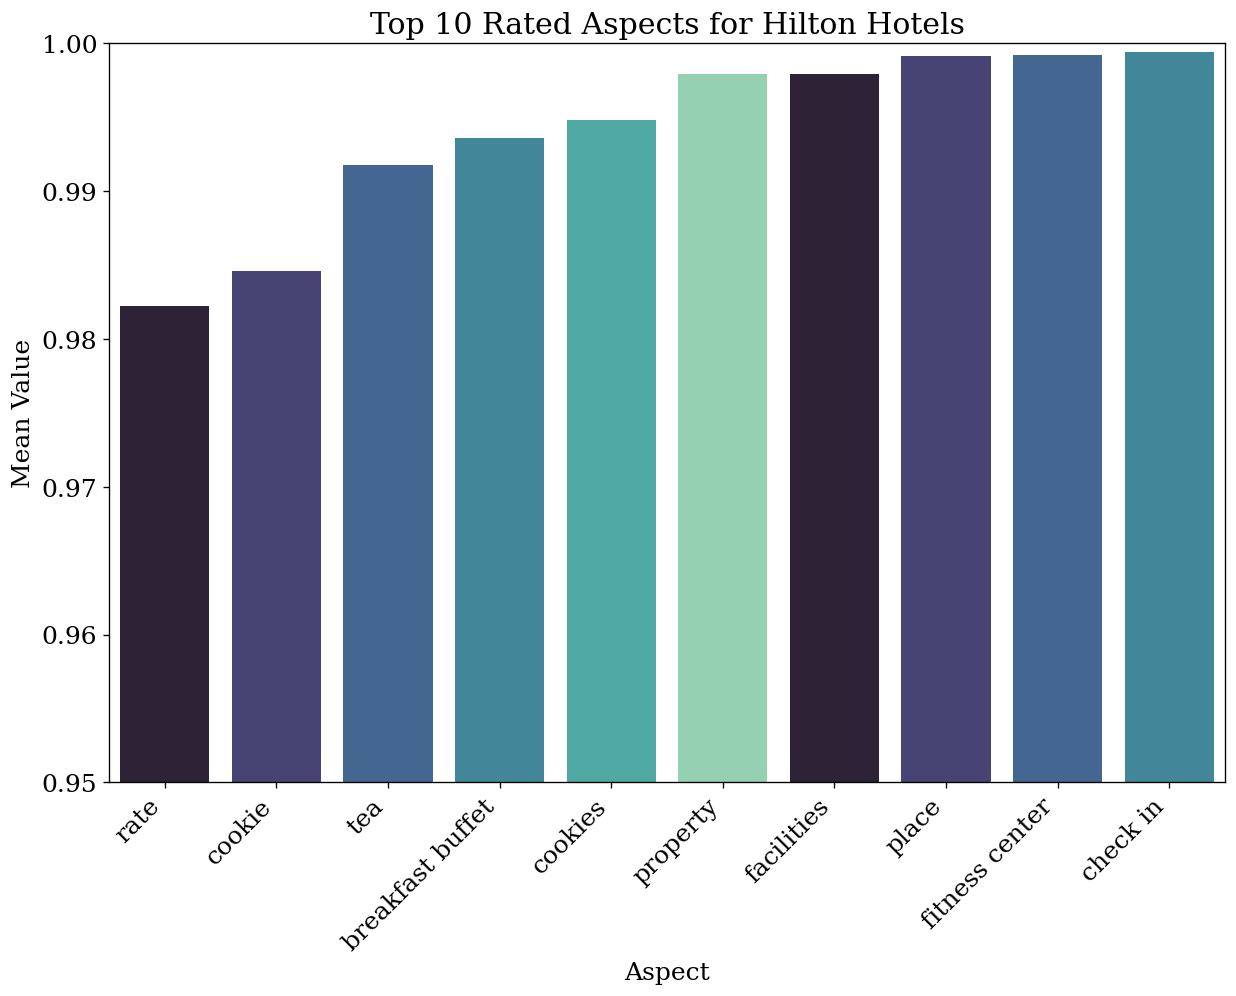

In [ ]:
custom_palette = sns.color_palette("mako")
plt.figure(figsize=(12, 8), dpi=120)
plt.ylim(0.95, 1)
sns.barplot(x=hilton_top_mean_values.index, y=hilton_top_mean_values.values, palette=custom_palette)
# plt.title('Top 10 Rated Aspects for Hilton Hotels')
plt.title('Top 10 Rated Aspects for Hilton Hotels')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Aspect')
plt.ylabel('Mean Value')
plt.show()

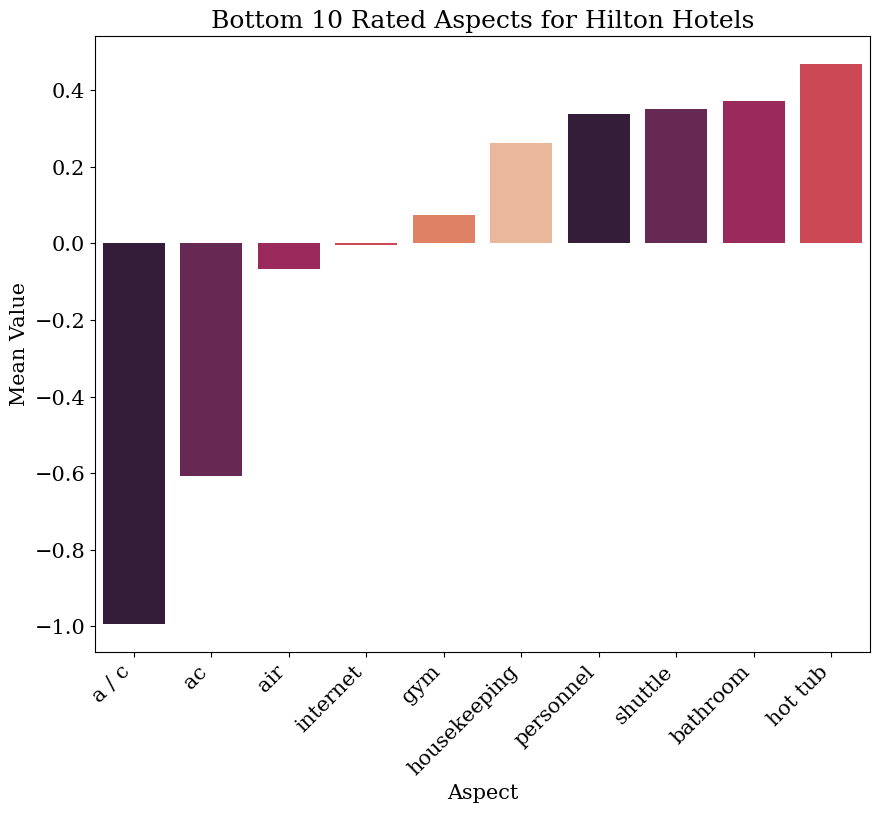

In [ ]:
custom_palette = sns.color_palette("rocket")
plt.figure(figsize=(10, 8), dpi=100)
sns.barplot(x=hilton_bottom_mean_values.index, y=hilton_bottom_mean_values.values, palette=custom_palette)
# plt.title('Bottom 10 Rated Aspects for Hilton Hotels')
plt.title('Bottom 10 Rated Aspects for Hilton Hotels')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Aspect')
plt.ylabel('Mean Value')
plt.savefig('plot3.png')
plt.show()

In [ ]:
marriott_aspects = pd.DataFrame()

In [ ]:
for i in tqdm(range(len(marriott_occurrences["reviews.text"])), desc="Processing"):

    examples = [marriott_occurrences.iloc[i]["reviews.text"].lower()]

    try:

        inference_source = examples

        atepc_result = aspect_extractor.extract_aspect(inference_source=inference_source,  #
                                  pred_sentiment=True,)

        for j in range(len(atepc_result[0]['aspect'])):

            #Select a aspect from the list
            aspects = atepc_result[0]['aspect'][j]

            # Find Index of current aspect
            aspect_index = atepc_result[0]['aspect'].index(aspects)

            # Assign Correct Sign to the confidence
            if atepc_result[0]['sentiment'][aspect_index] == 'Negative':
                aspect_confidence = -atepc_result[0]['confidence'][aspect_index]

            else:
                aspect_confidence = atepc_result[0]['confidence'][aspect_index]

            # Create New Aspect column after checking if column for Aspect exists
            if aspects not in marriott_aspects.columns:
                marriott_aspects[aspects] = ''

            # Store confidence for all aspects in a new row
            marriott_aspects.loc[i, aspects] = aspect_confidence

    except KeyError:
        continue

    except ValueError:
        continue

Processing:   0%|                              | 1/1108 [00:01<33:24,  1.81s/it]

[2024-04-22 14:08:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:08:32] (2.4.1.post1) Example 0: not a lot of options where i needed to stay for work , but this <hotel:Positive Confidence:0.9991> was nice . fairly updated and the <staff:Positive Confidence:0.9994> was friendly . walking <distance:Positive Confidence:0.9994> to cracker barrel and applebee ' s , which was nice . other restaurants within driving distance . easy to get to , right off interstate . if i was back in town for work , i ' d stay here again for sure .


Processing:   0%|                              | 2/1108 [00:03<29:04,  1.58s/it]

[2024-04-22 14:08:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:08:33] (2.4.1.post1) Example 0: this hotel is undergoing construction . banging and other loud noises begin early in the morning . forget about enjoying a peaceful morning . was very disappointed by the reaction of the hotel <staff:Negative Confidence:0.9964> when i brought it to their attention . a free night ' s stay or at least a discount on my next stay may have helped the situation . dont book this hotel until the construction is complete


Processing:   0%|                              | 3/1108 [00:05<30:59,  1.68s/it]

[2024-04-22 14:08:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:08:35] (2.4.1.post1) Example 0: good <location:Positive Confidence:0.9986> , right off highway . applebees next door . . . you can walk there ! <hallway:Negative Confidence:0.8606> was dirty but the <roomwas:Positive Confidence:0.9995> very clean and comfortable .


Processing:   0%|                              | 4/1108 [00:07<36:26,  1.98s/it]

[2024-04-22 14:08:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:08:37] (2.4.1.post1) Example 0: the hotel was fairly new and slightly out of town . the <pool:Positive Confidence:0.992> was refreshing . <breakfast:Neutral Confidence:0.9894> was adequate but as usual in hotels like this , when crowded jockeying for a spot to sit can be a challenge .


Processing:   0%|▏                             | 5/1108 [00:10<40:17,  2.19s/it]

[2024-04-22 14:08:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:08:40] (2.4.1.post1) Example 0: rooms are very small , especially for a family of 4 . <beds:Negative Confidence:0.9949> were not very comfortable and the <bathroom:Negative Confidence:0.973> was also small ( straddle the toilet to close the door small ) . the <pool area:Negative Confidence:0.998> was not so great . <hot tub:Negative Confidence:0.9985> was cloudy and the whole area had a septic smell .


Processing:   1%|▏                             | 6/1108 [00:11<36:56,  2.01s/it]

[2024-04-22 14:08:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:08:41] (2.4.1.post1) Example 0: needs more <ice:Positive Confidence:0.9676> machines .


Processing:   1%|▏                             | 7/1108 [00:13<33:59,  1.85s/it]

[2024-04-22 14:08:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:08:43] (2.4.1.post1) Example 0: trs bon sjour , tout prs de la 81 , restaurant tout ct , petit - djeuner bien garni , <literie:Positive Confidence:0.9993> confortable .


Processing:   1%|▏                             | 8/1108 [00:14<33:25,  1.82s/it]

[2024-04-22 14:08:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:08:45] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.999> at the fairfield inn were amazing . they arranged a cab for us , offered us hot tea after a late night arrival on a very cold evening , they check in on us the next day to make sure we were settled and had everything we needed . they made sure our stay at their hotel was comfortable . an extra thank you to candice , bea , and donna . thank you ladies for going above and beyond . great <breakfast:Positive Confidence:0.9993> in the morning too ! !


Processing:   1%|▏                             | 9/1108 [00:16<34:04,  1.86s/it]

[2024-04-22 14:08:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:08:47] (2.4.1.post1) Example 0: easily accessible in spite of traffic on 17 . clean . <bath:Negative Confidence:0.976> a teensy bit small but still acceptable . we had a king bed - that ' s all they had available , but the two <doubles:Negative Confidence:0.9903> may have been a little tight . we did use a rollaway <cot:Neutral Confidence:0.8987> for our son ( 5 ' 10 , 150lbs ) and wound up putting the mattress on the floor the second night as the <frame:Negative Confidence:0.9613> was simply too small for a teenage boy !


Processing:   1%|▎                            | 10/1108 [00:19<36:26,  1.99s/it]

[2024-04-22 14:08:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:08:49] (2.4.1.post1) Example 0: i often stay at hampton inns but one was not conveniently located so i opted for this fairfield inn near bingham ton because it seemed to be about the same quality although a little pricier . what a mistake ! the motel , although the <room:Positive Confidence:0.5984> was clean and comfortable , was very unattractive and way overpriced for the amenities . i would have walked out but i had a no cancellation reservation . when i mentioned the unattractiveness to the desk <clerk:Negative Confidence:0.7984> she acknowledged the problem and very nicely explained that the place was due for a major overhaul . so . if the <management:Negative Confidence:0.989> knew it was not up to snuff why the high <rate:Negative Confidence:0.9976> . 

Processing:   1%|▎                            | 11/1108 [00:20<34:04,  1.86s/it]

[2024-04-22 14:08:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:08:51] (2.4.1.post1) Example 0: visiting family . . . convienient to get to . . . <room:Positive Confidence:0.998> was clean . . . <pool water:Negative Confidence:0.9981> could have been warmer . . . overall , we were satisfied .


Processing:   1%|▎                            | 12/1108 [00:22<31:10,  1.71s/it]

[2024-04-22 14:08:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:08:52] (2.4.1.post1) Example 0: it was convenient a little noisy in the <room:Negative Confidence:0.9958> with the traffic on the road ( room facing the front of the building ) .


Processing:   1%|▎                            | 13/1108 [00:24<33:13,  1.82s/it]

[2024-04-22 14:08:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:08:54] (2.4.1.post1) Example 0: overpriced , small <room:Negative Confidence:0.976> with absolutely no view , <furnishings:Negative Confidence:0.9873> showed years of wear and tear , small <bath:Negative Confidence:0.9929> with thin <towels:Negative Confidence:0.9899> , very mediocre <breakfast:Negative Confidence:0.9873> . worst and most expensive hotel we stayed in on a 11 night vacation sleeping in 9 different cities in 6 states


Processing:   1%|▎                            | 14/1108 [00:26<33:25,  1.83s/it]

[2024-04-22 14:08:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:08:56] (2.4.1.post1) Example 0: since most important thing for me is bed comfort , i ' d say this is a winner . nice <staff:Positive Confidence:0.9993> , clean room . <breakfast:Neutral Confidence:0.9924> was standard low quality mass free <food:Negative Confidence:0.663> , but that is to be expected .


Processing:   1%|▍                            | 15/1108 [00:28<34:39,  1.90s/it]

[2024-04-22 14:08:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:08:58] (2.4.1.post1) Example 0: pool was good temp . . <hot tub:Positive Confidence:0.9993> very enjoyable . <breakfast:Positive Confidence:0.999> was good with lots of choices


Processing:   1%|▍                            | 16/1108 [00:29<34:14,  1.88s/it]

[2024-04-22 14:09:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:00] (2.4.1.post1) Example 0: clean , spacious <room:Positive Confidence:0.9991> . <pool:Positive Confidence:0.9922> and <hot tub:Positive Confidence:0.9945> were clean .


Processing:   2%|▍                            | 17/1108 [00:32<36:10,  1.99s/it]

[2024-04-22 14:09:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:02] (2.4.1.post1) Example 0: this was a very nice hotel . the <staff:Positive Confidence:0.9994> was particularly friendly and helpful , the complimentary <breakfast:Positive Confidence:0.9992> was great , and they had the most comfortable <beds:Positive Confidence:0.9995> i have slept in at a hotel ! would highly recommend .


Processing:   2%|▍                            | 18/1108 [00:34<38:31,  2.12s/it]

[2024-04-22 14:09:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:04] (2.4.1.post1) Example 0: everything was great - very clean hotel , very clean <room:Positive Confidence:0.9958> , excellent <service:Positive Confidence:0.9973> at the <front desk:Neutral Confidence:0.774> , great variety of <food:Neutral Confidence:0.8426> at <breakfast:Neutral Confidence:0.9799> . only downside was the <cost:Neutral Confidence:0.5097> .


Processing:   2%|▍                            | 19/1108 [00:37<44:03,  2.43s/it]

[2024-04-22 14:09:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:08] (2.4.1.post1) Example 0: this was a fine , clean hotel . good - sized <pool:Positive Confidence:0.9994> and <exercise room:Positive Confidence:0.9994> . <rooms:Positive Confidence:0.9992> were clean , check <- in:Positive Confidence:0.9994> was easy . good <breakfast:Positive Confidence:0.9989> with waffles , <eggs:Neutral Confidence:0.7955> , <bacon:Neutral Confidence:0.9966> , <yogurt:Neutral Confidence:0.999> , <muffins:Neutral Confidence:0.9991> , etc . , etc .


Processing:   2%|▌                            | 20/1108 [00:41<48:28,  2.67s/it]

[2024-04-22 14:09:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:11] (2.4.1.post1) Example 0: this was a fine , clean hotel . good - sized <pool:Positive Confidence:0.9994> and <exercise room:Positive Confidence:0.9994> . <rooms:Positive Confidence:0.9992> were clean , check <- in:Positive Confidence:0.9994> was easy . good <breakfast:Positive Confidence:0.9989> with waffles , <eggs:Neutral Confidence:0.7955> , <bacon:Neutral Confidence:0.9966> , <yogurt:Neutral Confidence:0.999> , <muffins:Neutral Confidence:0.9991> , etc . , etc .


Processing:   2%|▌                            | 21/1108 [00:42<42:35,  2.35s/it]

[2024-04-22 14:09:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:12] (2.4.1.post1) Example 0: this is the only place i will stay in binghamton when i am there . it is the cleanest , friendliest , and has the best <breakfast:Positive Confidence:0.9989> around for the <price:Neutral Confidence:0.9224> . i choose fairfield inn ' s because i consistantly have a pleasurable experience there .


Processing:   2%|▌                            | 22/1108 [00:44<42:34,  2.35s/it]

[2024-04-22 14:09:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:15] (2.4.1.post1) Example 0: was hoping for a nicer room based on higher <room rates:Negative Confidence:0.9981> than other offerings . what we found was just a plain room . wished we had stayed somewhere else for our money . <breakfast:Neutral Confidence:0.8823> was good <value:Positive Confidence:0.9592> and well <served:Positive Confidence:0.9965> .


Processing:   2%|▌                            | 23/1108 [00:47<41:59,  2.32s/it]

[2024-04-22 14:09:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:17] (2.4.1.post1) Example 0: we were very happy with our stay . very nice hotel with super friendly <staff:Positive Confidence:0.9992> . <room:Positive Confidence:0.9985> was clean and spacious . had microwave , mini fridge , coffee maker . <pool area:Positive Confidence:0.9547> and <exercise room:Positive Confidence:0.9967> were nice clean . continental <breakfast:Positive Confidence:0.9991> had lots of choices and tasted great ! loved that it was just a quick walk next door to dinner . definitely would recommend to family friends and will absolutely stay again !


Processing:   2%|▋                            | 24/1108 [00:49<41:34,  2.30s/it]

[2024-04-22 14:09:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:19] (2.4.1.post1) Example 0: we were very happy with our stay . very nice hotel with super friendly <staff:Positive Confidence:0.9992> . <room:Positive Confidence:0.9985> was clean and spacious . had microwave , mini fridge , coffee maker . <pool area:Positive Confidence:0.9547> and <exercise room:Positive Confidence:0.9967> were nice clean . continental <breakfast:Positive Confidence:0.9991> had lots of choices and tasted great ! loved that it was just a quick walk next door to dinner . definitely would recommend to family friends and will absolutely stay again !


Processing:   2%|▋                            | 25/1108 [00:51<42:18,  2.34s/it]

[2024-04-22 14:09:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:22] (2.4.1.post1) Example 0: we were very happy with our stay . very nice hotel with super friendly <staff:Positive Confidence:0.9992> . <room:Positive Confidence:0.9985> was clean and spacious . had microwave , mini fridge , coffee maker . <pool area:Positive Confidence:0.9547> and <exercise room:Positive Confidence:0.9967> were nice clean . continental <breakfast:Positive Confidence:0.9991> had lots of choices and tasted great ! loved that it was just a quick walk next door to dinner . definitely would recommend to family friends and will absolutely stay again !


Processing:   2%|▋                            | 26/1108 [00:53<36:30,  2.02s/it]

[2024-04-22 14:09:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:23] (2.4.1.post1) Example 0: adequate is the word i ' d use .


Processing:   2%|▋                            | 27/1108 [00:54<31:42,  1.76s/it]

[2024-04-22 14:09:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:24] (2.4.1.post1) Example 0: all good .


Processing:   3%|▋                            | 28/1108 [00:55<29:47,  1.65s/it]

[2024-04-22 14:09:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:25] (2.4.1.post1) Example 0: very nice .


Processing:   3%|▊                            | 29/1108 [00:57<32:32,  1.81s/it]

[2024-04-22 14:09:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:28] (2.4.1.post1) Example 0: we stayed here the night before a 5k color run . the <room:Positive Confidence:0.9904> was very clean - but my son did find a skittle under the bed , wedged into the corner . i think it ' s his goal to find ' anything ' when he enters a hotel room . the <beds:Positive Confidence:0.9971> were very comfy as were the pillows , and we were even able to enjoy the <pool:Positive Confidence:0.9991> for a while . all in all this was a very nice hotel and the <staff:Positive Confidence:0.9987> was great . they didn ' t even cringe when we walked back in after the run covered in wild colors : - )


Processing:   3%|▊                            | 30/1108 [00:59<32:34,  1.81s/it]

[2024-04-22 14:09:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:29] (2.4.1.post1) Example 0: clean comfortable <room:Positive Confidence:0.9994> with pleasant <staff:Positive Confidence:0.9995> . no problems .


Processing:   3%|▊                            | 31/1108 [01:01<33:15,  1.85s/it]

[2024-04-22 14:09:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:31] (2.4.1.post1) Example 0: we stayed at this property to attend an event about 20 miles away . it ' s close to the highway , which was convenient for us . <room:Positive Confidence:0.9287> was quite comfortable and had relatively new furnishings . however , upon arrival we were greeted by a large roll away bed standing on end ( i . e . , it blocked part of the entry and wouldn ' t have fit in room if it were set up ) . when i went to front desk to see about having it removed , i had to wait about 10 minutes for desk <person:Negative Confidence:0.9884> who apparently was only staff person on duty and was working desk and dealing with room issues - she went with me to room to remove bed . also , lobby was a little iffy - lobby restroom was not clean and , 

Processing:   3%|▊                            | 32/1108 [01:03<33:51,  1.89s/it]

[2024-04-22 14:09:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:33] (2.4.1.post1) Example 0: we stayed at this property to attend an event about 20 miles away . it ' s close to the highway , which was convenient for us . <room:Positive Confidence:0.9287> was quite comfortable and had relatively new furnishings . however , upon arrival we were greeted by a large roll away bed standing on end ( i . e . , it blocked part of the entry and wouldn ' t have fit in room if it were set up ) . when i went to front desk to see about having it removed , i had to wait about 10 minutes for desk <person:Negative Confidence:0.9884> who apparently was only staff person on duty and was working desk and dealing with room issues - she went with me to room to remove bed . also , lobby was a little iffy - lobby restroom was not clean and , 

Processing:   3%|▊                            | 33/1108 [01:05<33:22,  1.86s/it]

[2024-04-22 14:09:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:35] (2.4.1.post1) Example 0: we stayed at this property to attend an event about 20 miles away . it ' s close to the highway , which was convenient for us . <room:Positive Confidence:0.9287> was quite comfortable and had relatively new furnishings . however , upon arrival we were greeted by a large roll away bed standing on end ( i . e . , it blocked part of the entry and wouldn ' t have fit in room if it were set up ) . when i went to front desk to see about having it removed , i had to wait about 10 minutes for desk <person:Negative Confidence:0.9884> who apparently was only staff person on duty and was working desk and dealing with room issues - she went with me to room to remove bed . also , lobby was a little iffy - lobby restroom was not clean and , 

Processing:   3%|▉                            | 34/1108 [01:06<31:15,  1.75s/it]

[2024-04-22 14:09:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:37] (2.4.1.post1) Example 0: appears to be recently remodelled , <rooms:Positive Confidence:0.9995> were clean and new and very pleasant


Processing:   3%|▉                            | 35/1108 [01:08<31:55,  1.79s/it]

[2024-04-22 14:09:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:39] (2.4.1.post1) Example 0: appears to be recently remodelled , <rooms:Positive Confidence:0.9995> were clean and new and very pleasant


Processing:   3%|▉                            | 36/1108 [01:10<32:19,  1.81s/it]

[2024-04-22 14:09:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:40] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9953> we had was roomy and comfortable . the complimentary <breakfast:Positive Confidence:0.9992> was a basic offering but much appreciated . the <toilet tank:Negative Confidence:0.9984> had a small leak , but was only evident the morning of checkout .


Processing:   3%|▉                            | 37/1108 [01:11<29:01,  1.63s/it]

[2024-04-22 14:09:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:42] (2.4.1.post1) Example 0: the only complaint was trying to regulate the heat / cooling system .


Processing:   3%|▉                            | 38/1108 [01:13<28:00,  1.57s/it]

[2024-04-22 14:09:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:43] (2.4.1.post1) Example 0: nice , clean and new motel . wish the <bathroom:Negative Confidence:0.9195> was a bit bigger . wife did a quick turn and bruised her hip o the <metal door latch:Negative Confidence:0.9991> .


Processing:   4%|█                            | 39/1108 [01:14<28:12,  1.58s/it]

[2024-04-22 14:09:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:45] (2.4.1.post1) Example 0: nice hotel , close to applebees , which delivered right to your <room:Neutral Confidence:0.8273> . the <continental breakfast:Positive Confidence:0.9994> was also very good .


Processing:   4%|█                            | 40/1108 [01:17<32:37,  1.83s/it]

[2024-04-22 14:09:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:47] (2.4.1.post1) Example 0: good experience and very convenient to where i needed to be . hotel was quiet and <staff:Positive Confidence:0.9989> polite and helpful . conveniently located between two restaurants that serve decent <food:Positive Confidence:0.9961> at reasonable <prices:Positive Confidence:0.9958> . only downside was that hotel <room:Negative Confidence:0.9844> was a bit dusty . . . not unclean but bedside lamp had dust on base . very well out - fitted with outlets , however , which is needed these days . overall , i was very pleased with my stay .


Processing:   4%|█                            | 41/1108 [01:19<33:13,  1.87s/it]

[2024-04-22 14:09:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:49] (2.4.1.post1) Example 0: from the moment of <check in:Positive Confidence:0.9992> we were pleased . greeted cordially ( not fake ) we were asked if we would need anything additional ( we were 6 adults and 5 children under the age of 6 renting 3 <rooms:Positive Confidence:0.9975> ) . <they:Positive Confidence:0.9985> had already put our rooms nearby ( even when requested at other hotels in advance this seems to be a huge request and usually not done ) we have stayed at other hotels in the area but your rooms are spacious and beds are wonderful . we will continue to return here anytime we are in the area .


Processing:   4%|█                            | 42/1108 [01:21<34:56,  1.97s/it]

[2024-04-22 14:09:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:51] (2.4.1.post1) Example 0: we were thrilled with everything from the <cleanliness:Positive Confidence:0.9957> to the top notch <breakfast:Positive Confidence:0.9946> to the kindness of everyone but , the very first <person:Negative Confidence:0.9615> we met . she was the first person we approached behind the counter when we arrived . later we learned that she was handling both the desk and the housekeeping roles that night . if i were to judge the facility by this one person , i would have been disappointed in her lack of hospitality in answering our questions : no smile , no patience . . . cranky . however the rest of our <stay:Negative Confidence:0.9844> , and we did add an extra night , more than made up for it . this was my first getaway in 4 years o

Processing:   4%|█▏                           | 43/1108 [01:23<32:32,  1.83s/it]

[2024-04-22 14:09:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:53] (2.4.1.post1) Example 0: the <staff:Negative Confidence:0.9982> was indifferent to my stay . for example , almost had to convince the front desk to go through the effort to sell me another night stay . i almost went to another hotel because it seemed too much trouble to check me out and then check me back in . not likely to return .


Processing:   4%|█▏                           | 44/1108 [01:24<28:58,  1.63s/it]

[2024-04-22 14:09:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:54] (2.4.1.post1) Example 0: travel mid point stop over


Processing:   4%|█▏                           | 45/1108 [01:25<29:10,  1.65s/it]

[2024-04-22 14:09:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:56] (2.4.1.post1) Example 0: i had never stayed at a fairfield inn . i was very impressed with the <staff:Positive Confidence:0.9989> . , they were excellent . the <rooms:Positive Confidence:0.9994> were great and the <service:Positive Confidence:0.9994> was even better . would definitely recommend anyone looking for a hotel to stay at a fairfield inn .


Processing:   4%|█▏                           | 46/1108 [01:28<33:00,  1.87s/it]

[2024-04-22 14:09:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:09:58] (2.4.1.post1) Example 0: very friendly <staff:Positive Confidence:0.9989> and excellent <breakfast choices:Positive Confidence:0.9993> . i question that the comforter was not double sheeted but had a light weight <searsucker:Negative Confidence:0.993> spread on it . also , we received half used bottle of <shampoo:Negative Confidence:0.9978> .


Processing:   4%|█▏                           | 47/1108 [01:30<34:16,  1.94s/it]

[2024-04-22 14:10:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:00] (2.4.1.post1) Example 0: very friendly <staff:Positive Confidence:0.9989> and excellent <breakfast choices:Positive Confidence:0.9993> . i question that the comforter was not double sheeted but had a light weight <searsucker:Negative Confidence:0.993> spread on it . also , we received half used bottle of <shampoo:Negative Confidence:0.9978> .


Processing:   4%|█▎                           | 48/1108 [01:32<33:15,  1.88s/it]

[2024-04-22 14:10:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:02] (2.4.1.post1) Example 0: easy on / off 81 . good <service:Positive Confidence:0.9991> . i had requested a rollaway bed with my <reservation:Neutral Confidence:0.9991> , but they said the request wasn ' t there . no matter - they had one in my room within 20 mins of check - in . overall , we were pleased .


Processing:   4%|█▎                           | 49/1108 [01:34<33:18,  1.89s/it]

[2024-04-22 14:10:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:04] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9995> was very clean . <staff:Positive Confidence:0.9995> very friendly . i was not impressed with the <breakfast:Negative Confidence:0.9667> .


Processing:   5%|█▎                           | 50/1108 [01:35<32:19,  1.83s/it]

[2024-04-22 14:10:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:05] (2.4.1.post1) Example 0: nice hotel , in a convenient <location:Positive Confidence:0.9994> to is 81 . i appreciated the great <breakfast:Positive Confidence:0.9995> , then quick access to the highway .


Processing:   5%|█▎                           | 51/1108 [01:37<30:20,  1.72s/it]

[2024-04-22 14:10:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:07] (2.4.1.post1) Example 0: free <wifi:Positive Confidence:0.9994> throughout hotel


Processing:   5%|█▎                           | 52/1108 [01:39<32:16,  1.83s/it]

[2024-04-22 14:10:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:09] (2.4.1.post1) Example 0: would have loved to know they were under going major renovations before i booked the room . but considering they were it was still a nice <place:Positive Confidence:0.9989> to stay . <staff:Positive Confidence:0.999> was extremely friendly and the <rooms:Positive Confidence:0.999> were very nice and clean . <pool and hot tub:Positive Confidence:0.9995> very nice an clean as well .


Processing:   5%|█▍                           | 53/1108 [01:40<30:47,  1.75s/it]

[2024-04-22 14:10:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:11] (2.4.1.post1) Example 0: tout a t suprieur nos attentes je le recommande fortement


Processing:   5%|█▍                           | 54/1108 [01:42<30:02,  1.71s/it]

[2024-04-22 14:10:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:12] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9994> was fine . . . the <bathroom:Negative Confidence:0.9975> was very small , but otherwise an ok stay .


Processing:   5%|█▍                           | 55/1108 [01:44<30:02,  1.71s/it]

[2024-04-22 14:10:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:14] (2.4.1.post1) Example 0: hotel seemed clean . <staff:Positive Confidence:0.994> was pleasant . <room:Positive Confidence:0.9803> seemed clean but it smelled very musty . i ' m not sure why it smelled that way . it would be much better if they offered rooms with 2 queen beds instead of two double beds .


Processing:   5%|█▍                           | 56/1108 [01:45<29:50,  1.70s/it]

[2024-04-22 14:10:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:16] (2.4.1.post1) Example 0: hotel seemed clean . <staff:Positive Confidence:0.994> was pleasant . <room:Positive Confidence:0.9803> seemed clean but it smelled very musty . i ' m not sure why it smelled that way . it would be much better if they offered rooms with 2 queen beds instead of two double beds .


Processing:   5%|█▍                           | 57/1108 [01:48<32:38,  1.86s/it]

[2024-04-22 14:10:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:18] (2.4.1.post1) Example 0: we had a great <stay:Positive Confidence:0.9962> . have been to this hotel before . i would suggest the <pool:Negative Confidence:0.9961> area floor be replaced though . it is very slippery ! ! ! and i had to call the front desk for towels . <rooms:Positive Confidence:0.9836> are very nice , <beds:Positive Confidence:0.9982> very comfortable . love that we can walk to applebee ' s or cracker barrel .


Processing:   5%|█▌                           | 58/1108 [01:50<34:35,  1.98s/it]

[2024-04-22 14:10:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:20] (2.4.1.post1) Example 0: very comfortable . great <spread:Positive Confidence:0.999> for a free <breakfast buffet:Positive Confidence:0.9955> . the indoor pool was big enough ( not huge ) , though the room was steamy . friendly <staff:Positive Confidence:0.8667> .


Processing:   5%|█▌                           | 59/1108 [01:52<34:28,  1.97s/it]

[2024-04-22 14:10:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:22] (2.4.1.post1) Example 0: our late evening arrival was no problem for the staff person who registered us . the parking access was perfect for my wife ' s limited mobility and for carting our luggage to the room and back . the <breakfast buffet:Positive Confidence:0.9988> was well provisioned and the <server:Positive Confidence:0.9995> friendly and accommodating .


Processing:   5%|█▌                           | 60/1108 [01:54<34:26,  1.97s/it]

[2024-04-22 14:10:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:24] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9992> was great . we decided to stay another day and they were very helpful . the <room:Positive Confidence:0.9993> was extremely comfortable


Processing:   6%|█▌                           | 61/1108 [01:56<34:02,  1.95s/it]

[2024-04-22 14:10:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:26] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9992> was great . we decided to stay another day and they were very helpful . the <room:Positive Confidence:0.9993> was extremely comfortable


Processing:   6%|█▌                           | 62/1108 [01:57<33:16,  1.91s/it]

[2024-04-22 14:10:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:28] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.976> is very accommodating and friendly . the assistant manager , mr . cure , attempted to do his best when marriott rewards , in changing our <reservation:Neutral Confidence:0.9969> from paid with to paid with points , did not transfer our 9 months standing request at this hotel for a wheelchair accessible one bedroom . mr cure readily admitted it was a marriott human error the . . . more


Processing:   6%|█▋                           | 63/1108 [01:59<32:48,  1.88s/it]

[2024-04-22 14:10:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:30] (2.4.1.post1) Example 0: went to disney with my sister and had a great time . <room:Positive Confidence:0.9993> was big with a full <kitchen:Neutral Confidence:0.9188> , very quiet , clean . free bk was a plus .


Processing:   6%|█▋                           | 64/1108 [02:02<36:32,  2.10s/it]

[2024-04-22 14:10:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:32] (2.4.1.post1) Example 0: my husband and i stayed here for the oc marathon and it was perfect ! the <rooms:Positive Confidence:0.9992> were exceptionally clean , and very roomy . the <pool area:Positive Confidence:0.9995> was great . <staff:Positive Confidence:0.9984> was friendly . i ' d definitely stay here again . great <food:Positive Confidence:0.9992> close by too .


Processing:   6%|█▋                           | 65/1108 [02:04<36:12,  2.08s/it]

[2024-04-22 14:10:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:34] (2.4.1.post1) Example 0: this is the first <marriott:Positive Confidence:0.9995> i ' ve been to that have good customer <service:Positive Confidence:0.9995> the <staff:Positive Confidence:0.9995> is friendly accommodating and just all - around great


Processing:   6%|█▋                           | 66/1108 [02:06<36:38,  2.11s/it]

[2024-04-22 14:10:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:36] (2.4.1.post1) Example 0: loved our experience there . great <staff:Positive Confidence:0.9995> , great <room:Positive Confidence:0.9995> , great <rate:Positive Confidence:0.9995> !


Processing:   6%|█▊                           | 67/1108 [02:08<35:18,  2.03s/it]

[2024-04-22 14:10:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:38] (2.4.1.post1) Example 0: a little strange to stay at a <place:Positive Confidence:0.5094> without <vending:Negative Confidence:0.7395> machines and ice on each floor .


Processing:   6%|█▊                           | 68/1108 [02:10<35:55,  2.07s/it]

[2024-04-22 14:10:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:40] (2.4.1.post1) Example 0: close to the airport , with free parking and free <breakfast:Positive Confidence:0.7794> . nice <rooms:Positive Confidence:0.9955> , and more important , clean and quiet . everything the ri should be , at a modest <price point:Positive Confidence:0.9993> . very good shopping nearby and plenty of great restaurants within 5 minutes drive . one of the nicer venues near the airport , especially because of the reasonable tab .


Processing:   6%|█▊                           | 69/1108 [02:12<33:43,  1.95s/it]

[2024-04-22 14:10:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:42] (2.4.1.post1) Example 0: great <location:Positive Confidence:0.9995> 10 - minutes from airport .


Processing:   6%|█▊                           | 70/1108 [02:14<32:30,  1.88s/it]

[2024-04-22 14:10:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:44] (2.4.1.post1) Example 0: excellent <value:Positive Confidence:0.9994> . well maintained . friendly attentive staff


Processing:   6%|█▊                           | 71/1108 [02:15<32:05,  1.86s/it]

[2024-04-22 14:10:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:46] (2.4.1.post1) Example 0: if you cant feel safe in the hotel room then where can you feel safe when away we experienced gross negligence on the part of the staff here . we returned to our room at night , after being out all day , and found the door wasn ' t securely shut and gave way to a simple push . panicked , we took inventory of our possessions and luckily discovered nothing missing . i hate to think of what may have happened if an intruder entered the room and my wife returned alone . after informing the front desk , i wrote an email to the gen mngr and got a reply from their op mngr the next day . she informed me that our room had been accessed by keycards that were issued at check - in . i informed her that there was no way that we could have ac

Processing:   6%|█▉                           | 72/1108 [02:18<36:39,  2.12s/it]

[2024-04-22 14:10:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:48] (2.4.1.post1) Example 0: fantastic <service:Positive Confidence:0.9989> , great <rooms:Positive Confidence:0.9991> , very clean , a full <breakfast:Neutral Confidence:0.7841> , nice <patio area:Positive Confidence:0.9992> . <bedding:Positive Confidence:0.999> very comfortable , <showers:Positive Confidence:0.9983> are huge , rooms very quiet parking gets a little tricky but lots of room around the back .


Processing:   7%|█▉                           | 73/1108 [02:19<32:40,  1.89s/it]

[2024-04-22 14:10:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:50] (2.4.1.post1) Example 0: i hosted a vision board slumber party . the 2 bedroom was the perfect set up for the 6 of us ! we cooked , drank wine and made vision boards for 2016 . great way to start the new year !


Processing:   7%|█▉                           | 74/1108 [02:21<31:11,  1.81s/it]

[2024-04-22 14:10:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:51] (2.4.1.post1) Example 0: just a very good <hotel:Positive Confidence:0.9995> at a very good price


Processing:   7%|█▉                           | 75/1108 [02:23<30:30,  1.77s/it]

[2024-04-22 14:10:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:53] (2.4.1.post1) Example 0: ok hotel near activities . have stayed there before and it all depends what room you get . the room we stayed in this time , the <sofa:Negative Confidence:0.9983> was very uncomfortable to sit in or lay down on . it also had a bad smell that stays on your clothes . . . that day we stayed they were fixing the tvs in many rooms , so we had no programming to see . .


Processing:   7%|█▉                           | 76/1108 [02:25<31:19,  1.82s/it]

[2024-04-22 14:10:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:55] (2.4.1.post1) Example 0: i loved the mini suite . everything we needed was there we could invite friends over comfortably . i loved the room <decor:Positive Confidence:0.9995> .


Processing:   7%|██                           | 77/1108 [02:27<31:31,  1.83s/it]

[2024-04-22 14:10:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:57] (2.4.1.post1) Example 0: we really like what this hotel offered : free <breakfast:Positive Confidence:0.9994> , free <wifi:Positive Confidence:0.9993> and free parking . the two bedroom / two bath suite has a good size , kitchen and really convenient for a family to stay .


Processing:   7%|██                           | 78/1108 [02:28<29:22,  1.71s/it]

[2024-04-22 14:10:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:10:58] (2.4.1.post1) Example 0: upon check - in the gentleman at the front desk had a hard time figuring out how to put two cards toward the room ( we split the cost of 6 nights in a 2bdrm suite with my mother ) . he had to ask for help , which is fine , but it took forever and this incident came back to haunt us . the carpet was disgustingly filthy in our room ! we all had black dirt and grime under our feet after only 2 hours of being in the room ! the dishes in the cupboards were all dirty . all of them ! it was so gross . there was dried food on everything . check out was a nightmare for my mother . the two people working the front desk at check - in did not swipe our credit cards correctly and there was no record of my card ever being swiped . which is i

Processing:   7%|██                           | 79/1108 [02:30<28:58,  1.69s/it]

[2024-04-22 14:11:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:00] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9991> is wonderful . . . very helpful with <flower:Positive Confidence:0.9988> deliveries and other special requests which made our trip for our daughters graduation an extra special experience .


Processing:   7%|██                           | 80/1108 [02:31<28:30,  1.66s/it]

[2024-04-22 14:11:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:01] (2.4.1.post1) Example 0: that ' s the way we like it when we visit a hotel . we travel w a <toddler:Neutral Confidence:0.9988> , so non eventful means a lot . anyway , this is our 3rd time staying here , so we know what to expect .


Processing:   7%|██                           | 81/1108 [02:33<29:12,  1.71s/it]

[2024-04-22 14:11:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:03] (2.4.1.post1) Example 0: it was a good stop for our family of five on a vacation trip to socal . having two rooms and separate <bathrooms:Neutral Confidence:0.8222> , plus a <kitchen:Positive Confidence:0.9995> was perfect for our family .


Processing:   7%|██▏                          | 82/1108 [02:36<36:28,  2.13s/it]

[2024-04-22 14:11:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:06] (2.4.1.post1) Example 0: great hotel , as in my past stays here . spacious and comfy <rooms:Positive Confidence:0.9994> , super flat screen tv set and <internet service:Positive Confidence:0.9994> - <wifi:Positive Confidence:0.9993> - run flawlessly . free internet , free parking and happy hour <meals:Positive Confidence:0.9985> . fantastic hotel <staff:Positive Confidence:0.9992> . will stay there again .


Processing:   7%|██▏                          | 83/1108 [02:38<36:31,  2.14s/it]

[2024-04-22 14:11:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:08] (2.4.1.post1) Example 0: this hotel ' s <windows:Negative Confidence:0.9985> need to be renovated to effectively block outside noise . especially the rooms facing the roads . you ' ll need ear plugs for sound sleep in this hotel . <complimentary breakfast:Negative Confidence:0.999> was below my expectation . except that everything else was ok . i recommend this hotel if you are to stay in irvine area . . . . blah blah blah blah blah blah blah blah blah


Processing:   8%|██▏                          | 84/1108 [02:40<36:57,  2.17s/it]

[2024-04-22 14:11:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:11] (2.4.1.post1) Example 0: would definitely stay here again . the <room:Positive Confidence:0.9994> was very nice and the <breakfast:Positive Confidence:0.9994> was fabulous . <staff:Positive Confidence:0.9992> was very friendly . wish i was staying longer . came for business but would love to return with the family .


Processing:   8%|██▏                          | 85/1108 [02:43<36:50,  2.16s/it]

[2024-04-22 14:11:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:13] (2.4.1.post1) Example 0: much better than hotel irvine for the same <price zone:Neutral Confidence:0.699> .


Processing:   8%|██▎                          | 86/1108 [02:45<36:11,  2.12s/it]

[2024-04-22 14:11:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:15] (2.4.1.post1) Example 0: the hotel was beautifully maintained . the <room:Positive Confidence:0.9994> was huge comfortable . <staff:Positive Confidence:0.9987> very friendly .


Processing:   8%|██▎                          | 87/1108 [02:47<36:59,  2.17s/it]

[2024-04-22 14:11:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:17] (2.4.1.post1) Example 0: i had lucked out and got an amazing <rate:Positive Confidence:0.9993> for a queen studio and i am so glad i stayed here ! the <room:Positive Confidence:0.9994> was very spacious and had a kitchen in it with stainless steel appliances . the <neighborhood:Positive Confidence:0.9937> is very quiet and safe . i would definitely stay here again !


Processing:   8%|██▎                          | 88/1108 [02:49<36:53,  2.17s/it]

[2024-04-22 14:11:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:19] (2.4.1.post1) Example 0: i stayed in a studio apartment in residence inn for a month . the <room:Positive Confidence:0.9992> was very spacious and more than sufficient for one person . i loved how <they:Positive Confidence:0.9989> were extremely private about their guests . when i had ordered pizza from a local store , they made sure i give my approval before sending them over . the complimentary <breakfast:Positive Confidence:0.9993> was delicious . . . more


Processing:   8%|██▎                          | 89/1108 [02:51<37:38,  2.22s/it]

[2024-04-22 14:11:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:22] (2.4.1.post1) Example 0: this hotel has very clean <rooms:Positive Confidence:0.9995> . it is in a very convenient <location:Positive Confidence:0.9995> as well . overall , it is a great place for the money !


Processing:   8%|██▎                          | 90/1108 [02:53<36:19,  2.14s/it]

[2024-04-22 14:11:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:24] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9989> was very clean but not the <carpet:Negative Confidence:0.9975> . , so it took away from the room but overal it was a nice stay . i had trouble sleeping because the pillowcases smelled like oil


Processing:   8%|██▍                          | 91/1108 [02:56<40:05,  2.37s/it]

[2024-04-22 14:11:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:27] (2.4.1.post1) Example 0: hotel is inviting , clean and bright . <check in:Positive Confidence:0.9989> was smooth and <staff:Positive Confidence:0.9974> was friendly . <breakfast:Positive Confidence:0.9962> ( complimentary ) was excellent and had lots of variety ( chocolate chip waffles ! ) . my family loved the jacuzzi also . guest <rooms:Positive Confidence:0.9963> were very comfortable and everyone enjoyed the spacious 2 bedroom suite . 3 tvs and comfortable beds , sofa . downside : on check in , we found dirty <dishes:Negative Confidence:0.9973> were left in our dishwasher ! not excusable .


Processing:   8%|██▍                          | 92/1108 [02:59<41:25,  2.45s/it]

[2024-04-22 14:11:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:29] (2.4.1.post1) Example 0: room was nice . <breakfast:Neutral Confidence:0.9886> was missing ice and bacon . should have real plates instead of plastic . <lady:Negative Confidence:0.9917> at front <desk:Negative Confidence:0.9963> did not even tell me how to get to the <room:Neutral Confidence:0.9421> and mislead us of a side entrance to the hotel . convenience of stores are limited in the area , it ' s surrounded by industrial . check in should be earlier than 4pm .


Processing:   8%|██▍                          | 93/1108 [03:01<38:27,  2.27s/it]

[2024-04-22 14:11:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:31] (2.4.1.post1) Example 0: i ' ve been staying at this hotel for years . i like the new upgrades , especially the new <showers:Positive Confidence:0.9981> . i like the new work desks as well but working on them is difficult with the slow <internet speeds:Negative Confidence:0.9828> . ran a speed test and it came in at 1mbps upload and download which is the same speed i had here about six months . . . more


Processing:   8%|██▍                          | 94/1108 [03:03<38:59,  2.31s/it]

[2024-04-22 14:11:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:33] (2.4.1.post1) Example 0: enjoyed our stay at residence inn irvine - much exceeded expectations for my family of four . we have two small children and the extra space in the suites was ideal . also , the <breakfast:Positive Confidence:0.9989> was a great start to the mornings to get everyone set . <rooms:Positive Confidence:0.9985> are clean , modern and perfectly equipped . will come back again during next visit to oc .


Processing:   9%|██▍                          | 95/1108 [03:06<41:09,  2.44s/it]

[2024-04-22 14:11:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:36] (2.4.1.post1) Example 0: the hotel was decent but over priced for what they offer . terrible <mattress:Negative Confidence:0.9977> and the worst <toilet paper:Negative Confidence:0.9989> ever ! haha . . . no really , we had to go buy some . <room size:Positive Confidence:0.9946> was great and had everything we needed . but doing it over , i rather get 2 rooms in a nicer hotel for the same <price:Negative Confidence:0.9974> .


Processing:   9%|██▌                          | 96/1108 [03:08<38:19,  2.27s/it]

[2024-04-22 14:11:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:38] (2.4.1.post1) Example 0: it was good overall . the <room:Positive Confidence:0.9995> was nice and <staff:Positive Confidence:0.9994> were nice .


Processing:   9%|██▌                          | 97/1108 [03:10<36:05,  2.14s/it]

[2024-04-22 14:11:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:40] (2.4.1.post1) Example 0: very nice , clean and complete and everything <works:Positive Confidence:0.9995> ! awesome , the one thing that out shined everything was the <staff:Positive Confidence:0.9993> . . .


Processing:   9%|██▌                          | 98/1108 [03:11<34:13,  2.03s/it]

[2024-04-22 14:11:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:42] (2.4.1.post1) Example 0: great <stay:Positive Confidence:0.9995> very comfortable and great <location:Positive Confidence:0.9996> near all of the orange county attractions .


Processing:   9%|██▌                          | 99/1108 [03:13<32:55,  1.96s/it]

[2024-04-22 14:11:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:43] (2.4.1.post1) Example 0: a little over - priced but overall great <place:Positive Confidence:0.9992> , friendly <staff:Positive Confidence:0.9995> especially tamara and marina .


Processing:   9%|██▌                         | 100/1108 [03:15<33:51,  2.02s/it]

[2024-04-22 14:11:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:46] (2.4.1.post1) Example 0: were very accomi <dating:Positive Confidence:0.9986> all requwst were met enjoyed thae stay


Processing:   9%|██▌                         | 101/1108 [03:17<30:30,  1.82s/it]

[2024-04-22 14:11:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:47] (2.4.1.post1) Example 0: as i walked into the hotel the lobby was nice , check in went smooth , but as i went into the room i did a brief walk inside of it and stumbled across a disgusting odor , it was the smell of vomit coming from the closet / bathroom area . i immediately went downstairs to inform the woman at the check in , apparently the room wasn ' t suppose to be in use they moved me into another room . everything looked fine until my 3 year old son was wearing black shorts and socks and had sat on the floor only to get up and have his whole bottom and socks covered in white fur . i turned on all the lights and discovered that the carpet was covered in what seemed to be dog or cat fur , my mother in law and i looked at each other and noticed ou

Processing:   9%|██▌                         | 102/1108 [03:18<26:57,  1.61s/it]

[2024-04-22 14:11:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:48] (2.4.1.post1) Example 0: i hosted a vision board slumber party . the 2 bedroom was the perfect set up for the 6 of us ! we cooked , drank wine and made vision boards for 2016 . great way to start the new year !


Processing:   9%|██▌                         | 103/1108 [03:19<26:56,  1.61s/it]

[2024-04-22 14:11:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:50] (2.4.1.post1) Example 0: great experience . professional <staff:Positive Confidence:0.9978> . wonderful <breakfast:Positive Confidence:0.9995> . near great resturaunts .


Processing:   9%|██▋                         | 104/1108 [03:21<27:58,  1.67s/it]

[2024-04-22 14:11:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:52] (2.4.1.post1) Example 0: we ( family of 3 ) stayed in a king suite - bed was open to the vanity , full kitchen and sofa bed . the one bathroom had the shower and toilet . it was a newly renovated room on the third floor and all the plumbing fixtures were the new water saving ones . the <staff:Positive Confidence:0.9994> ( especially <justin:Positive Confidence:0.9985> ) was very helpful , friendly , and accommodating . . . . more


Processing:   9%|██▋                         | 105/1108 [03:23<28:45,  1.72s/it]

[2024-04-22 14:11:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:53] (2.4.1.post1) Example 0: due to unforeseen circumstances , i ended up in 3 local hotels within 6 nights . residence inn was by far the nicest . well located ( close to the freeway but also near many major shopping areas ) , solid free <breakfast:Positive Confidence:0.9846> , and a nice , big <room:Positive Confidence:0.9668> with a couch , two tvs , nice bed and bathroom , kitchen , etc . the room was a bit strangely set up , but it did the job . my only complaint would be some confusion about what time breakfast is , when coffee is still out ( why not always have coffee available ) , but overall very good .


Processing:  10%|██▋                         | 106/1108 [03:25<30:04,  1.80s/it]

[2024-04-22 14:11:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:55] (2.4.1.post1) Example 0: the hotel was what you would expect from a residence inn , however our <room:Negative Confidence:0.992> was not up to par . the <air conditioning:Negative Confidence:0.9966> did not work properly and the ice maker in the fridge was broken too . also , residence inn needs to scale up the quality of their breakfast . they compete directly with embassy suites , but embassy suites does a much better job with their <breakfast offerings:Positive Confidence:0.9896> and quality . i will go there next time .


Processing:  10%|██▋                         | 107/1108 [03:27<32:26,  1.94s/it]

[2024-04-22 14:11:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:11:58] (2.4.1.post1) Example 0: the hotel <staff:Positive Confidence:0.9956> are pleasant and professional . the place is not that luxurious but good . the <rooms:Negative Confidence:0.8901> are bit small . the kitchen is equipped with some of kitchenware . no laundry machine in each suit but laundry room in 6th floor is available but not free . the location of the residence is very convenient . the <wifi:Neutral Confidence:0.6681> is free but not fast .


Processing:  10%|██▋                         | 108/1108 [03:30<35:31,  2.13s/it]

[2024-04-22 14:12:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:00] (2.4.1.post1) Example 0: we chose residence inn by marriott irvine basically for its convenient <location:Positive Confidence:0.9993> near the airport . because of the convenient and complimentary hotel <shuttle:Positive Confidence:0.9993> , it allowed us to make our visit to orange county without having to rent a car . a local cab took us to our primary social event of that week - end . in addition to the convenience of the location , we were totally pleased to find our <accommodations:Positive Confidence:0.9992> so exceptional as well as being able to enjoy the host of amenities that were offered by the hotel . and lastly , i cannot overlook the <staff:Positive Confidence:0.9992> . they were exceptional people - and those include the breakfast area h

Processing:  10%|██▊                         | 109/1108 [03:32<33:51,  2.03s/it]

[2024-04-22 14:12:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:02] (2.4.1.post1) Example 0: their advertising is true . . . . they make it feel like a second home . i was comfortable . the social <time:Positive Confidence:0.9993> is great . there was a fire pit and comfy chairs around it where we could sit and meet people . the <staff:Positive Confidence:0.9983> was very friendly and helpful .


Processing:  10%|██▊                         | 110/1108 [03:34<34:54,  2.10s/it]

[2024-04-22 14:12:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:04] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.999> was friendly and curtious and helpfull loved the little activity they had with free spritits and food . above and behond in my book . breakfast was ok . i am not a big breakfast eater but more fruit options would be nice . rooms wher clean they <staff:Positive Confidence:0.999> did a outstanding job every day keepin my room clean and bed made and room stocked . very nice ! i can not say enough . i want to put a shout out to the younger short blond / red head <manager:Positive Confidence:0.9981> . <she:Positive Confidence:0.9981> was amazing ! give that girl a raise and help here grow with the company you have a quality person there . thanks again for a great stay


Processing:  10%|██▊                         | 111/1108 [03:36<34:19,  2.07s/it]

[2024-04-22 14:12:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:06] (2.4.1.post1) Example 0: stayed here many times and always enjoyed it . the <service:Positive Confidence:0.9993> was great and <location:Positive Confidence:0.9994> is convenient to all the places that i needs to go . the only issue was the <heater:Negative Confidence:0.9974> wasn ' t working for the first night , which they had a technician to look at in the morning .


Processing:  10%|██▊                         | 112/1108 [03:38<33:18,  2.01s/it]

[2024-04-22 14:12:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:08] (2.4.1.post1) Example 0: everything was great except the <housekeeping:Negative Confidence:0.9989> not showing up at a reasonable hour . after 4pm is far too late .


Processing:  10%|██▊                         | 113/1108 [03:40<32:04,  1.93s/it]

[2024-04-22 14:12:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:10] (2.4.1.post1) Example 0: stayed here for a combo business / family trip . the weather was hot and the <room:Negative Confidence:0.9593> was warm when we checked in . the <a / c:Negative Confidence:0.9977> struggled to cool the room overnight , but finally by morning the temp was comfortable . there was no hotel or area info in the room - you ' re directed to a calendar card on your fridge and a large touchscreen . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

[2024-04-22 14:12:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:12] (2.4.1.post1) Example 0: clean room , snow - white <sheets:Neutral Confidence:0.9989> , <refrigerator:Neutral Confidence:0.999> , microwave and <dishwasher:Neutral Confidence:0.9991> , just like a junior suite that you don ' t need to pay for . <breakfast area:Positive Confidence:0.9983> was nice with <outdoor seating:Positive Confidence:0.9611> , good rich full breakfast , not continental as expected .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  10%|██▉                         | 115/1108 [03:45<36:29,  2.21s/it]

[2024-04-22 14:12:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:15] (2.4.1.post1) Example 0: great <accommodations:Positive Confidence:0.9993> . friendly <front desk staff:Positive Confidence:0.9995> . wi - fi and standard <breakfast:Positive Confidence:0.7354> included , definitely a plus . <room:Positive Confidence:0.9991> modern , clean and comfy . <internet:Positive Confidence:0.9994> worked great . will stay there again on my next trip to irvine .


Processing:  10%|██▉                         | 116/1108 [03:46<33:37,  2.03s/it]

[2024-04-22 14:12:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:16] (2.4.1.post1) Example 0: the <kitchen:Negative Confidence:0.9911> had ants


Processing:  11%|██▉                         | 117/1108 [03:48<30:54,  1.87s/it]

[2024-04-22 14:12:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:18] (2.4.1.post1) Example 0: i would recommend this <place:Positive Confidence:0.9989> to anyone


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  11%|██▉                         | 118/1108 [03:50<32:47,  1.99s/it]

[2024-04-22 14:12:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:20] (2.4.1.post1) Example 0: we stay here often and find it an outstanding <property:Positive Confidence:0.9995> . <staff:Positive Confidence:0.9995> is always pleasant , <food:Positive Confidence:0.9995> is excellent and parking is free , love staying here ! !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  11%|███                         | 119/1108 [03:52<33:01,  2.00s/it]

[2024-04-22 14:12:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:22] (2.4.1.post1) Example 0: excellent . no complaints . <suite:Positive Confidence:0.9987> had all the conveniences even though we only used the fridge . lots of <room:Positive Confidence:0.9986> to spread out and various places to do work for several people . <staff:Positive Confidence:0.9993> was helpful . check - in was easy . restaurant right across parking lot . easy access to both major freeways .


Processing:  11%|███                         | 120/1108 [03:54<32:50,  1.99s/it]

[2024-04-22 14:12:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:24] (2.4.1.post1) Example 0: amazing <room:Positive Confidence:0.9995> and hotel . best free morning breakfast


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  11%|███                         | 121/1108 [03:56<31:43,  1.93s/it]

[2024-04-22 14:12:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:26] (2.4.1.post1) Example 0: i stayed there while visiting disneyland in was not so far from it . i honestly loved the hotel <area:Positive Confidence:0.9994> . it looked safer than anaheim . the <room:Positive Confidence:0.9992> was very clean and had a kitchenette . i loved cooking and there was a supermarket very close to the hotel so this was a great stay for me . there are also a lot of . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  11%|███                         | 122/1108 [03:58<34:08,  2.08s/it]

[2024-04-22 14:12:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:28] (2.4.1.post1) Example 0: wonderful stall from <front desk:Neutral Confidence:0.7617> to <kitchen area:Neutral Confidence:0.9246> . good <space:Positive Confidence:0.9971> , comfortable <beds:Positive Confidence:0.9995> , quiet , good quick <breakfast:Positive Confidence:0.9995> , overall good 1st experience . worked well for us over 70 seniors .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  11%|███                         | 123/1108 [04:00<33:13,  2.02s/it]

[2024-04-22 14:12:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:30] (2.4.1.post1) Example 0: irvine is neatly and luxurious hotel . the <room:Positive Confidence:0.9936> are spacious , good , and neat . <services:Negative Confidence:0.9751> need to improve . in restaurant there is a demarcation of complimentary breakfast and paid breakfast . . . they appreciate if we use the section properly - - - first time a saw this in a hotel . . . .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  11%|███▏                        | 124/1108 [04:02<32:31,  1.98s/it]

[2024-04-22 14:12:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:32] (2.4.1.post1) Example 0: this was just an over night stay for us as we were not ready to make the drive back to what was at the time a hot weekend in ventura county . upon arriving , the <staff:Positive Confidence:0.9991> was both courteous and friendly and got us <checked:Positive Confidence:0.9987> in very quickly . the <lobby:Positive Confidence:0.9976> is nice with lots of seating and a couple of tv ' s . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  11%|███▏                        | 125/1108 [04:04<35:07,  2.14s/it]

[2024-04-22 14:12:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:35] (2.4.1.post1) Example 0: loved this property ! if you ate traveling with a group , call <mackenzie:Positive Confidence:0.9993> ! ! she set up our soccer team from portland very well . <rooms:Positive Confidence:0.998> were perfect . 2 bdr suites are the way to go . <breakfast:Positive Confidence:0.9545> was great however make sure if you need an early weekend breakfast before a game , check at the desk for the <serving:Negative Confidence:0.8011> times are later .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  11%|███▏                        | 126/1108 [04:06<32:05,  1.96s/it]

[2024-04-22 14:12:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:36] (2.4.1.post1) Example 0: desk staff very professional and helpful . good value . souplantation in parking lot very convenient .


Processing:  11%|███▏                        | 127/1108 [04:07<29:27,  1.80s/it]

[2024-04-22 14:12:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:38] (2.4.1.post1) Example 0: the <breakfast buffet:Positive Confidence:0.9994> is 1 of the best i ' ve had at a hotel . and it ' s free ! no simple , continental here : )


Processing:  12%|███▏                        | 128/1108 [04:09<27:32,  1.69s/it]

[2024-04-22 14:12:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:39] (2.4.1.post1) Example 0: free <wifi:Positive Confidence:0.9993> . between 1 . 5 to 2 mbps up and down


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  12%|███▎                        | 129/1108 [04:11<28:30,  1.75s/it]

[2024-04-22 14:12:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:41] (2.4.1.post1) Example 0: we were in the area as new grandparents . brought our cat and were very comfortable . <breakfasts:Positive Confidence:0.9249> a great value , enjoyed time outside and brief swims in the pool . very friendly <staff:Positive Confidence:0.9989> and an easy <place:Positive Confidence:0.9988> to stay for family business .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  12%|███▎                        | 130/1108 [04:13<31:18,  1.92s/it]

[2024-04-22 14:12:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:43] (2.4.1.post1) Example 0: although most rres inns are functional this one is in a class by itself . it replicates the <comfort:Positive Confidence:0.9991> of a full service marriott while providing a high quality and varied offerings for <breakfast:Positive Confidence:0.933> . the pool <area:Positive Confidence:0.9638> matches in size and cleanliness that of any full service pool area . the front <desk staff:Positive Confidence:0.9985> is knowledgeable and customer oriented . driving in and . . . more


Processing:  12%|███▎                        | 131/1108 [04:15<29:14,  1.80s/it]

[2024-04-22 14:12:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:45] (2.4.1.post1) Example 0: we stayed in here for two weeks . all was great and our needs and request were met by the very friendly helpful <staff:Positive Confidence:0.9993> ! any mistake or fault was attended to and fixed by no time . it was a lovely peaceful stay . best of luck !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  12%|███▎                        | 132/1108 [04:16<28:31,  1.75s/it]

[2024-04-22 14:12:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:46] (2.4.1.post1) Example 0: no free <beer:Negative Confidence:0.8223> - - i asked upon <check:Neutral Confidence:0.998> - in .


Processing:  12%|███▎                        | 133/1108 [04:18<27:04,  1.67s/it]

[2024-04-22 14:12:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:48] (2.4.1.post1) Example 0: we spent the better part of two months at this marriott location and left with such mixed feelings about the hotel ! the things that were good about it were very good . the things that were bad , were horrid . the best part of staying here was the <staff:Positive Confidence:0.9945> . they could not have been nicer , nor tried harder to assist us in . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  12%|███▍                        | 134/1108 [04:19<26:17,  1.62s/it]

[2024-04-22 14:12:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:49] (2.4.1.post1) Example 0: great summer getaway . drove to cali from texas . . . stopped at other accomodations along the way all the while envisioning our suite rooms at the residence inn . when we arrived , tired and ready for a shower and a bed . . . wow ! the serene <scenery:Positive Confidence:0.9994> and palm trees landscaping took our breath away . arrived on sunday and departed on the following saturday . . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  12%|███▍                        | 135/1108 [04:21<26:25,  1.63s/it]

[2024-04-22 14:12:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:51] (2.4.1.post1) Example 0: i just stayed here many times . the <rooms:Positive Confidence:0.9979> have been upgraded and they are very appealing . nothing over - the - top , just pure clean and functional . i also did an <internet speed:Negative Confidence:0.9939> test and it came in at 1 mps , which is really slow these days . fine for email but if you want to watch video , it would be sluggish . the breakfast , parking . . . more


Processing:  12%|███▍                        | 136/1108 [04:23<26:59,  1.67s/it]

[2024-04-22 14:12:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:53] (2.4.1.post1) Example 0: for spring break with my family , i was looking for a location that wasn ' t too close to disneyland ( wanted quieter location ) and had easy access to the beach . <irvine:Positive Confidence:0.9991> was the perfect location . and the residence inn near the john wayne airport offered 2 bedroom suites ( one bedroom for me and my husband , the other for my teenager ) . i ' ve stayed . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  12%|███▍                        | 137/1108 [04:25<29:57,  1.85s/it]

[2024-04-22 14:12:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:55] (2.4.1.post1) Example 0: the good : this hotel is updated . the <bathroom:Positive Confidence:0.999> is super chic with floor to ceiling glass doors . the <bed:Positive Confidence:0.9991> was comfy . the <room:Positive Confidence:0.999> itself is huge . i had a kitchen with a full fridge and freezer . the parking is free . the <breakfast:Positive Confidence:0.9336> was typical but good . the <pool area:Positive Confidence:0.9994> was very nice and clean . it ' s suuuuper cheap for what you . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  12%|███▍                        | 138/1108 [04:27<30:06,  1.86s/it]

[2024-04-22 14:12:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:57] (2.4.1.post1) Example 0: rooms are very nice . very clean and well maintained . lots of restaurant options around here . the <breakfast:Positive Confidence:0.9987> is pretty good . the <reception:Negative Confidence:0.9819> is a hit or miss . a couple of nights real good and even replaced dinner . one night wasn ' t . very nice outdoor seating .


Processing:  13%|███▌                        | 139/1108 [04:29<30:13,  1.87s/it]

[2024-04-22 14:12:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:12:59] (2.4.1.post1) Example 0: the little extras really make this a nice <place:Positive Confidence:0.9989> to stay . free beer , 5 - 6 tv ' s to watch football , the <food:Neutral Confidence:0.9976> is so - so . the <internet speed:Negative Confidence:0.9957> is lacking , so if your looking for speed go somewhere else .


Processing:  13%|███▌                        | 140/1108 [04:31<32:26,  2.01s/it]

[2024-04-22 14:13:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:01] (2.4.1.post1) Example 0: clean room , snow - white <sheets:Neutral Confidence:0.9989> , <refrigerator:Neutral Confidence:0.999> , microwave and <dishwasher:Neutral Confidence:0.9991> , just like a junior suite that you don ' t need to pay for . <breakfast area:Positive Confidence:0.9983> was nice with <outdoor seating:Positive Confidence:0.9611> , good rich full breakfast , not continental as expected .


Processing:  13%|███▌                        | 141/1108 [04:33<31:34,  1.96s/it]

[2024-04-22 14:13:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:03] (2.4.1.post1) Example 0: spacious , good <service:Positive Confidence:0.9992> , close to an airport and to main attractions . all rooms have a bedroom and a living room accompanying the bedroom . there is a gym on site . <breakfast:Neutral Confidence:0.999> is included in the <reservation:Neutral Confidence:0.999> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  13%|███▌                        | 142/1108 [04:35<34:02,  2.11s/it]

[2024-04-22 14:13:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:06] (2.4.1.post1) Example 0: i ' ve stayed at the courtyard down the street and decided to try the residence inn this time . it ' s in the business <area:Neutral Confidence:0.5794> of irvine , so the area is deserted on the weekends and you ' ll find good <rates:Positive Confidence:0.9701> . the free <breakfast:Positive Confidence:0.997> is great and well stocked . the lobby area is roomy and comfortable . the <rooms:Positive Confidence:0.9988> are huge and well appointed - . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  13%|███▌                        | 143/1108 [04:37<31:45,  1.97s/it]

[2024-04-22 14:13:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:07] (2.4.1.post1) Example 0: i have stayed and rated this property a number of times before and always rated it four stars . it dropped a star this time and i will tell you why in a moment . i first want to acknowledge <krista:Positive Confidence:0.9986> at the <front desk:Positive Confidence:0.9993> who was very sweet and professional . as a gold marriott she upgraded me to a one bedroom , . . . more


Processing:  13%|███▋                        | 144/1108 [04:38<27:53,  1.74s/it]

[2024-04-22 14:13:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:08] (2.4.1.post1) Example 0: 2pm check - in 12pm check - out


Processing:  13%|███▋                        | 145/1108 [04:39<25:27,  1.59s/it]

[2024-04-22 14:13:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:10] (2.4.1.post1) Example 0: clean , very well located hotel . the <staff:Positive Confidence:0.9995> is really nice and is trying to fulfill your wishes . . .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  13%|███▋                        | 146/1108 [04:41<25:44,  1.61s/it]

[2024-04-22 14:13:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:11] (2.4.1.post1) Example 0: the lobby and the breakfast area were under renovation during our visit but that did not impact our experience . the included breakfast was full of healthy and standard <options:Positive Confidence:0.9993> . the room and property were clean and well maintained . the <staff:Positive Confidence:0.9994> was awesome and accommodating .


Processing:  13%|███▋                        | 147/1108 [04:43<25:46,  1.61s/it]

[2024-04-22 14:13:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:13] (2.4.1.post1) Example 0: free <breakfast:Positive Confidence:0.9761> in the morning and free <beer:Positive Confidence:0.9993> in the evening - bonus !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  13%|███▋                        | 148/1108 [04:45<27:49,  1.74s/it]

[2024-04-22 14:13:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:15] (2.4.1.post1) Example 0: stayed here for two nights over valentines weekend . the hotel was very nice and in a very central location . there is a nice <sundry shop:Positive Confidence:0.9995> on site and a very good <breakfast:Positive Confidence:0.9991> offered in the lobby area . the <room:Positive Confidence:0.9716> itself was clean and spacious . there is also a soup plantation restaurant in the same parking lot . i ' d definitely stay here . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  13%|███▊                        | 149/1108 [04:47<28:40,  1.79s/it]

[2024-04-22 14:13:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:17] (2.4.1.post1) Example 0: nicely furnished hotel near u . c . i . that is great for traveling families . it has a very nice <lobby:Positive Confidence:0.9993> , free breakfast and breakfast area has t . v . ' s , and a nice <pool:Positive Confidence:0.9991> . big <fire pit:Positive Confidence:0.9995> to sit and enjoy the evening . beer , wine and light snacks are available at the lobby store . free newspapers each morning .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  14%|███▊                        | 150/1108 [04:48<28:55,  1.81s/it]

[2024-04-22 14:13:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:19] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9968> at this place was great big <single room:Positive Confidence:0.9995> and the customer <service:Positive Confidence:0.9993> a - plus , now for me and because of my work assignment , this hotel made it easy for me going in and out to work and back at my hotel


Processing:  14%|███▊                        | 151/1108 [04:50<25:56,  1.63s/it]

[2024-04-22 14:13:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:20] (2.4.1.post1) Example 0: free laundry supplies - - you supply only the quarters . nice little perk .


Processing:  14%|███▊                        | 152/1108 [04:51<24:11,  1.52s/it]

[2024-04-22 14:13:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:21] (2.4.1.post1) Example 0: i often seek out a residence inn if there is one where i am traveling . this one was nice , clean , recently updated , and in a clean , fresh <area:Positive Confidence:0.9994> . it ' s close enough to uc irvine to visit my daughter , the two bedroom suite is always a great way to keep enough space between family members , and we get to bring our . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  14%|███▊                        | 153/1108 [04:53<28:02,  1.76s/it]

[2024-04-22 14:13:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:23] (2.4.1.post1) Example 0: we have spent a few nights at this hotel when in orange county and love the <rooms:Positive Confidence:0.9993> and <location:Positive Confidence:0.9992> . a short taxi ride to the oc ( john wayne ) airport , fashion island , south coast plaza , and newport beach . <service:Positive Confidence:0.9981> is top - notch for a residence inn <mike:Positive Confidence:0.9993> at the front desk provided excellent customer <service:Positive Confidence:0.9981> and helped arrange for a great late - night . . . more


Processing:  14%|███▉                        | 154/1108 [04:56<30:36,  1.93s/it]

[2024-04-22 14:13:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:26] (2.4.1.post1) Example 0: we stayed at the <irvine:Positive Confidence:0.9964> residence inn twice , in feb . and then may . the hotel has recently been renovated and the <rooms:Positive Confidence:0.9992> are large and comfortable . the <pool:Positive Confidence:0.9989> is beautiful with many chairs and spa . there is also a large area for groups to hang out , with fire pits . the <breakfast area:Positive Confidence:0.9985> is also spacious and well stocked .


Processing:  14%|███▉                        | 155/1108 [04:57<28:22,  1.79s/it]

[2024-04-22 14:13:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:27] (2.4.1.post1) Example 0: great <place:Positive Confidence:0.9995> to stay


Processing:  14%|███▉                        | 156/1108 [04:58<25:23,  1.60s/it]

[2024-04-22 14:13:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:28] (2.4.1.post1) Example 0: marriott solana hosted over 200 guests for my reception with room for more . allison ( sales ) and malikah ( events ) worked patiently with me in all details . all of our guests enjoyed the food , which was the biggest requirement . the venue is in a remote location with many unique . . . read more beautiful locations to sit , relax , and enjoy the view or take pictures . the chef was amazing in the food items for taste testing with my restrictions for food selections . with my saying no to salmon as a fish selection because it ' s so bland , he took it and created an indian inspired delicacy that all my guests raved about . i had a few discrepancies i was not happy about at the actual reception . my husband ' s ( the groom ' s

/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

[2024-04-22 14:13:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:31] (2.4.1.post1) Example 0: very friendly <staff:Positive Confidence:0.9983> , quiet <location:Positive Confidence:0.999> , clean moderne <building:Positive Confidence:0.9991> , <housekeeping:Positive Confidence:0.9991> was very helpful , free parking . the only down side is the parking <below ground:Negative Confidence:0.9922> is too small for all guests , confusing and once up their garage <elevator:Negative Confidence:0.9282> - you go up a floor , walk to other side of hotel to get in on another elevator


Processing:  14%|███▉                        | 158/1108 [05:02<27:38,  1.75s/it]

[2024-04-22 14:13:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:32] (2.4.1.post1) Example 0: stayed there while attending a marriage conference . great <place:Positive Confidence:0.9439> for the <price:Positive Confidence:0.9994> . highly recommended .


Processing:  14%|████                        | 159/1108 [05:03<24:42,  1.56s/it]

[2024-04-22 14:13:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:33] (2.4.1.post1) Example 0: awesome


Processing:  14%|████                        | 160/1108 [05:04<22:44,  1.44s/it]

[2024-04-22 14:13:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:35] (2.4.1.post1) Example 0: very nice , peaceful .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  15%|████                        | 161/1108 [05:06<21:39,  1.37s/it]

[2024-04-22 14:13:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:36] (2.4.1.post1) Example 0: our first time here . awesome <experience:Positive Confidence:0.9991> all around .


Processing:  15%|████                        | 162/1108 [05:07<22:01,  1.40s/it]

[2024-04-22 14:13:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:37] (2.4.1.post1) Example 0: very nice large <rooms:Positive Confidence:0.9995> - very comfortable


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  15%|████                        | 163/1108 [05:09<23:48,  1.51s/it]

[2024-04-22 14:13:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:39] (2.4.1.post1) Example 0: the marriott , solana , was an excellent hotel . the <people:Positive Confidence:0.9993> at the <front desk:Positive Confidence:0.9994> were always very helpful and professional . the <beds:Positive Confidence:0.9994> were extremely comfortable and the hotel is very quiet . we did not hear any outside noise . the room was clean and an enjoyable place to stay .


Processing:  15%|████▏                       | 164/1108 [05:10<24:22,  1.55s/it]

[2024-04-22 14:13:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:41] (2.4.1.post1) Example 0: staff very nice and professional . extremely difficult to find but not their fault it ' s just a new area that ' s not on any navigation . the hote ' ls restaurant ( cielo ) <cost:Negative Confidence:0.9766> more for breakfast than the sushi fine dinning we ate that night for dinner . lastly , the hotel is a hefty drive from any other restaurants , stores , race tracks , etc . . .


Processing:  15%|████▏                       | 165/1108 [05:12<24:24,  1.55s/it]

[2024-04-22 14:13:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:42] (2.4.1.post1) Example 0: quite , comfortable , well appointed <rooms:Positive Confidence:0.9995> . excellent <stay:Positive Confidence:0.9995> !


Processing:  15%|████▏                       | 166/1108 [05:14<24:21,  1.55s/it]

[2024-04-22 14:13:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:44] (2.4.1.post1) Example 0: nice <place:Positive Confidence:0.9995> at a good <price:Positive Confidence:0.9995> . would be glad to stay there again .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  15%|████▏                       | 167/1108 [05:15<25:06,  1.60s/it]

[2024-04-22 14:13:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:46] (2.4.1.post1) Example 0: when we first arrived we were greeted by <joann:Positive Confidence:0.9995> , she was first class and very welcoming i just knew that my stay was going to be a an enjoyable one and it was . thank you for making our stay comfortable and pleasant .


Processing:  15%|████▏                       | 168/1108 [05:16<22:46,  1.45s/it]

[2024-04-22 14:13:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:47] (2.4.1.post1) Example 0: great


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  15%|████▎                       | 169/1108 [05:18<23:17,  1.49s/it]

[2024-04-22 14:13:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:48] (2.4.1.post1) Example 0: one night in and out . <decor:Positive Confidence:0.9969> had a sleek modern <design:Positive Confidence:0.9549> . entry into hotel somewhat odd . didn ' t really shout enter here but very nice inside . i did get lost in one of the hallways trying to find my way back to the <lobby:Neutral Confidence:0.8789> from my room . construction going on so seemed a bit messy in some areas outside .


Processing:  15%|████▎                       | 170/1108 [05:19<22:56,  1.47s/it]

[2024-04-22 14:13:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:50] (2.4.1.post1) Example 0: i appreciated how quickly i was greeted and checked in . the <lady:Positive Confidence:0.9991> who checked me in was very helpful .


Processing:  15%|████▎                       | 171/1108 [05:21<22:33,  1.44s/it]

[2024-04-22 14:13:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:51] (2.4.1.post1) Example 0: i booked a room a month and a half in advance and reserved a king bed balcony room . i was told at the time of arrival that there were no king bed balcony rooms available and was given a double bed standard . i feel i was told what i wanted to hear during booking so they could just fill another room . if i was told there would be no king bed rooms available i would have booked a room else were . no free <wifi:Negative Confidence:0.9924> . expensive restaurant .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  16%|████▎                       | 172/1108 [05:23<24:25,  1.57s/it]

[2024-04-22 14:13:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:53] (2.4.1.post1) Example 0: towels were thin <pillows:Negative Confidence:0.9979> were horrible <room service:Positive Confidence:0.9993> was good


Processing:  16%|████▎                       | 173/1108 [05:24<23:24,  1.50s/it]

[2024-04-22 14:13:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:54] (2.4.1.post1) Example 0: ok


Processing:  16%|████▍                       | 174/1108 [05:25<23:12,  1.49s/it]

[2024-04-22 14:13:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:56] (2.4.1.post1) Example 0: room was nice , a little small , one bed right up against wall . had to pay for <wifi:Negative Confidence:0.9588> to use in <room:Positive Confidence:0.9762> . had to ask for room to be cleaned twice .


Processing:  16%|████▍                       | 175/1108 [05:27<23:52,  1.54s/it]

[2024-04-22 14:13:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:57] (2.4.1.post1) Example 0: i paid 300 a night and they didn ' t provide free <wifi:Negative Confidence:0.9957> - in order to have wifi i had to pay for it . the <pool:Negative Confidence:0.9918> was dirty and not running properly . the bar closed at midnight even tough it was a full bar majority of the night - being that four race teams were staying there .


Processing:  16%|████▍                       | 176/1108 [05:29<25:54,  1.67s/it]

[2024-04-22 14:13:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:13:59] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9991> was extremely friendly , the <rooms:Positive Confidence:0.9994> were nice , the <pool:Positive Confidence:0.999> was relaxing . although there is some construction around the hotel this didn ' t impact our visit . we had a lovely <time:Positive Confidence:0.9987> and would definitely stay here again on our next visit to dallas


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  16%|████▍                       | 177/1108 [05:31<26:39,  1.72s/it]

[2024-04-22 14:14:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:01] (2.4.1.post1) Example 0: room is narrow . no free <wifi:Negative Confidence:0.9973> , cell phone <signal:Negative Confidence:0.9987> is very weak , sometimes cell phone has no signal .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  16%|████▍                       | 178/1108 [05:32<26:03,  1.68s/it]

[2024-04-22 14:14:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:03] (2.4.1.post1) Example 0: great hotel , nice <staff:Positive Confidence:0.9995> . bit isolated . <parking:Negative Confidence:0.9936> a little confusing . will stay there next time .


Processing:  16%|████▌                       | 179/1108 [05:34<24:30,  1.58s/it]

[2024-04-22 14:14:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:04] (2.4.1.post1) Example 0: this was our third stay . we absolutely love it .


Processing:  16%|████▌                       | 180/1108 [05:35<22:54,  1.48s/it]

[2024-04-22 14:14:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:05] (2.4.1.post1) Example 0: the only problem i had was my gps trying to find the hotel with the address given , especially in the dark . i had to stop at a competitive hotel to ask directions . the <staff:Positive Confidence:0.999> was over - the - top helpful .


Processing:  16%|████▌                       | 181/1108 [05:36<22:19,  1.44s/it]

[2024-04-22 14:14:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:07] (2.4.1.post1) Example 0: my only complaint is the <internet:Negative Confidence:0.9688> is not free in the room and we had to go downstairs to get a strong signal on our phones .


Processing:  16%|████▌                       | 182/1108 [05:38<22:47,  1.48s/it]

[2024-04-22 14:14:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:08] (2.4.1.post1) Example 0: stayed here with my wife for a recent business trip . it was a very convenient <location:Positive Confidence:0.9994> to where i needed to travel for work everyday . the <staff:Positive Confidence:0.9993> was very helpful and courteous . i would definitely stay here again in the future .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  17%|████▌                       | 183/1108 [05:39<22:42,  1.47s/it]

[2024-04-22 14:14:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:10] (2.4.1.post1) Example 0: nice and quiet . relaxing . a little unusual in <architecture:Positive Confidence:0.9978> .


Processing:  17%|████▋                       | 184/1108 [05:41<23:14,  1.51s/it]

[2024-04-22 14:14:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:11] (2.4.1.post1) Example 0: we had an awesome <stay:Positive Confidence:0.9995> at this hotel <staff:Positive Confidence:0.9995> were super nice and very helpful . will stay here again .


Processing:  17%|████▋                       | 185/1108 [05:43<25:37,  1.67s/it]

[2024-04-22 14:14:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:13] (2.4.1.post1) Example 0: lobby was under construction but there was plenty of <staff:Positive Confidence:0.9983> around to guide you through . the <wifi:Negative Confidence:0.993> was not so great . i kept getting kicked off and because my room had zero cell phone reception in the room , i could not use it for a personal hotspot .


Processing:  17%|████▋                       | 186/1108 [05:45<25:30,  1.66s/it]

[2024-04-22 14:14:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:15] (2.4.1.post1) Example 0: we stayed at the solana for a weekend to look for a new home . we were looking in the southlake , trophy club , keller area and this was quite centralized . we had breakfast in our room each morning which was a real treat ! the <food:Positive Confidence:0.9992> and <service:Positive Confidence:0.999> was delicious . great hotel !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  17%|████▋                       | 187/1108 [05:46<25:39,  1.67s/it]

[2024-04-22 14:14:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:17] (2.4.1.post1) Example 0: located at an highway exit that has not yet fully developed has advantages and disadvantages . the area around the hotel feels more like a quiet office park on the weekends . while there are no restaurants within walking distance , there is a starbucks on - site and the evening <bar:Positive Confidence:0.5755> has full menu . this is a nice , clean , quiet <place:Positive Confidence:0.9976> to stay in the north worth worth - dfw - grapevine area . no night life nearby . but if you want to relax after a long flight or drive , this is a good option .


Processing:  17%|████▊                       | 188/1108 [05:48<23:12,  1.51s/it]

[2024-04-22 14:14:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:18] (2.4.1.post1) Example 0: my son loved it .


Processing:  17%|████▊                       | 189/1108 [05:49<22:04,  1.44s/it]

[2024-04-22 14:14:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:19] (2.4.1.post1) Example 0: we enjoyed the <breakfast buffet:Positive Confidence:0.9995> twice


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  17%|████▊                       | 190/1108 [05:50<22:44,  1.49s/it]

[2024-04-22 14:14:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:21] (2.4.1.post1) Example 0: excellent <location:Positive Confidence:0.9994> for texas motor speedway . only downside is the <area dining options:Negative Confidence:0.9988> are limited .


Processing:  17%|████▊                       | 191/1108 [05:52<23:32,  1.54s/it]

[2024-04-22 14:14:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:22] (2.4.1.post1) Example 0: it ' s probably a marriott thing but they charge for <wifi:Negative Confidence:0.9925> in the room which i find criminal . if you have a conference here or work nearby give it a shot but otherwise i think you can do better .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  17%|████▊                       | 192/1108 [05:54<26:06,  1.71s/it]

[2024-04-22 14:14:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:24] (2.4.1.post1) Example 0: i have placed a call into your billing department . as this was originally set for 2 days , we needed an additional 3rd day added to the conference . at 9 : 00 p . m . on monday when he arrived , and they still had the room available the room <charge:Negative Confidence:0.9766> ( for one additional night ) was more than the two previous night combined . the room still have the <towels:Negative Confidence:0.9895> used from that morning on the floor , the <bed:Negative Confidence:0.9919> was unmade , <trash:Negative Confidence:0.9857> was not emptied , etc . i would like to talk to someone prior to us sending another group of folks there for conferences .


Processing:  17%|████▉                       | 193/1108 [05:56<26:59,  1.77s/it]

[2024-04-22 14:14:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:26] (2.4.1.post1) Example 0: nice <stay:Positive Confidence:0.989> . my only recommendations would be a little more attention to the pool ( a bit dirty ) . also we travel allot and the drinks in the bar seemed high . other than that very nice <staff:Positive Confidence:0.9991> and great <accommodations:Positive Confidence:0.9993> . will definitely return .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  18%|████▉                       | 194/1108 [05:58<26:32,  1.74s/it]

[2024-04-22 14:14:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:28] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9994> was great and the hotel was very nice . i just wish i knew about all the construction at and around the hotel . very difficult to find and get into the <parking garage:Negative Confidence:0.9993> .


Processing:  18%|████▉                       | 195/1108 [06:00<26:45,  1.76s/it]

[2024-04-22 14:14:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:30] (2.4.1.post1) Example 0: not a bad <stay:Neutral Confidence:0.6992> but not great . after living in the area for all our lives we knew of the hotel and had hoped to make it our go to hotel when home visiting since our recent move to austin . we had to <check:Negative Confidence:0.9392> in late but i had called and made sure we had 2 beds . a must with 3 . <they:Negative Confidence:0.4571> assured me it was handled on the phone but once we arrived well not so . they were able to accommodate us and were very glad they could since it was after 11pm and we had been up since before 5am . i will return during the holidays and look forward to trying the restaurant .


Processing:  18%|████▉                       | 196/1108 [06:01<26:04,  1.72s/it]

[2024-04-22 14:14:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:31] (2.4.1.post1) Example 0: staff was great , <room:Positive Confidence:0.9995> was immaculate . was very nice


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  18%|████▉                       | 197/1108 [06:03<26:37,  1.75s/it]

[2024-04-22 14:14:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:33] (2.4.1.post1) Example 0: totally surprised . very clean , great <ac:Positive Confidence:0.9995> , good <area:Positive Confidence:0.9995> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  18%|█████                       | 198/1108 [06:04<25:05,  1.65s/it]

[2024-04-22 14:14:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:35] (2.4.1.post1) Example 0: hotel staff was very polite and accommodating . hotel was clean and suited all our needs .


Processing:  18%|█████                       | 199/1108 [06:06<23:58,  1.58s/it]

[2024-04-22 14:14:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:36] (2.4.1.post1) Example 0: room was dirty but they cleaned it quickly and everything else was really good .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  18%|█████                       | 200/1108 [06:08<25:44,  1.70s/it]

[2024-04-22 14:14:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:38] (2.4.1.post1) Example 0: the <hotel:Positive Confidence:0.9994> was beautiful and well cared for and competitively <priced:Positive Confidence:0.9993> . <front desk:Positive Confidence:0.9995> customer <service:Positive Confidence:0.9994> was exceptional . will certainly stay here again .


Processing:  18%|█████                       | 201/1108 [06:10<25:24,  1.68s/it]

[2024-04-22 14:14:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:40] (2.4.1.post1) Example 0: staff is the best of any hotel i have seen . outstanding . hotel offers everything needed for a great <stay:Positive Confidence:0.9987> . there was some renovation at the hotel but did not interfere with the stay . otherwise hotel condition would have received a 5 .


Processing:  18%|█████                       | 202/1108 [06:11<23:14,  1.54s/it]

[2024-04-22 14:14:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:41] (2.4.1.post1) Example 0: this was an okay hotel , but for a marriott , i was a little disappointed . i was in town for a race at texas motor speedway . first off , this is a great location if you ' re attending a race there . with heavy traffic , the drive was only about 30 minutes from the hotel to the tms parking lot . the staff at this hotel were incredibly friendly and helpful , plus the food at the hotel restaurant / bar was delicious although a little pricey ( which should be expected ) . the room ( single king bed ) was well appointed and included a moderately sized tv and mini fridge . within walking distance , there is a sandwich shop , a pizzeria / italian restaurant , and a liquor store . if you ' re looking for any late night entertainment 

Processing:  18%|█████▏                      | 203/1108 [06:12<22:37,  1.50s/it]

[2024-04-22 14:14:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:42] (2.4.1.post1) Example 0: this was our 2nd year in a row at this hotel . my only complaint is that the <rooms:Negative Confidence:0.9978> are never ready for checkin at 3 , usually closer to 4 or 5 pm . i use this hotel for customers and this is always the number 1 complaint .


Processing:  18%|█████▏                      | 204/1108 [06:14<22:10,  1.47s/it]

[2024-04-22 14:14:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:44] (2.4.1.post1) Example 0: was great very relaxing . nice <pool:Positive Confidence:0.9995> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  19%|█████▏                      | 205/1108 [06:15<22:50,  1.52s/it]

[2024-04-22 14:14:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:45] (2.4.1.post1) Example 0: hotel was very nice and close to great restaurants and <shopping:Positive Confidence:0.9995> . great for families .


Processing:  19%|█████▏                      | 206/1108 [06:17<24:01,  1.60s/it]

[2024-04-22 14:14:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:47] (2.4.1.post1) Example 0: we lived very close to the hotel when it was built in the 1980 ' s and had never seen anything like its architecture and design . thirty years later it was good to be back in the neighborhood and stay for a couple of days in this still pleasant and comfortable <place:Positive Confidence:0.999> . having only visited for conferences or for an occasional meal , we had never stayed overnight in a <room:Positive Confidence:0.996> . perhaps the nostalgia made the experience better , but this typical marriott room was rather homey to us . the bar and restaurant were familiar , and the <staff:Positive Confidence:0.9992> was extremely kind and helpful . we enjoyed a starbucks that had not been there before . we look forward to visiting 

/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  19%|█████▏                      | 207/1108 [06:19<24:15,  1.62s/it]

[2024-04-22 14:14:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:49] (2.4.1.post1) Example 0: the best thing for me , besides the reasonable <price:Positive Confidence:0.9807> ( 107 for florida residents , plus the usual additional taxes and fees of course ) , was the <jacuzzi / pool area:Positive Confidence:0.999> . for once a hotel jacuzzi had super powerful muscle ache relieving jets and hot enough temp to do some good , and the spacious pool is nestled beneath some beautiful old oak trees , that are . . . more


Processing:  19%|█████▎                      | 208/1108 [06:20<24:16,  1.62s/it]

[2024-04-22 14:14:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:50] (2.4.1.post1) Example 0: we stayed at this hotel to house hunt in bradenton . this was a great <area:Positive Confidence:0.9994> to stay , close to the beach and close to our future location . the <rooms:Positive Confidence:0.9995> were clean and nice . the one item that made this place great was the people . we were needing items printed off from the computer . there was a big storm and the . . . more


Processing:  19%|█████▎                      | 209/1108 [06:22<25:58,  1.73s/it]

[2024-04-22 14:14:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:52] (2.4.1.post1) Example 0: wow - was this <stay:Negative Confidence:0.9663> a big downer ! <check in:Negative Confidence:0.9526> was after 3 where i have in my marriott rewards profile high floors away from elevator . we arrived at 3 : 15p . m . saturday march 20th and was offered the only <room:Negative Confidence:0.8374> available which was by the elevator , my son having to go to the bathroom said please lets just take this . . . more


Processing:  19%|█████▎                      | 210/1108 [06:24<25:45,  1.72s/it]

[2024-04-22 14:14:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:54] (2.4.1.post1) Example 0: our <room:Negative Confidence:0.9968> smelled like mold . we requested another room and the other one was worse as it smelled like mold and smoke . we met another couple in the elevator having the same experience . we moved to another hotel . do not recommend this place . the <location:Negative Confidence:0.9964> was the one in 1020 university pkwy . in sarasota


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  19%|█████▎                      | 211/1108 [06:26<26:05,  1.75s/it]

[2024-04-22 14:14:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:56] (2.4.1.post1) Example 0: this is a nice <place:Positive Confidence:0.9989> to stay . the room had a king bed a desk a couch and a kitchenette along with a decent sized bathroom . the <staff:Positive Confidence:0.999> were very friendly and helpful and they had a good <breakfast variety:Positive Confidence:0.9995> . this is a good mid priced placed to stay . right across from the airport ( did not hear a single . . . more


Processing:  19%|█████▎                      | 212/1108 [06:27<26:08,  1.75s/it]

[2024-04-22 14:14:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:14:58] (2.4.1.post1) Example 0: this is one of those springhill suites that needs a little love . when we arrived to check in , there were 4 people smoking right outside the front door . it ' s a covered so the smoke accumulates . felt like we loaded our luggage in through a crowded <bar:Negative Confidence:0.9039> in 1995 . the room smelled a little to much like <carpet:Negative Confidence:0.9211> cleaner / air freshener , as . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  19%|█████▍                      | 213/1108 [06:29<26:29,  1.78s/it]

[2024-04-22 14:15:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:00] (2.4.1.post1) Example 0: decided not to stay at the courtyard right down the street to save a couple of bucks and to get the free breakfast bad idea - bad idea . this is the worst <marriott:Negative Confidence:0.9987> stay i have ever had . the hotel is worn out . the <staff attitude:Negative Confidence:0.9986> is hit and miss . i do have to say the breakfast <area:Positive Confidence:0.9892> is large . . . more


Processing:  19%|█████▍                      | 214/1108 [06:31<25:52,  1.74s/it]

[2024-04-22 14:15:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:01] (2.4.1.post1) Example 0: having been a loyal rewards member for almost 25 years , i have seen many of the <marriott:Neutral Confidence:0.9985> chains hotels in those years . next to a courtyard , the springhill is a good deal given the free daily <breakfast:Positive Confidence:0.9948> . we were taking a week long vacation down the gulf visiting friends family and book several nights in different springhill suites from . . . more


Processing:  19%|█████▍                      | 215/1108 [06:33<28:22,  1.91s/it]

[2024-04-22 14:15:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:03] (2.4.1.post1) Example 0: awesome place <staff:Positive Confidence:0.9992> was wonderful ! very clean and up to date . the <pool:Positive Confidence:0.9993> was nice and clean ! and we loved the workout <area:Positive Confidence:0.9987> ! ! <breakfast:Positive Confidence:0.9991> every morning was very nice ! nothing but good things to say ! ! yes we will be back ! ! !


Processing:  19%|█████▍                      | 216/1108 [06:35<29:08,  1.96s/it]

[2024-04-22 14:15:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:06] (2.4.1.post1) Example 0: nice <location:Positive Confidence:0.9992> with good size <rooms:Positive Confidence:0.999> . <staff:Positive Confidence:0.9986> is very friendly and free <breakfast:Positive Confidence:0.8342> in the morning was promptly serviced even with a big crowd of teenagers attending a sporting event staying at this location .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  20%|█████▍                      | 217/1108 [06:37<29:28,  1.98s/it]

[2024-04-22 14:15:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:08] (2.4.1.post1) Example 0: i stayed here on a business trip and appreciated the modern <decor:Positive Confidence:0.9819> , the <gym:Positive Confidence:0.7652> and <pool:Positive Confidence:0.5738> and the friendly <staff:Positive Confidence:0.9665> . hotel is very near the airport and i didn ' t notice any noise . it is near all kinds of shopping and restaurants so you can drive a few blocks and find just about anything you like to eat . it is also . . . more


Processing:  20%|█████▌                      | 218/1108 [06:39<25:56,  1.75s/it]

[2024-04-22 14:15:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:09] (2.4.1.post1) Example 0: this review is geared more towards the event / sales process at this hotel . i reached out to the springhill suites back in july 2015 to book a room block for my sarasota wedding this past february 2016 . the contract process was easy but that was the only thing that was . i requested a link for my guests to use to book . . . more


Processing:  20%|█████▌                      | 219/1108 [06:40<23:31,  1.59s/it]

[2024-04-22 14:15:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:10] (2.4.1.post1) Example 0: have stayed at the spring hill srq twice recently and enjoyed the <space:Positive Confidence:0.9992> , the cleanliness and the lobby / breakfast area . very good front office team , and well organized room . the suite sitting area is well separated from the bedroom and a comfortable sofa for watching tv r relaxing . desk , fridge , sink , etc . make it very convenient for business or leisure . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

[2024-04-22 14:15:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:12] (2.4.1.post1) Example 0: it ' s my second time in this hotel , the location i a just across from the saraosta airport , very convenient for business , a little away from downtown or south area where is all the restaurants , cafes , etc . their <breakfast:Positive Confidence:0.9893> is complementary but the <quality:Negative Confidence:0.9929> is poor . . plastics utensils and foaming <plates:Negative Confidence:0.9977> . . . no good ! ! no good also for the <environment:Negative Confidence:0.9972> and very . . . more


Processing:  20%|█████▌                      | 221/1108 [06:44<27:05,  1.83s/it]

[2024-04-22 14:15:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:14] (2.4.1.post1) Example 0: the hotel is located near the airport and is within an easy drive of most places in sarasota . it has a fairly decent <breakfast:Positive Confidence:0.9993> and our <room:Positive Confidence:0.9992> was very large , clean and comfortable . however , it is showing its age and is in need of renovations . the best thing about the hotel is the <staff:Positive Confidence:0.9415> . from the front desk , the service . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  20%|█████▌                      | 222/1108 [06:46<27:11,  1.84s/it]

[2024-04-22 14:15:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:16] (2.4.1.post1) Example 0: we just returned from staying at this marriott and i have to report mixed reviews . the night <manager:Positive Confidence:0.9968> , jorge , was great - - very personable , helpful , friendly . the <new breakfast selections:Positive Confidence:0.998> were outstanding . those are the good points and that ' s why i gave it a very good rating . the bad part was that the <carpet:Negative Confidence:0.9776> in our room was so stained in many . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  20%|█████▋                      | 223/1108 [06:48<27:16,  1.85s/it]

[2024-04-22 14:15:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:18] (2.4.1.post1) Example 0: the only disappointment was the <size:Negative Confidence:0.9862> of the suite . we were initially assigned a <room:Negative Confidence:0.8259> next to the ice maker and asked to move . when we checked into the second room several doors down , we found it was not as deep as the first . not much room to move around between bed and <a /:Neutral Confidence:0.7831> c unit . just expected more of a . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  20%|█████▋                      | 224/1108 [06:49<27:13,  1.85s/it]

[2024-04-22 14:15:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:20] (2.4.1.post1) Example 0: i found this hotel to be convenient enough for my business purposes and the <room:Positive Confidence:0.9987> was very clean , but the tv was between the <sitting area:Neutral Confidence:0.9814> and the sleeping area which made it quite difficult to find a really suitable viewing area . the <staff:Positive Confidence:0.9627> assisted me with a restaurant recommendation that i found to be quite enjoyable but the morning . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  20%|█████▋                      | 225/1108 [06:52<27:58,  1.90s/it]

[2024-04-22 14:15:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:22] (2.4.1.post1) Example 0: although a bit high <priced:Negative Confidence:0.9957> for the area , this marriott ( 1 of 3 in a two block area near the airport ) , is reliably good . <rooms:Positive Confidence:0.999> clean and well maintained . included breakfast has hot and cold buffet <with scrambled eggs:Positive Confidence:0.9754> . weekends include waffles . <pool:Positive Confidence:0.9992> is large and warm and hotbtub is very warm . it was a welcome benefit during our cool . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  20%|█████▋                      | 226/1108 [06:53<27:02,  1.84s/it]

[2024-04-22 14:15:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:23] (2.4.1.post1) Example 0: i stayed here one night prior to an early morning flight . the hotel <check - in:Positive Confidence:0.9995> was smooth , and the <staff:Positive Confidence:0.9994> was friendly . the hotel could not be closer or more convenient to the airport . free wifi and breakfast were included in my room rate . i departed prior to breakfast , however , and i cannot make any statement about the quality of selection . . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  20%|█████▋                      | 227/1108 [06:55<27:20,  1.86s/it]

[2024-04-22 14:15:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:25] (2.4.1.post1) Example 0: i had a very rough day landing in ft . <lauderdale:Negative Confidence:0.9379> and realizing i booked my hotels for the wrong dates . <jorge:Positive Confidence:0.9972> was extremely professional , confident and courteous in helping me with my accommodations . he literally turned my frown upside down ! : ) as a small business owner we wear several hats and at times it can be overwhelming , thank you jorge !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  21%|█████▊                      | 228/1108 [06:57<28:13,  1.92s/it]

[2024-04-22 14:15:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:27] (2.4.1.post1) Example 0: large <room:Positive Confidence:0.9914> with king bed , sofa , desk , small <kitchen area:Negative Confidence:0.9194> with mini fridge , microwave , coffee maker . hot <tea:Neutral Confidence:0.9923> in lobby in evening , coffee in morning . great selection for included breakfast - changed daily , but included eggs , <sausage:Neutral Confidence:0.9838> , hot oatmeal with a variety of toppings , lots of breads , pastries , muffins , cereal , etc . waffles on sunday . small pool but adequate . very central . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

[2024-04-22 14:15:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:29] (2.4.1.post1) Example 0: jeorge , <sam:Positive Confidence:0.9991> , <george:Positive Confidence:0.999> , and <keira:Positive Confidence:0.999> were very accommodating to my needs . whenever there was a problem they were there to fix it . speaking of problems . there was a roach in our room , but both jeorge and george made sure i was taken care of properly by switching my room number , and by removing the charges from one single night . while . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  21%|█████▊                      | 230/1108 [07:01<27:06,  1.85s/it]

[2024-04-22 14:15:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:31] (2.4.1.post1) Example 0: didn ' t arrive until 10 : 30 p . m . <front desk clerk:Positive Confidence:0.996> was really nice and i went to my <room:Neutral Confidence:0.9747> . it was really warm inside as the thermostat said 75 so i turned down the a . c . it took about an hour for the room to cool down so i unpacked and worked a while . when getting ready for bed i went to use . . . more


Processing:  21%|█████▊                      | 231/1108 [07:02<26:06,  1.79s/it]

[2024-04-22 14:15:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:33] (2.4.1.post1) Example 0: i ' m a bit late writing this review , but our high school girls ' rowing team stayed at the springhill suites this past june for the youth national rowing championships at nathan benderson park . the <staff:Positive Confidence:0.9994> at this property is amazing - from diane and george at the front desk , to the <manager:Positive Confidence:0.9865> , mr . a to joeirie in the breakfast room . we had . . . more


Processing:  21%|█████▊                      | 232/1108 [07:04<24:21,  1.67s/it]

[2024-04-22 14:15:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:34] (2.4.1.post1) Example 0: this hotel is well off the beaten path unless your goal is to be near the airport . although by the airport , you really didn ' t hear any air noise . about 20 minutes or so from two nice beaches . the <staff:Positive Confidence:0.9987> is amazing and attentive . they offer free continental breakfast and have a mini coffee / tea bar . if you ' re into do - it - yourself waffles and . . . more


Processing:  21%|█████▉                      | 233/1108 [07:06<24:55,  1.71s/it]

[2024-04-22 14:15:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:36] (2.4.1.post1) Example 0: my boyfriend and i decided to get away for a day from the hustle of our home town . we came across the springhill suites online for a great <price:Positive Confidence:0.9801> . we were concern because the hotel was by the airport and we wanted to go to relax and sleep in . after making the <reservation:Neutral Confidence:0.9988> , my boyfriend contacted the hotel and requested . . . more


Processing:  21%|█████▉                      | 234/1108 [07:07<24:54,  1.71s/it]

[2024-04-22 14:15:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:38] (2.4.1.post1) Example 0: hotel was ok . we paid 89 a night stated two nights . wouldn ' t pay more would probably pay a little less . <breakfast:Neutral Confidence:0.9775> was alright it ' s very crowded . hotel <room:Positive Confidence:0.9681> was nice very spacious only problem is the smell . deff came from the carpet . you can smell it in hotel and even more in room so it ' s the carpeting . kinda a smokey . . . more


Processing:  21%|█████▉                      | 235/1108 [07:09<26:36,  1.83s/it]

[2024-04-22 14:15:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:40] (2.4.1.post1) Example 0: we found this hotel on priceline ' s same night hotel stay thing . the good reviews led us to book it . . . and i hope this one helps you to book it ! such a great deal for a clean , comfortable <place:Positive Confidence:0.9993> to stay . the <staff:Positive Confidence:0.9994> was super friendly , the <room:Positive Confidence:0.9994> was clean , and the <bed:Positive Confidence:0.9994> was comfy ! we are saving this hotel for . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  21%|█████▉                      | 236/1108 [07:12<29:03,  2.00s/it]

[2024-04-22 14:15:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:42] (2.4.1.post1) Example 0: we had a nice <stay:Positive Confidence:0.9983> at the hotel . positive is the standard of the personal . <everybody:Positive Confidence:0.9994> was super friendly and helpful , the <room:Positive Confidence:0.9994> was nice , it was quite and the <breakfast buffett:Positive Confidence:0.9995> had a lot of choices . the only negative i could find that the <carpet:Negative Confidence:0.9801> needed a little tlc as well as the bathtub , but nothing that i could ' t . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  21%|█████▉                      | 237/1108 [07:14<28:12,  1.94s/it]

[2024-04-22 14:15:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:44] (2.4.1.post1) Example 0: my husband , mother and i stayed for 2 nights and found the <beds:Positive Confidence:0.9992> to be very comfortable . we enjoyed the great <breakfast:Positive Confidence:0.9977> provided ( hot and cold items ) . the <breakfast staff:Positive Confidence:0.9985> was very friendly .


Processing:  21%|██████                      | 238/1108 [07:16<28:59,  2.00s/it]

[2024-04-22 14:15:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:46] (2.4.1.post1) Example 0: this hotel was excellent . the <staff:Positive Confidence:0.9988> were friendly and accommodating . the <rooms:Positive Confidence:0.9988> were large , <bed:Positive Confidence:0.9988> was comfy , and the rooms were spotless . there is also a restaurant attached to the hotel and the <food:Positive Confidence:0.9894> was great there as well .


Processing:  22%|██████                      | 239/1108 [07:18<27:49,  1.92s/it]

[2024-04-22 14:15:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:48] (2.4.1.post1) Example 0: friendly <staff:Positive Confidence:0.9995> . very comfortable


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  22%|██████                      | 240/1108 [07:19<25:41,  1.78s/it]

[2024-04-22 14:15:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:49] (2.4.1.post1) Example 0: the <auto:Positive Confidence:0.9497> wake up weas still on daylight savings time and got us up an hour earlier then needed .


Processing:  22%|██████                      | 241/1108 [07:20<23:58,  1.66s/it]

[2024-04-22 14:15:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:51] (2.4.1.post1) Example 0: hotel was great , even at full capacity !


Processing:  22%|██████                      | 242/1108 [07:22<22:52,  1.58s/it]

[2024-04-22 14:15:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:52] (2.4.1.post1) Example 0: hotel very clean . <staff:Positive Confidence:0.9976> extremely friendly . they must of done a remodeling cause the pictures on expedia does hotel no justice .


Processing:  22%|██████▏                     | 243/1108 [07:23<22:59,  1.59s/it]

[2024-04-22 14:15:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:54] (2.4.1.post1) Example 0: we arrived , exhausted from a very difficult day , around 6 : 00 p . m . , collapsed , and left for home at 7 : 30 a . m . . . . our <room:Positive Confidence:0.999> was clean and comfortable and we got a good night ' s sleep . would like to have had a chance to use the <pool:Neutral Confidence:0.998> and enjoy breakfast . . . maybe next time !


Processing:  22%|██████▏                     | 244/1108 [07:25<22:05,  1.53s/it]

[2024-04-22 14:15:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:55] (2.4.1.post1) Example 0: the reason we chose this hotel was because it was close to an event we were going to and it had a <hot tub:Neutral Confidence:0.7625> . on the day we arrived the hot tub was not in order and we were offered no type of compensation from the hotel .


Processing:  22%|██████▏                     | 245/1108 [07:27<25:02,  1.74s/it]

[2024-04-22 14:15:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:57] (2.4.1.post1) Example 0: clean , friendly <staff:Positive Confidence:0.9988> , clean <pool:Positive Confidence:0.9994> , <location:Positive Confidence:0.9989> great , <value:Positive Confidence:0.9893> . . would stay here again


Processing:  22%|██████▏                     | 246/1108 [07:28<23:44,  1.65s/it]

[2024-04-22 14:15:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:15:59] (2.4.1.post1) Example 0: one night stay nice hotel ok breakfast


Processing:  22%|██████▏                     | 247/1108 [07:30<23:41,  1.65s/it]

[2024-04-22 14:16:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:00] (2.4.1.post1) Example 0: 2 night stay . had the continental <breakfast:Positive Confidence:0.9993> both mornings and was very happy with it . no complaints with the <room:Neutral Confidence:0.997> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  22%|██████▎                     | 248/1108 [07:32<24:29,  1.71s/it]

[2024-04-22 14:16:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:02] (2.4.1.post1) Example 0: it was great ! we stayed one night and we loved <it:Positive Confidence:0.9967> . the movies are right around the corner , and there are great restaurants around as well . we went bowling which is literally down the street . this <hotel:Positive Confidence:0.9986> is great the <staf:Positive Confidence:0.9991> is amazing ! ! ! . would i go back without a shadow of a doubt ! ! !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  22%|██████▎                     | 249/1108 [07:34<24:14,  1.69s/it]

[2024-04-22 14:16:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:04] (2.4.1.post1) Example 0: the hotel was able to accomodate the entire <wedding:Positive Confidence:0.9914> . <waxy:Positive Confidence:0.9992> omalley ' s the restaurant was wonderful too .


Processing:  23%|██████▎                     | 250/1108 [07:35<24:49,  1.74s/it]

[2024-04-22 14:16:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:06] (2.4.1.post1) Example 0: people were very friendly at check - in . hotel and room were clean , however , the <bathroom:Negative Confidence:0.9878> smelled very bad . i just shut the door to the bathroom and it did not smell in the main room . by morning the smell was gone in the bathroom . irish bar attached to the hotel had good bar <food:Positive Confidence:0.9587> and nightlife in a friday night . breakfast buffet in hotel was the usual - scrambled egg , sausage and bacon buffet with a toaster machine , cereal , juices , etc . what you would normally expect for such a place .


Processing:  23%|██████▎                     | 251/1108 [07:37<25:33,  1.79s/it]

[2024-04-22 14:16:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:08] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9995> was very clean , and the hotel was quiet . free continental <breakfast:Positive Confidence:0.9924> was good .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  23%|██████▎                     | 252/1108 [07:39<25:23,  1.78s/it]

[2024-04-22 14:16:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:09] (2.4.1.post1) Example 0: omg my entire family stated so we had three different types if room and jennifer was the best <front desk personnel:Positive Confidence:0.9995> we have ever ever had the pleasure of meeting . personally i have stayed at many marriott hotel an <services:Positive Confidence:0.9992> has always been great but this was superb


Processing:  23%|██████▍                     | 253/1108 [07:41<23:58,  1.68s/it]

[2024-04-22 14:16:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:11] (2.4.1.post1) Example 0: nice hotel in a fine <area:Positive Confidence:0.9995> . one night stay for us but we enjoyed it and would do it again .


Processing:  23%|██████▍                     | 254/1108 [07:42<22:54,  1.61s/it]

[2024-04-22 14:16:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:12] (2.4.1.post1) Example 0: nice , but i had rented it a king size <room:Negative Confidence:0.5904> online , and when i arrived , they sold out of the room which i had already bought . then on top of it , already spending 113 . 00 , i had to put another 150 hold on my credit card , which i found upsetting because if i didn ' t have the 150 on me , i would have not been able to stay or get a refund .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  23%|██████▍                     | 255/1108 [07:44<23:41,  1.67s/it]

[2024-04-22 14:16:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:14] (2.4.1.post1) Example 0: very clean , good <service:Positive Confidence:0.9968> , average <breakfast:Neutral Confidence:0.6382> ( but it was expected ) , good amenities


Processing:  23%|██████▍                     | 256/1108 [07:45<21:37,  1.52s/it]

[2024-04-22 14:16:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:15] (2.4.1.post1) Example 0: perfect choice . great addition of the new restaurant next door


Processing:  23%|██████▍                     | 257/1108 [07:47<23:17,  1.64s/it]

[2024-04-22 14:16:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:17] (2.4.1.post1) Example 0: fantastic ! ! really enjoy my staying . clean <rooms:Positive Confidence:0.9995> and nice <staff:Positive Confidence:0.9995> .


Processing:  23%|██████▌                     | 258/1108 [07:49<24:05,  1.70s/it]

[2024-04-22 14:16:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:19] (2.4.1.post1) Example 0: the <front desk staff:Positive Confidence:0.9995> was very courteous . i was surprised to receive a <room:Positive Confidence:0.9769> upgrade at no charge , due to previous stays at other marriott ' s . the room was quiet , clean , comfortable , and reasonably <priced:Positive Confidence:0.9994> . we definitely would stay here again .


Processing:  23%|██████▌                     | 259/1108 [07:50<21:58,  1.55s/it]

[2024-04-22 14:16:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:20] (2.4.1.post1) Example 0: it was wonderful


Processing:  23%|██████▌                     | 260/1108 [07:51<21:22,  1.51s/it]

[2024-04-22 14:16:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:22] (2.4.1.post1) Example 0: we just needed a place to crash . there are plenty of restaurants , shops and super market a few blocks to the left out of the parking lot in plainville . just be sure not to drive the other way towards new britain . as soon as you go under the tracks it ' s a whole different world . but the <area:Positive Confidence:0.9993> by the <hotel:Positive Confidence:0.9994> and the hotel itself are nice , clean and quiet .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  24%|██████▌                     | 261/1108 [07:53<22:40,  1.61s/it]

[2024-04-22 14:16:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:23] (2.4.1.post1) Example 0: small pool , limited <coffee:Neutral Confidence:0.6654> in room . <front desk:Negative Confidence:0.9978> not so helpful on saturday pm when i called looking for a lost item . they put on hold for 15 minutes and hung up on me the second time i called .


Processing:  24%|██████▌                     | 262/1108 [07:55<21:59,  1.56s/it]

[2024-04-22 14:16:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:25] (2.4.1.post1) Example 0: very clean and customer friendly . we enjoyed out <stay:Positive Confidence:0.9996> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  24%|██████▋                     | 263/1108 [07:57<25:11,  1.79s/it]

[2024-04-22 14:16:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:27] (2.4.1.post1) Example 0: everything was great about this hotel . the <room:Positive Confidence:0.9994> was very clean , and the <bed:Positive Confidence:0.9994> extremely comfortable . <jennifer:Positive Confidence:0.9994> at the <front desk:Positive Confidence:0.9995> made check in very easy and fast ! always stay here when we are in the area . the hotel is nice and has many restaurants and stores right near it .


Processing:  24%|██████▋                     | 264/1108 [07:59<24:44,  1.76s/it]

[2024-04-22 14:16:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:29] (2.4.1.post1) Example 0: the <hotel:Positive Confidence:0.9995> was nice and clean . the <people:Positive Confidence:0.9995> were very friendly . we will be back .


Processing:  24%|██████▋                     | 265/1108 [08:00<24:08,  1.72s/it]

[2024-04-22 14:16:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:31] (2.4.1.post1) Example 0: overnight with the family . clean <room:Positive Confidence:0.997> , friendly <staff:Positive Confidence:0.9994> .


Processing:  24%|██████▋                     | 266/1108 [08:02<22:43,  1.62s/it]

[2024-04-22 14:16:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:32] (2.4.1.post1) Example 0: everything was as expected . <breakfast:Negative Confidence:0.8703> wasn ' t great but again , what i expected . will be back .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  24%|██████▋                     | 267/1108 [08:04<26:30,  1.89s/it]

[2024-04-22 14:16:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:34] (2.4.1.post1) Example 0: hotel was lovely . <room:Positive Confidence:0.7572> very clean . my only complaint was that the <window:Negative Confidence:0.9947> of our room was totally blocked by a <pillar:Negative Confidence:0.9954> about 8 feet in front of it . that made the room extremely dark . fortunately we were only in the room at night . the <breakfast buffet:Positive Confidence:0.9992> was excellent and the <staff:Positive Confidence:0.998> was friendly . the <lady:Positive Confidence:0.9982> at the desk when we checked in was super nice . i would visit this hotel again , but would avoid room 220 .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  24%|██████▊                     | 268/1108 [08:07<29:03,  2.08s/it]

[2024-04-22 14:16:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:37] (2.4.1.post1) Example 0: the <representative:Negative Confidence:0.9979> who checked us in at 8 pm gave us a very difficult time , told us not to book thru hotels . com because the <service:Negative Confidence:0.9957> gets confused . she held us up for 20 minutes , very bad . after that when to room , settled in and brought my daughter to pool , once we were ready to leave no towels and called front desk same <lady:Negative Confidence:0.9961> said she was alone couldn ' t bring us towel , i had to run and grab while i left my daughter in pool <area:Negative Confidence:0.9957> alone very horrible . worst <service:Negative Confidence:0.9957> ever , never going back . <breakfast:Negative Confidence:0.996> was disgusting being part of marriott very surpris

/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  24%|██████▊                     | 269/1108 [08:10<33:42,  2.41s/it]

[2024-04-22 14:16:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:40] (2.4.1.post1) Example 0: the hotel was ok , <check in:Negative Confidence:0.9982> took way too long ! they charge a deposit fee of 150 on top of your payment . they gave us the first floor in a handicap room those rooms are specific for handicap people and while the room was okay i ' d rather would have stayed on the second or third floor . getting into the hotel was annoying as well not to mention i had called prior to arriving earlier in the day and the <front desk assistant:Negative Confidence:0.9985> was really rude and made me hold on the phone several times without me getting a word out till the 5th pick up where i asked him politely after <waiting:Negative Confidence:0.9826> several minutes for him to answer about the fee that would be charged .

Processing:  24%|██████▊                     | 270/1108 [08:12<30:47,  2.20s/it]

[2024-04-22 14:16:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:42] (2.4.1.post1) Example 0: the <front desk staff:Positive Confidence:0.9995> was very nice and <room:Positive Confidence:0.9994> was clean and in good condition .


Processing:  24%|██████▊                     | 271/1108 [08:14<29:44,  2.13s/it]

[2024-04-22 14:16:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:44] (2.4.1.post1) Example 0: rooms were clean and comfortable . <breakfast:Positive Confidence:0.9994> was decent . was told that i would not get rewards points as the <reservation:Neutral Confidence:0.999> was booked through expedia .


Processing:  25%|██████▊                     | 272/1108 [08:15<26:00,  1.87s/it]

[2024-04-22 14:16:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:45] (2.4.1.post1) Example 0: overall excellent


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  25%|██████▉                     | 273/1108 [08:16<23:50,  1.71s/it]

[2024-04-22 14:16:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:46] (2.4.1.post1) Example 0: wish the <restaurant:Negative Confidence:0.9978> was complete


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

[2024-04-22 14:16:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:49] (2.4.1.post1) Example 0: clean , well managed . tv <remote:Negative Confidence:0.9945> barely functioned . grab <bar:Negative Confidence:0.9942> for <shower:Negative Confidence:0.9915> in wrong place : behind , not beside . <tub:Negative Confidence:0.9969> was like an ice skating rink , totally slippery . an accident waiting to happen .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  25%|██████▉                     | 275/1108 [08:21<27:12,  1.96s/it]

[2024-04-22 14:16:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:51] (2.4.1.post1) Example 0: rooms on first floor near pool had a bad <odor:Negative Confidence:0.7455> . outside of that , the <rooms:Neutral Confidence:0.9181> were clean and the <staff:Positive Confidence:0.9994> were responsive .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  25%|██████▉                     | 276/1108 [08:23<28:00,  2.02s/it]

[2024-04-22 14:16:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:53] (2.4.1.post1) Example 0: i got 2 rooms . 1 for my 2 sons and 1 for my wife and myself . everyone was happy with the hotel . i found the <hvac unit:Negative Confidence:0.9884> a little noisy at times but , i was the only one . the <decor:Positive Confidence:0.9598> is very nice , the hotel is exceptionally clean . the <beds:Positive Confidence:0.9805> are very comfortable . the complimentary <breakfast:Neutral Confidence:0.5253> was o . k . i think some improvement could be used there but , i might have been expecting more compared to the rest of the stay . we recently stayed at a competing hotel . when compared to this one , it seemed as if you were underground but , it did have a much better breakfast . overall , very nice stay and i would return .


Processing:  25%|███████                     | 277/1108 [08:24<26:37,  1.92s/it]

[2024-04-22 14:16:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:55] (2.4.1.post1) Example 0: my stay was for 11 / 21 - 11 / 22 . i arrived at 2 pm and was told rudely that <check:Negative Confidence:0.9711> in is not until 3pm . i traveled over 6 hrs and was told that because i didn ' t call ahead i had to wait until 3pm . 1 hr really ! ! ! ! no accommodation was not expressed with the <clerk:Negative Confidence:0.9988> and her attitude .


Processing:  25%|███████                     | 278/1108 [08:26<26:19,  1.90s/it]

[2024-04-22 14:16:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:56] (2.4.1.post1) Example 0: convenient location close to the highway and lots of shopping / restaurants . good for travelers . free <breakfast:Negative Confidence:0.6533> was a little sparse compared to other places i have stayed , mostly cold cereal , fruit and bagels , but it was sufficient . hotel was cleaned and well - maintained , as was the <pool:Positive Confidence:0.9733> . the pool is a little small , but it was clean and heated to a nice temperature . <staff:Positive Confidence:0.9992> were pleasant .


Processing:  25%|███████                     | 279/1108 [08:28<24:21,  1.76s/it]

[2024-04-22 14:16:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:16:58] (2.4.1.post1) Example 0: nice hotel , excellent <restaurant:Positive Confidence:0.9989> attached , but it doesn ' t allow kids after 9pm , so beware late arrivals with kids , take out or venture out


Processing:  25%|███████                     | 280/1108 [08:29<23:34,  1.71s/it]

[2024-04-22 14:17:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:00] (2.4.1.post1) Example 0: comfortable , clean , friendly , helpful <staff:Positive Confidence:0.9989> only negative was free breakfast food : powdered eggs , super greasy <bacon:Negative Confidence:0.9763> and sausage . tv remotes should be updated .


Processing:  25%|███████                     | 281/1108 [08:31<23:45,  1.72s/it]

[2024-04-22 14:17:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:01] (2.4.1.post1) Example 0: everything was great except the <carpet:Negative Confidence:0.9512> was damp from an apparent cleaning . plus - carpet clean , but - would have preferred it to be dry before we arrived . . not the end of the world though . i would recommend it .


Processing:  25%|███████▏                    | 282/1108 [08:33<23:29,  1.71s/it]

[2024-04-22 14:17:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:03] (2.4.1.post1) Example 0: the hotel we originally were going to stay at in hartford was a dump . so we cancelled and rescheduled our stay here . talk about an upgrade . the <staff:Positive Confidence:0.9995> was amazing and the <place:Positive Confidence:0.9995> was immaculate . definitely will be there again on my next trip up .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  26%|███████▏                    | 283/1108 [08:34<23:27,  1.71s/it]

[2024-04-22 14:17:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:05] (2.4.1.post1) Example 0: had a <refrigerator:Positive Confidence:0.9994> and <microwave:Positive Confidence:0.9994> that was not in the room description ahead of time , so that was a real plus .


Processing:  26%|███████▏                    | 284/1108 [08:36<22:26,  1.63s/it]

[2024-04-22 14:17:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:06] (2.4.1.post1) Example 0: everything was up to expectations , <room:Positive Confidence:0.9992> was very clean


Processing:  26%|███████▏                    | 285/1108 [08:38<22:29,  1.64s/it]

[2024-04-22 14:17:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:08] (2.4.1.post1) Example 0: may be i got wrong <room:Negative Confidence:0.8776> but my <bed:Negative Confidence:0.9977> would vibrate a lot and had difficulty sleeping . however , hotel overall seemed new .


Processing:  26%|███████▏                    | 286/1108 [08:39<21:44,  1.59s/it]

[2024-04-22 14:17:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:09] (2.4.1.post1) Example 0: we have stayed in other hotels that were a bit flexible with things , would have liked that hotel would have been more compelling but . . . . . . also we were under impression we were getting a <room:Neutral Confidence:0.7286> with sofa bed there was no sofa bed .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  26%|███████▎                    | 287/1108 [08:41<23:14,  1.70s/it]

[2024-04-22 14:17:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:11] (2.4.1.post1) Example 0: clean , renovated , simple , <accessible:Positive Confidence:0.9992> , quite , <bathrooms:Negative Confidence:0.9828> need more supplies


Processing:  26%|███████▎                    | 288/1108 [08:42<21:21,  1.56s/it]

[2024-04-22 14:17:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:12] (2.4.1.post1) Example 0: if j williard marriott witnessed our experience at the fairfield inn it would have one less employee . by any standard , she was curt and unprofessional . other than the hotels postage stamp sized pool packed with kids , and the out of service hot tub , the hotel was nice . when we arrived , i confirmed our need for an extra cot . i was told i couldn ' t get one because i didn ' t give advance notice . i showed my booking email and written request , and i was told you shouldnt use third party booking services , and , shed try to work something out . after dinner ( around 8 : 20 pm ) as my son and i approached the front desk , the clerk blurted , sorry , we don ' t have a bed for you . next time book through our website . we sto

Processing:  26%|███████▎                    | 289/1108 [08:44<22:52,  1.68s/it]

[2024-04-22 14:17:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:14] (2.4.1.post1) Example 0: it ' s a very nice <place:Positive Confidence:0.9561> to stay . the <pool:Positive Confidence:0.9831> looked nice and the gym had weights , treadmills and an elliptical . the <breakfast:Positive Confidence:0.973> had the best selection of all of the fairfields i ' ve stayed at before . the only thing i was disappointed in was the fact that <room:Negative Confidence:0.5166> , though nice sized , did not accommodate the fold away bed i requested . though a nice sized foldaway and quite comfortable , it was put in the entry way to the room between the bathroom and the main area of the room with no space to get around it . we had to climb over it when entering to get to our beds or to go to the bathroom or leave the room . this is 

Processing:  26%|███████▎                    | 290/1108 [08:46<22:09,  1.63s/it]

[2024-04-22 14:17:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:16] (2.4.1.post1) Example 0: the <stay:Positive Confidence:0.9995> was great


Processing:  26%|███████▎                    | 291/1108 [08:47<23:02,  1.69s/it]

[2024-04-22 14:17:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:18] (2.4.1.post1) Example 0: overall , the room and hotel were very good . unfortunately , the curtains do not close to block out parking lot lights and the attached bar / restaurant was quite loud on a saturday night . <breakfast:Positive Confidence:0.7465> was good but the <pool:Negative Confidence:0.9921> was very small and it shared a glass wall with the main hallway so that you felt like you were on display . everything looked a bit updated and clean and the <staff:Positive Confidence:0.9944> was pleasant . be aware that they will ask for a cc for incidentals even if you are prepaid .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  26%|███████▍                    | 292/1108 [08:49<23:06,  1.70s/it]

[2024-04-22 14:17:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:19] (2.4.1.post1) Example 0: enjoyed the <pool:Positive Confidence:0.9995> and <spa:Positive Confidence:0.9994> . great after a long day traveling


Processing:  26%|███████▍                    | 293/1108 [08:51<24:34,  1.81s/it]

[2024-04-22 14:17:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:22] (2.4.1.post1) Example 0: great little find in a great <location:Positive Confidence:0.9994> . recently renovated and free <breakfast:Positive Confidence:0.9994> !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  27%|███████▍                    | 294/1108 [08:53<24:31,  1.81s/it]

[2024-04-22 14:17:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:23] (2.4.1.post1) Example 0: stayed the night in park city for a birthday party and had a great <time:Positive Confidence:0.999> . the villa was very comfortable and high end . i was sad we weren ' t there longer to take advantage of the large <bathtub:Positive Confidence:0.9979> in the room .


Processing:  27%|███████▍                    | 295/1108 [08:55<23:23,  1.73s/it]

[2024-04-22 14:17:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:25] (2.4.1.post1) Example 0: staff was rude at check in and through out the stay . did not interact much with them but when i did , i was definetly an inconvience to them . kind of like walmart , if you don ' t care about the customer service you will have a nice stay . i use marriott a lot , this is the only time i have wanted to check in to a different hotel mid stay .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  27%|███████▍                    | 296/1108 [08:56<23:39,  1.75s/it]

[2024-04-22 14:17:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:27] (2.4.1.post1) Example 0: had a great visit . love the <location:Positive Confidence:0.9995> , <pools:Positive Confidence:0.9994> , and <activities:Positive Confidence:0.9992> for kids .


Processing:  27%|███████▌                    | 297/1108 [08:58<22:39,  1.68s/it]

[2024-04-22 14:17:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:28] (2.4.1.post1) Example 0: place was very nice , but a litle out of the way if you want to walk to historic main st . . . . . . many families in the summer


Processing:  27%|███████▌                    | 298/1108 [09:00<22:34,  1.67s/it]

[2024-04-22 14:17:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:30] (2.4.1.post1) Example 0: we were happy that it was close to the mountain resort so that we could do the fun <activities:Positive Confidence:0.9983> , as well as main street . checking in the <staff:Negative Confidence:0.9539> could have been a little more kinder but the woman who drove the free shuttle to the overflow parking was the best ! if you don ' t have a vehicle , the free city bus was very helpful !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  27%|███████▌                    | 299/1108 [09:02<23:52,  1.77s/it]

[2024-04-22 14:17:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:32] (2.4.1.post1) Example 0: well <priced:Positive Confidence:0.9993> and great for the kids ! lots to <do:Positive Confidence:0.9991> and was very surprised at the amount of things to do right at the hotel .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  27%|███████▌                    | 300/1108 [09:03<24:21,  1.81s/it]

[2024-04-22 14:17:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:34] (2.4.1.post1) Example 0: the room - 1 bedroom was fantastic . we had a great <view:Positive Confidence:0.9994> , very spacious , clean and comfortable . the activity area , the mine , theatre , <pool:Neutral Confidence:0.999> and outdoor patio including the organized activities could keep a family very busy . the kitchenette works out well . we were very pleased including a friendly and helpful <staff:Positive Confidence:0.9994> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

[2024-04-22 14:17:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:36] (2.4.1.post1) Example 0: extremely nice and comfortable . . . . . . . good <kitchen:Positive Confidence:0.9993> , nice <sitting room:Positive Confidence:0.9995> and good <bed:Positive Confidence:0.9994> and <linens:Positive Confidence:0.9994> . . . . . . . good <baths:Positive Confidence:0.9994> , incredibly beautiful town


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  27%|███████▋                    | 302/1108 [09:08<26:54,  2.00s/it]

[2024-04-22 14:17:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:38] (2.4.1.post1) Example 0: great hotel , right on the mountain . super cool <pool:Positive Confidence:0.9994> and <hot tub area:Positive Confidence:0.9995> ! <room:Positive Confidence:0.999> was extremely functional . all and all impressed , would stay here again .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  27%|███████▋                    | 303/1108 [09:10<27:12,  2.03s/it]

[2024-04-22 14:17:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:40] (2.4.1.post1) Example 0: it was our 40th anniversary . we wanted to just get away close by , but nice . the <marriott:Positive Confidence:0.9993> mountainside was perfect . the <pool deck:Positive Confidence:0.9995> was lovely . <staff members:Positive Confidence:0.9994> were friendly , parking was convenient .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  27%|███████▋                    | 304/1108 [09:12<28:09,  2.10s/it]

[2024-04-22 14:17:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:43] (2.4.1.post1) Example 0: check in is too late and check <out:Negative Confidence:0.9946> is too early . you pay over 200 for a sub - standard <room:Negative Confidence:0.9961> and <check in:Negative Confidence:0.9965> is at 4 : 00pm ( i tried checking in an hour early but they wouldn ' t let me ) , and check <out:Negative Confidence:0.9946> is at 10 : 00am . if we go back up to the same part of park city , we will stay somewhere else . the hotel itself was very basic . . . not worth over 200 / night . i expect better things from marriott . look elsewhere !


Processing:  28%|███████▋                    | 305/1108 [09:14<27:59,  2.09s/it]

[2024-04-22 14:17:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:45] (2.4.1.post1) Example 0: ski weekend get a way . hotel was easy to find , <front desk:Positive Confidence:0.9995> was great . stayed in a <suite:Positive Confidence:0.9993> which was nice .


Processing:  28%|███████▋                    | 306/1108 [09:16<25:47,  1.93s/it]

[2024-04-22 14:17:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:46] (2.4.1.post1) Example 0: great getaway ! did not expect the hotel to have that many accommodations . enjoyed the use of the free <shuttle:Positive Confidence:0.9991> to down town or kimball junction .


Processing:  28%|███████▊                    | 307/1108 [09:17<23:49,  1.78s/it]

[2024-04-22 14:17:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:48] (2.4.1.post1) Example 0: we loved this <place:Positive Confidence:0.9995> !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  28%|███████▊                    | 308/1108 [09:20<25:18,  1.90s/it]

[2024-04-22 14:17:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:50] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9993> was friendly and helpful . the hotel was rustic yet modern and well kept . the <view:Positive Confidence:0.9985> towards the <pool:Positive Confidence:0.5839> and mountainside was beautiful . the <wine:Positive Confidence:0.9413> and paint night was alot of fun .


Processing:  28%|███████▊                    | 309/1108 [09:22<26:20,  1.98s/it]

[2024-04-22 14:17:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:52] (2.4.1.post1) Example 0: perfect for a ski weekend ! we literally walked right out of the hotel with our boots on clicked in and were in the slop ! it was fantastic ! the <room:Positive Confidence:0.9992> was perfect with a kitchenette and a incredible <view:Positive Confidence:0.9993> ! lots of <activities:Positive Confidence:0.998> for all ages ! the <pool:Positive Confidence:0.9389> was heated and the many hot tubs nestled in the rocks were awesome at night ! we love it here and we will deffinitly be back !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  28%|███████▊                    | 310/1108 [09:23<25:15,  1.90s/it]

[2024-04-22 14:17:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:54] (2.4.1.post1) Example 0: this was a family vacation . we skied for six days and experienced most of park city mountain resort , including the hike to <jupiter:Neutral Confidence:0.9878> bowl peak . our children are in their early 20s , but we saw families of all ages and couples enjoying the resort and its offerings . the one bedroom was spacious , particularly the kitchen and vanity counter space . we spent time skiing , snowshoeing and enjoyed a few meals on main st in park city which was vibrant .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

[2024-04-22 14:17:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:56] (2.4.1.post1) Example 0: we had the 2 bedroom villa was perfect for a family of 4 ! clean and roomy . the kids had a great time in the <village area:Positive Confidence:0.9953> with all the summer fun activities and chair lifts all in walking . the <hot tubs:Positive Confidence:0.9994> were great and it was nice to have the different things they offered for families - firepits , <bbq:Neutral Confidence:0.9962> grills , dutch oven rentals , smores supplies , movies , kids <club:Neutral Confidence:0.9991> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  28%|███████▉                    | 312/1108 [09:28<26:44,  2.02s/it]

[2024-04-22 14:17:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:17:58] (2.4.1.post1) Example 0: wifi and <cable:Negative Confidence:0.9986> inoperable .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  28%|███████▉                    | 313/1108 [09:30<26:56,  2.03s/it]

[2024-04-22 14:18:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:00] (2.4.1.post1) Example 0: we had a great stay - we only wish we could have stayed later . <room:Positive Confidence:0.9664> was beautiful <bathroom:Positive Confidence:0.9931> spacious loved the full kitchen . the only thing we disliked is that <check - out:Negative Confidence:0.9946> is at 10am and even when i asked for a late check - out , i was told they were all given out .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  28%|███████▉                    | 314/1108 [09:32<25:46,  1.95s/it]

[2024-04-22 14:18:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:02] (2.4.1.post1) Example 0: i travel almost 50 of the time ( on a plane and in a hotel almost every week of the year ) and this hotel is nice and the <amenities:Positive Confidence:0.9257> are okay but it ' s priced as though it ' s outstanding . good comparison is that for less money per night i had a two room suite at the <four season:Neutral Confidence:0.9991> in vail to weeks ago , and the rest of the hotel was far superior to this one . if this we priced 33 less then it would have received fives .


Processing:  28%|███████▉                    | 315/1108 [09:33<24:49,  1.88s/it]

[2024-04-22 14:18:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:04] (2.4.1.post1) Example 0: great <rooms:Neutral Confidence:0.5275> , <pool:Neutral Confidence:0.8284> , and location to slope . plan on plenty of kids at pool !


Processing:  29%|███████▉                    | 316/1108 [09:35<23:14,  1.76s/it]

[2024-04-22 14:18:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:05] (2.4.1.post1) Example 0: didn ' t know it was a timeshare with a check out time 10 am . this was a hotel no <room service:Negative Confidence:0.998> no simple things that we expected with the hotel and the checkout time was extremely early called the front desk to see if we can get a later check out they were not cooperative . expidia needs to let people know this is a timeshare not a hotel they also need to let people know checkout time is 10 a m


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  29%|████████                    | 317/1108 [09:36<22:54,  1.74s/it]

[2024-04-22 14:18:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:07] (2.4.1.post1) Example 0: we used to come up here for 1 - 2 nights every year for a staycation but i guess over 11 years things degrade and what used to feel like a retreat has now been closed in by more hotels , more <crowds:Negative Confidence:0.6873> , more noise and less parking and less enjoyment . the <front desk staff:Negative Confidence:0.9988> were rushed and did not explain things well and did not seem very accomodating . we ' ll try someone new next time we go to park city .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  29%|████████                    | 318/1108 [09:39<25:30,  1.94s/it]

[2024-04-22 14:18:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:09] (2.4.1.post1) Example 0: excellent quality . the fitness , <sauna:Neutral Confidence:0.6983> , steam bath , more than 6 <hot tubs:Positive Confidence:0.9397> and <heated outdoor pools:Positive Confidence:0.9972> are an outstanding asset . the town of park city is charming and well maintained - good for a stroll .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  29%|████████                    | 319/1108 [09:41<24:48,  1.89s/it]

[2024-04-22 14:18:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:11] (2.4.1.post1) Example 0: great hotel and <location:Positive Confidence:0.9994> . lots of families and kids so if you are looking for something quiet , this is not the right choice . otherwise , a typical <marriottnice:Neutral Confidence:0.9991> !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  29%|████████                    | 320/1108 [09:42<24:15,  1.85s/it]

[2024-04-22 14:18:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:13] (2.4.1.post1) Example 0: friendly <check in:Positive Confidence:0.9993> . lots of extras . love the large one bedroom villa . all the kitchen stuff you need . <swimming area:Positive Confidence:0.9994> very nice . lots of swim towels . close to town and eating places . for winter skiing , great location . for summer activities great spot . tons to do .


Processing:  29%|████████                    | 321/1108 [09:44<22:46,  1.74s/it]

[2024-04-22 14:18:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:14] (2.4.1.post1) Example 0: if you are planning a romantic getaway - not the hotel for you . lots of kids and families running up and down the halls . overall the <property:Positive Confidence:0.9982> is nice and well maintained , just a bit too busy for quiet couple time .


Processing:  29%|████████▏                   | 322/1108 [09:46<22:36,  1.73s/it]

[2024-04-22 14:18:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:16] (2.4.1.post1) Example 0: wish there wasn ' t construction at the <pool:Neutral Confidence:0.9707> but the <hot tubs:Positive Confidence:0.9942> were still open . its hard to beat relaxing in the hot as the snow falls and the first signs of winter arrive !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  29%|████████▏                   | 323/1108 [09:48<24:40,  1.89s/it]

[2024-04-22 14:18:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:18] (2.4.1.post1) Example 0: we lived this hotel ! we loved the <scenery:Positive Confidence:0.9994> and the <look:Positive Confidence:0.9988> of the hotel ! for the <price:Neutral Confidence:0.998> we were surprised there was no <breakfast:Negative Confidence:0.9937> . we had to pay for tea and milk in our room !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

[2024-04-22 14:18:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:21] (2.4.1.post1) Example 0: dirty <blanket:Negative Confidence:0.9941> on bed , had to call the front <desk:Neutral Confidence:0.9947> twice to get a clean one sent up . <shower head:Negative Confidence:0.9987> leaked really bad , <bathroom floor:Negative Confidence:0.9989> got totally wet after showering .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  29%|████████▏                   | 325/1108 [09:53<28:00,  2.15s/it]

[2024-04-22 14:18:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:23] (2.4.1.post1) Example 0: great <hot tubs:Positive Confidence:0.9995> ! loved the morning <donuts:Positive Confidence:0.966> and <juice:Positive Confidence:0.925> .


Processing:  29%|████████▏                   | 326/1108 [09:54<26:12,  2.01s/it]

[2024-04-22 14:18:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:25] (2.4.1.post1) Example 0: off season so many of the hotel and ski area <amenities:Negative Confidence:0.9977> closed or cut back ( glass of wine catch the bus downtown ) . we would come back , but in season .


Processing:  30%|████████▎                   | 327/1108 [09:56<23:14,  1.78s/it]

[2024-04-22 14:18:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:26] (2.4.1.post1) Example 0: stayed for 8 nights in a suite . nice size room with full kitchen , washer dryer , huge tub , fireplace . tv was a little grainy , not that the tv was old i just think that the cable service was older or something . looked like all the movies were from the 80 ' s . not that big of a deal , could have just been our room . no room service from the hotel , but i think local restaurants have a delivery service . with the full kitchen and close grocery stores it ' s not that big of a deal . main street is close but too far to walk to when it ' s freezing outside , and is the real hub of park city . i understand the buses are free and arrive every 10min . but in well below freezing temps . 10min . is a long time . we rented a truck a

/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  30%|████████▎                   | 328/1108 [09:58<23:13,  1.79s/it]

[2024-04-22 14:18:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:28] (2.4.1.post1) Example 0: over all , we are satisfied with this hotel . to my chagrin , the <house keeping:Negative Confidence:0.9989> skipped our room for one day , the dirty sheet by a nose bleed has not changed for 4 days , and the in room <coffee:Negative Confidence:0.8795> was never resupplied during our 5 nights stay . ( our room was supposed to get house keeping <service:Neutral Confidence:0.8768> everyday . )


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  30%|████████▎                   | 329/1108 [09:59<22:57,  1.77s/it]

[2024-04-22 14:18:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:29] (2.4.1.post1) Example 0: lobby not very friendly . the <interior:Negative Confidence:0.9965> and exterior need renovetion


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  30%|████████▎                   | 330/1108 [10:01<24:01,  1.85s/it]

[2024-04-22 14:18:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:32] (2.4.1.post1) Example 0: our <experience:Positive Confidence:0.9987> was excellent . we were in a 2 room suite , which we paid well for , however we had plenty of <square footage:Positive Confidence:0.9996> , making it very comfortable for 4 adults .


Processing:  30%|████████▎                   | 331/1108 [10:03<23:55,  1.85s/it]

[2024-04-22 14:18:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:33] (2.4.1.post1) Example 0: great <location:Positive Confidence:0.9995> ! very friendly and helpful <staff:Positive Confidence:0.9994> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  30%|████████▍                   | 332/1108 [10:05<24:33,  1.90s/it]

[2024-04-22 14:18:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:35] (2.4.1.post1) Example 0: they were doing <construction:Negative Confidence:0.9475> , and when i called down at 9 : 30 at night , the gal acted like i was crazy on what i was hearing , it sounded like they were using a <jack hammer:Negative Confidence:0.971> it was so loud , come to find out , they were using machines to remove <carpet:Negative Confidence:0.8969> or something , will never stay there again , was a terrible night to get sleep .


Processing:  30%|████████▍                   | 333/1108 [10:07<23:36,  1.83s/it]

[2024-04-22 14:18:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:37] (2.4.1.post1) Example 0: the front of the hotel was under construction and hard to get to <rooms:Neutral Confidence:0.8919> and out of hotel . it probably should not have been open in that condition .


Processing:  30%|████████▍                   | 334/1108 [10:09<22:58,  1.78s/it]

[2024-04-22 14:18:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:39] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9992> was comfortable and clean . it was a bit far from eating places . we did not realize it was not a regular <marriott:Neutral Confidence:0.9991> hotel but condos .


Processing:  30%|████████▍                   | 335/1108 [10:10<23:07,  1.80s/it]

[2024-04-22 14:18:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:41] (2.4.1.post1) Example 0: great <stay:Positive Confidence:0.9995> , great <location:Positive Confidence:0.9995> . would do it again .


Processing:  30%|████████▍                   | 336/1108 [10:12<24:19,  1.89s/it]

[2024-04-22 14:18:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:43] (2.4.1.post1) Example 0: this is a great hotel if you are traveling to orange county specifically laguna beach and don ' t want to spend the outrageous <prices:Negative Confidence:0.9778> to stay on the beach . you can pay less then half and be 15 minutes away with a much nicer facility . my wife and i work out and were thrilled with the fitness facility . we stayed here five nights and the <staff:Positive Confidence:0.9994> were all extremely helpful and friendly .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  30%|████████▌                   | 337/1108 [10:14<24:46,  1.93s/it]

[2024-04-22 14:18:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:45] (2.4.1.post1) Example 0: not a bad hotel but not on par with a typical marriott . <staff:Positive Confidence:0.7452> was very helpful and didn ' t charge us when we realized we had somehow double booked on hotels . com . lots of kids staying there which meant yelling in the halls late at night . <rooms:Positive Confidence:0.5222> were nice but the <pillow cases:Negative Confidence:0.9988> were scratchy . i know that ' s kind of a pretentious thing to stay but they really were uncomfortable !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  31%|████████▌                   | 338/1108 [10:16<24:21,  1.90s/it]

[2024-04-22 14:18:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:47] (2.4.1.post1) Example 0: the <villa:Positive Confidence:0.9993> was very nice and roomy . we especially loved the <pillows:Positive Confidence:0.9992> on the bed ! wish we could have stayed longer .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  31%|████████▌                   | 339/1108 [10:18<24:27,  1.91s/it]

[2024-04-22 14:18:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:48] (2.4.1.post1) Example 0: perfect hotel for family vacation . plenty to do at the hotel , including <programming:Positive Confidence:0.9989> for kids of all ages . <activities:Positive Confidence:0.9987> are geared both for kids to do on their own and to involve parents when they want . the hotel <pool:Positive Confidence:0.9982> is great , overlooking the slopes and there are several hot tubs . specific activities our family enjoyed were the magic show on wed night , the smores nights and a few of the movies . our 9 yo son loved the blast room ( game room ) and spent the day / night going back and forth between this area and the pool with his new friends . next to the pool are several community grills , which many families used and we will next time . 

Processing:  31%|████████▌                   | 340/1108 [10:20<23:44,  1.85s/it]

[2024-04-22 14:18:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:50] (2.4.1.post1) Example 0: this was a very nice hotel in a great <location:Positive Confidence:0.9992> . it would have been nice if it had it ' s own restaurant <bar:Neutral Confidence:0.9971> . there were several within walking distance but none at the hotel . very convenient for skiing and boarding .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  31%|████████▌                   | 341/1108 [10:21<22:25,  1.75s/it]

[2024-04-22 14:18:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:52] (2.4.1.post1) Example 0: our villa was situated on the slope side near the elevator down to the <ski:Neutral Confidence:0.9786> valet making the walk to and from the lift short and easy . the self serve parking garage is preferable to valet and is included in the room cost .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  31%|████████▋                   | 342/1108 [10:25<28:20,  2.22s/it]

[2024-04-22 14:18:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:55] (2.4.1.post1) Example 0: lovely hotel but some annoying downfalls . 1 . we were not advised of the <check - out time:Negative Confidence:0.9989> which was unusually early , 10am . so as we were still relaxing in the <room:Negative Confidence:0.9935> , <housekeeping:Negative Confidence:0.9941> kept attempting to gain access to the room - still never mentioning that we should have checked out at 10am . i had to call the reception to ask them why we were being constantly bothered by housekeeping , only then did we find out the crazy early check out time . very annoying ! ! ! ! ! ! ! 2 . there was no bar at the hotel but we were able to purchase <wine:Negative Confidence:0.5558> from the lobby shop . after we ordered what we wanted and went to the room , t

Processing:  31%|████████▋                   | 343/1108 [10:27<28:48,  2.26s/it]

[2024-04-22 14:18:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:57] (2.4.1.post1) Example 0: we only stayed one night but i wish we could have stayed longer . the <rooms:Positive Confidence:0.9992> were clean and newly updated , the <staff:Positive Confidence:0.9994> was very friendly and helpful and my kids loved the <pool:Positive Confidence:0.9992> and hot tubs . there was also a fun playroom , a movie theater and lots of cool <activities:Positive Confidence:0.9985> . wish we could have done more ! we will definitely be coming back .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  31%|████████▋                   | 344/1108 [10:29<27:07,  2.13s/it]

[2024-04-22 14:18:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:18:59] (2.4.1.post1) Example 0: it was a great place if your going to stay for a few days . we were only there one night for a night relaxation anniversary getaway and <checkout:Negative Confidence:0.791> was at 10am i don ' t know of any place that has checkout that early . when we called to ask if they had a late checkout we were told only 10 of the <rooms:Negative Confidence:0.9727> are allowed that option and it ' s first come first serve and that we were wayyyy past that . the hotel is super family friendly so be prepared for kids , lots of them everywhere . which was awesome if we had our kids but for the type of getaway we were looking for it was a little distraction . all together the rooms are huge and have everything you could need . with that being

/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  31%|████████▋                   | 345/1108 [10:31<27:41,  2.18s/it]

[2024-04-22 14:19:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:01] (2.4.1.post1) Example 0: had a relaxing get - away with family . the <rooms:Positive Confidence:0.9992> are huge , the <bed:Positive Confidence:0.9988> was to die for . tons of amenities , full size fridge , dish washer , huge tub and fully stocked kitchen appliances . i enjoyed the <quite:Positive Confidence:0.9991> , no traffic noise or crowds . we ' re planning another trip at the end of the year . well worth the <price:Positive Confidence:0.9962> .


Processing:  31%|████████▋                   | 346/1108 [10:33<25:24,  2.00s/it]

[2024-04-22 14:19:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:03] (2.4.1.post1) Example 0: always a great <time:Positive Confidence:0.9995> at marriot mountainside .


Processing:  31%|████████▊                   | 347/1108 [10:35<27:06,  2.14s/it]

[2024-04-22 14:19:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:06] (2.4.1.post1) Example 0: i was very happy with the <marriott:Positive Confidence:0.9992> mountainside park city . . . right at the base of the ski mountain with access to the ski lift at park city right there . . . the <view:Positive Confidence:0.9992> was great . . <service:Positive Confidence:0.9992> was excellent . . all the <staff:Positive Confidence:0.9993> were helpful and friendly . . the big swimming <pool:Positive Confidence:0.9992> was wonderful to swim laps in . . . there were about 4 jacuzzis . . workout room . . kids activities room and many other activities were offered . . they had a mini market with food and drinks and even starbucks coffee . . and right adjacent were many restaurants shops and ski rentals . . short walk to town . . or 

/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

[2024-04-22 14:19:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:08] (2.4.1.post1) Example 0: this hotel was epic . perfect for business and skiing . great <gym:Positive Confidence:0.9988> , locker room , <ski valet:Positive Confidence:0.8394> , hot tub and <heated outdoor pool:Positive Confidence:0.9607> . only downside is no room <service:Negative Confidence:0.9414> and limited <food options:Negative Confidence:0.9967> after 9 : 00p .


Processing:  31%|████████▊                   | 349/1108 [10:40<28:42,  2.27s/it]

[2024-04-22 14:19:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:10] (2.4.1.post1) Example 0: loved our <stay:Positive Confidence:0.9993> and will go back with our kids ! they have a lot to do for families . it was a nice quiet get away for my husbands birthday . wish we could of stayed more than one night ! <beds:Positive Confidence:0.9993> were comfortable and <location:Positive Confidence:0.9994> was excellent . we will be using this hotel again


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  32%|████████▊                   | 350/1108 [10:43<29:47,  2.36s/it]

[2024-04-22 14:19:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:13] (2.4.1.post1) Example 0: the loft room was spacious and quiet , with a functional kitchenette stocked with dishes and some pots / pans . the <bathroom:Positive Confidence:0.9925> was clean with a little peeling grout . the view onto the parking lot was unremarkable . the breakfast was served on plastic plates but included sausage , potatoes , <eggs:Neutral Confidence:0.9985> , <fruit:Neutral Confidence:0.998> , <yoghurt:Neutral Confidence:0.9914> , and oatmeal . the <staff:Positive Confidence:0.9631> was courteous but no one knew how to direct us back onto the highway ( turned out the ramp was 4 blocks away ) .


Processing:  32%|████████▊                   | 351/1108 [10:45<27:24,  2.17s/it]

[2024-04-22 14:19:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:15] (2.4.1.post1) Example 0: we enjoyed the <room:Positive Confidence:0.9995> and <parking:Positive Confidence:0.9993> was very easy .


Processing:  32%|████████▉                   | 352/1108 [10:47<26:42,  2.12s/it]

[2024-04-22 14:19:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:17] (2.4.1.post1) Example 0: if you want a night in downtown hartford , this is a great place to stay and there is no need to drive . the <staff:Positive Confidence:0.9993> at the hotel provided excellent <service:Positive Confidence:0.9994> , they were very friendly , and accommodating . the <room:Positive Confidence:0.9994> was fantastic and big . it ' s right next door to city steam ( comedy club / restaurant / bar ) and close to several other restaurants and bars in the downtown area . i would definitely stay again .


Processing:  32%|████████▉                   | 353/1108 [10:49<26:20,  2.09s/it]

[2024-04-22 14:19:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:19] (2.4.1.post1) Example 0: if you want a night in downtown hartford , this is a great place to stay and there is no need to drive . the <staff:Positive Confidence:0.9993> at the hotel provided excellent <service:Positive Confidence:0.9994> , they were very friendly , and accommodating . the <room:Positive Confidence:0.9994> was fantastic and big . it ' s right next door to city steam ( comedy club / restaurant / bar ) and close to several other restaurants and bars in the downtown area . i would definitely stay again .


Processing:  32%|████████▉                   | 354/1108 [10:51<27:18,  2.17s/it]

[2024-04-22 14:19:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:21] (2.4.1.post1) Example 0: if you want a night in downtown hartford , this is a great place to stay and there is no need to drive . the <staff:Positive Confidence:0.9993> at the hotel provided excellent <service:Positive Confidence:0.9994> , they were very friendly , and accommodating . the <room:Positive Confidence:0.9994> was fantastic and big . it ' s right next door to city steam ( comedy club / restaurant / bar ) and close to several other restaurants and bars in the downtown area . i would definitely stay again .


Processing:  32%|████████▉                   | 355/1108 [10:52<24:29,  1.95s/it]

[2024-04-22 14:19:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:23] (2.4.1.post1) Example 0: sporting event


Processing:  32%|████████▉                   | 356/1108 [10:54<22:07,  1.77s/it]

[2024-04-22 14:19:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:24] (2.4.1.post1) Example 0: it ' s was . and amazing <stay:Positive Confidence:0.9995> you cant ask for a better hotel than this


Processing:  32%|█████████                   | 357/1108 [10:55<21:04,  1.68s/it]

[2024-04-22 14:19:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:25] (2.4.1.post1) Example 0: hotel is acoverted department store . . . <architecture:Positive Confidence:0.9994> is cool . steam city on location . . close to many good restaurants . . .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  32%|█████████                   | 358/1108 [10:57<21:17,  1.70s/it]

[2024-04-22 14:19:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:27] (2.4.1.post1) Example 0: the hotel was centrally located , it was within walking distance to the wadsworth museum and black eyed sallys a blues <bar:Neutral Confidence:0.9989> and <grill:Neutral Confidence:0.9989> .


Processing:  32%|█████████                   | 359/1108 [10:59<21:52,  1.75s/it]

[2024-04-22 14:19:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:29] (2.4.1.post1) Example 0: the hotel was centrally located , it was within walking distance to the wadsworth museum and black eyed sallys a blues <bar:Neutral Confidence:0.9989> and <grill:Neutral Confidence:0.9989> .
[2024-04-22 14:19:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:31] (2.4.1.post1) Example 0: i had a very hard time figuring out where to park . the <signage:Negative Confidence:0.9984> was poor .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  33%|█████████                   | 361/1108 [11:03<23:35,  1.89s/it]

[2024-04-22 14:19:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:33] (2.4.1.post1) Example 0: we stayed overnight while going to a concert . hotel <staff:Positive Confidence:0.9995> was friendly and efficient . the <room:Positive Confidence:0.9995> was clean and very spacious . we also had dinner at city steam - food was terriffic and <service:Positive Confidence:0.9994> was great as well . would definitely return .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  33%|█████████▏                  | 362/1108 [11:05<23:18,  1.88s/it]

[2024-04-22 14:19:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:35] (2.4.1.post1) Example 0: very large <king room:Positive Confidence:0.9992> with <kitchen:Positive Confidence:0.5955> and loft . very easy access to anywhere you want to go in the hartford area .


Processing:  33%|█████████▏                  | 363/1108 [11:07<24:01,  1.93s/it]

[2024-04-22 14:19:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:37] (2.4.1.post1) Example 0: hotel is clean , really cool <furnishings:Positive Confidence:0.9966> and art . loft room is amazing . <staff:Positive Confidence:0.9968> were very helpful and <breakfast buffet:Positive Confidence:0.9993> is good . location is great and parking is located behind hotel and not badly priced . only negative is road outside may be noisy at night .


Processing:  33%|█████████▏                  | 364/1108 [11:08<23:19,  1.88s/it]

[2024-04-22 14:19:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:39] (2.4.1.post1) Example 0: nice <room:Positive Confidence:0.9822> . small <bathroom:Negative Confidence:0.9983> for size of room . not much furniture in living room / den area .


Processing:  33%|█████████▏                  | 365/1108 [11:10<22:41,  1.83s/it]

[2024-04-22 14:19:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:40] (2.4.1.post1) Example 0: nice <room:Positive Confidence:0.9822> . small <bathroom:Negative Confidence:0.9983> for size of room . not much furniture in living room / den area .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  33%|█████████▏                  | 366/1108 [11:12<23:09,  1.87s/it]

[2024-04-22 14:19:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:42] (2.4.1.post1) Example 0: we were in for my high school reunion weekend . from the booking to the room size to the <service:Positive Confidence:0.9992> , i really love this place and continue to come back . the gm <mark graham:Positive Confidence:0.9994> is great . <staff:Positive Confidence:0.999> was fantastic to our child and treated us so well . from donald in operations to janet in the breakfast dining area to the two younger ( one male and one female - sorry i cannot recall their names ! ) front desk staff , we felt welcome and comfortable . will return .


Processing:  33%|█████████▎                  | 367/1108 [11:14<23:54,  1.94s/it]

[2024-04-22 14:19:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:44] (2.4.1.post1) Example 0: excellent <room:Positive Confidence:0.9995> and well mannered <service:Positive Confidence:0.9995> !


Processing:  33%|█████████▎                  | 368/1108 [11:16<23:38,  1.92s/it]

[2024-04-22 14:19:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:46] (2.4.1.post1) Example 0: excellent <room:Positive Confidence:0.9995> and well mannered <service:Positive Confidence:0.9995> !


Processing:  33%|█████████▎                  | 369/1108 [11:18<23:03,  1.87s/it]

[2024-04-22 14:19:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:48] (2.4.1.post1) Example 0: excellent <room:Positive Confidence:0.9995> and well mannered <service:Positive Confidence:0.9995> !


Processing:  33%|█████████▎                  | 370/1108 [11:20<22:32,  1.83s/it]

[2024-04-22 14:19:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:50] (2.4.1.post1) Example 0: excellent <room:Positive Confidence:0.9995> and well mannered <service:Positive Confidence:0.9995> !


Processing:  33%|█████████▍                  | 371/1108 [11:21<20:27,  1.67s/it]

[2024-04-22 14:19:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:51] (2.4.1.post1) Example 0: if you have to go to hartford , i highly recommend the marriott residence inn . located on main street , it is within walking distance of the city ' s major attractions . the hotel is located in a very cool looking historical building . in the late 80 ' s / early 90 ' s , the building was the home of an indoor mall / department store . since that time , the interior has been gutted and very large rooms put in . i ' m not 100 sure , but i ' m guessing that the original intent was to create apartment rentals . the hallways are very wide and the rooms are very large . our room was loft style with the sleeping area in the loft area . on the lower level was a full kitchen and a living / dining area . there were 2 tv ' s in the room 

Processing:  34%|█████████▍                  | 372/1108 [11:22<19:00,  1.55s/it]

[2024-04-22 14:19:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:52] (2.4.1.post1) Example 0: second time staying there and just like the last time , was quite impressed by the knowledge and courteousness of the <staff:Positive Confidence:0.9994> - will definitely go back .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  34%|█████████▍                  | 373/1108 [11:24<21:02,  1.72s/it]

[2024-04-22 14:19:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:55] (2.4.1.post1) Example 0: i enjoyed every minute . the <staff:Positive Confidence:0.9992> was super nice , always had a smile on their face even when i called the front desk at 1am . the <hallways:Positive Confidence:0.9983> are clean and well kept . not without blemishes , but 99 perfect . the room was not a duplex but had two floors . the floor space under the bedroom is set aside for , well i don ' t know , because its not somewhere to go . it does allow some separation if your staying long term . i completely enjoyed my experience at their hotel .


Processing:  34%|█████████▍                  | 374/1108 [11:26<20:29,  1.67s/it]

[2024-04-22 14:19:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:56] (2.4.1.post1) Example 0: love the <hotel:Positive Confidence:0.9995> it was great


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  34%|█████████▍                  | 375/1108 [11:28<20:30,  1.68s/it]

[2024-04-22 14:19:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:19:58] (2.4.1.post1) Example 0: the hotel was overall a great experience . the <facility:Positive Confidence:0.9973> itself was impeccable . at the time , there were a few construction renovation points , but tolerable in the name of a better furnished building . the <reception staff:Positive Confidence:0.981> was very responsive , but felt slightly unwelcoming at times . not very significant , but would have loved a warmer engagement from them .


Processing:  34%|█████████▌                  | 376/1108 [11:29<20:59,  1.72s/it]

[2024-04-22 14:20:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:00] (2.4.1.post1) Example 0: the hotel was overall a great experience . the <facility:Positive Confidence:0.9973> itself was impeccable . at the time , there were a few construction renovation points , but tolerable in the name of a better furnished building . the <reception staff:Positive Confidence:0.981> was very responsive , but felt slightly unwelcoming at times . not very significant , but would have loved a warmer engagement from them .


Processing:  34%|█████████▌                  | 377/1108 [11:31<21:18,  1.75s/it]

[2024-04-22 14:20:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:01] (2.4.1.post1) Example 0: we originally planned on staying for 2 nights and changed it to 3 nights at the last minute . we had a wonderful stay . the <staff:Positive Confidence:0.9983> was very helpful and professional . the continental <breakfast:Positive Confidence:0.999> was one of the best i ' ve had . the only issue i have was we had to pay for parking . i wish that was included in the stay but it is what it is . i ' d definitely stay here again if i ' m up around the hartford area .


Processing:  34%|█████████▌                  | 378/1108 [11:33<21:03,  1.73s/it]

[2024-04-22 14:20:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:03] (2.4.1.post1) Example 0: we originally planned on staying for 2 nights and changed it to 3 nights at the last minute . we had a wonderful stay . the <staff:Positive Confidence:0.9983> was very helpful and professional . the continental <breakfast:Positive Confidence:0.999> was one of the best i ' ve had . the only issue i have was we had to pay for parking . i wish that was included in the stay but it is what it is . i ' d definitely stay here again if i ' m up around the hartford area .


Processing:  34%|█████████▌                  | 379/1108 [11:35<21:23,  1.76s/it]

[2024-04-22 14:20:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:05] (2.4.1.post1) Example 0: excellent experience


Processing:  34%|█████████▌                  | 380/1108 [11:36<21:18,  1.76s/it]

[2024-04-22 14:20:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:07] (2.4.1.post1) Example 0: this hotel was outstanding . the <room:Positive Confidence:0.9992> ( loft ) was gorgeous and comfortable . great <location:Positive Confidence:0.9992> if you are in town for a show at hartford stage as it is a block away .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  34%|█████████▋                  | 381/1108 [11:38<21:26,  1.77s/it]

[2024-04-22 14:20:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:08] (2.4.1.post1) Example 0: good hotel . big <rooms:Positive Confidence:0.999> but carpet <floors:Negative Confidence:0.9561> on a grey colour that makes you feel sad not happy .


Processing:  34%|█████████▋                  | 382/1108 [11:40<20:34,  1.70s/it]

[2024-04-22 14:20:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:10] (2.4.1.post1) Example 0: great <stay:Positive Confidence:0.9993> love it


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  35%|█████████▋                  | 383/1108 [11:42<20:43,  1.72s/it]

[2024-04-22 14:20:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:12] (2.4.1.post1) Example 0: michael was at the main <desk:Neutral Confidence:0.9606> . he was a funny yet gracious host .


Processing:  35%|█████████▋                  | 384/1108 [11:43<19:54,  1.65s/it]

[2024-04-22 14:20:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:13] (2.4.1.post1) Example 0: very convenient and clean . would have been nice to not have to pay for <parking:Negative Confidence:0.9715> , however .


Processing:  35%|█████████▋                  | 385/1108 [11:45<22:01,  1.83s/it]

[2024-04-22 14:20:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:16] (2.4.1.post1) Example 0: superior <value:Positive Confidence:0.9993> . great pub with good <food:Positive Confidence:0.9995> adjacent to the <lobby:Neutral Confidence:0.9992> .


Processing:  35%|█████████▊                  | 386/1108 [11:48<23:26,  1.95s/it]

[2024-04-22 14:20:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:18] (2.4.1.post1) Example 0: superior <value:Positive Confidence:0.9993> . great pub with good <food:Positive Confidence:0.9995> adjacent to the <lobby:Neutral Confidence:0.9992> .


Processing:  35%|█████████▊                  | 387/1108 [11:49<22:03,  1.84s/it]

[2024-04-22 14:20:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:19] (2.4.1.post1) Example 0: ioved this hotel but one except one small incident . . needed a crib for my 16 month old . . and never got it ! call the <room service:Negative Confidence:0.6095> about 3 times but nothing . . was really weird . . i would stay again .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  35%|█████████▊                  | 388/1108 [11:51<20:48,  1.73s/it]

[2024-04-22 14:20:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:21] (2.4.1.post1) Example 0: the <loft:Positive Confidence:0.9992> layout is very spacious and family friendly


Processing:  35%|█████████▊                  | 389/1108 [11:52<20:23,  1.70s/it]

[2024-04-22 14:20:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:22] (2.4.1.post1) Example 0: the <loft:Positive Confidence:0.9992> layout is very spacious and family friendly


Processing:  35%|█████████▊                  | 390/1108 [11:54<21:22,  1.79s/it]

[2024-04-22 14:20:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:24] (2.4.1.post1) Example 0: our <room:Positive Confidence:0.992> had been renovated and was exceptional . the loft concept is very well executed . great <decor:Positive Confidence:0.9988> and very well laid out . however the hotel was under renovation in the main and lower lobby . it will be a great look once finished . <service:Positive Confidence:0.9945> was impeccable , greeting was very good and team caring about breakfast was very hospitable . well located the hotel is a great choice .


Processing:  35%|█████████▉                  | 391/1108 [11:57<23:55,  2.00s/it]

[2024-04-22 14:20:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:27] (2.4.1.post1) Example 0: our <room:Positive Confidence:0.992> had been renovated and was exceptional . the loft concept is very well executed . great <decor:Positive Confidence:0.9988> and very well laid out . however the hotel was under renovation in the main and lower lobby . it will be a great look once finished . <service:Positive Confidence:0.9945> was impeccable , greeting was very good and team caring about breakfast was very hospitable . well located the hotel is a great choice .


Processing:  35%|█████████▉                  | 392/1108 [11:59<24:48,  2.08s/it]

[2024-04-22 14:20:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:29] (2.4.1.post1) Example 0: a nice property in an old brick building . a loft room was huge . small fitness room with weights and two treadmills . good <breakfast:Positive Confidence:0.8596> with some lo cal <choices:Positive Confidence:0.982> . <front desk staff:Positive Confidence:0.999> was very friendly as was <housekeeping:Positive Confidence:0.9984> . close to the best restaurants . i ' ll be back .


Processing:  35%|█████████▉                  | 393/1108 [12:01<23:24,  1.96s/it]

[2024-04-22 14:20:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:31] (2.4.1.post1) Example 0: really enjoyed this hotel . plenty of <space:Positive Confidence:0.9995> and very helpful <staff:Positive Confidence:0.9995> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  36%|█████████▉                  | 394/1108 [12:02<22:25,  1.88s/it]

[2024-04-22 14:20:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:33] (2.4.1.post1) Example 0: the <crew:Positive Confidence:0.9995> there were very friendly and did their best to make my <stay:Positive Confidence:0.999> very easy and comfortable .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  36%|█████████▉                  | 395/1108 [12:04<22:10,  1.87s/it]

[2024-04-22 14:20:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:34] (2.4.1.post1) Example 0: their 2 bed suite is really a 1 bedroom with a <studio:Neutral Confidence:0.9935> . the <walls:Negative Confidence:0.9479> only went half way and it wasn ' t really separated .


Processing:  36%|██████████                  | 396/1108 [12:06<21:38,  1.82s/it]

[2024-04-22 14:20:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:36] (2.4.1.post1) Example 0: their 2 bed suite is really a 1 bedroom with a <studio:Neutral Confidence:0.9935> . the <walls:Negative Confidence:0.9479> only went half way and it wasn ' t really separated .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  36%|██████████                  | 397/1108 [12:08<22:03,  1.86s/it]

[2024-04-22 14:20:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:38] (2.4.1.post1) Example 0: clean , confronting centralized to many great dining venues


Processing:  36%|██████████                  | 398/1108 [12:09<20:37,  1.74s/it]

[2024-04-22 14:20:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:40] (2.4.1.post1) Example 0: clean , confronting centralized to many great dining venues


Processing:  36%|██████████                  | 399/1108 [12:11<19:56,  1.69s/it]

[2024-04-22 14:20:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:41] (2.4.1.post1) Example 0: clean , confronting centralized to many great dining venues


Processing:  36%|██████████                  | 400/1108 [12:12<18:26,  1.56s/it]

[2024-04-22 14:20:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:42] (2.4.1.post1) Example 0: great per usual !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  36%|██████████▏                 | 401/1108 [12:13<17:29,  1.48s/it]

[2024-04-22 14:20:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:44] (2.4.1.post1) Example 0: hotel is what you expect from a residence inn . we had noisy upstairs neighbors which affected our stay . also - there are not enough <parking spots:Negative Confidence:0.9985> for a full hotel , which was a problem for us .


Processing:  36%|██████████▏                 | 402/1108 [12:15<17:31,  1.49s/it]

[2024-04-22 14:20:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:45] (2.4.1.post1) Example 0: i enjoyed my <stay:Positive Confidence:0.9995> and will be coming back again


Processing:  36%|██████████▏                 | 403/1108 [12:17<18:47,  1.60s/it]

[2024-04-22 14:20:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:47] (2.4.1.post1) Example 0: when we got to our room and turn on the ac , mold and dust blew all over the bed . we politely asked for another room , and the <management:Positive Confidence:0.9992> was very nice , gracious , and quick to swap our rooms . after that , we had no problems . recommend anyone stay here .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  36%|██████████▏                 | 404/1108 [12:18<18:33,  1.58s/it]

[2024-04-22 14:20:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:49] (2.4.1.post1) Example 0: a small hidden <jam:Neutral Confidence:0.9235> in springdale


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  37%|██████████▏                 | 405/1108 [12:21<22:56,  1.96s/it]

[2024-04-22 14:20:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:51] (2.4.1.post1) Example 0: convenient <location:Positive Confidence:0.9995> with a friendly <staff:Positive Confidence:0.9983> but the <room:Negative Confidence:0.9969> suffered from age . the <bathtub:Negative Confidence:0.9956> drain was slow , the <bathroom vent:Negative Confidence:0.9969> had a loud rattle and the <air conditioner:Negative Confidence:0.9979> was loud .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

[2024-04-22 14:20:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:54] (2.4.1.post1) Example 0: we had a great stay at our hotel and will be going back there next year . a couple of things that caused us to rate the <room cleaniness:Negative Confidence:0.9668> , and the facitlities as a 3 were the following : the inside of our <shower curtain:Negative Confidence:0.9946> was extremely dirty and our <bathroom door:Negative Confidence:0.994> did not shut . all in all though we enjoyed our stay . they have a great <staff:Positive Confidence:0.999> and a great <breakfast:Positive Confidence:0.9989> .


Processing:  37%|██████████▎                 | 407/1108 [12:26<25:24,  2.18s/it]

[2024-04-22 14:20:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:56] (2.4.1.post1) Example 0: this is a wonderful <place:Positive Confidence:0.9994> to stay , for a family . it has everything you need and the <location:Positive Confidence:0.9994> is great . the <management:Positive Confidence:0.9994> is wonderful there ' s nothing bad i can say , thank you very much <marriott:Positive Confidence:0.9992> for your accommodations , as we will always stay there when we go south


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  37%|██████████▎                 | 408/1108 [12:28<24:02,  2.06s/it]

[2024-04-22 14:20:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:20:58] (2.4.1.post1) Example 0: the hotel itself was okay . we used the sleeper sofa and it was soiled with blood . i reported it to the <front desk:Negative Confidence:0.9958> but they couldn ' t do anything since this was booked online . when the person in the <connecting:Negative Confidence:0.9605> room sneezed or flushed the toilet we could hear it . the fridge was very loud as well .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

[2024-04-22 14:21:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:21:01] (2.4.1.post1) Example 0: one night stay the <room:Negative Confidence:0.9979> was worn but clean . the <sink:Negative Confidence:0.9954> was crack and the <carpet:Negative Confidence:0.996> was torn in places . the sofa and arm chair though comfy were showing signs of wear . kitcchen was clean and had everything it needed . <bathroom vent fan:Negative Confidence:0.9687> was loud . <front desk person:Positive Confidence:0.8833> was friendly and helpfull . <breakfast:Positive Confidence:0.9987> was good .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  37%|██████████▎                 | 410/1108 [12:34<28:23,  2.44s/it]

[2024-04-22 14:21:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:21:04] (2.4.1.post1) Example 0: appreciated the nice common <facilities:Positive Confidence:0.9986> , especially for kids - indoor <pool:Neutral Confidence:0.9992> , basketball court , putting green and welcoming <hearth room:Positive Confidence:0.9021> . decent <breakfast:Positive Confidence:0.9929> . <front desk staff:Positive Confidence:0.9994> very nice .


Processing:  37%|██████████▍                 | 411/1108 [12:35<26:15,  2.26s/it]

[2024-04-22 14:21:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:21:06] (2.4.1.post1) Example 0: very happy with the <hotel:Positive Confidence:0.999> . very comfortable , clean and the <staff:Positive Confidence:0.9995> was very friendly . close to the ballpark and no problem finding places to eat nearby . will stay there again .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  37%|██████████▍                 | 412/1108 [12:37<23:35,  2.03s/it]

[2024-04-22 14:21:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:21:07] (2.4.1.post1) Example 0: wonderful <one bedroom suite:Positive Confidence:0.9995> . wish i could have stayed longer


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  37%|██████████▍                 | 413/1108 [12:39<23:09,  2.00s/it]

[2024-04-22 14:21:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:21:09] (2.4.1.post1) Example 0: this property was really good overall . <breakfast:Positive Confidence:0.9925> and <service:Positive Confidence:0.9907> were both outstanding . our daughter slept on the sofa bed . there was a huge stain on the mattress and she said it was very uncomfortable . the <fan:Negative Confidence:0.9963> in the bathroom had a bad rattle . we did not report any of this since we were only staying one night . even with these things in mind , we would stay here again .


Processing:  37%|██████████▍                 | 414/1108 [12:41<23:11,  2.01s/it]

[2024-04-22 14:21:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:21:11] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9994> was very nice . the <people:Positive Confidence:0.9991> working the <front desk:Positive Confidence:0.6296> were friendly and very professional !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  37%|██████████▍                 | 415/1108 [12:43<24:41,  2.14s/it]

[2024-04-22 14:21:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:21:13] (2.4.1.post1) Example 0: very unhappy booked it as it said had a <jacuzzi:Neutral Confidence:0.999> , but got there and it was out of <service:Negative Confidence:0.9983> not good at all <room:Negative Confidence:0.9992> smelled


Processing:  38%|██████████▌                 | 416/1108 [12:45<24:10,  2.10s/it]

[2024-04-22 14:21:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:21:15] (2.4.1.post1) Example 0: very unhappy booked it as it said had a <jacuzzi:Neutral Confidence:0.999> , but got there and it was out of <service:Negative Confidence:0.9983> not good at all <room:Negative Confidence:0.9992> smelled


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  38%|██████████▌                 | 417/1108 [12:47<22:07,  1.92s/it]

[2024-04-22 14:21:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:21:17] (2.4.1.post1) Example 0: one of the best <hotels:Positive Confidence:0.9994> i ' ve ever stayed at . i have absolutely zero complaints . will definitely be visiting again .


Processing:  38%|██████████▌                 | 418/1108 [12:48<20:27,  1.78s/it]

[2024-04-22 14:21:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:21:18] (2.4.1.post1) Example 0: nice hotel . very courteous <staff:Positive Confidence:0.9987> . cleaning fee for pets is excessive .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  38%|██████████▌                 | 419/1108 [12:50<20:16,  1.77s/it]

[2024-04-22 14:21:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:21:20] (2.4.1.post1) Example 0: great hotel with very friendly <staff:Positive Confidence:0.9994> . the <fitness room:Positive Confidence:0.9994> was open 24 hrs and well equipped . as an individual who utilizes the stairs i appreciate the fact that their stairwell felt more like part of the hotel instead of being cold concrete behind closed doors .


Processing:  38%|██████████▌                 | 420/1108 [12:52<22:10,  1.93s/it]

[2024-04-22 14:21:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:21:23] (2.4.1.post1) Example 0: this hotel was very clean , cozy and perfect for the <price:Positive Confidence:0.9993> . <breakfast:Positive Confidence:0.9993> was delicious and the <staff:Positive Confidence:0.9994> was very nice . always greeting us in the morning and always willing to help . the gym and <pool:Positive Confidence:0.9994> was very nice and clean . i would definitely recommend this hotel to friends and family . my family and i felt very welcome and safe during our stay . very positive experience . : d


Processing:  38%|██████████▋                 | 421/1108 [12:55<23:23,  2.04s/it]

[2024-04-22 14:21:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:21:25] (2.4.1.post1) Example 0: friendly , great <service:Positive Confidence:0.9994> , comfortable , great <location:Positive Confidence:0.9995> , all great !


Processing:  38%|██████████▋                 | 422/1108 [12:56<21:38,  1.89s/it]

[2024-04-22 14:21:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:21:26] (2.4.1.post1) Example 0: nice residence inn - but in a rural area . we stayed there for uofa family weekend . the <staff:Positive Confidence:0.9992> was great and the hotel in good condition . prob the only downside is it is just off the highway and there isn ' t much there in the way of restaurants and shops etc .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  38%|██████████▋                 | 423/1108 [12:59<24:51,  2.18s/it]

[2024-04-22 14:21:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:21:29] (2.4.1.post1) Example 0: best hotel value ever . 2 day stay . well taken care of by <staff:Positive Confidence:0.9986> . super clean throughout hotel . great full <bfast:Positive Confidence:0.9985> that varied daily . besides typical cereal , pastries and fruit they also had eggs , french toast , sausage , potatoes , waffles , biscuits and gravy and a wide selection of <drinks:Positive Confidence:0.9974> . loved the extras to customize bfast like choclate chips , blueberries , whipped cream , strawberries , cheese , sour cream , salsa . is very busy in common areas but noise in rooms not an issue . <bed:Positive Confidence:0.9866> was firm but comfy . only complaint was that <hot tub:Negative Confidence:0.7497> was down and <pool:Positive Confidence:0.

Processing:  38%|██████████▋                 | 424/1108 [13:02<26:48,  2.35s/it]

[2024-04-22 14:21:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:21:32] (2.4.1.post1) Example 0: best hotel value ever . 2 day stay . well taken care of by <staff:Positive Confidence:0.9986> . super clean throughout hotel . great full <bfast:Positive Confidence:0.9985> that varied daily . besides typical cereal , pastries and fruit they also had eggs , french toast , sausage , potatoes , waffles , biscuits and gravy and a wide selection of <drinks:Positive Confidence:0.9974> . loved the extras to customize bfast like choclate chips , blueberries , whipped cream , strawberries , cheese , sour cream , salsa . is very busy in common areas but noise in rooms not an issue . <bed:Positive Confidence:0.9866> was firm but comfy . only complaint was that <hot tub:Negative Confidence:0.7497> was down and <pool:Positive Confidence:0.

Processing:  38%|██████████▋                 | 425/1108 [13:03<23:53,  2.10s/it]

[2024-04-22 14:21:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:21:33] (2.4.1.post1) Example 0: the hotel was conveniently located for everything we wanted to do . it was clean and the <staff:Positive Confidence:0.9995> was very helpful .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  38%|██████████▊                 | 426/1108 [13:05<23:14,  2.04s/it]

[2024-04-22 14:21:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:21:35] (2.4.1.post1) Example 0: had a very nice stay the <rooms:Positive Confidence:0.9992> were like a nice furnished apartment . the faciluties were well kept and a nice <coffee bar:Positive Confidence:0.9995> and <breakfast:Positive Confidence:0.9995> . very enjoyable stay .


Processing:  39%|██████████▊                 | 427/1108 [13:08<24:22,  2.15s/it]

[2024-04-22 14:21:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:21:38] (2.4.1.post1) Example 0: as usual marriott <services:Positive Confidence:0.9994> and <amenities:Positive Confidence:0.9994> were great . <location:Positive Confidence:0.9994> was great as i was in town for mom ' s weekend for my daughter at the u of a . would definitely stay there again .


Processing:  39%|██████████▊                 | 428/1108 [13:10<23:46,  2.10s/it]

[2024-04-22 14:21:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:21:40] (2.4.1.post1) Example 0: wonderful hotel . very clean and <staff:Positive Confidence:0.9976> was very helpful . <breakfast:Positive Confidence:0.9957> was good , staff cleaned area frequently . the <room:Positive Confidence:0.9666> was great , plenty of space .


Processing:  39%|██████████▊                 | 429/1108 [13:12<23:39,  2.09s/it]

[2024-04-22 14:21:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:21:42] (2.4.1.post1) Example 0: we were pleasantly surprised . the <suite:Positive Confidence:0.9987> which <cost:Positive Confidence:0.9989> less than most hotel rooms , had everything we needed to feel comfortable . it was clean , the <staff:Positive Confidence:0.9995> was great , and it was relatively easy to get to . i will certainly stay there again the next time i am in the fayetteville , ar area .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  39%|██████████▊                 | 430/1108 [13:13<22:28,  1.99s/it]

[2024-04-22 14:21:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:21:44] (2.4.1.post1) Example 0: everyone there is always so polite helpful ! we enjoy our <stay:Positive Confidence:0.9996> everytime !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  39%|██████████▉                 | 431/1108 [13:16<24:33,  2.18s/it]

[2024-04-22 14:21:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:21:46] (2.4.1.post1) Example 0: i stayed here bc i came from out of town to have surgery on my jaw with a dr . in springdale . the <room:Positive Confidence:0.9991> was very clean and comfortable , breakfast was a great departure from the usual continental , and also the breakfast <area:Positive Confidence:0.9985> was quite roomy . . . . many times they are so crowded . the indoor <pool:Positive Confidence:0.9986> and hot tub added a delight to our <stay:Positive Confidence:0.9992> . . . my husband and young daughter also enjoyed this . we used the in - room kitchen to make smoothies for me post - surgery , and store things in the fridge . the entire stay was fabulous and made my surgery that much easier for me . don ' t miss the wonderful restaurant next doo

Processing:  39%|██████████▉                 | 432/1108 [13:19<26:07,  2.32s/it]

[2024-04-22 14:21:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:21:49] (2.4.1.post1) Example 0: great <stay:Positive Confidence:0.9995> was there for a funeral <everyone:Positive Confidence:0.9992> was vert friendly


Processing:  39%|██████████▉                 | 433/1108 [13:21<25:58,  2.31s/it]

[2024-04-22 14:21:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:21:51] (2.4.1.post1) Example 0: great <stay:Positive Confidence:0.9995> was there for a funeral <everyone:Positive Confidence:0.9992> was vert friendly


Processing:  39%|█████████▍              | 434/1108 [20:15<23:32:09, 125.71s/it]

[2024-04-22 14:28:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:28:45] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9994> was inviting , the <bed:Positive Confidence:0.9994> was comfy , the <hot tub:Positive Confidence:0.9985> was bubbly , and the <staff:Positive Confidence:0.9994> was wonderful . what more could i ask for


Processing:  39%|█████████▊               | 435/1108 [20:16<16:32:39, 88.50s/it]

[2024-04-22 14:28:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:28:46] (2.4.1.post1) Example 0: they overbooked the hotel and sent us to another property and paid for the room . even though we had prepaid the hotel on hotel . com . we arrived at 3 : 30 in the afternoon and there was not a room . crazy .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  39%|█████████▊               | 436/1108 [20:18<11:39:17, 62.44s/it]

[2024-04-22 14:28:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:28:48] (2.4.1.post1) Example 0: everything was perfect except the <mattresses:Negative Confidence:0.9946> were not very comfortable , my husband said he couldn ' t take another night sleeping on them . reminded me of the hotel mattresses from long ago . . . not a good thing . the <sofa couch:Negative Confidence:0.9983> mattress was also in poor shape . my granddaughter slept on the sofa bed and luckily kids can sleep on anything and still get a good nights sleep . but everything else was awesome i ' d stay there again very nice hotel ! they had a basketball court fire pit nice <breakfast:Positive Confidence:0.9624> and <area:Positive Confidence:0.9678> very clean spotless in fact . i have a cleaning business and i am picky i even looked for imperfections and 

Processing:  39%|██████████▎               | 437/1108 [20:19<8:13:01, 44.09s/it]

[2024-04-22 14:28:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:28:49] (2.4.1.post1) Example 0: we really enjoyed the <staff:Positive Confidence:0.9995> and <cleanliness:Positive Confidence:0.9995> .


Processing:  40%|██████████▎               | 438/1108 [20:20<5:48:04, 31.17s/it]

[2024-04-22 14:28:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:28:50] (2.4.1.post1) Example 0: although we were told the <bed:Positive Confidence:0.4778> was queen size it did not feel any larger than a full size . everything else was great though !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  40%|██████████▎               | 439/1108 [20:23<4:11:25, 22.55s/it]

[2024-04-22 14:28:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:28:53] (2.4.1.post1) Example 0: the hotel is conveniently located minutes from the interstate . the hotel <staff:Positive Confidence:0.9992> was excellent . i reserved the king suite and it was more than enough room for 3 adults . the room included breakfast , which was good as hotel breakfasts go - waffles , eggs , breakfast meat , <potatoes:Neutral Confidence:0.7499> , fresh <fruit:Positive Confidence:0.9712> , oatmeal , and the usual continental breakfast foods .


Processing:  40%|██████████▎               | 440/1108 [20:24<3:00:35, 16.22s/it]

[2024-04-22 14:28:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:28:54] (2.4.1.post1) Example 0: the <service:Positive Confidence:0.9991> and <staff:Positive Confidence:0.9994> was excellent , and i will stay again


Processing:  40%|██████████▎               | 441/1108 [20:25<2:10:53, 11.77s/it]

[2024-04-22 14:28:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:28:56] (2.4.1.post1) Example 0: the <service:Positive Confidence:0.9991> and <staff:Positive Confidence:0.9994> was excellent , and i will stay again


Processing:  40%|██████████▎               | 442/1108 [20:27<1:35:56,  8.64s/it]

[2024-04-22 14:28:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:28:57] (2.4.1.post1) Example 0: large <room:Positive Confidence:0.9994> w / great <breakfast:Positive Confidence:0.9995> . i really could live there .


Processing:  40%|██████████▍               | 443/1108 [20:28<1:11:19,  6.44s/it]

[2024-04-22 14:28:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:28:58] (2.4.1.post1) Example 0: nice hotel , clean . <bed:Negative Confidence:0.9947> was uncomfortable and there was a pervasive odor in the room . i assume it was moldy because of the humidity . overall ok , not really sure it was worth the <price:Negative Confidence:0.9984> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  40%|███████████▏                | 444/1108 [20:29<54:16,  4.91s/it]

[2024-04-22 14:29:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:00] (2.4.1.post1) Example 0: we had a birthday party for a 3 year old and chose this hotel for their <indoor pool:Positive Confidence:0.9995> since it was january 10th . <they:Positive Confidence:0.9991> were happy for family members who were not staying at the motel to come and swim with us . we had a two bedroom suite and it has a full kitchen and living room so it gave us room to have cake and ear . i would definitely stay at this hotel again


Processing:  40%|███████████▏                | 445/1108 [20:31<43:21,  3.92s/it]

[2024-04-22 14:29:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:01] (2.4.1.post1) Example 0: everything was excellent ! we will stay here again . very clean , updated , and comfortable . <staff:Positive Confidence:0.9954> deserves kudos for the excellent <service:Positive Confidence:0.9994> they provide .


Processing:  40%|███████████▎                | 446/1108 [20:32<34:50,  3.16s/it]

[2024-04-22 14:29:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:03] (2.4.1.post1) Example 0: it was fine perfect for extended stays . . . having only spent 1 night i didn ' t take full advantage . the <breakfast:Negative Confidence:0.992> was not what i previously experienced from other marriott family hotrls was disappointed . it didn ' t seem fully stocked the <eggs:Negative Confidence:0.9979> were dry as if microwaved .


Processing:  40%|███████████▎                | 447/1108 [20:33<27:03,  2.46s/it]

[2024-04-22 14:29:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:03] (2.4.1.post1) Example 0: it was great .


Processing:  40%|███████████▎                | 448/1108 [20:34<23:10,  2.11s/it]

[2024-04-22 14:29:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:05] (2.4.1.post1) Example 0: the <manager:Positive Confidence:0.9985> , mike , could not have been nicer or more helpful to me . overall a very positive experience very clean and so convenient to the u of a campus . delicious <breakfast:Positive Confidence:0.9994> in the morning .


Processing:  41%|███████████▎                | 449/1108 [20:36<20:30,  1.87s/it]

[2024-04-22 14:29:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:06] (2.4.1.post1) Example 0: i enjoyed our weekend here ! amazing <staff:Positive Confidence:0.9995> and <facilities:Positive Confidence:0.9995> ! ! ! thank you


Processing:  41%|███████████▎                | 450/1108 [20:37<17:59,  1.64s/it]

[2024-04-22 14:29:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:07] (2.4.1.post1) Example 0: room was clean , quiet and roomy . would have preferred they offered king beds , but will not stop me from staying there again .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  41%|███████████▍                | 451/1108 [20:39<18:17,  1.67s/it]

[2024-04-22 14:29:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:09] (2.4.1.post1) Example 0: so if you need to find a place for football weekends in fayetteville , this hotel is only a short hop away , maybe adding an extra 10 minutes to your commute to the campus . we found <it:Positive Confidence:0.9991> to be clean and comfortable . they serve a hot meal for breakfast ( eggs , sausage , waffles ) . plus you have a kitchen , so you can bring in whatever you want . avoid being assigned <room:Negative Confidence:0.9778> 110 . it looks out into a narrow inlet of the courtyard , so you are looking at a wall and there is a <hvac:Negative Confidence:0.9954> unit or something right there that is a little noisy .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  41%|███████████▍                | 452/1108 [20:40<16:25,  1.50s/it]

[2024-04-22 14:29:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:10] (2.4.1.post1) Example 0: spending about 2 / 3 of my life in hotels , i ' m sick of the regular ' continental breakfast ' . this is one of the better ones i have seen . fresh <fruits:Positive Confidence:0.9959> , nuts , boiled eggs . i don ' t eat waffles but an amazing choice of toppings if you do . love having a laundry in a hotel . it really helps me choose where i will stay and it was only 75 cents a wash .


Processing:  41%|███████████▍                | 453/1108 [20:41<15:25,  1.41s/it]

[2024-04-22 14:29:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:11] (2.4.1.post1) Example 0: spending about 2 / 3 of my life in hotels , i ' m sick of the regular ' continental breakfast ' . this is one of the better ones i have seen . fresh <fruits:Positive Confidence:0.9959> , nuts , boiled eggs . i don ' t eat waffles but an amazing choice of toppings if you do . love having a laundry in a hotel . it really helps me choose where i will stay and it was only 75 cents a wash .


Processing:  41%|███████████▍                | 454/1108 [20:42<14:24,  1.32s/it]

[2024-04-22 14:29:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:12] (2.4.1.post1) Example 0: spending about 2 / 3 of my life in hotels , i ' m sick of the regular ' continental breakfast ' . this is one of the better ones i have seen . fresh <fruits:Positive Confidence:0.9959> , nuts , boiled eggs . i don ' t eat waffles but an amazing choice of toppings if you do . love having a laundry in a hotel . it really helps me choose where i will stay and it was only 75 cents a wash .


Processing:  41%|███████████▍                | 455/1108 [20:43<12:57,  1.19s/it]

[2024-04-22 14:29:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:13] (2.4.1.post1) Example 0: the room was generally clean nice . the problem was with the pool area the hotels eating area . pool room was so cold that we didn ' t go back a 2nd time . normally when you enter a pool area it is warm and humid , this room was absolutely freezing . i dreaded getting out of the pool and whirlpool . the whirlpool jets were so terrible that it was hard to sit in it and have conversation because the jets were shooting water in your face . pool area was also out of pool towels at about 7 pm . they did bring about 8 pool towels after we went to the front desk and informed them about it , but the pool room was way too cold to spend time in . they served / sold starbucks coffee in the eating area which i thought was a plus . i went d

Processing:  41%|███████████▌                | 456/1108 [20:44<11:43,  1.08s/it]

[2024-04-22 14:29:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:14] (2.4.1.post1) Example 0: needed something close to my in - laws , this perfectly fits the bill .


Processing:  41%|███████████▌                | 457/1108 [20:46<14:33,  1.34s/it]

[2024-04-22 14:29:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:16] (2.4.1.post1) Example 0: excellent <room:Positive Confidence:0.9995> , very spacious and comfortable for the <price:Neutral Confidence:0.9902> . will go back


Processing:  41%|███████████▌                | 458/1108 [20:47<15:06,  1.39s/it]

[2024-04-22 14:29:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:17] (2.4.1.post1) Example 0: the hotel <lobby:Positive Confidence:0.9868> was beautiful . one of the more modern , clean looking lobbies that i ' ve seen in a hotel . the <room:Positive Confidence:0.9978> was clean and well kept . the <staff:Positive Confidence:0.9989> was friendly ready to help during any interactions . the only feedback i ' d give is no one spoke about checkout there was nothing in the room that told you how they do it or what time . small detail overall but everything else spot on .


Processing:  41%|███████████▌                | 459/1108 [20:48<14:12,  1.31s/it]

[2024-04-22 14:29:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:19] (2.4.1.post1) Example 0: the <hotel:Positive Confidence:0.9994> is excellent and clean , i will consider it next time


Processing:  42%|███████████▌                | 460/1108 [20:49<12:52,  1.19s/it]

[2024-04-22 14:29:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:20] (2.4.1.post1) Example 0: was very enjoyable


Processing:  42%|███████████▋                | 461/1108 [20:50<12:00,  1.11s/it]

[2024-04-22 14:29:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:20] (2.4.1.post1) Example 0: was very enjoyable


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  42%|███████████▋                | 462/1108 [20:51<11:53,  1.10s/it]

[2024-04-22 14:29:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:22] (2.4.1.post1) Example 0: this hotel is directly off the highway , gas station and convenience store is right next door . nice <restaurants:Positive Confidence:0.9994> were also close by within driving distance .


Processing:  42%|███████████▋                | 463/1108 [20:53<14:24,  1.34s/it]

[2024-04-22 14:29:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:23] (2.4.1.post1) Example 0: where ' s the <refrigerator:Neutral Confidence:0.9682> where ' s the microwave


Processing:  42%|███████████▋                | 464/1108 [20:55<14:30,  1.35s/it]

[2024-04-22 14:29:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:25] (2.4.1.post1) Example 0: where ' s the <refrigerator:Neutral Confidence:0.9682> where ' s the microwave


Processing:  42%|███████████▊                | 465/1108 [20:56<14:42,  1.37s/it]

[2024-04-22 14:29:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:26] (2.4.1.post1) Example 0: check in was easy and fast . <place:Positive Confidence:0.9994> was conviently located . hotel was clean and nice . would stay and recomend


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  42%|███████████▊                | 466/1108 [20:57<14:55,  1.40s/it]

[2024-04-22 14:29:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:28] (2.4.1.post1) Example 0: most everything was great , but there was a few issues with the <cleaning staff:Negative Confidence:0.9979> . our first room , had an unmade bed , it just wasn ' t finished , no big deal . but during the week there was inconsistencies with the <service:Negative Confidence:0.9477> . nothing really problematic , just noticeable .


Processing:  42%|███████████▊                | 467/1108 [20:59<14:00,  1.31s/it]

[2024-04-22 14:29:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:29] (2.4.1.post1) Example 0: it was convenient to the highway , reasonably <priced:Positive Confidence:0.9995> , clean and updated .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  42%|███████████▊                | 468/1108 [21:00<15:11,  1.42s/it]

[2024-04-22 14:29:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:30] (2.4.1.post1) Example 0: we were two people in a <room:Negative Confidence:0.963> with king size bed . there was only one <water glass:Negative Confidence:0.9146> and one coffee cup . if you aren ' t going to put supplies to use the coffee maker then remove the coffee maker from the room . after <paying:Negative Confidence:0.9603> 197 for the room for one night , you would think some sort of <breakfast:Negative Confidence:0.5856> would be available . we could not even have a cup of coffee in our room since there were not enough cups . i should give your hotel a ' 0 .


Processing:  42%|███████████▊                | 469/1108 [21:03<18:23,  1.73s/it]

[2024-04-22 14:29:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:33] (2.4.1.post1) Example 0: this hotel exceeded all of my expectations . from the moment i walked in , the <staff:Positive Confidence:0.9994> was so genuine and helpful . the <room:Positive Confidence:0.9993> was quite large and very clean . the bed was exceptionally comfortable . the overall cleanliness of the hotel was great ! the <food:Positive Confidence:0.9993> and <drinks:Positive Confidence:0.9993> at the bistro were phenomenal . i highly recommend the spicy chicken and spinach flat bread . . . . more


Processing:  42%|███████████▉                | 470/1108 [21:04<18:01,  1.70s/it]

[2024-04-22 14:29:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:35] (2.4.1.post1) Example 0: this hotel exceeded all of my expectations . from the moment i walked in , the <staff:Positive Confidence:0.9994> was so genuine and helpful . the <room:Positive Confidence:0.9993> was quite large and very clean . the bed was exceptionally comfortable . the overall cleanliness of the hotel was great ! the <food:Positive Confidence:0.9993> and <drinks:Positive Confidence:0.9993> at the bistro were phenomenal . i highly recommend the spicy chicken and spinach flat bread . . . . more


Processing:  43%|███████████▉                | 471/1108 [21:06<16:42,  1.57s/it]

[2024-04-22 14:29:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:36] (2.4.1.post1) Example 0: the <hotel:Positive Confidence:0.9995> is clean and the <service:Positive Confidence:0.9995> is good .


Processing:  43%|███████████▉                | 472/1108 [21:07<15:49,  1.49s/it]

[2024-04-22 14:29:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:37] (2.4.1.post1) Example 0: easy access to i80 , however you can see the sign from the road . just know it ' s on the left if your gps doesn ' t advise you . <pool:Positive Confidence:0.9985> was nice , <rooms:Positive Confidence:0.999> clean and comfy . the only bad thing was we requested a wake up call and never received it and the alarm clock was ridiculous to set and didn ' t work .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  43%|███████████▉                | 473/1108 [21:09<16:12,  1.53s/it]

[2024-04-22 14:29:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:39] (2.4.1.post1) Example 0: i ' ve always loved courtyard by <marriott:Positive Confidence:0.8573> , but it looks like time has eroded some of the little things that made it great . it is a nice hotel and a good hotel , but has lost sight that details matter . cleaning carts block the hallways ( literally ) , brooms are forgotten , little bits of debris are ignored , <staff:Negative Confidence:0.8588> readily apologize but it is without sincerity , <tables:Negative Confidence:0.942> aren ' t wiped down and actually wobble , coffee cups aren ' t replaced in the rooms , the blanket is just shoved into the closet , the tissue box looks like it was partially emptied then restuffed , there ' s no info / brochure on amenities in the room , there is some litter 

Processing:  43%|███████████▉                | 474/1108 [21:10<16:17,  1.54s/it]

[2024-04-22 14:29:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:40] (2.4.1.post1) Example 0: large group of drunk guest at the <bar:Neutral Confidence:0.9956> . loud , rude , lewd . my wife and i had to leave . <staff:Negative Confidence:0.9992> did nothing to intervene .


Processing:  43%|████████████                | 475/1108 [21:12<18:39,  1.77s/it]

[2024-04-22 14:29:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:43] (2.4.1.post1) Example 0: we stayed here 2 nights for a wedding and found the hotel to be very nice and suiting our needs well . the neighborhood is very beautiful , especially in fall . we had a king size <room:Positive Confidence:0.9988> - it was clean and spacious . we appreciated the nice sitting <area:Positive Confidence:0.9991> , in - room fridge and other amenities that made it comfortable . the <bathroom:Positive Confidence:0.9991> was well maintained . we frequented at the first floor restaurant / bar area both nights . yes it is a bit pricey for drinks , but what can you expect . it was decent <quality:Positive Confidence:0.9964> and good for meeting up with friends for drinks and conversation . i would stay here again if we were in the area .

Processing:  43%|████████████                | 476/1108 [21:14<18:56,  1.80s/it]

[2024-04-22 14:29:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:44] (2.4.1.post1) Example 0: we stayed here 2 nights for a wedding and found the hotel to be very nice and suiting our needs well . the neighborhood is very beautiful , especially in fall . we had a king size <room:Positive Confidence:0.9988> - it was clean and spacious . we appreciated the nice sitting <area:Positive Confidence:0.9991> , in - room fridge and other amenities that made it comfortable . the <bathroom:Positive Confidence:0.9991> was well maintained . we frequented at the first floor restaurant / bar area both nights . yes it is a bit pricey for drinks , but what can you expect . it was decent <quality:Positive Confidence:0.9964> and good for meeting up with friends for drinks and conversation . i would stay here again if we were in the area .

Processing:  43%|████████████                | 477/1108 [21:16<18:36,  1.77s/it]

[2024-04-22 14:29:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:46] (2.4.1.post1) Example 0: unimpressed . we booked three identical <rooms:Negative Confidence:0.9852> . when we checked in , we found that one room came with a medium sized fridge and microwave , one came with a small fridge that looked like it took a tumble down a flight of stairs and no microwave , and the last room came with nothing . <breakfast:Negative Confidence:0.9942> offered seemed a little expensive for microwaved sandwiches and there wasn ' t even free coffee in the lobby . there was , however , room temperature cucumber infused water . the alarm clocks in more than one surrounding room went off early in the morning and kept going , indicating the rooms were empty . a call to the front desk got it resolved , but then it happened again the next

Processing:  43%|████████████                | 478/1108 [21:18<18:00,  1.72s/it]

[2024-04-22 14:29:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:48] (2.4.1.post1) Example 0: the <coffee:Negative Confidence:0.9239> tasted like cigarette ashes , as if it was burnt . the <breakfast:Neutral Confidence:0.8531> was ok . one young lady recommended the strip club in town , for my husband and i . we went , but it was more like people from a third - world country were stripping there . the hotel does have their own comedy show , every so often . that ' s something we should have done instead . the <bed:Positive Confidence:0.9556> was very comfortable , and that made for a great night of enjoyment , for my husband and i , as we were on our second honeymoon : )


Processing:  43%|████████████                | 479/1108 [21:19<16:29,  1.57s/it]

[2024-04-22 14:29:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:49] (2.4.1.post1) Example 0: at night the tv wasn ' t working all that great and i left my dress there n it took over 2 days for some one to reach back out to me concerning my dress . . . . my <wifi:Negative Confidence:0.9941> didn ' t work at all called the front desk n told them n they couldn ' t help me . . .


Processing:  43%|████████████▏               | 480/1108 [21:20<15:07,  1.45s/it]

[2024-04-22 14:29:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:50] (2.4.1.post1) Example 0: the <hotel:Positive Confidence:0.9995> was easy to find and convenient to highways . most important , it was clean and quiet . i will definitely stay again when in the area .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  43%|████████████▏               | 481/1108 [21:22<15:59,  1.53s/it]

[2024-04-22 14:29:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:52] (2.4.1.post1) Example 0: room was slightly larger than normal . had sufficient storage . small surprises - - what appeared to be a stack of drawers was actually a cabinet with shelves . <drinking glasses:Neutral Confidence:0.9937> were inside a cabinet , as was the <hair dryer:Neutral Confidence:0.9972> . no ' fridge in room - - would have been nice .


Processing:  44%|████████████▏               | 482/1108 [21:23<15:58,  1.53s/it]

[2024-04-22 14:29:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:53] (2.4.1.post1) Example 0: overall , great <stay:Positive Confidence:0.9994> . everyone was very nice and <room:Positive Confidence:0.9995> was clean . also , convenient <location:Positive Confidence:0.9995> .


Processing:  44%|████████████▏               | 483/1108 [21:25<16:03,  1.54s/it]

[2024-04-22 14:29:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:55] (2.4.1.post1) Example 0: it was clean and the <staff:Positive Confidence:0.9994> were very kind . the <rooms:Positive Confidence:0.9994> were clean and well cared for .


Processing:  44%|████████████▏               | 484/1108 [21:26<15:36,  1.50s/it]

[2024-04-22 14:29:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:56] (2.4.1.post1) Example 0: it was clean and the <staff:Positive Confidence:0.9994> were very kind . the <rooms:Positive Confidence:0.9994> were clean and well cared for .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  44%|████████████▎               | 485/1108 [21:28<17:31,  1.69s/it]

[2024-04-22 14:29:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:29:59] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9991> right from the beginning was very friendly . our <room:Positive Confidence:0.9991> was clean and very comfortable . we used the <pool:Positive Confidence:0.9722> and hot <tub:Positive Confidence:0.9626> which both were a good time . was beyond surprised at the free breakfast that came with the room it wasn ' t your normal continental breakfast but a actual <meal:Positive Confidence:0.9824> very happy with that . over very satisfied with my stay would recommend to others and will be staying again in the future .


Processing:  44%|████████████▎               | 486/1108 [21:30<16:35,  1.60s/it]

[2024-04-22 14:30:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:00] (2.4.1.post1) Example 0: front desk personnel were so helpful and cheerful and cooperative . very nice way to begin my stay ! <room:Positive Confidence:0.9993> was comfortable and nice .


Processing:  44%|████████████▎               | 487/1108 [21:31<17:13,  1.66s/it]

[2024-04-22 14:30:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:02] (2.4.1.post1) Example 0: front desk personnel were so helpful and cheerful and cooperative . very nice way to begin my stay ! <room:Positive Confidence:0.9993> was comfortable and nice .


Processing:  44%|████████████▎               | 488/1108 [21:33<15:54,  1.54s/it]

[2024-04-22 14:30:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:03] (2.4.1.post1) Example 0: excellent <rooms:Positive Confidence:0.9995> ! ! very clean this is our second stay and looking forward to a third visit .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  44%|████████████▎               | 489/1108 [21:35<17:28,  1.69s/it]

[2024-04-22 14:30:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:05] (2.4.1.post1) Example 0: i stayed here along with several others in a group . i discovered at breakfast that they had reserved their stay directly with the hotel and received benefits i did not , and in fact paid a significant amount less than i did by claiming government <rates:Negative Confidence:0.9944> though none were government employees : they received normal rooms while i was given a handicap - accessible <bathroom:Negative Confidence:0.9963> . the <mirror:Negative Confidence:0.9962> was angled down so i could not see myself in it while doing hair and makeup the <shower head:Negative Confidence:0.9983> was so low that i hit my eye on it while rinsing . of course i would have requested to change rooms had i been prescient enough to know the trou

Processing:  44%|████████████▍               | 490/1108 [21:36<15:05,  1.47s/it]

[2024-04-22 14:30:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:06] (2.4.1.post1) Example 0: overall it has the appearance of a nice place , however it is clear that they don ' t have money to fix or clean . mildew in the shower is not excusable , refrigerator cabinets devoid of a fridge . the pool was freezing because some customer ' turned off the heat ' so they could swim laps , that really isn ' t excusable as the hotel pool should be for the majority of guests . please someone clean the pool area and the ' skylight ' area which appeared cobweb - spider infested and hasn ' t been cleaned . . . ever . the exercise room was actually nice as was the bar area / restaurant . hotelscom lists the place as having a breakfast buffet and included it in price , however the ' hotel wouldn ' t honor it ' and the manager said th

Processing:  44%|████████████▍               | 491/1108 [21:37<14:42,  1.43s/it]

[2024-04-22 14:30:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:07] (2.4.1.post1) Example 0: room hotel generally nice and comfy . <bathroom:Negative Confidence:0.9954> was small - - fine for one person however , would have been marital strife if family had accompanied me on this trip .


Processing:  44%|████████████▍               | 492/1108 [21:38<14:34,  1.42s/it]

[2024-04-22 14:30:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:09] (2.4.1.post1) Example 0: room hotel generally nice and comfy . <bathroom:Negative Confidence:0.9954> was small - - fine for one person however , would have been marital strife if family had accompanied me on this trip .


Processing:  44%|████████████▍               | 493/1108 [21:40<15:01,  1.47s/it]

[2024-04-22 14:30:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:10] (2.4.1.post1) Example 0: everything was great ! clean and spacious <room:Positive Confidence:0.9995> . ( king bed )


Processing:  45%|████████████▍               | 494/1108 [21:41<14:53,  1.46s/it]

[2024-04-22 14:30:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:12] (2.4.1.post1) Example 0: horrible . the <manager:Negative Confidence:0.9993> could not handle a group of very unruly guests that partied in their <room:Neutral Confidence:0.9981> and in the hallways until after 4am . she was rude , hung up the phone me and could not handle the problem .


Processing:  45%|████████████▌               | 495/1108 [21:43<14:47,  1.45s/it]

[2024-04-22 14:30:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:13] (2.4.1.post1) Example 0: horrible . the <manager:Negative Confidence:0.9993> could not handle a group of very unruly guests that partied in their <room:Neutral Confidence:0.9981> and in the hallways until after 4am . she was rude , hung up the phone me and could not handle the problem .


Processing:  45%|████████████▌               | 496/1108 [21:44<15:10,  1.49s/it]

[2024-04-22 14:30:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:15] (2.4.1.post1) Example 0: horrible . the <manager:Negative Confidence:0.9993> could not handle a group of very unruly guests that partied in their <room:Neutral Confidence:0.9981> and in the hallways until after 4am . she was rude , hung up the phone me and could not handle the problem .


Processing:  45%|████████████▌               | 497/1108 [21:46<15:25,  1.52s/it]

[2024-04-22 14:30:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:16] (2.4.1.post1) Example 0: the <price:Negative Confidence:0.9985> was too much for a plain <room:Neutral Confidence:0.9987> .


Processing:  45%|████████████▌               | 498/1108 [21:47<14:51,  1.46s/it]

[2024-04-22 14:30:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:18] (2.4.1.post1) Example 0: i am in transition having sold my home - i am shopping for a new one in the area . this <hotel:Positive Confidence:0.9987> is clean , comfortable , and convenient . a bit pricey at times , but so far so good . i haven ' t had a bad experience . <front desk:Positive Confidence:0.9994> is kind , available , and eager to please .


Processing:  45%|████████████▌               | 499/1108 [21:50<16:57,  1.67s/it]

[2024-04-22 14:30:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:20] (2.4.1.post1) Example 0: we enjoyed our <stay:Positive Confidence:0.9994> and was very impressed with the overall appearance of the <room:Positive Confidence:0.9783> and <cleanliness:Positive Confidence:0.9202> . only wish they offered continental <breakfast:Negative Confidence:0.5808> .


Processing:  45%|████████████▋               | 500/1108 [21:51<16:39,  1.64s/it]

[2024-04-22 14:30:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:21] (2.4.1.post1) Example 0: overall , a nice <place:Positive Confidence:0.999> to stay . friendly <staff:Positive Confidence:0.9992> , clean , nice little restaurant for a quick <meal:Positive Confidence:0.9992> and a few stores near the hotel to get things you may need . only negative that i had was the thin walls , so i heard the 5 year old at 12 : 30am playing games - i guess the little guy was too excited being in a hotel to sleep .


Processing:  45%|████████████▋               | 501/1108 [21:52<15:17,  1.51s/it]

[2024-04-22 14:30:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:23] (2.4.1.post1) Example 0: great <hotel:Positive Confidence:0.9995> ! everything is like new !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  45%|████████████▋               | 502/1108 [21:54<14:51,  1.47s/it]

[2024-04-22 14:30:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:24] (2.4.1.post1) Example 0: nice hotel with plenty of parking and restaurants nearby . nice <eating area:Positive Confidence:0.9996> and plenty of <lounging areas:Positive Confidence:0.9995> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  45%|████████████▋               | 503/1108 [21:55<15:24,  1.53s/it]

[2024-04-22 14:30:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:26] (2.4.1.post1) Example 0: we have stayed here multiple times over the past several years . the hotel <staff:Positive Confidence:0.9988> is friendly and accommodating . the <rooms:Positive Confidence:0.9987> are very nice and clean . the beds and linens are comfortable . the bathrooms are small and the <shower heads:Negative Confidence:0.9986> are to low for the average height person . the <pool:Positive Confidence:0.9553> is very nice and clean . there is a small exercise room . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  45%|████████████▋               | 504/1108 [21:57<15:46,  1.57s/it]

[2024-04-22 14:30:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:27] (2.4.1.post1) Example 0: the key element in any hotel is the good night ' s sleep the <pillows:Negative Confidence:0.9927> are poor , the <mattress:Negative Confidence:0.9883> is a very hard slab and the <duvet:Negative Confidence:0.9896> is paper thin , add the noisy <a / c:Negative Confidence:0.999> and the good is gone .


Processing:  46%|████████████▊               | 505/1108 [21:59<16:21,  1.63s/it]

[2024-04-22 14:30:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:29] (2.4.1.post1) Example 0: provided a great <service:Positive Confidence:0.987> great evening and morning <food:Positive Confidence:0.9987> . very close to interstate plenty of parking space . they also have starbucks in the hotel . so you can also get a late night snack . very good service by brielle


Processing:  46%|████████████▊               | 506/1108 [22:00<15:36,  1.56s/it]

[2024-04-22 14:30:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:30] (2.4.1.post1) Example 0: hotel <staff:Positive Confidence:0.9978> were very polite and helpful . the <room:Positive Confidence:0.9994> was a nice size and very clean .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  46%|████████████▊               | 507/1108 [22:02<15:32,  1.55s/it]

[2024-04-22 14:30:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:32] (2.4.1.post1) Example 0: the hotel is newly renovated with a modern <look:Positive Confidence:0.9995> . new <gym facility:Positive Confidence:0.9934> , <meeting room space:Neutral Confidence:0.8993> , and guest rooms . you should definitely come and check out the progress . it ' s a new stay : )


Processing:  46%|████████████▊               | 508/1108 [22:03<14:28,  1.45s/it]

[2024-04-22 14:30:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:33] (2.4.1.post1) Example 0: check out the new bistro & <lobby:Neutral Confidence:0.9861> !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  46%|████████████▊               | 509/1108 [22:05<15:27,  1.55s/it]

[2024-04-22 14:30:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:35] (2.4.1.post1) Example 0: i stay at the mt . arlington courtyard every other week for business so it has become my home away from home . i know pretty much every person at the hotel and can say that i have always been treated wonderfully by their extraordinary <staff:Positive Confidence:0.9986> . every night after i work out i head to the bistro where <steve:Positive Confidence:0.9955> and <dean:Positive Confidence:0.9958> great me with . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  46%|████████████▉               | 510/1108 [22:07<16:40,  1.67s/it]

[2024-04-22 14:30:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:37] (2.4.1.post1) Example 0: i was here for a single night and enjoyed every minute . <everyone:Positive Confidence:0.9994> here is personable and do what they can to ensure your every pleasure . after a stressful drive <teghan:Positive Confidence:0.947> , <dean:Positive Confidence:0.9964> and steve ensured i had an excellent <dinner:Positive Confidence:0.9995> , good conversation and great <drinks:Positive Confidence:0.9995> . i would stay here again .


Processing:  46%|████████████▉               | 511/1108 [22:09<17:13,  1.73s/it]

[2024-04-22 14:30:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:39] (2.4.1.post1) Example 0: the <staff:Negative Confidence:0.9991> was pretty rude at the front <desk:Neutral Confidence:0.9744> . i feel they might have overbooked the hotel .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  46%|████████████▉               | 512/1108 [22:10<17:16,  1.74s/it]

[2024-04-22 14:30:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:41] (2.4.1.post1) Example 0: spacious cleanly room and a great indoor <pool:Positive Confidence:0.994> . nearby restaurants or an on - site bistro . friendly <staff:Positive Confidence:0.9893> who were attentive to our comfort . reasonably <priced:Positive Confidence:0.9992> . a perfect <spot:Positive Confidence:0.9994> for a fun overnighter with the family .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  46%|████████████▉               | 513/1108 [22:12<17:53,  1.81s/it]

[2024-04-22 14:30:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:43] (2.4.1.post1) Example 0: i was there for <comedy night:Positive Confidence:0.9962> and it was fantastic . the <price:Positive Confidence:0.9992> can ' t be beat and the <comics:Positive Confidence:0.9992> were awesome . the <staff:Positive Confidence:0.9988> was super accommodating and i morgan and jim were very pleasant and provided top notch <service:Positive Confidence:0.9994> .


Processing:  46%|████████████▉               | 514/1108 [22:13<15:29,  1.56s/it]

[2024-04-22 14:30:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:44] (2.4.1.post1) Example 0: stop by for a visit !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  46%|█████████████               | 515/1108 [22:14<14:05,  1.43s/it]

[2024-04-22 14:30:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:45] (2.4.1.post1) Example 0: check out the new <fitness:Positive Confidence:0.9985> equipment .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  47%|█████████████               | 516/1108 [22:16<13:30,  1.37s/it]

[2024-04-22 14:30:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:46] (2.4.1.post1) Example 0: clean and well run


Processing:  47%|█████████████               | 517/1108 [22:17<14:06,  1.43s/it]

[2024-04-22 14:30:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:47] (2.4.1.post1) Example 0: hotel was more interested in convention and wedding business than regular travelers .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  47%|█████████████               | 518/1108 [22:19<14:22,  1.46s/it]

[2024-04-22 14:30:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:49] (2.4.1.post1) Example 0: we have one of the largest <lobbies:Positive Confidence:0.9992> in nj for a <courtyard:Neutral Confidence:0.9971> . come utilize the quiet work <space:Positive Confidence:0.9957> . : )


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  47%|█████████████               | 519/1108 [22:20<14:34,  1.48s/it]

[2024-04-22 14:30:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:50] (2.4.1.post1) Example 0: every tuesday we have our <manager:Neutral Confidence:0.9752> ' s <reception:Neutral Confidence:0.9383> where we offer our guests some hot snacks and a complimentary <beverage:Positive Confidence:0.5972> . come meet our sales director sharon : )


Processing:  47%|█████████████▏              | 520/1108 [22:22<14:35,  1.49s/it]

[2024-04-22 14:30:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:52] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9982> at this hotel go above and beyond normal expectations to make your stay comfortable . would recommend this hotel to anyone staying in the area . the <pool:Positive Confidence:0.9988> is good for kids . the bistro is very convenient for meals . <rooms:Positive Confidence:0.9992> are spacious , clean and very comfortable . you won ' t be disappointed if you stay here . i would recommend this hotel over . . . more


Processing:  47%|█████████████▏              | 521/1108 [22:23<14:36,  1.49s/it]

[2024-04-22 14:30:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:53] (2.4.1.post1) Example 0: i just wanted to take the time to say this is a great <staff:Positive Confidence:0.9993> working at this hotel . while i try not to call this my second home , i feel as though i am always welcomed as one . <dean:Positive Confidence:0.9993> , steve and brielle always make me feel at home with good <food:Positive Confidence:0.9993> and conversation that makes me feel as though i . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  47%|█████████████▏              | 522/1108 [22:25<14:53,  1.52s/it]

[2024-04-22 14:30:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:55] (2.4.1.post1) Example 0: a group of us stayed on a business trip . the hotel was clean and <staff:Positive Confidence:0.9993> was presentable . i worked out in the <fitness center:Neutral Confidence:0.9981> and can say it fit my needs . the <rooms:Positive Confidence:0.9995> were quiet , clean and well stocked with clean towels and necessities .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  47%|█████████████▏              | 523/1108 [22:26<14:49,  1.52s/it]

[2024-04-22 14:30:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:57] (2.4.1.post1) Example 0: the market is fabulous . digiorno and champagne


Processing:  47%|█████████████▏              | 524/1108 [22:28<14:31,  1.49s/it]

[2024-04-22 14:30:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:30:58] (2.4.1.post1) Example 0: we stayed here for a quick overnight before heading home after visiting family . the suite room was great for staying with our son , with the separate sleeping <area:Neutral Confidence:0.9733> . the <view:Positive Confidence:0.9986> of the rockies was beautiful .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  47%|█████████████▎              | 525/1108 [22:30<15:15,  1.57s/it]

[2024-04-22 14:31:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:00] (2.4.1.post1) Example 0: we spent the weekend in colorado springs and used our rewards points to stay here . it was my family of four . the <room:Positive Confidence:0.999> was very clean and nicely appointed . we had great front <desk service:Positive Confidence:0.9994> and enjoyed the free <breakfast:Positive Confidence:0.9498> . the <pool:Negative Confidence:0.6733> was pretty cold for both adults and kids but it was still enjoyed by my 9 year old . . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  47%|█████████████▎              | 526/1108 [22:31<15:17,  1.58s/it]

[2024-04-22 14:31:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:01] (2.4.1.post1) Example 0: clean room , <front desk man:Positive Confidence:0.9986> was very friendly . we checked in very late at night but the <man:Positive Confidence:0.9733> who checked us in was friendly and knowledgeable about the area . only stayed one night because of the area it was kind of away from everything . great <rate:Positive Confidence:0.9741> .


Processing:  48%|█████████████▎              | 527/1108 [22:33<15:16,  1.58s/it]

[2024-04-22 14:31:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:03] (2.4.1.post1) Example 0: stayed there one night . convienant location to the airport , new <rooms:Positive Confidence:0.9912> , good <breakfast:Positive Confidence:0.9992> . and great <service:Positive Confidence:0.9995> from noah . noah offered to help with some issues we were having ( not related to hotel ) which i felt we above and beyond his duties . highly recoment this hotel .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  48%|█████████████▎              | 528/1108 [22:34<15:06,  1.56s/it]

[2024-04-22 14:31:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:04] (2.4.1.post1) Example 0: we were pleased with our two night stay . the <room:Positive Confidence:0.9993> was comfortable and very clean . outside <noise:Positive Confidence:0.9307> wasn ' t an issue despite being by the airport and a busy road . standard hot plus continental breakfast options , always well stocked . <location:Positive Confidence:0.999> is best for airport travelers it ' s out of the way for a lot of sites around co springs and not a . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  48%|█████████████▎              | 529/1108 [22:36<16:28,  1.71s/it]

[2024-04-22 14:31:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:07] (2.4.1.post1) Example 0: from the moment we entered the hotel and met <jason:Positive Confidence:0.999> at the <front desk:Positive Confidence:0.996> we knew our stay would be excellent . jason was very friendly , provided us with an exceptional <room:Positive Confidence:0.9994> facing the mountains and provided a lot of helpful information . he welcomed us back every afternoon when we returned , provided information on area restaurants as well as enjoyable conversation . . . . more


Processing:  48%|█████████████▍              | 530/1108 [22:38<16:31,  1.71s/it]

[2024-04-22 14:31:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:08] (2.4.1.post1) Example 0: this was a great <place:Positive Confidence:0.9994> to stay ! the <rooms:Positive Confidence:0.9995> were well organized and the couch and king bed were very comfortable . i is at the top of my list to stay here when i travel to colorado spring . the <fitness center:Positive Confidence:0.9995> was well equipped and the <breakfast buffet:Positive Confidence:0.9995> was good .


Processing:  48%|█████████████▍              | 531/1108 [22:39<15:35,  1.62s/it]

[2024-04-22 14:31:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:10] (2.4.1.post1) Example 0: this was a tough <location:Negative Confidence:0.998> if you need to do a lot on the north side of colorado springs . i got stuck behind car accidents twice during my stay here . that turned my 15min commute into a 50 minute commute . if you need to be down by the airport , this is the place for you . the <hotel:Positive Confidence:0.9279> is clean , lovely . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  48%|█████████████▍              | 532/1108 [22:41<14:59,  1.56s/it]

[2024-04-22 14:31:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:11] (2.4.1.post1) Example 0: nice <front desk people:Positive Confidence:0.9995> . best <breakfast selection:Positive Confidence:0.9995> , too ! this place is a great value .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  48%|█████████████▍              | 533/1108 [22:42<13:58,  1.46s/it]

[2024-04-22 14:31:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:12] (2.4.1.post1) Example 0: awesome <managers:Positive Confidence:0.9995> ! !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  48%|█████████████▍              | 534/1108 [22:44<14:04,  1.47s/it]

[2024-04-22 14:31:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:14] (2.4.1.post1) Example 0: exceptional <value:Positive Confidence:0.9994> . great <suites:Positive Confidence:0.9993> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  48%|█████████████▌              | 535/1108 [22:45<14:43,  1.54s/it]

[2024-04-22 14:31:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:16] (2.4.1.post1) Example 0: currently staying here for business . . . pleasant reception and kind smiles but not pleased with a . m . ( breakfast ) <hostess:Negative Confidence:0.9976> . . . ( to me ) uptight demeanor and frustrated about simple request , may i have ( such as a plate ) , kind of retorted in a ill body language way not by far offended , but i don ' t respond to sour body language however my stay is excellent . . . . thank you . . . more


Processing:  48%|█████████████▌              | 536/1108 [22:47<14:51,  1.56s/it]

[2024-04-22 14:31:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:17] (2.4.1.post1) Example 0: we just spent 4 nights here this past week . what an exceptional experience ! <check in:Positive Confidence:0.9993> on friday night was quick and painless . we were always greeted with a smile and hello by the <front desk staff:Positive Confidence:0.9994> entering and leaving the hotel . our <room:Positive Confidence:0.9992> was very clean and comfortable . the housekeeping team made sure we always had everything we needed . i . . . more


Processing:  48%|█████████████▌              | 537/1108 [22:48<14:29,  1.52s/it]

[2024-04-22 14:31:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:19] (2.4.1.post1) Example 0: the <people:Positive Confidence:0.9989> st the front desk have been helpful and great ! you can make ur own waffles for the <continental breakfast:Neutral Confidence:0.9957> too . its pretty good !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  49%|█████████████▌              | 538/1108 [22:50<15:53,  1.67s/it]

[2024-04-22 14:31:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:21] (2.4.1.post1) Example 0: the only problem with this hotel was the <location:Negative Confidence:0.9913> wasn ' t ideal for our plans . the equipment , <rooms:Positive Confidence:0.9961> , <staff:Positive Confidence:0.9985> , and continental <breakfast:Positive Confidence:0.999> were all great ! overall , it was a great experience . much better than expecting for that much <money:Negative Confidence:0.9979> . the night before we stayed at the calhan hotel and it no bueno , to say the last .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  49%|█████████████▌              | 539/1108 [22:52<16:28,  1.74s/it]

[2024-04-22 14:31:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:22] (2.4.1.post1) Example 0: i recently stayed at this hotel and was exceedingly pleased by the attentive <staff:Positive Confidence:0.9993> , clean <rooms:Positive Confidence:0.9994> , good <internet connectivity:Positive Confidence:0.9995> ( even on the top floor ) and the excellent <breakfast:Positive Confidence:0.9994> . i truly wanted to give this hotel a top rating , but could not due to the paper thin walls separating rooms . i could clearly hear normal conversations in the next room while . . . more


Processing:  49%|█████████████▋              | 540/1108 [22:53<15:03,  1.59s/it]

[2024-04-22 14:31:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:24] (2.4.1.post1) Example 0: awesome <managers:Positive Confidence:0.9995> ! !


Processing:  49%|█████████████▋              | 541/1108 [22:55<15:35,  1.65s/it]

[2024-04-22 14:31:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:25] (2.4.1.post1) Example 0: the <people:Positive Confidence:0.9989> st the front desk have been helpful and great ! you can make ur own waffles for the <continental breakfast:Neutral Confidence:0.9957> too . its pretty good !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  49%|█████████████▋              | 542/1108 [22:57<15:55,  1.69s/it]

[2024-04-22 14:31:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:27] (2.4.1.post1) Example 0: this was a wonderful hotel with a large <room:Positive Confidence:0.9986> with a mini kitchen , sitting area , desk area . the <personal:Positive Confidence:0.9242> were polite and helpful . the <breakfast:Positive Confidence:0.9991> was great . i would definitely stay here again . close to the airport too . if you are a senior , the <rates:Positive Confidence:0.9984> are great ! i am so glad they give great rates .


Processing:  49%|█████████████▋              | 543/1108 [22:58<15:05,  1.60s/it]

[2024-04-22 14:31:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:29] (2.4.1.post1) Example 0: close to the airport but quite quiet and easy drive to downtown and the cheyenne mountain area . <room:Positive Confidence:0.9992> was large , well decorated , and clean . very friendly and helpful <staff:Positive Confidence:0.9993> with suggestions for nearby restaurants and shopping .


Processing:  49%|█████████████▋              | 544/1108 [23:00<14:58,  1.59s/it]

[2024-04-22 14:31:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:30] (2.4.1.post1) Example 0: nice <front desk people:Positive Confidence:0.9995> . best <breakfast selection:Positive Confidence:0.9995> , too ! this place is a great value .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  49%|█████████████▊              | 545/1108 [23:02<14:39,  1.56s/it]

[2024-04-22 14:31:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:32] (2.4.1.post1) Example 0: i liked this place . suite <room:Positive Confidence:0.9959> was very spacious comfortable . clean and quiet . room had a <bar /:Neutral Confidence:0.998> coffee area , as well as a couch living area , kinda separate from the beds . room also had a little fridge microwave . a little on the pricey side , but we were staying close to the airport on purpose because of an airshow . . . more


Processing:  49%|█████████████▊              | 546/1108 [23:03<14:45,  1.57s/it]

[2024-04-22 14:31:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:33] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9994> are welcoming and friendly . <rooms:Positive Confidence:0.9994> comfortable and well equipped . close to airport and good road links . the hotel is well equipped for the business traveller . free <wifi:Positive Confidence:0.9991> etc . airport and road noise can be intrusive if the window is opened but close the window and it is fine .


Processing:  49%|█████████████▊              | 547/1108 [23:05<16:02,  1.72s/it]

[2024-04-22 14:31:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:35] (2.4.1.post1) Example 0: this was a nice hotel to stay at in colorado springs . we spent two nights here . after sightseeing we enjoyed the <pool:Positive Confidence:0.9988> both nights . the free <breakfast:Positive Confidence:0.9983> was swell , and the pull - out couch was also a plus .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  49%|█████████████▊              | 548/1108 [23:06<14:48,  1.59s/it]

[2024-04-22 14:31:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:37] (2.4.1.post1) Example 0: i was preparing to leave town for a week , and had family staying at my house . as i was preparing to leave , i had a <sewer line:Negative Confidence:0.9991> back up into my basement . it turned in to a major repair with my family left without a place to stay . i called springhill suites , and they really took care of me . i . . . more


Processing:  50%|█████████████▊              | 549/1108 [23:08<14:14,  1.53s/it]

[2024-04-22 14:31:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:38] (2.4.1.post1) Example 0: exceptional <value:Positive Confidence:0.9994> . great <suites:Positive Confidence:0.9993> .


Processing:  50%|█████████████▉              | 550/1108 [23:09<13:38,  1.47s/it]

[2024-04-22 14:31:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:39] (2.4.1.post1) Example 0: this is my familys go to hotel for southern california trips . although its walking distance to disney which is great , and have an awesome <shuttle:Positive Confidence:0.9983> to disney for those that dont want to walk when we stay here , were able to go to great shopping nearby , beautiful beaches , knotts berry farm , and other popular destinations . we always have a great . . . more


Processing:  50%|█████████████▉              | 551/1108 [23:11<13:17,  1.43s/it]

[2024-04-22 14:31:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:41] (2.4.1.post1) Example 0: i paid to park and couldn ' t find a park when we returned from disneyland . . hotel <staff:Positive Confidence:0.999> gave me valet which was great . .


Processing:  50%|█████████████▉              | 552/1108 [23:12<14:05,  1.52s/it]

[2024-04-22 14:31:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:42] (2.4.1.post1) Example 0: we always pick marriott name because even in lower priced hotel the <bed:Positive Confidence:0.9977> is always the best , this was not . took two days and we had to call for extra soap and the computer wouldn ' t let us get boarding passes , so had to go behind front <desk:Negative Confidence:0.8524> . while standing there i was asked by other guests how late the <pool:Neutral Confidence:0.9982> was open . funny !


Processing:  50%|█████████████▉              | 553/1108 [23:14<14:56,  1.62s/it]

[2024-04-22 14:31:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:44] (2.4.1.post1) Example 0: it is a great family hotel , with spacious suite <rooms:Positive Confidence:0.9994> , a great <pool:Positive Confidence:0.9995> , and close proximity to disneyland .


Processing:  50%|██████████████              | 554/1108 [23:16<14:47,  1.60s/it]

[2024-04-22 14:31:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:46] (2.4.1.post1) Example 0: loved having a suite plenty of <room:Positive Confidence:0.9973> for our family of 5 . the <beds:Negative Confidence:0.9953> are awful , hard as a rock . the <pool:Negative Confidence:0.9831> is a little small for a hotel of this size and in the shade a good portion of the afternoon . it ' s a cheap uber ride to the parks and target is directly acrossed the street .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  50%|██████████████              | 555/1108 [23:17<14:13,  1.54s/it]

[2024-04-22 14:31:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:47] (2.4.1.post1) Example 0: we were pleased that it was close to <disneyland:Neutral Confidence:0.9986> , we enjoyed the <pool:Positive Confidence:0.9995> and the hotel very much . family friendly . . .


Processing:  50%|██████████████              | 556/1108 [23:19<14:20,  1.56s/it]

[2024-04-22 14:31:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:49] (2.4.1.post1) Example 0: nice <property:Positive Confidence:0.6883> . all <rooms:Neutral Confidence:0.7762> are suites , but didn ' t have a terribly expansive feeling . having said that , there ' s plenty of room for a couple . i was traveling solo with a once night convenience stop in my former and long time stomping grounds of orange county . friendly <front desk staff:Positive Confidence:0.9995> , with a nice acknowledgement of my marriott gold status . no upgrade , but . . . more


Processing:  50%|██████████████              | 557/1108 [23:20<13:48,  1.50s/it]

[2024-04-22 14:31:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:50] (2.4.1.post1) Example 0: you just stay one night . but the children said the <bed:Positive Confidence:0.9942> was very comfortable . but i heard the <shower head:Negative Confidence:0.9986> was dripping until i fell asleep


Processing:  50%|██████████████              | 558/1108 [23:22<13:51,  1.51s/it]

[2024-04-22 14:31:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:52] (2.4.1.post1) Example 0: my family and i started staying here years ago when our oldest were just little guys . we have loved it ever since . the hotel is very clean , the <staff:Positive Confidence:0.9995> is always outstanding and the <breakfast:Positive Confidence:0.9992> is great . as our family has grown and the addition of siblings having an all you can eat breakfast that actually offers breakfast ( omelette <bar:Neutral Confidence:0.9993> , . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  50%|██████████████▏             | 559/1108 [23:23<14:23,  1.57s/it]

[2024-04-22 14:31:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:53] (2.4.1.post1) Example 0: was disappointed to see my <bill:Negative Confidence:0.8218> and the 15 charge for parking . the 15 isn ' t the issue , it ' s the fact that at check in i was given a card to place in the windshield overnight . not once did the hotel <employee:Negative Confidence:0.9851> mention a fee for parking .


Processing:  51%|██████████████▏             | 560/1108 [23:25<13:40,  1.50s/it]

[2024-04-22 14:31:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:55] (2.4.1.post1) Example 0: this was a great family friendly hotel that offered many dining options such as room <service:Neutral Confidence:0.8467> , a restaurant on the ground floor , as well as a short walk ( as in - - cross the street and you are at red robin , outback , joe ' s crab shack , and oggi ' s ) , and a starbuck ' s in the lobby . there is a shuttle to disneyland for a small fee . . . more


Processing:  51%|██████████████▏             | 561/1108 [23:26<13:00,  1.43s/it]

[2024-04-22 14:31:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:56] (2.4.1.post1) Example 0: stayed for 3 night and was nice . hotel was busy but had quiet night for seeing so many families . <staff:Positive Confidence:0.9995> was friendly and helpful


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  51%|██████████████▏             | 562/1108 [23:28<15:07,  1.66s/it]

[2024-04-22 14:31:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:31:58] (2.4.1.post1) Example 0: unfortunately king <bed:Negative Confidence:0.9959> was hard and uncomfortable , so not a good night ' s sleep . the pull out bed was really bad . the head of the bed was lower than the <foot:Negative Confidence:0.9884> of the bed and the mattress was almost non - existent . also , the bed wasn ' t made and there were no linens , so i had to call for them . the <mattress cover:Negative Confidence:0.9985> had old blood stains so that had to be changed out also . was very disappointed because the <room:Positive Confidence:0.7589> was clean otherwise and the <pool area:Positive Confidence:0.9942> was nice . but the point of a hotel is to sleep and when the <beds:Negative Confidence:0.9908> suck , it makes the next day miserable .


Processing:  51%|██████████████▏             | 563/1108 [23:30<15:20,  1.69s/it]

[2024-04-22 14:32:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:00] (2.4.1.post1) Example 0: do not eat there ! stop and had a light <meal:Negative Confidence:0.9921> at night bad move ! good was awful ! <room:Neutral Confidence:0.5881> was ok <bed:Negative Confidence:0.7175> a little hard . the hotel looks like it needs a update ! good for <price:Positive Confidence:0.9918> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  51%|██████████████▎             | 564/1108 [23:31<14:36,  1.61s/it]

[2024-04-22 14:32:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:01] (2.4.1.post1) Example 0: perfect hotel for <disney:Neutral Confidence:0.6301> vacation , <rooms:Positive Confidence:0.9976> are large enough for a family of five . rooms come with refrigerator ( a plus ) , hotel is 15 - 20 minute walk from disney land .


Processing:  51%|██████████████▎             | 565/1108 [23:33<15:53,  1.76s/it]

[2024-04-22 14:32:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:04] (2.4.1.post1) Example 0: i prefer to stay in marriotts , however , this one is very outdated and <rooms:Negative Confidence:0.9985> are very dirty . there is also not enough <staff:Neutral Confidence:0.888> present in the <lobby:Neutral Confidence:0.9731> for questions , help , etc . <pool area:Positive Confidence:0.9696> is nice and large but dirty and constantly out of towels . pool area needs to be monitored more .


Processing:  51%|██████████████▎             | 566/1108 [23:35<15:07,  1.67s/it]

[2024-04-22 14:32:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:05] (2.4.1.post1) Example 0: the hotel is an excellent choice for a family . the <suites:Positive Confidence:0.9977> are spacious , however the beds needed improvement . they were actually changing the mattresses in all rooms during our stay . the breakfast buffet is a little bit pricey , but convenient . the <location:Positive Confidence:0.999> is excellent ! it is only a few blocks from disneyland . will definitely stay again .


Processing:  51%|██████████████▎             | 567/1108 [23:36<13:47,  1.53s/it]

[2024-04-22 14:32:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:06] (2.4.1.post1) Example 0: didn ' t like having to pay for <parking:Neutral Confidence:0.9035> . 15 more for overnight parking was expensive .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  51%|██████████████▎             | 568/1108 [23:38<14:23,  1.60s/it]

[2024-04-22 14:32:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:08] (2.4.1.post1) Example 0: had to request complimentary <tea:Positive Confidence:0.9459> , <coffee:Positive Confidence:0.9591> and <sugar:Positive Confidence:0.836> giving exact amount . <jacuzzi:Negative Confidence:0.9926> was dirty .


Processing:  51%|██████████████▍             | 569/1108 [23:39<12:50,  1.43s/it]

[2024-04-22 14:32:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:09] (2.4.1.post1) Example 0: excellent


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  51%|██████████████▍             | 570/1108 [23:40<12:08,  1.35s/it]

[2024-04-22 14:32:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:10] (2.4.1.post1) Example 0: family vacation


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  52%|██████████████▍             | 571/1108 [23:42<14:40,  1.64s/it]

[2024-04-22 14:32:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:13] (2.4.1.post1) Example 0: wow . . . . i had a great impression of this hotel upon arrival - friendly , people - oriented , conversational , helpful and attentive <front desk staff:Positive Confidence:0.9995> , clean spacious updated <rooms:Positive Confidence:0.9994> , comfortable beds , sunny inviting seating <areas:Positive Confidence:0.9994> placed all around the hotel , free wi - fi , starbucks in the lobby , <fruit infused water:Neutral Confidence:0.9982> in the lobby , restaurants surrounding the hotel within walking distance . . . so many perks . but the the icing . . . more


Processing:  52%|██████████████▍             | 572/1108 [23:44<14:35,  1.63s/it]

[2024-04-22 14:32:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:14] (2.4.1.post1) Example 0: it was really great until 2nd to last day . <house keeping:Negative Confidence:0.9992> never came to room that day to empty trash , change <towels:Neutral Confidence:0.9992> or make bed .


Processing:  52%|██████████████▍             | 573/1108 [23:45<13:32,  1.52s/it]

[2024-04-22 14:32:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:15] (2.4.1.post1) Example 0: great <time:Positive Confidence:0.9993> !


Processing:  52%|██████████████▌             | 574/1108 [23:47<13:50,  1.56s/it]

[2024-04-22 14:32:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:17] (2.4.1.post1) Example 0: this hotel is clean , family friendly , and the hotel <staff:Positive Confidence:0.9643> provided us with superb <service:Positive Confidence:0.9963> ! the location is great to disneyland , restaurants , and much , much more . the <rooms:Positive Confidence:0.9994> are very clean and the bonus is that they have a starbucks on site !


Processing:  52%|██████████████▌             | 575/1108 [23:48<12:16,  1.38s/it]

[2024-04-22 14:32:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:18] (2.4.1.post1) Example 0: i am going to preface this review by saying that my wife and i are hotel snobs , and we travel a great deal . we have stayed in the anaheim area a number of times , and the anaheim marriott suites is always our preference ! we recently stayed at this property , as our family was visiting disneyland . we were lucky to have . . . more


Processing:  52%|██████████████▌             | 576/1108 [23:49<12:04,  1.36s/it]

[2024-04-22 14:32:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:19] (2.4.1.post1) Example 0: staff was great and very friendly . they were very attentive and made sure we had everything we needed . i called for extra pillows and they were delivered right away . <room:Positive Confidence:0.999> was spacious and clean . i would definitely stay here again .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  52%|██████████████▌             | 577/1108 [23:51<13:25,  1.52s/it]

[2024-04-22 14:32:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:21] (2.4.1.post1) Example 0: stayed here from august 20 ( thursday ) - august 23 ( sunday ) for 3 nights with my parents . we got a very good deal of 119 / night for 3 nights straight . overall , it ' s a nice <property:Positive Confidence:0.9981> , especially good for convention centers . <check in:Positive Confidence:0.9992> was very quick and smooth , despite reaching there around 9pm thursday night . <maya:Positive Confidence:0.9822> checked us in efficiently , and my dad . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  52%|██████████████▌             | 578/1108 [23:52<13:18,  1.51s/it]

[2024-04-22 14:32:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:23] (2.4.1.post1) Example 0: they charge for parking a car and also money for <water:Neutral Confidence:0.9619> bottle , no free wi - fi <service:Negative Confidence:0.9984> in room . price rate is not worth for service


Processing:  52%|██████████████▋             | 579/1108 [23:54<13:58,  1.58s/it]

[2024-04-22 14:32:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:24] (2.4.1.post1) Example 0: excellent customer <service:Positive Confidence:0.9992> , clean <rooms:Positive Confidence:0.9993> , beautiful <facilities:Positive Confidence:0.9994> . from the moment we got there , the bellman taking our luggage and our vehicle , to the <lady:Positive Confidence:0.9979> at the front desk were all very nice . we asked for towels and they were brought to us immediately . i wish we had stayed there longer .


Processing:  52%|██████████████▋             | 580/1108 [23:55<12:58,  1.47s/it]

[2024-04-22 14:32:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:26] (2.4.1.post1) Example 0: horrible staff


Processing:  52%|██████████████▋             | 581/1108 [23:57<13:17,  1.51s/it]

[2024-04-22 14:32:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:27] (2.4.1.post1) Example 0: very family friendly hotel and our <room:Positive Confidence:0.9994> was spacious and clean . <location:Positive Confidence:0.9992> is good with surrounding restaurants and shopping . the <staff:Positive Confidence:0.9989> was pleasant and helpful anytime we had questions . the sales staff went above and beyond for us with our disneyland trip . shuttle to and from disneyland was convenient and was easy to use . the laundry and ice rooms were . . . more


Processing:  53%|██████████████▋             | 582/1108 [23:58<11:59,  1.37s/it]

[2024-04-22 14:32:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:28] (2.4.1.post1) Example 0: was amazing


Processing:  53%|██████████████▋             | 583/1108 [24:00<12:53,  1.47s/it]

[2024-04-22 14:32:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:30] (2.4.1.post1) Example 0: we spent 5 days at the <marriott:Positive Confidence:0.9557> suites , and it could not have been any better . the <staff:Positive Confidence:0.9994> was friendly , and always had great suggestions . it has a great location with multiple restaurants to choose from in the immediate area . the hotel is close to the angels stadium , so we took in an angels game while we were in town . . . more


Processing:  53%|██████████████▊             | 584/1108 [24:01<12:17,  1.41s/it]

[2024-04-22 14:32:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:31] (2.4.1.post1) Example 0: this is my second stay at this hotel . previous stay was okay but this time the our <room:Negative Confidence:0.9984> was dirty and dusty . you can see that the walls and head board was dusty and has finger prints . not good .


Processing:  53%|██████████████▊             | 585/1108 [24:02<11:44,  1.35s/it]

[2024-04-22 14:32:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:32] (2.4.1.post1) Example 0: first timers to this property and i was very impressed . our <room:Positive Confidence:0.9994> was spacious enough for our little party of 4 . and more than that , it was clean and in good standing order . it ' s techinically in garden grove , but up the street from dl so it ' s a great option if you are headed there . no plans for dl this trip , . . . more


Processing:  53%|██████████████▊             | 586/1108 [24:04<12:51,  1.48s/it]

[2024-04-22 14:32:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:34] (2.4.1.post1) Example 0: bed was hard as a rock . didn ' t get the <room:Negative Confidence:0.9982> we booked on hotels . com and hotels . com said we were booked for three nights but hotel only had us down for two nights . arrived late at night after driving 10 hours only to find no room for us . the hallways , elevator restaurant were excruciatingly hot ! the restaurant sucked . . . poor <service:Negative Confidence:0.9952> with lousy hours . . . <pool:Negative Confidence:0.9966> was dirty ! i ' ll never stay here again !


Processing:  53%|██████████████▊             | 587/1108 [24:05<12:11,  1.40s/it]

[2024-04-22 14:32:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:35] (2.4.1.post1) Example 0: my wife and i stayed here in april for sw celebration and disneyland . the <suite:Positive Confidence:0.9988> was very comfortable for two people but might be too small for a larger family . the walk to the anaheim convention center was too far for us so we parked across the street and afterwards walked to the disneyland park . i would definitely stay there . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  53%|██████████████▊             | 588/1108 [24:07<12:43,  1.47s/it]

[2024-04-22 14:32:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:37] (2.4.1.post1) Example 0: i travel a lot and stay in <marriott:Positive Confidence:0.9994> hotels all over the country , this marriott is my favorite of all . not only is this hotel perfectly <located:Positive Confidence:0.9994> for anyone visiting disney , the <service:Positive Confidence:0.9994> is gold standard . every time my family and i go to disney i stay at this hotel and i tel every person i know visiting disney this . . . more


Processing:  53%|██████████████▉             | 589/1108 [24:09<13:12,  1.53s/it]

[2024-04-22 14:32:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:39] (2.4.1.post1) Example 0: nice to have the extra room for meetings instead of having your bed be in the same room . <staff:Positive Confidence:0.9672> were pleasant and business like . keep in mind that parking is an additional charge . kind of seemed wrong to me since the parking lot was so large . overall good experience .


Processing:  53%|██████████████▉             | 590/1108 [24:10<11:45,  1.36s/it]

[2024-04-22 14:32:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:40] (2.4.1.post1) Example 0: it was wonderful


Processing:  53%|██████████████▉             | 591/1108 [24:11<12:24,  1.44s/it]

[2024-04-22 14:32:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:41] (2.4.1.post1) Example 0: everything was amazing . <room:Positive Confidence:0.9889> was spacious and comfortable . the <breakfast:Positive Confidence:0.9984> in their restuant was delicious and well priced . tram to take to disneyland was easy and fast ! the only complaint is that the <walls:Negative Confidence:0.993> are a bit thin making sleeping in impossible .


Processing:  53%|██████████████▉             | 592/1108 [24:12<11:57,  1.39s/it]

[2024-04-22 14:32:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:43] (2.4.1.post1) Example 0: close to disney


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

[2024-04-22 14:32:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:44] (2.4.1.post1) Example 0: great <breakfast crew:Positive Confidence:0.9993> leo , alex , hasa , jose , great <dinner options:Positive Confidence:0.9992> , liz , kris and <chef:Positive Confidence:0.9991> hany always on top of the kitchen . farid has everything else covered for your stay . can ' t wait to come back . <reservations:Neutral Confidence:0.9881> with help from annette , check in with michelle and nick always works for me .


Processing:  54%|███████████████             | 594/1108 [24:15<12:16,  1.43s/it]

[2024-04-22 14:32:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:46] (2.4.1.post1) Example 0: also had to pay for ride to the park but it was a great hotel
[2024-04-22 14:32:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:47] (2.4.1.post1) Example 0: had issues with <a / c unit:Negative Confidence:0.9984> , <beds:Negative Confidence:0.998> were too small full size only , <parking:Negative Confidence:0.9923> was expensive and there was a charge for <wifi:Negative Confidence:0.8941> . . . otherwise hotel was very nice .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  54%|███████████████             | 596/1108 [24:19<13:34,  1.59s/it]

[2024-04-22 14:32:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:49] (2.4.1.post1) Example 0: we arrived in oc for an angels game and discovered a gem of a hotel when we checked into this great family hotel . the <staff:Positive Confidence:0.9995> was friendly and the <room:Positive Confidence:0.9994> was perfect for our family of four . after a short ride to and from the baseball game the kids got to swim and meet new buddies in a very kid . . . more


Processing:  54%|███████████████             | 597/1108 [24:21<13:08,  1.54s/it]

[2024-04-22 14:32:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:51] (2.4.1.post1) Example 0: the hotel is a little used , as are most anaheim hotels . the <room:Positive Confidence:0.99> was decent , and the <staff:Positive Confidence:0.9976> was very friendly and helpful .


Processing:  54%|███████████████             | 598/1108 [24:21<11:41,  1.38s/it]

[2024-04-22 14:32:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:52] (2.4.1.post1) Example 0: i planned a weekend getaway with my significant other . i wasn ' t sure where to go so i ended up going to disneyland in anaheim . after several days searching for the best hotel , the anaheim marriott suites came up on tripadvisor . at first i was hesitant as i had never stayed at one of these hotels , however i ' m so happy i . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  54%|███████████████▏            | 599/1108 [24:23<11:10,  1.32s/it]

[2024-04-22 14:32:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:53] (2.4.1.post1) Example 0: clean , <quiet:Positive Confidence:0.9995> , great ! will stay again .


Processing:  54%|███████████████▏            | 600/1108 [24:24<12:22,  1.46s/it]

[2024-04-22 14:32:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:55] (2.4.1.post1) Example 0: we always enjoy our stay here , and it suits us well for visits to disneyland . although we didn ' t partake this trip , the <breakfasts:Positive Confidence:0.9987> are delicious and the disneyland shuttle is convenient . the <front desk staff:Positive Confidence:0.9994> and <housekeeping:Positive Confidence:0.9989> are thorough and accommodating . the <rooms:Positive Confidence:0.9978> are spacious and clean . our family of 6 was mostly comfortable , although the queen beds are a bit narrow for two adults . i ' m not sure why they feel smaller than other queen hotel beds , but both my husband and i felt we were sleeping on the edge of the bed . otherwise , we recommend this location highly for larger family groups .


Processing:  54%|███████████████▏            | 601/1108 [24:26<12:59,  1.54s/it]

[2024-04-22 14:32:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:56] (2.4.1.post1) Example 0: we stayed here for a family vacation to disneyland . the shuttle <service:Positive Confidence:0.9993> to and from was timely and convenient . also , loved having several very good restaurant options available to choose from ( pizza , seafood , mexican , etc ) all within walking distance . <rooms:Positive Confidence:0.9993> are spacious and most of all clean ! the <staff:Positive Confidence:0.9994> was more than helpful . we will definitely stay again .


Processing:  54%|███████████████▏            | 602/1108 [24:28<13:12,  1.57s/it]

[2024-04-22 14:32:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:32:58] (2.4.1.post1) Example 0: now , seriously : you ' re not in anaheim to spend maximum quality time inside your hotel . admit it : you ' re there for the attractions . probably <disney:Neutral Confidence:0.9986> . there are hotels that are much closer to disney . and they are either much more expensive or much less attractive than the marriott suites . here are the big plusses : 1 ) there is a ( paid ) shuttle bus from . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  54%|███████████████▏            | 603/1108 [24:30<14:46,  1.76s/it]

[2024-04-22 14:33:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:00] (2.4.1.post1) Example 0: loved the hotel . my wife and i had never had the opportunity to <stay:Positive Confidence:0.92> at a marriott hotel , or in a suite for that matter . we arrived early , hours before check in , and the <staff:Positive Confidence:0.968> were great . the bell <men:Positive Confidence:0.9657> held our bags until our <room:Positive Confidence:0.9236> was ready so we didn ' t have to carry them around . when we got our room , we had the choice of second floor or eleventh floor . floor 11 here we come . we were amazed when we walked in the room . very elegant . the pics on the website didn ' t do any justice . very nice . . . . the only problem with the room was the hardness of the <bed:Negative Confidence:0.9906> . we had a king sui

Processing:  55%|███████████████▎            | 604/1108 [24:32<14:06,  1.68s/it]

[2024-04-22 14:33:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:02] (2.4.1.post1) Example 0: stayed here for a couple nights . overall great <area:Positive Confidence:0.9993> , didn ' t have really an issue , course it ' s near disneyland , may here excited kids at 6 - 10am once in a while . wasn ' t really an issue , parking was alright for not being free . always spots . beaches aren ' t far , there ' s a nice mall nearby as well as good choices for restaurants . suite was amazing , overall going to look for this hotel first because we enjoyed it so much for the price


Processing:  55%|███████████████▎            | 605/1108 [24:33<13:30,  1.61s/it]

[2024-04-22 14:33:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:03] (2.4.1.post1) Example 0: a family vacation to visit <disneyland:Neutral Confidence:0.9904> . this hotel is a good location and represents good <value:Positive Confidence:0.9995> .


Processing:  55%|███████████████▎            | 606/1108 [24:34<12:50,  1.54s/it]

[2024-04-22 14:33:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:05] (2.4.1.post1) Example 0: we stayed for 4 nights . <hotel:Positive Confidence:0.9995> is great and very clean .


Processing:  55%|███████████████▎            | 607/1108 [24:37<14:39,  1.76s/it]

[2024-04-22 14:33:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:07] (2.4.1.post1) Example 0: locked us out of our <room:Negative Confidence:0.9983> every day ! ! ! . ac didnt work ! ! ! ! worst experience ever ! ! <wifi:Negative Confidence:0.999> expensive !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  55%|███████████████▎            | 608/1108 [24:39<15:37,  1.88s/it]

[2024-04-22 14:33:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:09] (2.4.1.post1) Example 0: our suite was comfortable and its associated <service:Positive Confidence:0.9984> was very good . however , our stay was made memorable by our breakfast experiences . our <waiter:Positive Confidence:0.9985> , jose <ceja:Positive Confidence:0.9992> , was fast , helpful , and enjoyed interacting with our 4 children - his entertaining personality kept us looking forward to breakfast each day ! our <food:Positive Confidence:0.9993> was prepared well beyond our expectation . also , having a starbucks located . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  55%|███████████████▍            | 609/1108 [24:41<15:57,  1.92s/it]

[2024-04-22 14:33:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:11] (2.4.1.post1) Example 0: overall the <room:Positive Confidence:0.9995> nice and comfortable just need small <clean:Negative Confidence:0.8995> up need look closer .


Processing:  55%|███████████████▍            | 610/1108 [24:42<14:16,  1.72s/it]

[2024-04-22 14:33:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:12] (2.4.1.post1) Example 0: i like it


Processing:  55%|███████████████▍            | 611/1108 [24:43<13:01,  1.57s/it]

[2024-04-22 14:33:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:13] (2.4.1.post1) Example 0: i stayed for two nights . the location is very close to disney parks . the rooms have not been renovated in a long time . the <staff:Positive Confidence:0.9991> was friendly and accommodating . i recommend self parking . the parking lot is very convenient . i will probably try another marriott in the area next time .


Processing:  55%|███████████████▍            | 612/1108 [24:45<13:27,  1.63s/it]

[2024-04-22 14:33:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:15] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9993> really made you feel at home . the <beds:Positive Confidence:0.9994> were really comfortable . the <location:Positive Confidence:0.9994> was perfect . everything is walking distance .


Processing:  55%|███████████████▍            | 613/1108 [24:46<11:49,  1.43s/it]

[2024-04-22 14:33:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:16] (2.4.1.post1) Example 0: very clean and great customer service


Processing:  55%|███████████████▌            | 614/1108 [24:50<17:23,  2.11s/it]

[2024-04-22 14:33:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:20] (2.4.1.post1) Example 0: just wanted to stay here for a night so we didn ' t have to drive back to san diego exhausted after a <disneyland:Neutral Confidence:0.9992> trip . very nice <staff:Positive Confidence:0.9993> , good <area:Positive Confidence:0.9994> , and super close to the parks !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  56%|███████████████▌            | 615/1108 [24:52<19:01,  2.32s/it]

[2024-04-22 14:33:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:23] (2.4.1.post1) Example 0: we stayed last weekend and will start by saying the <hotel:Negative Confidence:0.9971> is definitely older and needs updating ! i understand it ' s high season right now , but it ' s always high season with disneyland up the street , so eventually <marriott:Negative Confidence:0.9963> will need to suck it up and get it done ! most in need is the <plumbing:Negative Confidence:0.9987> , which is remarkably substandard . our tub had . . . more


Processing:  56%|███████████████▌            | 616/1108 [24:56<23:03,  2.81s/it]

[2024-04-22 14:33:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:27] (2.4.1.post1) Example 0: professional , friendly and proficient <staff:Positive Confidence:0.9994> . they make you feel welcome and at home . great <location:Positive Confidence:0.9995> and easy access to disneyland . the <suites:Positive Confidence:0.9995> are beautiful and very comfortable for everyone . i would stay again .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  56%|███████████████▌            | 617/1108 [24:59<21:50,  2.67s/it]

[2024-04-22 14:33:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:29] (2.4.1.post1) Example 0: well located hotel . furniture both in <common areas:Negative Confidence:0.9481> and rooms is dirty . our room did not get <housekeeping:Negative Confidence:0.9988> 2 days in a row . 15 / day to park . will look elsewhere next time .


Processing:  56%|███████████████▌            | 618/1108 [25:01<21:31,  2.64s/it]

[2024-04-22 14:33:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:32] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9988> are exceptional ! everyone from the <management:Positive Confidence:0.9993> to the cafe <staff:Positive Confidence:0.9988> , to our housekeepers were top notch ! very helpful , friendly . everyone went the extra step to make our 25th anniversary trip to disneyland a fun - filled adventure ! the staff in the sunspot cafe are especially wonderful , our <waiter:Positive Confidence:0.9993> jose c was a jewel ! the night manager gave us a fabulous . . . more
[2024-04-22 14:33:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:33] (2

Processing:  56%|███████████████▋            | 619/1108 [25:04<20:18,  2.49s/it]/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  T

[2024-04-22 14:33:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:36] (2.4.1.post1) Example 0: the hotel ended up being great . when booking the room we were told that parking was free but upon checkin they told us it wasn ' t . they did comp the parking but at the same time said that you should not believe the internet and call the hotel to be sure . . . what are you kidding your not suppose to trust the people who sell the rooms oh well , after that point everything was really terrific and great . the hotel was great . the <breakfast:Positive Confidence:0.9992> there was great too - particularly a <guy:Positive Confidence:0.9992> named <leo:Positive Confidence:0.9991> who works in the restaurant . <he:Positive Confidence:0.9923> is terrific and not just to me and my family but to everyone as i watched him do his work .

/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  56%|███████████████▋            | 621/1108 [25:07<17:08,  2.11s/it]

[2024-04-22 14:33:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:37] (2.4.1.post1) Example 0: attended <coca:Neutral Confidence:0.9992> cola national basketball tiurnament


Processing:  56%|███████████████▋            | 622/1108 [25:08<15:05,  1.86s/it]

[2024-04-22 14:33:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:39] (2.4.1.post1) Example 0: everything was clean and comfortable ! ! <staff:Positive Confidence:0.9995> top notch , restaurant fantastic ! !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  56%|███████████████▋            | 623/1108 [25:10<14:58,  1.85s/it]

[2024-04-22 14:33:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:40] (2.4.1.post1) Example 0: one of the best comfortable <stays:Positive Confidence:0.999> we had in our trip . lovely suite with seperated living room withsofa bed . the <bathroom:Negative Confidence:0.9146> was nice a bit small but it was no bother . we did not try the <breakfast:Neutral Confidence:0.9862> . my kids enjoyed the swimming <pool:Neutral Confidence:0.813> . they sell the disney tickets in the lobby and the offered bus transportation to disney parks for . . . more


Processing:  56%|███████████████▊            | 624/1108 [25:12<14:07,  1.75s/it]

[2024-04-22 14:33:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:42] (2.4.1.post1) Example 0: the anaheim marriott suites has a very comfortable <bed:Positive Confidence:0.539> in the primary bedroom . the sofa bed was lumpy and uncomfortable at times . the <bathroom:Positive Confidence:0.9989> was spacious and had great amenities . we did have to pay for parking 12 . the location is very close to target across the street . the restaurants were accessible out front of the hotel without needing to . . . more
[2024-04-22 14:33:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:44] (2.4.1.post1) Example 0: when i 1st checked in to the hotel the man gave me free

/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  56%|███████████████▊            | 626/1108 [25:15<13:34,  1.69s/it]

[2024-04-22 14:33:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:45] (2.4.1.post1) Example 0: served its purpose as a home base while visiting friends , seeing sights , etc .


Processing:  57%|███████████████▊            | 627/1108 [25:17<13:51,  1.73s/it]

[2024-04-22 14:33:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:47] (2.4.1.post1) Example 0: had a great stay at this <property:Positive Confidence:0.9993> . <staff:Positive Confidence:0.9994> was very friendly , property was well kept , <room:Positive Confidence:0.9995> was very clean and couldn ' t beat the location . close to disney and great restaurants . we did not get a chance to use the <pool:Neutral Confidence:0.9992> but hopefully our next stay


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  57%|███████████████▊            | 628/1108 [25:19<13:30,  1.69s/it]

[2024-04-22 14:33:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:49] (2.4.1.post1) Example 0: the first day of my visit , i did not have enough <coffee:Neutral Confidence:0.999> cups in the room . the front desk offered to send some up , but i did not want to wait . <jose:Positive Confidence:0.9985> at the sun spot restaraunt quickly brought me cups . the following morning , i had the pleasure of him being my <server:Positive Confidence:0.9994> . he is one of the kindest and . . . more


Processing:  57%|███████████████▉            | 629/1108 [25:20<12:57,  1.62s/it]

[2024-04-22 14:33:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:50] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9994> was very friendly and helpful . the hotel was clean and had plenty of <room:Positive Confidence:0.9995> . our stay was excellent . we went to disneyland and angels game from there and even up to hollywood studio tours . great spot . would definitely stay there again .


Processing:  57%|███████████████▉            | 630/1108 [25:21<11:58,  1.50s/it]

[2024-04-22 14:33:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:52] (2.4.1.post1) Example 0: nice hotel , we could see the <disney:Positive Confidence:0.9854> fireworks from our room . the room was quiet . target is across the street . they charge for parking . you can catch a disney shuttle for a small fee from the hotel .


Processing:  57%|███████████████▉            | 631/1108 [25:23<11:57,  1.50s/it]

[2024-04-22 14:33:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:53] (2.4.1.post1) Example 0: family had a great <time:Positive Confidence:0.9995> during our stay i will recommend everyone to stay at this hotel . thanks for the hospitality


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  57%|███████████████▉            | 632/1108 [25:24<11:46,  1.48s/it]

[2024-04-22 14:33:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:55] (2.4.1.post1) Example 0: wow . another great stay at a hotel that feels like my home away from home . traveling every week it ' s nice to come to a place where the <staff:Positive Confidence:0.9994> treats you like extended family . special shout outs to <james:Positive Confidence:0.9994> at starbuck and farid . james is one of the best baristas i have had the pleasure to meet . farid one of the . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  57%|███████████████▉            | 633/1108 [25:26<11:41,  1.48s/it]

[2024-04-22 14:33:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:56] (2.4.1.post1) Example 0: anaheim marriott suites is a second home for many at my company , including me . every <staff:Positive Confidence:0.9994> member i ' ve come across has been great , and this is my favorite hotel in the area . <nick:Positive Confidence:0.9991> a was able to help me when nobody else could so , thank you for your help if you read this .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  57%|████████████████            | 634/1108 [25:27<12:04,  1.53s/it]

[2024-04-22 14:33:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:58] (2.4.1.post1) Example 0: this hotel was excellent ( airport - lax ) usd17 which can be booked from the front desk . the hotel <wi - fi:Positive Confidence:0.9995> was excellent . the return shuttle <service:Positive Confidence:0.9987> to disney land stops in front of the hotel ( usd5 ) per adult . very convenient and its centrally located . very clean and plenty of amenitys provided . the <pool:Negative Confidence:0.9678> was small however was not a major concern . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  57%|████████████████            | 635/1108 [25:29<12:23,  1.57s/it]

[2024-04-22 14:33:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:33:59] (2.4.1.post1) Example 0: we booked this <room:Positive Confidence:0.9345> the night before we headed down to anaheim . when we walked in it was a pretty large suite with living room , walk in shower and good sized bedroom with huge king size bed . we pretty much took the lyft everywhere we needed to go which wasn ' t too bad disneyland was a 6 ride from this hotel . there was plenty of stuff to eat all around the hotel . the only bad thing was you had to <pay:Negative Confidence:0.995> 15 a night to park at the hotel . since we had to run off we just parked on the street for free . we had a great <time:Positive Confidence:0.9929> during our stay in anaheim and we will definitely be back to stay in the same hotel if possible


Processing:  57%|████████████████            | 636/1108 [25:30<11:34,  1.47s/it]

[2024-04-22 14:34:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:01] (2.4.1.post1) Example 0: i had an excellent experience with this <hotel:Positive Confidence:0.9977> in anaheim . extremely close to disneyland and california adventure . close to a lot restaurant and shops .


Processing:  57%|████████████████            | 637/1108 [25:32<12:07,  1.55s/it]

[2024-04-22 14:34:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:02] (2.4.1.post1) Example 0: hubby had work at the convention center and i tagged along and went to <disneyland:Neutral Confidence:0.9986> . this hotel is walking distance to both if you enjoy walking . hotel has a van service to disneyland for 6 / day . van service worked well in the morning but didn ' t show up for the return trip ( hotel reimbursed us for the fees ) . hotel suite was fine . . . . more


Processing:  58%|████████████████            | 638/1108 [25:33<11:34,  1.48s/it]

[2024-04-22 14:34:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:04] (2.4.1.post1) Example 0: great <place:Positive Confidence:0.9994> ! we all were very pleased with it all . can ' t wait for our next family trip definitely staying here !


Processing:  58%|████████████████▏           | 639/1108 [25:35<11:10,  1.43s/it]

[2024-04-22 14:34:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:05] (2.4.1.post1) Example 0: room had plenty of bed space but very uncomfortable . not enough bed linens . <staff:Positive Confidence:0.5237> was nice but every little thing was a charge . like parking , and shuttle to disneyland . front desk had someone but food / drinks were not open early enough . pool was open till 11pm .


Processing:  58%|████████████████▏           | 640/1108 [25:36<10:44,  1.38s/it]

[2024-04-22 14:34:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:06] (2.4.1.post1) Example 0: the shuttle to disneyland was great . very punctual . <staff:Positive Confidence:0.9995> at the hotel were very friendly . check in / out was so easy . they sell disneyland tickets in the lobby


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  58%|████████████████▏           | 641/1108 [25:37<11:09,  1.43s/it]

[2024-04-22 14:34:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:08] (2.4.1.post1) Example 0: we had the breakfast buffet and our <server:Positive Confidence:0.9985> , <sassan:Positive Confidence:0.9993> , was the best server i ' ve ever had . he was so attentive and kind . he would look us in the eye and i think he actually cared that we had a great breakfast ! ! he made my week with him being himself .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  58%|████████████████▏           | 642/1108 [25:39<12:04,  1.55s/it]

[2024-04-22 14:34:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:10] (2.4.1.post1) Example 0: valet guy didn ' t even help us to bring out <luggage:Neutral Confidence:0.9985> to the <room:Neutral Confidence:0.9907> . the <water:Negative Confidence:0.622> was out the day we check out . we called for iron and it never came .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  58%|████████████████▏           | 643/1108 [25:41<13:00,  1.68s/it]

[2024-04-22 14:34:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:11] (2.4.1.post1) Example 0: i often come down to orange county either for work , friends or family . i have stayed in several hotels , on my most recent trip i booked a room at the marroit suites in garden grove . . the level of customer <service:Positive Confidence:0.9993> from the <front desk team:Positive Confidence:0.9993> was by far the best . i will now only choose to stay at the amazing marroit suites in garden grove . thank you front desk team ! : )


Processing:  58%|████████████████▎           | 644/1108 [25:43<13:36,  1.76s/it]

[2024-04-22 14:34:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:13] (2.4.1.post1) Example 0: was there for 2 nights , easy <check in:Positive Confidence:0.9996> and super friendly <staff:Positive Confidence:0.9994> . 1 mile from downtown <disney:Neutral Confidence:0.9942> and lots of great restaurants all around .


Processing:  58%|████████████████▎           | 645/1108 [25:44<11:50,  1.53s/it]

[2024-04-22 14:34:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:14] (2.4.1.post1) Example 0: excellent . more that i was thinking


Processing:  58%|████████████████▎           | 646/1108 [25:46<11:52,  1.54s/it]

[2024-04-22 14:34:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:16] (2.4.1.post1) Example 0: we stayed here while visiting disneyland this is a great hotel <location:Positive Confidence:0.9872> . you have to catch a shuttle to the park , but it picks up right in front of the hotel and drops off right at the front gates . the hotel is very nice and there ' s a starbucks downstairs in the <lobby:Neutral Confidence:0.5175> . great location pretty hotel !


Processing:  58%|████████████████▎           | 647/1108 [25:48<12:32,  1.63s/it]

[2024-04-22 14:34:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:18] (2.4.1.post1) Example 0: our family loved our stay at the <marriott:Positive Confidence:0.9994> anaheim suites . the beautiful suite was more than enough <room:Positive Confidence:0.9993> for my large family and the <staff:Positive Confidence:0.9993> took such great care of us . they went about and beyond to ensure we had a very memorable experience for my daughter ' s birthday at the hotel and at disneyland . excellent hospitality ! thank you . . . we ' ll definitely be . . . more


Processing:  58%|████████████████▍           | 648/1108 [25:49<12:46,  1.67s/it]

[2024-04-22 14:34:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:20] (2.4.1.post1) Example 0: my family ( 2 adults , 1 kid ) stayed for 3 nights during the weekend . check in process is smooth but <staff:Negative Confidence:0.9872> did not recognized my booked rate including parking fee and pca pass until i told her so . my platinum member benefit was <breakfast:Neutral Confidence:0.9989> for two because there is no concierge lounge in this hotel and hotel point or 10 coupon . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  59%|████████████████▍           | 649/1108 [25:52<13:54,  1.82s/it]

[2024-04-22 14:34:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:22] (2.4.1.post1) Example 0: it was such a great <resort:Positive Confidence:0.9988> . we went on s turn around trip to <disney:Positive Confidence:0.9315> land california . so we traveled in s group of fourteen total . rented cars and drive from az . we left early in the morning and arrived just before the hayes opppened . after a long fast disney we were pleased to arrive at the resort and relax . we had a quick check in with no hang ups . they even had us in joining <rooms:Positive Confidence:0.9987> it was perfect !


Processing:  59%|████████████████▍           | 650/1108 [25:53<13:26,  1.76s/it]

[2024-04-22 14:34:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:23] (2.4.1.post1) Example 0: my sister i visit disneyland every other month and we always stay here ! the <rooms:Positive Confidence:0.9994> are comfortable and the <staff:Positive Confidence:0.9992> is very welcoming . isela at the check - in desk always makes sure we are taken care of . there is a shuttle to / from disneyland that picks you up right outside of the hotel . did i mention the starbucks there thank you . . . more


Processing:  59%|████████████████▍           | 651/1108 [25:54<12:18,  1.62s/it]

[2024-04-22 14:34:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:25] (2.4.1.post1) Example 0: nice clean hotel


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  59%|████████████████▍           | 652/1108 [25:56<11:51,  1.56s/it]

[2024-04-22 14:34:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:26] (2.4.1.post1) Example 0: the hotel itself is very nice , very clean and our <room suite:Positive Confidence:0.9994> is beautiful , i really like the set up . the <location:Positive Confidence:0.9995> is great , walking distance to great restaurant . i will definitely come back when i ' m in town .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  59%|████████████████▌           | 653/1108 [25:57<11:06,  1.46s/it]

[2024-04-22 14:34:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:27] (2.4.1.post1) Example 0: we stayed here 1 night to allow us an early start on the day at disneyland . every <staff member:Positive Confidence:0.9934> ( check in , server in restaurant , check out ) that i dealt with was professional , friendly , and helpful . the lobby had a nice look to it . plusses about the rooms include that the suites allow booking a family of 6 into a single . . . more


Processing:  59%|████████████████▌           | 654/1108 [25:58<10:32,  1.39s/it]

[2024-04-22 14:34:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:29] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.7563> was a bit outdated but spacious . the location is further from disneyland so it ' s a lot quieter . however , you can still hear kids running around and laughing at night ( naturally , being near the disneyland ) . the hotel offers disneyland ticket sales booth and shuttle ( with fees ) . this would be a good hotel if you travel with family and want . . . more


Processing:  59%|████████████████▌           | 655/1108 [26:01<12:19,  1.63s/it]

[2024-04-22 14:34:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:31] (2.4.1.post1) Example 0: the hotel <rooms:Negative Confidence:0.8946> were a little dated . <staff:Positive Confidence:0.9844> was courteous , but sparse . convenient to have a starbucks in the lobby . <shower:Negative Confidence:0.986> drained slow . . . had to take a quick shower otherwise you ' d be taking a bath . <bed:Negative Confidence:0.9971> was rock hard , so tossed and turned a lot .


Processing:  59%|████████████████▌           | 656/1108 [26:02<12:01,  1.60s/it]

[2024-04-22 14:34:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:32] (2.4.1.post1) Example 0: its okay , but they don ' t offer <breakfast:Negative Confidence:0.9574> and charge a lot for parking . for parking if you you drive in and go to <disney:Neutral Confidence:0.9989> you must pay hotel parking and disney parking


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  59%|████████████████▌           | 657/1108 [26:05<14:54,  1.98s/it]

[2024-04-22 14:34:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:35] (2.4.1.post1) Example 0: it was a horrible stay because the <room:Negative Confidence:0.9952> was outdated and old everything was dirty the <toilet:Negative Confidence:0.9942> and the <sink:Negative Confidence:0.9952> had <plumbing:Negative Confidence:0.9958> problems and they ran all night long and bubbled like they were backing off and going to overflow the <hallways:Neutral Confidence:0.6578> with smelly and dark and grungy i will never stay here again


Processing:  59%|████████████████▋           | 658/1108 [26:07<14:52,  1.98s/it]

[2024-04-22 14:34:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:37] (2.4.1.post1) Example 0: 2days great <hotel:Positive Confidence:0.9995> very good staff


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  59%|████████████████▋           | 659/1108 [26:09<14:45,  1.97s/it]

[2024-04-22 14:34:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:39] (2.4.1.post1) Example 0: the room was clean we were able to sort of upgrade our room from one king size bed to 2 double beds + one <sofa bed:Neutral Confidence:0.9986> suite room ! <service:Neutral Confidence:0.519> there was ok . . . as they didn ' t fix the <lamp light:Negative Confidence:0.9994> issue in the room ( it died they did not replace it ) . there was no fan in the washroom - - . . . more


Processing:  60%|████████████████▋           | 660/1108 [26:12<16:26,  2.20s/it]

[2024-04-22 14:34:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:42] (2.4.1.post1) Example 0: we do a lot of travel and this has been our favorite <hotel:Positive Confidence:0.9995> so far . will stay here again


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  60%|████████████████▋           | 661/1108 [26:14<17:35,  2.36s/it]

[2024-04-22 14:34:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:45] (2.4.1.post1) Example 0: stayed for 4 nights on points for pgf softball tournament in <huntington:Positive Confidence:0.9945> beach . for those traveling for sports tournaments in h b it was very easy on / off freeway to the sports complexes in <area:Positive Confidence:0.9973> . was upgraded to executive suite for marriott status . beautiful , large <room:Positive Confidence:0.9989> . large living room area with couch and <chairs:Neutral Confidence:0.5066> . perfect workstation / desk area next to . . . more


Processing:  60%|████████████████▋           | 662/1108 [26:16<15:52,  2.13s/it]

[2024-04-22 14:34:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:46] (2.4.1.post1) Example 0: hotel was a good <value:Positive Confidence:0.998> and really close to disneyland . the beds pillows could be upgraded . the <shower head:Negative Confidence:0.9991> needs to be replaced . overall a good place for my family .


Processing:  60%|████████████████▊           | 663/1108 [26:18<14:44,  1.99s/it]

[2024-04-22 14:34:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:48] (2.4.1.post1) Example 0: this hotel is in a great <location:Positive Confidence:0.9995> and has a great <staff:Positive Confidence:0.9992> ! located just down the street from disneyland and just far enough so that you are not stuck in the extremely crowded <areas:Negative Confidence:0.988> just outside of the gates , which could leave you frustrated after a long day at the park . stayed here for a special occasion with my loved . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  60%|████████████████▊           | 664/1108 [26:19<13:09,  1.78s/it]

[2024-04-22 14:34:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:49] (2.4.1.post1) Example 0: device was fine , same with location . don ' t waste your time with the shuttle to disneyland especially during peak hours . only have one driver and one <bus:Negative Confidence:0.9982> at peek hours . they say it runs every 30 minutes . with it true but it doesn ' t hold enough so we had to wait for the same bus to come back . sitting sitting for an . . . more


Processing:  60%|████████████████▊           | 665/1108 [26:21<13:27,  1.82s/it]

[2024-04-22 14:34:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:51] (2.4.1.post1) Example 0: this was a nice <place:Positive Confidence:0.9994> to stay during our first trip to see disneyland . the <rooms:Positive Confidence:0.9993> were clean and had plenty of space for the three of us . the <front desk staff:Positive Confidence:0.9994> were friendly and helpful . we enjoyed the breakfast buffet in the restaurant , sunspot . leo , our <server:Positive Confidence:0.9993> in the restaurant was warm and welcoming . we requested to be seated . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  60%|████████████████▊           | 666/1108 [26:23<14:05,  1.91s/it]

[2024-04-22 14:34:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:53] (2.4.1.post1) Example 0: when we arrived at the hotel and pulled - up to the valet parking , there was no one to great or help us . after almost 10 <minutes:Negative Confidence:0.9599> we went in to the registration desk for help . we were able to get checked - in by the nice <person:Positive Confidence:0.6637> , but the hotel <manager:Negative Confidence:0.9039> was acting as the bellman and valet . we finally got help from him to our <room:Negative Confidence:0.971> but the process took about 25 minutes when there was no line or other customers present . our room was very dirty complete with hair on the bed pillows , sick and bath tub . there was even a calvin kline pant sticker stuck on the bedroom door . we stayed two days and informed the <staff:N

/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  60%|████████████████▊           | 667/1108 [26:25<14:21,  1.95s/it]

[2024-04-22 14:34:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:55] (2.4.1.post1) Example 0: i travel quite frequently and i must admit the <service:Positive Confidence:0.9993> and accommodations at this hotel is amazing ! ! ! from when i entered the door a <bellman:Positive Confidence:0.9994> greeted me and offered his assistance , as i reached the front desk i was greeted enthusiastically . the <room:Positive Confidence:0.9982> was immaculate , kudos to the housekeeping team at this hotel . i especially appreciated the refrigerator , coffee maker . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  60%|████████████████▉           | 668/1108 [26:27<15:10,  2.07s/it]

[2024-04-22 14:34:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:58] (2.4.1.post1) Example 0: pros : clean <room:Positive Confidence:0.9989> , close to disney with shuttle service , <view:Positive Confidence:0.999> from room good , hotel <staff:Positive Confidence:0.9991> very nice and friendly cons : <king bed:Negative Confidence:0.9988> a little too firm for my taste , <sofa bed:Negative Confidence:0.9987> needs updating . family of four , i had to request extra <towels:Neutral Confidence:0.9968> , blankets and pillows . room for vending / ice <machine:Negative Confidence:0.8519> was locked , key didn ' t work .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  60%|████████████████▉           | 669/1108 [26:29<13:23,  1.83s/it]

[2024-04-22 14:34:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:34:59] (2.4.1.post1) Example 0: the <elevator waiting areas:Negative Confidence:0.998> have no air flow they were always hot and stagnet ! parking was always a challenge , they alwys ahd room for taxi ' s but no room for guests !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  60%|████████████████▉           | 670/1108 [26:31<13:32,  1.86s/it]

[2024-04-22 14:35:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:01] (2.4.1.post1) Example 0: i have been staying at this hotel for about five to six years every time i come and visit the <disneyland:Neutral Confidence:0.9987> area . i visit about 2 - 3 times a year and it is always an amazing stay . the <rooms:Positive Confidence:0.9995> are spacious , the <staff:Positive Confidence:0.9995> is friendly , and sunspot has great <breakfast options:Positive Confidence:0.9995> . during my most recent visit , jose completely blew me away . . . more


Processing:  61%|████████████████▉           | 671/1108 [26:32<13:19,  1.83s/it]

[2024-04-22 14:35:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:03] (2.4.1.post1) Example 0: our experience as a family was tremendous . the <staff:Positive Confidence:0.9993> was very friendly and a pleasure to work with not only for the room , but with various activities around anaheim such as disneyland . the room was clean , well kept , and the <beds:Positive Confidence:0.9994> were very comfortable . our family enjoyed the <pool:Positive Confidence:0.9994> very much . i would recommend this hotel to anyone . earlier i . . . more


Processing:  61%|████████████████▉           | 672/1108 [26:34<13:04,  1.80s/it]

[2024-04-22 14:35:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:04] (2.4.1.post1) Example 0: we just returned home from our trip to disneyland and i am so glad we stayed at the <marriott:Positive Confidence:0.9994> suites ! we spent 4 nights at this lovely hotel and the <service:Positive Confidence:0.9994> was exceptional and the <location:Positive Confidence:0.999> is great . there is a target across the street , many restaurants nearby and a starbucks in the lobby . the ease of check - in was appreciated . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  61%|█████████████████           | 673/1108 [26:36<14:10,  1.95s/it]

[2024-04-22 14:35:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:07] (2.4.1.post1) Example 0: the <catering team:Positive Confidence:0.9995> is amzaing , they remebered all the details , they were super flexible with their packages and really the sweetest <director:Positive Confidence:0.9995> and <chef:Positive Confidence:0.9994> ever .


Processing:  61%|█████████████████           | 674/1108 [26:38<13:39,  1.89s/it]

[2024-04-22 14:35:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:08] (2.4.1.post1) Example 0: the <rooms:Positive Confidence:0.9993> are family friendly , confortable and spacious . the <staff:Positive Confidence:0.9994> all greeted us with a smile and were always willing to help . it was easy to get to and from disneyland on the hotel shuttle and we appreciated having many dining choices in close walking distance . the starbucks in the lobby was a great added benefit . i highly recommend this . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  61%|█████████████████           | 675/1108 [26:40<13:20,  1.85s/it]

[2024-04-22 14:35:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:10] (2.4.1.post1) Example 0: maria , the woman who cooks omlette at the hotel breakfast is just a great cook ! never ate such good omlette ! you definatelly have to go there and try her omlette ! i ate 2 each morning that good they were ! . . . . . . . . . . . . . . . . . . . . . . . .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  61%|█████████████████           | 676/1108 [26:42<13:20,  1.85s/it]

[2024-04-22 14:35:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:12] (2.4.1.post1) Example 0: we have been coming to this hotel for the past five years it ' s always been comfortable and the location is close to disneyland . <travis:Positive Confidence:0.9953> the bell <man:Positive Confidence:0.9934> has always taking care of me and my family , he ' s one of the top bellman there , i hope they pay him well for all he does , along with eli ranks right up there with travis . as far as the hotel it has had a few updates as far as the hallways with new carpet . but the <rooms:Negative Confidence:0.8333> themselves are getting a little outdated , but still comfortable and clean . we ' ve only been in the pool a few times , it seems no matter what time of year we go it ' s always cold and the <pool area:Negative Confidence:0

/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  61%|█████████████████           | 677/1108 [26:43<12:27,  1.73s/it]

[2024-04-22 14:35:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:13] (2.4.1.post1) Example 0: we booked this trip as a quick family getaway to disneyland for our kiddos . upon checking in <nick a:Positive Confidence:0.9992> , made our experience awesome . with 2 kiddos and several special requests , he took the time to ensure that all of our requests were acknowledged and even made them all possible for us . i know it took him extra time to accommodate . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  61%|█████████████████▏          | 678/1108 [26:46<14:13,  1.98s/it]

[2024-04-22 14:35:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:16] (2.4.1.post1) Example 0: very nice hotel in a good <location:Positive Confidence:0.9985> just minutes away from disneyland . our suite was fine , though the <bathtub:Negative Confidence:0.9917> was slow to drain and the <faucet tub:Negative Confidence:0.9991> was loose . no complimentary <amenities:Negative Confidence:0.9013> . <wifi:Negative Confidence:0.8068> has a fee per device per day , and there is a charge for breakfast


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  61%|█████████████████▏          | 679/1108 [26:48<14:36,  2.04s/it]

[2024-04-22 14:35:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:18] (2.4.1.post1) Example 0: i purchased 2 rooms last week and the <staff:Positive Confidence:0.9951> and <farid kalantar:Positive Confidence:0.9992> was very helpful in every possible way . <breakfast:Positive Confidence:0.9994> was the best i ' ve had at any hotel i ' ve ever stayed at . dinner equal as well . just very friendly people every where at the hotel . definitely recommend it to business travelers and families in for their disney adventure . i ' m making . . . more


Processing:  61%|█████████████████▏          | 680/1108 [26:49<12:54,  1.81s/it]

[2024-04-22 14:35:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:19] (2.4.1.post1) Example 0: i am no longer slow to raise issues when they occur , i do it immediately and directly , but normally dont take the time to comment in emails . i expect <service:Negative Confidence:0.9271> to be good , although that expectation is met less frequently these days . however , i thought it was time to pass on comments regarding my experience at this establishment . these comments . . . more


Processing:  61%|█████████████████▏          | 681/1108 [26:50<11:48,  1.66s/it]

[2024-04-22 14:35:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:21] (2.4.1.post1) Example 0: our <stay:Positive Confidence:0.9995> was awesome ! ! ! !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  62%|█████████████████▏          | 682/1108 [26:52<11:26,  1.61s/it]

[2024-04-22 14:35:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:22] (2.4.1.post1) Example 0: my family and i visited this hotel on the first day of our vacation . we didn ' t actually stay here , but we called at the <reception desk:Neutral Confidence:0.9991> to enquire about a tour which normally leaves from the hotel . the <concierge:Positive Confidence:0.9992> was so friendly and helpful and helped us to rearrange our tour as the original one was fully booked . he directed . . . more


Processing:  62%|█████████████████▎          | 683/1108 [26:53<11:16,  1.59s/it]

[2024-04-22 14:35:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:24] (2.4.1.post1) Example 0: always have a good experience with <staff:Positive Confidence:0.9991> . they are very welcoming and accommodating . if you need something after hours , the <front desk staff:Positive Confidence:0.9995> does their best to meet your request . i always have a choice when i come to visit and this is my go - to hotel !


Processing:  62%|█████████████████▎          | 684/1108 [26:56<12:10,  1.72s/it]

[2024-04-22 14:35:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:26] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9994> was spacious and we had a great <time:Positive Confidence:0.9995> . very clean and very helpful <staff:Positive Confidence:0.9968> . store <prices:Negative Confidence:0.8978> are a little high but the hotel was really nice overall . very close to disneyland .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  62%|█████████████████▎          | 685/1108 [26:58<12:46,  1.81s/it]

[2024-04-22 14:35:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:28] (2.4.1.post1) Example 0: our business group was there all work week . the <staff:Positive Confidence:0.9985> was friendly at all levels . <sasan:Positive Confidence:0.9962> was over the top attentive during breakfast and made the experience very welcoming . the evening <bar:Neutral Confidence:0.6938> staff was also fantastic and knew our drink preferences within one day ( is that a bad sign on our group ) . lol


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  62%|█████████████████▎          | 686/1108 [26:59<12:44,  1.81s/it]

[2024-04-22 14:35:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:30] (2.4.1.post1) Example 0: we walked into the hotel , and were greeted by <janine:Positive Confidence:0.9994> . she was wonderful ! we felt very welcome , and right at home . this is an amazing resort . the buffet <breakfast:Positive Confidence:0.9994> was unexpectedly delicious . the <room:Positive Confidence:0.9994> was outstanding , and comfortable . the <bell staff:Positive Confidence:0.9995> was outstanding . i will always stay here when we go to disneyland from now on . an outstanding hotel ! the . . . more


Processing:  62%|█████████████████▎          | 687/1108 [27:01<12:00,  1.71s/it]

[2024-04-22 14:35:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:31] (2.4.1.post1) Example 0: we were recommended to this hotel by friends who have stayed twice in the past . we were travelling with 2 teenagers and the extra <space:Positive Confidence:0.9726> was appreciated . the extra <sitting room:Positive Confidence:0.9797> gave us space but to be honest our disneyland schedule was so hectic that we usually just slept i the room . however , my husband was able to unwind with . . . more


Processing:  62%|█████████████████▍          | 688/1108 [27:02<11:43,  1.67s/it]

[2024-04-22 14:35:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:33] (2.4.1.post1) Example 0: we are frequent travelers , and we tend to choose <marriott:Positive Confidence:0.9759> . . . especially when we are traveling within the states . regardless of which level of marriott that you stay in , <they:Positive Confidence:0.9834> are usually consistent , and this is the first marriott in a long time that missed several marks . i ' ll start with what they were great at . their <breakfast buffet:Positive Confidence:0.9852> in the morning was . . . more


Processing:  62%|█████████████████▍          | 689/1108 [27:04<12:24,  1.78s/it]

[2024-04-22 14:35:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:35] (2.4.1.post1) Example 0: enjoyed our <stay:Positive Confidence:0.9974> immensely , the <manager:Positive Confidence:0.9972> has impeccable customer <service:Positive Confidence:0.9964> skills . i called to inform them that we would be checking in late and took the opportunity to make a few specific requests . i was assured that they would do their best but could not make any guarantees . upon arrival some of our requests simply could not be met . the manager offered other options and we were offered complimentary <breakfasts:Positive Confidence:0.9629> to make up for not having our requests met to the fullest . wow way more than i have ever received from another hotel . your manager is definitely worth holding on to , we will definitely be returning to

Processing:  62%|█████████████████▍          | 690/1108 [27:06<11:14,  1.61s/it]

[2024-04-22 14:35:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:36] (2.4.1.post1) Example 0: a truly great hotel with a wonderful amount of <space:Positive Confidence:0.9982> dedicated to each guest . we were there with kids and there were lots of families staying in the hotel . hotels . com said parking and wifi was free though and that is not the case . be forewarned that you will have to pay 15 a night for self park . the hotel isn ' t at fault , expedia / hotels . com etc misrepresent those costs as free .


Processing:  62%|█████████████████▍          | 691/1108 [27:08<12:25,  1.79s/it]

[2024-04-22 14:35:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:38] (2.4.1.post1) Example 0: we had 4 <rooms:Neutral Confidence:0.9813> and one of the rooms had some major <plumbing:Negative Confidence:0.995> problems on the first night . after some time speaking with the <manager:Neutral Confidence:0.9247> , i was able get another room with a better <view:Positive Confidence:0.9922> .


Processing:  62%|█████████████████▍          | 692/1108 [27:09<11:51,  1.71s/it]

[2024-04-22 14:35:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:40] (2.4.1.post1) Example 0: came into town to visit family for graduations and some <disney:Positive Confidence:0.8011> fun ! the suite accommodations here are fabulous very spacious , which was great for our family of 4 , especial when the cousins want led to come visit . location is great just a mile away from disneyland and there is a <shuttle:Neutral Confidence:0.616> you can take from the hotel to the . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  63%|█████████████████▌          | 693/1108 [27:11<12:08,  1.75s/it]

[2024-04-22 14:35:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:41] (2.4.1.post1) Example 0: this was our first time staying off site for disney trip we are pleasantly surprised with the affordability and great <service:Positive Confidence:0.9993> at this hotel . the <shuttle service:Positive Confidence:0.9994> was fantastic , the <room:Positive Confidence:0.9993> was great and the <food:Positive Confidence:0.999> in the restaurant was the best part of all . we ate there every day for breakfast and a nightcap because the food was so . . . more


Processing:  63%|█████████████████▌          | 694/1108 [27:13<12:16,  1.78s/it]

[2024-04-22 14:35:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:43] (2.4.1.post1) Example 0: our family of 6 stayed here for almost a week for christmas . we got two suites , each very spacious ( there ' s a receiving <area:Neutral Confidence:0.66> and a bedroom ) with comfortable beds and a clean <bathroom:Positive Confidence:0.9972> . <rooms:Positive Confidence:0.9974> were generally clean , yes , though i could tell they ' re quite old . it must have been the <carpet:Negative Confidence:0.9874> , couch , and the chair at the receiving area . it . . . more


Processing:  63%|█████████████████▌          | 695/1108 [27:15<11:33,  1.68s/it]

[2024-04-22 14:35:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:45] (2.4.1.post1) Example 0: giving this hotel 2 stars , for the simple fact the <rooms:Positive Confidence:0.9976> are very clean and spacious . for the reasons they aren ' t getting five stars , here are the reasons : 1 . called for towels on our third night , never received . 2 . called for fresh towels on the fourth night , <front desk:Negative Confidence:0.987> didn ' t answer , had to walk down a total of 3 times , . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  63%|█████████████████▌          | 696/1108 [27:16<11:57,  1.74s/it]

[2024-04-22 14:35:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:47] (2.4.1.post1) Example 0: the hotel was very nice . . . good <location:Positive Confidence:0.9994> , spacious and clean <rooms:Positive Confidence:0.9991> , and starbucks in lobby . however , the most impressive part of my stay was the proactive <service:Positive Confidence:0.9876> of the <management team:Positive Confidence:0.9621> . i travel frequently and am a recent convert to marriott rewards and have had mixed experiences until now . . . early in the day before checking in i received a welcome email from . . . more


Processing:  63%|█████████████████▌          | 697/1108 [27:19<12:49,  1.87s/it]

[2024-04-22 14:35:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:49] (2.4.1.post1) Example 0: this hotel is located near disneyland . they do offer free shuttles service to the park , so if you ' re struggling with proximity to the park , you got a free ride ! the <concierge:Positive Confidence:0.999> and <front desk staff:Positive Confidence:0.9995> are very friendly and helpful and try to be as accommodating as they ' re afforded . the <rooms:Positive Confidence:0.9993> are nice and clean and every room here is . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  63%|█████████████████▋          | 698/1108 [27:21<12:54,  1.89s/it]

[2024-04-22 14:35:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:51] (2.4.1.post1) Example 0: starbucks was nice to have in hotel , <rooms:Positive Confidence:0.9991> spacious , but a bit dated , <beds:Negative Confidence:0.9963> not too comfortable . restaurant <floor:Negative Confidence:0.9943> was dirty , but nice <breakfast buffet:Positive Confidence:0.9992> .


Processing:  63%|█████████████████▋          | 699/1108 [27:22<11:37,  1.71s/it]

[2024-04-22 14:35:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:52] (2.4.1.post1) Example 0: very relaxing stay


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  63%|█████████████████▋          | 700/1108 [27:23<11:25,  1.68s/it]

[2024-04-22 14:35:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:54] (2.4.1.post1) Example 0: the <breakfast:Negative Confidence:0.9713> in the lobby restaurant was awful and expensive but there was a very convenient <starbucks:Positive Confidence:0.9994> in the lobby which was very nice .


Processing:  63%|█████████████████▋          | 701/1108 [27:25<11:32,  1.70s/it]

[2024-04-22 14:35:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:55] (2.4.1.post1) Example 0: we had a great <time:Positive Confidence:0.9994> at the <marriott:Positive Confidence:0.9995> and it was a great <location:Positive Confidence:0.9995> . will always choose this place in the future .


Processing:  63%|█████████████████▋          | 702/1108 [27:27<11:23,  1.68s/it]

[2024-04-22 14:35:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:57] (2.4.1.post1) Example 0: normally i don ' t write reviews but this <staff:Positive Confidence:0.9929> deserves it i travel to anaheim are a lot on business , the <room:Positive Confidence:0.9926> are large and a value for the <price:Neutral Confidence:0.6493> on frequent stays . the main reason i stay as often as i do , is the sunspot breakfast staff . sasan has become a huge asset to this place . i have been . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  63%|█████████████████▊          | 703/1108 [27:29<12:24,  1.84s/it]

[2024-04-22 14:35:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:35:59] (2.4.1.post1) Example 0: my wife and i stayed here 2 nights during a business meeting that was held in one of the <ballrooms:Neutral Confidence:0.9992> . we live in the socal <area:Neutral Confidence:0.999> so we initially were going to drive home each night . after exploring the property , we decided to spend the 2 nights in this hotel . the <staff:Positive Confidence:0.9994> was very friendly , and our <room:Neutral Confidence:0.9992> was very . . . more


Processing:  64%|█████████████████▊          | 704/1108 [27:30<11:24,  1.69s/it]

[2024-04-22 14:36:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:01] (2.4.1.post1) Example 0: we decided to have a last weekend of the summer trip for the family in <disneyland:Neutral Confidence:0.9991> . unfortunately 2 of our adult children couldn ' t make it at the last minute so there were just three of us . we decided on the marriot suites because we figured we could share one suite . it worked beautifully . before going we confirmed there was a . . . more


Processing:  64%|█████████████████▊          | 705/1108 [27:32<11:16,  1.68s/it]

[2024-04-22 14:36:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:02] (2.4.1.post1) Example 0: we booked a one night stay at the anaheim marriott suites through a 3rd party . the hotel has a wonderful <location:Positive Confidence:0.9981> with eateries close by . my problem with this hotel is that they nickel and dime you to death . . . you have to <pay:Negative Confidence:0.9973> for internet 3 . 95 per day , parking 12 . 00 per day , and the shuttle to disneyland adults 5 . 00 and children . . . more


Processing:  64%|█████████████████▊          | 706/1108 [27:34<11:16,  1.68s/it]

[2024-04-22 14:36:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:04] (2.4.1.post1) Example 0: comfortable <beds:Positive Confidence:0.9993> , clean <rooms:Positive Confidence:0.9995> , less than 2 miles from <disneyland:Neutral Confidence:0.9886> , would stay here again


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  64%|█████████████████▊          | 707/1108 [27:35<10:24,  1.56s/it]

[2024-04-22 14:36:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:05] (2.4.1.post1) Example 0: booked on <expedia:Positive Confidence:0.8739> , change of pace , and i was pleasantly surprised with everything offered . good memories .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  64%|█████████████████▉          | 708/1108 [27:37<10:29,  1.57s/it]

[2024-04-22 14:36:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:07] (2.4.1.post1) Example 0: we had a very great stay at the marriott ! the hotel <staff:Positive Confidence:0.999> was great , but we were especially pleased by the sunspot restaurant . our large party was <seated:Positive Confidence:0.9992> quickly and the servers were great . we had some in our group with dietary restrictions and <chef carlos:Positive Confidence:0.9992> came out to personally offer some suggestions ! his dishes were excellent ! thanks again chef for . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  64%|█████████████████▉          | 709/1108 [27:39<11:58,  1.80s/it]

[2024-04-22 14:36:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:09] (2.4.1.post1) Example 0: i had the best <service:Positive Confidence:0.9991> ever . <winston:Positive Confidence:0.9994> , eli and isela made my visit so comfortable and easy , that i would recommend the marriott suites in <garden:Positive Confidence:0.9985> grove to all ! it was clean , comfortable , beautiful <facilities:Positive Confidence:0.9994> and <rooms:Positive Confidence:0.9994> ! my suite was exceptional . i appreciated the excellent service i received from isela , winston and eli ! ! ! thank you so much !


Processing:  64%|█████████████████▉          | 710/1108 [27:41<11:59,  1.81s/it]

[2024-04-22 14:36:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:11] (2.4.1.post1) Example 0: i just returned home after a weekend at the anaheim marriott suites hotel , and was very pleased with the friendly , attentive and professional <staff:Positive Confidence:0.9983> at the hotel . the <front desk staff:Positive Confidence:0.9995> were efficient and pleasant , <housekeeping:Positive Confidence:0.9993> quickly responded to all our requests , the bell men always greeted us with a smile , the wait staff at the buffet breakfast were extremely . . . more


Processing:  64%|█████████████████▉          | 711/1108 [27:42<11:47,  1.78s/it]

[2024-04-22 14:36:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:13] (2.4.1.post1) Example 0: we stayed at the anaheim marriott suites while visiting disneyland . it is a great option for people who want to stay close to the park . the <staff:Positive Confidence:0.9995> was friendly as we checked in , our <room:Positive Confidence:0.9994> was nice ( very clean ) , and there were many dining options nearby so we could grab lunch and <dinner:Neutral Confidence:0.9992> whenever we wanted . if you are looking . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  64%|█████████████████▉          | 712/1108 [27:44<11:09,  1.69s/it]

[2024-04-22 14:36:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:14] (2.4.1.post1) Example 0: great , fun experience for kids to learn cooking and enjoy their own meal . <hany ali:Positive Confidence:0.9994> was so sweet and attentive and shared great stories about his travels around the world . we made different types of <pizzas:Positive Confidence:0.9995> - they were all delish !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  64%|██████████████████          | 713/1108 [27:45<10:36,  1.61s/it]

[2024-04-22 14:36:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:16] (2.4.1.post1) Example 0: i enjoyed my stay at the marriott suites ! ! ! ! absolutely amazing . . . . but it gets even better with <chef hany:Positive Confidence:0.9984> he ' s creative and innovative and his <food:Positive Confidence:0.9977> is simply delicious ( try his salsa ! ! ) i ' ve never met a chef who has a personality like his this is what makes the anaheim marriott suites worth coming back for ! ! ! !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  64%|██████████████████          | 714/1108 [27:47<10:39,  1.62s/it]

[2024-04-22 14:36:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:17] (2.4.1.post1) Example 0: we have rarely stayed outside of the anaheim area with our frequent trips to disneyland , and i glad we chose to stay at the <marriott:Positive Confidence:0.9942> suites in <garden grove:Positive Confidence:0.9761> . the hotel is just outside of anaheim and totally close to disneyland . the rooms all have a <main sleeping room:Neutral Confidence:0.9886> with one bed or two and a small living room with . . . more


Processing:  65%|██████████████████          | 715/1108 [27:49<11:44,  1.79s/it]

[2024-04-22 14:36:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:19] (2.4.1.post1) Example 0: we needed a <place:Positive Confidence:0.7366> to stay for a little pampering , after staying for several weeks in north hollywood . and what a place this is : <pool:Positive Confidence:0.9983> open 6 am to 11 pm , fitness center , two rooms to each suite , two tv ' s , very friendly and helpful <staff:Positive Confidence:0.9994> . we loved everything about it . check the marriott . com website for special deals - that ' s where . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  65%|██████████████████          | 716/1108 [27:51<11:23,  1.74s/it]

[2024-04-22 14:36:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:21] (2.4.1.post1) Example 0: stayed for a dance competition and for the most part the hotel was very nice . <location:Positive Confidence:0.9986> great and <food choices:Positive Confidence:0.9994> were exceptional and all within walking distance . however , for a marriott i had some disappointment vs other marriott hotels i have stayed in . first - i saw a roach crawling around the lobby ! second , there was an <elevator:Negative Confidence:0.9986> that refused to return to first floor and continually got stuck . i do have to sya this was fixed prior to my departure .


Processing:  65%|██████████████████          | 717/1108 [27:53<11:31,  1.77s/it]

[2024-04-22 14:36:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:23] (2.4.1.post1) Example 0: we went on vacation with teenagers and we loved the <place:Positive Confidence:0.9995> ! the <rooms:Positive Confidence:0.9994> are very clean and comfortable and the <staff:Positive Confidence:0.9994> if very friendly . our boys were entertained in the room , at the <pool:Neutral Confidence:0.9985> and the game area . i would recommend it to a friend and we will definitely be back .


Processing:  65%|██████████████████▏         | 718/1108 [27:54<11:11,  1.72s/it]

[2024-04-22 14:36:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:24] (2.4.1.post1) Example 0: very friendly <staff:Positive Confidence:0.9989> , clean <rooms:Positive Confidence:0.9994> , there ' s also a starbucks in the <lobby:Neutral Confidence:0.9992> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  65%|██████████████████▏         | 719/1108 [27:56<10:59,  1.70s/it]

[2024-04-22 14:36:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:26] (2.4.1.post1) Example 0: my car was vandalized in the back parking lot with getting signs scraped in the side and all four <tires:Negative Confidence:0.9874> slashed . the <management:Negative Confidence:0.9871> did nothing about it and the <tow:Neutral Confidence:0.8805> truck said that the neighborhood behind was very dangerous . don ' t stay here if you don ' t want your car to get vandalized .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  65%|██████████████████▏         | 720/1108 [27:58<11:05,  1.71s/it]

[2024-04-22 14:36:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:28] (2.4.1.post1) Example 0: this marriott has easy shuttle access , quality <breakfast:Positive Confidence:0.9994> , and comfortable <rooms:Positive Confidence:0.9994> . the <service:Positive Confidence:0.9994> in the restaurant is outstanding and if you don ' t have time or coupons for it , then there is an efficient starbucks on site that local police often visit . the parking lot is a few steps away with a red robin , joe ' s <crab:Neutral Confidence:0.9992> shack , and oggi ' s pizza . across . . . more


Processing:  65%|██████████████████▏         | 721/1108 [28:00<11:43,  1.82s/it]

[2024-04-22 14:36:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:30] (2.4.1.post1) Example 0: this was a standard marriott suites hotel , but the <staff:Negative Confidence:0.9979> and <service:Negative Confidence:0.9983> put it way over the top ! we stayed here for a week with our son , his wife , and 2 year old grandson for a disneyland vacation . we had requested <rooms:Neutral Confidence:0.9928> near one another and based on a tip i had seen here , requested a higher floor facing the . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  65%|██████████████████▏         | 722/1108 [28:01<11:03,  1.72s/it]

[2024-04-22 14:36:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:31] (2.4.1.post1) Example 0: beautiful <reception hall:Positive Confidence:0.9995> lots of <room:Positive Confidence:0.9994> for all my guest .


Processing:  65%|██████████████████▎         | 723/1108 [28:03<10:48,  1.69s/it]

[2024-04-22 14:36:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:33] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9992> was so nice the moment we walked in . it was bright , clean and the ice cold <fruit infused water:Positive Confidence:0.9995> right there is a treat . . that we enjoyed every day of our 5 night stay . our <room:Positive Confidence:0.9994> was clean and comfortable . whether it was a roll away bed , or dry cleaning . . everything was handled so friendly and great . we did have . . . more


Processing:  65%|██████████████████▎         | 724/1108 [28:04<10:24,  1.63s/it]

[2024-04-22 14:36:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:35] (2.4.1.post1) Example 0: we didn ' t get our refund . plus there was a leak in our <room:Negative Confidence:0.9642> . the <staff:Positive Confidence:0.6583> was very helpful but not helpful enough . i would preferred they ' d help us out due to the loss of help from my employee who did not book is a the correct hotel . what gets five stars is starbucks . thank you .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  65%|██████████████████▎         | 725/1108 [28:06<10:26,  1.64s/it]

[2024-04-22 14:36:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:36] (2.4.1.post1) Example 0: they charged us 10 for using their <water bottles:Negative Confidence:0.9274> when we didnt . we only stayed one night and we had our own water that we brought . they gave us a <room:Neutral Confidence:0.6351> at the end of the hall ( 228 ) , but we asked for a room near the <elevator:Neutral Confidence:0.9932> , as my wife has arthritus and she was in a lot of . . . more


Processing:  66%|██████████████████▎         | 726/1108 [28:08<10:41,  1.68s/it]

[2024-04-22 14:36:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:38] (2.4.1.post1) Example 0: my biggest take away was that the <staff:Positive Confidence:0.9986> was very attentive and helpful . from front office to <bell staff:Positive Confidence:0.9994> to <housekeeping:Positive Confidence:0.9993> . all were very welcoming . walking distance to a number of restaurants and the shuttle to disney would pick you up at the front door . <rooms:Positive Confidence:0.9987> were spacious and clean and we could see the fireworks from our room every . . . more


Processing:  66%|██████████████████▎         | 727/1108 [28:10<11:05,  1.75s/it]

[2024-04-22 14:36:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:40] (2.4.1.post1) Example 0: marriott in <garden:Positive Confidence:0.9956> grove is amazing for our family . we have two small children and have stayed multiple times while visiting disneyland . we have come to know the <staff:Positive Confidence:0.9994> and they are so wonderful . we love the hotel rooms , layout , and location . we would highly recommend this hotel for families as well as business . we see both types while there . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  66%|██████████████████▍         | 728/1108 [28:11<10:58,  1.73s/it]

[2024-04-22 14:36:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:42] (2.4.1.post1) Example 0: marriott is going down hill it seems . hotel needs updated . the <bar:Negative Confidence:0.7852> is in the same room as the buffet and poorly stocked . everything we asked for they didnt have , the <rooms:Negative Confidence:0.9976> are small and outdated with <furniture:Negative Confidence:0.9981> broken or dated . conference rooms air conditioning didnt work properly . being a marriott rewards member i am finding it harder to even . . . more


Processing:  66%|██████████████████▍         | 729/1108 [28:13<10:11,  1.61s/it]

[2024-04-22 14:36:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:43] (2.4.1.post1) Example 0: service was great . parking was difficult since i was there during the disney marathon but was always able to find a spot albeit a little ways away . if you are in the area do consider this hotel .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  66%|██████████████████▍         | 730/1108 [28:14<10:28,  1.66s/it]

[2024-04-22 14:36:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:45] (2.4.1.post1) Example 0: great <propery:Positive Confidence:0.9941> with too many pluses to name . friendly , profeasional and proficient <staff:Positive Confidence:0.9993> , beautiful <grounds:Positive Confidence:0.9993> , excellent <location:Positive Confidence:0.9991> , walking distance to a wealth of shopping , dining and of course disneyland . the rooms ( all suites actually ) are modern , spaceous , clean and very welcoming . my stay was much too short and i cant wait to return .


Processing:  66%|██████████████████▍         | 731/1108 [28:16<10:31,  1.67s/it]

[2024-04-22 14:36:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:46] (2.4.1.post1) Example 0: after 5 months away at work my girlfriend was hoping for a relaxing stay somewhere near a beach in a luxury - type hotel , but my season bonus was still a month away so cost was important . we found both at the <marriott:Positive Confidence:0.903> in anaheim . i got an incredible <rate:Positive Confidence:0.9988> online and 5 - star treatment ( even a complimentary wine / gift / treat delivery to our room . . . more


Processing:  66%|██████████████████▍         | 732/1108 [28:18<10:11,  1.63s/it]

[2024-04-22 14:36:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:48] (2.4.1.post1) Example 0: stayed here before and will do it again , amazing hotel , great <staff:Positive Confidence:0.9995> , extremely clean great beds


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  66%|██████████████████▌         | 733/1108 [28:20<10:43,  1.72s/it]

[2024-04-22 14:36:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:50] (2.4.1.post1) Example 0: jacob at the restaurant had exceptional customer <service:Positive Confidence:0.9994> and was very polite and professional ! the hotel <room:Positive Confidence:0.9995> was very spacious and is a very convenient location right by disneyland with great shuttle service . we will definitely be going again next year ! ! !


Processing:  66%|██████████████████▌         | 734/1108 [28:21<11:00,  1.77s/it]

[2024-04-22 14:36:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:52] (2.4.1.post1) Example 0: my husband and i stayed in one of the two queen suites for four nights last week . ( the two - queen suite ended up being cheaper than the king suite . ) - pros - overall , our <stay:Positive Confidence:0.9844> was pleasant . the <towels:Positive Confidence:0.9992> and <linens:Positive Confidence:0.9992> were changed every day , as we requested and it was convenient to have a starbucks adjoined to the lobby . the onsite restaurant . . . more


Processing:  66%|██████████████████▌         | 735/1108 [28:23<10:28,  1.69s/it]

[2024-04-22 14:36:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:53] (2.4.1.post1) Example 0: we had a king suite . the actual bedroom part was not that big and i wish there was a more solid curtain on the door between the living room and bedroom . there ' s no privacy with a translucent curtain . <bathroom:Positive Confidence:0.5691> was a decent size , sink area was in the bedroom . the bathroom lacked towel racks . i do like staying here because it ' s a lil further from disneyland . the restaurants aren ' t as inflated . if you ' re not staying at one of the disney hotels or right across the street you ' re going to either catch a shuttle or take a uber / lyft which is what we did and worked out well .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  66%|██████████████████▌         | 736/1108 [28:25<10:43,  1.73s/it]

[2024-04-22 14:36:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:55] (2.4.1.post1) Example 0: our family takes trips to disneyland several times a year , and there ' s no better place to stay than the anaheim marriott suites . first of all , the <staff:Positive Confidence:0.9994> is outstanding . they really make you feel like family . everyone from the <valet:Positive Confidence:0.9274> to the <bartenders:Neutral Confidence:0.9799> . upon check in i asked for some extra blankets and by the time we went to our . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  67%|██████████████████▌         | 737/1108 [28:27<11:06,  1.80s/it]

[2024-04-22 14:36:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:57] (2.4.1.post1) Example 0: we had a great time , the <staff:Positive Confidence:0.9986> was friendly , helpful , the <rooms:Positive Confidence:0.9987> was spacious , the <shower water pressure:Positive Confidence:0.9994> was great , , the <pool:Positive Confidence:0.7594> was heated , the area is nicely kept . the all you can eat buffet had a good selection and the wait staff in there was really on top of things . it was nice to be in comfortable relaxing room . . . more


Processing:  67%|██████████████████▋         | 738/1108 [28:28<10:47,  1.75s/it]

[2024-04-22 14:36:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:36:59] (2.4.1.post1) Example 0: to be completely honest the entire <staff:Positive Confidence:0.9984> during breakfast is absolutely amazing . <jose:Positive Confidence:0.9987> especially is a hard working , extremely humble man that will change your breakfast experience . not only is he great and generous at what he does but his impacting experiences will change your view in life . thank you <marriott:Positive Confidence:0.9992> for your great breakfast staff . ( the lady that makes . . . more


Processing:  67%|██████████████████▋         | 739/1108 [28:31<12:20,  2.01s/it]

[2024-04-22 14:37:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:01] (2.4.1.post1) Example 0: stayed at this hotel only for one night but very happy with <it:Positive Confidence:0.9993> . it was very clean and comfortable . loved that all the <rooms:Positive Confidence:0.9929> are suites . <front desk:Positive Confidence:0.9995> was very helpful at check in and would definitely stay again !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  67%|██████████████████▋         | 740/1108 [28:33<12:05,  1.97s/it]

[2024-04-22 14:37:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:03] (2.4.1.post1) Example 0: me and my family had just had a major issue with the plumbing in our room and we were given vouchers for <breakfast:Neutral Confidence:0.999> at the sunspot and we were sat with one of ( if not the best ) <server:Positive Confidence:0.9991> we have ever had the pleasure of meeting . <jose:Positive Confidence:0.9991> was attentive , accommodating , and made our <dining:Positive Confidence:0.9994> experience enjoyable with his collection of . . . more


Processing:  67%|██████████████████▋         | 741/1108 [28:35<11:25,  1.87s/it]

[2024-04-22 14:37:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:05] (2.4.1.post1) Example 0: my family and i attended disneylands 24 hour party and stayed at our trusty hote , the anaheim marriott suites . i cannot say enough how wonderful the <staff:Positive Confidence:0.9993> is there . they always make you feel at home . we had a wonderful <dinner:Positive Confidence:0.9805> at the sun spot when we got in . our <server:Positive Confidence:0.9775> liz was wonderful as always . chef hany ali made . . . more


Processing:  67%|██████████████████▊         | 742/1108 [28:36<11:21,  1.86s/it]

[2024-04-22 14:37:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:07] (2.4.1.post1) Example 0: we stayed at the anaheim marriott suites over a long weeekend in june . everything about our <stay:Positive Confidence:0.9992> was excellent , from the hotel <staff:Positive Confidence:0.9988> to the room to the restaurant . the hotel was busy , mostly families visiting disney , but it didn ' t feel crowded and we never had to wait for service . the hotel <staff:Positive Confidence:0.9988> is very friendly and took care of . . . more


Processing:  67%|██████████████████▊         | 743/1108 [28:38<10:44,  1.76s/it]

[2024-04-22 14:37:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:08] (2.4.1.post1) Example 0: it was comfortable and having the <starbucks:Positive Confidence:0.9992> there added to my happiness lol . the <rooms:Negative Confidence:0.9967> need updating but it served it ' s purpose but , the family suites all face the back of the hotel . : ( everything was good . would stay again .


Processing:  67%|██████████████████▊         | 744/1108 [28:39<10:10,  1.68s/it]

[2024-04-22 14:37:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:10] (2.4.1.post1) Example 0: this hotel was ok but only negative i found was the <pool area:Negative Confidence:0.9989> , very poor with jacuzzi closed off with tape . might stay again if the <price:Neutral Confidence:0.9978> is right . close enough to disney but not walking distance . target is across the road !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  67%|██████████████████▊         | 745/1108 [28:42<11:04,  1.83s/it]

[2024-04-22 14:37:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:12] (2.4.1.post1) Example 0: perfect <view:Positive Confidence:0.9992> of <anaheim:Positive Confidence:0.9995> , i got to see the fireworks and loved the entire <stay:Positive Confidence:0.9995> with my wife . i never been in such a more beautiful <hotel:Positive Confidence:0.9994> in my life . this was a great experience that i will always remember for the rest of my life .


Processing:  67%|██████████████████▊         | 746/1108 [28:43<10:46,  1.79s/it]

[2024-04-22 14:37:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:13] (2.4.1.post1) Example 0: disneyland is walking distance from this hotel . you can buy tickets in the lobby . overall great stay . <rooms:Positive Confidence:0.9995> are spacious and big bathrooms makes it easier for families with kids . really nice and helpful <staff:Positive Confidence:0.9994> .


Processing:  67%|██████████████████▉         | 747/1108 [28:45<10:22,  1.72s/it]

[2024-04-22 14:37:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:15] (2.4.1.post1) Example 0: this is a perfect hotel stay in anaheim . the <staff:Positive Confidence:0.9994> are amazing ! we have a family of 4 and we have stayed dozens of times now . we love the proximity to disneyland . there are many restaurants in the area . we stayed for a family vacation over 2 years ago . the suits have a split style <room:Neutral Confidence:0.9991> that separate the living . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

[2024-04-22 14:37:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:17] (2.4.1.post1) Example 0: i booked anaheim marriott suites through a priceline bid and received a great value . a 2 - night stay in a king suite for only 85 / night , and was impressed with the long list <amenities:Positive Confidence:0.9994> offered for such a terrific <price:Positive Confidence:0.9982> . the <room:Positive Confidence:0.9994> was clean and spacious . i valued the ample clothing storage good <water pressure:Positive Confidence:0.9991> and <temperature range:Positive Confidence:0.9987> , <mini refrigerator:Positive Confidence:0.9982> , and comfortable . . . more


Processing:  68%|██████████████████▉         | 749/1108 [28:49<10:28,  1.75s/it]

[2024-04-22 14:37:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:19] (2.4.1.post1) Example 0: we stayed at this hotel while we went to disneyland and universal studios . the hotel was very clean and all the <staff:Positive Confidence:0.9994> was very helpful and polite . while at the hotels continental breakfast , the executive chef , hany ali and i were talking . i told him we were here for my sons golden birthday . he is 12 on the 12th on . . . more


Processing:  68%|██████████████████▉         | 750/1108 [28:50<10:15,  1.72s/it]

[2024-04-22 14:37:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:20] (2.4.1.post1) Example 0: of all the hotels i stayed in <garden:Positive Confidence:0.9931> grove / anaheim area . this was the best so far . the <room:Positive Confidence:0.9995> was clean and well set up . <staff:Positive Confidence:0.9994> was also super nice


Processing:  68%|██████████████████▉         | 751/1108 [28:52<10:25,  1.75s/it]

[2024-04-22 14:37:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:22] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9993> is amazing ! they always go above and beyond everytime we stay here ! the <rooms:Positive Confidence:0.9995> are lovely , making it a great getaway for even just a day or two ! super close to disneyland , and makes for an effortless vacation


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  68%|███████████████████         | 752/1108 [28:53<09:31,  1.60s/it]

[2024-04-22 14:37:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:24] (2.4.1.post1) Example 0: compared to on - site properties , this one is well worth the short <commute:Positive Confidence:0.9981> to disney !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  68%|███████████████████         | 753/1108 [28:55<09:17,  1.57s/it]

[2024-04-22 14:37:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:25] (2.4.1.post1) Example 0: everything was good except for one thing . the <airconditioned:Negative Confidence:0.9991> was not working properly . the heater will turn on for a long period of time . called the <technician:Negative Confidence:0.9977> several times and he eventually gave up . it was so warm . 90 + degrees inside the room . no windows to open . the hotel was fully booked options for changing room was impossible .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  68%|███████████████████         | 754/1108 [28:57<09:48,  1.66s/it]

[2024-04-22 14:37:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:27] (2.4.1.post1) Example 0: the <buffet breakfast:Positive Confidence:0.9994> at the restaurant is good . if you want amazing <service:Positive Confidence:0.9983> ask for <jose:Positive Confidence:0.9979> to be your waiter . he focus 110 on serving his customers with a great attitude and a smile , unlike any other waiter i have ever had . in fact , even before i met jose , i sat in his <area:Neutral Confidence:0.9985> and he came over and said . . . more


Processing:  68%|███████████████████         | 755/1108 [28:58<09:10,  1.56s/it]

[2024-04-22 14:37:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:28] (2.4.1.post1) Example 0: i rented a <suite:Negative Confidence:0.9978> and was too small . .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  68%|███████████████████         | 756/1108 [28:59<09:01,  1.54s/it]

[2024-04-22 14:37:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:30] (2.4.1.post1) Example 0: we had a great <time:Positive Confidence:0.9993> and the only problems were the <coke machine:Negative Confidence:0.9978> ate my money .


Processing:  68%|███████████████████▏        | 757/1108 [29:02<10:54,  1.86s/it]

[2024-04-22 14:37:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:32] (2.4.1.post1) Example 0: the welcome was super by the bell team , very friendly and helpful . checked in by <winston:Positive Confidence:0.9991> who was very helpful and answered all our needs . the <room:Positive Confidence:0.9993> was super , big enough to hold 4 adults , very comfortable <bed:Positive Confidence:0.9993> and good <internet speed:Positive Confidence:0.9994> . we ordered 2 times room service and the <food:Positive Confidence:0.9979> was very tasty . thank you


Processing:  68%|███████████████████▏        | 758/1108 [29:04<10:13,  1.75s/it]

[2024-04-22 14:37:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:34] (2.4.1.post1) Example 0: because the name is marriott i expected certain things . one the hotel would be in good condition with good customer <service:Positive Confidence:0.8734> . the building and <room:Positive Confidence:0.9927> was nice so it met that expectation . i stay at marriott properties about 150 nights a year and when i stay at marriott i like the concierge lounge . this location didn ' t have one but offered . . . more


Processing:  69%|███████████████████▏        | 759/1108 [29:06<10:46,  1.85s/it]

[2024-04-22 14:37:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:36] (2.4.1.post1) Example 0: i stayed for 3 nights great option for visiting <disneyland:Positive Confidence:0.9989> , there is a transportation to disney , i did not use it , i went by car , and it was really easy to get there , the <room:Positive Confidence:0.9994> was great really big wirh alot of <space:Positive Confidence:0.9992> for a family of 5 , it was verry clean and the <service:Positive Confidence:0.9987> was great . it included <breakfast:Neutral Confidence:0.9952> . . . more


Processing:  69%|███████████████████▏        | 760/1108 [29:07<10:09,  1.75s/it]

[2024-04-22 14:37:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:37] (2.4.1.post1) Example 0: it was a little uncomfortable the first <room:Negative Confidence:0.9824> they gave me which was wrong 801 i walked into it and there was already a couple in there it ' s a little girl . . . it scared both of us . . . but when i talk to <manager:Negative Confidence:0.9953> he act like he didn ' t even care


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  69%|███████████████████▏        | 761/1108 [29:09<09:37,  1.66s/it]

[2024-04-22 14:37:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:39] (2.4.1.post1) Example 0: no <exhaust fan:Negative Confidence:0.9986> in bathroom , you can clearly hear running water from next room bathroom . shower <tub:Negative Confidence:0.9823> chocked .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  69%|███████████████████▎        | 762/1108 [29:10<09:52,  1.71s/it]

[2024-04-22 14:37:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:41] (2.4.1.post1) Example 0: right up front i want to say thank you to <kaylin:Positive Confidence:0.9989> , <winston:Positive Confidence:0.9992> , frankie and christian for their help . they were great ! i stayed at this marriott for five days on business several weeks ago . the <room:Positive Confidence:0.9994> was very clean and comfortable , and the <staff:Positive Confidence:0.9985> was wonderful . i won ' t go into great detail , but my own clumsiness and misfortune was the . . . more


Processing:  69%|███████████████████▎        | 763/1108 [29:12<10:11,  1.77s/it]

[2024-04-22 14:37:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:43] (2.4.1.post1) Example 0: during a recent visit to disneyland for five days , our children requested that we stay at the anaheim marriott suites as they had so appreciated their previous stay , years ago . the suites offer plenty of <room:Positive Confidence:0.9988> for tired families . the <breakfast buffet:Positive Confidence:0.9994> is a terrific start to a long day at the park with many choices to offer and excellent . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  69%|███████████████████▎        | 764/1108 [29:14<09:45,  1.70s/it]

[2024-04-22 14:37:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:44] (2.4.1.post1) Example 0: i was very surprised by this hotel . the <location:Positive Confidence:0.9992> is excellent if you are attending a convention . the <concierge lounge:Positive Confidence:0.9995> is one of the best . the hours are very good . there ' s breakfast every morning . monday - thursday there is hors d ' oeuvres and dessert in the evenings . there is bottled water and sodas and plenty of each . we were in our room with . . . more


Processing:  69%|███████████████████▎        | 765/1108 [29:16<09:39,  1.69s/it]

[2024-04-22 14:37:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:46] (2.4.1.post1) Example 0: the anaheim marriot suites is an amazing hotel . it begins with their incredible <location:Positive Confidence:0.9992> , with proximity to disneyland , starbucks , the shuttle service and shopping . the <staff:Positive Confidence:0.9994> is outstanding . they go above and beyond the call of duty every step of the way . the <rooms:Positive Confidence:0.9995> are outstanding . perfect for a family . i highly recommend this hotel for your disneyland vacation .


Processing:  69%|███████████████████▎        | 766/1108 [29:17<09:32,  1.67s/it]

[2024-04-22 14:37:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:47] (2.4.1.post1) Example 0: this hotel really went out of their way to help us with anything we needed . from the front desk to the restaurant . our <server:Positive Confidence:0.9992> sasan was wonderful he knew just what we wanted when we walked through the door and was ready for us with a smile each day . and head <chef:Positive Confidence:0.9993> hany was so good with the kids they . . . more


Processing:  69%|███████████████████▍        | 767/1108 [29:19<09:13,  1.62s/it]

[2024-04-22 14:37:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:49] (2.4.1.post1) Example 0: i have been staying in this hotel for couple of months and i love it . they have amazing view of disneyland fireworks and an easy access of i5 . also , there is a starbucks at the hotel . great <food:Positive Confidence:0.9972> places to eat around the hotel as well . hotel <management:Positive Confidence:0.9995> is very helpful and takes extra steps to make sure your stay . . . more


Processing:  69%|███████████████████▍        | 768/1108 [29:20<09:15,  1.63s/it]

[2024-04-22 14:37:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:51] (2.4.1.post1) Example 0: this was our second visit to anaheim marriott suites in three years for <disneyland:Neutral Confidence:0.9991> visits , and we would be reluctant to stay anywhere else . from the moment we arrived , the <services:Positive Confidence:0.837> was excellent . however , there are a few minor negatives mostly related to <cost:Negative Confidence:0.991> , so lets get those out of the way . parking cost 12 each night and is not . . . more


Processing:  69%|███████████████████▍        | 769/1108 [29:22<09:21,  1.66s/it]

[2024-04-22 14:37:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:52] (2.4.1.post1) Example 0: we wanted to stay as close as we could to disneyland in case we wanted to walk . we also wanted a full service hotel , a room that could accommodate three adults , a pool and not too expensive . so that brought us to this property . the <staff:Positive Confidence:0.9986> was very friendly and accommodating . we weren ' t too happy about the pool because although . . . more


Processing:  69%|███████████████████▍        | 770/1108 [29:24<09:14,  1.64s/it]

[2024-04-22 14:37:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:54] (2.4.1.post1) Example 0: it was a pleasant <stay:Positive Confidence:0.9988> . very close to disneyland which is why i selected it . we just had a problem with the <tub:Negative Confidence:0.999> , it wasn ' t draining properly .


Processing:  70%|███████████████████▍        | 771/1108 [29:25<09:03,  1.61s/it]

[2024-04-22 14:37:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:55] (2.4.1.post1) Example 0: this marriott is an all suites hotel . very nice hotel <decor:Positive Confidence:0.9967> , im thinking it has been through a recent remodel . it does remind me of a residence inn , but with 14 floors . i reserved a family suite which is actually a room with 2 full size beds , and a sofa bed . not a real room for 5 , but 4 will . . . more


Processing:  70%|███████████████████▌        | 772/1108 [29:28<10:10,  1.82s/it]

[2024-04-22 14:37:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:58] (2.4.1.post1) Example 0: overall great <value:Positive Confidence:0.9989> ! we stayed here for our getaway to disneyland . the breakfast buffet and wait <staff:Positive Confidence:0.9993> began our mornings out on the right foot each day . such a friendly and caring <staff:Positive Confidence:0.9993> - - - hard to convey the joy those working at this hotel exuded . the shuttle to the disney parks was timely , and the <rooms:Positive Confidence:0.9992> are well appointed . the bed . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  70%|███████████████████▌        | 773/1108 [29:29<09:33,  1.71s/it]

[2024-04-22 14:37:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:37:59] (2.4.1.post1) Example 0: we love anaheim marriott suites it fits our family size with alot of comfort for evryone . front desk check in lady was on point and answered all of my questions and concerns farid ( director of operations ) has done great with the front end <employees:Positive Confidence:0.7669> . if u have time to eat the breakfast buffet ask for jose ceja he kept the . . . more


Processing:  70%|███████████████████▌        | 774/1108 [29:31<09:23,  1.69s/it]

[2024-04-22 14:38:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:01] (2.4.1.post1) Example 0: the location is not far from the park . the <rooms:Positive Confidence:0.9994> are a great size . we love everybody here ! we love travis and juan at the bell staff ! we love alice at the disney desk ! and <chef:Positive Confidence:0.9994> hany and jacob in the restaurant ! overall definitely 5 stars ! !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  70%|███████████████████▌        | 775/1108 [29:33<09:59,  1.80s/it]

[2024-04-22 14:38:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:03] (2.4.1.post1) Example 0: they have a very nice and helpful <team:Positive Confidence:0.9994> here . they helped my husband and i with everything we needed and made sure everything went smooth . thanks so much .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  70%|███████████████████▌        | 776/1108 [29:35<10:43,  1.94s/it]

[2024-04-22 14:38:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:05] (2.4.1.post1) Example 0: while the property is about a mile from the dl main gate , the <value:Positive Confidence:0.991> of the property is pretty good , especially compared to other brands and even other marriott brands . the <room:Positive Confidence:0.9985> was large with a separate bedroom , good wi <- fi:Positive Confidence:0.9992> , clean <carpet:Positive Confidence:0.9987> and <bathroom:Positive Confidence:0.9979> , etc . no safe that i could find but i may have missed it . the <pool:Neutral Confidence:0.9638> was . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  70%|███████████████████▋        | 777/1108 [29:37<10:22,  1.88s/it]

[2024-04-22 14:38:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:07] (2.4.1.post1) Example 0: i ' m not sure how this hotel has has his ratings . the place needs a lot of tlc ! not impressed at all with this hotel . broken bed , garbage under one of the beds , <front staff:Negative Confidence:0.999> was not able to figure out how to get our credit card read , took forever to <check:Negative Confidence:0.9972> in . cigarette packages on the elevator floor . lobby chairs . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  70%|███████████████████▋        | 778/1108 [29:39<10:13,  1.86s/it]

[2024-04-22 14:38:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:09] (2.4.1.post1) Example 0: took a trip to disney for the weekend and stayed at the <marriot:Positive Confidence:0.9987> suites hotel . this is what hospitality should feel like . every single <person:Positive Confidence:0.999> greeted me with a smile and asked how my stay was so far . as well as going above and beyond in seeing if there was anything more they could do to make my stay more . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  70%|███████████████████▋        | 779/1108 [29:41<11:14,  2.05s/it]

[2024-04-22 14:38:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:11] (2.4.1.post1) Example 0: so many great things about this hotel . i mean let ' s start when you arrive to the <general manager:Positive Confidence:0.9994> greeting guests in the lobby , i mean what hotel does that anymore the <staff:Positive Confidence:0.999> are all friendly , courteous and hard working . the <suites:Positive Confidence:0.9993> are amazing especially the executive level family suite , roomy , clean and we lucked out and had a great <view:Positive Confidence:0.9994> . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  70%|███████████████████▋        | 780/1108 [29:43<11:12,  2.05s/it]

[2024-04-22 14:38:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:13] (2.4.1.post1) Example 0: we stayed here for one night after a day trip to disneyland . the hotel is fine and the <room:Positive Confidence:0.9974> was fine as well . the <halls:Negative Confidence:0.9955> were quite noisy , however ( though , that ' s not to be unexpected considering where you are ) . one minor problem i had was that the front desk said they ' d send up a birthday treat for my son before . . . more


Processing:  70%|███████████████████▋        | 781/1108 [29:46<12:06,  2.22s/it]

[2024-04-22 14:38:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:16] (2.4.1.post1) Example 0: second visit to this property . reasonable <rates:Positive Confidence:0.9989> for large one - bedroom suite . checking in was a breeze and they upgraded me automatically to a nice corner <location:Positive Confidence:0.9991> . did not try the restaurant , but they have a starbucks in the lobby which is very handy . <room:Positive Confidence:0.9992> was clean and bed was comfortable . plenty of towels too . about 2 miles from disneyland .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  71%|███████████████████▊        | 782/1108 [29:48<12:00,  2.21s/it]

[2024-04-22 14:38:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:18] (2.4.1.post1) Example 0: 2 days in a row <jose:Positive Confidence:0.9984> waited on us at the sunspot restaurant inside the <marriott:Neutral Confidence:0.9924> suites . he was extremely friendly and genuinely helpful . he made our <family breakfast:Positive Confidence:0.9994> extremely enjoyable and pleasant . we are definitely coming back to this hotel in the future . he made our visit delightful . more <employees:Positive Confidence:0.9974> like him would be a treat to have . thank . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  71%|███████████████████▊        | 783/1108 [29:50<11:33,  2.13s/it]

[2024-04-22 14:38:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:20] (2.4.1.post1) Example 0: everything here was spot on everything from a nice <time:Positive Confidence:0.9975> to enjoy the <sights:Positive Confidence:0.9984> and <sounds:Positive Confidence:0.9614> , to reserving for a meal , 1st class <service:Positive Confidence:0.9972> all the time twenty fours hours . everything and the staff were truly a way to get away . in all it ' s a piece of heaven to be able to see . . .


Processing:  71%|███████████████████▊        | 784/1108 [29:51<10:12,  1.89s/it]

[2024-04-22 14:38:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:21] (2.4.1.post1) Example 0: my brother booked a 1 bedroom 2 room suite with two double beds for my family and me three months prior to our stay at a low <rate:Positive Confidence:0.9969> of 109 per night before taxes and other fees . we stayed for 2 nights the weekend before christmas 2014 . he chose this hotel because it was close to where his family ' s house . . . more


Processing:  71%|███████████████████▊        | 785/1108 [29:52<09:13,  1.71s/it]

[2024-04-22 14:38:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:23] (2.4.1.post1) Example 0: no free <wifi:Negative Confidence:0.994> , you have to pay for shuttle service this was a first for we have stayed at different hotels and never had to pay for shuttle service especially going to disneyland 6 for adults and 3 for children and if you wanted wifi you also had to pay .


Processing:  71%|███████████████████▊        | 786/1108 [29:54<08:33,  1.60s/it]

[2024-04-22 14:38:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:24] (2.4.1.post1) Example 0: so after getting there at midnight , i was told that i had to go to another hotel down the street as they sold out . they also said that they did have 3 <rooms:Negative Confidence:0.981> but were for platinum members . unbelievable first time i ever had been bumped even though i paid in full thru expedia over a month ago , other than that the hotel is fantastic


Processing:  71%|███████████████████▉        | 787/1108 [29:55<08:39,  1.62s/it]

[2024-04-22 14:38:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:26] (2.4.1.post1) Example 0: one of the best hotel stays our family has experienced in a while ! the <staff:Positive Confidence:0.9988> was so friendly and helpful . it is a busy hotel , and yet , we always felt as if we were a priority , and our encounter with each staff member was made clear that they were there to make our stay the best ! our family looked forward . . . more


Processing:  71%|███████████████████▉        | 788/1108 [29:57<08:30,  1.59s/it]

[2024-04-22 14:38:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:27] (2.4.1.post1) Example 0: my experience with hotels in the disneyland area is that walking distance is a relative term . and i ' ve found that the closer the hotel is to disneyland , the higher the <price:Negative Confidence:0.9951> and the more worn the <property:Negative Confidence:0.9939> is . the anaheim marriott suites is a great compromise . it is within a mile and a half of the park , but you can . . . more


Processing:  71%|███████████████████▉        | 789/1108 [29:58<07:36,  1.43s/it]

[2024-04-22 14:38:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:28] (2.4.1.post1) Example 0: just stayed one night with some friends going to an angels game . hotel is geared toward disney visitors and would be a perfect spot if that is your destination . lots of families but i never felt the hotel was too busy . not in walking distance of angels stadium but a cheap 12 cab ride which the hotel is happy to . . . more


Processing:  71%|███████████████████▉        | 790/1108 [30:00<07:48,  1.47s/it]

[2024-04-22 14:38:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:30] (2.4.1.post1) Example 0: friendly <staff:Positive Confidence:0.9991> , great <pool:Positive Confidence:0.9992> , awesome location with lots of great restaurants and shopping in the area . very close to disneyland with shuttles from hotel to the park every 15 mins . the <rooms:Positive Confidence:0.9987> are huge ( suites ) and great for the family . i have a family of 4 and we all stayed in 1 room comfortably . great hotel and we will . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  71%|███████████████████▉        | 791/1108 [30:01<08:22,  1.59s/it]

[2024-04-22 14:38:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:32] (2.4.1.post1) Example 0: i have stayed here a few times - and am always impressed by the great <service:Positive Confidence:0.9994> we get from so many of the <staff:Positive Confidence:0.999> . a warm greeting is always waiting from the valet / bell desk - and as we head out or back travis , <juan:Positive Confidence:0.9995> and <eli:Positive Confidence:0.9994> are always super helpful and knowledgeable - there is always a happy face to greet . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  71%|████████████████████        | 792/1108 [30:03<08:26,  1.60s/it]

[2024-04-22 14:38:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:33] (2.4.1.post1) Example 0: room was not clean . blood stains on <carpet:Negative Confidence:0.998> and <wall:Negative Confidence:0.9975> .


Processing:  72%|████████████████████        | 793/1108 [30:05<09:11,  1.75s/it]

[2024-04-22 14:38:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:35] (2.4.1.post1) Example 0: amazing hotel with great <amenities:Positive Confidence:0.9993> ! suites has a great separation between the bed room and the living <space:Neutral Confidence:0.9197> so if the kids are in bed i can still be in the living room . we are able to do meeting / workshops at this property as well . and our attendees really love the meeting space too . great place to stay if you are . . . more


Processing:  72%|████████████████████        | 794/1108 [30:07<09:05,  1.74s/it]

[2024-04-22 14:38:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:37] (2.4.1.post1) Example 0: not a bad place to stay with or with out family . the <rooms:Positive Confidence:0.9988> are very spacious . hotel <staff:Positive Confidence:0.9986> very friendly . the rooms were not fancy but were nice enough . i like big rooms so this was great . if you have a family it is perfect . close to disney . easier to get cabs than at the convention center hotels . close enough . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  72%|████████████████████        | 795/1108 [30:09<10:21,  1.99s/it]

[2024-04-22 14:38:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:40] (2.4.1.post1) Example 0: we stay at this hotel a few times a year , and the <service:Positive Confidence:0.9995> is great ! on this recent visit , <liz:Positive Confidence:0.9993> from the sunspot restaurant was so attentive and pleasant with our two young boys . we ' ve also had the opportunity in the past to make pizza with <chef:Neutral Confidence:0.9588> haney , and the <manager kevin:Positive Confidence:0.9983> is always quick to respond to any questions . . . . more


Processing:  72%|████████████████████        | 796/1108 [30:11<09:55,  1.91s/it]

[2024-04-22 14:38:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:41] (2.4.1.post1) Example 0: our large group in 2 rooms was super - great since one room was able to comfortably sleep 6 people ( 3 adults , 3 kids ) . in - room <breakfast:Positive Confidence:0.9936> was quickly delivered , hot and great every morning . disney ticket desk in the lobby was super - helpful . and the cheap <shuttle:Positive Confidence:0.9993> to disney was the easiest way to get there and back . lastly 4 great family restaurants . . . more


Processing:  72%|████████████████████▏       | 797/1108 [30:13<10:25,  2.01s/it]

[2024-04-22 14:38:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:44] (2.4.1.post1) Example 0: we checked in close to midnight and <they:Positive Confidence:0.9966> were very accommodating to the fact we were so late for our check in . throughout our 3 day stay we felt right at home . the <room:Positive Confidence:0.9994> was clean and well maintained . we will be staying here again next time we visit !


Processing:  72%|████████████████████▏       | 798/1108 [30:16<10:34,  2.05s/it]

[2024-04-22 14:38:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:46] (2.4.1.post1) Example 0: i stayed a few days while visiting family in the area . the <place:Positive Confidence:0.9989> was clean and very comfortable . <everyone:Positive Confidence:0.9994> was friendly and helpfull . i will stay there in the future and recommend it to my friends and family .


Processing:  72%|████████████████████▏       | 799/1108 [30:18<10:44,  2.09s/it]

[2024-04-22 14:38:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:48] (2.4.1.post1) Example 0: business and needed comfortable <stay:Positive Confidence:0.7761> . marriott delivered .


Processing:  72%|████████████████████▏       | 800/1108 [30:19<10:06,  1.97s/it]

[2024-04-22 14:38:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:50] (2.4.1.post1) Example 0: we stayed just 1 night ( thursday night ) and were so impressed ! ! ! ! the hotel is absolutely beautiful ! our son slept on the foldout sleeper couch and my husband and i ( plus our 1 year old ) had the bedroom . the <room:Positive Confidence:0.9989> itself was so big ! we walked to disneyland that day and walked back as well . it is a long walk and . . . more


Processing:  72%|████████████████████▏       | 801/1108 [30:23<11:46,  2.30s/it]

[2024-04-22 14:38:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:53] (2.4.1.post1) Example 0: i thought the <breakfast buffet:Positive Confidence:0.9994> was really great with fresh <fruit:Positive Confidence:0.9993> , <yogurt:Positive Confidence:0.9992> and basic items . what made it really good was <maria:Positive Confidence:0.9946> s making omelette sto order with almost no oil . <she:Positive Confidence:0.9893> was very friendly and usually most places use way too much oil when they make omelettes . also our <waiter:Neutral Confidence:0.5891> alex was gave excellent <service:Positive Confidence:0.9715> , even offering us to . . . more


Processing:  72%|████████████████████▎       | 802/1108 [30:24<10:48,  2.12s/it]

[2024-04-22 14:38:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:54] (2.4.1.post1) Example 0: we enjoyed the hotel its self , close to good restaurants . good transportation to disneyland for a small fee . there was a couple of things that were not as pleasant . the <toilet:Negative Confidence:0.9957> ran on and on but they fixed that . <housekeeping:Negative Confidence:0.9969> didn ' t clean our room one day . we were going to eat in their restaurant but didn ' t get any service and ordered room service one morning but it wasn ' t good at all and very expensive . other than that the suite was nice , we all slept good and enjoyed the room . i would recommend this hotel , just don ' t eat there .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  72%|████████████████████▎       | 803/1108 [30:26<09:47,  1.92s/it]

[2024-04-22 14:38:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:56] (2.4.1.post1) Example 0: i didn ' t like the <workers:Negative Confidence:0.9991> in starbucks . . . . . . very rude and no smile what so ever !


Processing:  73%|████████████████████▎       | 804/1108 [30:27<08:54,  1.76s/it]

[2024-04-22 14:38:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:38:57] (2.4.1.post1) Example 0: due to a last minute issue , we had to more our event ( 400 people ! ) to this hotel with just three business days notice . they pulled off everything brilliantly ! they have the best , <staff:Positive Confidence:0.9991> - hard working and overall happy people . there is no other place i ' d have an event , than at this location . ask for kit , she ' s the best ! ! !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  73%|████████████████████▎       | 805/1108 [30:30<10:23,  2.06s/it]

[2024-04-22 14:39:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:00] (2.4.1.post1) Example 0: the <customer service:Positive Confidence:0.9993> at this hotel was impeccable . . from the guy working valet , to the young <lady:Positive Confidence:0.8413> who checked me in . when i stay at hotels , i expect at a minimum good customer <service:Positive Confidence:0.9989> . . . . here , i received great customer service . the <rooms:Positive Confidence:0.9995> were clean and the <location:Positive Confidence:0.9995> is perfect . this will be my hotel of choice when visiting orange county .


Processing:  73%|████████████████████▎       | 806/1108 [30:32<10:30,  2.09s/it]

[2024-04-22 14:39:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:02] (2.4.1.post1) Example 0: i loved this hotel ! very family oriented with a disney feel to it . the <rooms:Positive Confidence:0.9994> were excellent and clean . <beds:Positive Confidence:0.9994> were very comfortable . has a starbucks in it ! ! ! also has a gift shop with all the little extras you may have forgotten at home . has a <shuttle:Positive Confidence:0.979> to and from disney that picks you up right in front of the . . . more


Processing:  73%|████████████████████▍       | 807/1108 [30:34<10:29,  2.09s/it]

[2024-04-22 14:39:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:04] (2.4.1.post1) Example 0: great <location:Positive Confidence:0.932> . was clean except the couch could use a cleaning . lots of restaurants walking distance . <pool:Positive Confidence:0.6851> was nice and warm . friendly <staff:Positive Confidence:0.9952> and very accommodating . starbucks instead which is great . i wouldn ' t waste your money on the <breakfast:Neutral Confidence:0.9989> unless its free , lots of other choices nearby .


Processing:  73%|████████████████████▍       | 808/1108 [30:36<09:56,  1.99s/it]

[2024-04-22 14:39:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:06] (2.4.1.post1) Example 0: i like the fact that it ' s all suites . separate sleeping and living rooms . perfect for a short stay where you don ' t need to use a kitchen . needs some refurbishment for sure . the parking space is a plus . the <shuttle:Positive Confidence:0.9235> to diseny is very helpful and lasts till 1 am with a frequency of every 30 min . i would stay there . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  73%|████████████████████▍       | 809/1108 [30:38<09:56,  1.99s/it]

[2024-04-22 14:39:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:08] (2.4.1.post1) Example 0: the <lobby:Positive Confidence:0.9923> of the hotel are big like luxury hotels that what i saw but i didn ' t stay at the hotel because they informed me that they are sorry and they offered apology that they don ' t have <rooms:Neutral Confidence:0.9973> for me and they did same with my sister but they offered us free room for me and my sister in another hotel called <embassy suites:Positive Confidence:0.835> anaheim , , , we got the room for free . . . so i can ' t review this hotel but i can review the embassy suites anaheim


Processing:  73%|████████████████████▍       | 810/1108 [30:40<10:22,  2.09s/it]

[2024-04-22 14:39:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:10] (2.4.1.post1) Example 0: stayed here during our recent visit to disneyland . <hotel:Positive Confidence:0.9994> was clean , <staff:Positive Confidence:0.9995> was friendly , helpful and respectful . would highly recommend and would definitely stay here again . couldn ' t ask for better <accommodations:Positive Confidence:0.9993> .


Processing:  73%|████████████████████▍       | 811/1108 [30:43<11:24,  2.30s/it]

[2024-04-22 14:39:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:13] (2.4.1.post1) Example 0: love the <size:Positive Confidence:0.9995> of the <room:Positive Confidence:0.9988> n how it separates the bedroom


Processing:  73%|████████████████████▌       | 812/1108 [30:45<10:26,  2.12s/it]

[2024-04-22 14:39:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:15] (2.4.1.post1) Example 0: we had a two night stay here and throughly enjoyed it . the <suite:Positive Confidence:0.9991> was great with a ' new ' feeling to it . very centrally located . be careful to double check maps / gps when driving to there ensuring to get the right one as there ' s a few marriotts in the area and it can become confusing . the 5 shuttle service to disney . . . more


Processing:  73%|████████████████████▌       | 813/1108 [30:46<09:06,  1.85s/it]

[2024-04-22 14:39:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:16] (2.4.1.post1) Example 0: i booked this room thru expedia . as marriott normally does for such reservations , they provide you with a room at the stated rate but that room is , imho , the worst of the lot . in my case , i was assigned a wheelchair accessible room which meant that shelves and counterspace were slightly lower than normal . this made things more difficult for me since i stand nearly two meters in height and have a bad back . however , i decided i could tough it out given my late arrival and lack of desire to wander back to the front desk and request a change - which i would probably not be provided . rather interestingly , i have booked rooms at five hotels in the past two weeks . marriott was the only chain which provided a room of this s

Processing:  73%|████████████████████▌       | 814/1108 [30:48<08:58,  1.83s/it]

[2024-04-22 14:39:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:18] (2.4.1.post1) Example 0: my family and i stayed at the marriott for a week while on our vacation to disneyland . we ate at the <breakfast buffet:Neutral Confidence:0.9984> in the hotel every morning . the <service:Positive Confidence:0.9995> was the best . specially our <server:Positive Confidence:0.9992> jose who made our morning much more fun .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  74%|████████████████████▌       | 815/1108 [30:50<08:59,  1.84s/it]

[2024-04-22 14:39:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:20] (2.4.1.post1) Example 0: kaela at the front desk was being super and extremely pleasant . she went the extra miles to make it a wonderful stay for me and my parents . the night <manager:Positive Confidence:0.9992> was super nice and helpful too . just love <kaela:Positive Confidence:0.9994> . will always stay again when travel to anaheim , ca .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  74%|████████████████████▌       | 816/1108 [30:52<09:24,  1.93s/it]

[2024-04-22 14:39:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:22] (2.4.1.post1) Example 0: checked in at 2am in the morning , the sign of ring the bell for <service:Neutral Confidence:0.996> already made me feel bad , then the <receptionist:Negative Confidence:0.9971> so rude , he really sleepy and got mad when i ask if there is valet parking , then he gave me a <room:Neutral Confidence:0.9989> with <privacy:Neutral Confidence:0.9973> please , the key of course not working , i went back and ask him . . . more


Processing:  74%|████████████████████▋       | 817/1108 [30:54<09:25,  1.94s/it]

[2024-04-22 14:39:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:24] (2.4.1.post1) Example 0: i loved this hotel . my children had a blast ! ! very courteous <staff:Positive Confidence:0.9995> .


Processing:  74%|████████████████████▋       | 818/1108 [30:55<08:33,  1.77s/it]

[2024-04-22 14:39:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:25] (2.4.1.post1) Example 0: my family and i recently stayed at the anaheim marriott suites and were very impressed with the hospitality we received all throughout the hotel . all of the <employees:Positive Confidence:0.9994> we came into contact with were very friendly . we were able to get great park information and order our tickets for disneyland through the hotel which was very convenient . we had exceptional . . . more


Processing:  74%|████████████████████▋       | 819/1108 [30:56<07:58,  1.66s/it]

[2024-04-22 14:39:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:27] (2.4.1.post1) Example 0: there ' s nothing wrong with this hotel . however , it carries the marriott name but falls short of the marriott experience in many ways . <housekeeping:Positive Confidence:0.8822> : they do a great job keeping the room clean . be mindful as they knock softly early in the morning then enter . they caught me off guard twice during my stay . one time , i advised them that i . . . more


Processing:  74%|████████████████████▋       | 820/1108 [30:58<07:52,  1.64s/it]

[2024-04-22 14:39:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:28] (2.4.1.post1) Example 0: our <stay:Positive Confidence:0.9995> was amazing . thank you for making my birthday extra special by upgrading our <room:Positive Confidence:0.9995> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  74%|████████████████████▋       | 821/1108 [31:00<07:58,  1.67s/it]

[2024-04-22 14:39:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:30] (2.4.1.post1) Example 0: working with kit to schedule my meeting and accommodate our group was such a success everything was easy and smooth . i would highly recommend the <marriott suites:Positive Confidence:0.9993> for your meeting events . i hear it is a very nice hotel and my boss raves about staying at this particular hotel more often .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  74%|████████████████████▊       | 822/1108 [31:02<08:37,  1.81s/it]

[2024-04-22 14:39:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:32] (2.4.1.post1) Example 0: wow ! we really shopped around at different reception venues in the disneyland area . we were most satisfied and most impressed with the anaheim marriott suites from the first phone conversation to the last e - mail . the hotel is close to the park and to the crystal cathedral . the hotel has beautiful facilities and a great <staff:Positive Confidence:0.9993> . <claudia godoy:Positive Confidence:0.9994> was a our wedding coordinator ( at no extra cost ) . she was amazing . from a year in advance , i constantly e - mailed and called her about details and questions . we were planning this wedding from long distance and claudia made everything accessible . she helped me and kept me calm when i felt stressed . also , for the <price

/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  74%|████████████████████▊       | 823/1108 [31:04<08:49,  1.86s/it]

[2024-04-22 14:39:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:34] (2.4.1.post1) Example 0: my sister ' s family and mine got a killer deal on a couple suites ! less than 1 / 3 the <price:Positive Confidence:0.9744> of staying at the resort and just a short shuttle ride , which runs every 30 min , from disney and california adventure . hotel was so close that every day we ' d go back to take a break , shower , nap , have <lunch:Neutral Confidence:0.9989> , grab sweaters , etc . . . . more


Processing:  74%|████████████████████▊       | 824/1108 [31:05<08:26,  1.79s/it]

[2024-04-22 14:39:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:36] (2.4.1.post1) Example 0: it was a great <place:Positive Confidence:0.9995> to stay it just needed to have free <wifi:Negative Confidence:0.9934> . . .


Processing:  74%|████████████████████▊       | 825/1108 [31:07<08:29,  1.80s/it]

[2024-04-22 14:39:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:38] (2.4.1.post1) Example 0: we stayed for 2 nights and we got no maid <service:Negative Confidence:0.9876> . the <front desk:Positive Confidence:0.8572> was very nice when i asked for new <towels:Neutral Confidence:0.9978> but didn ' t seem overly concerned about us not having maid service . when i checked out they showed a little bit more concern but not to the degree i felt they should have .


Processing:  75%|████████████████████▊       | 826/1108 [31:09<07:56,  1.69s/it]

[2024-04-22 14:39:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:39] (2.4.1.post1) Example 0: we had a great <stay:Positive Confidence:0.9712> here , stayed for 2 nights . the only thing was that there was listed a free breakfast , but we couldn ' t find it . ended up having to spend 35 at their little starbucks cafe for a couple of muffins , coffees and a breakfast .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  75%|████████████████████▉       | 827/1108 [31:11<08:31,  1.82s/it]

[2024-04-22 14:39:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:41] (2.4.1.post1) Example 0: this was a 1 night stay , just passing through boise , nice hotel clean , nice <pool spa:Positive Confidence:0.9994> , <room:Positive Confidence:0.999> was nice . nice <courtyard:Positive Confidence:0.9989> in the center , <staff:Positive Confidence:0.999> friendly .


Processing:  75%|████████████████████▉       | 828/1108 [31:13<08:40,  1.86s/it]

[2024-04-22 14:39:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:43] (2.4.1.post1) Example 0: i ' ve used this property in the past and they ' ve updated everything since then . it ' s in an excellent <location:Positive Confidence:0.9995> and it was an excellent <stay:Positive Confidence:0.9995> . highly recommended .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  75%|████████████████████▉       | 829/1108 [31:15<08:40,  1.87s/it]

[2024-04-22 14:39:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:45] (2.4.1.post1) Example 0: the <front of house staff:Positive Confidence:0.9743> was phenomenal . the hot tub closed at 11pm which was unfortunate . during our stay the headboard fell off immediately . at 11 am the following morning we were awoken by the housecleaning staff barging into our room


Processing:  75%|████████████████████▉       | 830/1108 [31:17<08:44,  1.89s/it]

[2024-04-22 14:39:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:47] (2.4.1.post1) Example 0: we were out and about most of the time but have no complaints . <staff:Positive Confidence:0.9992> was good and helpful . <rooms:Positive Confidence:0.9994> were clean and the <location:Positive Confidence:0.9995> was great . very easy to get into downtown boise as well as getting to boise state university .


Processing:  75%|█████████████████████       | 831/1108 [31:19<08:53,  1.93s/it]

[2024-04-22 14:39:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:49] (2.4.1.post1) Example 0: we attended a wedding at bsu stadium and the <location:Positive Confidence:0.9965> couldn ' t have been any better . <staff:Positive Confidence:0.9994> was wonderful and the <room:Positive Confidence:0.9995> was newly remodeled and very nice .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  75%|█████████████████████       | 832/1108 [31:20<08:14,  1.79s/it]

[2024-04-22 14:39:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:50] (2.4.1.post1) Example 0: we stay here every time we are in boise . one block from the <greenbelt:Neutral Confidence:0.9967> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  75%|█████████████████████       | 833/1108 [31:22<07:48,  1.70s/it]

[2024-04-22 14:39:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:52] (2.4.1.post1) Example 0: visiting my girlfriend for the weekend . <proposed:Positive Confidence:0.7637> . got a ' yes ' .
[2024-04-22 14:39:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:53] (2.4.1.post1) Example 0: the hotel was very comfortable , and the <staff:Positive Confidence:0.998> was very polite . i was disappointed that there was not any breakfast included in the <price:Neutral Confidence:0.8541> of the room . breakfast was pricey . other than that i was pleased .


Processing:  75%|█████████████████████       | 834/1108 [31:24<08:13,  1.80s/it]/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  75%|█████████████████████       | 835/1108 [31:25<07:38,  1.68s/it]

[2024-04-22 14:39:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:55] (2.4.1.post1) Example 0: lindsay was great when we checked in . very helpful and friendly !


Processing:  75%|█████████████████████▏      | 836/1108 [31:27<07:36,  1.68s/it]

[2024-04-22 14:39:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:57] (2.4.1.post1) Example 0: very nice and clean <rooms:Positive Confidence:0.9994> . walking distance from downtown boise and boise stadium . <staff:Positive Confidence:0.9988> was very friendly .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  76%|█████████████████████▏      | 837/1108 [31:28<07:42,  1.71s/it]

[2024-04-22 14:39:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:39:59] (2.4.1.post1) Example 0: comfortable , convenient , great <location:Positive Confidence:0.9995> one block to river walk and <brew:Neutral Confidence:0.9993> pub .


Processing:  76%|█████████████████████▏      | 838/1108 [31:30<07:24,  1.65s/it]

[2024-04-22 14:40:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:00] (2.4.1.post1) Example 0: this hotel provided great <service:Positive Confidence:0.9995> .


Processing:  76%|█████████████████████▏      | 839/1108 [31:32<07:22,  1.65s/it]

[2024-04-22 14:40:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:02] (2.4.1.post1) Example 0: my first trip to boise and i loved it ! <hotel:Positive Confidence:0.9995> was perfect for our stay , within very short walking distance to lovely downtown boise


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  76%|█████████████████████▏      | 840/1108 [31:34<08:03,  1.80s/it]

[2024-04-22 14:40:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:04] (2.4.1.post1) Example 0: a very nice <lady:Positive Confidence:0.9424> was given a key to my room and tried opening the <door:Positive Confidence:0.7353> around 10 : 15 pm . i got out of bed and ran to do the door and she apologized when i said that i occupied the room for two days . back into bed , a hotel attendant called our room to explain the situation , and also a <clerk:Neutral Confidence:0.7595> knocked on the door explaining that a trainee forgot to register me into the computer system therefore , showed the room was available . next morning , went to breakfast , then up to the room and the key would not work so back to the front desk for my room key to be activated . i did not complain at all . also , the door would not shut , i had to slam i

Processing:  76%|█████████████████████▎      | 841/1108 [31:36<08:18,  1.87s/it]

[2024-04-22 14:40:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:06] (2.4.1.post1) Example 0: visiting for the first time to boise and visiting my son at boise state . have stayed at courtyard by marriott in lacrosse , wi so i knew from that experience it should be a good hotel . although they were in the process of a remodel at the boise hotel it was a nice <stay:Positive Confidence:0.9706> . i was in a remodeled <room:Positive Confidence:0.9429> on the 4th floor . the <room:Positive Confidence:0.9429> was beautifully done with a more modern feel to it . i don ' t think the hotel had a lot of occupants at the time of my stay so it was pretty quiet , but if it was full occupancy i would image there would be a lot more noise up and down the halls . whole foods is a quick walk across the street and that was convenient and

Processing:  76%|█████████████████████▎      | 842/1108 [31:38<08:42,  1.96s/it]

[2024-04-22 14:40:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:08] (2.4.1.post1) Example 0: good motel and a great <location:Positive Confidence:0.9984> downtown . <rooms:Positive Confidence:0.9985> were good and clean . <courtyard:Positive Confidence:0.997> was a nice and quiet inspite of being in town . <beds:Negative Confidence:0.4994> were comfortable but small . i think they were smaller than a queen .


Processing:  76%|█████████████████████▎      | 843/1108 [31:40<08:21,  1.89s/it]

[2024-04-22 14:40:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:10] (2.4.1.post1) Example 0: my overall experience was great only thing i would say is they need to update the <beds:Negative Confidence:0.998> , i felt like i was sleeping on springs and the <bed:Negative Confidence:0.998> moves so much when rolling over .


Processing:  76%|█████████████████████▎      | 844/1108 [31:42<08:12,  1.87s/it]

[2024-04-22 14:40:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:12] (2.4.1.post1) Example 0: paper thin <walls:Negative Confidence:0.9991> , lots of noise from the <hallway:Neutral Confidence:0.5037> and surrounding rooms .


Processing:  76%|█████████████████████▎      | 845/1108 [31:43<07:43,  1.76s/it]

[2024-04-22 14:40:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:13] (2.4.1.post1) Example 0: reserved a room in august for october 10th with 2 double beds and got a room with 1 double bed and a pull out couch . should have gotten the room we reserved . the rest of the accommodations where fine . took the cushions out of the couch to find popcorn in the bed . <housekeeping:Neutral Confidence:0.4499> came and cleaned it up . housekeeping wanted to start cleaning the room at 9 : 00 sunday morning .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  76%|█████████████████████▍      | 846/1108 [31:45<07:46,  1.78s/it]

[2024-04-22 14:40:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:15] (2.4.1.post1) Example 0: perfect and hot <tube:Positive Confidence:0.9994> open at night .


Processing:  76%|█████████████████████▍      | 847/1108 [31:47<07:40,  1.76s/it]

[2024-04-22 14:40:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:17] (2.4.1.post1) Example 0: after check in <they:Negative Confidence:0.7645> game me a <room:Negative Confidence:0.9362> for handicapped people , i am not handicapped at all . they were not full at all . my guest who stayed with me got stuck in the bathroom cause she didn ' t know how to unlock pocket door . she was really upset .


Processing:  77%|█████████████████████▍      | 848/1108 [31:48<07:15,  1.68s/it]

[2024-04-22 14:40:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:18] (2.4.1.post1) Example 0: i love staying here as it is within walking distance to the facility that i visit / work at , when in boise . it has starbucks coffee in the lobby and a great place to get a quick breakfast , lunch or light dinner ! i love that there is a whole foods across the street for any other food or beverage needs . the <staff:Positive Confidence:0.9994> is always professional and very friendly and helpful . the free airport shuttle is also a great benefit .


Processing:  77%|█████████████████████▍      | 849/1108 [31:50<07:41,  1.78s/it]

[2024-04-22 14:40:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:20] (2.4.1.post1) Example 0: the hotel <rooms:Positive Confidence:0.9978> were decorated contemporary and very clean . the majority of the <staff:Positive Confidence:0.9989> was accommodating and the lobby , <pool:Positive Confidence:0.999> , and courtyard were highlights for me and my family . this hotel is meant for business travel but a family would love it here too . at night , they have a fire in the courtyard which was great . many restaurants were within walking distance in addition to whole foods and walgreens . also , it ' s only about a half mile walk to the fun downtown area of boise ! the only two things we would have liked to be different : something complementary ( you pay for everything ) and a little more <space:Negative Confidence:0.9802> 

Processing:  77%|█████████████████████▍      | 850/1108 [31:52<07:32,  1.75s/it]

[2024-04-22 14:40:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:22] (2.4.1.post1) Example 0: arrived in the morning was given a <room:Positive Confidence:0.9993> well before checking time . greatly appreciated that . perfect <location:Positive Confidence:0.9987> for the concert i was attending at the taco bell arena . able to walk easily to from so didn ' t have to deal with parking .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  77%|█████████████████████▌      | 851/1108 [31:54<07:33,  1.77s/it]

[2024-04-22 14:40:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:24] (2.4.1.post1) Example 0: facility looked ok with great <location:Positive Confidence:0.9619> until the sink backed up with water coming from another room and a big <spider:Negative Confidence:0.9973> turned up on my wife ' s pillow . courtyard credited <breakfast:Neutral Confidence:0.9854> for the sink overflow . free newspapers and courtyard a nice touch . maybe we just got unlucky


Processing:  77%|█████████████████████▌      | 852/1108 [31:56<07:54,  1.85s/it]

[2024-04-22 14:40:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:26] (2.4.1.post1) Example 0: although it snowed the walkways were clear and salt down . everyone was very courteous <rooms:Positive Confidence:0.9988> were clean and comfortable . <food:Positive Confidence:0.9966> was good too


Processing:  77%|█████████████████████▌      | 853/1108 [31:57<07:48,  1.84s/it]

[2024-04-22 14:40:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:28] (2.4.1.post1) Example 0: our stay was perfect ! the <staff:Positive Confidence:0.9994> was very informative and polite as well as accommodating . our <room:Positive Confidence:0.9995> was very clean and comfortable as well as inviting . this will be our go to place to stay when we visit the boise area . thank you


Processing:  77%|█████████████████████▌      | 854/1108 [31:59<07:17,  1.72s/it]

[2024-04-22 14:40:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:29] (2.4.1.post1) Example 0: i stayed over a weekend in this hotel , just a short getaway . the hotel was very nice , the <staff:Positive Confidence:0.9994> was welcoming


Processing:  77%|█████████████████████▌      | 855/1108 [32:00<06:32,  1.55s/it]

[2024-04-22 14:40:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:30] (2.4.1.post1) Example 0: no problems !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  77%|█████████████████████▋      | 856/1108 [32:02<07:01,  1.67s/it]

[2024-04-22 14:40:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:32] (2.4.1.post1) Example 0: the <room:Negative Confidence:0.9978> was smaller than expected . the description stated there was a <microwave:Neutral Confidence:0.9177> and <fridge:Neutral Confidence:0.9207> included . there was no <microwave:Neutral Confidence:0.9177> and the fridge was hidden in the closet .


Processing:  77%|█████████████████████▋      | 857/1108 [32:03<06:25,  1.54s/it]

[2024-04-22 14:40:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:33] (2.4.1.post1) Example 0: walking distance to downtown and bsu ! easy to get around .


Processing:  77%|█████████████████████▋      | 858/1108 [32:05<07:01,  1.68s/it]

[2024-04-22 14:40:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:35] (2.4.1.post1) Example 0: poor <value:Negative Confidence:0.985> . . rates have almost double in the last few years and they don ' t offer free <coffee:Negative Confidence:0.844> and <tea:Negative Confidence:0.787> as they once did . i ' ll look for a better value the next time i travel to boise . too bad because i ' ve enjoyed my stays there .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  78%|█████████████████████▋      | 859/1108 [32:07<07:15,  1.75s/it]

[2024-04-22 14:40:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:37] (2.4.1.post1) Example 0: this hotel is perfect <location:Positive Confidence:0.9994> to be able to walk right over to bsu football stadium and game . <staff:Positive Confidence:0.9994> was very friendly ! loved that they had a <lounge:Neutral Confidence:0.937> in lobby with restaurant and starbucks in the morning !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  78%|█████████████████████▋      | 860/1108 [32:09<07:23,  1.79s/it]

[2024-04-22 14:40:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:39] (2.4.1.post1) Example 0: if i had not woken up with bed <bug:Negative Confidence:0.9985> bites all over my body i would have given this hotel a high rating . it appeared clean , <staff:Positive Confidence:0.9991> was great , restaurant was wonderful . just the bug bites i went home with were a bit of a disappointment . i have let the marriott know and hopefully it will be remedied soon .


Processing:  78%|█████████████████████▊      | 861/1108 [32:10<06:55,  1.68s/it]

[2024-04-22 14:40:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:41] (2.4.1.post1) Example 0: nice <hotel:Positive Confidence:0.9989> bit pricey compared to other places in the area


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  78%|█████████████████████▊      | 862/1108 [32:12<07:06,  1.73s/it]

[2024-04-22 14:40:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:43] (2.4.1.post1) Example 0: i only had one problem during my stay . after my first night i informed the <front desk:Negative Confidence:0.9955> that they didn ' t need to replace the shampoo and conditioner in the bathroom as i have plenty left over for the next morning . they took this as don ' t service my room at all . the <bed:Negative Confidence:0.9973> wasn ' t made , the <garbage:Negative Confidence:0.9977> wasn ' t emptied , same wet bath mat on the floor , etc .


Processing:  78%|█████████████████████▊      | 863/1108 [32:14<06:56,  1.70s/it]

[2024-04-22 14:40:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:44] (2.4.1.post1) Example 0: well above what i expected for the <price:Positive Confidence:0.9995> . an excellent <value:Positive Confidence:0.9994> !


Processing:  78%|█████████████████████▊      | 864/1108 [32:16<07:43,  1.90s/it]

[2024-04-22 14:40:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:47] (2.4.1.post1) Example 0: the good . nice <bed:Positive Confidence:0.9948> , great <location:Positive Confidence:0.9992> , and nice <lobby:Positive Confidence:0.9994> . the bad . small room , very noise bottom floor room , over priced , rooms not cleaned very well !


Processing:  78%|█████████████████████▊      | 865/1108 [32:18<07:17,  1.80s/it]

[2024-04-22 14:40:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:48] (2.4.1.post1) Example 0: good <location:Positive Confidence:0.9995> . convenient to boise state and downtown .


Processing:  78%|█████████████████████▉      | 866/1108 [32:19<06:52,  1.71s/it]

[2024-04-22 14:40:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:50] (2.4.1.post1) Example 0: great hotel and <location:Positive Confidence:0.9995> .


Processing:  78%|█████████████████████▉      | 867/1108 [32:21<06:52,  1.71s/it]

[2024-04-22 14:40:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:51] (2.4.1.post1) Example 0: great <hotel:Positive Confidence:0.9988> although i didn ' t feel that it was really downtown . the <area:Negative Confidence:0.9907> of boise that i would call downtown was almost a mile away .


Processing:  78%|█████████████████████▉      | 868/1108 [32:23<06:39,  1.67s/it]

[2024-04-22 14:40:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:53] (2.4.1.post1) Example 0: i stayed a week in the boise courtyard begin september . it had a similar , almost identical , layout as every other courtyard hotel i stayed so far . their <rooms:Positive Confidence:0.8849> offer all the basics a traveller might need . they don ' t offer complimentary breakfast . their breakfast is offered in the form of an ' in house ' starbucks like coffee shop . they are located walking . . . more


Processing:  78%|█████████████████████▉      | 869/1108 [32:24<06:51,  1.72s/it]

[2024-04-22 14:40:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:55] (2.4.1.post1) Example 0: i came out to boise for a birthday getaway and concert , and i had a very relaxing stay at the <courtyard:Positive Confidence:0.9938> . the <staff:Positive Confidence:0.9989> were helpful and friendly , and i would recommend staying there for anyone . my <room:Positive Confidence:0.9994> was very comfortable and clean . there are many businesses and restaurants conveniently in the area . i enjoyed my stay !


Processing:  79%|█████████████████████▉      | 870/1108 [32:26<06:56,  1.75s/it]

[2024-04-22 14:40:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:57] (2.4.1.post1) Example 0: we arrived early and the <hotel:Positive Confidence:0.9995> was very accommodating , letting us check in early . loved it !


Processing:  79%|██████████████████████      | 871/1108 [32:28<06:53,  1.74s/it]

[2024-04-22 14:40:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:40:58] (2.4.1.post1) Example 0: we chose this hotel because of its closeness to bronco stadium . the walk to the stadium an easy safe walk from the hotel . our <room:Negative Confidence:0.9284> however was quite small and cramped for the <price:Negative Confidence:0.9746> we paid for it . the room was nice clean and modern aside from it being so small


Processing:  79%|██████████████████████      | 872/1108 [32:30<06:34,  1.67s/it]

[2024-04-22 14:41:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:00] (2.4.1.post1) Example 0: only downfall was i couldn ' t extend my <stay:Negative Confidence:0.9935> an extra day .


Processing:  79%|██████████████████████      | 873/1108 [32:31<06:14,  1.59s/it]

[2024-04-22 14:41:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:01] (2.4.1.post1) Example 0: this hotel is a clean <place:Positive Confidence:0.9992> to stay if you need to be close to the boise state campus . it is about a 1 mile walk from the stadium ( east ) side of campus , if you ' re going for a football game or concert . it is a bit of walk to the central part of downtown . close to many restaurants . the rooms . . . more


Processing:  79%|██████████████████████      | 874/1108 [32:33<06:16,  1.61s/it]

[2024-04-22 14:41:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:03] (2.4.1.post1) Example 0: we booked 2 nights , but they had over bookings . so we were asked to stay our first night at a near by hotel . which was dated and way to far from our sons home . the second night we stayed at the courtyard . it was clean , <staff:Positive Confidence:0.9977> friendly . . . . but i wasn ' t impressed with not having an on site cafe . they do have a small kitchen area . . . but it is expensive and not really the best <food:Negative Confidence:0.9183> .


Processing:  79%|██████████████████████      | 875/1108 [32:34<06:29,  1.67s/it]

[2024-04-22 14:41:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:05] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9943> here is super friendly and they were trying to make my stay as enjoyable as possible . however , the <room:Negative Confidence:0.9897> was on the sad side . it had an odd smell . . . . they sent someone to the <room:Negative Confidence:0.9897> to work on it . . . . but when i came back it still had that smell of an old used room . they offered to move . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  79%|██████████████████████▏     | 876/1108 [32:36<06:50,  1.77s/it]

[2024-04-22 14:41:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:07] (2.4.1.post1) Example 0: tip the <bartender:Positive Confidence:0.999> well , he lives in boise , you owe him that much . . .


Processing:  79%|██████████████████████▏     | 877/1108 [32:38<06:49,  1.77s/it]

[2024-04-22 14:41:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:08] (2.4.1.post1) Example 0: my overall experience was great only thing i would say is they need to update the <beds:Negative Confidence:0.998> , i felt like i was sleeping on springs and the <bed:Negative Confidence:0.998> moves so much when rolling over .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  79%|██████████████████████▏     | 878/1108 [32:40<06:28,  1.69s/it]

[2024-04-22 14:41:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:10] (2.4.1.post1) Example 0: the chair / <half:Negative Confidence:0.8292> sofa was too big for the room . it made it difficult for two people to be in the room .


Processing:  79%|██████████████████████▏     | 879/1108 [32:41<05:52,  1.54s/it]

[2024-04-22 14:41:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:11] (2.4.1.post1) Example 0: only double or king beds . queens would have been nice .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  79%|██████████████████████▏     | 880/1108 [32:42<05:38,  1.48s/it]

[2024-04-22 14:41:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:12] (2.4.1.post1) Example 0: it ' s a new play and we are the proud sponsors of the <nfl:Neutral Confidence:0.9985> . come in , watch the games , and . enjoy extended happy hour specials .


Processing:  80%|██████████████████████▎     | 881/1108 [32:44<05:41,  1.51s/it]

[2024-04-22 14:41:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:14] (2.4.1.post1) Example 0: the hotel was great though i would have liked <breakfast:Negative Confidence:0.5062> included . was in town with limited time as i was just in town to help my son move into his college dorm and take care of any last minute items . having a free breakfast would have saved a couple as i was hoping to make this the least expensive as possible .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  80%|██████████████████████▎     | 882/1108 [32:46<06:54,  1.83s/it]

[2024-04-22 14:41:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:17] (2.4.1.post1) Example 0: stayed here last week and <staff:Positive Confidence:0.9728> is excellent . older hotel . air conditioning unit is loud . could not sleep . toilet runs . did inform staff . <lobby area:Positive Confidence:0.9991> is nice and <courtyard:Positive Confidence:0.9965> is very nice as well . the staff makes the visit nice .


Processing:  80%|██████████████████████▎     | 883/1108 [32:48<06:31,  1.74s/it]

[2024-04-22 14:41:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:18] (2.4.1.post1) Example 0: clean , friendly , wonderful <location:Positive Confidence:0.9995> - close to bsu , downtown and zoo ! ! we will return !


Processing:  80%|██████████████████████▎     | 884/1108 [32:49<06:12,  1.66s/it]

[2024-04-22 14:41:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:20] (2.4.1.post1) Example 0: the <location:Positive Confidence:0.9975> is okay ( great if you want to be located near either st . luke ' s or the va hospitals ) . it ' s also walking distance to the bsu stadium and boise river and river walk . there are a couple of fast food restaurants immediately adjacent to the hotel . . . and many great restaurants that are relatively close ( 1 mile or so ) . the hotel is . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  80%|██████████████████████▎     | 885/1108 [32:51<06:00,  1.62s/it]

[2024-04-22 14:41:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:21] (2.4.1.post1) Example 0: we recently moved from seattle to las vegas and had planned to stop in twin falls , id as the half way point , but towing a car with a full moving <truck:Negative Confidence:0.9901> proved to take much longer than anticipated and we changed our plans and stopped in boise instead . we called the hotel very late at night ( 1am ) and the front . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  80%|██████████████████████▍     | 886/1108 [32:53<06:13,  1.68s/it]

[2024-04-22 14:41:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:23] (2.4.1.post1) Example 0: staff were friendly , i enjoyed the <cafe area:Positive Confidence:0.9993> , and the <neighborhood:Positive Confidence:0.9994> is great . it ' s a couple of blocks away from the walk along the river , which is beautiful .


Processing:  80%|██████████████████████▍     | 887/1108 [32:55<06:40,  1.81s/it]

[2024-04-22 14:41:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:25] (2.4.1.post1) Example 0: we love this hotel and stay there each time we come to see our daughter at school . it has a great <location:Positive Confidence:0.9995> to the school . also , the <rooms:Positive Confidence:0.9995> are very clean , comfortable and quiet . and you have to grab <breakfast:Neutral Confidence:0.9989> at the bistro before you head out for your day !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  80%|██████████████████████▍     | 888/1108 [32:57<06:33,  1.79s/it]

[2024-04-22 14:41:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:27] (2.4.1.post1) Example 0: we stayed here last labor <day:Positive Confidence:0.999> 2014 and wish i could stay here again this 2015 labor day . it ' s a great hotel , with a great <location:Positive Confidence:0.9993> . across the street is a whole foods , and downtown boise is not far away . there are restaurants you could walk to from the hotel as well as the river .


Processing:  80%|██████████████████████▍     | 889/1108 [32:58<06:29,  1.78s/it]

[2024-04-22 14:41:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:29] (2.4.1.post1) Example 0: he told me that his room was not up to par , and they offered him a better room absolutely free . i think the <staff:Positive Confidence:0.9986> was great . i called room service at midnight and they picked up . i would stay here again . i think that the <pool:Positive Confidence:0.9571> they have was clean and there wasn ' t that many people in there .


Processing:  80%|██████████████████████▍     | 890/1108 [33:00<06:37,  1.83s/it]

[2024-04-22 14:41:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:31] (2.4.1.post1) Example 0: recently stayed while bringing our son to boise state . the hotel is located in a convenient <location:Positive Confidence:0.9992> to campus and downtown . the hotel is set up for business travelers but works as well for couples and families with older children . <parking:Positive Confidence:0.9962> is free and plentiful . lobby contains a food and drink <bar:Neutral Confidence:0.9413> with plenty of seating . the outside courtyard with . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  80%|██████████████████████▌     | 891/1108 [33:02<06:28,  1.79s/it]

[2024-04-22 14:41:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:32] (2.4.1.post1) Example 0: hotel was nice . clean . <rooms:Positive Confidence:0.9982> were clean . small dinning area in lobby . the <reception personnel:Positive Confidence:0.9988> were nice and helpful . nit far from airport . free shuttle aervices to airport . within walking distance in the main area in town . recommend renting bicycle and riding bike around town .


Processing:  81%|██████████████████████▌     | 892/1108 [33:04<06:11,  1.72s/it]

[2024-04-22 14:41:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:34] (2.4.1.post1) Example 0: reserved a room in august for october 10th with 2 double beds and got a room with 1 double bed and a pull out couch . should have gotten the room we reserved . the rest of the accommodations where fine . took the cushions out of the couch to find popcorn in the bed . <housekeeping:Neutral Confidence:0.4499> came and cleaned it up . housekeeping wanted to start cleaning the room at 9 : 00 sunday morning .


Processing:  81%|██████████████████████▌     | 893/1108 [33:06<06:38,  1.86s/it]

[2024-04-22 14:41:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:36] (2.4.1.post1) Example 0: one person in our group noticed the nearby freeway <noise:Negative Confidence:0.9183> but the rest of our group had no complaints . good <stay:Positive Confidence:0.9995> at a really nice <hotel:Positive Confidence:0.9995> .


Processing:  81%|██████████████████████▌     | 894/1108 [33:07<06:08,  1.72s/it]

[2024-04-22 14:41:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:37] (2.4.1.post1) Example 0: enjoyable


Processing:  81%|██████████████████████▌     | 895/1108 [33:09<06:11,  1.74s/it]

[2024-04-22 14:41:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:39] (2.4.1.post1) Example 0: enjoyed our <stay:Positive Confidence:0.9991> . <staff:Positive Confidence:0.9989> were very friendly and accommodating . wonderful <breakfast:Positive Confidence:0.9993> included to start the next day off right .


Processing:  81%|██████████████████████▋     | 896/1108 [33:11<06:00,  1.70s/it]

[2024-04-22 14:41:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:41] (2.4.1.post1) Example 0: construction kept us awake


Processing:  81%|██████████████████████▋     | 897/1108 [33:12<05:53,  1.68s/it]

[2024-04-22 14:41:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:42] (2.4.1.post1) Example 0: construction kept us awake


Processing:  81%|██████████████████████▋     | 898/1108 [33:14<05:40,  1.62s/it]

[2024-04-22 14:41:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:44] (2.4.1.post1) Example 0: we enjoyed our <room:Positive Confidence:0.9995> , it was clean and comfortable .


Processing:  81%|██████████████████████▋     | 899/1108 [33:16<05:58,  1.72s/it]

[2024-04-22 14:41:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:46] (2.4.1.post1) Example 0: we enjoyed our <room:Positive Confidence:0.9995> , it was clean and comfortable .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  81%|██████████████████████▋     | 900/1108 [33:17<05:49,  1.68s/it]

[2024-04-22 14:41:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:47] (2.4.1.post1) Example 0: we enjoyed <relaxing:Positive Confidence:0.999> so much we decided to stay an additional night .


Processing:  81%|██████████████████████▊     | 901/1108 [33:19<05:41,  1.65s/it]

[2024-04-22 14:41:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:49] (2.4.1.post1) Example 0: excellent <hotel:Positive Confidence:0.9995> with lots of restaurant choices in the very near vicinity .


Processing:  81%|██████████████████████▊     | 902/1108 [33:20<05:17,  1.54s/it]

[2024-04-22 14:41:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:50] (2.4.1.post1) Example 0: satisfying and comfortable


Processing:  81%|██████████████████████▊     | 903/1108 [33:21<05:05,  1.49s/it]

[2024-04-22 14:41:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:52] (2.4.1.post1) Example 0: this hotel was great and the <staff:Positive Confidence:0.9995> was even better . from handling multiple check - ins to information about the area and even following up on calling a taxi for me it was all great .


Processing:  82%|██████████████████████▊     | 904/1108 [33:23<05:31,  1.62s/it]

[2024-04-22 14:41:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:54] (2.4.1.post1) Example 0: my <stay:Positive Confidence:0.9994> was very relaxing . i could walk nearby to <dinner:Neutral Confidence:0.9992> or even shopping . i loved the friendly staff


Processing:  82%|██████████████████████▊     | 905/1108 [33:25<05:47,  1.71s/it]

[2024-04-22 14:41:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:55] (2.4.1.post1) Example 0: central <location:Positive Confidence:0.9976> close to dining and shopping . clean and modern . we ' d definitely stay there again on our next shopping trip : )


Processing:  82%|██████████████████████▉     | 906/1108 [33:27<05:33,  1.65s/it]

[2024-04-22 14:41:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:57] (2.4.1.post1) Example 0: great <hotel:Positive Confidence:0.9994> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  82%|██████████████████████▉     | 907/1108 [33:29<06:16,  1.87s/it]

[2024-04-22 14:41:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:41:59] (2.4.1.post1) Example 0: this was our first stop of a five day roadtrip . last minute booking so we could not stay closer to yellowstone national park . glad we stayed here . excellent customer <service:Positive Confidence:0.9992> and comfy <beds:Positive Confidence:0.9992> . water <pressure:Positive Confidence:0.9991> in the shower was really good . i say this as a californian traveling to another state that doesn ' t have a drought issue it was good for a change . my wife forgot her shampoo and conditioner . we went to the front desk and asked for some . <people:Positive Confidence:0.9992> at the desk were nice and gave us a couple extra ones . the dominos pizza around the corner was convenient we ordered from there both nights we stayed . however th

Processing:  82%|██████████████████████▉     | 908/1108 [33:31<06:41,  2.01s/it]

[2024-04-22 14:42:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:02] (2.4.1.post1) Example 0: we chose this hotel as a rendezvous place before and after a trip with friends to yellowstone . walmart was just next door , and we were able to do all the shopping we needed before the trip . the <room:Positive Confidence:0.9993> is comfortable , <breakfast:Positive Confidence:0.9993> is good and the <staff:Positive Confidence:0.9992> is very helpful .


Processing:  82%|██████████████████████▉     | 909/1108 [33:33<06:35,  1.99s/it]

[2024-04-22 14:42:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:04] (2.4.1.post1) Example 0: we really enjoyed this hotel . it ' s near many wonderful restaurants , the river and shopping . the only thing we didn ' t like was that we were in a <room:Negative Confidence:0.8974> with an adjoining door . we could hear everything the people and their children were saying . it was a bit awkward . don ' t know if they could put some sort of insulation in it when it ' s not being used so it ' s not so noisy . other than that the <beds:Positive Confidence:0.9911> were great and it was very clean .
[2024-04-22 14:42:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42

Processing:  82%|███████████████████████     | 911/1108 [33:38<06:46,  2.06s/it]

[2024-04-22 14:42:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:08] (2.4.1.post1) Example 0: the <stay:Positive Confidence:0.9995> was fine . the only issue i had with the <room:Negative Confidence:0.9967> was an odd musky smell .


Processing:  82%|███████████████████████     | 912/1108 [33:40<06:29,  1.98s/it]

[2024-04-22 14:42:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:10] (2.4.1.post1) Example 0: we often stop in idaho falls for a night on trips to and from california . we have always enjoyed our visits there and plan to stay again in the future . the <location:Positive Confidence:0.9993> is easy access to the freeway and there a choice of restaurants within walking distance . nothing fancy , but very enjoyable .


Processing:  82%|███████████████████████     | 913/1108 [33:42<06:24,  1.97s/it]

[2024-04-22 14:42:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:12] (2.4.1.post1) Example 0: the <hotel:Negative Confidence:0.589> is located right of the freeway and right next to walmart ( which is convenient , but the trucks parking in the parking lot all night made it a little noisy ) . there are plenty of places close for dining as well . the hotel was clean and comfortable . the free <breakfast:Positive Confidence:0.9606> was amazing - - biscuits and gravy , waffles , oatmeal , eggs , bacon , hashbrowns , fresh fruit , yogurt - - you name it and it was there . it was a huge money saver since we were traveling with kids . the only complaint we had was that the indoor <pool:Negative Confidence:0.9894> was freezing cold .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  82%|███████████████████████     | 914/1108 [33:44<06:36,  2.05s/it]

[2024-04-22 14:42:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:14] (2.4.1.post1) Example 0: my only complaint was that the <height:Negative Confidence:0.9944> of <the bed:Negative Confidence:0.9988> made it very uncomfortable for me getting in and out of it as i am short and it was a hard reach for me . otherwise , the <place:Positive Confidence:0.9993> was great and the <people:Positive Confidence:0.9995> who worked there were wonderful .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  83%|███████████████████████     | 915/1108 [33:46<06:39,  2.07s/it]

[2024-04-22 14:42:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:16] (2.4.1.post1) Example 0: when we got there we were given the wrong <room:Negative Confidence:0.8325> . the <staff:Negative Confidence:0.8237> quickly corrected it . i was not pleased with the cleaniness of the room . i was not pleased with how the <maids:Negative Confidence:0.9947> cleaned up the room during the middle of the day . after the first day , we tried to leave a tip to see if that would help with how clean the room was . there was snot / burgers on the wall in the bathroom and they were never cleaned up . we even left a note to have them clean it up . the <beds:Positive Confidence:0.9403> were amazingly comfortable . i will probably stay at other marriots but not this one .


Processing:  83%|███████████████████████▏    | 916/1108 [33:48<06:45,  2.11s/it]

[2024-04-22 14:42:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:18] (2.4.1.post1) Example 0: our stay was great <room:Positive Confidence:0.996> was close to ice machine and noisy <elevator:Negative Confidence:0.9698> never came no matter how much you pushed the button


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  83%|███████████████████████▏    | 917/1108 [33:50<06:31,  2.05s/it]

[2024-04-22 14:42:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:20] (2.4.1.post1) Example 0: our family had several rooms to celebrate a graduation . the <staff:Positive Confidence:0.9994> was helpful and the hotel let us use an empty conference room for a <family lunch:Neutral Confidence:0.9991> when weather turned cold and windy .


Processing:  83%|███████████████████████▏    | 918/1108 [33:52<06:08,  1.94s/it]

[2024-04-22 14:42:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:22] (2.4.1.post1) Example 0: our family had several rooms to celebrate a graduation . the <staff:Positive Confidence:0.9994> was helpful and the hotel let us use an empty conference room for a <family lunch:Neutral Confidence:0.9991> when weather turned cold and windy .


Processing:  83%|███████████████████████▏    | 919/1108 [33:53<05:57,  1.89s/it]

[2024-04-22 14:42:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:24] (2.4.1.post1) Example 0: we stayed for 2 nights , in town for a family <wedding:Neutral Confidence:0.998> . hotel is within walking distance of walmart and a short drive to most areas in town .


Processing:  83%|███████████████████████▏    | 920/1108 [33:55<05:54,  1.88s/it]

[2024-04-22 14:42:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:26] (2.4.1.post1) Example 0: good value for the <price:Neutral Confidence:0.996> , especially a suite although the suite doesn ' t have a door so it is not a full suite . <breakfast:Positive Confidence:0.9987> was nice . internet is free but not very fast . <decor:Negative Confidence:0.9968> is boring .


Processing:  83%|███████████████████████▎    | 921/1108 [33:57<05:19,  1.71s/it]

[2024-04-22 14:42:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:27] (2.4.1.post1) Example 0: right off the freeway , i wanted something closer to the falls , but , quiet and lots of chain restaurants surrounding the building so you won ' t go hungry if chain restaurants interest you . easy stay for business .


Processing:  83%|███████████████████████▎    | 922/1108 [33:59<06:01,  1.94s/it]

[2024-04-22 14:42:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:29] (2.4.1.post1) Example 0: very nice clean <hotel:Positive Confidence:0.9993> , not necessarily as a destination but worth the stop on the way through .


Processing:  83%|███████████████████████▎    | 923/1108 [34:01<05:36,  1.82s/it]

[2024-04-22 14:42:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:31] (2.4.1.post1) Example 0: very convenient <location:Positive Confidence:0.9995> . clean and well - maintained . close to many restaurants .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  83%|███████████████████████▎    | 924/1108 [34:02<05:32,  1.80s/it]

[2024-04-22 14:42:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:33] (2.4.1.post1) Example 0: in 2009 in nieuw jasje gestoken . het ziet er erg goed uit en ook prima <personeel:Positive Confidence:0.9994> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  83%|███████████████████████▍    | 925/1108 [34:04<05:39,  1.85s/it]

[2024-04-22 14:42:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:35] (2.4.1.post1) Example 0: das hotel liege an einer stark befahrenen durchgangsstrasse . die <zimmer:Positive Confidence:0.9585> sind gross und ruhig . das frhstck hat uns berrascht . die auswahl an warmem und kaltem <essen:Neutral Confidence:0.9974> war verhltnismssig gross . fr liebhaber von italienischer kche liegt eine gehminute vom hotel weg ein olive garden .


Processing:  84%|███████████████████████▍    | 926/1108 [34:06<05:26,  1.80s/it]

[2024-04-22 14:42:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:36] (2.4.1.post1) Example 0: very nice <hotel:Positive Confidence:0.9995> ! !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  84%|███████████████████████▍    | 927/1108 [34:08<05:49,  1.93s/it]

[2024-04-22 14:42:38] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:38] (2.4.1.post1) Example 0: the hotel <staff:Positive Confidence:0.9994> took care of our every need - from extra <shampoo:Neutral Confidence:0.9984> to getting a band - aid for our 4 year - old . it was clean , <breakfast:Positive Confidence:0.9993> was delicious and the <swimming:Positive Confidence:0.9995> was fun .


Processing:  84%|███████████████████████▍    | 928/1108 [34:11<06:13,  2.08s/it]

[2024-04-22 14:42:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:41] (2.4.1.post1) Example 0: there was a mix up with our <reservation:Neutral Confidence:0.994> . the hotel <staff:Positive Confidence:0.9993> was great and worked with us . five stars for staff ! they are renovating , the <room:Positive Confidence:0.9995> we stayed in was completed and it was clean and comfortable .


Processing:  84%|███████████████████████▍    | 929/1108 [34:13<06:08,  2.06s/it]

[2024-04-22 14:42:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:43] (2.4.1.post1) Example 0: there was a mix up with our <reservation:Neutral Confidence:0.994> . the hotel <staff:Positive Confidence:0.9993> was great and worked with us . five stars for staff ! they are renovating , the <room:Positive Confidence:0.9995> we stayed in was completed and it was clean and comfortable .


Processing:  84%|███████████████████████▌    | 930/1108 [34:14<05:26,  1.83s/it]

[2024-04-22 14:42:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:44] (2.4.1.post1) Example 0: awful , awful , awful ! ! ! on our trip from fl to vt we had stayed at a hampton the previous night and it was just exceptional , so we sought out another hampton inn along our trip . we were traveling with our 2 non - shedding very well behaved medium sized dogs and were told at check in that there would be a 75 pet fee per dog ! there was no indication of this online at all . the check in clerk stated that they were having problems with dogs so just changed their policy to charge a fee , and she was nice enough to only charge us for one pet - 75 . 00 . are you kidding we were then put in one of the pet rooms which shared a wall with the elevator and that ' s exactly what we heard the entire night , the elevator going up and d

Processing:  84%|███████████████████████▌    | 931/1108 [34:15<04:52,  1.65s/it]

[2024-04-22 14:42:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:45] (2.4.1.post1) Example 0: awful , awful , awful ! ! ! on our trip from fl to vt we had stayed at a hampton the previous night and it was just exceptional , so we sought out another hampton inn along our trip . we were traveling with our 2 non - shedding very well behaved medium sized dogs and were told at check in that there would be a 75 pet fee per dog ! there was no indication of this online at all . the check in clerk stated that they were having problems with dogs so just changed their policy to charge a fee , and she was nice enough to only charge us for one pet - 75 . 00 . are you kidding we were then put in one of the pet rooms which shared a wall with the elevator and that ' s exactly what we heard the entire night , the elevator going up and d

Processing:  84%|███████████████████████▌    | 932/1108 [34:16<04:27,  1.52s/it]

[2024-04-22 14:42:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:47] (2.4.1.post1) Example 0: awful , awful , awful ! ! ! on our trip from fl to vt we had stayed at a hampton the previous night and it was just exceptional , so we sought out another hampton inn along our trip . we were traveling with our 2 non - shedding very well behaved medium sized dogs and were told at check in that there would be a 75 pet fee per dog ! there was no indication of this online at all . the check in clerk stated that they were having problems with dogs so just changed their policy to charge a fee , and she was nice enough to only charge us for one pet - 75 . 00 . are you kidding we were then put in one of the pet rooms which shared a wall with the elevator and that ' s exactly what we heard the entire night , the elevator going up and d

Processing:  84%|███████████████████████▌    | 933/1108 [34:18<04:20,  1.49s/it]

[2024-04-22 14:42:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:48] (2.4.1.post1) Example 0: very convenient hotel condition , with <shopping:Positive Confidence:0.5228> , and restaurant locations in walking distance .


Processing:  84%|███████████████████████▌    | 934/1108 [34:20<04:56,  1.70s/it]

[2024-04-22 14:42:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:50] (2.4.1.post1) Example 0: this was a nice stop on our road trip - a comfortable <hotel:Positive Confidence:0.9995> to spend a day in and break the journey .


Processing:  84%|███████████████████████▋    | 935/1108 [34:22<05:05,  1.77s/it]

[2024-04-22 14:42:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:52] (2.4.1.post1) Example 0: the <stay:Positive Confidence:0.9989> was great . my family loved the great <breakfast:Positive Confidence:0.9995> . clean and comfy .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  84%|███████████████████████▋    | 936/1108 [34:24<05:21,  1.87s/it]

[2024-04-22 14:42:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:54] (2.4.1.post1) Example 0: everyone was so friendly and i was guest of the day and got <popcorn:Neutral Confidence:0.9991> and <water:Neutral Confidence:0.9992> .


Processing:  85%|███████████████████████▋    | 937/1108 [34:26<05:30,  1.94s/it]

[2024-04-22 14:42:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:56] (2.4.1.post1) Example 0: everyone was so friendly and i was guest of the day and got <popcorn:Neutral Confidence:0.9991> and <water:Neutral Confidence:0.9992> .


Processing:  85%|███████████████████████▋    | 938/1108 [34:29<05:48,  2.05s/it]

[2024-04-22 14:42:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:42:59] (2.4.1.post1) Example 0: renovated new . nice <bed:Positive Confidence:0.9991> . clean . friendly <staff:Positive Confidence:0.9993> close to the highway . <breakfast:Positive Confidence:0.9316> was nice and kids had a lot of good choices . <bathroom:Positive Confidence:0.9829> very clean and newly renovated
[2024-04-22 14:43:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:00] (2.4.1.post1) Example 0: the hotel is well located in weston near the highways , clean , not too crowded . the <breakfast:Positive Confidence:0.9995> is better than average . i will definitely come back .


Processing:  85%|███████████████████████▋    | 939/1108 [34:31<05:47,  2.05s/it]/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  85%|███████████████████████▊    | 940/1108 [34:33<06:07,  2.19s/it]

[2024-04-22 14:43:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:03] (2.4.1.post1) Example 0: good <atention:Positive Confidence:0.9987> , great <location:Positive Confidence:0.9986> and good <rooms:Positive Confidence:0.9916> , some of them need to be renovate . the <breakfast:Positive Confidence:0.9986> is good and have a lot of variety . kind with kids and the <pool:Positive Confidence:0.999> is good to spend a short time with the kids


Processing:  85%|███████████████████████▊    | 941/1108 [34:35<05:56,  2.13s/it]

[2024-04-22 14:43:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:05] (2.4.1.post1) Example 0: pretty good <breakfast:Positive Confidence:0.9993> , great <front desk staff:Positive Confidence:0.9995> , good for business , good for family , very nice <neighborhood:Positive Confidence:0.9994> ,


Processing:  85%|███████████████████████▊    | 942/1108 [34:38<06:22,  2.31s/it]

[2024-04-22 14:43:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:08] (2.4.1.post1) Example 0: very friendly , helpful <staff:Positive Confidence:0.9988> that was kind enough to check me in early and give me directions multiple times . <breakfast buffet:Positive Confidence:0.9996> was awesome . <room:Positive Confidence:0.9994> was clean and nice with just a couple of very minor annoyances like broken tub plug ( but i didn ' t bath ) but two thumbs way up ( * * * especially for the <price:Positive Confidence:0.9638> * * * ! )


Processing:  85%|███████████████████████▊    | 943/1108 [34:40<05:58,  2.17s/it]

[2024-04-22 14:43:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:10] (2.4.1.post1) Example 0: room was dusty , under refrigerator was nasty 1st day unable to use the <pool:Neutral Confidence:0.9755> . second day yellow caution tape surrounded the spa with electric exposed uncapped wire sticking up .


Processing:  85%|███████████████████████▊    | 944/1108 [34:42<05:48,  2.13s/it]

[2024-04-22 14:43:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:12] (2.4.1.post1) Example 0: my first room smelled terrible , like bo . <management:Positive Confidence:0.8468> quickly switched rooms for me . <breakfast:Positive Confidence:0.9699> had plenty of choices , and fresh . fresh cookies at the front desk in the evening ! i ' d definitely go back !


Processing:  85%|███████████████████████▉    | 945/1108 [34:45<06:26,  2.37s/it]

[2024-04-22 14:43:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:15] (2.4.1.post1) Example 0: like always i do a research before i stay in any hotel . i will tell you that the choice i made was accurate . <room:Positive Confidence:0.9993> was really clean and the <bed:Positive Confidence:0.999> was super comfortable . hot <breakfast:Positive Confidence:0.5378> was buffet style with a lot of options and front <service:Positive Confidence:0.9967> was excellent . definitely i will be back if i have more business around the area .


Processing:  85%|███████████████████████▉    | 946/1108 [34:47<06:02,  2.24s/it]

[2024-04-22 14:43:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:17] (2.4.1.post1) Example 0: stayed here for 4 weeks . the lobby has 24 - hour free <coffee:Positive Confidence:0.9991> and water , which was a bonus for me . there is a snack bar to buy food from . on site is a small gym with a few machines , however you do have access to another huge gym ( classes included ) nearby . my <room:Positive Confidence:0.999> was clean , well - stocked and had everything i needed . . . . more


Processing:  85%|███████████████████████▉    | 947/1108 [34:49<05:49,  2.17s/it]

[2024-04-22 14:43:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:19] (2.4.1.post1) Example 0: we rented about 6 rooms for different family members . <breakfast:Positive Confidence:0.949> was awesome ! the <staff:Positive Confidence:0.9988> went out of their way to provide bqq tools , towels . they even had freshly made cookies for us to munch on . we stayed there for memorial day weekend and our boys played basketball and enjoyed the <pool:Positive Confidence:0.9989> . we had a great time with family .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  86%|███████████████████████▉    | 948/1108 [34:51<05:50,  2.19s/it]

[2024-04-22 14:43:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:21] (2.4.1.post1) Example 0: there were no operating <elevators:Negative Confidence:0.8054> , and <staff:Negative Confidence:0.9328> failed to post directional signs to help guests find stairs , even after being asked to do so . as a result , i wandered the halls repeatedly looking for the stairs to second floor . other than that , the <stay:Positive Confidence:0.9988> was good .


Processing:  86%|███████████████████████▉    | 949/1108 [34:53<05:44,  2.16s/it]

[2024-04-22 14:43:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:23] (2.4.1.post1) Example 0: just one night but beautiful <place:Positive Confidence:0.9978> , clean room , clean <pool:Positive Confidence:0.6376> , good <breakfast:Positive Confidence:0.9943> .


Processing:  86%|████████████████████████    | 950/1108 [34:55<05:18,  2.02s/it]

[2024-04-22 14:43:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:25] (2.4.1.post1) Example 0: nice clean hotel . great room / suite . great <breakfast buffet:Positive Confidence:0.9995> . restaurants and shopping nearby


Processing:  86%|████████████████████████    | 951/1108 [34:57<05:28,  2.09s/it]

[2024-04-22 14:43:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:27] (2.4.1.post1) Example 0: very good hotel , quiet , close to shopping center , town center , good neighborhood


Processing:  86%|████████████████████████    | 952/1108 [34:59<05:25,  2.09s/it]

[2024-04-22 14:43:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:29] (2.4.1.post1) Example 0: a quick stay , close to a party on halloween . i wanted to escape the traffic going home . very nice , comfortable , spacious <room:Positive Confidence:0.9995> . attractive . nice <desk service:Positive Confidence:0.9995> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  86%|████████████████████████    | 953/1108 [35:01<05:15,  2.04s/it]

[2024-04-22 14:43:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:31] (2.4.1.post1) Example 0: booked a 1 bedroom online with hotels . com . arrived checked in . i took all my bad longings out the car and entered the room . it ' s a suite . questioned front desk and was advised there were no 1bedrooms available . so why not advise that at check in why not allow the guest to make other arrangements . expected to have a little meeting with local family and had to cancel . the me t day the room was switched . only to find a room with <cockroaches:Negative Confidence:0.9939> dead and alive roaming ! i love marriott hotels but this was by far worse than any other stay . even <management:Negative Confidence:0.9972> seemed not to care that they ruined our weekend ! happy anniversary i guess


Processing:  86%|████████████████████████    | 954/1108 [35:02<04:53,  1.91s/it]

[2024-04-22 14:43:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:33] (2.4.1.post1) Example 0: i would not book any more vacations at this place <breakfast:Negative Confidence:0.9932> was the same thing every single day , we stay here for a full week and not one single day they change the breakfast menu , the minute we walk into our room we notice the smell of mold , was disgusting , also we was told the they have families the live there for last few months , and maybe this is why this particular hotel wasn ' t manage by the marriot chain , never again .


Processing:  86%|████████████████████████▏   | 955/1108 [35:04<04:38,  1.82s/it]

[2024-04-22 14:43:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:34] (2.4.1.post1) Example 0: everything was fine . good <breakfast:Positive Confidence:0.9995> .


Processing:  86%|████████████████████████▏   | 956/1108 [35:06<04:41,  1.85s/it]

[2024-04-22 14:43:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:36] (2.4.1.post1) Example 0: excellent experience ! ! percfect <hotel:Positive Confidence:0.9995> to stay several nights . clean , nice <breakfast:Positive Confidence:0.9995> , excellent <front desk personnel:Positive Confidence:0.9996> .


Processing:  86%|████████████████████████▏   | 957/1108 [35:08<05:06,  2.03s/it]

[2024-04-22 14:43:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:39] (2.4.1.post1) Example 0: we had a great <time:Positive Confidence:0.9994> . <staff:Positive Confidence:0.9994> were totally awesome , <room:Positive Confidence:0.9994> was very clean and always had what we needed .


Processing:  86%|████████████████████████▏   | 958/1108 [35:10<04:44,  1.90s/it]

[2024-04-22 14:43:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:40] (2.4.1.post1) Example 0: beatifull hotel in a beatifull <area:Neutral Confidence:0.9917> !


Processing:  87%|████████████████████████▏   | 959/1108 [35:12<04:43,  1.91s/it]

[2024-04-22 14:43:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:42] (2.4.1.post1) Example 0: i loved the hotel . its not luxury but its very homely ( if that ' s a word ) the <room:Positive Confidence:0.9984> was very clean . i loovvee the comfort of the <bed:Positive Confidence:0.9994> . and the <breakfast:Positive Confidence:0.9994> was really good . it was more than expected . i would stay again .


Processing:  87%|████████████████████████▎   | 960/1108 [35:14<04:58,  2.01s/it]

[2024-04-22 14:43:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:44] (2.4.1.post1) Example 0: we stayed here before our cruise . very friendly , helpful <staff:Positive Confidence:0.999> ! the <room:Positive Confidence:0.9988> was spacious ! like a condo with a fridge , microwave , dishwasher , etc . . very nice ! ! a lot of people there , but you would never know it in the room . the <breakfast:Positive Confidence:0.9986> was very good ! , good selection ! the neighborhood looks good , we didn ' t venture out . hard to find , as the sign is small and hidden with the schrubs around .


Processing:  87%|████████████████████████▎   | 961/1108 [35:16<04:36,  1.88s/it]

[2024-04-22 14:43:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:46] (2.4.1.post1) Example 0: this hotel is tucked away in weston florida across the street from a great little restaurant it ' s super quiet extremely clean <breakfast:Positive Confidence:0.9986> was very good .
[2024-04-22 14:43:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:48] (2.4.1.post1) Example 0: air conditionig was very noisy , very good <breakfast:Positive Confidence:0.9992> and atention


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  87%|████████████████████████▎   | 963/1108 [35:20<04:59,  2.06s/it]

[2024-04-22 14:43:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:51] (2.4.1.post1) Example 0: very comfortable , great <staff:Positive Confidence:0.9994> , great <breakfast:Positive Confidence:0.9995> , good <location:Positive Confidence:0.9995> .


Processing:  87%|████████████████████████▎   | 964/1108 [35:22<04:47,  2.00s/it]

[2024-04-22 14:43:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:52] (2.4.1.post1) Example 0: we booked this hotel using our one night free with hotels . com , it was in a convenient <location:Positive Confidence:0.9994> for a one night stay prior to a cruise without the cost of a hotel by the port . it was nearby major highways but you wouldn ' t know it because it was so quiet .


Processing:  87%|████████████████████████▍   | 965/1108 [35:24<04:19,  1.82s/it]

[2024-04-22 14:43:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:54] (2.4.1.post1) Example 0: extremely satisfied ! !


Processing:  87%|████████████████████████▍   | 966/1108 [35:26<04:24,  1.86s/it]

[2024-04-22 14:43:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:56] (2.4.1.post1) Example 0: stayed for 1 night due to delayed flight home . we had a 2 bedroom / 2 bathroom suite . it was very clean , the <beds:Positive Confidence:0.9867> were comfortable . however the dcor and furnishings were somewhat dated and tired . . . . the breakfast facilities were little too self - service . . quests had to make their own toast and waffles , which meant standing around <waiting:Negative Confidence:0.9288> and getting in each others way . . . the desk <staff:Positive Confidence:0.9695> were very friendly and helpful . great to stay for the odd night or 2 .


Processing:  87%|████████████████████████▍   | 967/1108 [35:27<04:11,  1.78s/it]

[2024-04-22 14:43:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:57] (2.4.1.post1) Example 0: need to upgrade technology . outlets by the beds , better <internet:Positive Confidence:0.6656> for free


Processing:  87%|████████████████████████▍   | 968/1108 [35:29<04:10,  1.79s/it]

[2024-04-22 14:43:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:43:59] (2.4.1.post1) Example 0: very clean , lots of <room:Positive Confidence:0.9995> . great stay


Processing:  87%|████████████████████████▍   | 969/1108 [35:31<04:25,  1.91s/it]

[2024-04-22 14:44:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:01] (2.4.1.post1) Example 0: very pleasant <stay:Positive Confidence:0.9993> . <breakfast:Positive Confidence:0.9992> was great . <staff:Positive Confidence:0.9994> very friendly . i will definitely stay there again .


Processing:  88%|████████████████████████▌   | 970/1108 [35:33<04:27,  1.94s/it]

[2024-04-22 14:44:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:03] (2.4.1.post1) Example 0: this is my first time staying at the residence inn and i have no regrets . the <food:Positive Confidence:0.9994> is great , the <room:Positive Confidence:0.9994> was clean and comfortable and the <staff:Positive Confidence:0.9994> is very friendly and polite . i would definitely stay there again .


Processing:  88%|████████████████████████▌   | 971/1108 [35:35<04:28,  1.96s/it]

[2024-04-22 14:44:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:05] (2.4.1.post1) Example 0: stayed for a conference at cleveland clinic . great <rooms:Positive Confidence:0.9994> . amazing <breakfast:Positive Confidence:0.9993> . very clean . <staff:Positive Confidence:0.9808> is very professional .


Processing:  88%|████████████████████████▌   | 972/1108 [35:37<04:11,  1.85s/it]

[2024-04-22 14:44:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:07] (2.4.1.post1) Example 0: the <hotel:Positive Confidence:0.9991> was nice and enjoyable . the hotel was cleaned and quiet .


Processing:  88%|████████████████████████▌   | 973/1108 [35:39<04:27,  1.98s/it]

[2024-04-22 14:44:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:09] (2.4.1.post1) Example 0: nice <breakfast:Positive Confidence:0.9995> , comfortable clean <room:Positive Confidence:0.9995> , friendly staff


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  88%|████████████████████████▌   | 974/1108 [35:42<05:19,  2.39s/it]

[2024-04-22 14:44:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:13] (2.4.1.post1) Example 0: very difficult to <find:Negative Confidence:0.9988> ! we missed it three times even with <directions:Negative Confidence:0.9979> .


Processing:  88%|████████████████████████▋   | 975/1108 [35:45<05:34,  2.52s/it]

[2024-04-22 14:44:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:15] (2.4.1.post1) Example 0: it is close to everything - restaurants , shopping , highways . super clean . <front desk staff:Positive Confidence:0.9994> is very accommodating and helpful . <pool:Positive Confidence:0.5986> was outdoors and clean . <breakfast:Positive Confidence:0.9979> was great as well . highly recommend this hotel if you are in the weston area or your way to miami .


Processing:  88%|████████████████████████▋   | 976/1108 [35:47<05:11,  2.36s/it]

[2024-04-22 14:44:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:17] (2.4.1.post1) Example 0: quite hotel near hospital and good restaurant . they have cleaning <room:Positive Confidence:0.9346> and nice <staff:Positive Confidence:0.9993> .


Processing:  88%|████████████████████████▋   | 977/1108 [35:49<04:49,  2.21s/it]

[2024-04-22 14:44:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:19] (2.4.1.post1) Example 0: i loved it . the <area:Positive Confidence:0.9995> was great . the hotel was spectacular . the <staff:Positive Confidence:0.9995> was very friendly


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  88%|████████████████████████▋   | 978/1108 [35:51<04:41,  2.17s/it]

[2024-04-22 14:44:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:21] (2.4.1.post1) Example 0: stayed there to attend a graduation in miami . the <neighborhood:Positive Confidence:0.9991> was excellent . the hotel was really nice inside and <outside:Positive Confidence:0.9993> .


Processing:  88%|████████████████████████▋   | 979/1108 [35:54<04:51,  2.26s/it]

[2024-04-22 14:44:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:24] (2.4.1.post1) Example 0: great place to stay we had an amazing <time:Positive Confidence:0.9982> . we had an issue with our av being loud and they took care of it right away and offered to transfer room if we wanted to . great deal for the <price:Positive Confidence:0.9913> we paid . we would def stay there again next time we are in town . <breakfast:Positive Confidence:0.9993> was amazing lots of choices .


Processing:  88%|████████████████████████▊   | 980/1108 [35:55<04:35,  2.16s/it]

[2024-04-22 14:44:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:26] (2.4.1.post1) Example 0: it was a short stay but i liked the <room:Positive Confidence:0.9996> very much . it was spacious and clean


Processing:  89%|████████████████████████▊   | 981/1108 [35:58<04:41,  2.22s/it]

[2024-04-22 14:44:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:28] (2.4.1.post1) Example 0: every <employee:Positive Confidence:0.9982> greets you with a big smile . very well trained <employees:Positive Confidence:0.9948> . the hotel does not have fancy amenities a 5 star hotel has ( its swimming <pool:Negative Confidence:0.9749> is really tiny ) , but , other than that , the <quality:Positive Confidence:0.996> of the hotel is a 5 star class . ( i travel a lot and usually stay in 4 - 5 star class hotels . )


Processing:  89%|████████████████████████▊   | 982/1108 [36:01<04:57,  2.36s/it]

[2024-04-22 14:44:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:31] (2.4.1.post1) Example 0: we went to miami for blackfriday shopping . we were a goup of five friends and decided to book a two bedroom <suite:Positive Confidence:0.972> . the suite was very nice and clean with a king size bed in the first <room:Positive Confidence:0.972> and a queen in the second . the living room had a sofa bed with a thin but firm mattress ( something difficult to find in any other hotel ) . the kitchen was well supplied although some glasses were missing and there was no liquid soap to handwash the dishes . <breakfast:Positive Confidence:0.7786> was good with eggs , sausage , potatoes , waffles , fruit , cereals , etc . the <beds:Positive Confidence:0.7186> were awesome . this is the first time i really sleep in a hotel bed because i

Processing:  89%|████████████████████████▊   | 983/1108 [36:02<04:37,  2.22s/it]

[2024-04-22 14:44:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:33] (2.4.1.post1) Example 0: my boyfriend and i walked into the hotel and were immediately turned off . the <room:Negative Confidence:0.9986> smelled terrible , there were boxes stacked in the <hallway:Negative Confidence:0.9866> etc . it was so bad that we decided to not stay even though they were going to charge us for the one night . we told them fine but we were not going to check in and . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  89%|████████████████████████▊   | 984/1108 [36:05<04:30,  2.18s/it]

[2024-04-22 14:44:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:35] (2.4.1.post1) Example 0: poor <staff response:Negative Confidence:0.9988> . customer using parking lot as a workshop with buzz saw . wood chips all over the rental car . later 2 larger ladies decided to dance in the parking lot at 0300am with car <music:Neutral Confidence:0.957> blaring .
[2024-04-22 14:44:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:36] (2.4.1.post1) Example 0: my wife and i have been staying at <marriott:Positive Confidence:0.9995> for years now . we try to visit monthly just to get away from the stress of life . we live in the city of miami and have visited multipl

Processing:  89%|████████████████████████▉   | 986/1108 [36:08<04:07,  2.03s/it]

[2024-04-22 14:44:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:39] (2.4.1.post1) Example 0: we stumbled a cross this hotel because we were tired and it was close . what a great surprise it was . we had been at a much more expensive hotel for the previous week and this <amenities:Positive Confidence:0.9982> were better at the residence inn had better beds ( including the sofa bed that my 10 - year - old loved ) , a nice <kitchen:Positive Confidence:0.9994> and a very good <breakfast:Positive Confidence:0.9994> .


Processing:  89%|████████████████████████▉   | 987/1108 [36:10<03:53,  1.93s/it]

[2024-04-22 14:44:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:40] (2.4.1.post1) Example 0: an excellent <place:Positive Confidence:0.9995> to stay


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  89%|████████████████████████▉   | 988/1108 [36:12<03:49,  1.91s/it]

[2024-04-22 14:44:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:42] (2.4.1.post1) Example 0: enjoyed the <stay:Positive Confidence:0.9994> and the free <cookies:Positive Confidence:0.9993> !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  89%|████████████████████████▉   | 989/1108 [36:14<03:58,  2.01s/it]

[2024-04-22 14:44:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:44] (2.4.1.post1) Example 0: we stayed here for approximately 3 weeks in december - january . we would of checked out and into another hotel if there were any available . the <front staff:Positive Confidence:0.9992> was pleasant , with the exception of one <young man:Negative Confidence:0.999> who was rude , but i have to give it to him . he apologized before and after he made his rude comment . housekeeping and the . . . more


Processing:  89%|█████████████████████████   | 990/1108 [36:15<03:34,  1.81s/it]

[2024-04-22 14:44:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:46] (2.4.1.post1) Example 0: excellent


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

[2024-04-22 14:44:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:49] (2.4.1.post1) Example 0: the hotel ' s main <entrance:Negative Confidence:0.9902> is hidden on the side and the main front door is barely wide enough for a suitcase to go through . we stayed 2 nights . the <room:Negative Confidence:0.9869> smelled of mold when we arrived so they brought in an ozone machine but we had to leave the room for several hours . . . then , the hotel accepts dogs which would be fine but people leave their room and their dog start barking non stop until they get back . . . . the <shower:Negative Confidence:0.9951> was moldy , the <toilet seat:Negative Confidence:0.9949> was unstable , the <carpet:Negative Confidence:0.9961> was worn out and the <mattress:Negative Confidence:0.9961> was old and you could feel the springs . . . . 

Processing:  90%|█████████████████████████   | 992/1108 [36:21<04:11,  2.17s/it]

[2024-04-22 14:44:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:51] (2.4.1.post1) Example 0: by far our favorite <hotel:Positive Confidence:0.9995> to stay in in broward county , fl .


Processing:  90%|█████████████████████████   | 993/1108 [36:22<03:39,  1.90s/it]

[2024-04-22 14:44:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:52] (2.4.1.post1) Example 0: we booked this hotel for a three night stay . upon arrival , we immediately were turned off because of the outside appearance of the hotel . it looked shabby . walking into the hotel , we were greeted by two men . we told them that we wanted to view the room before checking in . one of the gentlemen took us up to the room . the elevator felt unsafe , kind of shaky . upon exiting the elevator , while walking towards the room , there were boxes stacked up in the hallway . we got to the room , he opened the door , and we were immediately hit with a terrible stench . we went downstairs and told the guy at the front desk that we would not be checking into the hotel . he informed us that because it was after a certain time he would s

Processing:  90%|█████████████████████████   | 994/1108 [36:23<03:10,  1.67s/it]

[2024-04-22 14:44:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:54] (2.4.1.post1) Example 0: perfect


Processing:  90%|█████████████████████████▏  | 995/1108 [36:25<03:07,  1.66s/it]

[2024-04-22 14:44:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:55] (2.4.1.post1) Example 0: i will definitely go back <staff:Positive Confidence:0.9224> was courteous and <breakfast:Positive Confidence:0.9994> was excellent - i recommend this hotel


Processing:  90%|█████████████████████████▏  | 996/1108 [36:27<03:25,  1.83s/it]

[2024-04-22 14:44:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:44:57] (2.4.1.post1) Example 0: this hotel was very convenient to everything . the hot and cold <breakfast:Positive Confidence:0.9717> was very convenient as well . <staff:Positive Confidence:0.9992> www so friendly and <rooms:Positive Confidence:0.9995> were very clean and comfy .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  90%|█████████████████████████▏  | 997/1108 [36:29<03:36,  1.95s/it]

[2024-04-22 14:45:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:00] (2.4.1.post1) Example 0: right across the street from a nice <ale house:Positive Confidence:0.9995> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  90%|█████████████████████████▏  | 998/1108 [36:31<03:22,  1.85s/it]

[2024-04-22 14:45:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:01] (2.4.1.post1) Example 0: myself and 5 friends stayed at this residence inn marriott in weston , florida during the week of july 17 - 25 , 2015 on a motorcycle vacation from nyc to florida . i ' ve stayed in weston , florida before and fell in love with the <city:Positive Confidence:0.9142> and once this trip was put together , i made it a point to find a hotel in . . . more


Processing:  90%|█████████████████████████▏  | 999/1108 [36:32<03:10,  1.74s/it]

[2024-04-22 14:45:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:03] (2.4.1.post1) Example 0: this is a really great hotel . <staff:Positive Confidence:0.9995> is so nice , it ' s very clean and so comfy ! ! ! !


Processing:  90%|████████████████████████▎  | 1000/1108 [36:34<03:00,  1.67s/it]

[2024-04-22 14:45:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:04] (2.4.1.post1) Example 0: our family stayed here for an extended period of time while our kitchen was being repaired . we had a 2 - bedroom suite with 2 bedrooms , 2 bathrooms and a full kitchen . this is a pet friendly hotel , so we were able to have our cats stay with us . this saved us on pet boarding expense . our <beds:Positive Confidence:0.9993> were comfortable and the . . . more


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  90%|████████████████████████▍  | 1001/1108 [36:36<03:22,  1.90s/it]

[2024-04-22 14:45:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:07] (2.4.1.post1) Example 0: i very seldom write reviews but felt that this hotel deserved a great rating . we were extremely happy with our stay , especially with the <staff:Positive Confidence:0.9994> . they were courteous , kind and helpful . an awesome crew ! the <accommodations:Positive Confidence:0.9994> were exactly what we had wanted and the <location:Positive Confidence:0.9994> was perfect , as it is located close to the freeways . <weston:Positive Confidence:0.9994> is a beautiful area . . . . more
[2024-04-22 14:45:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:09] (2.4.1.post1) 

Processing:  91%|████████████████████████▍  | 1003/1108 [36:40<03:18,  1.90s/it]

[2024-04-22 14:45:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:11] (2.4.1.post1) Example 0: great !


Processing:  91%|████████████████████████▍  | 1004/1108 [36:42<03:13,  1.86s/it]

[2024-04-22 14:45:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:12] (2.4.1.post1) Example 0: smaller <rooms:Negative Confidence:0.9984> than other residente inn . could be cleaner . great breakfast


Processing:  91%|████████████████████████▍  | 1005/1108 [36:44<03:16,  1.91s/it]

[2024-04-22 14:45:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:15] (2.4.1.post1) Example 0: we first checked into our one bedroom <room:Negative Confidence:0.9964> . the smell was very musty and there was mold on the <air:Negative Confidence:0.9978> vent and spider webs on the <windows:Negative Confidence:0.9976> . the room felt old and dirty . we called downstairs to switch rooms . they upgraded us to a 2 bedroom room which was in a little better condition . i think that this property needs . . . more


Processing:  91%|████████████████████████▌  | 1006/1108 [36:46<03:14,  1.90s/it]

[2024-04-22 14:45:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:16] (2.4.1.post1) Example 0: stayed only 1 night passing through the <room:Positive Confidence:0.999> was nice , <breakfast:Positive Confidence:0.9989> was good .


Processing:  91%|████████████████████████▌  | 1007/1108 [36:48<03:14,  1.93s/it]

[2024-04-22 14:45:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:18] (2.4.1.post1) Example 0: i really had a wonderful <time:Positive Confidence:0.9995> at your <hotel:Positive Confidence:0.9995> . i could not ask for a better hotel


Processing:  91%|████████████████████████▌  | 1008/1108 [36:51<03:38,  2.19s/it]

[2024-04-22 14:45:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:21] (2.4.1.post1) Example 0: on a recent business trip , i hit the wrong button booking my hotel and ended up at the residence inn in weston , fl . the <room:Positive Confidence:0.9979> was great and the nightly <manager:Positive Confidence:0.9777> ' s party was fun ( never pass on free <beer:Neutral Confidence:0.9202> and snacks ) . the hotel is easy to miss if your not paying attention on weston road , but its quiet and convenient . . . more


Processing:  91%|████████████████████████▌  | 1009/1108 [36:53<03:39,  2.21s/it]

[2024-04-22 14:45:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:23] (2.4.1.post1) Example 0: the hotel was centrally located for our needs . <breakfast:Positive Confidence:0.9992> and <dinner:Positive Confidence:0.9992> were happily received by my family . the <grounds:Positive Confidence:0.9994> were attractive


Processing:  91%|████████████████████████▌  | 1010/1108 [36:55<03:25,  2.10s/it]

[2024-04-22 14:45:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:25] (2.4.1.post1) Example 0: this hotel is easy to get to . the <front desk staff:Positive Confidence:0.9995> were very friendly and helpful . the morning complimentary <breakfast:Positive Confidence:0.9989> was excellent . the wi - fi was which i feel is a big plus today . all in all a veyy pleasant stay .


Processing:  91%|████████████████████████▋  | 1011/1108 [36:57<03:09,  1.95s/it]

[2024-04-22 14:45:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:27] (2.4.1.post1) Example 0: would of prefered a firmer <mattress:Negative Confidence:0.9193> . handicap facilities where great !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  91%|████████████████████████▋  | 1012/1108 [36:59<03:08,  1.96s/it]

[2024-04-22 14:45:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:29] (2.4.1.post1) Example 0: this is among the best hotels we had stayed in southern florida . nicely designed and spacious <room:Positive Confidence:0.9994> with comfortable <furnitures:Positive Confidence:0.9995> and stylist <decors:Positive Confidence:0.9995> .


Processing:  91%|████████████████████████▋  | 1013/1108 [37:01<03:10,  2.01s/it]

[2024-04-22 14:45:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:31] (2.4.1.post1) Example 0: exellent <location:Positive Confidence:0.9988> for western broward county , florida in the city of weston . many restaurants in the area and 5miles to the sawgrass mills mall , one of the largest malls in the usa . a short travel time to downtown fort lauderdale , fl and a very quite location . the <rooms:Positive Confidence:0.9608> were very clean and quite and the morning <breakfast:Positive Confidence:0.8507> was very varied . . . . more


Processing:  92%|████████████████████████▋  | 1014/1108 [37:03<03:22,  2.15s/it]

[2024-04-22 14:45:33] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:33] (2.4.1.post1) Example 0: we are a family of 4 and our <stay:Positive Confidence:0.9992> was very pleasant . kids had fun in the <pool:Positive Confidence:0.9974> , we also enjoyed our morning <breakfast:Positive Confidence:0.9678> . <room:Positive Confidence:0.899> perfect for us 4 .


Processing:  92%|████████████████████████▋  | 1015/1108 [37:05<03:17,  2.12s/it]

[2024-04-22 14:45:36] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:36] (2.4.1.post1) Example 0: they had friendly <staff:Positive Confidence:0.9987> who went out of their way to make sure i had a good <time:Positive Confidence:0.9984> . they also had a great <breakfast:Positive Confidence:0.9992> . we definately enjoyed the waffle maker ! i have no complaints but it i had to find something , it would be the appliances were dated .


Processing:  92%|████████████████████████▊  | 1016/1108 [37:07<03:00,  1.96s/it]

[2024-04-22 14:45:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:37] (2.4.1.post1) Example 0: unfortunately we were only able to stay one night in this very friendly <hotel:Positive Confidence:0.9912> . we arrived in miami international and instead of staying in one of the overpriced hotels in miami we decided to hire a car and see a bit of florida in our 2 day stopover . our check in time was 15 . 00 and although we had requested an . . . more


Processing:  92%|████████████████████████▊  | 1017/1108 [37:08<02:47,  1.84s/it]

[2024-04-22 14:45:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:39] (2.4.1.post1) Example 0: excellent <breakfast:Positive Confidence:0.9994> , spacious room , quiet room facing trees .


Processing:  92%|████████████████████████▊  | 1018/1108 [37:10<02:41,  1.80s/it]

[2024-04-22 14:45:40] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:40] (2.4.1.post1) Example 0: best hotel i ' ve stay in all my visits to florida ( visits once or twice per year for past 25 years ) ! ! ! my first time at this hotel . wish i had known earlier . . . . . . . . . . . . oh ! ! and the <breakfast:Positive Confidence:0.999> , fantastic ! ! i was told they also serve dinner , mon . , tue , wed . , will stay longer next time and take the advantage of this fantastic offer all included in the daily <rate:Positive Confidence:0.9992> paid for your hotel stay . definitely the hotel i will stay from now on and will recommend to friends visiting florida .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  92%|████████████████████████▊  | 1019/1108 [37:12<02:50,  1.92s/it]

[2024-04-22 14:45:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:43] (2.4.1.post1) Example 0: very comfortable and equipped <room:Positive Confidence:0.9995> . tremendous for a family wishing <cooking facilities:Positive Confidence:0.9992> and save a little on eating out .


Processing:  92%|████████████████████████▊  | 1020/1108 [37:14<02:53,  1.97s/it]

[2024-04-22 14:45:45] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:45] (2.4.1.post1) Example 0: lived in this hotel for almost 3 months while transferring from nc . the <staff:Positive Confidence:0.9993> was excellent , the suite was clean and well kept , the bed and pillows were very similar to the ones at home . couldn ' t have chosen a better place to stay while in transit . <breakfast:Positive Confidence:0.9994> was wonderful an no charge , several evenings they have social hours with <drinks:Neutral Confidence:0.999> . . . more


Processing:  92%|████████████████████████▉  | 1021/1108 [37:16<02:40,  1.85s/it]

[2024-04-22 14:45:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:46] (2.4.1.post1) Example 0: this was my first time in weston . i was traveling on business and had a few preferences for my extended stay : a larger <room:Positive Confidence:0.9924> , kitchen , morning breakfast , decent gym , close proximity to my destination . in this area , i had two options , the residence inn and staybridge inn . i chose this one for no particular reason over the other . during my . . . more


Processing:  92%|████████████████████████▉  | 1022/1108 [37:18<02:46,  1.93s/it]

[2024-04-22 14:45:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:48] (2.4.1.post1) Example 0: this is a great <location:Positive Confidence:0.9989> in weston , fl close to the cleveland clinic and other businesses in the area . many restaurant options available . this hotel gets busy in the mornings during the <breakfast:Neutral Confidence:0.9973> hours . the <fitness center:Positive Confidence:0.7723> is small ( 2 treadmills ) but clean .


Processing:  92%|████████████████████████▉  | 1023/1108 [37:20<02:40,  1.89s/it]

[2024-04-22 14:45:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:50] (2.4.1.post1) Example 0: air conditionig was very noisy , very good <breakfast:Positive Confidence:0.9992> and atention


Processing:  92%|████████████████████████▉  | 1024/1108 [37:21<02:23,  1.71s/it]

[2024-04-22 14:45:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:51] (2.4.1.post1) Example 0: we stayed here the night before our cruise that left out of miami . the location would be convenient to both miami ( 30 minutes ) and ft . lauderdale ( 15 minutes ) ports . we were driving to the port from tampa and this is the first real town after crossing south florida on alligator alley . there was a noisy party going on in the . . . more


Processing:  93%|████████████████████████▉  | 1025/1108 [37:23<02:27,  1.77s/it]

[2024-04-22 14:45:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:53] (2.4.1.post1) Example 0: this is a very nice residence inn . <staff:Positive Confidence:0.9991> knowledgeable and helpful . free shuttle to clinic available , but it is such a short drive we didn ' t use it . <breakfast:Positive Confidence:0.9508> was a level higher than what we have come to expect at similarly priced hotels . weston must have strict signage ordinances because we drove by the inn two times before we could . . . more


Processing:  93%|█████████████████████████  | 1026/1108 [37:25<02:26,  1.78s/it]

[2024-04-22 14:45:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:55] (2.4.1.post1) Example 0: great hotel , <comfort:Positive Confidence:0.9995> and clean , customer <service:Negative Confidence:0.986> not good


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  93%|█████████████████████████  | 1027/1108 [37:28<02:55,  2.17s/it]

[2024-04-22 14:45:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:45:58] (2.4.1.post1) Example 0: very modern <rooms:Positive Confidence:0.9957> and <lobby:Positive Confidence:0.9927> , nice <swimming pool:Positive Confidence:0.9984> and <hot tub area:Positive Confidence:0.9958> , free <wifi:Positive Confidence:0.995> available for 24 hours . no <breakfast:Negative Confidence:0.5675> . fitness center has treadmills and free weights .


Processing:  93%|█████████████████████████  | 1028/1108 [37:30<02:55,  2.19s/it]

[2024-04-22 14:46:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:00] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9643> here is the best part . <they:Positive Confidence:0.9909> are so helpful and cheery . the <breakfast:Positive Confidence:0.9979> was wonderful , i wish i had the stomach to eat everything that was offered . great stay ! upstairs can be a bit noisy , heard footsteps all night . also , the <bathtub:Negative Confidence:0.943> ' s anti - slip strips have worn away , so the bathtub was quite a bit scary slippery . . . .


Processing:  93%|█████████████████████████  | 1029/1108 [37:32<02:43,  2.07s/it]

[2024-04-22 14:46:02] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:02] (2.4.1.post1) Example 0: the <front desk staff:Positive Confidence:0.9994> went truly above and beyond . they helped me get a specific room with a great <view:Positive Confidence:0.9986> . everything was perfect . we couldn ' t have asked for a better room , stay , or all around experience !


Processing:  93%|█████████████████████████  | 1030/1108 [37:34<02:34,  1.98s/it]

[2024-04-22 14:46:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:04] (2.4.1.post1) Example 0: the <front desk staff:Positive Confidence:0.9994> went truly above and beyond . they helped me get a specific room with a great <view:Positive Confidence:0.9986> . everything was perfect . we couldn ' t have asked for a better room , stay , or all around experience !


Processing:  93%|█████████████████████████  | 1031/1108 [37:36<02:30,  1.95s/it]

[2024-04-22 14:46:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:06] (2.4.1.post1) Example 0: we enjoyed our stay especially the social that evening - - - free bbque . the <staff:Positive Confidence:0.9994> are all very friendly and helpful . it seems their attitude is we ' re here to make your stay as pleasant as possible . we will definetly stay at this hotel again .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  93%|█████████████████████████▏ | 1032/1108 [37:37<02:19,  1.84s/it]

[2024-04-22 14:46:07] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:07] (2.4.1.post1) Example 0: this was my 3rd time staying at this hotel and each stay has been flawless . love this hotel . <free breakfast menu:Positive Confidence:0.9996> is one of the best with a lot of choices .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  93%|█████████████████████████▏ | 1033/1108 [37:39<02:20,  1.88s/it]

[2024-04-22 14:46:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:09] (2.4.1.post1) Example 0: we had a great <stay:Positive Confidence:0.9991> , and will make this our new place to go when we go to tucson . <they:Positive Confidence:0.9972> were welcoming and great to my kids fun and friendly , they even had a <bbq dinner:Positive Confidence:0.9995> for free to . guest and it was in own but tucked out of the way of the busy streets . restaurants all around ! shopping up the road ! great time , if i could we would of stayed another day !


Processing:  93%|█████████████████████████▏ | 1034/1108 [37:42<02:30,  2.03s/it]

[2024-04-22 14:46:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:12] (2.4.1.post1) Example 0: when i checked in i asked about <food:Neutral Confidence:0.8064> delivery that was not pizza and was given a recommendation for risky business . the <man:Positive Confidence:0.9701> at the desk assured me the food was good and he was dead on . when i commented i had been traveling since 3 am and it was now 9pm he told me not to worry . he put me in a room with no neighbors and on the top floor so i would be sure to have quiet . its little stuff like that . the entire stay was filled with a great friendly <staff:Positive Confidence:0.9988> that never hesitated to anticipate what i would want before i did . coffee was always hot and <breakfast:Positive Confidence:0.9967> was good . this will be my new place to stay when in town .

Processing:  93%|█████████████████████████▏ | 1035/1108 [37:44<02:35,  2.13s/it]

[2024-04-22 14:46:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:14] (2.4.1.post1) Example 0: when i checked in i asked about <food:Neutral Confidence:0.8064> delivery that was not pizza and was given a recommendation for risky business . the <man:Positive Confidence:0.9701> at the desk assured me the food was good and he was dead on . when i commented i had been traveling since 3 am and it was now 9pm he told me not to worry . he put me in a room with no neighbors and on the top floor so i would be sure to have quiet . its little stuff like that . the entire stay was filled with a great friendly <staff:Positive Confidence:0.9988> that never hesitated to anticipate what i would want before i did . coffee was always hot and <breakfast:Positive Confidence:0.9967> was good . this will be my new place to stay when in town .

Processing:  94%|█████████████████████████▏ | 1036/1108 [37:46<02:26,  2.03s/it]

[2024-04-22 14:46:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:16] (2.4.1.post1) Example 0: it was a good <hotel:Positive Confidence:0.9756> , but on expensive side . you can get a luxury hotel for 200 + a night , but guess they were charging high <price:Negative Confidence:0.9904> due to gem shows in the town .


Processing:  94%|█████████████████████████▎ | 1037/1108 [37:48<02:35,  2.19s/it]

[2024-04-22 14:46:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:19] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9984> was spotless , <staff:Positive Confidence:0.9987> very accommodating and our <stay:Positive Confidence:0.9987> was most enjoyable . the <breakfast:Positive Confidence:0.996> was very good but the hotel did not seem prepared for the number of people . a little chaotic !


Processing:  94%|█████████████████████████▎ | 1038/1108 [37:51<02:36,  2.23s/it]

[2024-04-22 14:46:21] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:21] (2.4.1.post1) Example 0: excellent stay , hotel and <rooms:Positive Confidence:0.9992> are everything they should be . clean , comfortable and well <priced:Positive Confidence:0.9984> . plenty of shopping and dining near by . <staff:Positive Confidence:0.9855> was great . <breakfast:Positive Confidence:0.9726> is decent . definetley will stay here on my next visit .


Processing:  94%|█████████████████████████▎ | 1039/1108 [37:52<02:25,  2.10s/it]

[2024-04-22 14:46:23] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:23] (2.4.1.post1) Example 0: the hotel was very well located for our purposes with a number of restaurants within walking distance . we felt very comfortable walking to them . having both a bedroom and sitting room was very convenient when one of us wanted to sleep late . nice <breakfast:Positive Confidence:0.999> included in the room <price:Positive Confidence:0.8284> . would not hesitate to stay here again .


Processing:  94%|█████████████████████████▎ | 1040/1108 [37:54<02:17,  2.02s/it]

[2024-04-22 14:46:25] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:25] (2.4.1.post1) Example 0: the hotel was very well located for our purposes with a number of restaurants within walking distance . we felt very comfortable walking to them . having both a bedroom and sitting room was very convenient when one of us wanted to sleep late . nice <breakfast:Positive Confidence:0.999> included in the room <price:Positive Confidence:0.8284> . would not hesitate to stay here again .


Processing:  94%|█████████████████████████▎ | 1041/1108 [37:56<02:09,  1.94s/it]

[2024-04-22 14:46:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:26] (2.4.1.post1) Example 0: the hotel was very well located for our purposes with a number of restaurants within walking distance . we felt very comfortable walking to them . having both a bedroom and sitting room was very convenient when one of us wanted to sleep late . nice <breakfast:Positive Confidence:0.999> included in the room <price:Positive Confidence:0.8284> . would not hesitate to stay here again .


Processing:  94%|█████████████████████████▍ | 1042/1108 [37:58<02:06,  1.91s/it]

[2024-04-22 14:46:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:28] (2.4.1.post1) Example 0: i was a little worried that this hotel allowed dogs thinking that the barking would keep me up , however , never heard a single dog and one was staying across the hall . great hotel and <location:Positive Confidence:0.9992> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  94%|█████████████████████████▍ | 1043/1108 [37:59<01:56,  1.79s/it]

[2024-04-22 14:46:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:30] (2.4.1.post1) Example 0: rooms at the end have full size <stove:Positive Confidence:0.9927> .


Processing:  94%|█████████████████████████▍ | 1044/1108 [38:02<02:05,  1.96s/it]

[2024-04-22 14:46:32] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:32] (2.4.1.post1) Example 0: when i arrived , the <front desk:Positive Confidence:0.9994> was very helpful with directions , <room:Neutral Confidence:0.9883> access and upcoming events . all the <staff:Positive Confidence:0.9508> at <breakfast:Neutral Confidence:0.8885> was kind and friendly .


Processing:  94%|█████████████████████████▍ | 1045/1108 [38:04<02:00,  1.92s/it]

[2024-04-22 14:46:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:34] (2.4.1.post1) Example 0: keira at the front <desk:Positive Confidence:0.9993> was delightful . wish her luck in graduating from radiology tech school .


Processing:  94%|█████████████████████████▍ | 1046/1108 [38:05<01:53,  1.84s/it]

[2024-04-22 14:46:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:35] (2.4.1.post1) Example 0: the <hotel:Positive Confidence:0.9988> was good for a business traveler . we thought we were closer to the university ! so i would recommend this to a business traveler who was doing business nearby .


Processing:  94%|█████████████████████████▌ | 1047/1108 [38:07<01:51,  1.82s/it]

[2024-04-22 14:46:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:37] (2.4.1.post1) Example 0: great <hotel:Positive Confidence:0.9995> , friendly <staff:Positive Confidence:0.9995> . would definitely stay here again .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  95%|█████████████████████████▌ | 1048/1108 [38:09<01:50,  1.85s/it]

[2024-04-22 14:46:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:39] (2.4.1.post1) Example 0: the <thermostats:Negative Confidence:0.9992> are crazy


Processing:  95%|█████████████████████████▌ | 1049/1108 [38:11<01:47,  1.83s/it]

[2024-04-22 14:46:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:41] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9994> is amazing here ! ! ! <food:Positive Confidence:0.9994> is great !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  95%|█████████████████████████▌ | 1050/1108 [38:12<01:41,  1.75s/it]

[2024-04-22 14:46:42] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:42] (2.4.1.post1) Example 0: check out rob ' s <pizza:Positive Confidence:0.7693> and wing night !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  95%|█████████████████████████▌ | 1051/1108 [38:14<01:39,  1.74s/it]

[2024-04-22 14:46:44] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:44] (2.4.1.post1) Example 0: my experience and <stay:Positive Confidence:0.9995> was great i will <book:Neutral Confidence:0.9637> any time at this hotel


Processing:  95%|█████████████████████████▋ | 1052/1108 [38:16<01:37,  1.74s/it]

[2024-04-22 14:46:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:46] (2.4.1.post1) Example 0: our <room:Positive Confidence:0.9977> was clean . the <staff:Positive Confidence:0.9994> was very personable friendly and went out of their way to assist us !


Processing:  95%|█████████████████████████▋ | 1053/1108 [38:18<01:37,  1.78s/it]

[2024-04-22 14:46:48] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:48] (2.4.1.post1) Example 0: great customer <service:Positive Confidence:0.9995> . very clean <room:Positive Confidence:0.9995> . would go there again .


Processing:  95%|█████████████████████████▋ | 1054/1108 [38:20<01:43,  1.92s/it]

[2024-04-22 14:46:50] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:50] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.999> were incredible friendly and the free continental was amazing . there were some small mildew spots in the <shower:Negative Confidence:0.9827> that needed a dose of tilex , but other than that , everything was fantastic !


Processing:  95%|█████████████████████████▋ | 1055/1108 [38:22<01:37,  1.84s/it]

[2024-04-22 14:46:52] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:52] (2.4.1.post1) Example 0: the <hotel:Positive Confidence:0.9995> was very nice and very pleased


Processing:  95%|█████████████████████████▋ | 1056/1108 [38:23<01:31,  1.75s/it]

[2024-04-22 14:46:53] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:53] (2.4.1.post1) Example 0: hotel was very quiet , and the 1 and 2 bedroom suites are very nice for families . i really appreciated the microwave and refrigerator as that helped to ensure we had the option to not spend every meal dining out . the sofa was a fold out bed which , while not the most comfortable way to sleep , was a great option that allowed me to save by not getting a 2 bedroom suite . there is also a simple breakfast which included the ability to make your own waffles . we had to extend our stay at the last minute and the hotel <staff:Positive Confidence:0.9992> was very accommodating . it was also a big plus that there is a coin operated laundry onsite , that we were happy to make use of . there are good options for groceries ( to fill tha

Processing:  95%|█████████████████████████▊ | 1057/1108 [38:24<01:22,  1.62s/it]

[2024-04-22 14:46:55] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:55] (2.4.1.post1) Example 0: most enjoyable


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  95%|█████████████████████████▊ | 1058/1108 [38:27<01:33,  1.87s/it]

[2024-04-22 14:46:57] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:57] (2.4.1.post1) Example 0: we stayed at this hotel since my daughter had a 3 day swim meet at gcit . the hotel <room:Positive Confidence:0.9992> was spotless and <bed:Positive Confidence:0.999> was extremely comfortable . we had great shower pressure and my daughter loved swimming in the <pool:Positive Confidence:0.9989> between her sessions . as always loved having the kitchen for early breakfasts and late night dinners . unfortunately we only ate the free <breakfast:Positive Confidence:0.9979> once due to time constraints in the morning . breakfast was very good with a good <selection:Positive Confidence:0.9987> of hot and cold foods . would absolutely stay at this hotel again .


Processing:  96%|█████████████████████████▊ | 1059/1108 [38:29<01:32,  1.88s/it]

[2024-04-22 14:46:59] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:46:59] (2.4.1.post1) Example 0: had 2 <rooms:Neutral Confidence:0.9989> all guest agreed the <beds:Negative Confidence:0.9992> were to hard


Processing:  96%|█████████████████████████▊ | 1060/1108 [38:31<01:30,  1.89s/it]

[2024-04-22 14:47:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:01] (2.4.1.post1) Example 0: overall the <stay:Positive Confidence:0.9993> was good . they were out of some stuff that i needed but they was the only issue .


Processing:  96%|█████████████████████████▊ | 1061/1108 [38:32<01:26,  1.84s/it]

[2024-04-22 14:47:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:03] (2.4.1.post1) Example 0: the residence inn was close to the highway and airport . the <room:Positive Confidence:0.9994> was clean and comfortable and the <staff:Positive Confidence:0.9994> was very friendly . i will stay here again when i am in town for work .


Processing:  96%|█████████████████████████▉ | 1062/1108 [38:34<01:27,  1.90s/it]

[2024-04-22 14:47:05] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:05] (2.4.1.post1) Example 0: just a weekend getaway for me and the hubby . the hotel <staff:Positive Confidence:0.9993> was friendly and very helpful with directions and suggestions on places to eat . the <room:Positive Confidence:0.9992> was marvelous . i felt like i had a my own apartment with the kitchen and all the appliances . i would definitely stay again . also <room:Positive Confidence:0.9992> was spotless .


Processing:  96%|█████████████████████████▉ | 1063/1108 [38:36<01:22,  1.83s/it]

[2024-04-22 14:47:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:06] (2.4.1.post1) Example 0: couldn ' t say anything bad about my <stay:Positive Confidence:0.9995> .


Processing:  96%|█████████████████████████▉ | 1064/1108 [38:37<01:13,  1.68s/it]

[2024-04-22 14:47:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:08] (2.4.1.post1) Example 0: reserved a 1 bed suite was give a studio which wasnt a problem . the problem was it was rite next to the elevator which made for a long night . never again will this happen .


Processing:  96%|█████████████████████████▉ | 1065/1108 [38:39<01:09,  1.62s/it]

[2024-04-22 14:47:09] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:09] (2.4.1.post1) Example 0: reserved a 1 bed suite was give a studio which wasnt a problem . the problem was it was rite next to the elevator which made for a long night . never again will this happen .


Processing:  96%|█████████████████████████▉ | 1066/1108 [38:40<01:02,  1.50s/it]

[2024-04-22 14:47:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:10] (2.4.1.post1) Example 0: reserved a 1 bed suite was give a studio which wasnt a problem . the problem was it was rite next to the elevator which made for a long night . never again will this happen .


Processing:  96%|██████████████████████████ | 1067/1108 [38:41<00:56,  1.37s/it]

[2024-04-22 14:47:11] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:11] (2.4.1.post1) Example 0: reserved a 1 bed suite was give a studio which wasnt a problem . the problem was it was rite next to the elevator which made for a long night . never again will this happen .


Processing:  96%|██████████████████████████ | 1068/1108 [38:42<00:54,  1.35s/it]

[2024-04-22 14:47:13] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:13] (2.4.1.post1) Example 0: reserved a 1 bed suite was give a studio which wasnt a problem . the problem was it was rite next to the elevator which made for a long night . never again will this happen .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  96%|██████████████████████████ | 1069/1108 [38:45<01:07,  1.74s/it]

[2024-04-22 14:47:15] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:15] (2.4.1.post1) Example 0: it was a quiet clean frienly <enviroment:Positive Confidence:0.9991> and the <sraff:Positive Confidence:0.9993> was very pleasant the <pool:Positive Confidence:0.9987> was relaxing and the <breakfast:Positive Confidence:0.999> was great ! i have no complaints and my <suite:Positive Confidence:0.9957> was beautiful . didn ' t want to leave !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  97%|██████████████████████████ | 1070/1108 [38:47<01:07,  1.78s/it]

[2024-04-22 14:47:17] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:17] (2.4.1.post1) Example 0: we stayed overnight after going to see <george benson:Positive Confidence:0.9994> in concert at the td bank art center . the hotel is very conveniently located near restaurants and places to shop . the hotel lobby is kind of small , but when we checked in it was kind of empty so that really didn ' t matter . the <staff:Positive Confidence:0.9993> behind the counter was pleasant . the room was clean and the bed was comfortable . we would definetely stay again .


Processing:  97%|██████████████████████████ | 1071/1108 [38:49<01:08,  1.86s/it]

[2024-04-22 14:47:19] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:19] (2.4.1.post1) Example 0: overall a good experience . the <room:Positive Confidence:0.9958> was clean and large . the <breakfast:Positive Confidence:0.999> was very good . my only complaint is that the <bed:Negative Confidence:0.967> was way too soft . it felt like my husband and i might roll into each other in the center of the bed ! otherwise , very good experience .


Processing:  97%|██████████████████████████ | 1072/1108 [38:51<01:11,  1.98s/it]

[2024-04-22 14:47:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:22] (2.4.1.post1) Example 0: aaaahh ! there were dogs in the <lobby:Neutral Confidence:0.9848> and in the <rooms:Neutral Confidence:0.9973> . we left after one day of our two day planned stay , took showers , and washed our clothes in hot water . i had heard of places like this , but i had no idea what it was like .


Processing:  97%|██████████████████████████▏| 1073/1108 [38:53<01:10,  2.03s/it]

[2024-04-22 14:47:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:24] (2.4.1.post1) Example 0: the <service:Positive Confidence:0.9991> was outstanding . the <staff:Positive Confidence:0.9991> was very helpful . we loved our two room suite . it worked very well for a family of four . the <breakfast:Positive Confidence:0.9992> had a lot of choices and it all tasted great . we even had a couple of free evening meals that helped us save money .


Processing:  97%|██████████████████████████▏| 1074/1108 [38:55<01:09,  2.03s/it]

[2024-04-22 14:47:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:26] (2.4.1.post1) Example 0: all <amenities:Positive Confidence:0.9983> were good - room was comfortable - even the pull out couch - only drawback was that our room was skipped by <housekeeping:Negative Confidence:0.9941> the first day - so they came later with fresh towels


Processing:  97%|██████████████████████████▏| 1075/1108 [38:57<01:03,  1.91s/it]

[2024-04-22 14:47:27] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:27] (2.4.1.post1) Example 0: did have some concerns , which we gave to <hotel:Neutral Confidence:0.981> desk when leaving


Processing:  97%|██████████████████████████▏| 1076/1108 [38:59<01:02,  1.95s/it]

[2024-04-22 14:47:29] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:29] (2.4.1.post1) Example 0: this obviously is a hotel that has seen better days . the <staff:Positive Confidence:0.9983> was great , however , the <room:Negative Confidence:0.9972> was a huge disappointment . it is in desperate need of remodeling . the <beds:Negative Confidence:0.9962> were horrible ! everything was just old !
[2024-04-22 14:47:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:31] (2.4.1.post1) Example 0: this is our 3rd trip to this hotel . the <staff:Positive Confidence:0.9969> are friendly and very helpful . the only sad part was they closed the <hot:Positive Confidence:0.

/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  97%|██████████████████████████▎| 1078/1108 [39:04<01:01,  2.04s/it]

[2024-04-22 14:47:34] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:34] (2.4.1.post1) Example 0: this is our 3rd trip to this hotel . the <staff:Positive Confidence:0.9969> are friendly and very helpful . the only sad part was they closed the <hot:Positive Confidence:0.9979> tub which we always look forward to . but other then that we love it . great <location:Positive Confidence:0.9991> and fantastic staff , very clean room .


Processing:  97%|██████████████████████████▎| 1079/1108 [39:05<00:55,  1.92s/it]

[2024-04-22 14:47:35] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:35] (2.4.1.post1) Example 0: it was very conveniently <located:Positive Confidence:0.9995> to most of the activities we had in the area .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  97%|██████████████████████████▎| 1080/1108 [39:07<00:54,  1.96s/it]

[2024-04-22 14:47:37] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:37] (2.4.1.post1) Example 0: it wasnt until i showered the next morning when i notice <soap:Negative Confidence:0.9259> scum and grime in the bathroom . i also included the stains that were on the <sheets:Negative Confidence:0.5614> , <make up:Neutral Confidence:0.6863> ( that i did not wear ) on yhe pillows , and tape on the walls .


Processing:  98%|██████████████████████████▎| 1081/1108 [39:09<00:50,  1.89s/it]

[2024-04-22 14:47:39] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:39] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9992> - or should i say mini - home - was perfect and very comfortable . unlike some hotels were you can ' t wait to get up and leave for the day - here , it is even a pleasure to just stay at the hotel .


Processing:  98%|██████████████████████████▎| 1082/1108 [39:11<00:51,  1.98s/it]

[2024-04-22 14:47:41] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:41] (2.4.1.post1) Example 0: overall , things were ok . we had some trouble with the <toilet:Negative Confidence:0.9576> , and when we called down to ask for a plunger , we were surprised that nobody offered assistance . they brought us the plunger , but they didn ' t seem interested in why we ' d need it . the <staff:Positive Confidence:0.9906> upon entering was very nice . it was a pleasant stay , but i ' m just not sure it was worth the <money:Negative Confidence:0.9955> .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  98%|██████████████████████████▍| 1083/1108 [39:13<00:50,  2.02s/it]

[2024-04-22 14:47:43] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:43] (2.4.1.post1) Example 0: this was a perfect getaway this was the first time ever that we had <thanksgiving dinner:Positive Confidence:0.9843> at a restaurant that was right up the road it was nice to be able to go swimming without getting on a plane . all was good great stay everything was wonderful .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  98%|██████████████████████████▍| 1084/1108 [39:16<00:51,  2.13s/it]

[2024-04-22 14:47:46] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:46] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.947> was very nice , having a separate bedroom was great , loved the <kitchen:Positive Confidence:0.996> . . my only complaintwas that the room looked like it had been redone by a diy , not a professional , , <moulding:Negative Confidence:0.9959> did not meet at corners , so it looked sloppy , , but thats just me , , i notice small things , , overall a great <place:Positive Confidence:0.9983> to stay , , would stay again . . .


Processing:  98%|██████████████████████████▍| 1085/1108 [39:17<00:45,  1.98s/it]

[2024-04-22 14:47:47] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:47] (2.4.1.post1) Example 0: i woke up at 4am on the second morning of my stay to a brawl in the parking lot . while i understand that the hotel <staff:Negative Confidence:0.9189> did not cause the fight , it was the reaction to the incident that so outraged me . i tried to call the front desk many times to report the incident , but they would not answer the phone . in the morning , the daytime staff had not been made aware of the severity of the event before , simply saying the night staff had noted an incident that was not noteworthy enough to pass down . if a knife fight , stone throwing , cursing , and finally police action are not noteworthy , then i would say this hotel is doing something wrong and all guests and visitors should be aware that they co

Processing:  98%|██████████████████████████▍| 1086/1108 [39:19<00:41,  1.87s/it]

[2024-04-22 14:47:49] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:49] (2.4.1.post1) Example 0: great <location:Positive Confidence:0.9994> , we stayed in a 2 bedroom suite . we were told there would be 2 beds in each room but there was only 1 .


Processing:  98%|██████████████████████████▍| 1087/1108 [39:21<00:41,  1.97s/it]

[2024-04-22 14:47:51] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:51] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9975> was really nice and well maintained . the <staff:Positive Confidence:0.9976> was friendly , and the morning <breakfast:Positive Confidence:0.9988> was very good . the only drawback was the busy street entrance , which was really difficult to get in and out of the hotel . we would stay there again .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  98%|██████████████████████████▌| 1088/1108 [39:24<00:42,  2.12s/it]

[2024-04-22 14:47:54] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:54] (2.4.1.post1) Example 0: we <booked:Negative Confidence:0.732> through hotels . com and the site stated there would be roll - away bed and crib available . i made a note to request both and even called the hotel that morning to confirm my request . i was <told:Negative Confidence:0.742> that as long as one is available , i would get it . however , when we arrived at the hotel , we were told that they do not even have roll - away beds on the premises . they did give us a crib , which was not a crib it was a pack - n - play with a very thin <mattress:Negative Confidence:0.9973> . my daughter had to sleep in bed with me and my husband and so it was not a comfortable night ( she kicks all night long ) . it was quite disappointing that we were told one thin

Processing:  98%|██████████████████████████▌| 1089/1108 [39:26<00:40,  2.13s/it]

[2024-04-22 14:47:56] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:56] (2.4.1.post1) Example 0: nice hotel , friendly staff


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  98%|██████████████████████████▌| 1090/1108 [39:28<00:36,  2.04s/it]

[2024-04-22 14:47:58] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:47:58] (2.4.1.post1) Example 0: kudos to <zia:Positive Confidence:0.9994> at the <reception desk:Positive Confidence:0.9995> . she always welcomes us with a big smile and takes care of all our needs .


Processing:  98%|██████████████████████████▌| 1091/1108 [39:29<00:33,  1.97s/it]

[2024-04-22 14:48:00] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:48:00] (2.4.1.post1) Example 0: checked in after midnight <staff:Negative Confidence:0.998> was scarce computers were down . received our <room:Neutral Confidence:0.9985> keys and went to bed . morning staff was very friendly and helpful they were very good .


Processing:  99%|██████████████████████████▌| 1092/1108 [39:31<00:30,  1.90s/it]

[2024-04-22 14:48:01] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:48:01] (2.4.1.post1) Example 0: we chose this hotel for the size of its <rooms:Positive Confidence:0.9985> and <value:Positive Confidence:0.9987> . for a family of five the two bedroom suite was very comfortable . unfortunately we were disappointed by uncleanliness and lack of housekeeping . our room had garbage in it , urine in the toilet , and dirty towels when we got there . we also asked for housekeeping but in the two nights we were there no one ever came in to our room . disappointing !


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  99%|██████████████████████████▋| 1093/1108 [39:33<00:26,  1.80s/it]

[2024-04-22 14:48:03] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:48:03] (2.4.1.post1) Example 0: no <maid service:Negative Confidence:0.9993> 2nd day of stay
[2024-04-22 14:48:04] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:48:04] (2.4.1.post1) Example 0: no <maid service:Negative Confidence:0.9993> 2nd day of stay


Processing:  99%|██████████████████████████▋| 1095/1108 [39:36<00:22,  1.73s/it]

[2024-04-22 14:48:06] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:48:06] (2.4.1.post1) Example 0: the <staff:Positive Confidence:0.9993> was amazing from start to finish . by the middle of the stay they knew me by name and accommodated our party at every turn .


Processing:  99%|██████████████████████████▋| 1096/1108 [39:38<00:21,  1.82s/it]

[2024-04-22 14:48:08] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:48:08] (2.4.1.post1) Example 0: everyone we ran into during our stay was more than accommodating and pleasant . hotel was quiet , which is important to me because i have a hard time sleeping in hotels . our <room:Positive Confidence:0.9926> was very clean and though the <breakfast:Negative Confidence:0.9954> was mediocre at best , having our own kitchen made it a moot point . i would stay here again , no doubt !


Processing:  99%|██████████████████████████▋| 1097/1108 [39:40<00:21,  1.92s/it]

[2024-04-22 14:48:10] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:48:10] (2.4.1.post1) Example 0: everyone we ran into during our stay was more than accommodating and pleasant . hotel was quiet , which is important to me because i have a hard time sleeping in hotels . our <room:Positive Confidence:0.9926> was very clean and though the <breakfast:Negative Confidence:0.9954> was mediocre at best , having our own kitchen made it a moot point . i would stay here again , no doubt !


Processing:  99%|██████████████████████████▊| 1098/1108 [39:42<00:19,  1.93s/it]

[2024-04-22 14:48:12] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:48:12] (2.4.1.post1) Example 0: the <location:Positive Confidence:0.9989> was convenient for our purpose . the <interior:Negative Confidence:0.9979> is showing signs oh wear . i felt it was overpriced for the area but then again all the hotels were overpriced . i have stayed in the same hotel in a different location and it was significantly less expensive .


Processing:  99%|██████████████████████████▊| 1099/1108 [39:44<00:16,  1.83s/it]

[2024-04-22 14:48:14] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:48:14] (2.4.1.post1) Example 0: i enjoyed my <stay:Positive Confidence:0.9995> very much . i most certainly will come back again . every thing i needed away from home .


/var/folders/9t/zr7x7fb91d16wwprv12x23mw0000gn/T/ipykernel_3737/2874050892.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  marriott_aspects[aspects] = ''
Processing:  99%|██████████████████████████▊| 1100/1108 [39:46<00:15,  1.94s/it]

[2024-04-22 14:48:16] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:48:16] (2.4.1.post1) Example 0: hotel was conveniently located close to shopping / restaurants . <amenities:Positive Confidence:0.9993> were nice , only complaint was the <tv lineup:Negative Confidence:0.999> , no disney channel for the kids .


Processing:  99%|██████████████████████████▊| 1101/1108 [39:48<00:12,  1.84s/it]

[2024-04-22 14:48:18] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:48:18] (2.4.1.post1) Example 0: close to shopping , restaurants , ect . minutes from philadelphia . the only complaint is that they closed to spa , as my wife had her heart set on a soak in the <jacuzzi:Positive Confidence:0.9952> .


Processing:  99%|██████████████████████████▊| 1102/1108 [39:49<00:10,  1.79s/it]

[2024-04-22 14:48:20] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:48:20] (2.4.1.post1) Example 0: close to shopping , restaurants , ect . minutes from philadelphia . the only complaint is that they closed to spa , as my wife had her heart set on a soak in the <jacuzzi:Positive Confidence:0.9952> .


Processing: 100%|██████████████████████████▉| 1103/1108 [39:51<00:09,  1.90s/it]

[2024-04-22 14:48:22] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:48:22] (2.4.1.post1) Example 0: this obviously is a hotel that has seen better days . the <staff:Positive Confidence:0.9983> was great , however , the <room:Negative Confidence:0.9972> was a huge disappointment . it is in desperate need of remodeling . the <beds:Negative Confidence:0.9962> were horrible ! everything was just old !


Processing: 100%|██████████████████████████▉| 1104/1108 [39:54<00:07,  1.97s/it]

[2024-04-22 14:48:24] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:48:24] (2.4.1.post1) Example 0: this obviously is a hotel that has seen better days . the <staff:Positive Confidence:0.9983> was great , however , the <room:Negative Confidence:0.9972> was a huge disappointment . it is in desperate need of remodeling . the <beds:Negative Confidence:0.9962> were horrible ! everything was just old !


Processing: 100%|██████████████████████████▉| 1105/1108 [39:56<00:05,  1.99s/it]

[2024-04-22 14:48:26] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:48:26] (2.4.1.post1) Example 0: been staying here for over five years , but this time . . . . . . 3 of 5 stars reviewed 2 weeks ago room 110 toilet seat in one bathroom is broken vent panel over microwave is broken . when door was opened , the panel fell down on me . my husband taped it up . when we moved in , 5 of the windows were unlocked ! being on the ground floor , someone could have broken in had we not locked them . there was no courtesy / information book in the room . there are no directions for proper use / settings for the coffee maker . the room had places that were not clean . there was dust on the refrigerator , lamps and <tables:Negative Confidence:0.9981> . the top of the refrigerator was disgusting with food stains and looked like it had neve

Processing: 100%|██████████████████████████▉| 1106/1108 [39:58<00:04,  2.15s/it]

[2024-04-22 14:48:28] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:48:28] (2.4.1.post1) Example 0: been staying here for over five years , but this time . . . . . . 3 of 5 stars reviewed 2 weeks ago room 110 toilet seat in one bathroom is broken vent panel over microwave is broken . when door was opened , the panel fell down on me . my husband taped it up . when we moved in , 5 of the windows were unlocked ! being on the ground floor , someone could have broken in had we not locked them . there was no courtesy / information book in the room . there are no directions for proper use / settings for the coffee maker . the room had places that were not clean . there was dust on the refrigerator , lamps and <tables:Negative Confidence:0.9981> . the top of the refrigerator was disgusting with food stains and looked like it had neve

Processing: 100%|██████████████████████████▉| 1107/1108 [39:59<00:01,  1.90s/it]

[2024-04-22 14:48:30] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:48:30] (2.4.1.post1) Example 0: everything was fine


Processing: 100%|███████████████████████████| 1108/1108 [40:01<00:00,  2.17s/it]

[2024-04-22 14:48:31] (2.4.1.post1) The results of aspect term extraction have been saved in /Users/jayjoshi/Documents/S24/C3 AML/Project/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2024-04-22 14:48:31] (2.4.1.post1) Example 0: the <room:Positive Confidence:0.9995> was very comfortable and spacious .


In [ ]:
marriott_aspects_filtered = marriott_aspects.apply(pd.to_numeric, errors='coerce')

marriott_row_avg = marriott_aspects_filtered.mean(axis=1)

marriott_aspects_filtered = marriott_aspects_filtered.dropna(thresh=6, axis=1)

In [ ]:
marriott_aspects_numeric = marriott_aspects_filtered.apply(pd.to_numeric, errors='coerce')
marriott_mean_values = marriott_aspects_numeric.mean()

marriott_bottom_mean_values = marriott_mean_values.sort_values().head(10)
marriott_top_mean_values = marriott_mean_values.sort_values(ascending=False).head(10)

print("Bottom 10 Values for Aspects of Marriott Hotels:\n\n",marriott_bottom_mean_values)
print("\nTop 10 Values for Aspects of Marriott Hotels:\n\n",marriott_top_mean_values)

marriott_top_mean_values = marriott_top_mean_values.sort_values()

Bottom 10 Values for Aspects of Marriott Hotels:

 carpet         -0.834636
person         -0.377333
wifi           -0.297455
bathroom       -0.012365
parking        -0.009733
towels          0.112067
housekeeping    0.138015
coffee          0.139314
hot tub         0.179557
manager         0.197760
dtype: float64

Top 10 Values for Aspects of Marriott Hotels:

 people              0.999150
everyone            0.998911
drinks              0.998650
time                0.998627
view                0.998364
breakfast buffet    0.997993
reservation         0.997257
disneyland          0.997020
server              0.996463
place               0.972488
dtype: float64


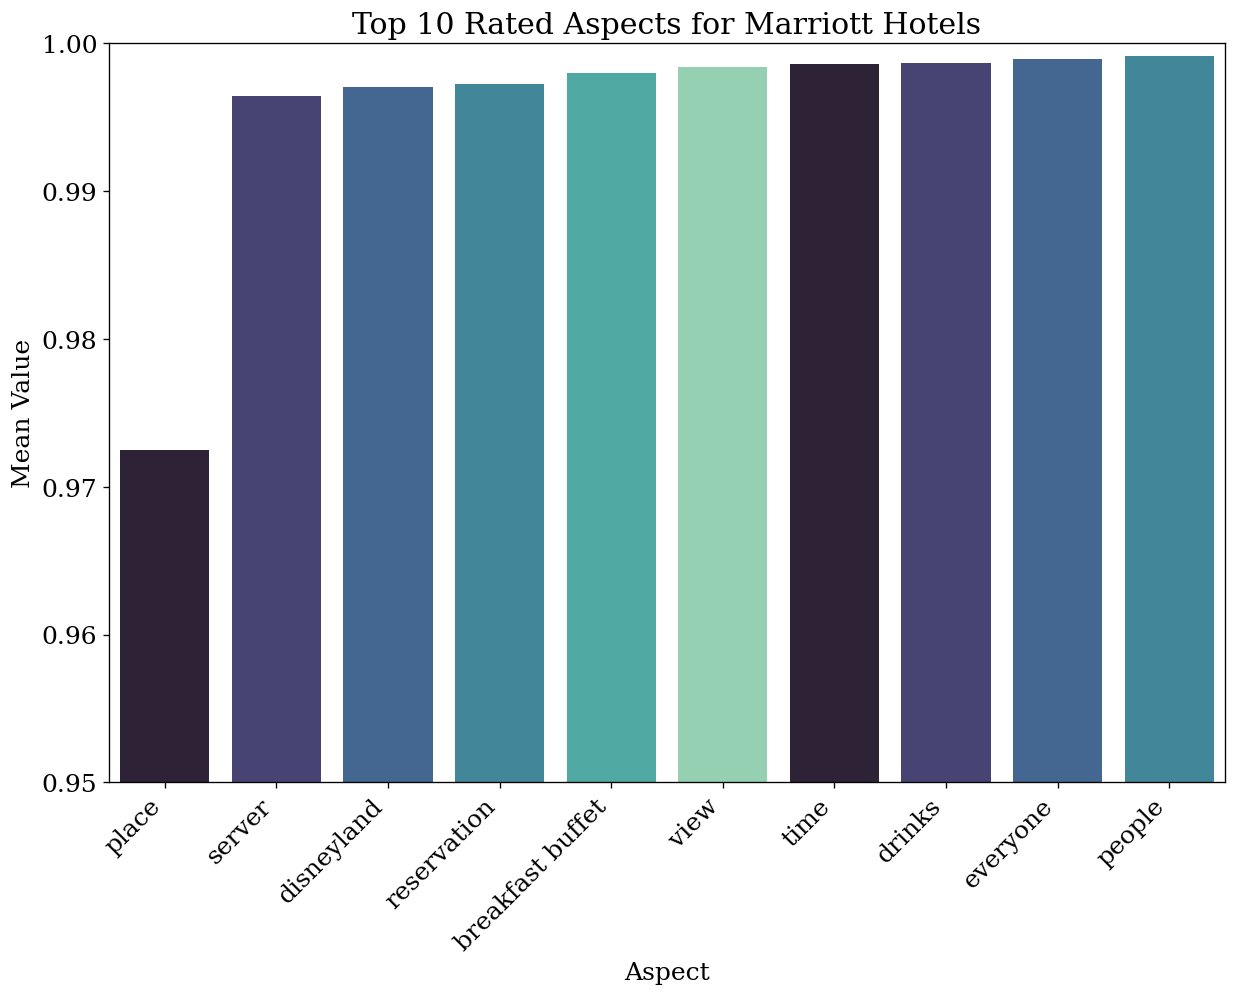

In [ ]:
custom_palette = sns.color_palette("mako")
plt.figure(figsize=(12, 8), dpi=120)
plt.ylim(0.95, 1)
sns.barplot(x=marriott_top_mean_values.index, y=marriott_top_mean_values.values, palette=custom_palette)
# plt.title('Top 10 Rated Aspects for Hilton Hotels')
plt.title('Top 10 Rated Aspects for Marriott Hotels')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Aspect')
plt.ylabel('Mean Value')
plt.show()

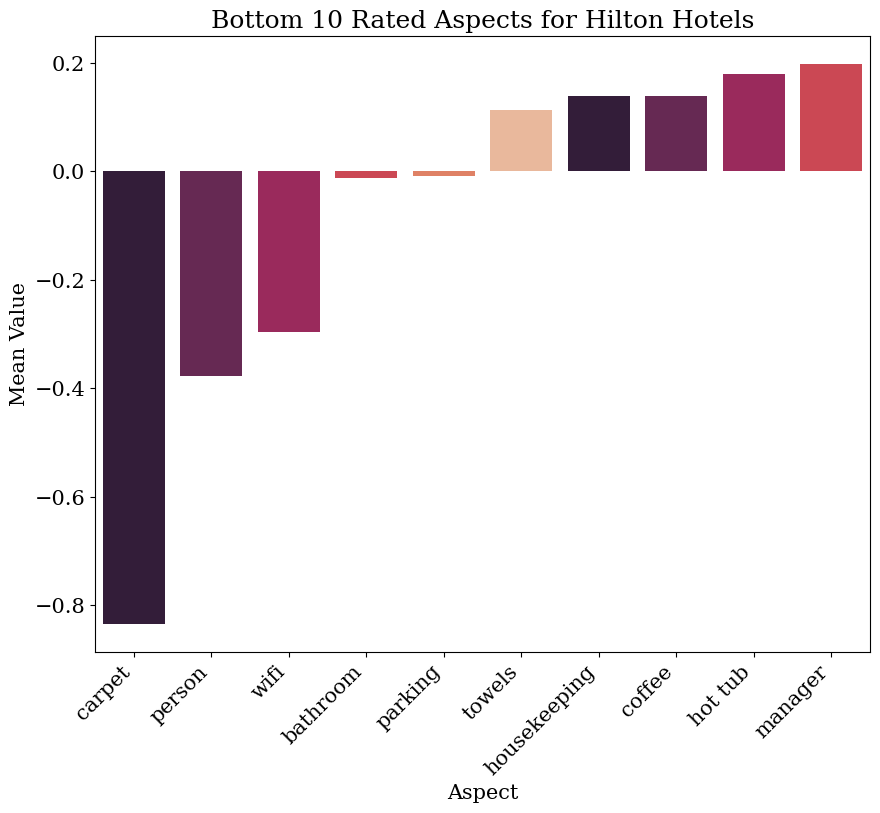

In [ ]:
custom_palette = sns.color_palette("rocket")
plt.figure(figsize=(10, 8), dpi=100)
sns.barplot(x=marriott_bottom_mean_values.index, y=marriott_bottom_mean_values.values, palette=custom_palette)
# plt.title('Bottom 10 Rated Aspects for Hilton Hotels')
plt.title('Bottom 10 Rated Aspects for Hilton Hotels')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Aspect')
plt.ylabel('Mean Value')
plt.savefig('plot3.png')
plt.show()

In [ ]:
keys1 = set(hilton_mean_values.keys())
keys2 = set(marriott_mean_values.keys())

intersection_keys = keys1.intersection(keys2)

HiltonVsMarriott = []

for key in intersection_keys:
    value1 = hilton_mean_values[key]
    value2 = marriott_mean_values[key]
    result = value1-value2
    HiltonVsMarriott.append((key, result))

sorted_result = sorted(HiltonVsMarriott, key=lambda x: x[1], reverse=False)

keys = [item[0] for item in sorted_result]
values = [item[1] for item in sorted_result]

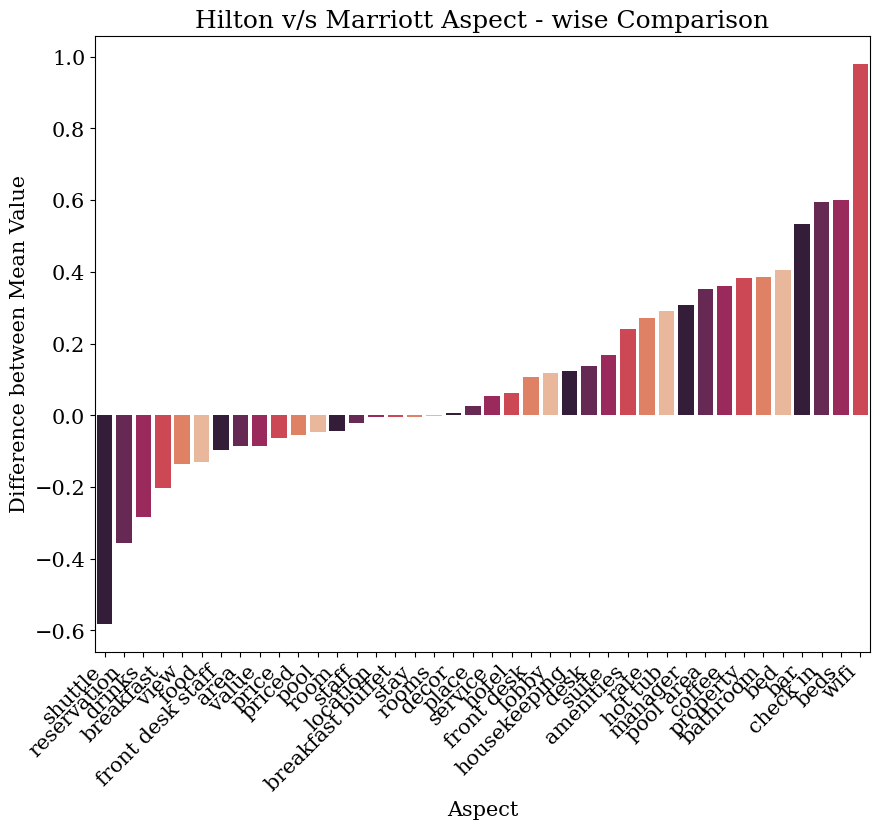

In [ ]:
custom_palette = sns.color_palette("rocket")
plt.figure(figsize=(10, 8), dpi=100)
sns.barplot(x=keys, y=values, palette=custom_palette)
# plt.title('Bottom 10 Rated Aspects for Hilton Hotels')
plt.title('Hilton v/s Marriott Aspect - wise Comparison')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Aspect')
plt.ylabel('Difference between Mean Value')
plt.savefig('plot3.png')
plt.show()